In [1]:
%precision 3
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

dat=pd.read_csv("data17_19_3_without_seat9.csv")
dat.head()

date  time  seat  ticket  price  team  before_j1 region  place week  \
0  42791     1     3    1691   5200  Reds          1   east      1  Sat   
1  42791     1     4    2611   4700  Reds          1   east      1  Sat   
2  42791     1     5     104   4700  Reds          1   east      1  Sat   
3  42791     1     6    1315   4300  Reds          1   east      1  Sat   
4  42791     1     7     776   3900  Reds          1   east      1  Sat   

  weather  DAZN  TV  distance  ranking  J1  interval  team_ranking  
0   sunny     1   2     44.86        3   1       126            13  
1   sunny     1   2     44.86        3   1       126            13  
2   sunny     1   2     44.86        3   1       126            13  
3   sunny     1   2     44.86        3   1       126            13  
4   sunny     1   2     44.86        3   1       126            13

In [2]:
#変数を変換
dat["log_ticket"] = dat['ticket'].apply(np.log)
dat["log_price"] = dat['price'].apply(np.log)
dat["log_interval"] = dat['interval'].apply(np.log)
dat["log_distance"] = dat['distance'].apply(np.log)
dat['ranking']=dat['ranking']+1
dat["log_ranking"] = dat['ranking'].apply(np.log)
dat['team_ranking']=dat['team_ranking']+1
dat["log_team_ranking"] = dat['team_ranking'].apply(np.log)
#カテゴリ変数をダミー変数に変換する
dat2=pd.get_dummies(data=dat, columns=['time','team','place','week','DAZN','seat','J1','region','before_j1','weather'], drop_first=True)
dat2.head()

date  ticket  price  TV  distance  ranking  interval  team_ranking  \
0  42791    1691   5200   2     44.86        4       126            14   
1  42791    2611   4700   2     44.86        4       126            14   
2  42791     104   4700   2     44.86        4       126            14   
3  42791    1315   4300   2     44.86        4       126            14   
4  42791     776   3900   2     44.86        4       126            14   

   log_ticket  log_price  ...  seat_12  seat_13  seat_14  J1_1  region_east  \
0    7.433075   8.556414  ...        0        0        0     1            1   
1    7.867489   8.455318  ...        0        0        0     1            1   
2    4.644391   8.455318  ...        0        0        0     1            1   
3    7.181592   8.366370  ...        0        0        0     1            1   
4    6.654153   8.268732  ...        0        0        0     1            1   

   region_etc  region_west  before_j1_1  weather_rain  weather_sunny  
0           0            0            1             0              1  
1           0            0            1             0              1  
2           0            0            1             0              1  
3           0            0            1             0              1  
4           0            0            1             0              1  

[5 rows x 61 columns]

In [3]:
#タイトルのチェック
title=dat2.columns.values
title=np.delete(title,2)
title

array(['date', 'ticket', 'TV', 'distance', 'ranking', 'interval',
       'team_ranking', 'log_ticket', 'log_price', 'log_interval',
       'log_distance', 'log_ranking', 'log_team_ranking', 'time_2',
       'team_Antlers', 'team_Ardija', 'team_Bellmare', 'team_Cerezo',
       'team_Consadole', 'team_F.C.Tokyo', 'team_Frontale', 'team_Gamba',
       'team_Grampus', 'team_Jubilo', 'team_Reds', 'team_Reysol',
       'team_S-Pulse', 'team_Sagan', 'team_Sanfrecce', 'team_Trinita',
       'team_V-Varen', 'team_Vegalta', 'team_Ventforet', 'team_Vissel',
       'team_YamagaFC', 'place_2', 'week_Sat', 'week_Sun', 'week_Tue',
       'week_Wed', 'DAZN_1', 'seat_2', 'seat_3', 'seat_4', 'seat_5',
       'seat_6', 'seat_7', 'seat_8', 'seat_10', 'seat_11', 'seat_12',
       'seat_13', 'seat_14', 'J1_1', 'region_east', 'region_etc',
       'region_west', 'before_j1_1', 'weather_rain', 'weather_sunny'],
      dtype=object)

In [5]:
#変換後のデータを出力
dat2.to_csv('data_trans.csv')

In [6]:
#出力データからタイトルとテストするデータを切り出して，別ファイルとして保存，ファイル名をtest_data.csvとして保存した
#テストデータの読み込み
dat0=pd.read_csv("test_data.csv")
#目的変数と特徴量に分ける
data0=dat0[['TV','log_price', 'log_interval',
       'log_distance', 'log_ranking', 'log_team_ranking', 'time_2',
       'team_Antlers', 'team_Ardija', 'team_Bellmare', 'team_Cerezo',
       'team_Consadole', 'team_F.C.Tokyo', 'team_Frontale', 'team_Gamba',
       'team_Grampus', 'team_Jubilo', 'team_Reds', 'team_Reysol',
       'team_S-Pulse', 'team_Sagan', 'team_Sanfrecce', 'team_Trinita',
       'team_V-Varen', 'team_Vegalta', 'team_Ventforet', 'team_Vissel',
       'team_YamagaFC', 'place_2', 'week_Sat', 'week_Sun', 'week_Tue',
       'week_Wed', 'DAZN_1', 'seat_2', 'seat_3', 'seat_4', 'seat_5',
       'seat_6', 'seat_7', 'seat_8', 'seat_10', 'seat_11',
       'seat_12', 'seat_13', 'seat_14', 'J1_1', 'region_east',
       'region_etc', 'region_west', 'before_j1_1', 'weather_rain',
       'weather_sunny']]
target0=dat0[['log_ticket']]
data0=data0.values
target0=target0.values
print(data0.shape)
print(target0.shape)

(6, 53)
(6, 1)


In [7]:
#テストデータを除いたデータセットを読み込み
dat_train=pd.read_csv("data_trans_without_test_data.csv")
#訓練データを目的変数と特徴量の設定
data=dat_train[['TV','log_price', 'log_interval',
       'log_distance', 'log_ranking', 'log_team_ranking', 'time_2',
       'team_Antlers', 'team_Ardija', 'team_Bellmare', 'team_Cerezo',
       'team_Consadole', 'team_F.C.Tokyo', 'team_Frontale', 'team_Gamba',
       'team_Grampus', 'team_Jubilo', 'team_Reds', 'team_Reysol',
       'team_S-Pulse', 'team_Sagan', 'team_Sanfrecce', 'team_Trinita',
       'team_V-Varen', 'team_Vegalta', 'team_Ventforet', 'team_Vissel',
       'team_YamagaFC', 'place_2', 'week_Sat', 'week_Sun', 'week_Tue',
       'week_Wed', 'DAZN_1', 'seat_2', 'seat_3', 'seat_4', 'seat_5',
       'seat_6', 'seat_7', 'seat_8', 'seat_10', 'seat_11',
       'seat_12', 'seat_13', 'seat_14', 'J1_1', 'region_east',
       'region_etc', 'region_west', 'before_j1_1', 'weather_rain',
       'weather_sunny']]
target=dat_train[['log_ticket']]
data=data.values
target=target.values
print(data.shape)
print(target.shape)

(529, 53)
(529, 1)


>53 0.725 (0.075)
>54 0.725 (0.075)


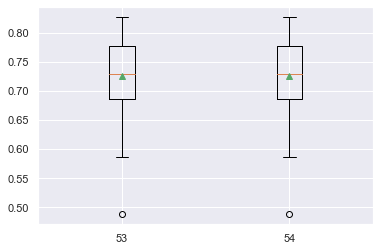

<Figure size 432x288 with 0 Axes>

In [8]:
#重回帰分析
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(53, 55):
        rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
        model = LinearRegression()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, data, target, scoring='r2', cv=cv)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
pyplot.savefig('linear_hako.png',dpi=300)

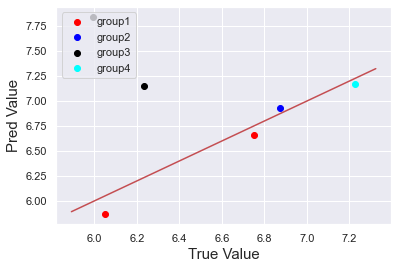

In [9]:
from sklearn.metrics import r2_score
import math

clf1_r=LinearRegression()
clf1_r.fit(data,target)

predicted=clf1_r.predict(data0)
columns=['TV','log_price', 'log_interval',
       'log_distance', 'log_ranking', 'log_team_ranking', 'time_2',
       'team_Antlers', 'team_Ardija', 'team_Bellmare', 'team_Cerezo',
       'team_Consadole', 'team_F.C.Tokyo', 'team_Frontale', 'team_Gamba',
       'team_Grampus', 'team_Jubilo', 'team_Reds', 'team_Reysol',
       'team_S-Pulse', 'team_Sagan', 'team_Sanfrecce', 'team_Trinita',
       'team_V-Varen', 'team_Vegalta', 'team_Ventforet', 'team_Vissel',
       'team_YamagaFC', 'place_2', 'week_Sat', 'week_Sun', 'week_Tue',
       'week_Wed', 'DAZN_1', 'seat_2', 'seat_3', 'seat_4', 'seat_5',
       'seat_6', 'seat_7', 'seat_8', 'seat_10', 'seat_11',
       'seat_12', 'seat_13', 'seat_14', 'J1_1', 'region_east',
       'region_etc', 'region_west','before_j1_1', 'weather_rain',
       'weather_sunny']
test_data2=pd.DataFrame(data=data0,columns=columns)

list1=[]
list2=[]
list3=[]
list4=[]
for i in range(len(test_data2)):
    s1=test_data2.columns.get_loc('seat_2')
    s2=test_data2.columns.get_loc('seat_14')
    test_data3=test_data2.values
    num=0
    for j in range(s1,s2+1,1):
        if test_data3[i][j]==1:
            num=j
    if num==0:
        num=s1-1
    num2=num-(s1-2)
    if(num2==1 or num2==2 or num2==3 or num==6): #group1
        list1.append([target0[i],predicted[i]])
    elif(num2==4 or num2==5 or num2==7 or num2==9 or num2==11): #group2
        list2.append([target0[i],predicted[i]])
    elif(num2==10 or num2==12 or num2==13): #group3
        list3.append([target0[i],predicted[i]])
    else:
        list4.append([target0[i],predicted[i]])

list1=np.array(list1)
list2=np.array(list2)
list3=np.array(list3)
list4=np.array(list4)
#print(len(list1),len(list2),len(list3),len(list4))
plt.scatter(list1[:,0],list1[:,1],c='red',label='group1')
plt.scatter(list2[:,0],list2[:,1],c='blue',label='group2')
plt.scatter(list3[:,0],list3[:,1],c='black',label='group3')
plt.scatter(list4[:,0],list4[:,1],c='cyan',label='group4')

#plt.scatter(test_target, predicted)

x = np.linspace(target0.min().min()-0.1, target0.max().max()+0.1, 2)
y = x
ax = plt.subplot(111)
ax.plot(x,y,'r-')
ax.set_xlabel('True Value', fontsize=15)
ax.set_ylabel('Pred Value', fontsize=15)
ax.grid(True)
ax.legend(loc='upper left')

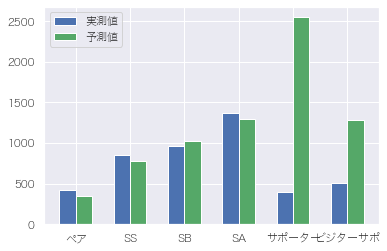

In [10]:
#macでない場合は以下の2行はコメントアウトする
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Hiragino Sans'

x1 = [1,2,3,4,5,6]
y1 = np.exp(target0).flatten()

x2 = [1.3,2.3,3.3,4.3,5.3,6.3]
y2 = np.exp(predicted).flatten()

label_x = ['ペア','SS','SB','SA','サポーター','ビジターサポ']

# 1つ目の棒グラフ
plt.bar(x1, y1, color='b', width=0.3, label='実測値', align="center")

# 2つ目の棒グラフ
plt.bar(x2, y2, color='g', width=0.3, label='予測値', align="center")

# 凡例
plt.legend(loc=2)

# X軸の目盛りを置換
plt.xticks([1.15, 2.15, 3.15,4.15,5.15,6.15], label_x)
plt.show()

In [11]:
print(np.exp(predicted))
print(np.exp(target0))
#席種合計
print(sum(np.exp(predicted)))
print(sum(np.exp(target0)))

[[ 352.17981722]
 [ 781.41272906]
 [1026.4058378 ]
 [1300.06979312]
 [2550.14886542]
 [1279.74917347]]
[[ 423.9999999 ]
 [ 852.99999958]
 [ 964.99999967]
 [1371.99999961]
 [ 399.99999996]
 [ 509.00000023]]
[7289.96621609]
[4522.99999895]


In [12]:
#リッジ回帰
from sklearn.linear_model import Ridge

# get a list of models to evaluate
def get_models(val_alpha):
    models = dict()
    for i in range(40, 55):
        rfe = RFE(estimator=Ridge(alpha=1), n_features_to_select=i)
        model = Ridge(alpha=val_alpha)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, data, target, scoring='r2', cv=cv)
    return scores

# get the models to evaluate
max_val2=0
for val_alpha in np.arange(0.1,1,0.05):
    models = get_models(val_alpha)
# evaluate the models and store results
    results, names = list(), list()
    max_val=0
    for name, model in models.items():
        scores = evaluate_model(model)
        results.append(scores)
        names.append(name)
        #print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
        if max_val<mean(scores):
            max_val=mean(scores)
            max_index=name
    if max_val>max_val2:
        max_val2=max_val
        max_index2=max_index
        max_alpha=val_alpha
    print(val_alpha, max_index2, max_val2)

print(val_alpha, max_index2, max_val2)
# plot model performance for comparison
#pyplot.boxplot(results, labels=names, showmeans=True)
#pyplot.show()

0.1 49 0.7266716141186979
0.15000000000000002 46 0.7270417830521997
0.20000000000000004 46 0.727350260600207
0.25000000000000006 46 0.727597097119989
0.30000000000000004 47 0.7277971263105479
0.3500000000000001 47 0.7279558664905067
0.40000000000000013 47 0.7280732197962217
0.45000000000000007 47 0.7281533265415047
0.5000000000000001 47 0.7281995329535129
0.5500000000000002 47 0.7282146298968485
0.6000000000000002 47 0.7282146298968485
0.6500000000000001 47 0.7282146298968485
0.7000000000000002 47 0.7282146298968485
0.7500000000000002 47 0.7282146298968485
0.8000000000000002 47 0.7282146298968485
0.8500000000000002 47 0.7282146298968485
0.9000000000000002 47 0.7282146298968485
0.9500000000000003 47 0.7282146298968485
0.9500000000000003 47 0.7282146298968485


>40 0.722 (0.069)
>41 0.722 (0.071)
>42 0.723 (0.071)
>43 0.724 (0.072)
>44 0.726 (0.071)
>45 0.727 (0.071)
>46 0.728 (0.071)
>47 0.728 (0.070)
>48 0.728 (0.070)
>49 0.728 (0.070)
>50 0.727 (0.069)
>51 0.727 (0.069)
>52 0.727 (0.070)
>53 0.727 (0.070)
>54 0.727 (0.070)


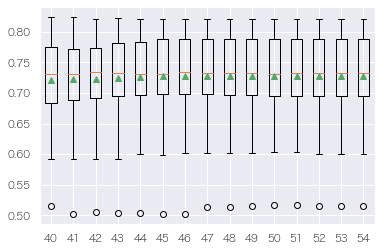

In [13]:
#リッジ回帰
from sklearn.linear_model import Ridge

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(40, 55):
        rfe = RFE(estimator=Ridge(alpha=1), n_features_to_select=i)
        model = Ridge(alpha=0.8)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, data, target, scoring='r2', cv=cv)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

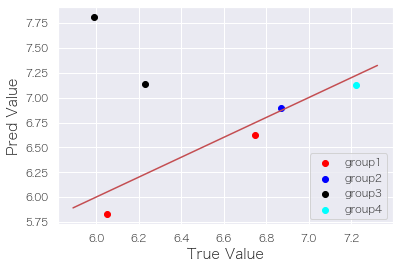

In [14]:
from sklearn.metrics import r2_score
import math

clf2_r=Ridge(alpha=0.8)
clf2_r.fit(data,target)

predicted=clf2_r.predict(data0)
columns=['TV','log_price', 'log_interval',
       'log_distance', 'log_ranking', 'log_team_ranking', 'time_2',
       'team_Antlers', 'team_Ardija', 'team_Bellmare', 'team_Cerezo',
       'team_Consadole', 'team_F.C.Tokyo', 'team_Frontale', 'team_Gamba',
       'team_Grampus', 'team_Jubilo', 'team_Reds', 'team_Reysol',
       'team_S-Pulse', 'team_Sagan', 'team_Sanfrecce', 'team_Trinita',
       'team_V-Varen', 'team_Vegalta', 'team_Ventforet', 'team_Vissel',
       'team_YamagaFC', 'place_2', 'week_Sat', 'week_Sun', 'week_Tue',
       'week_Wed', 'DAZN_1', 'seat_2', 'seat_3', 'seat_4', 'seat_5',
       'seat_6', 'seat_7', 'seat_8', 'seat_10', 'seat_11',
       'seat_12', 'seat_13', 'seat_14', 'J1_1', 'region_east',
       'region_etc', 'region_west','before_j1_1', 'weather_rain',
       'weather_sunny']
test_data2=pd.DataFrame(data=data0,columns=columns)
#print(test_data2)

list1=[]
list2=[]
list3=[]
list4=[]
for i in range(len(test_data2)):
    s1=test_data2.columns.get_loc('seat_2')
    s2=test_data2.columns.get_loc('seat_14')
    test_data3=test_data2.values
    num=0
    for j in range(s1,s2+1,1):
        if test_data3[i][j]==1:
            num=j
    if num==0:
        num=s1-1
    num2=num-(s1-2)
    if(num2==1 or num2==2 or num2==3 or num==6): #group1
        list1.append([target0[i],predicted[i]])
    elif(num2==4 or num2==5 or num2==7 or num2==9 or num2==11): #group2
        list2.append([target0[i],predicted[i]])
    elif(num2==10 or num2==12 or num2==13): #group3
        list3.append([target0[i],predicted[i]])
    else:
        list4.append([target0[i],predicted[i]])

list1=np.array(list1)
list2=np.array(list2)
list3=np.array(list3)
list4=np.array(list4)
#print(len(list1),len(list2),len(list3),len(list4))
plt.scatter(list1[:,0],list1[:,1],c='red',label='group1')
plt.scatter(list2[:,0],list2[:,1],c='blue',label='group2')
plt.scatter(list3[:,0],list3[:,1],c='black',label='group3')
plt.scatter(list4[:,0],list4[:,1],c='cyan',label='group4')

test_data_print=test_data2
test_data_print['target']=target0
test_data_print['predict']=predicted
test_data_print.to_csv('predict_print.csv')

#plt.scatter(test_target, predicted)

x = np.linspace(target0.min()-0.1, target0.max()+0.1, 2)
y = x
ax = plt.subplot(111)
ax.plot(x,y,'r-')
ax.set_xlabel('True Value', fontsize=15)
ax.set_ylabel('Pred Value', fontsize=15)
ax.grid(True)
ax.legend(loc='under right')

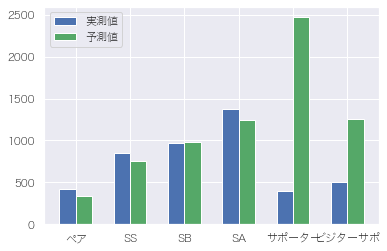

In [15]:
#macでない場合は以下の2行はコメントアウトする
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Hiragino Sans'

x1 = [1,2,3,4,5,6]
y1 = np.exp(target0).flatten()

x2 = [1.3,2.3,3.3,4.3,5.3,6.3]
y2 = np.exp(predicted).flatten()

label_x = ['ペア','SS','SB','SA','サポーター','ビジターサポ']

# 1つ目の棒グラフ
plt.bar(x1, y1, color='b', width=0.3, label='実測値', align="center")

# 2つ目の棒グラフ
plt.bar(x2, y2, color='g', width=0.3, label='予測値', align="center")

# 凡例
plt.legend(loc=2)

# X軸の目盛りを置換
plt.xticks([1.15, 2.15, 3.15,4.15,5.15,6.15], label_x)
plt.show()

In [16]:
#席種合計
print(sum(np.exp(predicted)))
print(sum(np.exp(target0)))

[7057.42497195]
[4522.99999895]


>40 0.724 (0.071)
>41 0.725 (0.070)
>42 0.727 (0.069)
>43 0.728 (0.069)
>44 0.728 (0.069)
>45 0.728 (0.069)
>46 0.728 (0.069)
>47 0.728 (0.069)
>48 0.728 (0.069)
>49 0.728 (0.069)
>50 0.728 (0.069)
>51 0.727 (0.069)
>52 0.728 (0.069)
>53 0.728 (0.069)
>54 0.728 (0.069)


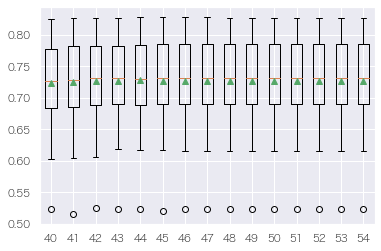

In [17]:
#--------------------
#ラッソ回帰
#--------------------

from sklearn.linear_model import Lasso

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(40, 55):
        rfe = RFE(estimator=Lasso(alpha=0.001), n_features_to_select=i)
        model = Lasso(alpha=0.001)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, data, target, scoring='r2', cv=cv)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

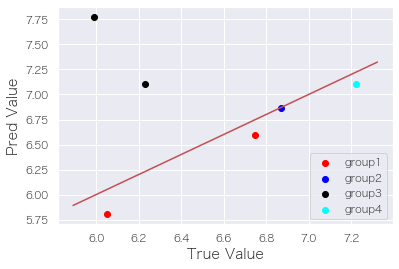

In [18]:
from sklearn.metrics import r2_score
import math

clf3_r=Lasso(alpha=0.001)
clf3_r.fit(data,target)

predicted=clf3_r.predict(data0)
columns=['TV','log_price', 'log_interval',
       'log_distance', 'log_ranking', 'log_team_ranking', 'time_2',
       'team_Antlers', 'team_Ardija', 'team_Bellmare', 'team_Cerezo',
       'team_Consadole', 'team_F.C.Tokyo', 'team_Frontale', 'team_Gamba',
       'team_Grampus', 'team_Jubilo', 'team_Reds', 'team_Reysol',
       'team_S-Pulse', 'team_Sagan', 'team_Sanfrecce', 'team_Trinita',
       'team_V-Varen', 'team_Vegalta', 'team_Ventforet', 'team_Vissel',
       'team_YamagaFC', 'place_2', 'week_Sat', 'week_Sun', 'week_Tue',
       'week_Wed', 'DAZN_1', 'seat_2', 'seat_3', 'seat_4', 'seat_5',
       'seat_6', 'seat_7', 'seat_8', 'seat_10', 'seat_11',
       'seat_12', 'seat_13', 'seat_14', 'J1_1', 'region_east',
       'region_etc', 'region_west','before_j1_1', 'weather_rain',
       'weather_sunny']
test_data2=pd.DataFrame(data=data0,columns=columns)
#print(test_data2)

list1=[]
list2=[]
list3=[]
list4=[]
for i in range(len(test_data2)):
    s1=test_data2.columns.get_loc('seat_2')
    s2=test_data2.columns.get_loc('seat_14')
    test_data3=test_data2.values
    num=0
    for j in range(s1,s2+1,1):
        if test_data3[i][j]==1:
            num=j
    if num==0:
        num=s1-1
    num2=num-(s1-2)
    if(num2==1 or num2==2 or num2==3 or num==6): #group1
        list1.append([target0[i],predicted[i]])
    elif(num2==4 or num2==5 or num2==7 or num2==9 or num2==11): #group2
        list2.append([target0[i],predicted[i]])
    elif(num2==10 or num2==12 or num2==13): #group3
        list3.append([target0[i],predicted[i]])
    else:
        list4.append([target0[i],predicted[i]])

list1=np.array(list1)
list2=np.array(list2)
list3=np.array(list3)
list4=np.array(list4)
#print(len(list1),len(list2),len(list3),len(list4))
plt.scatter(list1[:,0],list1[:,1],c='red',label='group1')
plt.scatter(list2[:,0],list2[:,1],c='blue',label='group2')
plt.scatter(list3[:,0],list3[:,1],c='black',label='group3')
plt.scatter(list4[:,0],list4[:,1],c='cyan',label='group4')

test_data_print=test_data2
test_data_print['target']=target0
test_data_print['predict']=predicted
test_data_print.to_csv('predict_print.csv')

#plt.scatter(test_target, predicted)

x = np.linspace(target0.min()-0.1, target0.max()+0.1, 2)
y = x
ax = plt.subplot(111)
ax.plot(x,y,'r-')
ax.set_xlabel('True Value', fontsize=15)
ax.set_ylabel('Pred Value', fontsize=15)
ax.grid(True)
ax.legend(loc='under right')

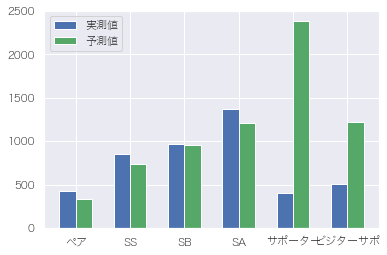

In [19]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Hiragino Sans'

x1 = [1,2,3,4,5,6]
y1 = np.exp(target0).flatten()

x2 = [1.3,2.3,3.3,4.3,5.3,6.3]
y2 = np.exp(predicted).flatten()

label_x = ['ペア','SS','SB','SA','サポーター','ビジターサポ']

# 1つ目の棒グラフ
plt.bar(x1, y1, color='b', width=0.3, label='実測値', align="center")

# 2つ目の棒グラフ
plt.bar(x2, y2, color='g', width=0.3, label='予測値', align="center")

# 凡例
plt.legend(loc=2)

# X軸の目盛りを置換
plt.xticks([1.15, 2.15, 3.15,4.15,5.15,6.15], label_x)
plt.show()

In [20]:
#席種合計
print(sum(np.exp(predicted)))
print(sum(np.exp(target0)))

6842.670763947497
[4522.99999895]


>50 0.711 (0.059)
>51 0.712 (0.056)
>52 0.709 (0.057)
>53 0.707 (0.059)
>54 0.710 (0.058)


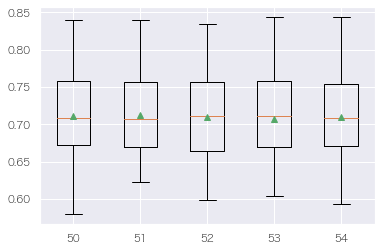

In [21]:
#ランダムフォレスト
import math
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(50, 55):
        rfe = RFE(estimator=RandomForestRegressor(n_estimators=100), n_features_to_select=i)
        model = RandomForestRegressor(n_estimators=100)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, data, target, scoring='r2', cv=cv)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

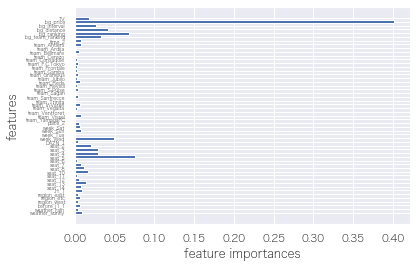

In [22]:
#ランダムフォレスト特徴量
from sklearn.ensemble import RandomForestRegressor
clf4_r=RandomForestRegressor(n_estimators=100)
clf4_r.fit(data,target)
feature=clf4_r.feature_importances_
#print("Feature importances:\n{}".format(clf4_r.feature_importances_))
#plot_feature_importances_cancer(clf4)
n_features = data.data.shape[1]
plt.barh(range(n_features),clf4_r.feature_importances_, align='center')
plt.yticks(np.arange(n_features), columns,fontsize=5)
plt.gca().invert_yaxis()
plt.xlabel("feature importances")
plt.ylabel("features")
plt.savefig('bar_test.png',dpi=300)

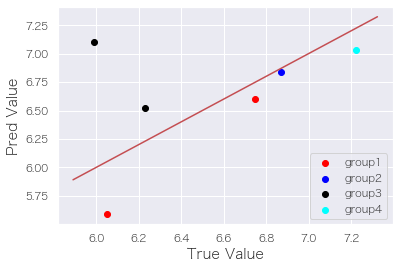

In [23]:
from sklearn.metrics import r2_score
import math

clf4_r=RandomForestRegressor(n_estimators=100)
clf4_r.fit(data,target)

predicted=clf4_r.predict(data0)
columns=['TV','log_price', 'log_interval',
       'log_distance', 'log_ranking', 'log_team_ranking', 'time_2',
       'team_Antlers', 'team_Ardija', 'team_Bellmare', 'team_Cerezo',
       'team_Consadole', 'team_F.C.Tokyo', 'team_Frontale', 'team_Gamba',
       'team_Grampus', 'team_Jubilo', 'team_Reds', 'team_Reysol',
       'team_S-Pulse', 'team_Sagan', 'team_Sanfrecce', 'team_Trinita',
       'team_V-Varen', 'team_Vegalta', 'team_Ventforet', 'team_Vissel',
       'team_YamagaFC', 'place_2', 'week_Sat', 'week_Sun', 'week_Tue',
       'week_Wed', 'DAZN_1', 'seat_2', 'seat_3', 'seat_4', 'seat_5',
       'seat_6', 'seat_7', 'seat_8', 'seat_10', 'seat_11',
       'seat_12', 'seat_13', 'seat_14', 'J1_1', 'region_east',
       'region_etc', 'region_west','before_j1_1', 'weather_rain',
       'weather_sunny']
test_data2=pd.DataFrame(data=data0,columns=columns)
#print(test_data2)

list1=[]
list2=[]
list3=[]
list4=[]
for i in range(len(test_data2)):
    s1=test_data2.columns.get_loc('seat_2')
    s2=test_data2.columns.get_loc('seat_14')
    test_data3=test_data2.values
    num=0
    for j in range(s1,s2+1,1):
        if test_data3[i][j]==1:
            num=j
    if num==0:
        num=s1-1
    num2=num-(s1-2)
    if(num2==1 or num2==2 or num2==3 or num==6): #group1
        list1.append([target0[i],predicted[i]])
    elif(num2==4 or num2==5 or num2==7 or num2==9 or num2==11): #group2
        list2.append([target0[i],predicted[i]])
    elif(num2==10 or num2==12 or num2==13): #group3
        list3.append([target0[i],predicted[i]])
    else:
        list4.append([target0[i],predicted[i]])

list1=np.array(list1)
list2=np.array(list2)
list3=np.array(list3)
list4=np.array(list4)
#print(len(list1),len(list2),len(list3),len(list4))
plt.scatter(list1[:,0],list1[:,1],c='red',label='group1')
plt.scatter(list2[:,0],list2[:,1],c='blue',label='group2')
plt.scatter(list3[:,0],list3[:,1],c='black',label='group3')
plt.scatter(list4[:,0],list4[:,1],c='cyan',label='group4')

test_data_print=test_data2
test_data_print['target']=target0
test_data_print['predict']=predicted
test_data_print.to_csv('predict_print.csv')

#plt.scatter(test_target, predicted)

x = np.linspace(target0.min()-0.1, target0.max()+0.1, 2)
y = x
ax = plt.subplot(111)
ax.plot(x,y,'r-')
ax.set_xlabel('True Value', fontsize=15)
ax.set_ylabel('Pred Value', fontsize=15)
ax.grid(True)
ax.legend(loc='under right')

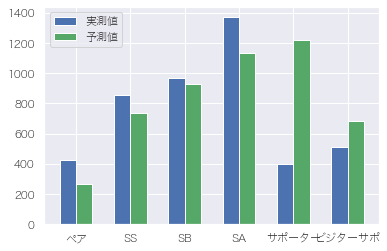

In [24]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Hiragino Sans'

x1 = [1,2,3,4,5,6]
y1 = np.exp(target0).flatten()

x2 = [1.3,2.3,3.3,4.3,5.3,6.3]
y2 = np.exp(predicted).flatten()

label_x = ['ペア','SS','SB','SA','サポーター','ビジターサポ']

# 1つ目の棒グラフ
plt.bar(x1, y1, color='b', width=0.3, label='実測値', align="center")

# 2つ目の棒グラフ
plt.bar(x2, y2, color='g', width=0.3, label='予測値', align="center")

# 凡例
plt.legend(loc=2)

# X軸の目盛りを置換
plt.xticks([1.15, 2.15, 3.15,4.15,5.15,6.15], label_x)
plt.show()

In [25]:
#席種合計
print(sum(np.exp(predicted)))
print(sum(np.exp(target0)))

4971.026088980133
[4522.99999895]


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[12:08:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[12:08:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    7.7s finished


[12:08:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[12:08:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

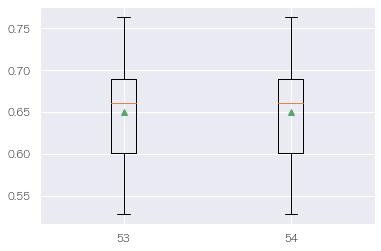

In [26]:
import xgboost as xgb
import warnings
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

clf6 = xgb.XGBRegressor()
clf6_cv = GridSearchCV(clf6, {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, verbose=1)
clf6_cv.fit(data, target)
#print reg_cv.best_params_, reg_cv.best_score_

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(53, 55):
        rfe = RFE(estimator=xgb.XGBRegressor(**clf6_cv.best_params_), n_features_to_select=i)
        model = xgb.XGBRegressor(**clf6_cv.best_params_)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, data, target, scoring='r2', cv=cv)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

[12:08:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


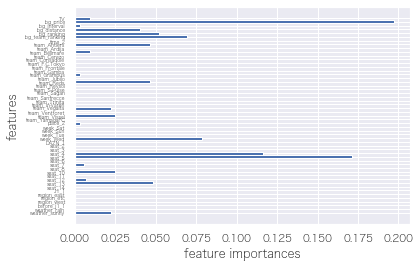

In [27]:
#勾配ブースティング特徴量
import xgboost as xgb
clf6_r=xgb.XGBRegressor(**clf6_cv.best_params_)
clf6_r.fit(data,target)
feature=clf6_r.feature_importances_
#print("Feature importances:\n{}".format(clf4_r.feature_importances_))
#plot_feature_importances_cancer(clf4)
n_features = data.data.shape[1]
plt.barh(range(n_features),clf6_r.feature_importances_, align='center')
plt.yticks(np.arange(n_features),columns,fontsize=5)
plt.gca().invert_yaxis()
plt.xlabel("feature importances")
plt.ylabel("features")
plt.savefig('bar_test.png',dpi=300)

[12:08:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


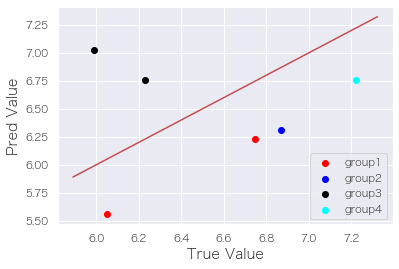

In [28]:
from sklearn.metrics import r2_score
import csv

import xgboost as xgb
clf6_r=xgb.XGBRegressor(**clf6_cv.best_params_)
clf6_r.fit(data,target)

predicted=clf6_r.predict(data0)

columns=['TV','log_price', 'log_interval',
       'log_distance', 'log_ranking', 'log_team_ranking', 'time_2',
       'team_Antlers', 'team_Ardija', 'team_Bellmare', 'team_Cerezo',
       'team_Consadole', 'team_F.C.Tokyo', 'team_Frontale', 'team_Gamba',
       'team_Grampus', 'team_Jubilo', 'team_Reds', 'team_Reysol',
       'team_S-Pulse', 'team_Sagan', 'team_Sanfrecce', 'team_Trinita',
       'team_V-Varen', 'team_Vegalta', 'team_Ventforet', 'team_Vissel',
       'team_YamagaFC', 'place_2', 'week_Sat', 'week_Sun', 'week_Tue',
       'week_Wed', 'DAZN_1', 'seat_2', 'seat_3', 'seat_4', 'seat_5',
       'seat_6', 'seat_7', 'seat_8', 'seat_10', 'seat_11',
       'seat_12', 'seat_13', 'seat_14', 'J1_1', 'region_east',
       'region_etc', 'region_west','before_j1_1', 'weather_rain',
       'weather_sunny']
test_data2=pd.DataFrame(data=data0,columns=columns)
#print(test_data2)

list1=[]
list2=[]
list3=[]
list4=[]
for i in range(len(test_data2)):
    s1=test_data2.columns.get_loc('seat_2')
    s2=test_data2.columns.get_loc('seat_14')
    test_data3=test_data2.values
    num=0
    for j in range(s1,s2+1,1):
        if test_data3[i][j]==1:
            num=j
    if num==0:
        num=s1-1
    num2=num-(s1-2)
    if(num2==1 or num2==2 or num2==3 or num==6): #group1
        list1.append([target0[i],predicted[i]])
    elif(num2==4 or num2==5 or num2==7 or num2==9 or num2==11): #group2
        list2.append([target0[i],predicted[i]])
    elif(num2==10 or num2==12 or num2==13): #group3
        list3.append([target0[i],predicted[i]])
    else:
        list4.append([target0[i],predicted[i]])

list1=np.array(list1)
list2=np.array(list2)
list3=np.array(list3)
list4=np.array(list4)
#print(len(list1),len(list2),len(list3),len(list4))
plt.scatter(list1[:,0],list1[:,1],c='red',label='group1')
plt.scatter(list2[:,0],list2[:,1],c='blue',label='group2')
plt.scatter(list3[:,0],list3[:,1],c='black',label='group3')
plt.scatter(list4[:,0],list4[:,1],c='cyan',label='group4')

#plt.scatter(test_target, predicted)


test_data_print=test_data2
test_data_print['target']=target0
test_data_print['predict']=predicted
test_data_print.to_csv('predict_print.csv')

x = np.linspace(target0.min().min()-0.1, target0.max().max()+0.1, 2)
y = x
ax = plt.subplot(111)
ax.plot(x,y,'r-')
ax.set_xlabel('True Value', fontsize=15)
ax.set_ylabel('Pred Value', fontsize=15)
ax.grid(True)
ax.legend(loc='under right')

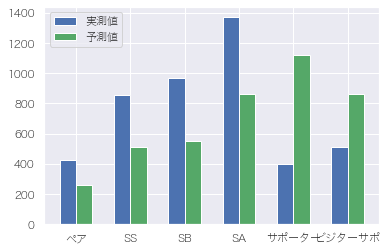

In [29]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Hiragino Sans'

x1 = [1,2,3,4,5,6]
y1 = np.exp(target0).flatten()

x2 = [1.3,2.3,3.3,4.3,5.3,6.3]
y2 = np.exp(predicted).flatten()

label_x = ['ペア','SS','SB','SA','サポーター','ビジターサポ']

# 1つ目の棒グラフ
plt.bar(x1, y1, color='b', width=0.3, label='実測値', align="center")

# 2つ目の棒グラフ
plt.bar(x2, y2, color='g', width=0.3, label='予測値', align="center")

# 凡例
plt.legend(loc=2)

# X軸の目盛りを置換
plt.xticks([1.15, 2.15, 3.15,4.15,5.15,6.15], label_x)
plt.show()

In [30]:
#席種合計
print(sum(np.exp(predicted)))
print(sum(np.exp(target0)))

4168.499816894531
[4522.99999895]


0:	learn: 0.8436884	total: 54.6ms	remaining: 54.6s
1:	learn: 0.7488742	total: 55.9ms	remaining: 27.9s
2:	learn: 0.6691623	total: 58.5ms	remaining: 19.4s
3:	learn: 0.6014063	total: 59.7ms	remaining: 14.9s
4:	learn: 0.5788089	total: 61.1ms	remaining: 12.1s
5:	learn: 0.5368532	total: 62.3ms	remaining: 10.3s
6:	learn: 0.5086918	total: 63.6ms	remaining: 9.02s
7:	learn: 0.4886417	total: 64.8ms	remaining: 8.03s
8:	learn: 0.4597471	total: 71.1ms	remaining: 7.83s
9:	learn: 0.4306030	total: 72.8ms	remaining: 7.21s
10:	learn: 0.4154545	total: 74.7ms	remaining: 6.72s
11:	learn: 0.3999272	total: 76.6ms	remaining: 6.3s
12:	learn: 0.3877396	total: 77.7ms	remaining: 5.9s
13:	learn: 0.3609366	total: 79.2ms	remaining: 5.58s
14:	learn: 0.3406952	total: 80ms	remaining: 5.25s
15:	learn: 0.3322201	total: 80.8ms	remaining: 4.97s
16:	learn: 0.3211252	total: 81.8ms	remaining: 4.73s
17:	learn: 0.3104708	total: 83.3ms	remaining: 4.54s
18:	learn: 0.3018395	total: 84.1ms	remaining: 4.34s
19:	learn: 0.3014899	total

180:	learn: 0.0231506	total: 231ms	remaining: 1.04s
181:	learn: 0.0230582	total: 233ms	remaining: 1.05s
182:	learn: 0.0229897	total: 234ms	remaining: 1.04s
183:	learn: 0.0229638	total: 235ms	remaining: 1.04s
184:	learn: 0.0229160	total: 237ms	remaining: 1.04s
185:	learn: 0.0228917	total: 238ms	remaining: 1.04s
186:	learn: 0.0228290	total: 241ms	remaining: 1.05s
187:	learn: 0.0227676	total: 242ms	remaining: 1.05s
188:	learn: 0.0227344	total: 244ms	remaining: 1.05s
189:	learn: 0.0226801	total: 246ms	remaining: 1.05s
190:	learn: 0.0226152	total: 247ms	remaining: 1.04s
191:	learn: 0.0225591	total: 248ms	remaining: 1.04s
192:	learn: 0.0224632	total: 249ms	remaining: 1.04s
193:	learn: 0.0224418	total: 252ms	remaining: 1.04s
194:	learn: 0.0224109	total: 253ms	remaining: 1.04s
195:	learn: 0.0223915	total: 254ms	remaining: 1.04s
196:	learn: 0.0223578	total: 256ms	remaining: 1.04s
197:	learn: 0.0223311	total: 257ms	remaining: 1.04s
198:	learn: 0.0222831	total: 259ms	remaining: 1.04s
199:	learn: 

364:	learn: 0.0213127	total: 406ms	remaining: 706ms
365:	learn: 0.0213126	total: 407ms	remaining: 705ms
366:	learn: 0.0213125	total: 408ms	remaining: 704ms
367:	learn: 0.0213123	total: 410ms	remaining: 703ms
368:	learn: 0.0213123	total: 411ms	remaining: 702ms
369:	learn: 0.0213121	total: 412ms	remaining: 701ms
370:	learn: 0.0213121	total: 413ms	remaining: 700ms
371:	learn: 0.0213120	total: 414ms	remaining: 699ms
372:	learn: 0.0213120	total: 415ms	remaining: 697ms
373:	learn: 0.0213120	total: 415ms	remaining: 695ms
374:	learn: 0.0213119	total: 416ms	remaining: 694ms
375:	learn: 0.0213119	total: 417ms	remaining: 692ms
376:	learn: 0.0213118	total: 418ms	remaining: 690ms
377:	learn: 0.0213117	total: 418ms	remaining: 689ms
378:	learn: 0.0213117	total: 420ms	remaining: 688ms
379:	learn: 0.0213116	total: 420ms	remaining: 686ms
380:	learn: 0.0213116	total: 421ms	remaining: 684ms
381:	learn: 0.0213116	total: 422ms	remaining: 683ms
382:	learn: 0.0213115	total: 423ms	remaining: 682ms
383:	learn: 

554:	learn: 0.0213100	total: 576ms	remaining: 462ms
555:	learn: 0.0213100	total: 578ms	remaining: 462ms
556:	learn: 0.0213100	total: 580ms	remaining: 461ms
557:	learn: 0.0213100	total: 581ms	remaining: 460ms
558:	learn: 0.0213100	total: 582ms	remaining: 459ms
559:	learn: 0.0213100	total: 583ms	remaining: 458ms
560:	learn: 0.0213100	total: 584ms	remaining: 457ms
561:	learn: 0.0213100	total: 585ms	remaining: 456ms
562:	learn: 0.0213100	total: 587ms	remaining: 455ms
563:	learn: 0.0213100	total: 588ms	remaining: 454ms
564:	learn: 0.0213100	total: 589ms	remaining: 453ms
565:	learn: 0.0213100	total: 590ms	remaining: 452ms
566:	learn: 0.0213100	total: 591ms	remaining: 451ms
567:	learn: 0.0213100	total: 592ms	remaining: 450ms
568:	learn: 0.0213100	total: 593ms	remaining: 449ms
569:	learn: 0.0213100	total: 594ms	remaining: 448ms
570:	learn: 0.0213100	total: 595ms	remaining: 447ms
571:	learn: 0.0213100	total: 596ms	remaining: 446ms
572:	learn: 0.0213100	total: 598ms	remaining: 445ms
573:	learn: 

766:	learn: 0.0213100	total: 947ms	remaining: 288ms
767:	learn: 0.0213100	total: 949ms	remaining: 287ms
768:	learn: 0.0213100	total: 951ms	remaining: 286ms
769:	learn: 0.0213100	total: 952ms	remaining: 284ms
770:	learn: 0.0213100	total: 954ms	remaining: 283ms
771:	learn: 0.0213100	total: 955ms	remaining: 282ms
772:	learn: 0.0213100	total: 956ms	remaining: 281ms
773:	learn: 0.0213100	total: 957ms	remaining: 279ms
774:	learn: 0.0213100	total: 958ms	remaining: 278ms
775:	learn: 0.0213100	total: 959ms	remaining: 277ms
776:	learn: 0.0213100	total: 961ms	remaining: 276ms
777:	learn: 0.0213100	total: 964ms	remaining: 275ms
778:	learn: 0.0213100	total: 966ms	remaining: 274ms
779:	learn: 0.0213100	total: 967ms	remaining: 273ms
780:	learn: 0.0213100	total: 969ms	remaining: 272ms
781:	learn: 0.0213100	total: 970ms	remaining: 270ms
782:	learn: 0.0213100	total: 971ms	remaining: 269ms
783:	learn: 0.0213100	total: 972ms	remaining: 268ms
784:	learn: 0.0213100	total: 973ms	remaining: 267ms
785:	learn: 

955:	learn: 0.0213100	total: 1.12s	remaining: 51.7ms
956:	learn: 0.0213100	total: 1.12s	remaining: 50.5ms
957:	learn: 0.0213100	total: 1.13s	remaining: 49.4ms
958:	learn: 0.0213100	total: 1.13s	remaining: 48.2ms
959:	learn: 0.0213100	total: 1.13s	remaining: 47ms
960:	learn: 0.0213100	total: 1.13s	remaining: 45.8ms
961:	learn: 0.0213100	total: 1.13s	remaining: 44.6ms
962:	learn: 0.0213100	total: 1.13s	remaining: 43.5ms
963:	learn: 0.0213100	total: 1.13s	remaining: 42.3ms
964:	learn: 0.0213100	total: 1.13s	remaining: 41.1ms
965:	learn: 0.0213100	total: 1.13s	remaining: 39.9ms
966:	learn: 0.0213100	total: 1.13s	remaining: 38.7ms
967:	learn: 0.0213100	total: 1.14s	remaining: 37.6ms
968:	learn: 0.0213100	total: 1.14s	remaining: 36.4ms
969:	learn: 0.0213100	total: 1.14s	remaining: 35.2ms
970:	learn: 0.0213100	total: 1.14s	remaining: 34ms
971:	learn: 0.0213100	total: 1.14s	remaining: 32.9ms
972:	learn: 0.0213100	total: 1.14s	remaining: 31.7ms
973:	learn: 0.0213100	total: 1.14s	remaining: 30.5

248:	learn: 0.0225298	total: 288ms	remaining: 867ms
249:	learn: 0.0225276	total: 295ms	remaining: 885ms
250:	learn: 0.0225250	total: 296ms	remaining: 884ms
251:	learn: 0.0225226	total: 298ms	remaining: 886ms
252:	learn: 0.0225213	total: 300ms	remaining: 885ms
253:	learn: 0.0225190	total: 302ms	remaining: 886ms
254:	learn: 0.0225168	total: 303ms	remaining: 886ms
255:	learn: 0.0225137	total: 305ms	remaining: 886ms
256:	learn: 0.0225117	total: 306ms	remaining: 885ms
257:	learn: 0.0225086	total: 307ms	remaining: 884ms
258:	learn: 0.0225068	total: 309ms	remaining: 884ms
259:	learn: 0.0225057	total: 310ms	remaining: 883ms
260:	learn: 0.0225038	total: 312ms	remaining: 882ms
261:	learn: 0.0225016	total: 313ms	remaining: 881ms
262:	learn: 0.0224998	total: 314ms	remaining: 880ms
263:	learn: 0.0224987	total: 316ms	remaining: 880ms
264:	learn: 0.0224973	total: 317ms	remaining: 879ms
265:	learn: 0.0224955	total: 318ms	remaining: 878ms
266:	learn: 0.0224948	total: 319ms	remaining: 877ms
267:	learn: 

535:	learn: 0.0224650	total: 632ms	remaining: 547ms
536:	learn: 0.0224650	total: 634ms	remaining: 546ms
537:	learn: 0.0224650	total: 638ms	remaining: 548ms
538:	learn: 0.0224650	total: 639ms	remaining: 547ms
539:	learn: 0.0224650	total: 640ms	remaining: 545ms
540:	learn: 0.0224650	total: 650ms	remaining: 552ms
541:	learn: 0.0224650	total: 653ms	remaining: 552ms
542:	learn: 0.0224650	total: 655ms	remaining: 551ms
543:	learn: 0.0224650	total: 656ms	remaining: 550ms
544:	learn: 0.0224650	total: 657ms	remaining: 549ms
545:	learn: 0.0224650	total: 658ms	remaining: 547ms
546:	learn: 0.0224650	total: 659ms	remaining: 546ms
547:	learn: 0.0224650	total: 660ms	remaining: 545ms
548:	learn: 0.0224650	total: 662ms	remaining: 544ms
549:	learn: 0.0224650	total: 663ms	remaining: 542ms
550:	learn: 0.0224650	total: 664ms	remaining: 541ms
551:	learn: 0.0224650	total: 666ms	remaining: 540ms
552:	learn: 0.0224650	total: 667ms	remaining: 539ms
553:	learn: 0.0224650	total: 668ms	remaining: 538ms
554:	learn: 

834:	learn: 0.0224650	total: 979ms	remaining: 194ms
835:	learn: 0.0224650	total: 981ms	remaining: 192ms
836:	learn: 0.0224650	total: 982ms	remaining: 191ms
837:	learn: 0.0224650	total: 984ms	remaining: 190ms
838:	learn: 0.0224650	total: 985ms	remaining: 189ms
839:	learn: 0.0224650	total: 986ms	remaining: 188ms
840:	learn: 0.0224650	total: 987ms	remaining: 187ms
841:	learn: 0.0224650	total: 989ms	remaining: 186ms
842:	learn: 0.0224650	total: 990ms	remaining: 184ms
843:	learn: 0.0224650	total: 991ms	remaining: 183ms
844:	learn: 0.0224650	total: 993ms	remaining: 182ms
845:	learn: 0.0224650	total: 994ms	remaining: 181ms
846:	learn: 0.0224650	total: 995ms	remaining: 180ms
847:	learn: 0.0224650	total: 997ms	remaining: 179ms
848:	learn: 0.0224650	total: 998ms	remaining: 178ms
849:	learn: 0.0224650	total: 999ms	remaining: 176ms
850:	learn: 0.0224650	total: 1s	remaining: 175ms
851:	learn: 0.0224650	total: 1s	remaining: 174ms
852:	learn: 0.0224650	total: 1s	remaining: 173ms
853:	learn: 0.0224650

0:	learn: 0.8841639	total: 1.15ms	remaining: 1.15s
1:	learn: 0.7212491	total: 2.48ms	remaining: 1.24s
2:	learn: 0.6346866	total: 3.51ms	remaining: 1.17s
3:	learn: 0.5932815	total: 4.49ms	remaining: 1.12s
4:	learn: 0.5590348	total: 5.55ms	remaining: 1.1s
5:	learn: 0.5196333	total: 6.55ms	remaining: 1.08s
6:	learn: 0.4758911	total: 7.64ms	remaining: 1.08s
7:	learn: 0.4608207	total: 8.67ms	remaining: 1.07s
8:	learn: 0.4432118	total: 9.73ms	remaining: 1.07s
9:	learn: 0.4153130	total: 11ms	remaining: 1.09s
10:	learn: 0.3919139	total: 12.4ms	remaining: 1.11s
11:	learn: 0.3663310	total: 13.5ms	remaining: 1.11s
12:	learn: 0.3511795	total: 14.7ms	remaining: 1.11s
13:	learn: 0.3322938	total: 16.1ms	remaining: 1.13s
14:	learn: 0.3232139	total: 17.6ms	remaining: 1.16s
15:	learn: 0.3120565	total: 18.6ms	remaining: 1.14s
16:	learn: 0.3038643	total: 19.6ms	remaining: 1.13s
17:	learn: 0.2927897	total: 20.6ms	remaining: 1.12s
18:	learn: 0.2826502	total: 21.7ms	remaining: 1.12s
19:	learn: 0.2746496	tota

169:	learn: 0.0241583	total: 180ms	remaining: 878ms
170:	learn: 0.0240963	total: 181ms	remaining: 877ms
171:	learn: 0.0240056	total: 182ms	remaining: 877ms
172:	learn: 0.0239556	total: 183ms	remaining: 877ms
173:	learn: 0.0238752	total: 185ms	remaining: 877ms
174:	learn: 0.0238303	total: 186ms	remaining: 877ms
175:	learn: 0.0237658	total: 187ms	remaining: 876ms
176:	learn: 0.0237388	total: 188ms	remaining: 875ms
177:	learn: 0.0236849	total: 189ms	remaining: 873ms
178:	learn: 0.0236528	total: 190ms	remaining: 872ms
179:	learn: 0.0236137	total: 191ms	remaining: 871ms
180:	learn: 0.0235638	total: 192ms	remaining: 869ms
181:	learn: 0.0235183	total: 193ms	remaining: 868ms
182:	learn: 0.0234717	total: 194ms	remaining: 867ms
183:	learn: 0.0234443	total: 195ms	remaining: 866ms
184:	learn: 0.0233784	total: 197ms	remaining: 867ms
185:	learn: 0.0233392	total: 198ms	remaining: 867ms
186:	learn: 0.0233057	total: 200ms	remaining: 868ms
187:	learn: 0.0232890	total: 201ms	remaining: 868ms
188:	learn: 

330:	learn: 0.0224676	total: 356ms	remaining: 720ms
331:	learn: 0.0224675	total: 358ms	remaining: 720ms
332:	learn: 0.0224673	total: 360ms	remaining: 721ms
333:	learn: 0.0224673	total: 361ms	remaining: 720ms
334:	learn: 0.0224672	total: 362ms	remaining: 719ms
335:	learn: 0.0224671	total: 364ms	remaining: 719ms
336:	learn: 0.0224671	total: 365ms	remaining: 719ms
337:	learn: 0.0224670	total: 367ms	remaining: 718ms
338:	learn: 0.0224670	total: 368ms	remaining: 717ms
339:	learn: 0.0224669	total: 369ms	remaining: 716ms
340:	learn: 0.0224669	total: 371ms	remaining: 717ms
341:	learn: 0.0224668	total: 372ms	remaining: 716ms
342:	learn: 0.0224668	total: 374ms	remaining: 716ms
343:	learn: 0.0224667	total: 375ms	remaining: 715ms
344:	learn: 0.0224667	total: 376ms	remaining: 714ms
345:	learn: 0.0224665	total: 377ms	remaining: 713ms
346:	learn: 0.0224664	total: 378ms	remaining: 712ms
347:	learn: 0.0224664	total: 379ms	remaining: 710ms
348:	learn: 0.0224663	total: 380ms	remaining: 709ms
349:	learn: 

494:	learn: 0.0224650	total: 535ms	remaining: 546ms
495:	learn: 0.0224650	total: 537ms	remaining: 545ms
496:	learn: 0.0224650	total: 538ms	remaining: 545ms
497:	learn: 0.0224650	total: 539ms	remaining: 544ms
498:	learn: 0.0224650	total: 541ms	remaining: 543ms
499:	learn: 0.0224650	total: 542ms	remaining: 542ms
500:	learn: 0.0224650	total: 550ms	remaining: 548ms
501:	learn: 0.0224650	total: 565ms	remaining: 560ms
502:	learn: 0.0224650	total: 571ms	remaining: 564ms
503:	learn: 0.0224650	total: 572ms	remaining: 563ms
504:	learn: 0.0224650	total: 574ms	remaining: 562ms
505:	learn: 0.0224650	total: 578ms	remaining: 564ms
506:	learn: 0.0224650	total: 579ms	remaining: 563ms
507:	learn: 0.0224650	total: 581ms	remaining: 563ms
508:	learn: 0.0224650	total: 583ms	remaining: 562ms
509:	learn: 0.0224650	total: 585ms	remaining: 562ms
510:	learn: 0.0224650	total: 586ms	remaining: 561ms
511:	learn: 0.0224650	total: 588ms	remaining: 560ms
512:	learn: 0.0224650	total: 589ms	remaining: 559ms
513:	learn: 

794:	learn: 0.0224650	total: 893ms	remaining: 230ms
795:	learn: 0.0224650	total: 894ms	remaining: 229ms
796:	learn: 0.0224650	total: 896ms	remaining: 228ms
797:	learn: 0.0224650	total: 897ms	remaining: 227ms
798:	learn: 0.0224650	total: 898ms	remaining: 226ms
799:	learn: 0.0224650	total: 899ms	remaining: 225ms
800:	learn: 0.0224650	total: 901ms	remaining: 224ms
801:	learn: 0.0224650	total: 902ms	remaining: 223ms
802:	learn: 0.0224650	total: 903ms	remaining: 221ms
803:	learn: 0.0224650	total: 904ms	remaining: 220ms
804:	learn: 0.0224650	total: 905ms	remaining: 219ms
805:	learn: 0.0224650	total: 906ms	remaining: 218ms
806:	learn: 0.0224650	total: 907ms	remaining: 217ms
807:	learn: 0.0224650	total: 908ms	remaining: 216ms
808:	learn: 0.0224650	total: 909ms	remaining: 215ms
809:	learn: 0.0224650	total: 911ms	remaining: 214ms
810:	learn: 0.0224650	total: 912ms	remaining: 213ms
811:	learn: 0.0224650	total: 914ms	remaining: 212ms
812:	learn: 0.0224650	total: 915ms	remaining: 211ms
813:	learn: 

104:	learn: 0.0448896	total: 91ms	remaining: 775ms
105:	learn: 0.0443604	total: 92.2ms	remaining: 778ms
106:	learn: 0.0435849	total: 93.4ms	remaining: 780ms
107:	learn: 0.0431379	total: 94.5ms	remaining: 780ms
108:	learn: 0.0423985	total: 95.5ms	remaining: 780ms
109:	learn: 0.0417173	total: 96.4ms	remaining: 780ms
110:	learn: 0.0410155	total: 97.6ms	remaining: 781ms
111:	learn: 0.0404913	total: 98.4ms	remaining: 780ms
112:	learn: 0.0396980	total: 99.2ms	remaining: 779ms
113:	learn: 0.0391477	total: 99.9ms	remaining: 777ms
114:	learn: 0.0388232	total: 101ms	remaining: 775ms
115:	learn: 0.0382795	total: 101ms	remaining: 773ms
116:	learn: 0.0375565	total: 102ms	remaining: 771ms
117:	learn: 0.0369112	total: 103ms	remaining: 772ms
118:	learn: 0.0363251	total: 104ms	remaining: 772ms
119:	learn: 0.0359160	total: 105ms	remaining: 773ms
120:	learn: 0.0356465	total: 107ms	remaining: 774ms
121:	learn: 0.0353585	total: 108ms	remaining: 777ms
122:	learn: 0.0349628	total: 109ms	remaining: 778ms
123:

280:	learn: 0.0224898	total: 263ms	remaining: 673ms
281:	learn: 0.0224894	total: 265ms	remaining: 674ms
282:	learn: 0.0224884	total: 267ms	remaining: 677ms
283:	learn: 0.0224870	total: 269ms	remaining: 678ms
284:	learn: 0.0224864	total: 271ms	remaining: 679ms
285:	learn: 0.0224857	total: 272ms	remaining: 679ms
286:	learn: 0.0224850	total: 274ms	remaining: 680ms
287:	learn: 0.0224847	total: 276ms	remaining: 682ms
288:	learn: 0.0224841	total: 279ms	remaining: 687ms
289:	learn: 0.0224833	total: 282ms	remaining: 689ms
290:	learn: 0.0224824	total: 283ms	remaining: 690ms
291:	learn: 0.0224816	total: 286ms	remaining: 694ms
292:	learn: 0.0224804	total: 287ms	remaining: 694ms
293:	learn: 0.0224800	total: 291ms	remaining: 698ms
294:	learn: 0.0224792	total: 293ms	remaining: 700ms
295:	learn: 0.0224788	total: 294ms	remaining: 699ms
296:	learn: 0.0224782	total: 295ms	remaining: 698ms
297:	learn: 0.0224778	total: 296ms	remaining: 698ms
298:	learn: 0.0224774	total: 298ms	remaining: 699ms
299:	learn: 

638:	learn: 0.0224650	total: 610ms	remaining: 345ms
639:	learn: 0.0224650	total: 611ms	remaining: 344ms
640:	learn: 0.0224650	total: 613ms	remaining: 343ms
641:	learn: 0.0224650	total: 614ms	remaining: 342ms
642:	learn: 0.0224650	total: 615ms	remaining: 341ms
643:	learn: 0.0224650	total: 616ms	remaining: 340ms
644:	learn: 0.0224650	total: 617ms	remaining: 339ms
645:	learn: 0.0224650	total: 618ms	remaining: 338ms
646:	learn: 0.0224650	total: 619ms	remaining: 338ms
647:	learn: 0.0224650	total: 620ms	remaining: 337ms
648:	learn: 0.0224650	total: 621ms	remaining: 336ms
649:	learn: 0.0224650	total: 622ms	remaining: 335ms
650:	learn: 0.0224650	total: 624ms	remaining: 334ms
651:	learn: 0.0224650	total: 624ms	remaining: 333ms
652:	learn: 0.0224650	total: 626ms	remaining: 332ms
653:	learn: 0.0224650	total: 627ms	remaining: 332ms
654:	learn: 0.0224650	total: 628ms	remaining: 331ms
655:	learn: 0.0224650	total: 629ms	remaining: 330ms
656:	learn: 0.0224650	total: 630ms	remaining: 329ms
657:	learn: 

842:	learn: 0.0224650	total: 786ms	remaining: 146ms
843:	learn: 0.0224650	total: 787ms	remaining: 146ms
844:	learn: 0.0224650	total: 789ms	remaining: 145ms
845:	learn: 0.0224650	total: 790ms	remaining: 144ms
846:	learn: 0.0224650	total: 791ms	remaining: 143ms
847:	learn: 0.0224650	total: 792ms	remaining: 142ms
848:	learn: 0.0224650	total: 793ms	remaining: 141ms
849:	learn: 0.0224650	total: 794ms	remaining: 140ms
850:	learn: 0.0224650	total: 795ms	remaining: 139ms
851:	learn: 0.0224650	total: 798ms	remaining: 139ms
852:	learn: 0.0224650	total: 799ms	remaining: 138ms
853:	learn: 0.0224650	total: 801ms	remaining: 137ms
854:	learn: 0.0224650	total: 802ms	remaining: 136ms
855:	learn: 0.0224650	total: 803ms	remaining: 135ms
856:	learn: 0.0224650	total: 804ms	remaining: 134ms
857:	learn: 0.0224650	total: 805ms	remaining: 133ms
858:	learn: 0.0224650	total: 806ms	remaining: 132ms
859:	learn: 0.0224650	total: 807ms	remaining: 131ms
860:	learn: 0.0224650	total: 808ms	remaining: 130ms
861:	learn: 

10:	learn: 0.3837768	total: 10.9ms	remaining: 980ms
11:	learn: 0.3688700	total: 17ms	remaining: 1.4s
12:	learn: 0.3582477	total: 19ms	remaining: 1.44s
13:	learn: 0.3498200	total: 23.8ms	remaining: 1.68s
14:	learn: 0.3436110	total: 25.9ms	remaining: 1.7s
15:	learn: 0.3352541	total: 27.2ms	remaining: 1.68s
16:	learn: 0.3230596	total: 28.4ms	remaining: 1.64s
17:	learn: 0.3063134	total: 34.5ms	remaining: 1.88s
18:	learn: 0.2993033	total: 35.3ms	remaining: 1.82s
19:	learn: 0.2888864	total: 36.3ms	remaining: 1.78s
20:	learn: 0.2757265	total: 37.3ms	remaining: 1.74s
21:	learn: 0.2634159	total: 39.4ms	remaining: 1.75s
22:	learn: 0.2568655	total: 40.4ms	remaining: 1.71s
23:	learn: 0.2469554	total: 41.5ms	remaining: 1.69s
24:	learn: 0.2385624	total: 42.4ms	remaining: 1.65s
25:	learn: 0.2306598	total: 43.4ms	remaining: 1.62s
26:	learn: 0.2245146	total: 44.3ms	remaining: 1.59s
27:	learn: 0.2217316	total: 45.3ms	remaining: 1.57s
28:	learn: 0.2175651	total: 46.2ms	remaining: 1.55s
29:	learn: 0.21206

350:	learn: 0.0224668	total: 355ms	remaining: 656ms
351:	learn: 0.0224667	total: 356ms	remaining: 656ms
352:	learn: 0.0224667	total: 358ms	remaining: 655ms
353:	learn: 0.0224666	total: 359ms	remaining: 654ms
354:	learn: 0.0224665	total: 360ms	remaining: 654ms
355:	learn: 0.0224664	total: 361ms	remaining: 653ms
356:	learn: 0.0224664	total: 362ms	remaining: 652ms
357:	learn: 0.0224663	total: 364ms	remaining: 652ms
358:	learn: 0.0224663	total: 365ms	remaining: 652ms
359:	learn: 0.0224662	total: 367ms	remaining: 653ms
360:	learn: 0.0224662	total: 369ms	remaining: 654ms
361:	learn: 0.0224662	total: 371ms	remaining: 654ms
362:	learn: 0.0224661	total: 372ms	remaining: 652ms
363:	learn: 0.0224661	total: 373ms	remaining: 651ms
364:	learn: 0.0224660	total: 374ms	remaining: 650ms
365:	learn: 0.0224660	total: 375ms	remaining: 649ms
366:	learn: 0.0224660	total: 376ms	remaining: 648ms
367:	learn: 0.0224659	total: 377ms	remaining: 647ms
368:	learn: 0.0224659	total: 378ms	remaining: 646ms
369:	learn: 

555:	learn: 0.0224650	total: 533ms	remaining: 426ms
556:	learn: 0.0224650	total: 534ms	remaining: 425ms
557:	learn: 0.0224650	total: 535ms	remaining: 424ms
558:	learn: 0.0224650	total: 536ms	remaining: 423ms
559:	learn: 0.0224650	total: 537ms	remaining: 422ms
560:	learn: 0.0224650	total: 539ms	remaining: 422ms
561:	learn: 0.0224650	total: 540ms	remaining: 421ms
562:	learn: 0.0224650	total: 541ms	remaining: 420ms
563:	learn: 0.0224650	total: 542ms	remaining: 419ms
564:	learn: 0.0224650	total: 543ms	remaining: 418ms
565:	learn: 0.0224650	total: 544ms	remaining: 417ms
566:	learn: 0.0224650	total: 545ms	remaining: 416ms
567:	learn: 0.0224650	total: 546ms	remaining: 415ms
568:	learn: 0.0224650	total: 547ms	remaining: 414ms
569:	learn: 0.0224650	total: 548ms	remaining: 414ms
570:	learn: 0.0224650	total: 551ms	remaining: 414ms
571:	learn: 0.0224650	total: 553ms	remaining: 414ms
572:	learn: 0.0224650	total: 554ms	remaining: 412ms
573:	learn: 0.0224650	total: 555ms	remaining: 412ms
574:	learn: 

754:	learn: 0.0224650	total: 709ms	remaining: 230ms
755:	learn: 0.0224650	total: 710ms	remaining: 229ms
756:	learn: 0.0224650	total: 711ms	remaining: 228ms
757:	learn: 0.0224650	total: 712ms	remaining: 227ms
758:	learn: 0.0224650	total: 713ms	remaining: 226ms
759:	learn: 0.0224650	total: 715ms	remaining: 226ms
760:	learn: 0.0224650	total: 716ms	remaining: 225ms
761:	learn: 0.0224650	total: 717ms	remaining: 224ms
762:	learn: 0.0224650	total: 718ms	remaining: 223ms
763:	learn: 0.0224650	total: 719ms	remaining: 222ms
764:	learn: 0.0224650	total: 720ms	remaining: 221ms
765:	learn: 0.0224650	total: 721ms	remaining: 220ms
766:	learn: 0.0224650	total: 722ms	remaining: 219ms
767:	learn: 0.0224650	total: 723ms	remaining: 218ms
768:	learn: 0.0224650	total: 725ms	remaining: 218ms
769:	learn: 0.0224650	total: 727ms	remaining: 217ms
770:	learn: 0.0224650	total: 728ms	remaining: 216ms
771:	learn: 0.0224650	total: 729ms	remaining: 215ms
772:	learn: 0.0224650	total: 730ms	remaining: 214ms
773:	learn: 

951:	learn: 0.0224650	total: 884ms	remaining: 44.6ms
952:	learn: 0.0224650	total: 885ms	remaining: 43.7ms
953:	learn: 0.0224650	total: 887ms	remaining: 42.7ms
954:	learn: 0.0224650	total: 889ms	remaining: 41.9ms
955:	learn: 0.0224650	total: 891ms	remaining: 41ms
956:	learn: 0.0224650	total: 892ms	remaining: 40.1ms
957:	learn: 0.0224650	total: 893ms	remaining: 39.1ms
958:	learn: 0.0224650	total: 894ms	remaining: 38.2ms
959:	learn: 0.0224650	total: 895ms	remaining: 37.3ms
960:	learn: 0.0224650	total: 896ms	remaining: 36.4ms
961:	learn: 0.0224650	total: 897ms	remaining: 35.4ms
962:	learn: 0.0224650	total: 898ms	remaining: 34.5ms
963:	learn: 0.0224650	total: 900ms	remaining: 33.6ms
964:	learn: 0.0224650	total: 901ms	remaining: 32.7ms
965:	learn: 0.0224650	total: 902ms	remaining: 31.8ms
966:	learn: 0.0224650	total: 904ms	remaining: 30.8ms
967:	learn: 0.0224650	total: 906ms	remaining: 29.9ms
968:	learn: 0.0224650	total: 907ms	remaining: 29ms
969:	learn: 0.0224650	total: 907ms	remaining: 28.1

254:	learn: 0.0225751	total: 262ms	remaining: 767ms
255:	learn: 0.0225722	total: 264ms	remaining: 767ms
256:	learn: 0.0225694	total: 265ms	remaining: 766ms
257:	learn: 0.0225615	total: 266ms	remaining: 765ms
258:	learn: 0.0225597	total: 267ms	remaining: 764ms
259:	learn: 0.0225554	total: 268ms	remaining: 763ms
260:	learn: 0.0225526	total: 269ms	remaining: 762ms
261:	learn: 0.0225489	total: 270ms	remaining: 761ms
262:	learn: 0.0225455	total: 271ms	remaining: 759ms
263:	learn: 0.0225421	total: 272ms	remaining: 759ms
264:	learn: 0.0225390	total: 273ms	remaining: 758ms
265:	learn: 0.0225366	total: 274ms	remaining: 757ms
266:	learn: 0.0225318	total: 275ms	remaining: 756ms
267:	learn: 0.0225299	total: 277ms	remaining: 755ms
268:	learn: 0.0225277	total: 278ms	remaining: 756ms
269:	learn: 0.0225258	total: 279ms	remaining: 755ms
270:	learn: 0.0225247	total: 280ms	remaining: 753ms
271:	learn: 0.0225229	total: 281ms	remaining: 751ms
272:	learn: 0.0225209	total: 281ms	remaining: 749ms
273:	learn: 

469:	learn: 0.0224651	total: 438ms	remaining: 494ms
470:	learn: 0.0224651	total: 440ms	remaining: 494ms
471:	learn: 0.0224651	total: 442ms	remaining: 494ms
472:	learn: 0.0224651	total: 443ms	remaining: 494ms
473:	learn: 0.0224651	total: 444ms	remaining: 493ms
474:	learn: 0.0224651	total: 445ms	remaining: 492ms
475:	learn: 0.0224651	total: 446ms	remaining: 491ms
476:	learn: 0.0224651	total: 447ms	remaining: 491ms
477:	learn: 0.0224651	total: 449ms	remaining: 490ms
478:	learn: 0.0224651	total: 450ms	remaining: 489ms
479:	learn: 0.0224651	total: 451ms	remaining: 488ms
480:	learn: 0.0224651	total: 452ms	remaining: 487ms
481:	learn: 0.0224651	total: 453ms	remaining: 487ms
482:	learn: 0.0224651	total: 454ms	remaining: 486ms
483:	learn: 0.0224651	total: 455ms	remaining: 485ms
484:	learn: 0.0224651	total: 455ms	remaining: 483ms
485:	learn: 0.0224651	total: 456ms	remaining: 482ms
486:	learn: 0.0224651	total: 457ms	remaining: 481ms
487:	learn: 0.0224651	total: 458ms	remaining: 480ms
488:	learn: 

655:	learn: 0.0224650	total: 605ms	remaining: 317ms
656:	learn: 0.0224650	total: 606ms	remaining: 317ms
657:	learn: 0.0224650	total: 607ms	remaining: 316ms
658:	learn: 0.0224650	total: 608ms	remaining: 315ms
659:	learn: 0.0224650	total: 609ms	remaining: 314ms
660:	learn: 0.0224650	total: 610ms	remaining: 313ms
661:	learn: 0.0224650	total: 612ms	remaining: 312ms
662:	learn: 0.0224650	total: 613ms	remaining: 312ms
663:	learn: 0.0224650	total: 614ms	remaining: 311ms
664:	learn: 0.0224650	total: 615ms	remaining: 310ms
665:	learn: 0.0224650	total: 616ms	remaining: 309ms
666:	learn: 0.0224650	total: 617ms	remaining: 308ms
667:	learn: 0.0224650	total: 617ms	remaining: 307ms
668:	learn: 0.0224650	total: 618ms	remaining: 306ms
669:	learn: 0.0224650	total: 620ms	remaining: 305ms
670:	learn: 0.0224650	total: 621ms	remaining: 304ms
671:	learn: 0.0224650	total: 621ms	remaining: 303ms
672:	learn: 0.0224650	total: 622ms	remaining: 302ms
673:	learn: 0.0224650	total: 623ms	remaining: 301ms
674:	learn: 

871:	learn: 0.0224650	total: 778ms	remaining: 114ms
872:	learn: 0.0224650	total: 780ms	remaining: 114ms
873:	learn: 0.0224650	total: 781ms	remaining: 113ms
874:	learn: 0.0224650	total: 782ms	remaining: 112ms
875:	learn: 0.0224650	total: 784ms	remaining: 111ms
876:	learn: 0.0224650	total: 785ms	remaining: 110ms
877:	learn: 0.0224650	total: 786ms	remaining: 109ms
878:	learn: 0.0224650	total: 787ms	remaining: 108ms
879:	learn: 0.0224650	total: 788ms	remaining: 107ms
880:	learn: 0.0224650	total: 790ms	remaining: 107ms
881:	learn: 0.0224650	total: 790ms	remaining: 106ms
882:	learn: 0.0224650	total: 791ms	remaining: 105ms
883:	learn: 0.0224650	total: 793ms	remaining: 104ms
884:	learn: 0.0224650	total: 794ms	remaining: 103ms
885:	learn: 0.0224650	total: 794ms	remaining: 102ms
886:	learn: 0.0224650	total: 795ms	remaining: 101ms
887:	learn: 0.0224650	total: 796ms	remaining: 100ms
888:	learn: 0.0224650	total: 797ms	remaining: 99.5ms
889:	learn: 0.0224650	total: 797ms	remaining: 98.5ms
890:	learn

45:	learn: 0.1443747	total: 42.1ms	remaining: 874ms
46:	learn: 0.1414842	total: 43.9ms	remaining: 891ms
47:	learn: 0.1385750	total: 45.3ms	remaining: 899ms
48:	learn: 0.1360660	total: 46.4ms	remaining: 901ms
49:	learn: 0.1312577	total: 47.6ms	remaining: 904ms
50:	learn: 0.1299648	total: 49.4ms	remaining: 919ms
51:	learn: 0.1258992	total: 50.7ms	remaining: 924ms
52:	learn: 0.1236243	total: 51.7ms	remaining: 924ms
53:	learn: 0.1209083	total: 52.4ms	remaining: 918ms
54:	learn: 0.1185798	total: 53.1ms	remaining: 913ms
55:	learn: 0.1146880	total: 53.9ms	remaining: 908ms
56:	learn: 0.1113078	total: 55ms	remaining: 910ms
57:	learn: 0.1084325	total: 56.3ms	remaining: 914ms
58:	learn: 0.1065191	total: 57.5ms	remaining: 917ms
59:	learn: 0.1044753	total: 58.4ms	remaining: 915ms
60:	learn: 0.1012615	total: 59.6ms	remaining: 917ms
61:	learn: 0.0996242	total: 60.6ms	remaining: 918ms
62:	learn: 0.0987891	total: 63ms	remaining: 937ms
63:	learn: 0.0948404	total: 64.5ms	remaining: 944ms
64:	learn: 0.092

258:	learn: 0.0225597	total: 218ms	remaining: 624ms
259:	learn: 0.0225554	total: 220ms	remaining: 625ms
260:	learn: 0.0225526	total: 221ms	remaining: 625ms
261:	learn: 0.0225489	total: 222ms	remaining: 625ms
262:	learn: 0.0225455	total: 223ms	remaining: 625ms
263:	learn: 0.0225421	total: 224ms	remaining: 625ms
264:	learn: 0.0225390	total: 225ms	remaining: 625ms
265:	learn: 0.0225366	total: 226ms	remaining: 625ms
266:	learn: 0.0225318	total: 227ms	remaining: 624ms
267:	learn: 0.0225299	total: 228ms	remaining: 623ms
268:	learn: 0.0225277	total: 229ms	remaining: 622ms
269:	learn: 0.0225258	total: 230ms	remaining: 621ms
270:	learn: 0.0225247	total: 230ms	remaining: 620ms
271:	learn: 0.0225229	total: 231ms	remaining: 619ms
272:	learn: 0.0225209	total: 232ms	remaining: 618ms
273:	learn: 0.0225180	total: 233ms	remaining: 616ms
274:	learn: 0.0225164	total: 233ms	remaining: 615ms
275:	learn: 0.0225150	total: 234ms	remaining: 614ms
276:	learn: 0.0225147	total: 235ms	remaining: 614ms
277:	learn: 

476:	learn: 0.0224651	total: 394ms	remaining: 432ms
477:	learn: 0.0224651	total: 395ms	remaining: 432ms
478:	learn: 0.0224651	total: 397ms	remaining: 432ms
479:	learn: 0.0224651	total: 398ms	remaining: 431ms
480:	learn: 0.0224651	total: 399ms	remaining: 431ms
481:	learn: 0.0224651	total: 400ms	remaining: 430ms
482:	learn: 0.0224651	total: 402ms	remaining: 430ms
483:	learn: 0.0224651	total: 402ms	remaining: 429ms
484:	learn: 0.0224651	total: 403ms	remaining: 428ms
485:	learn: 0.0224651	total: 404ms	remaining: 427ms
486:	learn: 0.0224651	total: 405ms	remaining: 426ms
487:	learn: 0.0224651	total: 406ms	remaining: 425ms
488:	learn: 0.0224651	total: 406ms	remaining: 425ms
489:	learn: 0.0224651	total: 407ms	remaining: 424ms
490:	learn: 0.0224651	total: 408ms	remaining: 423ms
491:	learn: 0.0224651	total: 409ms	remaining: 422ms
492:	learn: 0.0224651	total: 409ms	remaining: 421ms
493:	learn: 0.0224651	total: 410ms	remaining: 420ms
494:	learn: 0.0224651	total: 411ms	remaining: 420ms
495:	learn: 

691:	learn: 0.0224650	total: 570ms	remaining: 254ms
692:	learn: 0.0224650	total: 572ms	remaining: 253ms
693:	learn: 0.0224650	total: 573ms	remaining: 253ms
694:	learn: 0.0224650	total: 574ms	remaining: 252ms
695:	learn: 0.0224650	total: 575ms	remaining: 251ms
696:	learn: 0.0224650	total: 576ms	remaining: 251ms
697:	learn: 0.0224650	total: 578ms	remaining: 250ms
698:	learn: 0.0224650	total: 578ms	remaining: 249ms
699:	learn: 0.0224650	total: 579ms	remaining: 248ms
700:	learn: 0.0224650	total: 580ms	remaining: 247ms
701:	learn: 0.0224650	total: 581ms	remaining: 246ms
702:	learn: 0.0224650	total: 581ms	remaining: 246ms
703:	learn: 0.0224650	total: 582ms	remaining: 245ms
704:	learn: 0.0224650	total: 583ms	remaining: 244ms
705:	learn: 0.0224650	total: 584ms	remaining: 243ms
706:	learn: 0.0224650	total: 584ms	remaining: 242ms
707:	learn: 0.0224650	total: 585ms	remaining: 241ms
708:	learn: 0.0224650	total: 586ms	remaining: 240ms
709:	learn: 0.0224650	total: 587ms	remaining: 240ms
710:	learn: 

905:	learn: 0.0224650	total: 746ms	remaining: 77.4ms
906:	learn: 0.0224650	total: 747ms	remaining: 76.6ms
907:	learn: 0.0224650	total: 749ms	remaining: 75.8ms
908:	learn: 0.0224650	total: 750ms	remaining: 75.1ms
909:	learn: 0.0224650	total: 751ms	remaining: 74.3ms
910:	learn: 0.0224650	total: 752ms	remaining: 73.5ms
911:	learn: 0.0224650	total: 753ms	remaining: 72.7ms
912:	learn: 0.0224650	total: 754ms	remaining: 71.9ms
913:	learn: 0.0224650	total: 755ms	remaining: 71ms
914:	learn: 0.0224650	total: 756ms	remaining: 70.2ms
915:	learn: 0.0224650	total: 757ms	remaining: 69.4ms
916:	learn: 0.0224650	total: 757ms	remaining: 68.5ms
917:	learn: 0.0224650	total: 758ms	remaining: 67.7ms
918:	learn: 0.0224650	total: 759ms	remaining: 66.9ms
919:	learn: 0.0224650	total: 760ms	remaining: 66.1ms
920:	learn: 0.0224650	total: 760ms	remaining: 65.2ms
921:	learn: 0.0224650	total: 761ms	remaining: 64.4ms
922:	learn: 0.0224650	total: 762ms	remaining: 63.5ms
923:	learn: 0.0224650	total: 763ms	remaining: 62

89:	learn: 0.0565929	total: 69.3ms	remaining: 701ms
90:	learn: 0.0555369	total: 70.4ms	remaining: 703ms
91:	learn: 0.0546197	total: 71.7ms	remaining: 707ms
92:	learn: 0.0524496	total: 72.8ms	remaining: 710ms
93:	learn: 0.0510301	total: 73.9ms	remaining: 713ms
94:	learn: 0.0498319	total: 75ms	remaining: 715ms
95:	learn: 0.0494299	total: 76.2ms	remaining: 718ms
96:	learn: 0.0487730	total: 77.2ms	remaining: 719ms
97:	learn: 0.0479796	total: 78ms	remaining: 718ms
98:	learn: 0.0472828	total: 78.7ms	remaining: 716ms
99:	learn: 0.0467403	total: 79.4ms	remaining: 715ms
100:	learn: 0.0453635	total: 80.1ms	remaining: 713ms
101:	learn: 0.0448709	total: 80.9ms	remaining: 712ms
102:	learn: 0.0441608	total: 81.6ms	remaining: 711ms
103:	learn: 0.0435305	total: 82.3ms	remaining: 709ms
104:	learn: 0.0425814	total: 83.1ms	remaining: 708ms
105:	learn: 0.0420474	total: 83.8ms	remaining: 707ms
106:	learn: 0.0416128	total: 85ms	remaining: 709ms
107:	learn: 0.0406627	total: 86.3ms	remaining: 713ms
108:	learn

308:	learn: 0.0224729	total: 245ms	remaining: 547ms
309:	learn: 0.0224728	total: 246ms	remaining: 547ms
310:	learn: 0.0224727	total: 247ms	remaining: 548ms
311:	learn: 0.0224724	total: 249ms	remaining: 550ms
312:	learn: 0.0224722	total: 251ms	remaining: 551ms
313:	learn: 0.0224720	total: 252ms	remaining: 551ms
314:	learn: 0.0224717	total: 253ms	remaining: 551ms
315:	learn: 0.0224715	total: 254ms	remaining: 550ms
316:	learn: 0.0224713	total: 255ms	remaining: 549ms
317:	learn: 0.0224711	total: 256ms	remaining: 548ms
318:	learn: 0.0224708	total: 257ms	remaining: 548ms
319:	learn: 0.0224706	total: 258ms	remaining: 547ms
320:	learn: 0.0224702	total: 258ms	remaining: 547ms
321:	learn: 0.0224700	total: 259ms	remaining: 546ms
322:	learn: 0.0224700	total: 261ms	remaining: 546ms
323:	learn: 0.0224699	total: 262ms	remaining: 546ms
324:	learn: 0.0224696	total: 263ms	remaining: 547ms
325:	learn: 0.0224695	total: 264ms	remaining: 547ms
326:	learn: 0.0224694	total: 266ms	remaining: 547ms
327:	learn: 

494:	learn: 0.0224650	total: 418ms	remaining: 427ms
495:	learn: 0.0224650	total: 420ms	remaining: 426ms
496:	learn: 0.0224650	total: 421ms	remaining: 426ms
497:	learn: 0.0224650	total: 422ms	remaining: 426ms
498:	learn: 0.0224650	total: 423ms	remaining: 425ms
499:	learn: 0.0224650	total: 424ms	remaining: 424ms
500:	learn: 0.0224650	total: 426ms	remaining: 424ms
501:	learn: 0.0224650	total: 427ms	remaining: 424ms
502:	learn: 0.0224650	total: 428ms	remaining: 423ms
503:	learn: 0.0224650	total: 428ms	remaining: 422ms
504:	learn: 0.0224650	total: 429ms	remaining: 421ms
505:	learn: 0.0224650	total: 430ms	remaining: 420ms
506:	learn: 0.0224650	total: 431ms	remaining: 419ms
507:	learn: 0.0224650	total: 431ms	remaining: 418ms
508:	learn: 0.0224650	total: 433ms	remaining: 418ms
509:	learn: 0.0224650	total: 434ms	remaining: 417ms
510:	learn: 0.0224650	total: 435ms	remaining: 416ms
511:	learn: 0.0224650	total: 436ms	remaining: 416ms
512:	learn: 0.0224650	total: 438ms	remaining: 416ms
513:	learn: 

716:	learn: 0.0224650	total: 594ms	remaining: 234ms
717:	learn: 0.0224650	total: 595ms	remaining: 234ms
718:	learn: 0.0224650	total: 597ms	remaining: 233ms
719:	learn: 0.0224650	total: 598ms	remaining: 232ms
720:	learn: 0.0224650	total: 599ms	remaining: 232ms
721:	learn: 0.0224650	total: 600ms	remaining: 231ms
722:	learn: 0.0224650	total: 601ms	remaining: 230ms
723:	learn: 0.0224650	total: 602ms	remaining: 230ms
724:	learn: 0.0224650	total: 603ms	remaining: 229ms
725:	learn: 0.0224650	total: 604ms	remaining: 228ms
726:	learn: 0.0224650	total: 605ms	remaining: 227ms
727:	learn: 0.0224650	total: 605ms	remaining: 226ms
728:	learn: 0.0224650	total: 606ms	remaining: 225ms
729:	learn: 0.0224650	total: 607ms	remaining: 225ms
730:	learn: 0.0224650	total: 609ms	remaining: 224ms
731:	learn: 0.0224650	total: 610ms	remaining: 223ms
732:	learn: 0.0224650	total: 611ms	remaining: 223ms
733:	learn: 0.0224650	total: 612ms	remaining: 222ms
734:	learn: 0.0224650	total: 613ms	remaining: 221ms
735:	learn: 

938:	learn: 0.0224650	total: 771ms	remaining: 50.1ms
939:	learn: 0.0224650	total: 772ms	remaining: 49.3ms
940:	learn: 0.0224650	total: 774ms	remaining: 48.5ms
941:	learn: 0.0224650	total: 775ms	remaining: 47.7ms
942:	learn: 0.0224650	total: 776ms	remaining: 46.9ms
943:	learn: 0.0224650	total: 777ms	remaining: 46.1ms
944:	learn: 0.0224650	total: 779ms	remaining: 45.3ms
945:	learn: 0.0224650	total: 779ms	remaining: 44.5ms
946:	learn: 0.0224650	total: 780ms	remaining: 43.7ms
947:	learn: 0.0224650	total: 781ms	remaining: 42.8ms
948:	learn: 0.0224650	total: 782ms	remaining: 42ms
949:	learn: 0.0224650	total: 783ms	remaining: 41.2ms
950:	learn: 0.0224650	total: 784ms	remaining: 40.4ms
951:	learn: 0.0224650	total: 785ms	remaining: 39.6ms
952:	learn: 0.0224650	total: 787ms	remaining: 38.8ms
953:	learn: 0.0224650	total: 788ms	remaining: 38ms
954:	learn: 0.0224650	total: 788ms	remaining: 37.1ms
955:	learn: 0.0224650	total: 790ms	remaining: 36.3ms
956:	learn: 0.0224650	total: 791ms	remaining: 35.5

130:	learn: 0.0307915	total: 100ms	remaining: 663ms
131:	learn: 0.0304510	total: 101ms	remaining: 664ms
132:	learn: 0.0300853	total: 102ms	remaining: 667ms
133:	learn: 0.0299609	total: 104ms	remaining: 669ms
134:	learn: 0.0295334	total: 105ms	remaining: 671ms
135:	learn: 0.0291541	total: 106ms	remaining: 672ms
136:	learn: 0.0287982	total: 107ms	remaining: 673ms
137:	learn: 0.0285434	total: 108ms	remaining: 674ms
138:	learn: 0.0283535	total: 109ms	remaining: 673ms
139:	learn: 0.0280705	total: 109ms	remaining: 672ms
140:	learn: 0.0279032	total: 111ms	remaining: 673ms
141:	learn: 0.0276404	total: 112ms	remaining: 675ms
142:	learn: 0.0274537	total: 113ms	remaining: 676ms
143:	learn: 0.0272391	total: 114ms	remaining: 679ms
144:	learn: 0.0271229	total: 115ms	remaining: 680ms
145:	learn: 0.0269434	total: 116ms	remaining: 679ms
146:	learn: 0.0266600	total: 117ms	remaining: 681ms
147:	learn: 0.0264657	total: 119ms	remaining: 685ms
148:	learn: 0.0262467	total: 120ms	remaining: 686ms
149:	learn: 

312:	learn: 0.0224722	total: 274ms	remaining: 601ms
313:	learn: 0.0224720	total: 275ms	remaining: 602ms
314:	learn: 0.0224717	total: 278ms	remaining: 603ms
315:	learn: 0.0224715	total: 279ms	remaining: 603ms
316:	learn: 0.0224713	total: 280ms	remaining: 603ms
317:	learn: 0.0224711	total: 281ms	remaining: 602ms
318:	learn: 0.0224708	total: 282ms	remaining: 602ms
319:	learn: 0.0224706	total: 283ms	remaining: 602ms
320:	learn: 0.0224702	total: 285ms	remaining: 603ms
321:	learn: 0.0224700	total: 286ms	remaining: 603ms
322:	learn: 0.0224700	total: 287ms	remaining: 602ms
323:	learn: 0.0224699	total: 289ms	remaining: 602ms
324:	learn: 0.0224696	total: 290ms	remaining: 602ms
325:	learn: 0.0224695	total: 291ms	remaining: 602ms
326:	learn: 0.0224694	total: 292ms	remaining: 601ms
327:	learn: 0.0224693	total: 293ms	remaining: 600ms
328:	learn: 0.0224691	total: 293ms	remaining: 598ms
329:	learn: 0.0224690	total: 294ms	remaining: 597ms
330:	learn: 0.0224689	total: 295ms	remaining: 596ms
331:	learn: 

532:	learn: 0.0224650	total: 450ms	remaining: 394ms
533:	learn: 0.0224650	total: 452ms	remaining: 394ms
534:	learn: 0.0224650	total: 453ms	remaining: 394ms
535:	learn: 0.0224650	total: 454ms	remaining: 393ms
536:	learn: 0.0224650	total: 455ms	remaining: 392ms
537:	learn: 0.0224650	total: 456ms	remaining: 392ms
538:	learn: 0.0224650	total: 457ms	remaining: 391ms
539:	learn: 0.0224650	total: 458ms	remaining: 390ms
540:	learn: 0.0224650	total: 459ms	remaining: 390ms
541:	learn: 0.0224650	total: 460ms	remaining: 389ms
542:	learn: 0.0224650	total: 462ms	remaining: 389ms
543:	learn: 0.0224650	total: 463ms	remaining: 388ms
544:	learn: 0.0224650	total: 464ms	remaining: 387ms
545:	learn: 0.0224650	total: 465ms	remaining: 386ms
546:	learn: 0.0224650	total: 466ms	remaining: 386ms
547:	learn: 0.0224650	total: 467ms	remaining: 385ms
548:	learn: 0.0224650	total: 468ms	remaining: 384ms
549:	learn: 0.0224650	total: 469ms	remaining: 383ms
550:	learn: 0.0224650	total: 469ms	remaining: 382ms
551:	learn: 

721:	learn: 0.0224650	total: 625ms	remaining: 241ms
722:	learn: 0.0224650	total: 626ms	remaining: 240ms
723:	learn: 0.0224650	total: 627ms	remaining: 239ms
724:	learn: 0.0224650	total: 629ms	remaining: 238ms
725:	learn: 0.0224650	total: 630ms	remaining: 238ms
726:	learn: 0.0224650	total: 631ms	remaining: 237ms
727:	learn: 0.0224650	total: 633ms	remaining: 236ms
728:	learn: 0.0224650	total: 634ms	remaining: 236ms
729:	learn: 0.0224650	total: 636ms	remaining: 235ms
730:	learn: 0.0224650	total: 637ms	remaining: 235ms
731:	learn: 0.0224650	total: 639ms	remaining: 234ms
732:	learn: 0.0224650	total: 641ms	remaining: 233ms
733:	learn: 0.0224650	total: 642ms	remaining: 233ms
734:	learn: 0.0224650	total: 643ms	remaining: 232ms
735:	learn: 0.0224650	total: 644ms	remaining: 231ms
736:	learn: 0.0224650	total: 645ms	remaining: 230ms
737:	learn: 0.0224650	total: 645ms	remaining: 229ms
738:	learn: 0.0224650	total: 646ms	remaining: 228ms
739:	learn: 0.0224650	total: 647ms	remaining: 227ms
740:	learn: 

939:	learn: 0.0224650	total: 801ms	remaining: 51.1ms
940:	learn: 0.0224650	total: 802ms	remaining: 50.3ms
941:	learn: 0.0224650	total: 804ms	remaining: 49.5ms
942:	learn: 0.0224650	total: 805ms	remaining: 48.7ms
943:	learn: 0.0224650	total: 806ms	remaining: 47.8ms
944:	learn: 0.0224650	total: 807ms	remaining: 47ms
945:	learn: 0.0224650	total: 808ms	remaining: 46.1ms
946:	learn: 0.0224650	total: 809ms	remaining: 45.3ms
947:	learn: 0.0224650	total: 811ms	remaining: 44.5ms
948:	learn: 0.0224650	total: 812ms	remaining: 43.6ms
949:	learn: 0.0224650	total: 813ms	remaining: 42.8ms
950:	learn: 0.0224650	total: 814ms	remaining: 42ms
951:	learn: 0.0224650	total: 815ms	remaining: 41.1ms
952:	learn: 0.0224650	total: 816ms	remaining: 40.2ms
953:	learn: 0.0224650	total: 817ms	remaining: 39.4ms
954:	learn: 0.0224650	total: 818ms	remaining: 38.5ms
955:	learn: 0.0224650	total: 819ms	remaining: 37.7ms
956:	learn: 0.0224650	total: 819ms	remaining: 36.8ms
957:	learn: 0.0224650	total: 820ms	remaining: 36ms

128:	learn: 0.0293192	total: 99.5ms	remaining: 672ms
129:	learn: 0.0291619	total: 101ms	remaining: 674ms
130:	learn: 0.0288369	total: 102ms	remaining: 676ms
131:	learn: 0.0286689	total: 103ms	remaining: 678ms
132:	learn: 0.0283846	total: 104ms	remaining: 679ms
133:	learn: 0.0282299	total: 105ms	remaining: 681ms
134:	learn: 0.0279892	total: 107ms	remaining: 683ms
135:	learn: 0.0277113	total: 108ms	remaining: 685ms
136:	learn: 0.0274399	total: 109ms	remaining: 687ms
137:	learn: 0.0272677	total: 110ms	remaining: 690ms
138:	learn: 0.0270890	total: 112ms	remaining: 692ms
139:	learn: 0.0269032	total: 112ms	remaining: 691ms
140:	learn: 0.0267600	total: 114ms	remaining: 693ms
141:	learn: 0.0265644	total: 115ms	remaining: 694ms
142:	learn: 0.0264108	total: 116ms	remaining: 693ms
143:	learn: 0.0262650	total: 116ms	remaining: 692ms
144:	learn: 0.0262244	total: 117ms	remaining: 691ms
145:	learn: 0.0260311	total: 118ms	remaining: 690ms
146:	learn: 0.0259725	total: 119ms	remaining: 689ms
147:	learn:

345:	learn: 0.0224669	total: 275ms	remaining: 519ms
346:	learn: 0.0224669	total: 276ms	remaining: 520ms
347:	learn: 0.0224668	total: 278ms	remaining: 521ms
348:	learn: 0.0224667	total: 279ms	remaining: 521ms
349:	learn: 0.0224667	total: 281ms	remaining: 521ms
350:	learn: 0.0224666	total: 282ms	remaining: 521ms
351:	learn: 0.0224666	total: 283ms	remaining: 521ms
352:	learn: 0.0224665	total: 284ms	remaining: 521ms
353:	learn: 0.0224664	total: 285ms	remaining: 521ms
354:	learn: 0.0224664	total: 286ms	remaining: 520ms
355:	learn: 0.0224664	total: 288ms	remaining: 521ms
356:	learn: 0.0224663	total: 289ms	remaining: 521ms
357:	learn: 0.0224663	total: 290ms	remaining: 520ms
358:	learn: 0.0224663	total: 291ms	remaining: 520ms
359:	learn: 0.0224662	total: 292ms	remaining: 519ms
360:	learn: 0.0224662	total: 293ms	remaining: 519ms
361:	learn: 0.0224661	total: 294ms	remaining: 518ms
362:	learn: 0.0224661	total: 295ms	remaining: 517ms
363:	learn: 0.0224660	total: 295ms	remaining: 516ms
364:	learn: 

562:	learn: 0.0224650	total: 452ms	remaining: 351ms
563:	learn: 0.0224650	total: 453ms	remaining: 350ms
564:	learn: 0.0224650	total: 454ms	remaining: 350ms
565:	learn: 0.0224650	total: 456ms	remaining: 349ms
566:	learn: 0.0224650	total: 457ms	remaining: 349ms
567:	learn: 0.0224650	total: 458ms	remaining: 348ms
568:	learn: 0.0224650	total: 459ms	remaining: 348ms
569:	learn: 0.0224650	total: 460ms	remaining: 347ms
570:	learn: 0.0224650	total: 461ms	remaining: 347ms
571:	learn: 0.0224650	total: 463ms	remaining: 346ms
572:	learn: 0.0224650	total: 465ms	remaining: 346ms
573:	learn: 0.0224650	total: 466ms	remaining: 346ms
574:	learn: 0.0224650	total: 467ms	remaining: 345ms
575:	learn: 0.0224650	total: 468ms	remaining: 344ms
576:	learn: 0.0224650	total: 469ms	remaining: 344ms
577:	learn: 0.0224650	total: 470ms	remaining: 343ms
578:	learn: 0.0224650	total: 471ms	remaining: 342ms
579:	learn: 0.0224650	total: 471ms	remaining: 341ms
580:	learn: 0.0224650	total: 472ms	remaining: 340ms
581:	learn: 

780:	learn: 0.0224650	total: 630ms	remaining: 177ms
781:	learn: 0.0224650	total: 631ms	remaining: 176ms
782:	learn: 0.0224650	total: 633ms	remaining: 175ms
783:	learn: 0.0224650	total: 634ms	remaining: 175ms
784:	learn: 0.0224650	total: 635ms	remaining: 174ms
785:	learn: 0.0224650	total: 636ms	remaining: 173ms
786:	learn: 0.0224650	total: 637ms	remaining: 172ms
787:	learn: 0.0224650	total: 638ms	remaining: 172ms
788:	learn: 0.0224650	total: 639ms	remaining: 171ms
789:	learn: 0.0224650	total: 640ms	remaining: 170ms
790:	learn: 0.0224650	total: 640ms	remaining: 169ms
791:	learn: 0.0224650	total: 641ms	remaining: 168ms
792:	learn: 0.0224650	total: 642ms	remaining: 168ms
793:	learn: 0.0224650	total: 642ms	remaining: 167ms
794:	learn: 0.0224650	total: 643ms	remaining: 166ms
795:	learn: 0.0224650	total: 644ms	remaining: 165ms
796:	learn: 0.0224650	total: 645ms	remaining: 164ms
797:	learn: 0.0224650	total: 646ms	remaining: 163ms
798:	learn: 0.0224650	total: 647ms	remaining: 163ms
799:	learn: 

953:	learn: 0.0224650	total: 805ms	remaining: 38.8ms
954:	learn: 0.0224650	total: 807ms	remaining: 38ms
955:	learn: 0.0224650	total: 808ms	remaining: 37.2ms
956:	learn: 0.0224650	total: 810ms	remaining: 36.4ms
957:	learn: 0.0224650	total: 812ms	remaining: 35.6ms
958:	learn: 0.0224650	total: 813ms	remaining: 34.8ms
959:	learn: 0.0224650	total: 814ms	remaining: 33.9ms
960:	learn: 0.0224650	total: 815ms	remaining: 33.1ms
961:	learn: 0.0224650	total: 816ms	remaining: 32.3ms
962:	learn: 0.0224650	total: 818ms	remaining: 31.4ms
963:	learn: 0.0224650	total: 819ms	remaining: 30.6ms
964:	learn: 0.0224650	total: 820ms	remaining: 29.7ms
965:	learn: 0.0224650	total: 822ms	remaining: 28.9ms
966:	learn: 0.0224650	total: 825ms	remaining: 28.1ms
967:	learn: 0.0224650	total: 826ms	remaining: 27.3ms
968:	learn: 0.0224650	total: 828ms	remaining: 26.5ms
969:	learn: 0.0224650	total: 830ms	remaining: 25.7ms
970:	learn: 0.0224650	total: 831ms	remaining: 24.8ms
971:	learn: 0.0224650	total: 832ms	remaining: 24

262:	learn: 0.0225054	total: 268ms	remaining: 750ms
263:	learn: 0.0225046	total: 269ms	remaining: 750ms
264:	learn: 0.0225031	total: 271ms	remaining: 751ms
265:	learn: 0.0224999	total: 272ms	remaining: 752ms
266:	learn: 0.0224979	total: 274ms	remaining: 752ms
267:	learn: 0.0224955	total: 275ms	remaining: 752ms
268:	learn: 0.0224939	total: 276ms	remaining: 751ms
269:	learn: 0.0224931	total: 277ms	remaining: 750ms
270:	learn: 0.0224926	total: 278ms	remaining: 748ms
271:	learn: 0.0224916	total: 279ms	remaining: 747ms
272:	learn: 0.0224908	total: 281ms	remaining: 748ms
273:	learn: 0.0224898	total: 283ms	remaining: 750ms
274:	learn: 0.0224892	total: 285ms	remaining: 750ms
275:	learn: 0.0224888	total: 286ms	remaining: 750ms
276:	learn: 0.0224879	total: 287ms	remaining: 749ms
277:	learn: 0.0224876	total: 288ms	remaining: 749ms
278:	learn: 0.0224867	total: 289ms	remaining: 748ms
279:	learn: 0.0224856	total: 290ms	remaining: 746ms
280:	learn: 0.0224847	total: 291ms	remaining: 745ms
281:	learn: 

470:	learn: 0.0224651	total: 442ms	remaining: 496ms
471:	learn: 0.0224651	total: 443ms	remaining: 496ms
472:	learn: 0.0224651	total: 444ms	remaining: 495ms
473:	learn: 0.0224651	total: 445ms	remaining: 494ms
474:	learn: 0.0224651	total: 447ms	remaining: 494ms
475:	learn: 0.0224651	total: 447ms	remaining: 493ms
476:	learn: 0.0224651	total: 448ms	remaining: 491ms
477:	learn: 0.0224651	total: 449ms	remaining: 490ms
478:	learn: 0.0224651	total: 450ms	remaining: 489ms
479:	learn: 0.0224651	total: 450ms	remaining: 488ms
480:	learn: 0.0224651	total: 451ms	remaining: 487ms
481:	learn: 0.0224650	total: 452ms	remaining: 486ms
482:	learn: 0.0224650	total: 453ms	remaining: 485ms
483:	learn: 0.0224650	total: 454ms	remaining: 484ms
484:	learn: 0.0224650	total: 456ms	remaining: 484ms
485:	learn: 0.0224650	total: 457ms	remaining: 483ms
486:	learn: 0.0224650	total: 458ms	remaining: 482ms
487:	learn: 0.0224650	total: 459ms	remaining: 481ms
488:	learn: 0.0224650	total: 460ms	remaining: 481ms
489:	learn: 

649:	learn: 0.0224650	total: 615ms	remaining: 331ms
650:	learn: 0.0224650	total: 616ms	remaining: 330ms
651:	learn: 0.0224650	total: 618ms	remaining: 330ms
652:	learn: 0.0224650	total: 619ms	remaining: 329ms
653:	learn: 0.0224650	total: 620ms	remaining: 328ms
654:	learn: 0.0224650	total: 622ms	remaining: 327ms
655:	learn: 0.0224650	total: 623ms	remaining: 327ms
656:	learn: 0.0224650	total: 624ms	remaining: 326ms
657:	learn: 0.0224650	total: 625ms	remaining: 325ms
658:	learn: 0.0224650	total: 626ms	remaining: 324ms
659:	learn: 0.0224650	total: 629ms	remaining: 324ms
660:	learn: 0.0224650	total: 630ms	remaining: 323ms
661:	learn: 0.0224650	total: 631ms	remaining: 322ms
662:	learn: 0.0224650	total: 633ms	remaining: 322ms
663:	learn: 0.0224650	total: 635ms	remaining: 321ms
664:	learn: 0.0224650	total: 636ms	remaining: 321ms
665:	learn: 0.0224650	total: 637ms	remaining: 319ms
666:	learn: 0.0224650	total: 638ms	remaining: 318ms
667:	learn: 0.0224650	total: 639ms	remaining: 318ms
668:	learn: 

840:	learn: 0.0224650	total: 788ms	remaining: 149ms
841:	learn: 0.0224650	total: 789ms	remaining: 148ms
842:	learn: 0.0224650	total: 790ms	remaining: 147ms
843:	learn: 0.0224650	total: 791ms	remaining: 146ms
844:	learn: 0.0224650	total: 792ms	remaining: 145ms
845:	learn: 0.0224650	total: 793ms	remaining: 144ms
846:	learn: 0.0224650	total: 794ms	remaining: 143ms
847:	learn: 0.0224650	total: 795ms	remaining: 142ms
848:	learn: 0.0224650	total: 796ms	remaining: 142ms
849:	learn: 0.0224650	total: 797ms	remaining: 141ms
850:	learn: 0.0224650	total: 798ms	remaining: 140ms
851:	learn: 0.0224650	total: 799ms	remaining: 139ms
852:	learn: 0.0224650	total: 800ms	remaining: 138ms
853:	learn: 0.0224650	total: 801ms	remaining: 137ms
854:	learn: 0.0224650	total: 802ms	remaining: 136ms
855:	learn: 0.0224650	total: 803ms	remaining: 135ms
856:	learn: 0.0224650	total: 804ms	remaining: 134ms
857:	learn: 0.0224650	total: 805ms	remaining: 133ms
858:	learn: 0.0224650	total: 806ms	remaining: 132ms
859:	learn: 

14:	learn: 0.3333939	total: 16.4ms	remaining: 1.08s
15:	learn: 0.3236190	total: 17.5ms	remaining: 1.07s
16:	learn: 0.3184482	total: 19.7ms	remaining: 1.14s
17:	learn: 0.3063754	total: 20.7ms	remaining: 1.13s
18:	learn: 0.2953603	total: 21.7ms	remaining: 1.12s
19:	learn: 0.2853432	total: 22.8ms	remaining: 1.12s
20:	learn: 0.2745783	total: 23.9ms	remaining: 1.11s
21:	learn: 0.2632018	total: 26.2ms	remaining: 1.16s
22:	learn: 0.2569473	total: 27.3ms	remaining: 1.16s
23:	learn: 0.2464604	total: 28.4ms	remaining: 1.15s
24:	learn: 0.2405302	total: 29.8ms	remaining: 1.16s
25:	learn: 0.2356061	total: 31.5ms	remaining: 1.18s
26:	learn: 0.2307160	total: 33ms	remaining: 1.19s
27:	learn: 0.2212966	total: 34ms	remaining: 1.18s
28:	learn: 0.2141431	total: 34.8ms	remaining: 1.16s
29:	learn: 0.2100822	total: 35.5ms	remaining: 1.15s
30:	learn: 0.2033053	total: 36.3ms	remaining: 1.13s
31:	learn: 0.1981858	total: 37ms	remaining: 1.12s
32:	learn: 0.1912287	total: 38.2ms	remaining: 1.12s
33:	learn: 0.18649

179:	learn: 0.0233063	total: 181ms	remaining: 826ms
180:	learn: 0.0232962	total: 182ms	remaining: 825ms
181:	learn: 0.0232539	total: 183ms	remaining: 824ms
182:	learn: 0.0232213	total: 185ms	remaining: 825ms
183:	learn: 0.0232045	total: 186ms	remaining: 824ms
184:	learn: 0.0231893	total: 187ms	remaining: 824ms
185:	learn: 0.0231654	total: 188ms	remaining: 823ms
186:	learn: 0.0231387	total: 189ms	remaining: 823ms
187:	learn: 0.0231140	total: 191ms	remaining: 823ms
188:	learn: 0.0230972	total: 192ms	remaining: 822ms
189:	learn: 0.0230784	total: 193ms	remaining: 822ms
190:	learn: 0.0230543	total: 194ms	remaining: 822ms
191:	learn: 0.0230413	total: 195ms	remaining: 822ms
192:	learn: 0.0230193	total: 196ms	remaining: 821ms
193:	learn: 0.0229974	total: 197ms	remaining: 819ms
194:	learn: 0.0229894	total: 198ms	remaining: 817ms
195:	learn: 0.0229437	total: 199ms	remaining: 815ms
196:	learn: 0.0229260	total: 199ms	remaining: 813ms
197:	learn: 0.0229076	total: 200ms	remaining: 811ms
198:	learn: 

376:	learn: 0.0224656	total: 357ms	remaining: 590ms
377:	learn: 0.0224656	total: 359ms	remaining: 590ms
378:	learn: 0.0224656	total: 360ms	remaining: 590ms
379:	learn: 0.0224656	total: 361ms	remaining: 589ms
380:	learn: 0.0224656	total: 363ms	remaining: 590ms
381:	learn: 0.0224655	total: 364ms	remaining: 589ms
382:	learn: 0.0224655	total: 366ms	remaining: 589ms
383:	learn: 0.0224655	total: 367ms	remaining: 588ms
384:	learn: 0.0224655	total: 368ms	remaining: 588ms
385:	learn: 0.0224655	total: 379ms	remaining: 604ms
386:	learn: 0.0224655	total: 382ms	remaining: 605ms
387:	learn: 0.0224655	total: 385ms	remaining: 607ms
388:	learn: 0.0224655	total: 387ms	remaining: 608ms
389:	learn: 0.0224655	total: 388ms	remaining: 607ms
390:	learn: 0.0224654	total: 389ms	remaining: 605ms
391:	learn: 0.0224654	total: 391ms	remaining: 607ms
392:	learn: 0.0224654	total: 393ms	remaining: 607ms
393:	learn: 0.0224654	total: 394ms	remaining: 605ms
394:	learn: 0.0224654	total: 394ms	remaining: 604ms
395:	learn: 

565:	learn: 0.0224650	total: 536ms	remaining: 411ms
566:	learn: 0.0224650	total: 537ms	remaining: 410ms
567:	learn: 0.0224650	total: 538ms	remaining: 409ms
568:	learn: 0.0224650	total: 539ms	remaining: 408ms
569:	learn: 0.0224650	total: 540ms	remaining: 408ms
570:	learn: 0.0224650	total: 541ms	remaining: 407ms
571:	learn: 0.0224650	total: 542ms	remaining: 406ms
572:	learn: 0.0224650	total: 543ms	remaining: 405ms
573:	learn: 0.0224650	total: 544ms	remaining: 404ms
574:	learn: 0.0224650	total: 545ms	remaining: 403ms
575:	learn: 0.0224650	total: 545ms	remaining: 402ms
576:	learn: 0.0224650	total: 546ms	remaining: 400ms
577:	learn: 0.0224650	total: 547ms	remaining: 399ms
578:	learn: 0.0224650	total: 548ms	remaining: 398ms
579:	learn: 0.0224650	total: 548ms	remaining: 397ms
580:	learn: 0.0224650	total: 549ms	remaining: 396ms
581:	learn: 0.0224650	total: 550ms	remaining: 395ms
582:	learn: 0.0224650	total: 553ms	remaining: 396ms
583:	learn: 0.0224650	total: 556ms	remaining: 396ms
584:	learn: 

770:	learn: 0.0224650	total: 711ms	remaining: 211ms
771:	learn: 0.0224650	total: 713ms	remaining: 211ms
772:	learn: 0.0224650	total: 719ms	remaining: 211ms
773:	learn: 0.0224650	total: 720ms	remaining: 210ms
774:	learn: 0.0224650	total: 721ms	remaining: 209ms
775:	learn: 0.0224650	total: 722ms	remaining: 208ms
776:	learn: 0.0224650	total: 723ms	remaining: 207ms
777:	learn: 0.0224650	total: 723ms	remaining: 206ms
778:	learn: 0.0224650	total: 724ms	remaining: 205ms
779:	learn: 0.0224650	total: 726ms	remaining: 205ms
780:	learn: 0.0224650	total: 728ms	remaining: 204ms
781:	learn: 0.0224650	total: 729ms	remaining: 203ms
782:	learn: 0.0224650	total: 731ms	remaining: 203ms
783:	learn: 0.0224650	total: 732ms	remaining: 202ms
784:	learn: 0.0224650	total: 734ms	remaining: 201ms
785:	learn: 0.0224650	total: 735ms	remaining: 200ms
786:	learn: 0.0224650	total: 735ms	remaining: 199ms
787:	learn: 0.0224650	total: 736ms	remaining: 198ms
788:	learn: 0.0224650	total: 737ms	remaining: 197ms
789:	learn: 

978:	learn: 0.0224650	total: 888ms	remaining: 19.1ms
979:	learn: 0.0224650	total: 890ms	remaining: 18.2ms
980:	learn: 0.0224650	total: 891ms	remaining: 17.3ms
981:	learn: 0.0224650	total: 892ms	remaining: 16.4ms
982:	learn: 0.0224650	total: 894ms	remaining: 15.5ms
983:	learn: 0.0224650	total: 895ms	remaining: 14.5ms
984:	learn: 0.0224650	total: 896ms	remaining: 13.6ms
985:	learn: 0.0224650	total: 897ms	remaining: 12.7ms
986:	learn: 0.0224650	total: 898ms	remaining: 11.8ms
987:	learn: 0.0224650	total: 898ms	remaining: 10.9ms
988:	learn: 0.0224650	total: 899ms	remaining: 10ms
989:	learn: 0.0224650	total: 900ms	remaining: 9.1ms
990:	learn: 0.0224650	total: 902ms	remaining: 8.19ms
991:	learn: 0.0224650	total: 903ms	remaining: 7.28ms
992:	learn: 0.0224650	total: 904ms	remaining: 6.37ms
993:	learn: 0.0224650	total: 905ms	remaining: 5.46ms
994:	learn: 0.0224650	total: 906ms	remaining: 4.55ms
995:	learn: 0.0224650	total: 908ms	remaining: 3.65ms
996:	learn: 0.0224650	total: 910ms	remaining: 2.7

150:	learn: 0.0250701	total: 127ms	remaining: 715ms
151:	learn: 0.0249735	total: 128ms	remaining: 715ms
152:	learn: 0.0248958	total: 130ms	remaining: 717ms
153:	learn: 0.0248295	total: 131ms	remaining: 718ms
154:	learn: 0.0247023	total: 132ms	remaining: 718ms
155:	learn: 0.0246258	total: 133ms	remaining: 720ms
156:	learn: 0.0245512	total: 134ms	remaining: 721ms
157:	learn: 0.0245005	total: 135ms	remaining: 719ms
158:	learn: 0.0244298	total: 136ms	remaining: 718ms
159:	learn: 0.0242799	total: 136ms	remaining: 716ms
160:	learn: 0.0241787	total: 138ms	remaining: 717ms
161:	learn: 0.0240892	total: 139ms	remaining: 718ms
162:	learn: 0.0240484	total: 141ms	remaining: 724ms
163:	learn: 0.0240067	total: 142ms	remaining: 726ms
164:	learn: 0.0239742	total: 143ms	remaining: 725ms
165:	learn: 0.0239269	total: 144ms	remaining: 723ms
166:	learn: 0.0238420	total: 145ms	remaining: 722ms
167:	learn: 0.0237816	total: 145ms	remaining: 720ms
168:	learn: 0.0237232	total: 147ms	remaining: 722ms
169:	learn: 

355:	learn: 0.0224662	total: 302ms	remaining: 547ms
356:	learn: 0.0224662	total: 305ms	remaining: 549ms
357:	learn: 0.0224662	total: 307ms	remaining: 551ms
358:	learn: 0.0224661	total: 309ms	remaining: 551ms
359:	learn: 0.0224661	total: 310ms	remaining: 552ms
360:	learn: 0.0224661	total: 312ms	remaining: 551ms
361:	learn: 0.0224660	total: 312ms	remaining: 550ms
362:	learn: 0.0224660	total: 313ms	remaining: 550ms
363:	learn: 0.0224660	total: 314ms	remaining: 549ms
364:	learn: 0.0224660	total: 316ms	remaining: 549ms
365:	learn: 0.0224659	total: 317ms	remaining: 549ms
366:	learn: 0.0224659	total: 318ms	remaining: 548ms
367:	learn: 0.0224659	total: 319ms	remaining: 547ms
368:	learn: 0.0224658	total: 320ms	remaining: 546ms
369:	learn: 0.0224658	total: 333ms	remaining: 568ms
370:	learn: 0.0224658	total: 335ms	remaining: 568ms
371:	learn: 0.0224657	total: 338ms	remaining: 570ms
372:	learn: 0.0224657	total: 339ms	remaining: 570ms
373:	learn: 0.0224657	total: 347ms	remaining: 581ms
374:	learn: 

561:	learn: 0.0224650	total: 842ms	remaining: 656ms
562:	learn: 0.0224650	total: 845ms	remaining: 656ms
563:	learn: 0.0224650	total: 847ms	remaining: 655ms
564:	learn: 0.0224650	total: 872ms	remaining: 671ms
565:	learn: 0.0224650	total: 873ms	remaining: 669ms
566:	learn: 0.0224650	total: 875ms	remaining: 668ms
567:	learn: 0.0224650	total: 877ms	remaining: 667ms
568:	learn: 0.0224650	total: 878ms	remaining: 665ms
569:	learn: 0.0224650	total: 880ms	remaining: 664ms
570:	learn: 0.0224650	total: 882ms	remaining: 662ms
571:	learn: 0.0224650	total: 883ms	remaining: 661ms
572:	learn: 0.0224650	total: 886ms	remaining: 660ms
573:	learn: 0.0224650	total: 888ms	remaining: 659ms
574:	learn: 0.0224650	total: 890ms	remaining: 657ms
575:	learn: 0.0224650	total: 891ms	remaining: 656ms
576:	learn: 0.0224650	total: 893ms	remaining: 655ms
577:	learn: 0.0224650	total: 895ms	remaining: 654ms
578:	learn: 0.0224650	total: 897ms	remaining: 652ms
579:	learn: 0.0224650	total: 906ms	remaining: 656ms
580:	learn: 

728:	learn: 0.0224650	total: 1.22s	remaining: 453ms
729:	learn: 0.0224650	total: 1.22s	remaining: 451ms
730:	learn: 0.0224650	total: 1.22s	remaining: 449ms
731:	learn: 0.0224650	total: 1.22s	remaining: 447ms
732:	learn: 0.0224650	total: 1.22s	remaining: 446ms
733:	learn: 0.0224650	total: 1.23s	remaining: 444ms
734:	learn: 0.0224650	total: 1.23s	remaining: 442ms
735:	learn: 0.0224650	total: 1.23s	remaining: 441ms
736:	learn: 0.0224650	total: 1.23s	remaining: 439ms
737:	learn: 0.0224650	total: 1.23s	remaining: 437ms
738:	learn: 0.0224650	total: 1.23s	remaining: 435ms
739:	learn: 0.0224650	total: 1.23s	remaining: 433ms
740:	learn: 0.0224650	total: 1.23s	remaining: 431ms
741:	learn: 0.0224650	total: 1.24s	remaining: 430ms
742:	learn: 0.0224650	total: 1.24s	remaining: 428ms
743:	learn: 0.0224650	total: 1.24s	remaining: 426ms
744:	learn: 0.0224650	total: 1.24s	remaining: 424ms
745:	learn: 0.0224650	total: 1.24s	remaining: 422ms
746:	learn: 0.0224650	total: 1.24s	remaining: 420ms
747:	learn: 

972:	learn: 0.0224650	total: 1.58s	remaining: 43.7ms
973:	learn: 0.0224650	total: 1.58s	remaining: 42.1ms
974:	learn: 0.0224650	total: 1.58s	remaining: 40.5ms
975:	learn: 0.0224650	total: 1.58s	remaining: 38.9ms
976:	learn: 0.0224650	total: 1.58s	remaining: 37.2ms
977:	learn: 0.0224650	total: 1.58s	remaining: 35.6ms
978:	learn: 0.0224650	total: 1.58s	remaining: 34ms
979:	learn: 0.0224650	total: 1.58s	remaining: 32.3ms
980:	learn: 0.0224650	total: 1.58s	remaining: 30.7ms
981:	learn: 0.0224650	total: 1.59s	remaining: 29.1ms
982:	learn: 0.0224650	total: 1.59s	remaining: 27.5ms
983:	learn: 0.0224650	total: 1.59s	remaining: 25.8ms
984:	learn: 0.0224650	total: 1.59s	remaining: 24.2ms
985:	learn: 0.0224650	total: 1.59s	remaining: 22.6ms
986:	learn: 0.0224650	total: 1.59s	remaining: 21ms
987:	learn: 0.0224650	total: 1.59s	remaining: 19.4ms
988:	learn: 0.0224650	total: 1.59s	remaining: 17.7ms
989:	learn: 0.0224650	total: 1.6s	remaining: 16.1ms
990:	learn: 0.0224650	total: 1.6s	remaining: 14.5ms

250:	learn: 0.0017115	total: 292ms	remaining: 871ms
251:	learn: 0.0016799	total: 293ms	remaining: 869ms
252:	learn: 0.0016433	total: 294ms	remaining: 868ms
253:	learn: 0.0015968	total: 295ms	remaining: 867ms
254:	learn: 0.0015715	total: 296ms	remaining: 865ms
255:	learn: 0.0015528	total: 337ms	remaining: 979ms
256:	learn: 0.0015273	total: 339ms	remaining: 979ms
257:	learn: 0.0015187	total: 340ms	remaining: 978ms
258:	learn: 0.0015032	total: 341ms	remaining: 976ms
259:	learn: 0.0014710	total: 342ms	remaining: 973ms
260:	learn: 0.0014422	total: 343ms	remaining: 970ms
261:	learn: 0.0014269	total: 343ms	remaining: 968ms
262:	learn: 0.0013942	total: 344ms	remaining: 965ms
263:	learn: 0.0013584	total: 345ms	remaining: 962ms
264:	learn: 0.0013389	total: 362ms	remaining: 1s
265:	learn: 0.0013246	total: 363ms	remaining: 1s
266:	learn: 0.0013068	total: 364ms	remaining: 999ms
267:	learn: 0.0012840	total: 365ms	remaining: 996ms
268:	learn: 0.0012464	total: 365ms	remaining: 993ms
269:	learn: 0.0012

528:	learn: 0.0000100	total: 652ms	remaining: 581ms
529:	learn: 0.0000098	total: 653ms	remaining: 579ms
530:	learn: 0.0000097	total: 655ms	remaining: 578ms
531:	learn: 0.0000095	total: 656ms	remaining: 577ms
532:	learn: 0.0000093	total: 658ms	remaining: 576ms
533:	learn: 0.0000092	total: 659ms	remaining: 575ms
534:	learn: 0.0000092	total: 660ms	remaining: 574ms
535:	learn: 0.0000091	total: 661ms	remaining: 572ms
536:	learn: 0.0000090	total: 661ms	remaining: 570ms
537:	learn: 0.0000088	total: 662ms	remaining: 569ms
538:	learn: 0.0000086	total: 663ms	remaining: 567ms
539:	learn: 0.0000084	total: 664ms	remaining: 565ms
540:	learn: 0.0000083	total: 664ms	remaining: 564ms
541:	learn: 0.0000082	total: 665ms	remaining: 562ms
542:	learn: 0.0000080	total: 666ms	remaining: 561ms
543:	learn: 0.0000076	total: 667ms	remaining: 559ms
544:	learn: 0.0000075	total: 668ms	remaining: 558ms
545:	learn: 0.0000074	total: 669ms	remaining: 556ms
546:	learn: 0.0000073	total: 671ms	remaining: 556ms
547:	learn: 

697:	learn: 0.0000005	total: 825ms	remaining: 357ms
698:	learn: 0.0000005	total: 827ms	remaining: 356ms
699:	learn: 0.0000005	total: 922ms	remaining: 395ms
700:	learn: 0.0000005	total: 923ms	remaining: 394ms
701:	learn: 0.0000004	total: 924ms	remaining: 392ms
702:	learn: 0.0000004	total: 925ms	remaining: 391ms
703:	learn: 0.0000004	total: 926ms	remaining: 389ms
704:	learn: 0.0000004	total: 945ms	remaining: 395ms
705:	learn: 0.0000004	total: 949ms	remaining: 395ms
706:	learn: 0.0000004	total: 952ms	remaining: 394ms
707:	learn: 0.0000004	total: 953ms	remaining: 393ms
708:	learn: 0.0000004	total: 960ms	remaining: 394ms
709:	learn: 0.0000004	total: 961ms	remaining: 392ms
710:	learn: 0.0000004	total: 962ms	remaining: 391ms
711:	learn: 0.0000004	total: 963ms	remaining: 389ms
712:	learn: 0.0000004	total: 964ms	remaining: 388ms
713:	learn: 0.0000004	total: 965ms	remaining: 386ms
714:	learn: 0.0000004	total: 965ms	remaining: 385ms
715:	learn: 0.0000004	total: 966ms	remaining: 383ms
716:	learn: 

942:	learn: 0.0000000	total: 1.39s	remaining: 84.3ms
943:	learn: 0.0000000	total: 1.4s	remaining: 82.9ms
944:	learn: 0.0000000	total: 1.4s	remaining: 81.6ms
945:	learn: 0.0000000	total: 1.4s	remaining: 80.1ms
946:	learn: 0.0000000	total: 1.4s	remaining: 78.5ms
947:	learn: 0.0000000	total: 1.4s	remaining: 77ms
948:	learn: 0.0000000	total: 1.4s	remaining: 75.5ms
949:	learn: 0.0000000	total: 1.41s	remaining: 74ms
950:	learn: 0.0000000	total: 1.41s	remaining: 72.5ms
951:	learn: 0.0000000	total: 1.41s	remaining: 71ms
952:	learn: 0.0000000	total: 1.41s	remaining: 69.5ms
953:	learn: 0.0000000	total: 1.41s	remaining: 67.9ms
954:	learn: 0.0000000	total: 1.41s	remaining: 66.4ms
955:	learn: 0.0000000	total: 1.41s	remaining: 64.9ms
956:	learn: 0.0000000	total: 1.41s	remaining: 63.4ms
957:	learn: 0.0000000	total: 1.41s	remaining: 61.9ms
958:	learn: 0.0000000	total: 1.41s	remaining: 60.4ms
959:	learn: 0.0000000	total: 1.41s	remaining: 58.9ms
960:	learn: 0.0000000	total: 1.42s	remaining: 57.4ms
961:	

239:	learn: 0.0020742	total: 245ms	remaining: 776ms
240:	learn: 0.0020415	total: 246ms	remaining: 776ms
241:	learn: 0.0020224	total: 248ms	remaining: 776ms
242:	learn: 0.0019667	total: 249ms	remaining: 775ms
243:	learn: 0.0019233	total: 250ms	remaining: 774ms
244:	learn: 0.0018959	total: 251ms	remaining: 773ms
245:	learn: 0.0018530	total: 252ms	remaining: 773ms
246:	learn: 0.0018165	total: 254ms	remaining: 774ms
247:	learn: 0.0017781	total: 255ms	remaining: 773ms
248:	learn: 0.0017536	total: 256ms	remaining: 772ms
249:	learn: 0.0017360	total: 257ms	remaining: 771ms
250:	learn: 0.0017115	total: 258ms	remaining: 770ms
251:	learn: 0.0016799	total: 260ms	remaining: 771ms
252:	learn: 0.0016433	total: 261ms	remaining: 771ms
253:	learn: 0.0015968	total: 262ms	remaining: 770ms
254:	learn: 0.0015715	total: 264ms	remaining: 770ms
255:	learn: 0.0015528	total: 265ms	remaining: 769ms
256:	learn: 0.0015273	total: 265ms	remaining: 767ms
257:	learn: 0.0015187	total: 266ms	remaining: 766ms
258:	learn: 

408:	learn: 0.0000921	total: 410ms	remaining: 593ms
409:	learn: 0.0000905	total: 412ms	remaining: 592ms
410:	learn: 0.0000881	total: 413ms	remaining: 592ms
411:	learn: 0.0000868	total: 414ms	remaining: 591ms
412:	learn: 0.0000859	total: 415ms	remaining: 590ms
413:	learn: 0.0000855	total: 416ms	remaining: 589ms
414:	learn: 0.0000840	total: 417ms	remaining: 589ms
415:	learn: 0.0000824	total: 419ms	remaining: 588ms
416:	learn: 0.0000801	total: 420ms	remaining: 587ms
417:	learn: 0.0000783	total: 421ms	remaining: 586ms
418:	learn: 0.0000774	total: 422ms	remaining: 585ms
419:	learn: 0.0000755	total: 423ms	remaining: 584ms
420:	learn: 0.0000739	total: 428ms	remaining: 589ms
421:	learn: 0.0000727	total: 429ms	remaining: 588ms
422:	learn: 0.0000713	total: 431ms	remaining: 587ms
423:	learn: 0.0000677	total: 432ms	remaining: 587ms
424:	learn: 0.0000662	total: 434ms	remaining: 587ms
425:	learn: 0.0000643	total: 435ms	remaining: 586ms
426:	learn: 0.0000635	total: 437ms	remaining: 586ms
427:	learn: 

573:	learn: 0.0000042	total: 584ms	remaining: 433ms
574:	learn: 0.0000042	total: 585ms	remaining: 432ms
575:	learn: 0.0000041	total: 586ms	remaining: 432ms
576:	learn: 0.0000041	total: 587ms	remaining: 431ms
577:	learn: 0.0000041	total: 588ms	remaining: 430ms
578:	learn: 0.0000040	total: 590ms	remaining: 429ms
579:	learn: 0.0000039	total: 591ms	remaining: 428ms
580:	learn: 0.0000038	total: 592ms	remaining: 427ms
581:	learn: 0.0000037	total: 593ms	remaining: 426ms
582:	learn: 0.0000036	total: 594ms	remaining: 425ms
583:	learn: 0.0000035	total: 596ms	remaining: 425ms
584:	learn: 0.0000035	total: 598ms	remaining: 424ms
585:	learn: 0.0000034	total: 599ms	remaining: 423ms
586:	learn: 0.0000034	total: 600ms	remaining: 422ms
587:	learn: 0.0000033	total: 601ms	remaining: 421ms
588:	learn: 0.0000032	total: 603ms	remaining: 421ms
589:	learn: 0.0000032	total: 604ms	remaining: 420ms
590:	learn: 0.0000032	total: 605ms	remaining: 419ms
591:	learn: 0.0000031	total: 607ms	remaining: 418ms
592:	learn: 

768:	learn: 0.0000001	total: 755ms	remaining: 227ms
769:	learn: 0.0000001	total: 757ms	remaining: 226ms
770:	learn: 0.0000001	total: 758ms	remaining: 225ms
771:	learn: 0.0000001	total: 759ms	remaining: 224ms
772:	learn: 0.0000001	total: 760ms	remaining: 223ms
773:	learn: 0.0000001	total: 761ms	remaining: 222ms
774:	learn: 0.0000001	total: 762ms	remaining: 221ms
775:	learn: 0.0000001	total: 764ms	remaining: 221ms
776:	learn: 0.0000001	total: 765ms	remaining: 220ms
777:	learn: 0.0000001	total: 766ms	remaining: 219ms
778:	learn: 0.0000001	total: 767ms	remaining: 218ms
779:	learn: 0.0000001	total: 768ms	remaining: 217ms
780:	learn: 0.0000001	total: 770ms	remaining: 216ms
781:	learn: 0.0000001	total: 771ms	remaining: 215ms
782:	learn: 0.0000001	total: 772ms	remaining: 214ms
783:	learn: 0.0000001	total: 773ms	remaining: 213ms
784:	learn: 0.0000001	total: 774ms	remaining: 212ms
785:	learn: 0.0000001	total: 777ms	remaining: 211ms
786:	learn: 0.0000001	total: 778ms	remaining: 211ms
787:	learn: 

963:	learn: 0.0000000	total: 926ms	remaining: 34.6ms
964:	learn: 0.0000000	total: 927ms	remaining: 33.6ms
965:	learn: 0.0000000	total: 928ms	remaining: 32.7ms
966:	learn: 0.0000000	total: 930ms	remaining: 31.7ms
967:	learn: 0.0000000	total: 931ms	remaining: 30.8ms
968:	learn: 0.0000000	total: 932ms	remaining: 29.8ms
969:	learn: 0.0000000	total: 933ms	remaining: 28.9ms
970:	learn: 0.0000000	total: 934ms	remaining: 27.9ms
971:	learn: 0.0000000	total: 935ms	remaining: 26.9ms
972:	learn: 0.0000000	total: 936ms	remaining: 26ms
973:	learn: 0.0000000	total: 937ms	remaining: 25ms
974:	learn: 0.0000000	total: 938ms	remaining: 24ms
975:	learn: 0.0000000	total: 939ms	remaining: 23.1ms
976:	learn: 0.0000000	total: 940ms	remaining: 22.1ms
977:	learn: 0.0000000	total: 941ms	remaining: 21.2ms
978:	learn: 0.0000000	total: 943ms	remaining: 20.2ms
979:	learn: 0.0000000	total: 944ms	remaining: 19.3ms
980:	learn: 0.0000000	total: 945ms	remaining: 18.3ms
981:	learn: 0.0000000	total: 946ms	remaining: 17.3ms

134:	learn: 0.0299045	total: 107ms	remaining: 685ms
135:	learn: 0.0295199	total: 108ms	remaining: 689ms
136:	learn: 0.0293460	total: 110ms	remaining: 691ms
137:	learn: 0.0291249	total: 111ms	remaining: 692ms
138:	learn: 0.0289612	total: 112ms	remaining: 696ms
139:	learn: 0.0286875	total: 114ms	remaining: 698ms
140:	learn: 0.0282915	total: 114ms	remaining: 697ms
141:	learn: 0.0281672	total: 115ms	remaining: 695ms
142:	learn: 0.0279060	total: 116ms	remaining: 694ms
143:	learn: 0.0275616	total: 117ms	remaining: 693ms
144:	learn: 0.0273187	total: 117ms	remaining: 692ms
145:	learn: 0.0270829	total: 118ms	remaining: 690ms
146:	learn: 0.0269631	total: 121ms	remaining: 699ms
147:	learn: 0.0268151	total: 122ms	remaining: 701ms
148:	learn: 0.0268137	total: 122ms	remaining: 699ms
149:	learn: 0.0265946	total: 123ms	remaining: 699ms
150:	learn: 0.0264006	total: 125ms	remaining: 700ms
151:	learn: 0.0262499	total: 126ms	remaining: 701ms
152:	learn: 0.0260835	total: 128ms	remaining: 707ms
153:	learn: 

335:	learn: 0.0224695	total: 283ms	remaining: 559ms
336:	learn: 0.0224694	total: 284ms	remaining: 559ms
337:	learn: 0.0224692	total: 285ms	remaining: 559ms
338:	learn: 0.0224691	total: 286ms	remaining: 558ms
339:	learn: 0.0224690	total: 289ms	remaining: 561ms
340:	learn: 0.0224688	total: 291ms	remaining: 563ms
341:	learn: 0.0224686	total: 292ms	remaining: 562ms
342:	learn: 0.0224685	total: 293ms	remaining: 561ms
343:	learn: 0.0224684	total: 294ms	remaining: 560ms
344:	learn: 0.0224682	total: 295ms	remaining: 560ms
345:	learn: 0.0224680	total: 296ms	remaining: 560ms
346:	learn: 0.0224679	total: 298ms	remaining: 560ms
347:	learn: 0.0224677	total: 299ms	remaining: 560ms
348:	learn: 0.0224677	total: 300ms	remaining: 560ms
349:	learn: 0.0224676	total: 301ms	remaining: 559ms
350:	learn: 0.0224675	total: 302ms	remaining: 559ms
351:	learn: 0.0224675	total: 304ms	remaining: 559ms
352:	learn: 0.0224674	total: 305ms	remaining: 560ms
353:	learn: 0.0224673	total: 307ms	remaining: 560ms
354:	learn: 

544:	learn: 0.0224650	total: 458ms	remaining: 383ms
545:	learn: 0.0224650	total: 460ms	remaining: 382ms
546:	learn: 0.0224650	total: 461ms	remaining: 382ms
547:	learn: 0.0224650	total: 462ms	remaining: 381ms
548:	learn: 0.0224650	total: 464ms	remaining: 381ms
549:	learn: 0.0224650	total: 465ms	remaining: 380ms
550:	learn: 0.0224650	total: 466ms	remaining: 380ms
551:	learn: 0.0224650	total: 467ms	remaining: 379ms
552:	learn: 0.0224650	total: 468ms	remaining: 378ms
553:	learn: 0.0224650	total: 468ms	remaining: 377ms
554:	learn: 0.0224650	total: 470ms	remaining: 377ms
555:	learn: 0.0224650	total: 471ms	remaining: 376ms
556:	learn: 0.0224650	total: 472ms	remaining: 375ms
557:	learn: 0.0224650	total: 473ms	remaining: 375ms
558:	learn: 0.0224650	total: 475ms	remaining: 374ms
559:	learn: 0.0224650	total: 476ms	remaining: 374ms
560:	learn: 0.0224650	total: 477ms	remaining: 373ms
561:	learn: 0.0224650	total: 478ms	remaining: 373ms
562:	learn: 0.0224650	total: 479ms	remaining: 372ms
563:	learn: 

754:	learn: 0.0224650	total: 635ms	remaining: 206ms
755:	learn: 0.0224650	total: 637ms	remaining: 205ms
756:	learn: 0.0224650	total: 638ms	remaining: 205ms
757:	learn: 0.0224650	total: 639ms	remaining: 204ms
758:	learn: 0.0224650	total: 640ms	remaining: 203ms
759:	learn: 0.0224650	total: 642ms	remaining: 203ms
760:	learn: 0.0224650	total: 643ms	remaining: 202ms
761:	learn: 0.0224650	total: 644ms	remaining: 201ms
762:	learn: 0.0224650	total: 645ms	remaining: 200ms
763:	learn: 0.0224650	total: 646ms	remaining: 200ms
764:	learn: 0.0224650	total: 647ms	remaining: 199ms
765:	learn: 0.0224650	total: 648ms	remaining: 198ms
766:	learn: 0.0224650	total: 650ms	remaining: 197ms
767:	learn: 0.0224650	total: 651ms	remaining: 197ms
768:	learn: 0.0224650	total: 652ms	remaining: 196ms
769:	learn: 0.0224650	total: 653ms	remaining: 195ms
770:	learn: 0.0224650	total: 655ms	remaining: 194ms
771:	learn: 0.0224650	total: 656ms	remaining: 194ms
772:	learn: 0.0224650	total: 657ms	remaining: 193ms
773:	learn: 

948:	learn: 0.0224650	total: 810ms	remaining: 43.6ms
949:	learn: 0.0224650	total: 812ms	remaining: 42.7ms
950:	learn: 0.0224650	total: 813ms	remaining: 41.9ms
951:	learn: 0.0224650	total: 814ms	remaining: 41ms
952:	learn: 0.0224650	total: 815ms	remaining: 40.2ms
953:	learn: 0.0224650	total: 816ms	remaining: 39.4ms
954:	learn: 0.0224650	total: 818ms	remaining: 38.5ms
955:	learn: 0.0224650	total: 819ms	remaining: 37.7ms
956:	learn: 0.0224650	total: 820ms	remaining: 36.9ms
957:	learn: 0.0224650	total: 821ms	remaining: 36ms
958:	learn: 0.0224650	total: 823ms	remaining: 35.2ms
959:	learn: 0.0224650	total: 824ms	remaining: 34.3ms
960:	learn: 0.0224650	total: 825ms	remaining: 33.5ms
961:	learn: 0.0224650	total: 826ms	remaining: 32.6ms
962:	learn: 0.0224650	total: 828ms	remaining: 31.8ms
963:	learn: 0.0224650	total: 830ms	remaining: 31ms
964:	learn: 0.0224650	total: 832ms	remaining: 30.2ms
965:	learn: 0.0224650	total: 834ms	remaining: 29.4ms
966:	learn: 0.0224650	total: 836ms	remaining: 28.5ms

118:	learn: 0.0366647	total: 100ms	remaining: 743ms
119:	learn: 0.0364696	total: 102ms	remaining: 745ms
120:	learn: 0.0359690	total: 103ms	remaining: 747ms
121:	learn: 0.0352118	total: 104ms	remaining: 749ms
122:	learn: 0.0345526	total: 105ms	remaining: 750ms
123:	learn: 0.0341418	total: 106ms	remaining: 751ms
124:	learn: 0.0336985	total: 108ms	remaining: 753ms
125:	learn: 0.0331669	total: 109ms	remaining: 757ms
126:	learn: 0.0328110	total: 110ms	remaining: 758ms
127:	learn: 0.0323013	total: 111ms	remaining: 759ms
128:	learn: 0.0316343	total: 113ms	remaining: 761ms
129:	learn: 0.0314529	total: 114ms	remaining: 762ms
130:	learn: 0.0312557	total: 115ms	remaining: 763ms
131:	learn: 0.0308266	total: 117ms	remaining: 770ms
132:	learn: 0.0304656	total: 119ms	remaining: 775ms
133:	learn: 0.0300986	total: 125ms	remaining: 806ms
134:	learn: 0.0299045	total: 126ms	remaining: 807ms
135:	learn: 0.0295199	total: 127ms	remaining: 807ms
136:	learn: 0.0293460	total: 128ms	remaining: 805ms
137:	learn: 

308:	learn: 0.0224760	total: 277ms	remaining: 620ms
309:	learn: 0.0224756	total: 281ms	remaining: 625ms
310:	learn: 0.0224754	total: 282ms	remaining: 624ms
311:	learn: 0.0224750	total: 283ms	remaining: 623ms
312:	learn: 0.0224748	total: 284ms	remaining: 623ms
313:	learn: 0.0224744	total: 285ms	remaining: 622ms
314:	learn: 0.0224740	total: 286ms	remaining: 622ms
315:	learn: 0.0224735	total: 287ms	remaining: 621ms
316:	learn: 0.0224731	total: 288ms	remaining: 621ms
317:	learn: 0.0224729	total: 289ms	remaining: 620ms
318:	learn: 0.0224727	total: 291ms	remaining: 621ms
319:	learn: 0.0224726	total: 293ms	remaining: 623ms
320:	learn: 0.0224721	total: 296ms	remaining: 626ms
321:	learn: 0.0224719	total: 299ms	remaining: 630ms
322:	learn: 0.0224717	total: 300ms	remaining: 629ms
323:	learn: 0.0224714	total: 301ms	remaining: 629ms
324:	learn: 0.0224714	total: 302ms	remaining: 628ms
325:	learn: 0.0224713	total: 304ms	remaining: 628ms
326:	learn: 0.0224711	total: 305ms	remaining: 627ms
327:	learn: 

508:	learn: 0.0224650	total: 451ms	remaining: 435ms
509:	learn: 0.0224650	total: 452ms	remaining: 434ms
510:	learn: 0.0224650	total: 453ms	remaining: 434ms
511:	learn: 0.0224650	total: 454ms	remaining: 433ms
512:	learn: 0.0224650	total: 456ms	remaining: 433ms
513:	learn: 0.0224650	total: 457ms	remaining: 432ms
514:	learn: 0.0224650	total: 458ms	remaining: 431ms
515:	learn: 0.0224650	total: 459ms	remaining: 431ms
516:	learn: 0.0224650	total: 460ms	remaining: 430ms
517:	learn: 0.0224650	total: 461ms	remaining: 429ms
518:	learn: 0.0224650	total: 463ms	remaining: 429ms
519:	learn: 0.0224650	total: 464ms	remaining: 428ms
520:	learn: 0.0224650	total: 465ms	remaining: 428ms
521:	learn: 0.0224650	total: 466ms	remaining: 427ms
522:	learn: 0.0224650	total: 467ms	remaining: 426ms
523:	learn: 0.0224650	total: 469ms	remaining: 426ms
524:	learn: 0.0224650	total: 471ms	remaining: 426ms
525:	learn: 0.0224650	total: 472ms	remaining: 425ms
526:	learn: 0.0224650	total: 474ms	remaining: 426ms
527:	learn: 

707:	learn: 0.0224650	total: 626ms	remaining: 258ms
708:	learn: 0.0224650	total: 627ms	remaining: 257ms
709:	learn: 0.0224650	total: 628ms	remaining: 256ms
710:	learn: 0.0224650	total: 629ms	remaining: 256ms
711:	learn: 0.0224650	total: 630ms	remaining: 255ms
712:	learn: 0.0224650	total: 631ms	remaining: 254ms
713:	learn: 0.0224650	total: 632ms	remaining: 253ms
714:	learn: 0.0224650	total: 633ms	remaining: 252ms
715:	learn: 0.0224650	total: 634ms	remaining: 252ms
716:	learn: 0.0224650	total: 636ms	remaining: 251ms
717:	learn: 0.0224650	total: 638ms	remaining: 251ms
718:	learn: 0.0224650	total: 640ms	remaining: 250ms
719:	learn: 0.0224650	total: 643ms	remaining: 250ms
720:	learn: 0.0224650	total: 646ms	remaining: 250ms
721:	learn: 0.0224650	total: 647ms	remaining: 249ms
722:	learn: 0.0224650	total: 648ms	remaining: 248ms
723:	learn: 0.0224650	total: 649ms	remaining: 248ms
724:	learn: 0.0224650	total: 650ms	remaining: 247ms
725:	learn: 0.0224650	total: 651ms	remaining: 246ms
726:	learn: 

886:	learn: 0.0224650	total: 794ms	remaining: 101ms
887:	learn: 0.0224650	total: 796ms	remaining: 100ms
888:	learn: 0.0224650	total: 797ms	remaining: 99.5ms
889:	learn: 0.0224650	total: 798ms	remaining: 98.7ms
890:	learn: 0.0224650	total: 799ms	remaining: 97.8ms
891:	learn: 0.0224650	total: 800ms	remaining: 96.9ms
892:	learn: 0.0224650	total: 801ms	remaining: 96ms
893:	learn: 0.0224650	total: 802ms	remaining: 95.1ms
894:	learn: 0.0224650	total: 803ms	remaining: 94.2ms
895:	learn: 0.0224650	total: 804ms	remaining: 93.3ms
896:	learn: 0.0224650	total: 805ms	remaining: 92.5ms
897:	learn: 0.0224650	total: 806ms	remaining: 91.6ms
898:	learn: 0.0224650	total: 807ms	remaining: 90.7ms
899:	learn: 0.0224650	total: 808ms	remaining: 89.8ms
900:	learn: 0.0224650	total: 812ms	remaining: 89.2ms
901:	learn: 0.0224650	total: 813ms	remaining: 88.4ms
902:	learn: 0.0224650	total: 815ms	remaining: 87.6ms
903:	learn: 0.0224650	total: 818ms	remaining: 86.8ms
904:	learn: 0.0224650	total: 819ms	remaining: 85.9

45:	learn: 0.1410976	total: 38.6ms	remaining: 801ms
46:	learn: 0.1370668	total: 39.8ms	remaining: 806ms
47:	learn: 0.1336666	total: 41.1ms	remaining: 816ms
48:	learn: 0.1303919	total: 42.8ms	remaining: 831ms
49:	learn: 0.1280501	total: 44ms	remaining: 836ms
50:	learn: 0.1257931	total: 45.1ms	remaining: 839ms
51:	learn: 0.1233296	total: 46.1ms	remaining: 841ms
52:	learn: 0.1186296	total: 46.9ms	remaining: 838ms
53:	learn: 0.1156993	total: 47.6ms	remaining: 834ms
54:	learn: 0.1139166	total: 48.4ms	remaining: 832ms
55:	learn: 0.1102877	total: 49.3ms	remaining: 832ms
56:	learn: 0.1080981	total: 50.5ms	remaining: 835ms
57:	learn: 0.1050803	total: 52ms	remaining: 845ms
58:	learn: 0.1029812	total: 52.9ms	remaining: 843ms
59:	learn: 0.1007965	total: 54ms	remaining: 846ms
60:	learn: 0.0989437	total: 56.2ms	remaining: 864ms
61:	learn: 0.0984024	total: 57.3ms	remaining: 867ms
62:	learn: 0.0965453	total: 58.4ms	remaining: 869ms
63:	learn: 0.0950410	total: 59.5ms	remaining: 871ms
64:	learn: 0.09264

249:	learn: 0.0225415	total: 214ms	remaining: 642ms
250:	learn: 0.0225378	total: 215ms	remaining: 642ms
251:	learn: 0.0225351	total: 217ms	remaining: 643ms
252:	learn: 0.0225330	total: 218ms	remaining: 643ms
253:	learn: 0.0225292	total: 219ms	remaining: 643ms
254:	learn: 0.0225278	total: 220ms	remaining: 643ms
255:	learn: 0.0225250	total: 222ms	remaining: 645ms
256:	learn: 0.0225216	total: 223ms	remaining: 644ms
257:	learn: 0.0225195	total: 223ms	remaining: 643ms
258:	learn: 0.0225155	total: 224ms	remaining: 641ms
259:	learn: 0.0225134	total: 225ms	remaining: 640ms
260:	learn: 0.0225113	total: 226ms	remaining: 639ms
261:	learn: 0.0225097	total: 226ms	remaining: 638ms
262:	learn: 0.0225086	total: 227ms	remaining: 637ms
263:	learn: 0.0225065	total: 229ms	remaining: 639ms
264:	learn: 0.0225042	total: 230ms	remaining: 639ms
265:	learn: 0.0225034	total: 231ms	remaining: 639ms
266:	learn: 0.0225021	total: 233ms	remaining: 638ms
267:	learn: 0.0225012	total: 234ms	remaining: 638ms
268:	learn: 

453:	learn: 0.0224651	total: 390ms	remaining: 469ms
454:	learn: 0.0224651	total: 391ms	remaining: 469ms
455:	learn: 0.0224651	total: 393ms	remaining: 469ms
456:	learn: 0.0224651	total: 394ms	remaining: 468ms
457:	learn: 0.0224651	total: 395ms	remaining: 467ms
458:	learn: 0.0224651	total: 396ms	remaining: 467ms
459:	learn: 0.0224651	total: 397ms	remaining: 467ms
460:	learn: 0.0224651	total: 398ms	remaining: 466ms
461:	learn: 0.0224651	total: 399ms	remaining: 465ms
462:	learn: 0.0224651	total: 400ms	remaining: 464ms
463:	learn: 0.0224651	total: 401ms	remaining: 463ms
464:	learn: 0.0224651	total: 401ms	remaining: 462ms
465:	learn: 0.0224651	total: 402ms	remaining: 461ms
466:	learn: 0.0224651	total: 403ms	remaining: 460ms
467:	learn: 0.0224651	total: 405ms	remaining: 460ms
468:	learn: 0.0224651	total: 406ms	remaining: 460ms
469:	learn: 0.0224651	total: 408ms	remaining: 460ms
470:	learn: 0.0224651	total: 409ms	remaining: 460ms
471:	learn: 0.0224651	total: 410ms	remaining: 459ms
472:	learn: 

658:	learn: 0.0224650	total: 566ms	remaining: 293ms
659:	learn: 0.0224650	total: 567ms	remaining: 292ms
660:	learn: 0.0224650	total: 568ms	remaining: 292ms
661:	learn: 0.0224650	total: 570ms	remaining: 291ms
662:	learn: 0.0224650	total: 572ms	remaining: 291ms
663:	learn: 0.0224650	total: 573ms	remaining: 290ms
664:	learn: 0.0224650	total: 574ms	remaining: 289ms
665:	learn: 0.0224650	total: 575ms	remaining: 288ms
666:	learn: 0.0224650	total: 575ms	remaining: 287ms
667:	learn: 0.0224650	total: 576ms	remaining: 286ms
668:	learn: 0.0224650	total: 578ms	remaining: 286ms
669:	learn: 0.0224650	total: 579ms	remaining: 285ms
670:	learn: 0.0224650	total: 580ms	remaining: 285ms
671:	learn: 0.0224650	total: 582ms	remaining: 284ms
672:	learn: 0.0224650	total: 583ms	remaining: 283ms
673:	learn: 0.0224650	total: 585ms	remaining: 283ms
674:	learn: 0.0224650	total: 586ms	remaining: 282ms
675:	learn: 0.0224650	total: 587ms	remaining: 281ms
676:	learn: 0.0224650	total: 589ms	remaining: 281ms
677:	learn: 

851:	learn: 0.0224650	total: 741ms	remaining: 129ms
852:	learn: 0.0224650	total: 742ms	remaining: 128ms
853:	learn: 0.0224650	total: 743ms	remaining: 127ms
854:	learn: 0.0224650	total: 744ms	remaining: 126ms
855:	learn: 0.0224650	total: 746ms	remaining: 125ms
856:	learn: 0.0224650	total: 747ms	remaining: 125ms
857:	learn: 0.0224650	total: 748ms	remaining: 124ms
858:	learn: 0.0224650	total: 749ms	remaining: 123ms
859:	learn: 0.0224650	total: 749ms	remaining: 122ms
860:	learn: 0.0224650	total: 750ms	remaining: 121ms
861:	learn: 0.0224650	total: 751ms	remaining: 120ms
862:	learn: 0.0224650	total: 753ms	remaining: 119ms
863:	learn: 0.0224650	total: 754ms	remaining: 119ms
864:	learn: 0.0224650	total: 755ms	remaining: 118ms
865:	learn: 0.0224650	total: 756ms	remaining: 117ms
866:	learn: 0.0224650	total: 757ms	remaining: 116ms
867:	learn: 0.0224650	total: 758ms	remaining: 115ms
868:	learn: 0.0224650	total: 759ms	remaining: 114ms
869:	learn: 0.0224650	total: 760ms	remaining: 114ms
870:	learn: 

27:	learn: 0.2334096	total: 23.4ms	remaining: 814ms
28:	learn: 0.2243546	total: 25.1ms	remaining: 840ms
29:	learn: 0.2195065	total: 26.2ms	remaining: 846ms
30:	learn: 0.2150856	total: 27.2ms	remaining: 850ms
31:	learn: 0.2103923	total: 28.2ms	remaining: 853ms
32:	learn: 0.2050440	total: 29.3ms	remaining: 857ms
33:	learn: 0.2018214	total: 31.1ms	remaining: 883ms
34:	learn: 0.1945695	total: 32.6ms	remaining: 898ms
35:	learn: 0.1906584	total: 33.6ms	remaining: 899ms
36:	learn: 0.1874083	total: 34.6ms	remaining: 901ms
37:	learn: 0.1814810	total: 35.6ms	remaining: 902ms
38:	learn: 0.1766502	total: 36.7ms	remaining: 904ms
39:	learn: 0.1719272	total: 38.5ms	remaining: 924ms
40:	learn: 0.1687915	total: 39.6ms	remaining: 925ms
41:	learn: 0.1663338	total: 40.6ms	remaining: 926ms
42:	learn: 0.1591201	total: 41.8ms	remaining: 931ms
43:	learn: 0.1550844	total: 43ms	remaining: 934ms
44:	learn: 0.1475565	total: 45.1ms	remaining: 956ms
45:	learn: 0.1410976	total: 46.2ms	remaining: 958ms
46:	learn: 0.1

226:	learn: 0.0226380	total: 194ms	remaining: 661ms
227:	learn: 0.0226326	total: 196ms	remaining: 662ms
228:	learn: 0.0226259	total: 197ms	remaining: 663ms
229:	learn: 0.0226229	total: 198ms	remaining: 663ms
230:	learn: 0.0226170	total: 199ms	remaining: 663ms
231:	learn: 0.0226066	total: 200ms	remaining: 663ms
232:	learn: 0.0226015	total: 201ms	remaining: 661ms
233:	learn: 0.0225998	total: 202ms	remaining: 662ms
234:	learn: 0.0225953	total: 204ms	remaining: 663ms
235:	learn: 0.0225936	total: 205ms	remaining: 663ms
236:	learn: 0.0225900	total: 206ms	remaining: 662ms
237:	learn: 0.0225860	total: 207ms	remaining: 662ms
238:	learn: 0.0225822	total: 208ms	remaining: 662ms
239:	learn: 0.0225793	total: 209ms	remaining: 662ms
240:	learn: 0.0225757	total: 210ms	remaining: 662ms
241:	learn: 0.0225678	total: 211ms	remaining: 662ms
242:	learn: 0.0225650	total: 213ms	remaining: 662ms
243:	learn: 0.0225603	total: 215ms	remaining: 666ms
244:	learn: 0.0225562	total: 217ms	remaining: 667ms
245:	learn: 

429:	learn: 0.0224652	total: 367ms	remaining: 486ms
430:	learn: 0.0224652	total: 368ms	remaining: 486ms
431:	learn: 0.0224652	total: 370ms	remaining: 486ms
432:	learn: 0.0224652	total: 371ms	remaining: 486ms
433:	learn: 0.0224652	total: 372ms	remaining: 486ms
434:	learn: 0.0224652	total: 373ms	remaining: 485ms
435:	learn: 0.0224651	total: 375ms	remaining: 484ms
436:	learn: 0.0224651	total: 376ms	remaining: 484ms
437:	learn: 0.0224651	total: 377ms	remaining: 483ms
438:	learn: 0.0224651	total: 379ms	remaining: 484ms
439:	learn: 0.0224651	total: 380ms	remaining: 484ms
440:	learn: 0.0224651	total: 381ms	remaining: 483ms
441:	learn: 0.0224651	total: 383ms	remaining: 483ms
442:	learn: 0.0224651	total: 384ms	remaining: 483ms
443:	learn: 0.0224651	total: 385ms	remaining: 483ms
444:	learn: 0.0224651	total: 387ms	remaining: 483ms
445:	learn: 0.0224651	total: 388ms	remaining: 482ms
446:	learn: 0.0224651	total: 389ms	remaining: 482ms
447:	learn: 0.0224651	total: 390ms	remaining: 481ms
448:	learn: 

587:	learn: 0.0224650	total: 540ms	remaining: 378ms
588:	learn: 0.0224650	total: 542ms	remaining: 378ms
589:	learn: 0.0224650	total: 546ms	remaining: 379ms
590:	learn: 0.0224650	total: 548ms	remaining: 379ms
591:	learn: 0.0224650	total: 550ms	remaining: 379ms
592:	learn: 0.0224650	total: 553ms	remaining: 379ms
593:	learn: 0.0224650	total: 555ms	remaining: 379ms
594:	learn: 0.0224650	total: 557ms	remaining: 379ms
595:	learn: 0.0224650	total: 560ms	remaining: 380ms
596:	learn: 0.0224650	total: 563ms	remaining: 380ms
597:	learn: 0.0224650	total: 564ms	remaining: 379ms
598:	learn: 0.0224650	total: 565ms	remaining: 378ms
599:	learn: 0.0224650	total: 566ms	remaining: 377ms
600:	learn: 0.0224650	total: 567ms	remaining: 377ms
601:	learn: 0.0224650	total: 568ms	remaining: 376ms
602:	learn: 0.0224650	total: 569ms	remaining: 375ms
603:	learn: 0.0224650	total: 570ms	remaining: 374ms
604:	learn: 0.0224650	total: 572ms	remaining: 373ms
605:	learn: 0.0224650	total: 573ms	remaining: 372ms
606:	learn: 

780:	learn: 0.0224650	total: 716ms	remaining: 201ms
781:	learn: 0.0224650	total: 720ms	remaining: 201ms
782:	learn: 0.0224650	total: 721ms	remaining: 200ms
783:	learn: 0.0224650	total: 722ms	remaining: 199ms
784:	learn: 0.0224650	total: 723ms	remaining: 198ms
785:	learn: 0.0224650	total: 724ms	remaining: 197ms
786:	learn: 0.0224650	total: 726ms	remaining: 196ms
787:	learn: 0.0224650	total: 727ms	remaining: 196ms
788:	learn: 0.0224650	total: 728ms	remaining: 195ms
789:	learn: 0.0224650	total: 729ms	remaining: 194ms
790:	learn: 0.0224650	total: 730ms	remaining: 193ms
791:	learn: 0.0224650	total: 732ms	remaining: 192ms
792:	learn: 0.0224650	total: 733ms	remaining: 191ms
793:	learn: 0.0224650	total: 734ms	remaining: 190ms
794:	learn: 0.0224650	total: 735ms	remaining: 190ms
795:	learn: 0.0224650	total: 737ms	remaining: 189ms
796:	learn: 0.0224650	total: 738ms	remaining: 188ms
797:	learn: 0.0224650	total: 740ms	remaining: 187ms
798:	learn: 0.0224650	total: 741ms	remaining: 186ms
799:	learn: 

994:	learn: 0.0224650	total: 892ms	remaining: 4.48ms
995:	learn: 0.0224650	total: 893ms	remaining: 3.59ms
996:	learn: 0.0224650	total: 894ms	remaining: 2.69ms
997:	learn: 0.0224650	total: 896ms	remaining: 1.79ms
998:	learn: 0.0224650	total: 897ms	remaining: 897us
999:	learn: 0.0224650	total: 898ms	remaining: 0us
0:	learn: 0.8899671	total: 1.01ms	remaining: 1.01s
1:	learn: 0.7771089	total: 1.92ms	remaining: 959ms
2:	learn: 0.6805273	total: 2.74ms	remaining: 910ms
3:	learn: 0.6376672	total: 3.46ms	remaining: 861ms
4:	learn: 0.5993259	total: 4.2ms	remaining: 835ms
5:	learn: 0.5568099	total: 4.95ms	remaining: 820ms
6:	learn: 0.5118056	total: 5.66ms	remaining: 804ms
7:	learn: 0.4605385	total: 6.38ms	remaining: 792ms
8:	learn: 0.4440601	total: 7.13ms	remaining: 786ms
9:	learn: 0.4185711	total: 7.87ms	remaining: 779ms
10:	learn: 0.4003887	total: 8.94ms	remaining: 804ms
11:	learn: 0.3899303	total: 9.74ms	remaining: 802ms
12:	learn: 0.3797482	total: 10.5ms	remaining: 794ms
13:	learn: 0.3677607	

176:	learn: 0.0085909	total: 145ms	remaining: 675ms
177:	learn: 0.0084543	total: 155ms	remaining: 715ms
178:	learn: 0.0083247	total: 156ms	remaining: 717ms
179:	learn: 0.0080512	total: 158ms	remaining: 720ms
180:	learn: 0.0078458	total: 160ms	remaining: 724ms
181:	learn: 0.0076318	total: 181ms	remaining: 815ms
182:	learn: 0.0074706	total: 183ms	remaining: 816ms
183:	learn: 0.0073077	total: 184ms	remaining: 816ms
184:	learn: 0.0071353	total: 185ms	remaining: 817ms
185:	learn: 0.0070458	total: 188ms	remaining: 821ms
186:	learn: 0.0069895	total: 190ms	remaining: 825ms
187:	learn: 0.0067306	total: 191ms	remaining: 825ms
188:	learn: 0.0066301	total: 193ms	remaining: 826ms
189:	learn: 0.0065051	total: 194ms	remaining: 826ms
190:	learn: 0.0063920	total: 195ms	remaining: 826ms
191:	learn: 0.0062851	total: 198ms	remaining: 831ms
192:	learn: 0.0061861	total: 199ms	remaining: 831ms
193:	learn: 0.0060852	total: 200ms	remaining: 832ms
194:	learn: 0.0059732	total: 202ms	remaining: 833ms
195:	learn: 

418:	learn: 0.0000925	total: 499ms	remaining: 692ms
419:	learn: 0.0000904	total: 501ms	remaining: 691ms
420:	learn: 0.0000896	total: 502ms	remaining: 691ms
421:	learn: 0.0000881	total: 504ms	remaining: 690ms
422:	learn: 0.0000873	total: 506ms	remaining: 690ms
423:	learn: 0.0000855	total: 507ms	remaining: 688ms
424:	learn: 0.0000842	total: 508ms	remaining: 687ms
425:	learn: 0.0000825	total: 509ms	remaining: 686ms
426:	learn: 0.0000812	total: 510ms	remaining: 684ms
427:	learn: 0.0000794	total: 511ms	remaining: 683ms
428:	learn: 0.0000775	total: 513ms	remaining: 682ms
429:	learn: 0.0000758	total: 514ms	remaining: 682ms
430:	learn: 0.0000746	total: 516ms	remaining: 681ms
431:	learn: 0.0000732	total: 517ms	remaining: 680ms
432:	learn: 0.0000727	total: 519ms	remaining: 679ms
433:	learn: 0.0000714	total: 521ms	remaining: 680ms
434:	learn: 0.0000706	total: 522ms	remaining: 678ms
435:	learn: 0.0000693	total: 523ms	remaining: 677ms
436:	learn: 0.0000682	total: 524ms	remaining: 675ms
437:	learn: 

582:	learn: 0.0000045	total: 676ms	remaining: 483ms
583:	learn: 0.0000044	total: 677ms	remaining: 482ms
584:	learn: 0.0000043	total: 678ms	remaining: 481ms
585:	learn: 0.0000043	total: 679ms	remaining: 480ms
586:	learn: 0.0000041	total: 680ms	remaining: 479ms
587:	learn: 0.0000040	total: 681ms	remaining: 477ms
588:	learn: 0.0000040	total: 683ms	remaining: 476ms
589:	learn: 0.0000039	total: 683ms	remaining: 475ms
590:	learn: 0.0000038	total: 684ms	remaining: 473ms
591:	learn: 0.0000037	total: 685ms	remaining: 472ms
592:	learn: 0.0000037	total: 686ms	remaining: 470ms
593:	learn: 0.0000036	total: 686ms	remaining: 469ms
594:	learn: 0.0000036	total: 687ms	remaining: 468ms
595:	learn: 0.0000035	total: 688ms	remaining: 466ms
596:	learn: 0.0000035	total: 688ms	remaining: 465ms
597:	learn: 0.0000034	total: 690ms	remaining: 464ms
598:	learn: 0.0000033	total: 691ms	remaining: 462ms
599:	learn: 0.0000032	total: 692ms	remaining: 461ms
600:	learn: 0.0000032	total: 693ms	remaining: 460ms
601:	learn: 

806:	learn: 0.0000001	total: 852ms	remaining: 204ms
807:	learn: 0.0000001	total: 853ms	remaining: 203ms
808:	learn: 0.0000001	total: 855ms	remaining: 202ms
809:	learn: 0.0000001	total: 856ms	remaining: 201ms
810:	learn: 0.0000001	total: 858ms	remaining: 200ms
811:	learn: 0.0000001	total: 859ms	remaining: 199ms
812:	learn: 0.0000001	total: 860ms	remaining: 198ms
813:	learn: 0.0000001	total: 861ms	remaining: 197ms
814:	learn: 0.0000001	total: 862ms	remaining: 196ms
815:	learn: 0.0000001	total: 863ms	remaining: 195ms
816:	learn: 0.0000001	total: 864ms	remaining: 193ms
817:	learn: 0.0000001	total: 864ms	remaining: 192ms
818:	learn: 0.0000001	total: 866ms	remaining: 191ms
819:	learn: 0.0000001	total: 867ms	remaining: 190ms
820:	learn: 0.0000001	total: 868ms	remaining: 189ms
821:	learn: 0.0000001	total: 869ms	remaining: 188ms
822:	learn: 0.0000001	total: 870ms	remaining: 187ms
823:	learn: 0.0000001	total: 871ms	remaining: 186ms
824:	learn: 0.0000001	total: 872ms	remaining: 185ms
825:	learn: 

0:	learn: 0.8899671	total: 1.38ms	remaining: 1.38s
1:	learn: 0.7771089	total: 2.45ms	remaining: 1.22s
2:	learn: 0.6805273	total: 3.45ms	remaining: 1.15s
3:	learn: 0.6376672	total: 4.55ms	remaining: 1.13s
4:	learn: 0.5993259	total: 6.67ms	remaining: 1.33s
5:	learn: 0.5568099	total: 7.69ms	remaining: 1.27s
6:	learn: 0.5118056	total: 8.7ms	remaining: 1.23s
7:	learn: 0.4605385	total: 9.91ms	remaining: 1.23s
8:	learn: 0.4440601	total: 11ms	remaining: 1.21s
9:	learn: 0.4185711	total: 13.3ms	remaining: 1.32s
10:	learn: 0.4003887	total: 14.6ms	remaining: 1.31s
11:	learn: 0.3899303	total: 15.9ms	remaining: 1.31s
12:	learn: 0.3797482	total: 17.8ms	remaining: 1.35s
13:	learn: 0.3677607	total: 19.9ms	remaining: 1.4s
14:	learn: 0.3527120	total: 20.6ms	remaining: 1.35s
15:	learn: 0.3404171	total: 21.4ms	remaining: 1.32s
16:	learn: 0.3230618	total: 22.1ms	remaining: 1.28s
17:	learn: 0.3103145	total: 22.9ms	remaining: 1.25s
18:	learn: 0.3020624	total: 23.6ms	remaining: 1.22s
19:	learn: 0.2894070	total

215:	learn: 0.0040125	total: 175ms	remaining: 634ms
216:	learn: 0.0039659	total: 176ms	remaining: 636ms
217:	learn: 0.0039063	total: 177ms	remaining: 635ms
218:	learn: 0.0038716	total: 178ms	remaining: 636ms
219:	learn: 0.0037692	total: 179ms	remaining: 636ms
220:	learn: 0.0036443	total: 180ms	remaining: 636ms
221:	learn: 0.0035885	total: 181ms	remaining: 636ms
222:	learn: 0.0035652	total: 182ms	remaining: 636ms
223:	learn: 0.0034889	total: 183ms	remaining: 635ms
224:	learn: 0.0033998	total: 184ms	remaining: 634ms
225:	learn: 0.0033609	total: 185ms	remaining: 634ms
226:	learn: 0.0032916	total: 186ms	remaining: 634ms
227:	learn: 0.0032508	total: 187ms	remaining: 634ms
228:	learn: 0.0032071	total: 188ms	remaining: 634ms
229:	learn: 0.0031528	total: 189ms	remaining: 634ms
230:	learn: 0.0031254	total: 191ms	remaining: 634ms
231:	learn: 0.0031147	total: 192ms	remaining: 634ms
232:	learn: 0.0030929	total: 193ms	remaining: 634ms
233:	learn: 0.0030591	total: 194ms	remaining: 634ms
234:	learn: 

396:	learn: 0.0001447	total: 349ms	remaining: 531ms
397:	learn: 0.0001392	total: 350ms	remaining: 530ms
398:	learn: 0.0001368	total: 352ms	remaining: 530ms
399:	learn: 0.0001352	total: 353ms	remaining: 530ms
400:	learn: 0.0001343	total: 354ms	remaining: 529ms
401:	learn: 0.0001318	total: 355ms	remaining: 528ms
402:	learn: 0.0001280	total: 356ms	remaining: 528ms
403:	learn: 0.0001253	total: 357ms	remaining: 527ms
404:	learn: 0.0001216	total: 358ms	remaining: 526ms
405:	learn: 0.0001200	total: 359ms	remaining: 525ms
406:	learn: 0.0001174	total: 360ms	remaining: 525ms
407:	learn: 0.0001150	total: 361ms	remaining: 524ms
408:	learn: 0.0001131	total: 362ms	remaining: 523ms
409:	learn: 0.0001117	total: 363ms	remaining: 523ms
410:	learn: 0.0001074	total: 365ms	remaining: 524ms
411:	learn: 0.0001052	total: 376ms	remaining: 537ms
412:	learn: 0.0001021	total: 378ms	remaining: 538ms
413:	learn: 0.0001005	total: 380ms	remaining: 538ms
414:	learn: 0.0000990	total: 382ms	remaining: 539ms
415:	learn: 

703:	learn: 0.0000005	total: 693ms	remaining: 291ms
704:	learn: 0.0000005	total: 694ms	remaining: 290ms
705:	learn: 0.0000005	total: 695ms	remaining: 289ms
706:	learn: 0.0000005	total: 696ms	remaining: 288ms
707:	learn: 0.0000004	total: 697ms	remaining: 287ms
708:	learn: 0.0000004	total: 698ms	remaining: 287ms
709:	learn: 0.0000004	total: 700ms	remaining: 286ms
710:	learn: 0.0000004	total: 702ms	remaining: 285ms
711:	learn: 0.0000004	total: 703ms	remaining: 284ms
712:	learn: 0.0000004	total: 704ms	remaining: 283ms
713:	learn: 0.0000004	total: 705ms	remaining: 282ms
714:	learn: 0.0000004	total: 713ms	remaining: 284ms
715:	learn: 0.0000004	total: 715ms	remaining: 284ms
716:	learn: 0.0000004	total: 716ms	remaining: 283ms
717:	learn: 0.0000004	total: 717ms	remaining: 282ms
718:	learn: 0.0000004	total: 718ms	remaining: 281ms
719:	learn: 0.0000003	total: 719ms	remaining: 280ms
720:	learn: 0.0000003	total: 720ms	remaining: 279ms
721:	learn: 0.0000003	total: 721ms	remaining: 278ms
722:	learn: 

873:	learn: 0.0000000	total: 857ms	remaining: 124ms
874:	learn: 0.0000000	total: 858ms	remaining: 123ms
875:	learn: 0.0000000	total: 860ms	remaining: 122ms
876:	learn: 0.0000000	total: 861ms	remaining: 121ms
877:	learn: 0.0000000	total: 862ms	remaining: 120ms
878:	learn: 0.0000000	total: 863ms	remaining: 119ms
879:	learn: 0.0000000	total: 864ms	remaining: 118ms
880:	learn: 0.0000000	total: 865ms	remaining: 117ms
881:	learn: 0.0000000	total: 866ms	remaining: 116ms
882:	learn: 0.0000000	total: 867ms	remaining: 115ms
883:	learn: 0.0000000	total: 868ms	remaining: 114ms
884:	learn: 0.0000000	total: 870ms	remaining: 113ms
885:	learn: 0.0000000	total: 873ms	remaining: 112ms
886:	learn: 0.0000000	total: 876ms	remaining: 112ms
887:	learn: 0.0000000	total: 878ms	remaining: 111ms
888:	learn: 0.0000000	total: 879ms	remaining: 110ms
889:	learn: 0.0000000	total: 880ms	remaining: 109ms
890:	learn: 0.0000000	total: 881ms	remaining: 108ms
891:	learn: 0.0000000	total: 882ms	remaining: 107ms
892:	learn: 

33:	learn: 0.1723141	total: 28.8ms	remaining: 818ms
34:	learn: 0.1662450	total: 30.4ms	remaining: 838ms
35:	learn: 0.1611515	total: 31.6ms	remaining: 847ms
36:	learn: 0.1567763	total: 32.8ms	remaining: 853ms
37:	learn: 0.1548722	total: 33.9ms	remaining: 859ms
38:	learn: 0.1506389	total: 35ms	remaining: 863ms
39:	learn: 0.1444992	total: 36.3ms	remaining: 870ms
40:	learn: 0.1407071	total: 37.5ms	remaining: 878ms
41:	learn: 0.1390498	total: 38.7ms	remaining: 884ms
42:	learn: 0.1364042	total: 39.9ms	remaining: 888ms
43:	learn: 0.1341899	total: 41ms	remaining: 892ms
44:	learn: 0.1298598	total: 42.2ms	remaining: 895ms
45:	learn: 0.1282027	total: 43.3ms	remaining: 898ms
46:	learn: 0.1264484	total: 44.5ms	remaining: 903ms
47:	learn: 0.1224348	total: 46.2ms	remaining: 916ms
48:	learn: 0.1205451	total: 47.6ms	remaining: 924ms
49:	learn: 0.1170125	total: 48.9ms	remaining: 929ms
50:	learn: 0.1132335	total: 50.1ms	remaining: 932ms
51:	learn: 0.1096381	total: 51.3ms	remaining: 936ms
52:	learn: 0.106

205:	learn: 0.0227569	total: 205ms	remaining: 790ms
206:	learn: 0.0227440	total: 206ms	remaining: 790ms
207:	learn: 0.0227312	total: 207ms	remaining: 790ms
208:	learn: 0.0227216	total: 209ms	remaining: 790ms
209:	learn: 0.0227117	total: 212ms	remaining: 797ms
210:	learn: 0.0227004	total: 214ms	remaining: 801ms
211:	learn: 0.0226915	total: 216ms	remaining: 802ms
212:	learn: 0.0226857	total: 219ms	remaining: 809ms
213:	learn: 0.0226702	total: 221ms	remaining: 811ms
214:	learn: 0.0226622	total: 222ms	remaining: 812ms
215:	learn: 0.0226540	total: 226ms	remaining: 821ms
216:	learn: 0.0226479	total: 228ms	remaining: 823ms
217:	learn: 0.0226420	total: 231ms	remaining: 827ms
218:	learn: 0.0226347	total: 233ms	remaining: 832ms
219:	learn: 0.0226314	total: 234ms	remaining: 831ms
220:	learn: 0.0226267	total: 236ms	remaining: 830ms
221:	learn: 0.0226178	total: 237ms	remaining: 829ms
222:	learn: 0.0226092	total: 238ms	remaining: 828ms
223:	learn: 0.0226030	total: 239ms	remaining: 829ms
224:	learn: 

528:	learn: 0.0224650	total: 549ms	remaining: 489ms
529:	learn: 0.0224650	total: 550ms	remaining: 488ms
530:	learn: 0.0224650	total: 551ms	remaining: 487ms
531:	learn: 0.0224650	total: 552ms	remaining: 486ms
532:	learn: 0.0224650	total: 553ms	remaining: 485ms
533:	learn: 0.0224650	total: 554ms	remaining: 484ms
534:	learn: 0.0224650	total: 555ms	remaining: 483ms
535:	learn: 0.0224650	total: 556ms	remaining: 482ms
536:	learn: 0.0224650	total: 557ms	remaining: 480ms
537:	learn: 0.0224650	total: 558ms	remaining: 479ms
538:	learn: 0.0224650	total: 558ms	remaining: 478ms
539:	learn: 0.0224650	total: 559ms	remaining: 476ms
540:	learn: 0.0224650	total: 560ms	remaining: 475ms
541:	learn: 0.0224650	total: 561ms	remaining: 474ms
542:	learn: 0.0224650	total: 562ms	remaining: 473ms
543:	learn: 0.0224650	total: 562ms	remaining: 471ms
544:	learn: 0.0224650	total: 563ms	remaining: 470ms
545:	learn: 0.0224650	total: 564ms	remaining: 469ms
546:	learn: 0.0224650	total: 565ms	remaining: 468ms
547:	learn: 

731:	learn: 0.0224650	total: 724ms	remaining: 265ms
732:	learn: 0.0224650	total: 725ms	remaining: 264ms
733:	learn: 0.0224650	total: 726ms	remaining: 263ms
734:	learn: 0.0224650	total: 727ms	remaining: 262ms
735:	learn: 0.0224650	total: 728ms	remaining: 261ms
736:	learn: 0.0224650	total: 730ms	remaining: 261ms
737:	learn: 0.0224650	total: 731ms	remaining: 260ms
738:	learn: 0.0224650	total: 732ms	remaining: 259ms
739:	learn: 0.0224650	total: 733ms	remaining: 257ms
740:	learn: 0.0224650	total: 734ms	remaining: 256ms
741:	learn: 0.0224650	total: 734ms	remaining: 255ms
742:	learn: 0.0224650	total: 735ms	remaining: 254ms
743:	learn: 0.0224650	total: 736ms	remaining: 253ms
744:	learn: 0.0224650	total: 737ms	remaining: 252ms
745:	learn: 0.0224650	total: 738ms	remaining: 251ms
746:	learn: 0.0224650	total: 739ms	remaining: 250ms
747:	learn: 0.0224650	total: 740ms	remaining: 249ms
748:	learn: 0.0224650	total: 741ms	remaining: 248ms
749:	learn: 0.0224650	total: 742ms	remaining: 247ms
750:	learn: 

937:	learn: 0.0224650	total: 897ms	remaining: 59.3ms
938:	learn: 0.0224650	total: 898ms	remaining: 58.3ms
939:	learn: 0.0224650	total: 899ms	remaining: 57.4ms
940:	learn: 0.0224650	total: 900ms	remaining: 56.5ms
941:	learn: 0.0224650	total: 902ms	remaining: 55.5ms
942:	learn: 0.0224650	total: 903ms	remaining: 54.6ms
943:	learn: 0.0224650	total: 904ms	remaining: 53.6ms
944:	learn: 0.0224650	total: 905ms	remaining: 52.7ms
945:	learn: 0.0224650	total: 906ms	remaining: 51.7ms
946:	learn: 0.0224650	total: 907ms	remaining: 50.7ms
947:	learn: 0.0224650	total: 907ms	remaining: 49.8ms
948:	learn: 0.0224650	total: 908ms	remaining: 48.8ms
949:	learn: 0.0224650	total: 909ms	remaining: 47.8ms
950:	learn: 0.0224650	total: 910ms	remaining: 46.9ms
951:	learn: 0.0224650	total: 911ms	remaining: 45.9ms
952:	learn: 0.0224650	total: 912ms	remaining: 45ms
953:	learn: 0.0224650	total: 914ms	remaining: 44.1ms
954:	learn: 0.0224650	total: 915ms	remaining: 43.1ms
955:	learn: 0.0224650	total: 916ms	remaining: 42

124:	learn: 0.0313974	total: 95.1ms	remaining: 666ms
125:	learn: 0.0309721	total: 96.4ms	remaining: 669ms
126:	learn: 0.0305550	total: 98.5ms	remaining: 677ms
127:	learn: 0.0302169	total: 99.7ms	remaining: 679ms
128:	learn: 0.0297373	total: 101ms	remaining: 680ms
129:	learn: 0.0295276	total: 102ms	remaining: 683ms
130:	learn: 0.0292463	total: 103ms	remaining: 682ms
131:	learn: 0.0289962	total: 104ms	remaining: 681ms
132:	learn: 0.0286861	total: 105ms	remaining: 682ms
133:	learn: 0.0285264	total: 105ms	remaining: 681ms
134:	learn: 0.0283751	total: 106ms	remaining: 680ms
135:	learn: 0.0281988	total: 107ms	remaining: 679ms
136:	learn: 0.0278908	total: 108ms	remaining: 677ms
137:	learn: 0.0277255	total: 108ms	remaining: 676ms
138:	learn: 0.0273997	total: 109ms	remaining: 678ms
139:	learn: 0.0272003	total: 110ms	remaining: 679ms
140:	learn: 0.0269089	total: 114ms	remaining: 694ms
141:	learn: 0.0267761	total: 116ms	remaining: 702ms
142:	learn: 0.0266051	total: 117ms	remaining: 702ms
143:	lea

329:	learn: 0.0224675	total: 270ms	remaining: 549ms
330:	learn: 0.0224674	total: 272ms	remaining: 549ms
331:	learn: 0.0224674	total: 273ms	remaining: 549ms
332:	learn: 0.0224673	total: 274ms	remaining: 549ms
333:	learn: 0.0224672	total: 276ms	remaining: 550ms
334:	learn: 0.0224671	total: 277ms	remaining: 550ms
335:	learn: 0.0224671	total: 278ms	remaining: 550ms
336:	learn: 0.0224670	total: 279ms	remaining: 549ms
337:	learn: 0.0224669	total: 280ms	remaining: 548ms
338:	learn: 0.0224668	total: 280ms	remaining: 547ms
339:	learn: 0.0224667	total: 281ms	remaining: 546ms
340:	learn: 0.0224666	total: 283ms	remaining: 547ms
341:	learn: 0.0224666	total: 284ms	remaining: 547ms
342:	learn: 0.0224665	total: 286ms	remaining: 547ms
343:	learn: 0.0224665	total: 287ms	remaining: 547ms
344:	learn: 0.0224664	total: 288ms	remaining: 546ms
345:	learn: 0.0224664	total: 289ms	remaining: 546ms
346:	learn: 0.0224664	total: 291ms	remaining: 547ms
347:	learn: 0.0224663	total: 292ms	remaining: 547ms
348:	learn: 

538:	learn: 0.0224650	total: 446ms	remaining: 382ms
539:	learn: 0.0224650	total: 447ms	remaining: 381ms
540:	learn: 0.0224650	total: 449ms	remaining: 381ms
541:	learn: 0.0224650	total: 450ms	remaining: 380ms
542:	learn: 0.0224650	total: 451ms	remaining: 380ms
543:	learn: 0.0224650	total: 452ms	remaining: 379ms
544:	learn: 0.0224650	total: 454ms	remaining: 379ms
545:	learn: 0.0224650	total: 455ms	remaining: 378ms
546:	learn: 0.0224650	total: 455ms	remaining: 377ms
547:	learn: 0.0224650	total: 456ms	remaining: 376ms
548:	learn: 0.0224650	total: 457ms	remaining: 376ms
549:	learn: 0.0224650	total: 459ms	remaining: 375ms
550:	learn: 0.0224650	total: 460ms	remaining: 375ms
551:	learn: 0.0224650	total: 461ms	remaining: 374ms
552:	learn: 0.0224650	total: 463ms	remaining: 374ms
553:	learn: 0.0224650	total: 464ms	remaining: 373ms
554:	learn: 0.0224650	total: 465ms	remaining: 373ms
555:	learn: 0.0224650	total: 466ms	remaining: 372ms
556:	learn: 0.0224650	total: 468ms	remaining: 372ms
557:	learn: 

738:	learn: 0.0224650	total: 621ms	remaining: 219ms
739:	learn: 0.0224650	total: 622ms	remaining: 218ms
740:	learn: 0.0224650	total: 623ms	remaining: 218ms
741:	learn: 0.0224650	total: 625ms	remaining: 217ms
742:	learn: 0.0224650	total: 626ms	remaining: 217ms
743:	learn: 0.0224650	total: 627ms	remaining: 216ms
744:	learn: 0.0224650	total: 629ms	remaining: 215ms
745:	learn: 0.0224650	total: 629ms	remaining: 214ms
746:	learn: 0.0224650	total: 630ms	remaining: 213ms
747:	learn: 0.0224650	total: 632ms	remaining: 213ms
748:	learn: 0.0224650	total: 634ms	remaining: 212ms
749:	learn: 0.0224650	total: 635ms	remaining: 212ms
750:	learn: 0.0224650	total: 636ms	remaining: 211ms
751:	learn: 0.0224650	total: 637ms	remaining: 210ms
752:	learn: 0.0224650	total: 638ms	remaining: 209ms
753:	learn: 0.0224650	total: 640ms	remaining: 209ms
754:	learn: 0.0224650	total: 641ms	remaining: 208ms
755:	learn: 0.0224650	total: 643ms	remaining: 207ms
756:	learn: 0.0224650	total: 644ms	remaining: 207ms
757:	learn: 

945:	learn: 0.0224650	total: 797ms	remaining: 45.5ms
946:	learn: 0.0224650	total: 798ms	remaining: 44.7ms
947:	learn: 0.0224650	total: 800ms	remaining: 43.9ms
948:	learn: 0.0224650	total: 801ms	remaining: 43ms
949:	learn: 0.0224650	total: 802ms	remaining: 42.2ms
950:	learn: 0.0224650	total: 803ms	remaining: 41.4ms
951:	learn: 0.0224650	total: 805ms	remaining: 40.6ms
952:	learn: 0.0224650	total: 805ms	remaining: 39.7ms
953:	learn: 0.0224650	total: 807ms	remaining: 38.9ms
954:	learn: 0.0224650	total: 808ms	remaining: 38.1ms
955:	learn: 0.0224650	total: 809ms	remaining: 37.3ms
956:	learn: 0.0224650	total: 810ms	remaining: 36.4ms
957:	learn: 0.0224650	total: 812ms	remaining: 35.6ms
958:	learn: 0.0224650	total: 813ms	remaining: 34.7ms
959:	learn: 0.0224650	total: 814ms	remaining: 33.9ms
960:	learn: 0.0224650	total: 815ms	remaining: 33.1ms
961:	learn: 0.0224650	total: 816ms	remaining: 32.2ms
962:	learn: 0.0224650	total: 817ms	remaining: 31.4ms
963:	learn: 0.0224650	total: 819ms	remaining: 30

119:	learn: 0.0352259	total: 95.9ms	remaining: 704ms
120:	learn: 0.0345502	total: 97.2ms	remaining: 706ms
121:	learn: 0.0337818	total: 98.3ms	remaining: 707ms
122:	learn: 0.0333207	total: 99.5ms	remaining: 709ms
123:	learn: 0.0325552	total: 101ms	remaining: 711ms
124:	learn: 0.0321413	total: 102ms	remaining: 712ms
125:	learn: 0.0317827	total: 103ms	remaining: 715ms
126:	learn: 0.0313554	total: 104ms	remaining: 718ms
127:	learn: 0.0310215	total: 106ms	remaining: 720ms
128:	learn: 0.0305090	total: 107ms	remaining: 721ms
129:	learn: 0.0300964	total: 108ms	remaining: 724ms
130:	learn: 0.0298029	total: 112ms	remaining: 746ms
131:	learn: 0.0293907	total: 114ms	remaining: 749ms
132:	learn: 0.0291320	total: 115ms	remaining: 751ms
133:	learn: 0.0288607	total: 117ms	remaining: 755ms
134:	learn: 0.0287455	total: 118ms	remaining: 755ms
135:	learn: 0.0286181	total: 119ms	remaining: 757ms
136:	learn: 0.0283941	total: 120ms	remaining: 756ms
137:	learn: 0.0282730	total: 121ms	remaining: 755ms
138:	lea

314:	learn: 0.0224727	total: 268ms	remaining: 582ms
315:	learn: 0.0224725	total: 269ms	remaining: 583ms
316:	learn: 0.0224723	total: 271ms	remaining: 585ms
317:	learn: 0.0224721	total: 274ms	remaining: 587ms
318:	learn: 0.0224718	total: 276ms	remaining: 589ms
319:	learn: 0.0224716	total: 278ms	remaining: 592ms
320:	learn: 0.0224713	total: 280ms	remaining: 593ms
321:	learn: 0.0224710	total: 282ms	remaining: 594ms
322:	learn: 0.0224709	total: 284ms	remaining: 595ms
323:	learn: 0.0224706	total: 287ms	remaining: 598ms
324:	learn: 0.0224703	total: 289ms	remaining: 601ms
325:	learn: 0.0224701	total: 293ms	remaining: 606ms
326:	learn: 0.0224699	total: 294ms	remaining: 606ms
327:	learn: 0.0224698	total: 296ms	remaining: 606ms
328:	learn: 0.0224696	total: 297ms	remaining: 605ms
329:	learn: 0.0224695	total: 298ms	remaining: 605ms
330:	learn: 0.0224695	total: 300ms	remaining: 606ms
331:	learn: 0.0224693	total: 301ms	remaining: 605ms
332:	learn: 0.0224693	total: 302ms	remaining: 604ms
333:	learn: 

652:	learn: 0.0224650	total: 608ms	remaining: 323ms
653:	learn: 0.0224650	total: 609ms	remaining: 322ms
654:	learn: 0.0224650	total: 610ms	remaining: 321ms
655:	learn: 0.0224650	total: 611ms	remaining: 321ms
656:	learn: 0.0224650	total: 612ms	remaining: 320ms
657:	learn: 0.0224650	total: 613ms	remaining: 319ms
658:	learn: 0.0224650	total: 614ms	remaining: 318ms
659:	learn: 0.0224650	total: 616ms	remaining: 317ms
660:	learn: 0.0224650	total: 617ms	remaining: 316ms
661:	learn: 0.0224650	total: 618ms	remaining: 315ms
662:	learn: 0.0224650	total: 619ms	remaining: 314ms
663:	learn: 0.0224650	total: 620ms	remaining: 314ms
664:	learn: 0.0224650	total: 621ms	remaining: 313ms
665:	learn: 0.0224650	total: 622ms	remaining: 312ms
666:	learn: 0.0224650	total: 623ms	remaining: 311ms
667:	learn: 0.0224650	total: 624ms	remaining: 310ms
668:	learn: 0.0224650	total: 625ms	remaining: 309ms
669:	learn: 0.0224650	total: 626ms	remaining: 308ms
670:	learn: 0.0224650	total: 627ms	remaining: 307ms
671:	learn: 

870:	learn: 0.0224650	total: 782ms	remaining: 116ms
871:	learn: 0.0224650	total: 783ms	remaining: 115ms
872:	learn: 0.0224650	total: 785ms	remaining: 114ms
873:	learn: 0.0224650	total: 786ms	remaining: 113ms
874:	learn: 0.0224650	total: 787ms	remaining: 112ms
875:	learn: 0.0224650	total: 788ms	remaining: 112ms
876:	learn: 0.0224650	total: 789ms	remaining: 111ms
877:	learn: 0.0224650	total: 790ms	remaining: 110ms
878:	learn: 0.0224650	total: 790ms	remaining: 109ms
879:	learn: 0.0224650	total: 791ms	remaining: 108ms
880:	learn: 0.0224650	total: 792ms	remaining: 107ms
881:	learn: 0.0224650	total: 793ms	remaining: 106ms
882:	learn: 0.0224650	total: 793ms	remaining: 105ms
883:	learn: 0.0224650	total: 794ms	remaining: 104ms
884:	learn: 0.0224650	total: 795ms	remaining: 103ms
885:	learn: 0.0224650	total: 796ms	remaining: 102ms
886:	learn: 0.0224650	total: 796ms	remaining: 101ms
887:	learn: 0.0224650	total: 798ms	remaining: 101ms
888:	learn: 0.0224650	total: 799ms	remaining: 99.7ms
889:	learn:

49:	learn: 0.1223016	total: 40.2ms	remaining: 764ms
50:	learn: 0.1213016	total: 41.4ms	remaining: 770ms
51:	learn: 0.1176293	total: 42.8ms	remaining: 781ms
52:	learn: 0.1136156	total: 44ms	remaining: 786ms
53:	learn: 0.1105434	total: 45.1ms	remaining: 790ms
54:	learn: 0.1076089	total: 49.3ms	remaining: 847ms
55:	learn: 0.1062076	total: 50.2ms	remaining: 846ms
56:	learn: 0.1046027	total: 51ms	remaining: 844ms
57:	learn: 0.1030476	total: 51.7ms	remaining: 840ms
58:	learn: 0.1015214	total: 52.4ms	remaining: 836ms
59:	learn: 0.0993713	total: 53.2ms	remaining: 833ms
60:	learn: 0.0985038	total: 54.4ms	remaining: 837ms
61:	learn: 0.0957834	total: 55.2ms	remaining: 835ms
62:	learn: 0.0930747	total: 55.9ms	remaining: 831ms
63:	learn: 0.0888483	total: 56.6ms	remaining: 828ms
64:	learn: 0.0875201	total: 57.8ms	remaining: 832ms
65:	learn: 0.0863850	total: 58.9ms	remaining: 834ms
66:	learn: 0.0853055	total: 60.1ms	remaining: 837ms
67:	learn: 0.0835775	total: 62.3ms	remaining: 853ms
68:	learn: 0.082

258:	learn: 0.0225296	total: 216ms	remaining: 617ms
259:	learn: 0.0225284	total: 217ms	remaining: 617ms
260:	learn: 0.0225271	total: 218ms	remaining: 618ms
261:	learn: 0.0225253	total: 219ms	remaining: 618ms
262:	learn: 0.0225204	total: 220ms	remaining: 618ms
263:	learn: 0.0225185	total: 222ms	remaining: 618ms
264:	learn: 0.0225182	total: 223ms	remaining: 617ms
265:	learn: 0.0225161	total: 224ms	remaining: 617ms
266:	learn: 0.0225128	total: 224ms	remaining: 616ms
267:	learn: 0.0225119	total: 225ms	remaining: 615ms
268:	learn: 0.0225108	total: 226ms	remaining: 614ms
269:	learn: 0.0225094	total: 227ms	remaining: 612ms
270:	learn: 0.0225091	total: 227ms	remaining: 611ms
271:	learn: 0.0225059	total: 228ms	remaining: 610ms
272:	learn: 0.0225045	total: 229ms	remaining: 609ms
273:	learn: 0.0225036	total: 230ms	remaining: 608ms
274:	learn: 0.0225025	total: 230ms	remaining: 607ms
275:	learn: 0.0225011	total: 231ms	remaining: 606ms
276:	learn: 0.0225003	total: 232ms	remaining: 606ms
277:	learn: 

472:	learn: 0.0224651	total: 392ms	remaining: 436ms
473:	learn: 0.0224651	total: 393ms	remaining: 437ms
474:	learn: 0.0224651	total: 395ms	remaining: 436ms
475:	learn: 0.0224651	total: 396ms	remaining: 436ms
476:	learn: 0.0224651	total: 397ms	remaining: 436ms
477:	learn: 0.0224651	total: 398ms	remaining: 435ms
478:	learn: 0.0224651	total: 399ms	remaining: 434ms
479:	learn: 0.0224650	total: 400ms	remaining: 434ms
480:	learn: 0.0224650	total: 401ms	remaining: 433ms
481:	learn: 0.0224650	total: 402ms	remaining: 432ms
482:	learn: 0.0224650	total: 403ms	remaining: 431ms
483:	learn: 0.0224650	total: 404ms	remaining: 430ms
484:	learn: 0.0224650	total: 405ms	remaining: 430ms
485:	learn: 0.0224650	total: 406ms	remaining: 429ms
486:	learn: 0.0224650	total: 407ms	remaining: 429ms
487:	learn: 0.0224650	total: 408ms	remaining: 428ms
488:	learn: 0.0224650	total: 409ms	remaining: 428ms
489:	learn: 0.0224650	total: 411ms	remaining: 428ms
490:	learn: 0.0224650	total: 412ms	remaining: 427ms
491:	learn: 

669:	learn: 0.0224650	total: 567ms	remaining: 279ms
670:	learn: 0.0224650	total: 568ms	remaining: 279ms
671:	learn: 0.0224650	total: 570ms	remaining: 278ms
672:	learn: 0.0224650	total: 571ms	remaining: 277ms
673:	learn: 0.0224650	total: 572ms	remaining: 277ms
674:	learn: 0.0224650	total: 574ms	remaining: 276ms
675:	learn: 0.0224650	total: 575ms	remaining: 275ms
676:	learn: 0.0224650	total: 575ms	remaining: 275ms
677:	learn: 0.0224650	total: 576ms	remaining: 274ms
678:	learn: 0.0224650	total: 577ms	remaining: 273ms
679:	learn: 0.0224650	total: 578ms	remaining: 272ms
680:	learn: 0.0224650	total: 578ms	remaining: 271ms
681:	learn: 0.0224650	total: 580ms	remaining: 270ms
682:	learn: 0.0224650	total: 580ms	remaining: 269ms
683:	learn: 0.0224650	total: 582ms	remaining: 269ms
684:	learn: 0.0224650	total: 583ms	remaining: 268ms
685:	learn: 0.0224650	total: 584ms	remaining: 267ms
686:	learn: 0.0224650	total: 585ms	remaining: 267ms
687:	learn: 0.0224650	total: 587ms	remaining: 266ms
688:	learn: 

875:	learn: 0.0224650	total: 743ms	remaining: 105ms
876:	learn: 0.0224650	total: 744ms	remaining: 104ms
877:	learn: 0.0224650	total: 745ms	remaining: 104ms
878:	learn: 0.0224650	total: 746ms	remaining: 103ms
879:	learn: 0.0224650	total: 748ms	remaining: 102ms
880:	learn: 0.0224650	total: 749ms	remaining: 101ms
881:	learn: 0.0224650	total: 750ms	remaining: 100ms
882:	learn: 0.0224650	total: 751ms	remaining: 99.5ms
883:	learn: 0.0224650	total: 752ms	remaining: 98.6ms
884:	learn: 0.0224650	total: 752ms	remaining: 97.8ms
885:	learn: 0.0224650	total: 753ms	remaining: 96.9ms
886:	learn: 0.0224650	total: 754ms	remaining: 96.1ms
887:	learn: 0.0224650	total: 755ms	remaining: 95.2ms
888:	learn: 0.0224650	total: 756ms	remaining: 94.4ms
889:	learn: 0.0224650	total: 757ms	remaining: 93.6ms
890:	learn: 0.0224650	total: 758ms	remaining: 92.7ms
891:	learn: 0.0224650	total: 759ms	remaining: 91.9ms
892:	learn: 0.0224650	total: 760ms	remaining: 91.1ms
893:	learn: 0.0224650	total: 762ms	remaining: 90.3ms


46:	learn: 0.1402273	total: 39.1ms	remaining: 793ms
47:	learn: 0.1362341	total: 40.3ms	remaining: 799ms
48:	learn: 0.1332355	total: 41.7ms	remaining: 810ms
49:	learn: 0.1301483	total: 43.2ms	remaining: 821ms
50:	learn: 0.1270902	total: 45.1ms	remaining: 839ms
51:	learn: 0.1231462	total: 46.4ms	remaining: 845ms
52:	learn: 0.1206380	total: 47.1ms	remaining: 842ms
53:	learn: 0.1160272	total: 47.9ms	remaining: 840ms
54:	learn: 0.1136061	total: 48.7ms	remaining: 837ms
55:	learn: 0.1113117	total: 49.6ms	remaining: 836ms
56:	learn: 0.1082944	total: 50.8ms	remaining: 841ms
57:	learn: 0.1073698	total: 52ms	remaining: 844ms
58:	learn: 0.1050393	total: 53.1ms	remaining: 847ms
59:	learn: 0.1029815	total: 54.3ms	remaining: 850ms
60:	learn: 0.0996365	total: 55.8ms	remaining: 859ms
61:	learn: 0.0976706	total: 57ms	remaining: 862ms
62:	learn: 0.0954875	total: 58.1ms	remaining: 864ms
63:	learn: 0.0930736	total: 59.4ms	remaining: 869ms
64:	learn: 0.0899862	total: 60.7ms	remaining: 873ms
65:	learn: 0.087

258:	learn: 0.0021586	total: 216ms	remaining: 617ms
259:	learn: 0.0021294	total: 217ms	remaining: 617ms
260:	learn: 0.0020995	total: 218ms	remaining: 617ms
261:	learn: 0.0020231	total: 219ms	remaining: 617ms
262:	learn: 0.0019547	total: 220ms	remaining: 616ms
263:	learn: 0.0019445	total: 221ms	remaining: 616ms
264:	learn: 0.0019018	total: 222ms	remaining: 616ms
265:	learn: 0.0018561	total: 223ms	remaining: 615ms
266:	learn: 0.0018365	total: 224ms	remaining: 614ms
267:	learn: 0.0017898	total: 224ms	remaining: 613ms
268:	learn: 0.0017606	total: 226ms	remaining: 613ms
269:	learn: 0.0017371	total: 227ms	remaining: 613ms
270:	learn: 0.0017004	total: 228ms	remaining: 612ms
271:	learn: 0.0016769	total: 229ms	remaining: 612ms
272:	learn: 0.0016485	total: 230ms	remaining: 611ms
273:	learn: 0.0016180	total: 231ms	remaining: 611ms
274:	learn: 0.0015918	total: 232ms	remaining: 611ms
275:	learn: 0.0015804	total: 233ms	remaining: 610ms
276:	learn: 0.0015306	total: 234ms	remaining: 610ms
277:	learn: 

469:	learn: 0.0000379	total: 390ms	remaining: 440ms
470:	learn: 0.0000368	total: 392ms	remaining: 440ms
471:	learn: 0.0000362	total: 393ms	remaining: 439ms
472:	learn: 0.0000358	total: 394ms	remaining: 439ms
473:	learn: 0.0000354	total: 395ms	remaining: 438ms
474:	learn: 0.0000343	total: 396ms	remaining: 438ms
475:	learn: 0.0000339	total: 397ms	remaining: 437ms
476:	learn: 0.0000334	total: 398ms	remaining: 437ms
477:	learn: 0.0000330	total: 400ms	remaining: 436ms
478:	learn: 0.0000327	total: 401ms	remaining: 436ms
479:	learn: 0.0000324	total: 402ms	remaining: 436ms
480:	learn: 0.0000317	total: 403ms	remaining: 435ms
481:	learn: 0.0000309	total: 404ms	remaining: 435ms
482:	learn: 0.0000303	total: 406ms	remaining: 434ms
483:	learn: 0.0000295	total: 407ms	remaining: 433ms
484:	learn: 0.0000289	total: 408ms	remaining: 433ms
485:	learn: 0.0000286	total: 409ms	remaining: 433ms
486:	learn: 0.0000281	total: 410ms	remaining: 432ms
487:	learn: 0.0000278	total: 411ms	remaining: 432ms
488:	learn: 

677:	learn: 0.0000007	total: 561ms	remaining: 267ms
678:	learn: 0.0000007	total: 563ms	remaining: 266ms
679:	learn: 0.0000007	total: 564ms	remaining: 265ms
680:	learn: 0.0000007	total: 565ms	remaining: 265ms
681:	learn: 0.0000006	total: 566ms	remaining: 264ms
682:	learn: 0.0000006	total: 567ms	remaining: 263ms
683:	learn: 0.0000006	total: 568ms	remaining: 262ms
684:	learn: 0.0000006	total: 569ms	remaining: 262ms
685:	learn: 0.0000006	total: 570ms	remaining: 261ms
686:	learn: 0.0000006	total: 571ms	remaining: 260ms
687:	learn: 0.0000006	total: 572ms	remaining: 260ms
688:	learn: 0.0000006	total: 573ms	remaining: 259ms
689:	learn: 0.0000006	total: 574ms	remaining: 258ms
690:	learn: 0.0000006	total: 576ms	remaining: 258ms
691:	learn: 0.0000005	total: 577ms	remaining: 257ms
692:	learn: 0.0000005	total: 578ms	remaining: 256ms
693:	learn: 0.0000005	total: 579ms	remaining: 255ms
694:	learn: 0.0000005	total: 580ms	remaining: 255ms
695:	learn: 0.0000005	total: 582ms	remaining: 254ms
696:	learn: 

976:	learn: 0.0000000	total: 908ms	remaining: 21.4ms
977:	learn: 0.0000000	total: 909ms	remaining: 20.5ms
978:	learn: 0.0000000	total: 911ms	remaining: 19.5ms
979:	learn: 0.0000000	total: 912ms	remaining: 18.6ms
980:	learn: 0.0000000	total: 913ms	remaining: 17.7ms
981:	learn: 0.0000000	total: 914ms	remaining: 16.8ms
982:	learn: 0.0000000	total: 915ms	remaining: 15.8ms
983:	learn: 0.0000000	total: 916ms	remaining: 14.9ms
984:	learn: 0.0000000	total: 917ms	remaining: 14ms
985:	learn: 0.0000000	total: 918ms	remaining: 13ms
986:	learn: 0.0000000	total: 919ms	remaining: 12.1ms
987:	learn: 0.0000000	total: 919ms	remaining: 11.2ms
988:	learn: 0.0000000	total: 920ms	remaining: 10.2ms
989:	learn: 0.0000000	total: 921ms	remaining: 9.3ms
990:	learn: 0.0000000	total: 922ms	remaining: 8.37ms
991:	learn: 0.0000000	total: 922ms	remaining: 7.44ms
992:	learn: 0.0000000	total: 923ms	remaining: 6.51ms
993:	learn: 0.0000000	total: 924ms	remaining: 5.58ms
994:	learn: 0.0000000	total: 925ms	remaining: 4.65m

178:	learn: 0.0095541	total: 133ms	remaining: 609ms
179:	learn: 0.0093455	total: 134ms	remaining: 611ms
180:	learn: 0.0092409	total: 135ms	remaining: 612ms
181:	learn: 0.0090656	total: 136ms	remaining: 612ms
182:	learn: 0.0086979	total: 137ms	remaining: 614ms
183:	learn: 0.0085702	total: 139ms	remaining: 614ms
184:	learn: 0.0084513	total: 140ms	remaining: 615ms
185:	learn: 0.0083689	total: 140ms	remaining: 615ms
186:	learn: 0.0082571	total: 141ms	remaining: 614ms
187:	learn: 0.0080943	total: 142ms	remaining: 613ms
188:	learn: 0.0080005	total: 143ms	remaining: 612ms
189:	learn: 0.0078090	total: 143ms	remaining: 612ms
190:	learn: 0.0075611	total: 144ms	remaining: 611ms
191:	learn: 0.0073494	total: 145ms	remaining: 610ms
192:	learn: 0.0071974	total: 146ms	remaining: 609ms
193:	learn: 0.0071268	total: 146ms	remaining: 608ms
194:	learn: 0.0070143	total: 147ms	remaining: 607ms
195:	learn: 0.0067786	total: 148ms	remaining: 609ms
196:	learn: 0.0066503	total: 150ms	remaining: 610ms
197:	learn: 

397:	learn: 0.0001425	total: 309ms	remaining: 468ms
398:	learn: 0.0001392	total: 311ms	remaining: 468ms
399:	learn: 0.0001356	total: 312ms	remaining: 468ms
400:	learn: 0.0001337	total: 313ms	remaining: 468ms
401:	learn: 0.0001297	total: 314ms	remaining: 467ms
402:	learn: 0.0001267	total: 316ms	remaining: 468ms
403:	learn: 0.0001234	total: 317ms	remaining: 467ms
404:	learn: 0.0001217	total: 318ms	remaining: 467ms
405:	learn: 0.0001191	total: 318ms	remaining: 466ms
406:	learn: 0.0001170	total: 319ms	remaining: 465ms
407:	learn: 0.0001151	total: 320ms	remaining: 464ms
408:	learn: 0.0001118	total: 321ms	remaining: 463ms
409:	learn: 0.0001106	total: 321ms	remaining: 462ms
410:	learn: 0.0001088	total: 322ms	remaining: 462ms
411:	learn: 0.0001074	total: 323ms	remaining: 462ms
412:	learn: 0.0001058	total: 325ms	remaining: 461ms
413:	learn: 0.0001050	total: 326ms	remaining: 461ms
414:	learn: 0.0001026	total: 327ms	remaining: 461ms
415:	learn: 0.0001011	total: 328ms	remaining: 460ms
416:	learn: 

563:	learn: 0.0000066	total: 484ms	remaining: 374ms
564:	learn: 0.0000064	total: 487ms	remaining: 375ms
565:	learn: 0.0000063	total: 488ms	remaining: 374ms
566:	learn: 0.0000062	total: 490ms	remaining: 374ms
567:	learn: 0.0000061	total: 491ms	remaining: 374ms
568:	learn: 0.0000060	total: 493ms	remaining: 374ms
569:	learn: 0.0000059	total: 494ms	remaining: 373ms
570:	learn: 0.0000058	total: 495ms	remaining: 372ms
571:	learn: 0.0000056	total: 496ms	remaining: 371ms
572:	learn: 0.0000055	total: 497ms	remaining: 370ms
573:	learn: 0.0000053	total: 498ms	remaining: 370ms
574:	learn: 0.0000052	total: 500ms	remaining: 370ms
575:	learn: 0.0000051	total: 502ms	remaining: 369ms
576:	learn: 0.0000051	total: 503ms	remaining: 369ms
577:	learn: 0.0000050	total: 504ms	remaining: 368ms
578:	learn: 0.0000049	total: 505ms	remaining: 367ms
579:	learn: 0.0000048	total: 507ms	remaining: 367ms
580:	learn: 0.0000047	total: 509ms	remaining: 367ms
581:	learn: 0.0000046	total: 509ms	remaining: 366ms
582:	learn: 

759:	learn: 0.0000002	total: 661ms	remaining: 209ms
760:	learn: 0.0000002	total: 663ms	remaining: 208ms
761:	learn: 0.0000001	total: 664ms	remaining: 207ms
762:	learn: 0.0000001	total: 665ms	remaining: 207ms
763:	learn: 0.0000001	total: 666ms	remaining: 206ms
764:	learn: 0.0000001	total: 668ms	remaining: 205ms
765:	learn: 0.0000001	total: 668ms	remaining: 204ms
766:	learn: 0.0000001	total: 669ms	remaining: 203ms
767:	learn: 0.0000001	total: 670ms	remaining: 202ms
768:	learn: 0.0000001	total: 671ms	remaining: 201ms
769:	learn: 0.0000001	total: 671ms	remaining: 201ms
770:	learn: 0.0000001	total: 673ms	remaining: 200ms
771:	learn: 0.0000001	total: 674ms	remaining: 199ms
772:	learn: 0.0000001	total: 675ms	remaining: 198ms
773:	learn: 0.0000001	total: 676ms	remaining: 197ms
774:	learn: 0.0000001	total: 677ms	remaining: 197ms
775:	learn: 0.0000001	total: 678ms	remaining: 196ms
776:	learn: 0.0000001	total: 680ms	remaining: 195ms
777:	learn: 0.0000001	total: 681ms	remaining: 194ms
778:	learn: 

975:	learn: 0.0000000	total: 838ms	remaining: 20.6ms
976:	learn: 0.0000000	total: 839ms	remaining: 19.8ms
977:	learn: 0.0000000	total: 840ms	remaining: 18.9ms
978:	learn: 0.0000000	total: 841ms	remaining: 18ms
979:	learn: 0.0000000	total: 842ms	remaining: 17.2ms
980:	learn: 0.0000000	total: 843ms	remaining: 16.3ms
981:	learn: 0.0000000	total: 844ms	remaining: 15.5ms
982:	learn: 0.0000000	total: 845ms	remaining: 14.6ms
983:	learn: 0.0000000	total: 846ms	remaining: 13.8ms
984:	learn: 0.0000000	total: 847ms	remaining: 12.9ms
985:	learn: 0.0000000	total: 848ms	remaining: 12ms
986:	learn: 0.0000000	total: 849ms	remaining: 11.2ms
987:	learn: 0.0000000	total: 850ms	remaining: 10.3ms
988:	learn: 0.0000000	total: 851ms	remaining: 9.47ms
989:	learn: 0.0000000	total: 852ms	remaining: 8.61ms
990:	learn: 0.0000000	total: 853ms	remaining: 7.75ms
991:	learn: 0.0000000	total: 855ms	remaining: 6.89ms
992:	learn: 0.0000000	total: 856ms	remaining: 6.03ms
993:	learn: 0.0000000	total: 857ms	remaining: 5.17

146:	learn: 0.0268770	total: 127ms	remaining: 740ms
147:	learn: 0.0267742	total: 130ms	remaining: 746ms
148:	learn: 0.0266364	total: 131ms	remaining: 747ms
149:	learn: 0.0264290	total: 132ms	remaining: 747ms
150:	learn: 0.0263346	total: 134ms	remaining: 753ms
151:	learn: 0.0262800	total: 135ms	remaining: 756ms
152:	learn: 0.0261494	total: 137ms	remaining: 757ms
153:	learn: 0.0260386	total: 138ms	remaining: 757ms
154:	learn: 0.0259067	total: 139ms	remaining: 760ms
155:	learn: 0.0257425	total: 144ms	remaining: 777ms
156:	learn: 0.0256009	total: 145ms	remaining: 777ms
157:	learn: 0.0254716	total: 146ms	remaining: 779ms
158:	learn: 0.0252786	total: 148ms	remaining: 784ms
159:	learn: 0.0251970	total: 149ms	remaining: 784ms
160:	learn: 0.0250994	total: 150ms	remaining: 784ms
161:	learn: 0.0249876	total: 152ms	remaining: 784ms
162:	learn: 0.0247817	total: 153ms	remaining: 784ms
163:	learn: 0.0246939	total: 154ms	remaining: 784ms
164:	learn: 0.0246374	total: 157ms	remaining: 792ms
165:	learn: 

468:	learn: 0.0224651	total: 463ms	remaining: 525ms
469:	learn: 0.0224651	total: 465ms	remaining: 524ms
470:	learn: 0.0224651	total: 466ms	remaining: 523ms
471:	learn: 0.0224651	total: 467ms	remaining: 522ms
472:	learn: 0.0224651	total: 468ms	remaining: 521ms
473:	learn: 0.0224651	total: 469ms	remaining: 521ms
474:	learn: 0.0224651	total: 470ms	remaining: 520ms
475:	learn: 0.0224651	total: 472ms	remaining: 519ms
476:	learn: 0.0224651	total: 473ms	remaining: 518ms
477:	learn: 0.0224651	total: 474ms	remaining: 518ms
478:	learn: 0.0224651	total: 475ms	remaining: 517ms
479:	learn: 0.0224651	total: 476ms	remaining: 516ms
480:	learn: 0.0224651	total: 477ms	remaining: 515ms
481:	learn: 0.0224651	total: 478ms	remaining: 513ms
482:	learn: 0.0224651	total: 479ms	remaining: 512ms
483:	learn: 0.0224651	total: 480ms	remaining: 512ms
484:	learn: 0.0224651	total: 481ms	remaining: 511ms
485:	learn: 0.0224651	total: 482ms	remaining: 510ms
486:	learn: 0.0224651	total: 483ms	remaining: 508ms
487:	learn: 

687:	learn: 0.0224650	total: 638ms	remaining: 289ms
688:	learn: 0.0224650	total: 639ms	remaining: 289ms
689:	learn: 0.0224650	total: 640ms	remaining: 288ms
690:	learn: 0.0224650	total: 641ms	remaining: 287ms
691:	learn: 0.0224650	total: 643ms	remaining: 286ms
692:	learn: 0.0224650	total: 644ms	remaining: 285ms
693:	learn: 0.0224650	total: 645ms	remaining: 284ms
694:	learn: 0.0224650	total: 646ms	remaining: 283ms
695:	learn: 0.0224650	total: 646ms	remaining: 282ms
696:	learn: 0.0224650	total: 647ms	remaining: 281ms
697:	learn: 0.0224650	total: 648ms	remaining: 280ms
698:	learn: 0.0224650	total: 649ms	remaining: 279ms
699:	learn: 0.0224650	total: 649ms	remaining: 278ms
700:	learn: 0.0224650	total: 650ms	remaining: 277ms
701:	learn: 0.0224650	total: 651ms	remaining: 276ms
702:	learn: 0.0224650	total: 652ms	remaining: 275ms
703:	learn: 0.0224650	total: 652ms	remaining: 274ms
704:	learn: 0.0224650	total: 653ms	remaining: 273ms
705:	learn: 0.0224650	total: 654ms	remaining: 273ms
706:	learn: 

902:	learn: 0.0224650	total: 812ms	remaining: 87.2ms
903:	learn: 0.0224650	total: 813ms	remaining: 86.4ms
904:	learn: 0.0224650	total: 815ms	remaining: 85.5ms
905:	learn: 0.0224650	total: 817ms	remaining: 84.7ms
906:	learn: 0.0224650	total: 818ms	remaining: 83.9ms
907:	learn: 0.0224650	total: 820ms	remaining: 83ms
908:	learn: 0.0224650	total: 821ms	remaining: 82.2ms
909:	learn: 0.0224650	total: 822ms	remaining: 81.3ms
910:	learn: 0.0224650	total: 823ms	remaining: 80.4ms
911:	learn: 0.0224650	total: 824ms	remaining: 79.5ms
912:	learn: 0.0224650	total: 824ms	remaining: 78.5ms
913:	learn: 0.0224650	total: 825ms	remaining: 77.6ms
914:	learn: 0.0224650	total: 826ms	remaining: 76.7ms
915:	learn: 0.0224650	total: 827ms	remaining: 75.8ms
916:	learn: 0.0224650	total: 828ms	remaining: 74.9ms
917:	learn: 0.0224650	total: 829ms	remaining: 74.1ms
918:	learn: 0.0224650	total: 830ms	remaining: 73.2ms
919:	learn: 0.0224650	total: 832ms	remaining: 72.3ms
920:	learn: 0.0224650	total: 833ms	remaining: 71

241:	learn: 0.0225877	total: 225ms	remaining: 706ms
242:	learn: 0.0225814	total: 226ms	remaining: 705ms
243:	learn: 0.0225772	total: 228ms	remaining: 705ms
244:	learn: 0.0225735	total: 229ms	remaining: 705ms
245:	learn: 0.0225683	total: 230ms	remaining: 705ms
246:	learn: 0.0225645	total: 231ms	remaining: 704ms
247:	learn: 0.0225593	total: 232ms	remaining: 703ms
248:	learn: 0.0225571	total: 233ms	remaining: 702ms
249:	learn: 0.0225531	total: 234ms	remaining: 701ms
250:	learn: 0.0225507	total: 234ms	remaining: 699ms
251:	learn: 0.0225465	total: 236ms	remaining: 699ms
252:	learn: 0.0225447	total: 237ms	remaining: 698ms
253:	learn: 0.0225438	total: 238ms	remaining: 698ms
254:	learn: 0.0225422	total: 239ms	remaining: 697ms
255:	learn: 0.0225390	total: 240ms	remaining: 696ms
256:	learn: 0.0225353	total: 241ms	remaining: 696ms
257:	learn: 0.0225338	total: 242ms	remaining: 695ms
258:	learn: 0.0225322	total: 243ms	remaining: 694ms
259:	learn: 0.0225283	total: 244ms	remaining: 694ms
260:	learn: 

458:	learn: 0.0224651	total: 398ms	remaining: 470ms
459:	learn: 0.0224651	total: 400ms	remaining: 469ms
460:	learn: 0.0224651	total: 401ms	remaining: 469ms
461:	learn: 0.0224651	total: 402ms	remaining: 468ms
462:	learn: 0.0224651	total: 403ms	remaining: 467ms
463:	learn: 0.0224651	total: 404ms	remaining: 467ms
464:	learn: 0.0224651	total: 405ms	remaining: 466ms
465:	learn: 0.0224651	total: 406ms	remaining: 465ms
466:	learn: 0.0224651	total: 406ms	remaining: 464ms
467:	learn: 0.0224651	total: 408ms	remaining: 463ms
468:	learn: 0.0224651	total: 409ms	remaining: 463ms
469:	learn: 0.0224651	total: 410ms	remaining: 462ms
470:	learn: 0.0224651	total: 411ms	remaining: 461ms
471:	learn: 0.0224651	total: 412ms	remaining: 461ms
472:	learn: 0.0224651	total: 413ms	remaining: 460ms
473:	learn: 0.0224651	total: 414ms	remaining: 459ms
474:	learn: 0.0224651	total: 415ms	remaining: 459ms
475:	learn: 0.0224651	total: 416ms	remaining: 458ms
476:	learn: 0.0224651	total: 417ms	remaining: 457ms
477:	learn: 

666:	learn: 0.0224650	total: 572ms	remaining: 285ms
667:	learn: 0.0224650	total: 573ms	remaining: 285ms
668:	learn: 0.0224650	total: 574ms	remaining: 284ms
669:	learn: 0.0224650	total: 576ms	remaining: 283ms
670:	learn: 0.0224650	total: 577ms	remaining: 283ms
671:	learn: 0.0224650	total: 578ms	remaining: 282ms
672:	learn: 0.0224650	total: 579ms	remaining: 281ms
673:	learn: 0.0224650	total: 580ms	remaining: 281ms
674:	learn: 0.0224650	total: 581ms	remaining: 280ms
675:	learn: 0.0224650	total: 582ms	remaining: 279ms
676:	learn: 0.0224650	total: 583ms	remaining: 278ms
677:	learn: 0.0224650	total: 584ms	remaining: 277ms
678:	learn: 0.0224650	total: 585ms	remaining: 277ms
679:	learn: 0.0224650	total: 586ms	remaining: 276ms
680:	learn: 0.0224650	total: 588ms	remaining: 275ms
681:	learn: 0.0224650	total: 590ms	remaining: 275ms
682:	learn: 0.0224650	total: 591ms	remaining: 274ms
683:	learn: 0.0224650	total: 592ms	remaining: 274ms
684:	learn: 0.0224650	total: 593ms	remaining: 273ms
685:	learn: 

864:	learn: 0.0224650	total: 744ms	remaining: 116ms
865:	learn: 0.0224650	total: 746ms	remaining: 115ms
866:	learn: 0.0224650	total: 748ms	remaining: 115ms
867:	learn: 0.0224650	total: 749ms	remaining: 114ms
868:	learn: 0.0224650	total: 750ms	remaining: 113ms
869:	learn: 0.0224650	total: 751ms	remaining: 112ms
870:	learn: 0.0224650	total: 753ms	remaining: 111ms
871:	learn: 0.0224650	total: 753ms	remaining: 111ms
872:	learn: 0.0224650	total: 754ms	remaining: 110ms
873:	learn: 0.0224650	total: 755ms	remaining: 109ms
874:	learn: 0.0224650	total: 756ms	remaining: 108ms
875:	learn: 0.0224650	total: 757ms	remaining: 107ms
876:	learn: 0.0224650	total: 758ms	remaining: 106ms
877:	learn: 0.0224650	total: 759ms	remaining: 106ms
878:	learn: 0.0224650	total: 761ms	remaining: 105ms
879:	learn: 0.0224650	total: 762ms	remaining: 104ms
880:	learn: 0.0224650	total: 763ms	remaining: 103ms
881:	learn: 0.0224650	total: 764ms	remaining: 102ms
882:	learn: 0.0224650	total: 765ms	remaining: 101ms
883:	learn: 

44:	learn: 0.1421939	total: 35.8ms	remaining: 760ms
45:	learn: 0.1412257	total: 37.2ms	remaining: 772ms
46:	learn: 0.1383113	total: 38.3ms	remaining: 777ms
47:	learn: 0.1343528	total: 39.5ms	remaining: 783ms
48:	learn: 0.1334780	total: 40.6ms	remaining: 788ms
49:	learn: 0.1293430	total: 41.8ms	remaining: 794ms
50:	learn: 0.1261248	total: 42.9ms	remaining: 799ms
51:	learn: 0.1220331	total: 43.7ms	remaining: 796ms
52:	learn: 0.1200750	total: 44.4ms	remaining: 793ms
53:	learn: 0.1172407	total: 45.1ms	remaining: 790ms
54:	learn: 0.1142600	total: 45.8ms	remaining: 787ms
55:	learn: 0.1109663	total: 46.5ms	remaining: 784ms
56:	learn: 0.1089009	total: 47.8ms	remaining: 790ms
57:	learn: 0.1079902	total: 48.9ms	remaining: 794ms
58:	learn: 0.1066519	total: 50.1ms	remaining: 799ms
59:	learn: 0.1045564	total: 51.4ms	remaining: 805ms
60:	learn: 0.1019829	total: 52.5ms	remaining: 809ms
61:	learn: 0.1003183	total: 53.6ms	remaining: 812ms
62:	learn: 0.0980080	total: 54.8ms	remaining: 814ms
63:	learn: 0

262:	learn: 0.0225049	total: 213ms	remaining: 596ms
263:	learn: 0.0225034	total: 214ms	remaining: 596ms
264:	learn: 0.0225021	total: 215ms	remaining: 598ms
265:	learn: 0.0225015	total: 217ms	remaining: 598ms
266:	learn: 0.0225009	total: 218ms	remaining: 598ms
267:	learn: 0.0224999	total: 219ms	remaining: 597ms
268:	learn: 0.0224981	total: 220ms	remaining: 597ms
269:	learn: 0.0224973	total: 221ms	remaining: 597ms
270:	learn: 0.0224968	total: 222ms	remaining: 596ms
271:	learn: 0.0224958	total: 223ms	remaining: 596ms
272:	learn: 0.0224938	total: 224ms	remaining: 597ms
273:	learn: 0.0224931	total: 225ms	remaining: 597ms
274:	learn: 0.0224922	total: 226ms	remaining: 597ms
275:	learn: 0.0224908	total: 227ms	remaining: 597ms
276:	learn: 0.0224894	total: 229ms	remaining: 597ms
277:	learn: 0.0224882	total: 230ms	remaining: 598ms
278:	learn: 0.0224874	total: 232ms	remaining: 599ms
279:	learn: 0.0224869	total: 233ms	remaining: 600ms
280:	learn: 0.0224860	total: 235ms	remaining: 601ms
281:	learn: 

469:	learn: 0.0224651	total: 388ms	remaining: 438ms
470:	learn: 0.0224651	total: 389ms	remaining: 437ms
471:	learn: 0.0224651	total: 391ms	remaining: 437ms
472:	learn: 0.0224651	total: 392ms	remaining: 437ms
473:	learn: 0.0224651	total: 393ms	remaining: 436ms
474:	learn: 0.0224650	total: 394ms	remaining: 436ms
475:	learn: 0.0224650	total: 396ms	remaining: 435ms
476:	learn: 0.0224650	total: 397ms	remaining: 435ms
477:	learn: 0.0224650	total: 398ms	remaining: 434ms
478:	learn: 0.0224650	total: 399ms	remaining: 434ms
479:	learn: 0.0224650	total: 400ms	remaining: 433ms
480:	learn: 0.0224650	total: 401ms	remaining: 433ms
481:	learn: 0.0224650	total: 402ms	remaining: 433ms
482:	learn: 0.0224650	total: 404ms	remaining: 432ms
483:	learn: 0.0224650	total: 405ms	remaining: 432ms
484:	learn: 0.0224650	total: 406ms	remaining: 431ms
485:	learn: 0.0224650	total: 408ms	remaining: 431ms
486:	learn: 0.0224650	total: 412ms	remaining: 434ms
487:	learn: 0.0224650	total: 413ms	remaining: 433ms
488:	learn: 

679:	learn: 0.0224650	total: 565ms	remaining: 266ms
680:	learn: 0.0224650	total: 566ms	remaining: 265ms
681:	learn: 0.0224650	total: 567ms	remaining: 265ms
682:	learn: 0.0224650	total: 569ms	remaining: 264ms
683:	learn: 0.0224650	total: 570ms	remaining: 263ms
684:	learn: 0.0224650	total: 571ms	remaining: 263ms
685:	learn: 0.0224650	total: 572ms	remaining: 262ms
686:	learn: 0.0224650	total: 574ms	remaining: 261ms
687:	learn: 0.0224650	total: 575ms	remaining: 261ms
688:	learn: 0.0224650	total: 576ms	remaining: 260ms
689:	learn: 0.0224650	total: 577ms	remaining: 259ms
690:	learn: 0.0224650	total: 578ms	remaining: 259ms
691:	learn: 0.0224650	total: 580ms	remaining: 258ms
692:	learn: 0.0224650	total: 581ms	remaining: 257ms
693:	learn: 0.0224650	total: 582ms	remaining: 257ms
694:	learn: 0.0224650	total: 583ms	remaining: 256ms
695:	learn: 0.0224650	total: 585ms	remaining: 255ms
696:	learn: 0.0224650	total: 586ms	remaining: 255ms
697:	learn: 0.0224650	total: 587ms	remaining: 254ms
698:	learn: 

882:	learn: 0.0224650	total: 739ms	remaining: 98ms
883:	learn: 0.0224650	total: 741ms	remaining: 97.2ms
884:	learn: 0.0224650	total: 742ms	remaining: 96.5ms
885:	learn: 0.0224650	total: 744ms	remaining: 95.7ms
886:	learn: 0.0224650	total: 745ms	remaining: 94.9ms
887:	learn: 0.0224650	total: 746ms	remaining: 94.1ms
888:	learn: 0.0224650	total: 747ms	remaining: 93.3ms
889:	learn: 0.0224650	total: 748ms	remaining: 92.5ms
890:	learn: 0.0224650	total: 750ms	remaining: 91.7ms
891:	learn: 0.0224650	total: 751ms	remaining: 90.9ms
892:	learn: 0.0224650	total: 752ms	remaining: 90.1ms
893:	learn: 0.0224650	total: 753ms	remaining: 89.3ms
894:	learn: 0.0224650	total: 755ms	remaining: 88.5ms
895:	learn: 0.0224650	total: 756ms	remaining: 87.7ms
896:	learn: 0.0224650	total: 757ms	remaining: 86.9ms
897:	learn: 0.0224650	total: 759ms	remaining: 86.2ms
898:	learn: 0.0224650	total: 760ms	remaining: 85.4ms
899:	learn: 0.0224650	total: 761ms	remaining: 84.5ms
900:	learn: 0.0224650	total: 762ms	remaining: 83

66:	learn: 0.0911132	total: 49.8ms	remaining: 694ms
67:	learn: 0.0904933	total: 51.2ms	remaining: 702ms
68:	learn: 0.0885420	total: 52.7ms	remaining: 711ms
69:	learn: 0.0869366	total: 54ms	remaining: 717ms
70:	learn: 0.0861276	total: 55.1ms	remaining: 720ms
71:	learn: 0.0843459	total: 56.1ms	remaining: 724ms
72:	learn: 0.0812265	total: 57.3ms	remaining: 727ms
73:	learn: 0.0803830	total: 59.9ms	remaining: 750ms
74:	learn: 0.0781629	total: 61.1ms	remaining: 754ms
75:	learn: 0.0758165	total: 62.2ms	remaining: 756ms
76:	learn: 0.0736342	total: 63.3ms	remaining: 759ms
77:	learn: 0.0722488	total: 64.4ms	remaining: 762ms
78:	learn: 0.0705991	total: 65.5ms	remaining: 764ms
79:	learn: 0.0692064	total: 66.8ms	remaining: 768ms
80:	learn: 0.0681535	total: 67.9ms	remaining: 770ms
81:	learn: 0.0675395	total: 69.1ms	remaining: 774ms
82:	learn: 0.0658939	total: 70.4ms	remaining: 778ms
83:	learn: 0.0642259	total: 71.9ms	remaining: 784ms
84:	learn: 0.0635549	total: 73.1ms	remaining: 787ms
85:	learn: 0.0

287:	learn: 0.0224808	total: 228ms	remaining: 564ms
288:	learn: 0.0224795	total: 229ms	remaining: 564ms
289:	learn: 0.0224786	total: 231ms	remaining: 565ms
290:	learn: 0.0224782	total: 232ms	remaining: 565ms
291:	learn: 0.0224778	total: 233ms	remaining: 565ms
292:	learn: 0.0224773	total: 235ms	remaining: 566ms
293:	learn: 0.0224770	total: 236ms	remaining: 567ms
294:	learn: 0.0224767	total: 237ms	remaining: 567ms
295:	learn: 0.0224763	total: 238ms	remaining: 567ms
296:	learn: 0.0224759	total: 240ms	remaining: 567ms
297:	learn: 0.0224756	total: 241ms	remaining: 567ms
298:	learn: 0.0224753	total: 242ms	remaining: 568ms
299:	learn: 0.0224751	total: 243ms	remaining: 568ms
300:	learn: 0.0224748	total: 245ms	remaining: 568ms
301:	learn: 0.0224745	total: 246ms	remaining: 568ms
302:	learn: 0.0224742	total: 247ms	remaining: 568ms
303:	learn: 0.0224738	total: 248ms	remaining: 569ms
304:	learn: 0.0224735	total: 250ms	remaining: 570ms
305:	learn: 0.0224734	total: 251ms	remaining: 570ms
306:	learn: 

474:	learn: 0.0224650	total: 404ms	remaining: 447ms
475:	learn: 0.0224650	total: 408ms	remaining: 449ms
476:	learn: 0.0224650	total: 409ms	remaining: 448ms
477:	learn: 0.0224650	total: 410ms	remaining: 448ms
478:	learn: 0.0224650	total: 411ms	remaining: 447ms
479:	learn: 0.0224650	total: 413ms	remaining: 447ms
480:	learn: 0.0224650	total: 414ms	remaining: 447ms
481:	learn: 0.0224650	total: 417ms	remaining: 448ms
482:	learn: 0.0224650	total: 418ms	remaining: 447ms
483:	learn: 0.0224650	total: 419ms	remaining: 447ms
484:	learn: 0.0224650	total: 421ms	remaining: 447ms
485:	learn: 0.0224650	total: 423ms	remaining: 447ms
486:	learn: 0.0224650	total: 424ms	remaining: 447ms
487:	learn: 0.0224650	total: 425ms	remaining: 446ms
488:	learn: 0.0224650	total: 427ms	remaining: 446ms
489:	learn: 0.0224650	total: 429ms	remaining: 446ms
490:	learn: 0.0224650	total: 430ms	remaining: 446ms
491:	learn: 0.0224650	total: 431ms	remaining: 445ms
492:	learn: 0.0224650	total: 433ms	remaining: 445ms
493:	learn: 

746:	learn: 0.0224650	total: 753ms	remaining: 255ms
747:	learn: 0.0224650	total: 755ms	remaining: 254ms
748:	learn: 0.0224650	total: 756ms	remaining: 253ms
749:	learn: 0.0224650	total: 758ms	remaining: 253ms
750:	learn: 0.0224650	total: 759ms	remaining: 252ms
751:	learn: 0.0224650	total: 761ms	remaining: 251ms
752:	learn: 0.0224650	total: 763ms	remaining: 250ms
753:	learn: 0.0224650	total: 765ms	remaining: 250ms
754:	learn: 0.0224650	total: 766ms	remaining: 249ms
755:	learn: 0.0224650	total: 767ms	remaining: 248ms
756:	learn: 0.0224650	total: 769ms	remaining: 247ms
757:	learn: 0.0224650	total: 770ms	remaining: 246ms
758:	learn: 0.0224650	total: 772ms	remaining: 245ms
759:	learn: 0.0224650	total: 773ms	remaining: 244ms
760:	learn: 0.0224650	total: 774ms	remaining: 243ms
761:	learn: 0.0224650	total: 776ms	remaining: 242ms
762:	learn: 0.0224650	total: 778ms	remaining: 242ms
763:	learn: 0.0224650	total: 779ms	remaining: 241ms
764:	learn: 0.0224650	total: 780ms	remaining: 240ms
765:	learn: 

44:	learn: 0.1310812	total: 37.7ms	remaining: 800ms
45:	learn: 0.1284758	total: 38.8ms	remaining: 805ms
46:	learn: 0.1268314	total: 40.1ms	remaining: 814ms
47:	learn: 0.1234125	total: 41.3ms	remaining: 818ms
48:	learn: 0.1204870	total: 42.3ms	remaining: 822ms
49:	learn: 0.1161704	total: 43.4ms	remaining: 825ms
50:	learn: 0.1130679	total: 44.5ms	remaining: 828ms
51:	learn: 0.1094108	total: 45.6ms	remaining: 831ms
52:	learn: 0.1070881	total: 46.4ms	remaining: 829ms
53:	learn: 0.1022384	total: 47.1ms	remaining: 825ms
54:	learn: 0.1002577	total: 47.9ms	remaining: 822ms
55:	learn: 0.0978016	total: 48.6ms	remaining: 820ms
56:	learn: 0.0948392	total: 49.4ms	remaining: 818ms
57:	learn: 0.0926249	total: 50.5ms	remaining: 820ms
58:	learn: 0.0917046	total: 51.6ms	remaining: 823ms
59:	learn: 0.0907619	total: 52.7ms	remaining: 826ms
60:	learn: 0.0892396	total: 53.8ms	remaining: 829ms
61:	learn: 0.0876086	total: 55ms	remaining: 832ms
62:	learn: 0.0863619	total: 56.1ms	remaining: 835ms
63:	learn: 0.0

241:	learn: 0.0225575	total: 211ms	remaining: 662ms
242:	learn: 0.0225537	total: 213ms	remaining: 664ms
243:	learn: 0.0225525	total: 215ms	remaining: 666ms
244:	learn: 0.0225488	total: 216ms	remaining: 666ms
245:	learn: 0.0225455	total: 217ms	remaining: 666ms
246:	learn: 0.0225414	total: 219ms	remaining: 666ms
247:	learn: 0.0225401	total: 219ms	remaining: 665ms
248:	learn: 0.0225373	total: 220ms	remaining: 664ms
249:	learn: 0.0225340	total: 221ms	remaining: 663ms
250:	learn: 0.0225308	total: 222ms	remaining: 662ms
251:	learn: 0.0225286	total: 223ms	remaining: 662ms
252:	learn: 0.0225266	total: 224ms	remaining: 663ms
253:	learn: 0.0225241	total: 226ms	remaining: 662ms
254:	learn: 0.0225209	total: 227ms	remaining: 662ms
255:	learn: 0.0225192	total: 228ms	remaining: 663ms
256:	learn: 0.0225171	total: 229ms	remaining: 663ms
257:	learn: 0.0225161	total: 230ms	remaining: 663ms
258:	learn: 0.0225152	total: 232ms	remaining: 662ms
259:	learn: 0.0225134	total: 232ms	remaining: 661ms
260:	learn: 

574:	learn: 0.0224650	total: 546ms	remaining: 403ms
575:	learn: 0.0224650	total: 547ms	remaining: 402ms
576:	learn: 0.0224650	total: 548ms	remaining: 402ms
577:	learn: 0.0224650	total: 549ms	remaining: 401ms
578:	learn: 0.0224650	total: 550ms	remaining: 400ms
579:	learn: 0.0224650	total: 551ms	remaining: 399ms
580:	learn: 0.0224650	total: 553ms	remaining: 398ms
581:	learn: 0.0224650	total: 554ms	remaining: 398ms
582:	learn: 0.0224650	total: 555ms	remaining: 397ms
583:	learn: 0.0224650	total: 556ms	remaining: 396ms
584:	learn: 0.0224650	total: 557ms	remaining: 395ms
585:	learn: 0.0224650	total: 558ms	remaining: 394ms
586:	learn: 0.0224650	total: 559ms	remaining: 394ms
587:	learn: 0.0224650	total: 561ms	remaining: 393ms
588:	learn: 0.0224650	total: 561ms	remaining: 392ms
589:	learn: 0.0224650	total: 563ms	remaining: 391ms
590:	learn: 0.0224650	total: 564ms	remaining: 390ms
591:	learn: 0.0224650	total: 565ms	remaining: 389ms
592:	learn: 0.0224650	total: 566ms	remaining: 389ms
593:	learn: 

793:	learn: 0.0224650	total: 723ms	remaining: 187ms
794:	learn: 0.0224650	total: 724ms	remaining: 187ms
795:	learn: 0.0224650	total: 726ms	remaining: 186ms
796:	learn: 0.0224650	total: 727ms	remaining: 185ms
797:	learn: 0.0224650	total: 729ms	remaining: 185ms
798:	learn: 0.0224650	total: 730ms	remaining: 184ms
799:	learn: 0.0224650	total: 732ms	remaining: 183ms
800:	learn: 0.0224650	total: 733ms	remaining: 182ms
801:	learn: 0.0224650	total: 734ms	remaining: 181ms
802:	learn: 0.0224650	total: 735ms	remaining: 180ms
803:	learn: 0.0224650	total: 736ms	remaining: 180ms
804:	learn: 0.0224650	total: 737ms	remaining: 179ms
805:	learn: 0.0224650	total: 739ms	remaining: 178ms
806:	learn: 0.0224650	total: 740ms	remaining: 177ms
807:	learn: 0.0224650	total: 741ms	remaining: 176ms
808:	learn: 0.0224650	total: 742ms	remaining: 175ms
809:	learn: 0.0224650	total: 743ms	remaining: 174ms
810:	learn: 0.0224650	total: 745ms	remaining: 174ms
811:	learn: 0.0224650	total: 746ms	remaining: 173ms
812:	learn: 

971:	learn: 0.0224650	total: 898ms	remaining: 25.9ms
972:	learn: 0.0224650	total: 900ms	remaining: 25ms
973:	learn: 0.0224650	total: 901ms	remaining: 24ms
974:	learn: 0.0224650	total: 902ms	remaining: 23.1ms
975:	learn: 0.0224650	total: 903ms	remaining: 22.2ms
976:	learn: 0.0224650	total: 904ms	remaining: 21.3ms
977:	learn: 0.0224650	total: 905ms	remaining: 20.4ms
978:	learn: 0.0224650	total: 906ms	remaining: 19.4ms
979:	learn: 0.0224650	total: 908ms	remaining: 18.5ms
980:	learn: 0.0224650	total: 909ms	remaining: 17.6ms
981:	learn: 0.0224650	total: 910ms	remaining: 16.7ms
982:	learn: 0.0224650	total: 911ms	remaining: 15.8ms
983:	learn: 0.0224650	total: 912ms	remaining: 14.8ms
984:	learn: 0.0224650	total: 914ms	remaining: 13.9ms
985:	learn: 0.0224650	total: 915ms	remaining: 13ms
986:	learn: 0.0224650	total: 916ms	remaining: 12.1ms
987:	learn: 0.0224650	total: 917ms	remaining: 11.1ms
988:	learn: 0.0224650	total: 919ms	remaining: 10.2ms
989:	learn: 0.0224650	total: 920ms	remaining: 9.29ms

145:	learn: 0.0261205	total: 118ms	remaining: 693ms
146:	learn: 0.0259514	total: 119ms	remaining: 693ms
147:	learn: 0.0258352	total: 121ms	remaining: 695ms
148:	learn: 0.0257366	total: 122ms	remaining: 695ms
149:	learn: 0.0255686	total: 123ms	remaining: 696ms
150:	learn: 0.0253826	total: 124ms	remaining: 696ms
151:	learn: 0.0252028	total: 125ms	remaining: 696ms
152:	learn: 0.0251202	total: 126ms	remaining: 696ms
153:	learn: 0.0250282	total: 127ms	remaining: 696ms
154:	learn: 0.0249574	total: 128ms	remaining: 696ms
155:	learn: 0.0248433	total: 129ms	remaining: 696ms
156:	learn: 0.0247331	total: 130ms	remaining: 696ms
157:	learn: 0.0246048	total: 131ms	remaining: 697ms
158:	learn: 0.0245327	total: 132ms	remaining: 696ms
159:	learn: 0.0244464	total: 133ms	remaining: 696ms
160:	learn: 0.0243699	total: 134ms	remaining: 697ms
161:	learn: 0.0242817	total: 136ms	remaining: 701ms
162:	learn: 0.0242083	total: 137ms	remaining: 701ms
163:	learn: 0.0241596	total: 137ms	remaining: 700ms
164:	learn: 

368:	learn: 0.0224657	total: 292ms	remaining: 500ms
369:	learn: 0.0224657	total: 294ms	remaining: 500ms
370:	learn: 0.0224656	total: 295ms	remaining: 500ms
371:	learn: 0.0224656	total: 296ms	remaining: 500ms
372:	learn: 0.0224656	total: 297ms	remaining: 499ms
373:	learn: 0.0224656	total: 298ms	remaining: 499ms
374:	learn: 0.0224656	total: 299ms	remaining: 499ms
375:	learn: 0.0224655	total: 300ms	remaining: 499ms
376:	learn: 0.0224655	total: 301ms	remaining: 498ms
377:	learn: 0.0224655	total: 303ms	remaining: 498ms
378:	learn: 0.0224655	total: 304ms	remaining: 497ms
379:	learn: 0.0224654	total: 305ms	remaining: 497ms
380:	learn: 0.0224654	total: 306ms	remaining: 496ms
381:	learn: 0.0224654	total: 307ms	remaining: 496ms
382:	learn: 0.0224654	total: 308ms	remaining: 495ms
383:	learn: 0.0224654	total: 309ms	remaining: 495ms
384:	learn: 0.0224654	total: 310ms	remaining: 495ms
385:	learn: 0.0224653	total: 311ms	remaining: 495ms
386:	learn: 0.0224653	total: 312ms	remaining: 495ms
387:	learn: 

576:	learn: 0.0224650	total: 465ms	remaining: 341ms
577:	learn: 0.0224650	total: 466ms	remaining: 340ms
578:	learn: 0.0224650	total: 468ms	remaining: 340ms
579:	learn: 0.0224650	total: 469ms	remaining: 339ms
580:	learn: 0.0224650	total: 470ms	remaining: 339ms
581:	learn: 0.0224650	total: 471ms	remaining: 338ms
582:	learn: 0.0224650	total: 472ms	remaining: 337ms
583:	learn: 0.0224650	total: 472ms	remaining: 337ms
584:	learn: 0.0224650	total: 473ms	remaining: 336ms
585:	learn: 0.0224650	total: 474ms	remaining: 335ms
586:	learn: 0.0224650	total: 475ms	remaining: 334ms
587:	learn: 0.0224650	total: 475ms	remaining: 333ms
588:	learn: 0.0224650	total: 476ms	remaining: 332ms
589:	learn: 0.0224650	total: 477ms	remaining: 331ms
590:	learn: 0.0224650	total: 478ms	remaining: 331ms
591:	learn: 0.0224650	total: 478ms	remaining: 330ms
592:	learn: 0.0224650	total: 479ms	remaining: 329ms
593:	learn: 0.0224650	total: 480ms	remaining: 328ms
594:	learn: 0.0224650	total: 482ms	remaining: 328ms
595:	learn: 

789:	learn: 0.0224650	total: 638ms	remaining: 170ms
790:	learn: 0.0224650	total: 639ms	remaining: 169ms
791:	learn: 0.0224650	total: 641ms	remaining: 168ms
792:	learn: 0.0224650	total: 642ms	remaining: 168ms
793:	learn: 0.0224650	total: 643ms	remaining: 167ms
794:	learn: 0.0224650	total: 644ms	remaining: 166ms
795:	learn: 0.0224650	total: 645ms	remaining: 165ms
796:	learn: 0.0224650	total: 647ms	remaining: 165ms
797:	learn: 0.0224650	total: 647ms	remaining: 164ms
798:	learn: 0.0224650	total: 648ms	remaining: 163ms
799:	learn: 0.0224650	total: 649ms	remaining: 162ms
800:	learn: 0.0224650	total: 650ms	remaining: 161ms
801:	learn: 0.0224650	total: 650ms	remaining: 161ms
802:	learn: 0.0224650	total: 651ms	remaining: 160ms
803:	learn: 0.0224650	total: 652ms	remaining: 159ms
804:	learn: 0.0224650	total: 653ms	remaining: 158ms
805:	learn: 0.0224650	total: 653ms	remaining: 157ms
806:	learn: 0.0224650	total: 654ms	remaining: 156ms
807:	learn: 0.0224650	total: 655ms	remaining: 156ms
808:	learn: 

0:	learn: 0.9051211	total: 1.36ms	remaining: 1.36s
1:	learn: 0.7873052	total: 2.67ms	remaining: 1.33s
2:	learn: 0.6770920	total: 6.13ms	remaining: 2.04s
3:	learn: 0.6230814	total: 9.28ms	remaining: 2.31s
4:	learn: 0.5945120	total: 10.5ms	remaining: 2.08s
5:	learn: 0.5608286	total: 11.3ms	remaining: 1.86s
6:	learn: 0.5258818	total: 12ms	remaining: 1.71s
7:	learn: 0.4878008	total: 12.8ms	remaining: 1.58s
8:	learn: 0.4491126	total: 13.5ms	remaining: 1.48s
9:	learn: 0.4187650	total: 14.2ms	remaining: 1.41s
10:	learn: 0.3944523	total: 15ms	remaining: 1.35s
11:	learn: 0.3842118	total: 15.7ms	remaining: 1.29s
12:	learn: 0.3583379	total: 16.6ms	remaining: 1.26s
13:	learn: 0.3432072	total: 18ms	remaining: 1.27s
14:	learn: 0.3352646	total: 19.2ms	remaining: 1.26s
15:	learn: 0.3238945	total: 20ms	remaining: 1.23s
16:	learn: 0.3093101	total: 20.7ms	remaining: 1.2s
17:	learn: 0.2947300	total: 21.5ms	remaining: 1.17s
18:	learn: 0.2881892	total: 22.2ms	remaining: 1.14s
19:	learn: 0.2775611	total: 22.

202:	learn: 0.0229074	total: 178ms	remaining: 701ms
203:	learn: 0.0228961	total: 180ms	remaining: 702ms
204:	learn: 0.0228828	total: 182ms	remaining: 706ms
205:	learn: 0.0228707	total: 184ms	remaining: 708ms
206:	learn: 0.0228531	total: 186ms	remaining: 711ms
207:	learn: 0.0228306	total: 188ms	remaining: 715ms
208:	learn: 0.0228074	total: 190ms	remaining: 721ms
209:	learn: 0.0227865	total: 192ms	remaining: 721ms
210:	learn: 0.0227779	total: 193ms	remaining: 721ms
211:	learn: 0.0227690	total: 201ms	remaining: 748ms
212:	learn: 0.0227548	total: 203ms	remaining: 750ms
213:	learn: 0.0227393	total: 204ms	remaining: 750ms
214:	learn: 0.0227226	total: 205ms	remaining: 749ms
215:	learn: 0.0227152	total: 206ms	remaining: 748ms
216:	learn: 0.0227098	total: 207ms	remaining: 748ms
217:	learn: 0.0226987	total: 209ms	remaining: 748ms
218:	learn: 0.0226930	total: 210ms	remaining: 747ms
219:	learn: 0.0226870	total: 211ms	remaining: 746ms
220:	learn: 0.0226819	total: 211ms	remaining: 745ms
221:	learn: 

383:	learn: 0.0224658	total: 355ms	remaining: 569ms
384:	learn: 0.0224657	total: 356ms	remaining: 569ms
385:	learn: 0.0224657	total: 358ms	remaining: 569ms
386:	learn: 0.0224657	total: 359ms	remaining: 568ms
387:	learn: 0.0224657	total: 360ms	remaining: 568ms
388:	learn: 0.0224656	total: 361ms	remaining: 567ms
389:	learn: 0.0224656	total: 363ms	remaining: 567ms
390:	learn: 0.0224656	total: 364ms	remaining: 566ms
391:	learn: 0.0224656	total: 365ms	remaining: 566ms
392:	learn: 0.0224656	total: 366ms	remaining: 565ms
393:	learn: 0.0224655	total: 367ms	remaining: 565ms
394:	learn: 0.0224655	total: 368ms	remaining: 564ms
395:	learn: 0.0224655	total: 370ms	remaining: 564ms
396:	learn: 0.0224655	total: 371ms	remaining: 563ms
397:	learn: 0.0224655	total: 372ms	remaining: 562ms
398:	learn: 0.0224654	total: 373ms	remaining: 562ms
399:	learn: 0.0224654	total: 374ms	remaining: 562ms
400:	learn: 0.0224654	total: 376ms	remaining: 562ms
401:	learn: 0.0224654	total: 377ms	remaining: 561ms
402:	learn: 

595:	learn: 0.0224650	total: 530ms	remaining: 360ms
596:	learn: 0.0224650	total: 531ms	remaining: 359ms
597:	learn: 0.0224650	total: 533ms	remaining: 358ms
598:	learn: 0.0224650	total: 534ms	remaining: 357ms
599:	learn: 0.0224650	total: 535ms	remaining: 357ms
600:	learn: 0.0224650	total: 536ms	remaining: 356ms
601:	learn: 0.0224650	total: 538ms	remaining: 355ms
602:	learn: 0.0224650	total: 539ms	remaining: 355ms
603:	learn: 0.0224650	total: 540ms	remaining: 354ms
604:	learn: 0.0224650	total: 541ms	remaining: 353ms
605:	learn: 0.0224650	total: 543ms	remaining: 353ms
606:	learn: 0.0224650	total: 544ms	remaining: 352ms
607:	learn: 0.0224650	total: 545ms	remaining: 351ms
608:	learn: 0.0224650	total: 546ms	remaining: 351ms
609:	learn: 0.0224650	total: 547ms	remaining: 350ms
610:	learn: 0.0224650	total: 548ms	remaining: 349ms
611:	learn: 0.0224650	total: 550ms	remaining: 348ms
612:	learn: 0.0224650	total: 551ms	remaining: 348ms
613:	learn: 0.0224650	total: 552ms	remaining: 347ms
614:	learn: 

809:	learn: 0.0224650	total: 707ms	remaining: 166ms
810:	learn: 0.0224650	total: 708ms	remaining: 165ms
811:	learn: 0.0224650	total: 709ms	remaining: 164ms
812:	learn: 0.0224650	total: 710ms	remaining: 163ms
813:	learn: 0.0224650	total: 711ms	remaining: 162ms
814:	learn: 0.0224650	total: 712ms	remaining: 162ms
815:	learn: 0.0224650	total: 713ms	remaining: 161ms
816:	learn: 0.0224650	total: 714ms	remaining: 160ms
817:	learn: 0.0224650	total: 715ms	remaining: 159ms
818:	learn: 0.0224650	total: 716ms	remaining: 158ms
819:	learn: 0.0224650	total: 717ms	remaining: 157ms
820:	learn: 0.0224650	total: 718ms	remaining: 157ms
821:	learn: 0.0224650	total: 719ms	remaining: 156ms
822:	learn: 0.0224650	total: 720ms	remaining: 155ms
823:	learn: 0.0224650	total: 721ms	remaining: 154ms
824:	learn: 0.0224650	total: 723ms	remaining: 153ms
825:	learn: 0.0224650	total: 725ms	remaining: 153ms
826:	learn: 0.0224650	total: 726ms	remaining: 152ms
827:	learn: 0.0224650	total: 727ms	remaining: 151ms
828:	learn: 

0:	learn: 0.9051211	total: 1.34ms	remaining: 1.34s
1:	learn: 0.7873052	total: 2.52ms	remaining: 1.26s
2:	learn: 0.6770920	total: 3.52ms	remaining: 1.17s
3:	learn: 0.6230814	total: 4.7ms	remaining: 1.17s
4:	learn: 0.5945120	total: 5.83ms	remaining: 1.16s
5:	learn: 0.5608286	total: 7.09ms	remaining: 1.17s
6:	learn: 0.5258818	total: 11ms	remaining: 1.56s
7:	learn: 0.4878008	total: 12.1ms	remaining: 1.5s
8:	learn: 0.4491126	total: 13.1ms	remaining: 1.44s
9:	learn: 0.4187650	total: 14.1ms	remaining: 1.4s
10:	learn: 0.3944523	total: 15.2ms	remaining: 1.36s
11:	learn: 0.3842118	total: 16.6ms	remaining: 1.36s
12:	learn: 0.3583379	total: 17.6ms	remaining: 1.34s
13:	learn: 0.3432072	total: 18.9ms	remaining: 1.33s
14:	learn: 0.3352646	total: 20.2ms	remaining: 1.33s
15:	learn: 0.3238945	total: 21ms	remaining: 1.29s
16:	learn: 0.3093101	total: 22ms	remaining: 1.27s
17:	learn: 0.2947300	total: 23ms	remaining: 1.25s
18:	learn: 0.2881892	total: 23.8ms	remaining: 1.23s
19:	learn: 0.2775611	total: 24.5m

215:	learn: 0.0227152	total: 176ms	remaining: 640ms
216:	learn: 0.0227098	total: 178ms	remaining: 641ms
217:	learn: 0.0226987	total: 179ms	remaining: 641ms
218:	learn: 0.0226930	total: 180ms	remaining: 641ms
219:	learn: 0.0226870	total: 181ms	remaining: 641ms
220:	learn: 0.0226819	total: 182ms	remaining: 641ms
221:	learn: 0.0226696	total: 183ms	remaining: 642ms
222:	learn: 0.0226607	total: 184ms	remaining: 641ms
223:	learn: 0.0226550	total: 185ms	remaining: 639ms
224:	learn: 0.0226487	total: 185ms	remaining: 638ms
225:	learn: 0.0226386	total: 186ms	remaining: 637ms
226:	learn: 0.0226324	total: 187ms	remaining: 636ms
227:	learn: 0.0226238	total: 188ms	remaining: 635ms
228:	learn: 0.0226205	total: 188ms	remaining: 634ms
229:	learn: 0.0226139	total: 190ms	remaining: 635ms
230:	learn: 0.0226098	total: 191ms	remaining: 635ms
231:	learn: 0.0226097	total: 191ms	remaining: 633ms
232:	learn: 0.0226068	total: 192ms	remaining: 633ms
233:	learn: 0.0226016	total: 193ms	remaining: 633ms
234:	learn: 

432:	learn: 0.0224652	total: 351ms	remaining: 459ms
433:	learn: 0.0224651	total: 352ms	remaining: 459ms
434:	learn: 0.0224651	total: 353ms	remaining: 459ms
435:	learn: 0.0224651	total: 355ms	remaining: 459ms
436:	learn: 0.0224651	total: 356ms	remaining: 458ms
437:	learn: 0.0224651	total: 357ms	remaining: 458ms
438:	learn: 0.0224651	total: 358ms	remaining: 457ms
439:	learn: 0.0224651	total: 359ms	remaining: 457ms
440:	learn: 0.0224651	total: 360ms	remaining: 456ms
441:	learn: 0.0224651	total: 360ms	remaining: 455ms
442:	learn: 0.0224651	total: 361ms	remaining: 454ms
443:	learn: 0.0224651	total: 362ms	remaining: 453ms
444:	learn: 0.0224651	total: 363ms	remaining: 453ms
445:	learn: 0.0224651	total: 364ms	remaining: 452ms
446:	learn: 0.0224651	total: 365ms	remaining: 452ms
447:	learn: 0.0224651	total: 366ms	remaining: 452ms
448:	learn: 0.0224651	total: 368ms	remaining: 451ms
449:	learn: 0.0224651	total: 369ms	remaining: 451ms
450:	learn: 0.0224651	total: 370ms	remaining: 450ms
451:	learn: 

647:	learn: 0.0224650	total: 527ms	remaining: 286ms
648:	learn: 0.0224650	total: 528ms	remaining: 286ms
649:	learn: 0.0224650	total: 530ms	remaining: 285ms
650:	learn: 0.0224650	total: 531ms	remaining: 285ms
651:	learn: 0.0224650	total: 532ms	remaining: 284ms
652:	learn: 0.0224650	total: 533ms	remaining: 283ms
653:	learn: 0.0224650	total: 534ms	remaining: 283ms
654:	learn: 0.0224650	total: 535ms	remaining: 282ms
655:	learn: 0.0224650	total: 536ms	remaining: 281ms
656:	learn: 0.0224650	total: 537ms	remaining: 280ms
657:	learn: 0.0224650	total: 538ms	remaining: 280ms
658:	learn: 0.0224650	total: 540ms	remaining: 279ms
659:	learn: 0.0224650	total: 541ms	remaining: 279ms
660:	learn: 0.0224650	total: 542ms	remaining: 278ms
661:	learn: 0.0224650	total: 543ms	remaining: 277ms
662:	learn: 0.0224650	total: 544ms	remaining: 277ms
663:	learn: 0.0224650	total: 545ms	remaining: 276ms
664:	learn: 0.0224650	total: 546ms	remaining: 275ms
665:	learn: 0.0224650	total: 548ms	remaining: 275ms
666:	learn: 

863:	learn: 0.0224650	total: 703ms	remaining: 111ms
864:	learn: 0.0224650	total: 704ms	remaining: 110ms
865:	learn: 0.0224650	total: 706ms	remaining: 109ms
866:	learn: 0.0224650	total: 707ms	remaining: 108ms
867:	learn: 0.0224650	total: 708ms	remaining: 108ms
868:	learn: 0.0224650	total: 709ms	remaining: 107ms
869:	learn: 0.0224650	total: 710ms	remaining: 106ms
870:	learn: 0.0224650	total: 711ms	remaining: 105ms
871:	learn: 0.0224650	total: 712ms	remaining: 104ms
872:	learn: 0.0224650	total: 713ms	remaining: 104ms
873:	learn: 0.0224650	total: 714ms	remaining: 103ms
874:	learn: 0.0224650	total: 715ms	remaining: 102ms
875:	learn: 0.0224650	total: 716ms	remaining: 101ms
876:	learn: 0.0224650	total: 717ms	remaining: 101ms
877:	learn: 0.0224650	total: 718ms	remaining: 99.8ms
878:	learn: 0.0224650	total: 719ms	remaining: 99ms
879:	learn: 0.0224650	total: 720ms	remaining: 98.2ms
880:	learn: 0.0224650	total: 721ms	remaining: 97.5ms
881:	learn: 0.0224650	total: 723ms	remaining: 96.7ms
882:	lear

28:	learn: 0.2367454	total: 24.4ms	remaining: 816ms
29:	learn: 0.2329121	total: 26.9ms	remaining: 870ms
30:	learn: 0.2267277	total: 28.2ms	remaining: 883ms
31:	learn: 0.2242264	total: 29.3ms	remaining: 885ms
32:	learn: 0.2182083	total: 30.3ms	remaining: 887ms
33:	learn: 0.2105397	total: 31.5ms	remaining: 896ms
34:	learn: 0.2047849	total: 32.7ms	remaining: 901ms
35:	learn: 0.1975335	total: 33.7ms	remaining: 904ms
36:	learn: 0.1918092	total: 34.8ms	remaining: 906ms
37:	learn: 0.1822583	total: 35.8ms	remaining: 907ms
38:	learn: 0.1781428	total: 37.1ms	remaining: 914ms
39:	learn: 0.1717452	total: 38.1ms	remaining: 915ms
40:	learn: 0.1665984	total: 39.1ms	remaining: 915ms
41:	learn: 0.1648479	total: 40.1ms	remaining: 915ms
42:	learn: 0.1640530	total: 41.3ms	remaining: 920ms
43:	learn: 0.1579368	total: 43ms	remaining: 934ms
44:	learn: 0.1549689	total: 44.4ms	remaining: 943ms
45:	learn: 0.1519915	total: 45.6ms	remaining: 945ms
46:	learn: 0.1506423	total: 46.3ms	remaining: 939ms
47:	learn: 0.1

239:	learn: 0.0226602	total: 198ms	remaining: 627ms
240:	learn: 0.0226538	total: 199ms	remaining: 627ms
241:	learn: 0.0226487	total: 200ms	remaining: 628ms
242:	learn: 0.0226464	total: 202ms	remaining: 628ms
243:	learn: 0.0226403	total: 203ms	remaining: 628ms
244:	learn: 0.0226316	total: 204ms	remaining: 628ms
245:	learn: 0.0226265	total: 205ms	remaining: 628ms
246:	learn: 0.0226184	total: 206ms	remaining: 628ms
247:	learn: 0.0226119	total: 207ms	remaining: 628ms
248:	learn: 0.0226058	total: 208ms	remaining: 627ms
249:	learn: 0.0225999	total: 209ms	remaining: 627ms
250:	learn: 0.0225955	total: 210ms	remaining: 627ms
251:	learn: 0.0225933	total: 211ms	remaining: 627ms
252:	learn: 0.0225884	total: 212ms	remaining: 626ms
253:	learn: 0.0225815	total: 213ms	remaining: 626ms
254:	learn: 0.0225761	total: 215ms	remaining: 627ms
255:	learn: 0.0225709	total: 216ms	remaining: 627ms
256:	learn: 0.0225652	total: 217ms	remaining: 628ms
257:	learn: 0.0225606	total: 218ms	remaining: 628ms
258:	learn: 

452:	learn: 0.0224651	total: 373ms	remaining: 450ms
453:	learn: 0.0224651	total: 374ms	remaining: 450ms
454:	learn: 0.0224651	total: 375ms	remaining: 449ms
455:	learn: 0.0224651	total: 376ms	remaining: 449ms
456:	learn: 0.0224651	total: 377ms	remaining: 448ms
457:	learn: 0.0224651	total: 378ms	remaining: 448ms
458:	learn: 0.0224651	total: 380ms	remaining: 447ms
459:	learn: 0.0224651	total: 381ms	remaining: 447ms
460:	learn: 0.0224651	total: 382ms	remaining: 446ms
461:	learn: 0.0224651	total: 383ms	remaining: 446ms
462:	learn: 0.0224651	total: 384ms	remaining: 445ms
463:	learn: 0.0224651	total: 385ms	remaining: 444ms
464:	learn: 0.0224651	total: 386ms	remaining: 444ms
465:	learn: 0.0224651	total: 387ms	remaining: 443ms
466:	learn: 0.0224651	total: 388ms	remaining: 443ms
467:	learn: 0.0224651	total: 389ms	remaining: 442ms
468:	learn: 0.0224651	total: 390ms	remaining: 442ms
469:	learn: 0.0224651	total: 392ms	remaining: 442ms
470:	learn: 0.0224651	total: 393ms	remaining: 441ms
471:	learn: 

663:	learn: 0.0224650	total: 546ms	remaining: 276ms
664:	learn: 0.0224650	total: 548ms	remaining: 276ms
665:	learn: 0.0224650	total: 549ms	remaining: 275ms
666:	learn: 0.0224650	total: 550ms	remaining: 275ms
667:	learn: 0.0224650	total: 551ms	remaining: 274ms
668:	learn: 0.0224650	total: 553ms	remaining: 273ms
669:	learn: 0.0224650	total: 554ms	remaining: 273ms
670:	learn: 0.0224650	total: 555ms	remaining: 272ms
671:	learn: 0.0224650	total: 556ms	remaining: 271ms
672:	learn: 0.0224650	total: 557ms	remaining: 271ms
673:	learn: 0.0224650	total: 558ms	remaining: 270ms
674:	learn: 0.0224650	total: 560ms	remaining: 269ms
675:	learn: 0.0224650	total: 561ms	remaining: 269ms
676:	learn: 0.0224650	total: 562ms	remaining: 268ms
677:	learn: 0.0224650	total: 563ms	remaining: 267ms
678:	learn: 0.0224650	total: 564ms	remaining: 267ms
679:	learn: 0.0224650	total: 565ms	remaining: 266ms
680:	learn: 0.0224650	total: 567ms	remaining: 266ms
681:	learn: 0.0224650	total: 568ms	remaining: 265ms
682:	learn: 

879:	learn: 0.0224650	total: 723ms	remaining: 98.6ms
880:	learn: 0.0224650	total: 724ms	remaining: 97.8ms
881:	learn: 0.0224650	total: 725ms	remaining: 97ms
882:	learn: 0.0224650	total: 726ms	remaining: 96.2ms
883:	learn: 0.0224650	total: 728ms	remaining: 95.5ms
884:	learn: 0.0224650	total: 729ms	remaining: 94.7ms
885:	learn: 0.0224650	total: 730ms	remaining: 93.9ms
886:	learn: 0.0224650	total: 731ms	remaining: 93.2ms
887:	learn: 0.0224650	total: 732ms	remaining: 92.4ms
888:	learn: 0.0224650	total: 734ms	remaining: 91.6ms
889:	learn: 0.0224650	total: 735ms	remaining: 90.8ms
890:	learn: 0.0224650	total: 736ms	remaining: 90.1ms
891:	learn: 0.0224650	total: 737ms	remaining: 89.3ms
892:	learn: 0.0224650	total: 738ms	remaining: 88.5ms
893:	learn: 0.0224650	total: 740ms	remaining: 87.7ms
894:	learn: 0.0224650	total: 741ms	remaining: 86.9ms
895:	learn: 0.0224650	total: 744ms	remaining: 86.4ms
896:	learn: 0.0224650	total: 745ms	remaining: 85.6ms
897:	learn: 0.0224650	total: 747ms	remaining: 84

38:	learn: 0.1781428	total: 50.5ms	remaining: 1.25s
39:	learn: 0.1717452	total: 52.3ms	remaining: 1.25s
40:	learn: 0.1665984	total: 53.5ms	remaining: 1.25s
41:	learn: 0.1648479	total: 54.7ms	remaining: 1.25s
42:	learn: 0.1640530	total: 57ms	remaining: 1.27s
43:	learn: 0.1579368	total: 59.2ms	remaining: 1.29s
44:	learn: 0.1549689	total: 61ms	remaining: 1.29s
45:	learn: 0.1519915	total: 64.1ms	remaining: 1.33s
46:	learn: 0.1506423	total: 65.4ms	remaining: 1.33s
47:	learn: 0.1486313	total: 66.8ms	remaining: 1.32s
48:	learn: 0.1439246	total: 68.1ms	remaining: 1.32s
49:	learn: 0.1411733	total: 69.3ms	remaining: 1.32s
50:	learn: 0.1390785	total: 71.6ms	remaining: 1.33s
51:	learn: 0.1376004	total: 73ms	remaining: 1.33s
52:	learn: 0.1361612	total: 74ms	remaining: 1.32s
53:	learn: 0.1350527	total: 75.2ms	remaining: 1.32s
54:	learn: 0.1313947	total: 76.4ms	remaining: 1.31s
55:	learn: 0.1290169	total: 77.6ms	remaining: 1.31s
56:	learn: 0.1256954	total: 78.7ms	remaining: 1.3s
57:	learn: 0.1232165	

293:	learn: 0.0224927	total: 380ms	remaining: 912ms
294:	learn: 0.0224911	total: 382ms	remaining: 913ms
295:	learn: 0.0224902	total: 383ms	remaining: 911ms
296:	learn: 0.0224895	total: 384ms	remaining: 909ms
297:	learn: 0.0224881	total: 385ms	remaining: 908ms
298:	learn: 0.0224873	total: 386ms	remaining: 906ms
299:	learn: 0.0224860	total: 388ms	remaining: 906ms
300:	learn: 0.0224852	total: 389ms	remaining: 904ms
301:	learn: 0.0224847	total: 390ms	remaining: 902ms
302:	learn: 0.0224837	total: 391ms	remaining: 900ms
303:	learn: 0.0224828	total: 393ms	remaining: 899ms
304:	learn: 0.0224819	total: 394ms	remaining: 897ms
305:	learn: 0.0224811	total: 395ms	remaining: 895ms
306:	learn: 0.0224808	total: 396ms	remaining: 894ms
307:	learn: 0.0224796	total: 397ms	remaining: 892ms
308:	learn: 0.0224791	total: 398ms	remaining: 891ms
309:	learn: 0.0224787	total: 400ms	remaining: 891ms
310:	learn: 0.0224779	total: 401ms	remaining: 889ms
311:	learn: 0.0224774	total: 402ms	remaining: 887ms
312:	learn: 

556:	learn: 0.0224650	total: 722ms	remaining: 574ms
557:	learn: 0.0224650	total: 724ms	remaining: 574ms
558:	learn: 0.0224650	total: 726ms	remaining: 572ms
559:	learn: 0.0224650	total: 727ms	remaining: 571ms
560:	learn: 0.0224650	total: 728ms	remaining: 570ms
561:	learn: 0.0224650	total: 729ms	remaining: 568ms
562:	learn: 0.0224650	total: 732ms	remaining: 568ms
563:	learn: 0.0224650	total: 733ms	remaining: 567ms
564:	learn: 0.0224650	total: 735ms	remaining: 566ms
565:	learn: 0.0224650	total: 736ms	remaining: 564ms
566:	learn: 0.0224650	total: 737ms	remaining: 563ms
567:	learn: 0.0224650	total: 739ms	remaining: 562ms
568:	learn: 0.0224650	total: 740ms	remaining: 560ms
569:	learn: 0.0224650	total: 741ms	remaining: 559ms
570:	learn: 0.0224650	total: 742ms	remaining: 558ms
571:	learn: 0.0224650	total: 743ms	remaining: 556ms
572:	learn: 0.0224650	total: 745ms	remaining: 555ms
573:	learn: 0.0224650	total: 746ms	remaining: 554ms
574:	learn: 0.0224650	total: 747ms	remaining: 552ms
575:	learn: 

885:	learn: 0.0224650	total: 1.07s	remaining: 138ms
886:	learn: 0.0224650	total: 1.08s	remaining: 137ms
887:	learn: 0.0224650	total: 1.08s	remaining: 136ms
888:	learn: 0.0224650	total: 1.08s	remaining: 135ms
889:	learn: 0.0224650	total: 1.08s	remaining: 134ms
890:	learn: 0.0224650	total: 1.08s	remaining: 132ms
891:	learn: 0.0224650	total: 1.08s	remaining: 131ms
892:	learn: 0.0224650	total: 1.08s	remaining: 130ms
893:	learn: 0.0224650	total: 1.08s	remaining: 129ms
894:	learn: 0.0224650	total: 1.09s	remaining: 127ms
895:	learn: 0.0224650	total: 1.09s	remaining: 126ms
896:	learn: 0.0224650	total: 1.09s	remaining: 125ms
897:	learn: 0.0224650	total: 1.09s	remaining: 124ms
898:	learn: 0.0224650	total: 1.09s	remaining: 123ms
899:	learn: 0.0224650	total: 1.09s	remaining: 121ms
900:	learn: 0.0224650	total: 1.09s	remaining: 120ms
901:	learn: 0.0224650	total: 1.09s	remaining: 119ms
902:	learn: 0.0224650	total: 1.1s	remaining: 118ms
903:	learn: 0.0224650	total: 1.1s	remaining: 116ms
904:	learn: 0.

67:	learn: 0.0828589	total: 55.6ms	remaining: 761ms
68:	learn: 0.0818301	total: 57.1ms	remaining: 770ms
69:	learn: 0.0783937	total: 58.2ms	remaining: 774ms
70:	learn: 0.0765678	total: 59.3ms	remaining: 776ms
71:	learn: 0.0752247	total: 60.4ms	remaining: 779ms
72:	learn: 0.0743546	total: 61.6ms	remaining: 783ms
73:	learn: 0.0739251	total: 63.1ms	remaining: 789ms
74:	learn: 0.0719739	total: 64.2ms	remaining: 792ms
75:	learn: 0.0705392	total: 65.2ms	remaining: 793ms
76:	learn: 0.0690303	total: 66ms	remaining: 791ms
77:	learn: 0.0669820	total: 67.2ms	remaining: 794ms
78:	learn: 0.0651947	total: 68.4ms	remaining: 797ms
79:	learn: 0.0638459	total: 69.8ms	remaining: 803ms
80:	learn: 0.0618338	total: 70.7ms	remaining: 802ms
81:	learn: 0.0599708	total: 71.5ms	remaining: 800ms
82:	learn: 0.0576741	total: 72.2ms	remaining: 798ms
83:	learn: 0.0560941	total: 72.9ms	remaining: 795ms
84:	learn: 0.0542944	total: 73.7ms	remaining: 793ms
85:	learn: 0.0533529	total: 74.4ms	remaining: 791ms
86:	learn: 0.0

246:	learn: 0.0026472	total: 224ms	remaining: 682ms
247:	learn: 0.0025773	total: 226ms	remaining: 684ms
248:	learn: 0.0025349	total: 227ms	remaining: 684ms
249:	learn: 0.0024763	total: 228ms	remaining: 684ms
250:	learn: 0.0023822	total: 229ms	remaining: 683ms
251:	learn: 0.0023159	total: 230ms	remaining: 683ms
252:	learn: 0.0022986	total: 232ms	remaining: 685ms
253:	learn: 0.0022845	total: 233ms	remaining: 684ms
254:	learn: 0.0022486	total: 234ms	remaining: 683ms
255:	learn: 0.0022348	total: 235ms	remaining: 683ms
256:	learn: 0.0021885	total: 236ms	remaining: 681ms
257:	learn: 0.0021609	total: 236ms	remaining: 680ms
258:	learn: 0.0021395	total: 237ms	remaining: 678ms
259:	learn: 0.0021081	total: 238ms	remaining: 678ms
260:	learn: 0.0020862	total: 239ms	remaining: 677ms
261:	learn: 0.0020386	total: 240ms	remaining: 677ms
262:	learn: 0.0019948	total: 241ms	remaining: 676ms
263:	learn: 0.0019498	total: 242ms	remaining: 676ms
264:	learn: 0.0019196	total: 243ms	remaining: 675ms
265:	learn: 

441:	learn: 0.0000911	total: 394ms	remaining: 497ms
442:	learn: 0.0000898	total: 395ms	remaining: 497ms
443:	learn: 0.0000888	total: 396ms	remaining: 496ms
444:	learn: 0.0000877	total: 397ms	remaining: 496ms
445:	learn: 0.0000855	total: 399ms	remaining: 495ms
446:	learn: 0.0000838	total: 400ms	remaining: 495ms
447:	learn: 0.0000822	total: 401ms	remaining: 494ms
448:	learn: 0.0000803	total: 401ms	remaining: 493ms
449:	learn: 0.0000784	total: 402ms	remaining: 492ms
450:	learn: 0.0000771	total: 403ms	remaining: 490ms
451:	learn: 0.0000744	total: 404ms	remaining: 489ms
452:	learn: 0.0000741	total: 404ms	remaining: 488ms
453:	learn: 0.0000736	total: 405ms	remaining: 487ms
454:	learn: 0.0000711	total: 406ms	remaining: 486ms
455:	learn: 0.0000703	total: 407ms	remaining: 485ms
456:	learn: 0.0000694	total: 408ms	remaining: 485ms
457:	learn: 0.0000678	total: 409ms	remaining: 484ms
458:	learn: 0.0000657	total: 411ms	remaining: 484ms
459:	learn: 0.0000649	total: 412ms	remaining: 483ms
460:	learn: 

654:	learn: 0.0000020	total: 567ms	remaining: 299ms
655:	learn: 0.0000020	total: 568ms	remaining: 298ms
656:	learn: 0.0000020	total: 570ms	remaining: 298ms
657:	learn: 0.0000019	total: 572ms	remaining: 297ms
658:	learn: 0.0000019	total: 573ms	remaining: 297ms
659:	learn: 0.0000018	total: 574ms	remaining: 296ms
660:	learn: 0.0000018	total: 575ms	remaining: 295ms
661:	learn: 0.0000018	total: 576ms	remaining: 294ms
662:	learn: 0.0000018	total: 577ms	remaining: 294ms
663:	learn: 0.0000017	total: 579ms	remaining: 293ms
664:	learn: 0.0000017	total: 580ms	remaining: 292ms
665:	learn: 0.0000017	total: 581ms	remaining: 292ms
666:	learn: 0.0000017	total: 583ms	remaining: 291ms
667:	learn: 0.0000016	total: 584ms	remaining: 290ms
668:	learn: 0.0000016	total: 585ms	remaining: 289ms
669:	learn: 0.0000016	total: 585ms	remaining: 288ms
670:	learn: 0.0000015	total: 587ms	remaining: 288ms
671:	learn: 0.0000015	total: 588ms	remaining: 287ms
672:	learn: 0.0000015	total: 588ms	remaining: 286ms
673:	learn: 

852:	learn: 0.0000001	total: 738ms	remaining: 127ms
853:	learn: 0.0000001	total: 740ms	remaining: 126ms
854:	learn: 0.0000001	total: 741ms	remaining: 126ms
855:	learn: 0.0000001	total: 742ms	remaining: 125ms
856:	learn: 0.0000001	total: 743ms	remaining: 124ms
857:	learn: 0.0000001	total: 744ms	remaining: 123ms
858:	learn: 0.0000001	total: 746ms	remaining: 122ms
859:	learn: 0.0000001	total: 747ms	remaining: 122ms
860:	learn: 0.0000001	total: 747ms	remaining: 121ms
861:	learn: 0.0000001	total: 748ms	remaining: 120ms
862:	learn: 0.0000001	total: 750ms	remaining: 119ms
863:	learn: 0.0000000	total: 751ms	remaining: 118ms
864:	learn: 0.0000000	total: 752ms	remaining: 117ms
865:	learn: 0.0000000	total: 754ms	remaining: 117ms
866:	learn: 0.0000000	total: 756ms	remaining: 116ms
867:	learn: 0.0000000	total: 757ms	remaining: 115ms
868:	learn: 0.0000000	total: 757ms	remaining: 114ms
869:	learn: 0.0000000	total: 758ms	remaining: 113ms
870:	learn: 0.0000000	total: 759ms	remaining: 112ms
871:	learn: 

32:	learn: 0.1956418	total: 26.5ms	remaining: 778ms
33:	learn: 0.1853823	total: 27.6ms	remaining: 784ms
34:	learn: 0.1767315	total: 28.9ms	remaining: 798ms
35:	learn: 0.1731319	total: 30.1ms	remaining: 806ms
36:	learn: 0.1674093	total: 31.2ms	remaining: 812ms
37:	learn: 0.1633955	total: 32.3ms	remaining: 818ms
38:	learn: 0.1602605	total: 33.5ms	remaining: 826ms
39:	learn: 0.1552508	total: 34.3ms	remaining: 823ms
40:	learn: 0.1524037	total: 35ms	remaining: 819ms
41:	learn: 0.1506521	total: 35.7ms	remaining: 815ms
42:	learn: 0.1458135	total: 36.9ms	remaining: 821ms
43:	learn: 0.1420239	total: 38.1ms	remaining: 828ms
44:	learn: 0.1377400	total: 39.2ms	remaining: 833ms
45:	learn: 0.1351544	total: 40.6ms	remaining: 843ms
46:	learn: 0.1329657	total: 41.9ms	remaining: 849ms
47:	learn: 0.1310538	total: 43ms	remaining: 854ms
48:	learn: 0.1277032	total: 44.2ms	remaining: 857ms
49:	learn: 0.1248182	total: 44.9ms	remaining: 854ms
50:	learn: 0.1212811	total: 45.7ms	remaining: 850ms
51:	learn: 0.119

249:	learn: 0.0024763	total: 202ms	remaining: 606ms
250:	learn: 0.0023822	total: 203ms	remaining: 607ms
251:	learn: 0.0023159	total: 205ms	remaining: 608ms
252:	learn: 0.0022986	total: 206ms	remaining: 608ms
253:	learn: 0.0022845	total: 207ms	remaining: 608ms
254:	learn: 0.0022486	total: 209ms	remaining: 610ms
255:	learn: 0.0022348	total: 210ms	remaining: 610ms
256:	learn: 0.0021885	total: 211ms	remaining: 610ms
257:	learn: 0.0021609	total: 212ms	remaining: 609ms
258:	learn: 0.0021395	total: 212ms	remaining: 608ms
259:	learn: 0.0021081	total: 213ms	remaining: 607ms
260:	learn: 0.0020862	total: 214ms	remaining: 606ms
261:	learn: 0.0020386	total: 215ms	remaining: 607ms
262:	learn: 0.0019948	total: 217ms	remaining: 608ms
263:	learn: 0.0019498	total: 218ms	remaining: 608ms
264:	learn: 0.0019196	total: 219ms	remaining: 608ms
265:	learn: 0.0018821	total: 221ms	remaining: 608ms
266:	learn: 0.0018448	total: 222ms	remaining: 608ms
267:	learn: 0.0018110	total: 223ms	remaining: 610ms
268:	learn: 

449:	learn: 0.0000784	total: 378ms	remaining: 462ms
450:	learn: 0.0000771	total: 381ms	remaining: 464ms
451:	learn: 0.0000744	total: 383ms	remaining: 464ms
452:	learn: 0.0000741	total: 384ms	remaining: 464ms
453:	learn: 0.0000736	total: 386ms	remaining: 464ms
454:	learn: 0.0000711	total: 387ms	remaining: 464ms
455:	learn: 0.0000703	total: 388ms	remaining: 463ms
456:	learn: 0.0000694	total: 390ms	remaining: 464ms
457:	learn: 0.0000678	total: 392ms	remaining: 464ms
458:	learn: 0.0000657	total: 393ms	remaining: 464ms
459:	learn: 0.0000649	total: 395ms	remaining: 463ms
460:	learn: 0.0000639	total: 396ms	remaining: 463ms
461:	learn: 0.0000622	total: 398ms	remaining: 464ms
462:	learn: 0.0000605	total: 400ms	remaining: 464ms
463:	learn: 0.0000599	total: 401ms	remaining: 464ms
464:	learn: 0.0000590	total: 403ms	remaining: 463ms
465:	learn: 0.0000576	total: 405ms	remaining: 464ms
466:	learn: 0.0000570	total: 407ms	remaining: 465ms
467:	learn: 0.0000558	total: 408ms	remaining: 464ms
468:	learn: 

694:	learn: 0.0000010	total: 723ms	remaining: 317ms
695:	learn: 0.0000010	total: 724ms	remaining: 316ms
696:	learn: 0.0000010	total: 726ms	remaining: 316ms
697:	learn: 0.0000010	total: 728ms	remaining: 315ms
698:	learn: 0.0000010	total: 729ms	remaining: 314ms
699:	learn: 0.0000009	total: 730ms	remaining: 313ms
700:	learn: 0.0000009	total: 731ms	remaining: 312ms
701:	learn: 0.0000009	total: 732ms	remaining: 311ms
702:	learn: 0.0000009	total: 733ms	remaining: 310ms
703:	learn: 0.0000008	total: 736ms	remaining: 309ms
704:	learn: 0.0000008	total: 737ms	remaining: 308ms
705:	learn: 0.0000008	total: 738ms	remaining: 307ms
706:	learn: 0.0000008	total: 739ms	remaining: 306ms
707:	learn: 0.0000008	total: 740ms	remaining: 305ms
708:	learn: 0.0000008	total: 741ms	remaining: 304ms
709:	learn: 0.0000008	total: 742ms	remaining: 303ms
710:	learn: 0.0000008	total: 743ms	remaining: 302ms
711:	learn: 0.0000008	total: 744ms	remaining: 301ms
712:	learn: 0.0000007	total: 745ms	remaining: 300ms
713:	learn: 

0:	learn: 0.8672990	total: 1.17ms	remaining: 1.17s
1:	learn: 0.7378360	total: 2.57ms	remaining: 1.28s
2:	learn: 0.6680622	total: 3.63ms	remaining: 1.21s
3:	learn: 0.6261943	total: 4.59ms	remaining: 1.14s
4:	learn: 0.5966535	total: 5.56ms	remaining: 1.11s
5:	learn: 0.5536809	total: 6.54ms	remaining: 1.08s
6:	learn: 0.5161519	total: 7.48ms	remaining: 1.06s
7:	learn: 0.4781950	total: 8.48ms	remaining: 1.05s
8:	learn: 0.4394651	total: 9.42ms	remaining: 1.04s
9:	learn: 0.4117353	total: 10.7ms	remaining: 1.06s
10:	learn: 0.3921199	total: 11.8ms	remaining: 1.06s
11:	learn: 0.3709801	total: 12.8ms	remaining: 1.06s
12:	learn: 0.3560101	total: 13.8ms	remaining: 1.05s
13:	learn: 0.3406241	total: 14.8ms	remaining: 1.04s
14:	learn: 0.3269759	total: 16ms	remaining: 1.05s
15:	learn: 0.3180932	total: 16.9ms	remaining: 1.04s
16:	learn: 0.3073904	total: 17.9ms	remaining: 1.03s
17:	learn: 0.2992508	total: 18.9ms	remaining: 1.03s
18:	learn: 0.2905227	total: 19.9ms	remaining: 1.03s
19:	learn: 0.2774378	tot

178:	learn: 0.0234791	total: 183ms	remaining: 839ms
179:	learn: 0.0234338	total: 184ms	remaining: 840ms
180:	learn: 0.0234109	total: 186ms	remaining: 840ms
181:	learn: 0.0233602	total: 187ms	remaining: 841ms
182:	learn: 0.0233351	total: 188ms	remaining: 841ms
183:	learn: 0.0232965	total: 190ms	remaining: 841ms
184:	learn: 0.0232701	total: 191ms	remaining: 840ms
185:	learn: 0.0232552	total: 192ms	remaining: 840ms
186:	learn: 0.0231915	total: 193ms	remaining: 839ms
187:	learn: 0.0231525	total: 194ms	remaining: 837ms
188:	learn: 0.0231281	total: 195ms	remaining: 836ms
189:	learn: 0.0230945	total: 196ms	remaining: 835ms
190:	learn: 0.0230858	total: 197ms	remaining: 834ms
191:	learn: 0.0230669	total: 198ms	remaining: 835ms
192:	learn: 0.0230447	total: 200ms	remaining: 835ms
193:	learn: 0.0230284	total: 201ms	remaining: 835ms
194:	learn: 0.0229992	total: 202ms	remaining: 834ms
195:	learn: 0.0229664	total: 203ms	remaining: 834ms
196:	learn: 0.0229389	total: 205ms	remaining: 834ms
197:	learn: 

432:	learn: 0.0224415	total: 544ms	remaining: 712ms
433:	learn: 0.0224415	total: 546ms	remaining: 712ms
434:	learn: 0.0224415	total: 547ms	remaining: 710ms
435:	learn: 0.0224415	total: 548ms	remaining: 709ms
436:	learn: 0.0224415	total: 550ms	remaining: 709ms
437:	learn: 0.0224415	total: 552ms	remaining: 708ms
438:	learn: 0.0224415	total: 553ms	remaining: 707ms
439:	learn: 0.0224415	total: 555ms	remaining: 706ms
440:	learn: 0.0224415	total: 556ms	remaining: 705ms
441:	learn: 0.0224415	total: 557ms	remaining: 704ms
442:	learn: 0.0224415	total: 559ms	remaining: 702ms
443:	learn: 0.0224415	total: 561ms	remaining: 703ms
444:	learn: 0.0224415	total: 563ms	remaining: 702ms
445:	learn: 0.0224415	total: 564ms	remaining: 701ms
446:	learn: 0.0224415	total: 565ms	remaining: 700ms
447:	learn: 0.0224415	total: 568ms	remaining: 699ms
448:	learn: 0.0224415	total: 569ms	remaining: 698ms
449:	learn: 0.0224415	total: 570ms	remaining: 697ms
450:	learn: 0.0224415	total: 572ms	remaining: 696ms
451:	learn: 

656:	learn: 0.0224415	total: 901ms	remaining: 470ms
657:	learn: 0.0224415	total: 915ms	remaining: 476ms
658:	learn: 0.0224415	total: 921ms	remaining: 477ms
659:	learn: 0.0224415	total: 923ms	remaining: 475ms
660:	learn: 0.0224415	total: 925ms	remaining: 474ms
661:	learn: 0.0224415	total: 926ms	remaining: 473ms
662:	learn: 0.0224415	total: 928ms	remaining: 472ms
663:	learn: 0.0224415	total: 930ms	remaining: 471ms
664:	learn: 0.0224415	total: 932ms	remaining: 469ms
665:	learn: 0.0224415	total: 933ms	remaining: 468ms
666:	learn: 0.0224415	total: 935ms	remaining: 467ms
667:	learn: 0.0224415	total: 939ms	remaining: 466ms
668:	learn: 0.0224415	total: 940ms	remaining: 465ms
669:	learn: 0.0224415	total: 942ms	remaining: 464ms
670:	learn: 0.0224415	total: 944ms	remaining: 463ms
671:	learn: 0.0224415	total: 945ms	remaining: 461ms
672:	learn: 0.0224415	total: 946ms	remaining: 460ms
673:	learn: 0.0224415	total: 948ms	remaining: 459ms
674:	learn: 0.0224415	total: 949ms	remaining: 457ms
675:	learn: 

819:	learn: 0.0224415	total: 1.22s	remaining: 269ms
820:	learn: 0.0224415	total: 1.25s	remaining: 272ms
821:	learn: 0.0224415	total: 1.25s	remaining: 270ms
822:	learn: 0.0224415	total: 1.25s	remaining: 268ms
823:	learn: 0.0224415	total: 1.25s	remaining: 267ms
824:	learn: 0.0224415	total: 1.25s	remaining: 265ms
825:	learn: 0.0224415	total: 1.25s	remaining: 264ms
826:	learn: 0.0224415	total: 1.25s	remaining: 262ms
827:	learn: 0.0224415	total: 1.25s	remaining: 261ms
828:	learn: 0.0224415	total: 1.26s	remaining: 261ms
829:	learn: 0.0224415	total: 1.26s	remaining: 259ms
830:	learn: 0.0224415	total: 1.27s	remaining: 257ms
831:	learn: 0.0224415	total: 1.27s	remaining: 256ms
832:	learn: 0.0224415	total: 1.27s	remaining: 254ms
833:	learn: 0.0224415	total: 1.27s	remaining: 253ms
834:	learn: 0.0224415	total: 1.27s	remaining: 251ms
835:	learn: 0.0224415	total: 1.27s	remaining: 250ms
836:	learn: 0.0224415	total: 1.27s	remaining: 248ms
837:	learn: 0.0224415	total: 1.27s	remaining: 246ms
838:	learn: 

107:	learn: 0.0368365	total: 109ms	remaining: 897ms
108:	learn: 0.0361827	total: 110ms	remaining: 900ms
109:	learn: 0.0355815	total: 111ms	remaining: 901ms
110:	learn: 0.0351577	total: 113ms	remaining: 901ms
111:	learn: 0.0348244	total: 114ms	remaining: 902ms
112:	learn: 0.0342585	total: 116ms	remaining: 908ms
113:	learn: 0.0335880	total: 117ms	remaining: 910ms
114:	learn: 0.0331797	total: 118ms	remaining: 911ms
115:	learn: 0.0329691	total: 119ms	remaining: 910ms
116:	learn: 0.0325034	total: 121ms	remaining: 910ms
117:	learn: 0.0320706	total: 122ms	remaining: 910ms
118:	learn: 0.0317924	total: 123ms	remaining: 911ms
119:	learn: 0.0316473	total: 124ms	remaining: 912ms
120:	learn: 0.0312898	total: 126ms	remaining: 912ms
121:	learn: 0.0308097	total: 127ms	remaining: 913ms
122:	learn: 0.0305631	total: 129ms	remaining: 920ms
123:	learn: 0.0302524	total: 130ms	remaining: 918ms
124:	learn: 0.0301963	total: 131ms	remaining: 917ms
125:	learn: 0.0299881	total: 132ms	remaining: 916ms
126:	learn: 

277:	learn: 0.0224665	total: 288ms	remaining: 748ms
278:	learn: 0.0224657	total: 289ms	remaining: 748ms
279:	learn: 0.0224649	total: 291ms	remaining: 748ms
280:	learn: 0.0224639	total: 292ms	remaining: 747ms
281:	learn: 0.0224636	total: 293ms	remaining: 747ms
282:	learn: 0.0224629	total: 294ms	remaining: 746ms
283:	learn: 0.0224625	total: 295ms	remaining: 745ms
284:	learn: 0.0224618	total: 296ms	remaining: 744ms
285:	learn: 0.0224608	total: 297ms	remaining: 743ms
286:	learn: 0.0224602	total: 299ms	remaining: 742ms
287:	learn: 0.0224594	total: 300ms	remaining: 742ms
288:	learn: 0.0224589	total: 301ms	remaining: 741ms
289:	learn: 0.0224584	total: 303ms	remaining: 741ms
290:	learn: 0.0224572	total: 304ms	remaining: 741ms
291:	learn: 0.0224567	total: 305ms	remaining: 740ms
292:	learn: 0.0224559	total: 306ms	remaining: 739ms
293:	learn: 0.0224551	total: 307ms	remaining: 738ms
294:	learn: 0.0224545	total: 309ms	remaining: 737ms
295:	learn: 0.0224537	total: 310ms	remaining: 736ms
296:	learn: 

448:	learn: 0.0224415	total: 466ms	remaining: 572ms
449:	learn: 0.0224415	total: 468ms	remaining: 572ms
450:	learn: 0.0224415	total: 469ms	remaining: 571ms
451:	learn: 0.0224415	total: 471ms	remaining: 571ms
452:	learn: 0.0224415	total: 472ms	remaining: 570ms
453:	learn: 0.0224415	total: 473ms	remaining: 569ms
454:	learn: 0.0224415	total: 475ms	remaining: 569ms
455:	learn: 0.0224415	total: 476ms	remaining: 568ms
456:	learn: 0.0224415	total: 477ms	remaining: 566ms
457:	learn: 0.0224415	total: 478ms	remaining: 566ms
458:	learn: 0.0224415	total: 480ms	remaining: 565ms
459:	learn: 0.0224415	total: 481ms	remaining: 565ms
460:	learn: 0.0224415	total: 482ms	remaining: 564ms
461:	learn: 0.0224415	total: 484ms	remaining: 563ms
462:	learn: 0.0224415	total: 485ms	remaining: 563ms
463:	learn: 0.0224415	total: 486ms	remaining: 562ms
464:	learn: 0.0224415	total: 487ms	remaining: 561ms
465:	learn: 0.0224415	total: 488ms	remaining: 559ms
466:	learn: 0.0224415	total: 489ms	remaining: 558ms
467:	learn: 

619:	learn: 0.0224415	total: 648ms	remaining: 397ms
620:	learn: 0.0224415	total: 650ms	remaining: 396ms
621:	learn: 0.0224415	total: 651ms	remaining: 396ms
622:	learn: 0.0224415	total: 652ms	remaining: 395ms
623:	learn: 0.0224415	total: 654ms	remaining: 394ms
624:	learn: 0.0224415	total: 655ms	remaining: 393ms
625:	learn: 0.0224415	total: 656ms	remaining: 392ms
626:	learn: 0.0224415	total: 658ms	remaining: 391ms
627:	learn: 0.0224415	total: 659ms	remaining: 390ms
628:	learn: 0.0224415	total: 660ms	remaining: 389ms
629:	learn: 0.0224415	total: 662ms	remaining: 389ms
630:	learn: 0.0224415	total: 663ms	remaining: 388ms
631:	learn: 0.0224415	total: 664ms	remaining: 387ms
632:	learn: 0.0224415	total: 665ms	remaining: 386ms
633:	learn: 0.0224415	total: 666ms	remaining: 385ms
634:	learn: 0.0224415	total: 667ms	remaining: 384ms
635:	learn: 0.0224415	total: 668ms	remaining: 383ms
636:	learn: 0.0224415	total: 670ms	remaining: 382ms
637:	learn: 0.0224415	total: 671ms	remaining: 380ms
638:	learn: 

788:	learn: 0.0224415	total: 829ms	remaining: 222ms
789:	learn: 0.0224415	total: 830ms	remaining: 221ms
790:	learn: 0.0224415	total: 832ms	remaining: 220ms
791:	learn: 0.0224415	total: 833ms	remaining: 219ms
792:	learn: 0.0224415	total: 834ms	remaining: 218ms
793:	learn: 0.0224415	total: 836ms	remaining: 217ms
794:	learn: 0.0224415	total: 837ms	remaining: 216ms
795:	learn: 0.0224415	total: 838ms	remaining: 215ms
796:	learn: 0.0224415	total: 839ms	remaining: 214ms
797:	learn: 0.0224415	total: 841ms	remaining: 213ms
798:	learn: 0.0224415	total: 842ms	remaining: 212ms
799:	learn: 0.0224415	total: 843ms	remaining: 211ms
800:	learn: 0.0224415	total: 844ms	remaining: 210ms
801:	learn: 0.0224415	total: 845ms	remaining: 209ms
802:	learn: 0.0224415	total: 846ms	remaining: 208ms
803:	learn: 0.0224415	total: 847ms	remaining: 207ms
804:	learn: 0.0224415	total: 848ms	remaining: 205ms
805:	learn: 0.0224415	total: 849ms	remaining: 204ms
806:	learn: 0.0224415	total: 850ms	remaining: 203ms
807:	learn: 

959:	learn: 0.0224415	total: 1.01s	remaining: 42.1ms
960:	learn: 0.0224415	total: 1.01s	remaining: 41ms
961:	learn: 0.0224415	total: 1.01s	remaining: 40ms
962:	learn: 0.0224415	total: 1.01s	remaining: 38.9ms
963:	learn: 0.0224415	total: 1.01s	remaining: 37.9ms
964:	learn: 0.0224415	total: 1.02s	remaining: 36.9ms
965:	learn: 0.0224415	total: 1.02s	remaining: 35.8ms
966:	learn: 0.0224415	total: 1.02s	remaining: 34.8ms
967:	learn: 0.0224415	total: 1.02s	remaining: 33.7ms
968:	learn: 0.0224415	total: 1.02s	remaining: 32.7ms
969:	learn: 0.0224415	total: 1.02s	remaining: 31.7ms
970:	learn: 0.0224415	total: 1.02s	remaining: 30.6ms
971:	learn: 0.0224415	total: 1.03s	remaining: 29.6ms
972:	learn: 0.0224415	total: 1.03s	remaining: 28.5ms
973:	learn: 0.0224415	total: 1.03s	remaining: 27.4ms
974:	learn: 0.0224415	total: 1.03s	remaining: 26.4ms
975:	learn: 0.0224415	total: 1.03s	remaining: 25.3ms
976:	learn: 0.0224415	total: 1.03s	remaining: 24.3ms
977:	learn: 0.0224415	total: 1.03s	remaining: 23.2

133:	learn: 0.0298808	total: 105ms	remaining: 681ms
134:	learn: 0.0295533	total: 106ms	remaining: 682ms
135:	learn: 0.0292167	total: 108ms	remaining: 684ms
136:	learn: 0.0290734	total: 109ms	remaining: 684ms
137:	learn: 0.0290221	total: 110ms	remaining: 685ms
138:	learn: 0.0286816	total: 111ms	remaining: 686ms
139:	learn: 0.0285252	total: 112ms	remaining: 687ms
140:	learn: 0.0283140	total: 113ms	remaining: 688ms
141:	learn: 0.0280226	total: 114ms	remaining: 689ms
142:	learn: 0.0278280	total: 115ms	remaining: 690ms
143:	learn: 0.0274944	total: 116ms	remaining: 691ms
144:	learn: 0.0273662	total: 117ms	remaining: 692ms
145:	learn: 0.0271442	total: 119ms	remaining: 693ms
146:	learn: 0.0269467	total: 119ms	remaining: 692ms
147:	learn: 0.0268489	total: 120ms	remaining: 691ms
148:	learn: 0.0267458	total: 121ms	remaining: 690ms
149:	learn: 0.0265013	total: 122ms	remaining: 689ms
150:	learn: 0.0264350	total: 122ms	remaining: 688ms
151:	learn: 0.0262156	total: 123ms	remaining: 687ms
152:	learn: 

350:	learn: 0.0224667	total: 279ms	remaining: 516ms
351:	learn: 0.0224666	total: 280ms	remaining: 516ms
352:	learn: 0.0224666	total: 282ms	remaining: 517ms
353:	learn: 0.0224665	total: 283ms	remaining: 517ms
354:	learn: 0.0224665	total: 284ms	remaining: 517ms
355:	learn: 0.0224664	total: 285ms	remaining: 516ms
356:	learn: 0.0224664	total: 287ms	remaining: 516ms
357:	learn: 0.0224663	total: 288ms	remaining: 516ms
358:	learn: 0.0224663	total: 289ms	remaining: 516ms
359:	learn: 0.0224663	total: 290ms	remaining: 516ms
360:	learn: 0.0224662	total: 291ms	remaining: 516ms
361:	learn: 0.0224662	total: 293ms	remaining: 516ms
362:	learn: 0.0224661	total: 294ms	remaining: 516ms
363:	learn: 0.0224661	total: 295ms	remaining: 516ms
364:	learn: 0.0224660	total: 296ms	remaining: 515ms
365:	learn: 0.0224660	total: 297ms	remaining: 514ms
366:	learn: 0.0224660	total: 297ms	remaining: 513ms
367:	learn: 0.0224659	total: 298ms	remaining: 512ms
368:	learn: 0.0224659	total: 299ms	remaining: 511ms
369:	learn: 

563:	learn: 0.0224650	total: 456ms	remaining: 353ms
564:	learn: 0.0224650	total: 458ms	remaining: 353ms
565:	learn: 0.0224650	total: 459ms	remaining: 352ms
566:	learn: 0.0224650	total: 460ms	remaining: 352ms
567:	learn: 0.0224650	total: 462ms	remaining: 351ms
568:	learn: 0.0224650	total: 463ms	remaining: 350ms
569:	learn: 0.0224650	total: 464ms	remaining: 350ms
570:	learn: 0.0224650	total: 465ms	remaining: 349ms
571:	learn: 0.0224650	total: 465ms	remaining: 348ms
572:	learn: 0.0224650	total: 466ms	remaining: 347ms
573:	learn: 0.0224650	total: 467ms	remaining: 346ms
574:	learn: 0.0224650	total: 468ms	remaining: 346ms
575:	learn: 0.0224650	total: 468ms	remaining: 345ms
576:	learn: 0.0224650	total: 469ms	remaining: 344ms
577:	learn: 0.0224650	total: 470ms	remaining: 343ms
578:	learn: 0.0224650	total: 471ms	remaining: 342ms
579:	learn: 0.0224650	total: 471ms	remaining: 341ms
580:	learn: 0.0224650	total: 472ms	remaining: 341ms
581:	learn: 0.0224650	total: 474ms	remaining: 340ms
582:	learn: 

776:	learn: 0.0224650	total: 631ms	remaining: 181ms
777:	learn: 0.0224650	total: 633ms	remaining: 181ms
778:	learn: 0.0224650	total: 634ms	remaining: 180ms
779:	learn: 0.0224650	total: 635ms	remaining: 179ms
780:	learn: 0.0224650	total: 636ms	remaining: 178ms
781:	learn: 0.0224650	total: 637ms	remaining: 178ms
782:	learn: 0.0224650	total: 638ms	remaining: 177ms
783:	learn: 0.0224650	total: 639ms	remaining: 176ms
784:	learn: 0.0224650	total: 640ms	remaining: 175ms
785:	learn: 0.0224650	total: 641ms	remaining: 174ms
786:	learn: 0.0224650	total: 642ms	remaining: 174ms
787:	learn: 0.0224650	total: 642ms	remaining: 173ms
788:	learn: 0.0224650	total: 643ms	remaining: 172ms
789:	learn: 0.0224650	total: 644ms	remaining: 171ms
790:	learn: 0.0224650	total: 645ms	remaining: 170ms
791:	learn: 0.0224650	total: 645ms	remaining: 169ms
792:	learn: 0.0224650	total: 646ms	remaining: 169ms
793:	learn: 0.0224650	total: 647ms	remaining: 168ms
794:	learn: 0.0224650	total: 649ms	remaining: 167ms
795:	learn: 

951:	learn: 0.0224650	total: 808ms	remaining: 40.7ms
952:	learn: 0.0224650	total: 810ms	remaining: 39.9ms
953:	learn: 0.0224650	total: 811ms	remaining: 39.1ms
954:	learn: 0.0224650	total: 813ms	remaining: 38.3ms
955:	learn: 0.0224650	total: 814ms	remaining: 37.5ms
956:	learn: 0.0224650	total: 815ms	remaining: 36.6ms
957:	learn: 0.0224650	total: 817ms	remaining: 35.8ms
958:	learn: 0.0224650	total: 819ms	remaining: 35ms
959:	learn: 0.0224650	total: 820ms	remaining: 34.2ms
960:	learn: 0.0224650	total: 822ms	remaining: 33.3ms
961:	learn: 0.0224650	total: 823ms	remaining: 32.5ms
962:	learn: 0.0224650	total: 824ms	remaining: 31.7ms
963:	learn: 0.0224650	total: 826ms	remaining: 30.8ms
964:	learn: 0.0224650	total: 827ms	remaining: 30ms
965:	learn: 0.0224650	total: 828ms	remaining: 29.2ms
966:	learn: 0.0224650	total: 830ms	remaining: 28.3ms
967:	learn: 0.0224650	total: 833ms	remaining: 27.5ms
968:	learn: 0.0224650	total: 841ms	remaining: 26.9ms
969:	learn: 0.0224650	total: 843ms	remaining: 26.1

162:	learn: 0.0249309	total: 210ms	remaining: 1.08s
163:	learn: 0.0248923	total: 212ms	remaining: 1.08s
164:	learn: 0.0248326	total: 213ms	remaining: 1.08s
165:	learn: 0.0248109	total: 214ms	remaining: 1.08s
166:	learn: 0.0247157	total: 215ms	remaining: 1.07s
167:	learn: 0.0246402	total: 216ms	remaining: 1.07s
168:	learn: 0.0245764	total: 218ms	remaining: 1.07s
169:	learn: 0.0245181	total: 219ms	remaining: 1.07s
170:	learn: 0.0244405	total: 220ms	remaining: 1.06s
171:	learn: 0.0243752	total: 222ms	remaining: 1.07s
172:	learn: 0.0242677	total: 223ms	remaining: 1.07s
173:	learn: 0.0241525	total: 224ms	remaining: 1.06s
174:	learn: 0.0240673	total: 225ms	remaining: 1.06s
175:	learn: 0.0239795	total: 226ms	remaining: 1.06s
176:	learn: 0.0239177	total: 228ms	remaining: 1.06s
177:	learn: 0.0238319	total: 230ms	remaining: 1.06s
178:	learn: 0.0237632	total: 231ms	remaining: 1.06s
179:	learn: 0.0237388	total: 232ms	remaining: 1.06s
180:	learn: 0.0236959	total: 233ms	remaining: 1.06s
181:	learn: 

412:	learn: 0.0224652	total: 546ms	remaining: 776ms
413:	learn: 0.0224652	total: 547ms	remaining: 774ms
414:	learn: 0.0224652	total: 548ms	remaining: 772ms
415:	learn: 0.0224652	total: 549ms	remaining: 771ms
416:	learn: 0.0224652	total: 550ms	remaining: 769ms
417:	learn: 0.0224652	total: 551ms	remaining: 768ms
418:	learn: 0.0224652	total: 552ms	remaining: 766ms
419:	learn: 0.0224652	total: 554ms	remaining: 764ms
420:	learn: 0.0224652	total: 556ms	remaining: 764ms
421:	learn: 0.0224652	total: 557ms	remaining: 763ms
422:	learn: 0.0224652	total: 558ms	remaining: 762ms
423:	learn: 0.0224652	total: 559ms	remaining: 760ms
424:	learn: 0.0224651	total: 560ms	remaining: 758ms
425:	learn: 0.0224651	total: 562ms	remaining: 758ms
426:	learn: 0.0224651	total: 563ms	remaining: 756ms
427:	learn: 0.0224651	total: 564ms	remaining: 754ms
428:	learn: 0.0224651	total: 566ms	remaining: 753ms
429:	learn: 0.0224651	total: 567ms	remaining: 751ms
430:	learn: 0.0224651	total: 570ms	remaining: 752ms
431:	learn: 

662:	learn: 0.0224650	total: 886ms	remaining: 450ms
663:	learn: 0.0224650	total: 887ms	remaining: 449ms
664:	learn: 0.0224650	total: 889ms	remaining: 448ms
665:	learn: 0.0224650	total: 890ms	remaining: 446ms
666:	learn: 0.0224650	total: 891ms	remaining: 445ms
667:	learn: 0.0224650	total: 892ms	remaining: 443ms
668:	learn: 0.0224650	total: 893ms	remaining: 442ms
669:	learn: 0.0224650	total: 894ms	remaining: 441ms
670:	learn: 0.0224650	total: 895ms	remaining: 439ms
671:	learn: 0.0224650	total: 896ms	remaining: 437ms
672:	learn: 0.0224650	total: 897ms	remaining: 436ms
673:	learn: 0.0224650	total: 897ms	remaining: 434ms
674:	learn: 0.0224650	total: 898ms	remaining: 432ms
675:	learn: 0.0224650	total: 899ms	remaining: 431ms
676:	learn: 0.0224650	total: 900ms	remaining: 429ms
677:	learn: 0.0224650	total: 900ms	remaining: 428ms
678:	learn: 0.0224650	total: 902ms	remaining: 426ms
679:	learn: 0.0224650	total: 903ms	remaining: 425ms
680:	learn: 0.0224650	total: 904ms	remaining: 424ms
681:	learn: 

867:	learn: 0.0224650	total: 1.06s	remaining: 162ms
868:	learn: 0.0224650	total: 1.06s	remaining: 160ms
869:	learn: 0.0224650	total: 1.06s	remaining: 159ms
870:	learn: 0.0224650	total: 1.07s	remaining: 158ms
871:	learn: 0.0224650	total: 1.07s	remaining: 157ms
872:	learn: 0.0224650	total: 1.07s	remaining: 156ms
873:	learn: 0.0224650	total: 1.07s	remaining: 154ms
874:	learn: 0.0224650	total: 1.07s	remaining: 153ms
875:	learn: 0.0224650	total: 1.07s	remaining: 152ms
876:	learn: 0.0224650	total: 1.07s	remaining: 150ms
877:	learn: 0.0224650	total: 1.07s	remaining: 149ms
878:	learn: 0.0224650	total: 1.07s	remaining: 148ms
879:	learn: 0.0224650	total: 1.07s	remaining: 147ms
880:	learn: 0.0224650	total: 1.07s	remaining: 145ms
881:	learn: 0.0224650	total: 1.08s	remaining: 144ms
882:	learn: 0.0224650	total: 1.08s	remaining: 143ms
883:	learn: 0.0224650	total: 1.08s	remaining: 142ms
884:	learn: 0.0224650	total: 1.08s	remaining: 140ms
885:	learn: 0.0224650	total: 1.08s	remaining: 139ms
886:	learn: 

34:	learn: 0.1952050	total: 36.7ms	remaining: 1.01s
35:	learn: 0.1913014	total: 37.9ms	remaining: 1.01s
36:	learn: 0.1870477	total: 39.5ms	remaining: 1.03s
37:	learn: 0.1804903	total: 40.8ms	remaining: 1.03s
38:	learn: 0.1752151	total: 42.1ms	remaining: 1.04s
39:	learn: 0.1715627	total: 43.4ms	remaining: 1.04s
40:	learn: 0.1643342	total: 44.5ms	remaining: 1.04s
41:	learn: 0.1587662	total: 45.6ms	remaining: 1.04s
42:	learn: 0.1513395	total: 46.6ms	remaining: 1.04s
43:	learn: 0.1464427	total: 47.6ms	remaining: 1.03s
44:	learn: 0.1423409	total: 48.5ms	remaining: 1.03s
45:	learn: 0.1385349	total: 49.5ms	remaining: 1.03s
46:	learn: 0.1335295	total: 50.9ms	remaining: 1.03s
47:	learn: 0.1306679	total: 52.2ms	remaining: 1.03s
48:	learn: 0.1288182	total: 53.5ms	remaining: 1.04s
49:	learn: 0.1244829	total: 54.9ms	remaining: 1.04s
50:	learn: 0.1214349	total: 56.2ms	remaining: 1.05s
51:	learn: 0.1181100	total: 57.5ms	remaining: 1.05s
52:	learn: 0.1138840	total: 58.9ms	remaining: 1.05s
53:	learn: 0

341:	learn: 0.0224678	total: 395ms	remaining: 761ms
342:	learn: 0.0224676	total: 397ms	remaining: 760ms
343:	learn: 0.0224675	total: 398ms	remaining: 759ms
344:	learn: 0.0224674	total: 400ms	remaining: 759ms
345:	learn: 0.0224673	total: 401ms	remaining: 758ms
346:	learn: 0.0224673	total: 402ms	remaining: 757ms
347:	learn: 0.0224671	total: 404ms	remaining: 756ms
348:	learn: 0.0224669	total: 405ms	remaining: 755ms
349:	learn: 0.0224669	total: 406ms	remaining: 753ms
350:	learn: 0.0224668	total: 407ms	remaining: 752ms
351:	learn: 0.0224668	total: 408ms	remaining: 752ms
352:	learn: 0.0224667	total: 410ms	remaining: 751ms
353:	learn: 0.0224667	total: 411ms	remaining: 750ms
354:	learn: 0.0224666	total: 412ms	remaining: 749ms
355:	learn: 0.0224666	total: 414ms	remaining: 748ms
356:	learn: 0.0224666	total: 415ms	remaining: 748ms
357:	learn: 0.0224665	total: 416ms	remaining: 747ms
358:	learn: 0.0224665	total: 417ms	remaining: 745ms
359:	learn: 0.0224664	total: 418ms	remaining: 744ms
360:	learn: 

516:	learn: 0.0224650	total: 577ms	remaining: 539ms
517:	learn: 0.0224650	total: 578ms	remaining: 538ms
518:	learn: 0.0224650	total: 580ms	remaining: 537ms
519:	learn: 0.0224650	total: 581ms	remaining: 536ms
520:	learn: 0.0224650	total: 582ms	remaining: 535ms
521:	learn: 0.0224650	total: 584ms	remaining: 535ms
522:	learn: 0.0224650	total: 585ms	remaining: 533ms
523:	learn: 0.0224650	total: 586ms	remaining: 532ms
524:	learn: 0.0224650	total: 587ms	remaining: 531ms
525:	learn: 0.0224650	total: 589ms	remaining: 531ms
526:	learn: 0.0224650	total: 590ms	remaining: 530ms
527:	learn: 0.0224650	total: 591ms	remaining: 529ms
528:	learn: 0.0224650	total: 593ms	remaining: 528ms
529:	learn: 0.0224650	total: 594ms	remaining: 527ms
530:	learn: 0.0224650	total: 595ms	remaining: 526ms
531:	learn: 0.0224650	total: 597ms	remaining: 525ms
532:	learn: 0.0224650	total: 599ms	remaining: 525ms
533:	learn: 0.0224650	total: 600ms	remaining: 524ms
534:	learn: 0.0224650	total: 602ms	remaining: 523ms
535:	learn: 

688:	learn: 0.0224650	total: 757ms	remaining: 342ms
689:	learn: 0.0224650	total: 759ms	remaining: 341ms
690:	learn: 0.0224650	total: 760ms	remaining: 340ms
691:	learn: 0.0224650	total: 762ms	remaining: 339ms
692:	learn: 0.0224650	total: 763ms	remaining: 338ms
693:	learn: 0.0224650	total: 765ms	remaining: 337ms
694:	learn: 0.0224650	total: 766ms	remaining: 336ms
695:	learn: 0.0224650	total: 767ms	remaining: 335ms
696:	learn: 0.0224650	total: 769ms	remaining: 334ms
697:	learn: 0.0224650	total: 770ms	remaining: 333ms
698:	learn: 0.0224650	total: 772ms	remaining: 332ms
699:	learn: 0.0224650	total: 773ms	remaining: 331ms
700:	learn: 0.0224650	total: 774ms	remaining: 330ms
701:	learn: 0.0224650	total: 776ms	remaining: 329ms
702:	learn: 0.0224650	total: 777ms	remaining: 328ms
703:	learn: 0.0224650	total: 779ms	remaining: 327ms
704:	learn: 0.0224650	total: 780ms	remaining: 326ms
705:	learn: 0.0224650	total: 782ms	remaining: 325ms
706:	learn: 0.0224650	total: 783ms	remaining: 324ms
707:	learn: 

857:	learn: 0.0224650	total: 937ms	remaining: 155ms
858:	learn: 0.0224650	total: 939ms	remaining: 154ms
859:	learn: 0.0224650	total: 941ms	remaining: 153ms
860:	learn: 0.0224650	total: 942ms	remaining: 152ms
861:	learn: 0.0224650	total: 943ms	remaining: 151ms
862:	learn: 0.0224650	total: 945ms	remaining: 150ms
863:	learn: 0.0224650	total: 946ms	remaining: 149ms
864:	learn: 0.0224650	total: 948ms	remaining: 148ms
865:	learn: 0.0224650	total: 949ms	remaining: 147ms
866:	learn: 0.0224650	total: 950ms	remaining: 146ms
867:	learn: 0.0224650	total: 952ms	remaining: 145ms
868:	learn: 0.0224650	total: 953ms	remaining: 144ms
869:	learn: 0.0224650	total: 954ms	remaining: 143ms
870:	learn: 0.0224650	total: 956ms	remaining: 142ms
871:	learn: 0.0224650	total: 957ms	remaining: 141ms
872:	learn: 0.0224650	total: 959ms	remaining: 139ms
873:	learn: 0.0224650	total: 960ms	remaining: 138ms
874:	learn: 0.0224650	total: 961ms	remaining: 137ms
875:	learn: 0.0224650	total: 962ms	remaining: 136ms
876:	learn: 

171:	learn: 0.0242012	total: 187ms	remaining: 900ms
172:	learn: 0.0241361	total: 188ms	remaining: 901ms
173:	learn: 0.0240637	total: 190ms	remaining: 901ms
174:	learn: 0.0240411	total: 192ms	remaining: 905ms
175:	learn: 0.0240223	total: 194ms	remaining: 909ms
176:	learn: 0.0239965	total: 196ms	remaining: 910ms
177:	learn: 0.0239345	total: 197ms	remaining: 910ms
178:	learn: 0.0238538	total: 198ms	remaining: 910ms
179:	learn: 0.0238094	total: 201ms	remaining: 914ms
180:	learn: 0.0237452	total: 202ms	remaining: 914ms
181:	learn: 0.0236817	total: 203ms	remaining: 914ms
182:	learn: 0.0236386	total: 205ms	remaining: 915ms
183:	learn: 0.0235882	total: 206ms	remaining: 914ms
184:	learn: 0.0235521	total: 208ms	remaining: 917ms
185:	learn: 0.0235290	total: 209ms	remaining: 916ms
186:	learn: 0.0234786	total: 210ms	remaining: 914ms
187:	learn: 0.0234570	total: 211ms	remaining: 913ms
188:	learn: 0.0234379	total: 212ms	remaining: 911ms
189:	learn: 0.0234250	total: 213ms	remaining: 909ms
190:	learn: 

335:	learn: 0.0224686	total: 367ms	remaining: 724ms
336:	learn: 0.0224684	total: 368ms	remaining: 724ms
337:	learn: 0.0224682	total: 370ms	remaining: 724ms
338:	learn: 0.0224681	total: 371ms	remaining: 723ms
339:	learn: 0.0224681	total: 372ms	remaining: 723ms
340:	learn: 0.0224679	total: 374ms	remaining: 722ms
341:	learn: 0.0224678	total: 375ms	remaining: 722ms
342:	learn: 0.0224676	total: 377ms	remaining: 721ms
343:	learn: 0.0224675	total: 378ms	remaining: 721ms
344:	learn: 0.0224674	total: 379ms	remaining: 720ms
345:	learn: 0.0224673	total: 381ms	remaining: 719ms
346:	learn: 0.0224673	total: 382ms	remaining: 719ms
347:	learn: 0.0224671	total: 383ms	remaining: 718ms
348:	learn: 0.0224669	total: 385ms	remaining: 718ms
349:	learn: 0.0224669	total: 387ms	remaining: 718ms
350:	learn: 0.0224668	total: 388ms	remaining: 717ms
351:	learn: 0.0224668	total: 389ms	remaining: 717ms
352:	learn: 0.0224667	total: 390ms	remaining: 715ms
353:	learn: 0.0224667	total: 391ms	remaining: 714ms
354:	learn: 

502:	learn: 0.0224650	total: 547ms	remaining: 540ms
503:	learn: 0.0224650	total: 550ms	remaining: 542ms
504:	learn: 0.0224650	total: 552ms	remaining: 541ms
505:	learn: 0.0224650	total: 554ms	remaining: 541ms
506:	learn: 0.0224650	total: 556ms	remaining: 541ms
507:	learn: 0.0224650	total: 558ms	remaining: 540ms
508:	learn: 0.0224650	total: 559ms	remaining: 539ms
509:	learn: 0.0224650	total: 560ms	remaining: 538ms
510:	learn: 0.0224650	total: 562ms	remaining: 538ms
511:	learn: 0.0224650	total: 564ms	remaining: 538ms
512:	learn: 0.0224650	total: 576ms	remaining: 547ms
513:	learn: 0.0224650	total: 577ms	remaining: 546ms
514:	learn: 0.0224650	total: 578ms	remaining: 544ms
515:	learn: 0.0224650	total: 580ms	remaining: 544ms
516:	learn: 0.0224650	total: 581ms	remaining: 542ms
517:	learn: 0.0224650	total: 582ms	remaining: 541ms
518:	learn: 0.0224650	total: 583ms	remaining: 540ms
519:	learn: 0.0224650	total: 584ms	remaining: 539ms
520:	learn: 0.0224650	total: 585ms	remaining: 538ms
521:	learn: 

797:	learn: 0.0224650	total: 907ms	remaining: 230ms
798:	learn: 0.0224650	total: 909ms	remaining: 229ms
799:	learn: 0.0224650	total: 910ms	remaining: 227ms
800:	learn: 0.0224650	total: 911ms	remaining: 226ms
801:	learn: 0.0224650	total: 912ms	remaining: 225ms
802:	learn: 0.0224650	total: 914ms	remaining: 224ms
803:	learn: 0.0224650	total: 915ms	remaining: 223ms
804:	learn: 0.0224650	total: 916ms	remaining: 222ms
805:	learn: 0.0224650	total: 917ms	remaining: 221ms
806:	learn: 0.0224650	total: 918ms	remaining: 219ms
807:	learn: 0.0224650	total: 919ms	remaining: 218ms
808:	learn: 0.0224650	total: 920ms	remaining: 217ms
809:	learn: 0.0224650	total: 921ms	remaining: 216ms
810:	learn: 0.0224650	total: 922ms	remaining: 215ms
811:	learn: 0.0224650	total: 923ms	remaining: 214ms
812:	learn: 0.0224650	total: 925ms	remaining: 213ms
813:	learn: 0.0224650	total: 926ms	remaining: 212ms
814:	learn: 0.0224650	total: 927ms	remaining: 210ms
815:	learn: 0.0224650	total: 928ms	remaining: 209ms
816:	learn: 

955:	learn: 0.0224650	total: 1.08s	remaining: 49.9ms
956:	learn: 0.0224650	total: 1.08s	remaining: 48.8ms
957:	learn: 0.0224650	total: 1.09s	remaining: 47.6ms
958:	learn: 0.0224650	total: 1.09s	remaining: 46.5ms
959:	learn: 0.0224650	total: 1.09s	remaining: 45.4ms
960:	learn: 0.0224650	total: 1.09s	remaining: 44.3ms
961:	learn: 0.0224650	total: 1.09s	remaining: 43.1ms
962:	learn: 0.0224650	total: 1.09s	remaining: 42ms
963:	learn: 0.0224650	total: 1.09s	remaining: 40.8ms
964:	learn: 0.0224650	total: 1.09s	remaining: 39.7ms
965:	learn: 0.0224650	total: 1.09s	remaining: 38.6ms
966:	learn: 0.0224650	total: 1.1s	remaining: 37.5ms
967:	learn: 0.0224650	total: 1.1s	remaining: 36.4ms
968:	learn: 0.0224650	total: 1.1s	remaining: 35.3ms
969:	learn: 0.0224650	total: 1.1s	remaining: 34.1ms
970:	learn: 0.0224650	total: 1.1s	remaining: 33ms
971:	learn: 0.0224650	total: 1.11s	remaining: 31.9ms
972:	learn: 0.0224650	total: 1.11s	remaining: 30.7ms
973:	learn: 0.0224650	total: 1.11s	remaining: 29.6ms
97

237:	learn: 0.0225858	total: 253ms	remaining: 810ms
238:	learn: 0.0225834	total: 255ms	remaining: 812ms
239:	learn: 0.0225791	total: 262ms	remaining: 829ms
240:	learn: 0.0225766	total: 263ms	remaining: 828ms
241:	learn: 0.0225741	total: 268ms	remaining: 841ms
242:	learn: 0.0225706	total: 270ms	remaining: 842ms
243:	learn: 0.0225667	total: 275ms	remaining: 852ms
244:	learn: 0.0225607	total: 276ms	remaining: 852ms
245:	learn: 0.0225566	total: 277ms	remaining: 850ms
246:	learn: 0.0225522	total: 279ms	remaining: 849ms
247:	learn: 0.0225476	total: 280ms	remaining: 849ms
248:	learn: 0.0225448	total: 281ms	remaining: 848ms
249:	learn: 0.0225416	total: 282ms	remaining: 846ms
250:	learn: 0.0225386	total: 283ms	remaining: 845ms
251:	learn: 0.0225330	total: 284ms	remaining: 844ms
252:	learn: 0.0225314	total: 285ms	remaining: 842ms
253:	learn: 0.0225288	total: 286ms	remaining: 841ms
254:	learn: 0.0225248	total: 288ms	remaining: 843ms
255:	learn: 0.0225231	total: 289ms	remaining: 841ms
256:	learn: 

594:	learn: 0.0224650	total: 607ms	remaining: 413ms
595:	learn: 0.0224650	total: 608ms	remaining: 412ms
596:	learn: 0.0224650	total: 609ms	remaining: 411ms
597:	learn: 0.0224650	total: 611ms	remaining: 410ms
598:	learn: 0.0224650	total: 612ms	remaining: 409ms
599:	learn: 0.0224650	total: 613ms	remaining: 408ms
600:	learn: 0.0224650	total: 614ms	remaining: 407ms
601:	learn: 0.0224650	total: 615ms	remaining: 406ms
602:	learn: 0.0224650	total: 616ms	remaining: 406ms
603:	learn: 0.0224650	total: 617ms	remaining: 405ms
604:	learn: 0.0224650	total: 618ms	remaining: 404ms
605:	learn: 0.0224650	total: 619ms	remaining: 403ms
606:	learn: 0.0224650	total: 620ms	remaining: 402ms
607:	learn: 0.0224650	total: 622ms	remaining: 401ms
608:	learn: 0.0224650	total: 622ms	remaining: 400ms
609:	learn: 0.0224650	total: 624ms	remaining: 399ms
610:	learn: 0.0224650	total: 625ms	remaining: 398ms
611:	learn: 0.0224650	total: 626ms	remaining: 397ms
612:	learn: 0.0224650	total: 627ms	remaining: 396ms
613:	learn: 

806:	learn: 0.0224650	total: 782ms	remaining: 187ms
807:	learn: 0.0224650	total: 783ms	remaining: 186ms
808:	learn: 0.0224650	total: 794ms	remaining: 187ms
809:	learn: 0.0224650	total: 795ms	remaining: 186ms
810:	learn: 0.0224650	total: 796ms	remaining: 185ms
811:	learn: 0.0224650	total: 797ms	remaining: 185ms
812:	learn: 0.0224650	total: 798ms	remaining: 184ms
813:	learn: 0.0224650	total: 800ms	remaining: 183ms
814:	learn: 0.0224650	total: 801ms	remaining: 182ms
815:	learn: 0.0224650	total: 802ms	remaining: 181ms
816:	learn: 0.0224650	total: 803ms	remaining: 180ms
817:	learn: 0.0224650	total: 805ms	remaining: 179ms
818:	learn: 0.0224650	total: 807ms	remaining: 178ms
819:	learn: 0.0224650	total: 808ms	remaining: 177ms
820:	learn: 0.0224650	total: 809ms	remaining: 176ms
821:	learn: 0.0224650	total: 810ms	remaining: 175ms
822:	learn: 0.0224650	total: 810ms	remaining: 174ms
823:	learn: 0.0224650	total: 811ms	remaining: 173ms
824:	learn: 0.0224650	total: 812ms	remaining: 172ms
825:	learn: 

0:	learn: 0.8952095	total: 1.33ms	remaining: 1.33s
1:	learn: 0.7823654	total: 2.24ms	remaining: 1.12s
2:	learn: 0.6800445	total: 3.1ms	remaining: 1.03s
3:	learn: 0.6304693	total: 4.05ms	remaining: 1.01s
4:	learn: 0.5847373	total: 5.25ms	remaining: 1.04s
5:	learn: 0.5563958	total: 6.02ms	remaining: 997ms
6:	learn: 0.5045162	total: 6.76ms	remaining: 959ms
7:	learn: 0.4852150	total: 7.73ms	remaining: 959ms
8:	learn: 0.4642931	total: 8.66ms	remaining: 953ms
9:	learn: 0.4318797	total: 9.47ms	remaining: 938ms
10:	learn: 0.4175420	total: 10.2ms	remaining: 919ms
11:	learn: 0.4035469	total: 11.2ms	remaining: 918ms
12:	learn: 0.3892989	total: 11.9ms	remaining: 903ms
13:	learn: 0.3723660	total: 12.7ms	remaining: 891ms
14:	learn: 0.3530653	total: 13.5ms	remaining: 884ms
15:	learn: 0.3413548	total: 14.2ms	remaining: 874ms
16:	learn: 0.3344223	total: 14.9ms	remaining: 864ms
17:	learn: 0.3174597	total: 15.7ms	remaining: 856ms
18:	learn: 0.3028518	total: 16.5ms	remaining: 850ms
19:	learn: 0.2882646	to

217:	learn: 0.0227311	total: 175ms	remaining: 628ms
218:	learn: 0.0227199	total: 177ms	remaining: 630ms
219:	learn: 0.0227067	total: 178ms	remaining: 630ms
220:	learn: 0.0227015	total: 179ms	remaining: 629ms
221:	learn: 0.0226877	total: 180ms	remaining: 632ms
222:	learn: 0.0226819	total: 181ms	remaining: 632ms
223:	learn: 0.0226764	total: 182ms	remaining: 631ms
224:	learn: 0.0226697	total: 183ms	remaining: 630ms
225:	learn: 0.0226610	total: 184ms	remaining: 629ms
226:	learn: 0.0226495	total: 185ms	remaining: 628ms
227:	learn: 0.0226420	total: 185ms	remaining: 627ms
228:	learn: 0.0226341	total: 189ms	remaining: 637ms
229:	learn: 0.0226261	total: 191ms	remaining: 640ms
230:	learn: 0.0226191	total: 192ms	remaining: 640ms
231:	learn: 0.0226113	total: 196ms	remaining: 649ms
232:	learn: 0.0226051	total: 197ms	remaining: 649ms
233:	learn: 0.0225998	total: 198ms	remaining: 649ms
234:	learn: 0.0225963	total: 199ms	remaining: 649ms
235:	learn: 0.0225892	total: 201ms	remaining: 650ms
236:	learn: 

421:	learn: 0.0224652	total: 348ms	remaining: 477ms
422:	learn: 0.0224652	total: 349ms	remaining: 476ms
423:	learn: 0.0224652	total: 351ms	remaining: 476ms
424:	learn: 0.0224652	total: 352ms	remaining: 476ms
425:	learn: 0.0224652	total: 353ms	remaining: 476ms
426:	learn: 0.0224652	total: 354ms	remaining: 475ms
427:	learn: 0.0224652	total: 355ms	remaining: 475ms
428:	learn: 0.0224652	total: 356ms	remaining: 474ms
429:	learn: 0.0224652	total: 357ms	remaining: 473ms
430:	learn: 0.0224651	total: 358ms	remaining: 472ms
431:	learn: 0.0224651	total: 359ms	remaining: 471ms
432:	learn: 0.0224651	total: 360ms	remaining: 471ms
433:	learn: 0.0224651	total: 361ms	remaining: 471ms
434:	learn: 0.0224651	total: 362ms	remaining: 471ms
435:	learn: 0.0224651	total: 363ms	remaining: 470ms
436:	learn: 0.0224651	total: 365ms	remaining: 470ms
437:	learn: 0.0224651	total: 366ms	remaining: 469ms
438:	learn: 0.0224651	total: 367ms	remaining: 469ms
439:	learn: 0.0224651	total: 368ms	remaining: 468ms
440:	learn: 

628:	learn: 0.0224650	total: 524ms	remaining: 309ms
629:	learn: 0.0224650	total: 525ms	remaining: 308ms
630:	learn: 0.0224650	total: 527ms	remaining: 308ms
631:	learn: 0.0224650	total: 528ms	remaining: 307ms
632:	learn: 0.0224650	total: 529ms	remaining: 307ms
633:	learn: 0.0224650	total: 530ms	remaining: 306ms
634:	learn: 0.0224650	total: 531ms	remaining: 305ms
635:	learn: 0.0224650	total: 532ms	remaining: 305ms
636:	learn: 0.0224650	total: 534ms	remaining: 304ms
637:	learn: 0.0224650	total: 535ms	remaining: 304ms
638:	learn: 0.0224650	total: 536ms	remaining: 303ms
639:	learn: 0.0224650	total: 537ms	remaining: 302ms
640:	learn: 0.0224650	total: 538ms	remaining: 302ms
641:	learn: 0.0224650	total: 540ms	remaining: 301ms
642:	learn: 0.0224650	total: 542ms	remaining: 301ms
643:	learn: 0.0224650	total: 543ms	remaining: 300ms
644:	learn: 0.0224650	total: 544ms	remaining: 300ms
645:	learn: 0.0224650	total: 546ms	remaining: 299ms
646:	learn: 0.0224650	total: 548ms	remaining: 299ms
647:	learn: 

828:	learn: 0.0224650	total: 699ms	remaining: 144ms
829:	learn: 0.0224650	total: 700ms	remaining: 143ms
830:	learn: 0.0224650	total: 702ms	remaining: 143ms
831:	learn: 0.0224650	total: 703ms	remaining: 142ms
832:	learn: 0.0224650	total: 705ms	remaining: 141ms
833:	learn: 0.0224650	total: 706ms	remaining: 140ms
834:	learn: 0.0224650	total: 707ms	remaining: 140ms
835:	learn: 0.0224650	total: 709ms	remaining: 139ms
836:	learn: 0.0224650	total: 710ms	remaining: 138ms
837:	learn: 0.0224650	total: 712ms	remaining: 138ms
838:	learn: 0.0224650	total: 713ms	remaining: 137ms
839:	learn: 0.0224650	total: 714ms	remaining: 136ms
840:	learn: 0.0224650	total: 715ms	remaining: 135ms
841:	learn: 0.0224650	total: 716ms	remaining: 134ms
842:	learn: 0.0224650	total: 718ms	remaining: 134ms
843:	learn: 0.0224650	total: 719ms	remaining: 133ms
844:	learn: 0.0224650	total: 720ms	remaining: 132ms
845:	learn: 0.0224650	total: 722ms	remaining: 131ms
846:	learn: 0.0224650	total: 723ms	remaining: 131ms
847:	learn: 

1:	learn: 0.8318372	total: 2.46ms	remaining: 1.23s
2:	learn: 0.7358300	total: 3.89ms	remaining: 1.29s
3:	learn: 0.6672811	total: 5.21ms	remaining: 1.3s
4:	learn: 0.6165435	total: 6.36ms	remaining: 1.26s
5:	learn: 0.5689270	total: 7.43ms	remaining: 1.23s
6:	learn: 0.5258606	total: 8.74ms	remaining: 1.24s
7:	learn: 0.4912243	total: 10ms	remaining: 1.24s
8:	learn: 0.4622792	total: 11.2ms	remaining: 1.24s
9:	learn: 0.4386335	total: 12.4ms	remaining: 1.23s
10:	learn: 0.4090827	total: 13.7ms	remaining: 1.23s
11:	learn: 0.3874053	total: 14.8ms	remaining: 1.22s
12:	learn: 0.3709041	total: 15.9ms	remaining: 1.21s
13:	learn: 0.3557443	total: 17.1ms	remaining: 1.21s
14:	learn: 0.3408324	total: 18.2ms	remaining: 1.2s
15:	learn: 0.3259094	total: 19.3ms	remaining: 1.19s
16:	learn: 0.3085791	total: 20.6ms	remaining: 1.19s
17:	learn: 0.2952537	total: 22ms	remaining: 1.2s
18:	learn: 0.2864657	total: 23.3ms	remaining: 1.2s
19:	learn: 0.2790349	total: 24.6ms	remaining: 1.2s
20:	learn: 0.2720434	total: 25

220:	learn: 0.0044170	total: 179ms	remaining: 631ms
221:	learn: 0.0042558	total: 180ms	remaining: 632ms
222:	learn: 0.0041148	total: 182ms	remaining: 634ms
223:	learn: 0.0040477	total: 183ms	remaining: 635ms
224:	learn: 0.0039170	total: 185ms	remaining: 636ms
225:	learn: 0.0038658	total: 186ms	remaining: 637ms
226:	learn: 0.0038193	total: 187ms	remaining: 638ms
227:	learn: 0.0037336	total: 191ms	remaining: 646ms
228:	learn: 0.0036578	total: 193ms	remaining: 651ms
229:	learn: 0.0035975	total: 195ms	remaining: 652ms
230:	learn: 0.0035338	total: 196ms	remaining: 653ms
231:	learn: 0.0034897	total: 197ms	remaining: 653ms
232:	learn: 0.0033901	total: 198ms	remaining: 653ms
233:	learn: 0.0033289	total: 200ms	remaining: 655ms
234:	learn: 0.0032814	total: 201ms	remaining: 656ms
235:	learn: 0.0031894	total: 203ms	remaining: 656ms
236:	learn: 0.0031292	total: 204ms	remaining: 656ms
237:	learn: 0.0030611	total: 205ms	remaining: 655ms
238:	learn: 0.0030117	total: 205ms	remaining: 654ms
239:	learn: 

425:	learn: 0.0000991	total: 355ms	remaining: 478ms
426:	learn: 0.0000980	total: 356ms	remaining: 478ms
427:	learn: 0.0000956	total: 357ms	remaining: 477ms
428:	learn: 0.0000941	total: 358ms	remaining: 477ms
429:	learn: 0.0000919	total: 360ms	remaining: 477ms
430:	learn: 0.0000901	total: 361ms	remaining: 476ms
431:	learn: 0.0000891	total: 362ms	remaining: 476ms
432:	learn: 0.0000873	total: 363ms	remaining: 475ms
433:	learn: 0.0000858	total: 364ms	remaining: 475ms
434:	learn: 0.0000844	total: 365ms	remaining: 475ms
435:	learn: 0.0000835	total: 367ms	remaining: 474ms
436:	learn: 0.0000821	total: 368ms	remaining: 474ms
437:	learn: 0.0000810	total: 369ms	remaining: 473ms
438:	learn: 0.0000793	total: 370ms	remaining: 473ms
439:	learn: 0.0000783	total: 371ms	remaining: 472ms
440:	learn: 0.0000776	total: 372ms	remaining: 472ms
441:	learn: 0.0000764	total: 374ms	remaining: 472ms
442:	learn: 0.0000741	total: 375ms	remaining: 472ms
443:	learn: 0.0000728	total: 376ms	remaining: 471ms
444:	learn: 

642:	learn: 0.0000019	total: 531ms	remaining: 295ms
643:	learn: 0.0000019	total: 532ms	remaining: 294ms
644:	learn: 0.0000019	total: 534ms	remaining: 294ms
645:	learn: 0.0000019	total: 535ms	remaining: 293ms
646:	learn: 0.0000018	total: 536ms	remaining: 293ms
647:	learn: 0.0000018	total: 537ms	remaining: 292ms
648:	learn: 0.0000018	total: 539ms	remaining: 291ms
649:	learn: 0.0000017	total: 540ms	remaining: 291ms
650:	learn: 0.0000017	total: 541ms	remaining: 290ms
651:	learn: 0.0000017	total: 543ms	remaining: 290ms
652:	learn: 0.0000016	total: 544ms	remaining: 289ms
653:	learn: 0.0000016	total: 545ms	remaining: 288ms
654:	learn: 0.0000016	total: 546ms	remaining: 288ms
655:	learn: 0.0000015	total: 547ms	remaining: 287ms
656:	learn: 0.0000015	total: 548ms	remaining: 286ms
657:	learn: 0.0000015	total: 550ms	remaining: 286ms
658:	learn: 0.0000014	total: 552ms	remaining: 285ms
659:	learn: 0.0000014	total: 553ms	remaining: 285ms
660:	learn: 0.0000014	total: 554ms	remaining: 284ms
661:	learn: 

849:	learn: 0.0000000	total: 709ms	remaining: 125ms
850:	learn: 0.0000000	total: 710ms	remaining: 124ms
851:	learn: 0.0000000	total: 711ms	remaining: 124ms
852:	learn: 0.0000000	total: 712ms	remaining: 123ms
853:	learn: 0.0000000	total: 714ms	remaining: 122ms
854:	learn: 0.0000000	total: 715ms	remaining: 121ms
855:	learn: 0.0000000	total: 716ms	remaining: 121ms
856:	learn: 0.0000000	total: 717ms	remaining: 120ms
857:	learn: 0.0000000	total: 718ms	remaining: 119ms
858:	learn: 0.0000000	total: 719ms	remaining: 118ms
859:	learn: 0.0000000	total: 719ms	remaining: 117ms
860:	learn: 0.0000000	total: 720ms	remaining: 116ms
861:	learn: 0.0000000	total: 721ms	remaining: 115ms
862:	learn: 0.0000000	total: 722ms	remaining: 115ms
863:	learn: 0.0000000	total: 722ms	remaining: 114ms
864:	learn: 0.0000000	total: 723ms	remaining: 113ms
865:	learn: 0.0000000	total: 724ms	remaining: 112ms
866:	learn: 0.0000000	total: 725ms	remaining: 111ms
867:	learn: 0.0000000	total: 726ms	remaining: 110ms
868:	learn: 

28:	learn: 0.2069698	total: 23.7ms	remaining: 793ms
29:	learn: 0.2000403	total: 25ms	remaining: 808ms
30:	learn: 0.1951655	total: 26.4ms	remaining: 826ms
31:	learn: 0.1913584	total: 27.6ms	remaining: 835ms
32:	learn: 0.1880081	total: 28.7ms	remaining: 841ms
33:	learn: 0.1840001	total: 29.8ms	remaining: 848ms
34:	learn: 0.1786379	total: 31.3ms	remaining: 864ms
35:	learn: 0.1757162	total: 32.2ms	remaining: 863ms
36:	learn: 0.1721765	total: 32.9ms	remaining: 858ms
37:	learn: 0.1672877	total: 33.7ms	remaining: 852ms
38:	learn: 0.1635290	total: 34.4ms	remaining: 847ms
39:	learn: 0.1599859	total: 35.1ms	remaining: 843ms
40:	learn: 0.1553944	total: 35.8ms	remaining: 838ms
41:	learn: 0.1520520	total: 36.6ms	remaining: 834ms
42:	learn: 0.1476387	total: 37.3ms	remaining: 830ms
43:	learn: 0.1456131	total: 38ms	remaining: 827ms
44:	learn: 0.1430105	total: 39.2ms	remaining: 833ms
45:	learn: 0.1392293	total: 40.5ms	remaining: 839ms
46:	learn: 0.1384744	total: 41.6ms	remaining: 843ms
47:	learn: 0.135

240:	learn: 0.0028576	total: 200ms	remaining: 630ms
241:	learn: 0.0028119	total: 201ms	remaining: 631ms
242:	learn: 0.0027547	total: 203ms	remaining: 632ms
243:	learn: 0.0027313	total: 205ms	remaining: 636ms
244:	learn: 0.0027005	total: 208ms	remaining: 640ms
245:	learn: 0.0026430	total: 208ms	remaining: 639ms
246:	learn: 0.0026063	total: 209ms	remaining: 638ms
247:	learn: 0.0025464	total: 210ms	remaining: 636ms
248:	learn: 0.0025160	total: 211ms	remaining: 636ms
249:	learn: 0.0024818	total: 211ms	remaining: 634ms
250:	learn: 0.0024456	total: 212ms	remaining: 633ms
251:	learn: 0.0024250	total: 213ms	remaining: 633ms
252:	learn: 0.0023666	total: 215ms	remaining: 634ms
253:	learn: 0.0023128	total: 216ms	remaining: 635ms
254:	learn: 0.0022878	total: 217ms	remaining: 635ms
255:	learn: 0.0022477	total: 219ms	remaining: 635ms
256:	learn: 0.0021837	total: 220ms	remaining: 635ms
257:	learn: 0.0021378	total: 222ms	remaining: 637ms
258:	learn: 0.0021004	total: 224ms	remaining: 640ms
259:	learn: 

444:	learn: 0.0000715	total: 376ms	remaining: 469ms
445:	learn: 0.0000704	total: 378ms	remaining: 470ms
446:	learn: 0.0000696	total: 380ms	remaining: 470ms
447:	learn: 0.0000677	total: 382ms	remaining: 471ms
448:	learn: 0.0000673	total: 384ms	remaining: 471ms
449:	learn: 0.0000664	total: 385ms	remaining: 471ms
450:	learn: 0.0000648	total: 386ms	remaining: 470ms
451:	learn: 0.0000636	total: 387ms	remaining: 470ms
452:	learn: 0.0000628	total: 389ms	remaining: 470ms
453:	learn: 0.0000608	total: 391ms	remaining: 470ms
454:	learn: 0.0000593	total: 393ms	remaining: 470ms
455:	learn: 0.0000586	total: 394ms	remaining: 470ms
456:	learn: 0.0000576	total: 397ms	remaining: 472ms
457:	learn: 0.0000572	total: 399ms	remaining: 472ms
458:	learn: 0.0000560	total: 403ms	remaining: 475ms
459:	learn: 0.0000550	total: 405ms	remaining: 475ms
460:	learn: 0.0000540	total: 406ms	remaining: 474ms
461:	learn: 0.0000533	total: 407ms	remaining: 474ms
462:	learn: 0.0000523	total: 408ms	remaining: 473ms
463:	learn: 

605:	learn: 0.0000036	total: 554ms	remaining: 360ms
606:	learn: 0.0000035	total: 555ms	remaining: 359ms
607:	learn: 0.0000035	total: 557ms	remaining: 359ms
608:	learn: 0.0000034	total: 559ms	remaining: 359ms
609:	learn: 0.0000034	total: 560ms	remaining: 358ms
610:	learn: 0.0000034	total: 562ms	remaining: 357ms
611:	learn: 0.0000033	total: 563ms	remaining: 357ms
612:	learn: 0.0000032	total: 563ms	remaining: 356ms
613:	learn: 0.0000032	total: 564ms	remaining: 355ms
614:	learn: 0.0000031	total: 565ms	remaining: 354ms
615:	learn: 0.0000031	total: 566ms	remaining: 353ms
616:	learn: 0.0000030	total: 568ms	remaining: 352ms
617:	learn: 0.0000029	total: 570ms	remaining: 352ms
618:	learn: 0.0000029	total: 572ms	remaining: 352ms
619:	learn: 0.0000028	total: 573ms	remaining: 351ms
620:	learn: 0.0000028	total: 576ms	remaining: 351ms
621:	learn: 0.0000027	total: 578ms	remaining: 351ms
622:	learn: 0.0000027	total: 580ms	remaining: 351ms
623:	learn: 0.0000026	total: 581ms	remaining: 350ms
624:	learn: 

801:	learn: 0.0000001	total: 729ms	remaining: 180ms
802:	learn: 0.0000001	total: 730ms	remaining: 179ms
803:	learn: 0.0000001	total: 732ms	remaining: 178ms
804:	learn: 0.0000001	total: 733ms	remaining: 178ms
805:	learn: 0.0000001	total: 734ms	remaining: 177ms
806:	learn: 0.0000001	total: 735ms	remaining: 176ms
807:	learn: 0.0000001	total: 736ms	remaining: 175ms
808:	learn: 0.0000001	total: 737ms	remaining: 174ms
809:	learn: 0.0000001	total: 738ms	remaining: 173ms
810:	learn: 0.0000001	total: 739ms	remaining: 172ms
811:	learn: 0.0000001	total: 740ms	remaining: 171ms
812:	learn: 0.0000001	total: 741ms	remaining: 170ms
813:	learn: 0.0000001	total: 742ms	remaining: 170ms
814:	learn: 0.0000001	total: 743ms	remaining: 169ms
815:	learn: 0.0000001	total: 744ms	remaining: 168ms
816:	learn: 0.0000001	total: 746ms	remaining: 167ms
817:	learn: 0.0000001	total: 747ms	remaining: 166ms
818:	learn: 0.0000001	total: 748ms	remaining: 165ms
819:	learn: 0.0000001	total: 750ms	remaining: 165ms
820:	learn: 

0:	learn: 0.8580819	total: 1.28ms	remaining: 1.28s
1:	learn: 0.7486293	total: 2.51ms	remaining: 1.25s
2:	learn: 0.6437140	total: 3.56ms	remaining: 1.18s
3:	learn: 0.6131462	total: 4.77ms	remaining: 1.19s
4:	learn: 0.5862281	total: 5.99ms	remaining: 1.19s
5:	learn: 0.5453378	total: 7.12ms	remaining: 1.18s
6:	learn: 0.5130296	total: 8.54ms	remaining: 1.21s
7:	learn: 0.4801617	total: 10ms	remaining: 1.24s
8:	learn: 0.4592869	total: 11.2ms	remaining: 1.23s
9:	learn: 0.4407484	total: 12.3ms	remaining: 1.22s
10:	learn: 0.4044154	total: 13.1ms	remaining: 1.18s
11:	learn: 0.3853331	total: 14.2ms	remaining: 1.17s
12:	learn: 0.3700034	total: 14.9ms	remaining: 1.13s
13:	learn: 0.3625743	total: 15.7ms	remaining: 1.1s
14:	learn: 0.3539401	total: 16.4ms	remaining: 1.08s
15:	learn: 0.3387443	total: 17.3ms	remaining: 1.06s
16:	learn: 0.3251918	total: 18.5ms	remaining: 1.07s
17:	learn: 0.3101000	total: 19.4ms	remaining: 1.06s
18:	learn: 0.3005271	total: 20.1ms	remaining: 1.04s
19:	learn: 0.2915362	tota

221:	learn: 0.0226888	total: 177ms	remaining: 619ms
222:	learn: 0.0226844	total: 178ms	remaining: 620ms
223:	learn: 0.0226742	total: 179ms	remaining: 621ms
224:	learn: 0.0226676	total: 181ms	remaining: 622ms
225:	learn: 0.0226625	total: 182ms	remaining: 623ms
226:	learn: 0.0226522	total: 183ms	remaining: 623ms
227:	learn: 0.0226433	total: 184ms	remaining: 623ms
228:	learn: 0.0226397	total: 185ms	remaining: 623ms
229:	learn: 0.0226351	total: 186ms	remaining: 624ms
230:	learn: 0.0226317	total: 188ms	remaining: 625ms
231:	learn: 0.0226234	total: 189ms	remaining: 625ms
232:	learn: 0.0226175	total: 190ms	remaining: 625ms
233:	learn: 0.0226063	total: 191ms	remaining: 626ms
234:	learn: 0.0226004	total: 192ms	remaining: 626ms
235:	learn: 0.0225965	total: 194ms	remaining: 627ms
236:	learn: 0.0225881	total: 195ms	remaining: 627ms
237:	learn: 0.0225828	total: 196ms	remaining: 628ms
238:	learn: 0.0225813	total: 197ms	remaining: 628ms
239:	learn: 0.0225782	total: 199ms	remaining: 630ms
240:	learn: 

437:	learn: 0.0224651	total: 353ms	remaining: 453ms
438:	learn: 0.0224651	total: 354ms	remaining: 453ms
439:	learn: 0.0224651	total: 356ms	remaining: 453ms
440:	learn: 0.0224651	total: 357ms	remaining: 452ms
441:	learn: 0.0224651	total: 358ms	remaining: 452ms
442:	learn: 0.0224651	total: 359ms	remaining: 452ms
443:	learn: 0.0224651	total: 361ms	remaining: 452ms
444:	learn: 0.0224651	total: 362ms	remaining: 451ms
445:	learn: 0.0224651	total: 363ms	remaining: 451ms
446:	learn: 0.0224651	total: 364ms	remaining: 450ms
447:	learn: 0.0224651	total: 365ms	remaining: 450ms
448:	learn: 0.0224651	total: 366ms	remaining: 450ms
449:	learn: 0.0224651	total: 368ms	remaining: 449ms
450:	learn: 0.0224651	total: 369ms	remaining: 449ms
451:	learn: 0.0224651	total: 370ms	remaining: 448ms
452:	learn: 0.0224651	total: 371ms	remaining: 448ms
453:	learn: 0.0224651	total: 372ms	remaining: 448ms
454:	learn: 0.0224651	total: 374ms	remaining: 448ms
455:	learn: 0.0224651	total: 375ms	remaining: 447ms
456:	learn: 

653:	learn: 0.0224650	total: 530ms	remaining: 281ms
654:	learn: 0.0224650	total: 532ms	remaining: 280ms
655:	learn: 0.0224650	total: 533ms	remaining: 279ms
656:	learn: 0.0224650	total: 534ms	remaining: 279ms
657:	learn: 0.0224650	total: 535ms	remaining: 278ms
658:	learn: 0.0224650	total: 536ms	remaining: 277ms
659:	learn: 0.0224650	total: 537ms	remaining: 277ms
660:	learn: 0.0224650	total: 539ms	remaining: 276ms
661:	learn: 0.0224650	total: 540ms	remaining: 276ms
662:	learn: 0.0224650	total: 541ms	remaining: 275ms
663:	learn: 0.0224650	total: 542ms	remaining: 274ms
664:	learn: 0.0224650	total: 543ms	remaining: 274ms
665:	learn: 0.0224650	total: 545ms	remaining: 273ms
666:	learn: 0.0224650	total: 546ms	remaining: 272ms
667:	learn: 0.0224650	total: 547ms	remaining: 272ms
668:	learn: 0.0224650	total: 548ms	remaining: 271ms
669:	learn: 0.0224650	total: 550ms	remaining: 271ms
670:	learn: 0.0224650	total: 551ms	remaining: 270ms
671:	learn: 0.0224650	total: 553ms	remaining: 270ms
672:	learn: 

864:	learn: 0.0224650	total: 707ms	remaining: 110ms
865:	learn: 0.0224650	total: 708ms	remaining: 110ms
866:	learn: 0.0224650	total: 710ms	remaining: 109ms
867:	learn: 0.0224650	total: 711ms	remaining: 108ms
868:	learn: 0.0224650	total: 712ms	remaining: 107ms
869:	learn: 0.0224650	total: 713ms	remaining: 107ms
870:	learn: 0.0224650	total: 714ms	remaining: 106ms
871:	learn: 0.0224650	total: 716ms	remaining: 105ms
872:	learn: 0.0224650	total: 717ms	remaining: 104ms
873:	learn: 0.0224650	total: 718ms	remaining: 103ms
874:	learn: 0.0224650	total: 719ms	remaining: 103ms
875:	learn: 0.0224650	total: 720ms	remaining: 102ms
876:	learn: 0.0224650	total: 721ms	remaining: 101ms
877:	learn: 0.0224650	total: 723ms	remaining: 100ms
878:	learn: 0.0224650	total: 724ms	remaining: 99.7ms
879:	learn: 0.0224650	total: 725ms	remaining: 98.9ms
880:	learn: 0.0224650	total: 726ms	remaining: 98.1ms
881:	learn: 0.0224650	total: 728ms	remaining: 97.4ms
882:	learn: 0.0224650	total: 729ms	remaining: 96.6ms
883:	le

52:	learn: 0.1212515	total: 41.4ms	remaining: 739ms
53:	learn: 0.1190977	total: 42.7ms	remaining: 749ms
54:	learn: 0.1166803	total: 44ms	remaining: 756ms
55:	learn: 0.1138146	total: 45.1ms	remaining: 761ms
56:	learn: 0.1120939	total: 46.2ms	remaining: 765ms
57:	learn: 0.1098763	total: 47.3ms	remaining: 768ms
58:	learn: 0.1081962	total: 48.6ms	remaining: 775ms
59:	learn: 0.1048539	total: 49.9ms	remaining: 781ms
60:	learn: 0.1035794	total: 51ms	remaining: 785ms
61:	learn: 0.0998797	total: 52.1ms	remaining: 789ms
62:	learn: 0.0982176	total: 53.3ms	remaining: 792ms
63:	learn: 0.0959693	total: 54.4ms	remaining: 795ms
64:	learn: 0.0930967	total: 55.7ms	remaining: 801ms
65:	learn: 0.0915911	total: 56.8ms	remaining: 804ms
66:	learn: 0.0891922	total: 57.9ms	remaining: 807ms
67:	learn: 0.0884222	total: 59.3ms	remaining: 813ms
68:	learn: 0.0871681	total: 60.6ms	remaining: 818ms
69:	learn: 0.0848858	total: 62ms	remaining: 824ms
70:	learn: 0.0822644	total: 63.1ms	remaining: 826ms
71:	learn: 0.08099

265:	learn: 0.0225039	total: 217ms	remaining: 598ms
266:	learn: 0.0225015	total: 218ms	remaining: 598ms
267:	learn: 0.0224996	total: 219ms	remaining: 599ms
268:	learn: 0.0224979	total: 221ms	remaining: 599ms
269:	learn: 0.0224969	total: 222ms	remaining: 599ms
270:	learn: 0.0224961	total: 223ms	remaining: 599ms
271:	learn: 0.0224951	total: 224ms	remaining: 600ms
272:	learn: 0.0224938	total: 225ms	remaining: 600ms
273:	learn: 0.0224926	total: 227ms	remaining: 600ms
274:	learn: 0.0224914	total: 228ms	remaining: 600ms
275:	learn: 0.0224902	total: 229ms	remaining: 600ms
276:	learn: 0.0224894	total: 230ms	remaining: 600ms
277:	learn: 0.0224886	total: 231ms	remaining: 600ms
278:	learn: 0.0224873	total: 232ms	remaining: 600ms
279:	learn: 0.0224865	total: 233ms	remaining: 600ms
280:	learn: 0.0224861	total: 235ms	remaining: 600ms
281:	learn: 0.0224853	total: 236ms	remaining: 601ms
282:	learn: 0.0224848	total: 237ms	remaining: 601ms
283:	learn: 0.0224843	total: 238ms	remaining: 601ms
284:	learn: 

477:	learn: 0.0224651	total: 392ms	remaining: 428ms
478:	learn: 0.0224651	total: 394ms	remaining: 429ms
479:	learn: 0.0224650	total: 395ms	remaining: 428ms
480:	learn: 0.0224650	total: 397ms	remaining: 428ms
481:	learn: 0.0224650	total: 398ms	remaining: 427ms
482:	learn: 0.0224650	total: 399ms	remaining: 427ms
483:	learn: 0.0224650	total: 400ms	remaining: 426ms
484:	learn: 0.0224650	total: 401ms	remaining: 426ms
485:	learn: 0.0224650	total: 403ms	remaining: 426ms
486:	learn: 0.0224650	total: 404ms	remaining: 425ms
487:	learn: 0.0224650	total: 405ms	remaining: 425ms
488:	learn: 0.0224650	total: 406ms	remaining: 424ms
489:	learn: 0.0224650	total: 407ms	remaining: 424ms
490:	learn: 0.0224650	total: 408ms	remaining: 423ms
491:	learn: 0.0224650	total: 410ms	remaining: 423ms
492:	learn: 0.0224650	total: 411ms	remaining: 422ms
493:	learn: 0.0224650	total: 412ms	remaining: 422ms
494:	learn: 0.0224650	total: 413ms	remaining: 422ms
495:	learn: 0.0224650	total: 415ms	remaining: 421ms
496:	learn: 

687:	learn: 0.0224650	total: 568ms	remaining: 258ms
688:	learn: 0.0224650	total: 569ms	remaining: 257ms
689:	learn: 0.0224650	total: 571ms	remaining: 256ms
690:	learn: 0.0224650	total: 572ms	remaining: 256ms
691:	learn: 0.0224650	total: 573ms	remaining: 255ms
692:	learn: 0.0224650	total: 574ms	remaining: 254ms
693:	learn: 0.0224650	total: 575ms	remaining: 254ms
694:	learn: 0.0224650	total: 576ms	remaining: 253ms
695:	learn: 0.0224650	total: 577ms	remaining: 252ms
696:	learn: 0.0224650	total: 578ms	remaining: 251ms
697:	learn: 0.0224650	total: 579ms	remaining: 250ms
698:	learn: 0.0224650	total: 580ms	remaining: 250ms
699:	learn: 0.0224650	total: 580ms	remaining: 249ms
700:	learn: 0.0224650	total: 581ms	remaining: 248ms
701:	learn: 0.0224650	total: 582ms	remaining: 247ms
702:	learn: 0.0224650	total: 583ms	remaining: 246ms
703:	learn: 0.0224650	total: 583ms	remaining: 245ms
704:	learn: 0.0224650	total: 585ms	remaining: 245ms
705:	learn: 0.0224650	total: 586ms	remaining: 244ms
706:	learn: 

897:	learn: 0.0224650	total: 744ms	remaining: 84.5ms
898:	learn: 0.0224650	total: 745ms	remaining: 83.7ms
899:	learn: 0.0224650	total: 747ms	remaining: 83ms
900:	learn: 0.0224650	total: 748ms	remaining: 82.2ms
901:	learn: 0.0224650	total: 749ms	remaining: 81.4ms
902:	learn: 0.0224650	total: 750ms	remaining: 80.6ms
903:	learn: 0.0224650	total: 751ms	remaining: 79.8ms
904:	learn: 0.0224650	total: 753ms	remaining: 79ms
905:	learn: 0.0224650	total: 754ms	remaining: 78.2ms
906:	learn: 0.0224650	total: 755ms	remaining: 77.4ms
907:	learn: 0.0224650	total: 757ms	remaining: 76.7ms
908:	learn: 0.0224650	total: 758ms	remaining: 75.9ms
909:	learn: 0.0224650	total: 759ms	remaining: 75ms
910:	learn: 0.0224650	total: 760ms	remaining: 74.2ms
911:	learn: 0.0224650	total: 761ms	remaining: 73.4ms
912:	learn: 0.0224650	total: 763ms	remaining: 72.7ms
913:	learn: 0.0224650	total: 764ms	remaining: 71.9ms
914:	learn: 0.0224650	total: 765ms	remaining: 71.1ms
915:	learn: 0.0224650	total: 766ms	remaining: 70.3ms

79:	learn: 0.0680133	total: 62.6ms	remaining: 720ms
80:	learn: 0.0667643	total: 64.2ms	remaining: 728ms
81:	learn: 0.0651435	total: 65.5ms	remaining: 733ms
82:	learn: 0.0644037	total: 66.6ms	remaining: 736ms
83:	learn: 0.0629625	total: 67.6ms	remaining: 738ms
84:	learn: 0.0614618	total: 68.7ms	remaining: 740ms
85:	learn: 0.0606501	total: 69.8ms	remaining: 742ms
86:	learn: 0.0597165	total: 70.6ms	remaining: 741ms
87:	learn: 0.0585474	total: 71.4ms	remaining: 740ms
88:	learn: 0.0579559	total: 72.1ms	remaining: 738ms
89:	learn: 0.0571154	total: 72.9ms	remaining: 737ms
90:	learn: 0.0553286	total: 73.6ms	remaining: 735ms
91:	learn: 0.0545282	total: 74.4ms	remaining: 734ms
92:	learn: 0.0537985	total: 75.1ms	remaining: 732ms
93:	learn: 0.0528364	total: 75.8ms	remaining: 731ms
94:	learn: 0.0523506	total: 76.5ms	remaining: 729ms
95:	learn: 0.0511187	total: 77.3ms	remaining: 727ms
96:	learn: 0.0497533	total: 78ms	remaining: 726ms
97:	learn: 0.0491511	total: 78.7ms	remaining: 725ms
98:	learn: 0.0

278:	learn: 0.0225137	total: 239ms	remaining: 618ms
279:	learn: 0.0225128	total: 243ms	remaining: 624ms
280:	learn: 0.0225117	total: 244ms	remaining: 625ms
281:	learn: 0.0225100	total: 246ms	remaining: 628ms
282:	learn: 0.0225087	total: 248ms	remaining: 628ms
283:	learn: 0.0225074	total: 249ms	remaining: 628ms
284:	learn: 0.0225058	total: 250ms	remaining: 627ms
285:	learn: 0.0225046	total: 251ms	remaining: 627ms
286:	learn: 0.0225018	total: 252ms	remaining: 626ms
287:	learn: 0.0224989	total: 253ms	remaining: 626ms
288:	learn: 0.0224971	total: 255ms	remaining: 627ms
289:	learn: 0.0224957	total: 257ms	remaining: 629ms
290:	learn: 0.0224940	total: 258ms	remaining: 629ms
291:	learn: 0.0224921	total: 260ms	remaining: 631ms
292:	learn: 0.0224918	total: 262ms	remaining: 632ms
293:	learn: 0.0224912	total: 264ms	remaining: 633ms
294:	learn: 0.0224904	total: 268ms	remaining: 641ms
295:	learn: 0.0224894	total: 270ms	remaining: 642ms
296:	learn: 0.0224886	total: 272ms	remaining: 643ms
297:	learn: 

451:	learn: 0.0224651	total: 415ms	remaining: 504ms
452:	learn: 0.0224651	total: 417ms	remaining: 503ms
453:	learn: 0.0224651	total: 418ms	remaining: 503ms
454:	learn: 0.0224651	total: 420ms	remaining: 503ms
455:	learn: 0.0224651	total: 421ms	remaining: 502ms
456:	learn: 0.0224651	total: 422ms	remaining: 501ms
457:	learn: 0.0224651	total: 423ms	remaining: 501ms
458:	learn: 0.0224651	total: 424ms	remaining: 500ms
459:	learn: 0.0224651	total: 425ms	remaining: 499ms
460:	learn: 0.0224651	total: 426ms	remaining: 498ms
461:	learn: 0.0224651	total: 427ms	remaining: 497ms
462:	learn: 0.0224651	total: 428ms	remaining: 497ms
463:	learn: 0.0224651	total: 429ms	remaining: 496ms
464:	learn: 0.0224651	total: 430ms	remaining: 495ms
465:	learn: 0.0224651	total: 432ms	remaining: 494ms
466:	learn: 0.0224651	total: 433ms	remaining: 494ms
467:	learn: 0.0224651	total: 434ms	remaining: 493ms
468:	learn: 0.0224651	total: 435ms	remaining: 493ms
469:	learn: 0.0224651	total: 437ms	remaining: 492ms
470:	learn: 

659:	learn: 0.0224650	total: 591ms	remaining: 304ms
660:	learn: 0.0224650	total: 593ms	remaining: 304ms
661:	learn: 0.0224650	total: 594ms	remaining: 303ms
662:	learn: 0.0224650	total: 595ms	remaining: 303ms
663:	learn: 0.0224650	total: 596ms	remaining: 302ms
664:	learn: 0.0224650	total: 597ms	remaining: 301ms
665:	learn: 0.0224650	total: 599ms	remaining: 300ms
666:	learn: 0.0224650	total: 601ms	remaining: 300ms
667:	learn: 0.0224650	total: 601ms	remaining: 299ms
668:	learn: 0.0224650	total: 602ms	remaining: 298ms
669:	learn: 0.0224650	total: 603ms	remaining: 297ms
670:	learn: 0.0224650	total: 604ms	remaining: 296ms
671:	learn: 0.0224650	total: 604ms	remaining: 295ms
672:	learn: 0.0224650	total: 607ms	remaining: 295ms
673:	learn: 0.0224650	total: 608ms	remaining: 294ms
674:	learn: 0.0224650	total: 609ms	remaining: 293ms
675:	learn: 0.0224650	total: 610ms	remaining: 292ms
676:	learn: 0.0224650	total: 611ms	remaining: 292ms
677:	learn: 0.0224650	total: 613ms	remaining: 291ms
678:	learn: 

855:	learn: 0.0224650	total: 766ms	remaining: 129ms
856:	learn: 0.0224650	total: 767ms	remaining: 128ms
857:	learn: 0.0224650	total: 769ms	remaining: 127ms
858:	learn: 0.0224650	total: 771ms	remaining: 126ms
859:	learn: 0.0224650	total: 773ms	remaining: 126ms
860:	learn: 0.0224650	total: 774ms	remaining: 125ms
861:	learn: 0.0224650	total: 775ms	remaining: 124ms
862:	learn: 0.0224650	total: 775ms	remaining: 123ms
863:	learn: 0.0224650	total: 776ms	remaining: 122ms
864:	learn: 0.0224650	total: 777ms	remaining: 121ms
865:	learn: 0.0224650	total: 778ms	remaining: 120ms
866:	learn: 0.0224650	total: 779ms	remaining: 119ms
867:	learn: 0.0224650	total: 780ms	remaining: 119ms
868:	learn: 0.0224650	total: 781ms	remaining: 118ms
869:	learn: 0.0224650	total: 783ms	remaining: 117ms
870:	learn: 0.0224650	total: 784ms	remaining: 116ms
871:	learn: 0.0224650	total: 785ms	remaining: 115ms
872:	learn: 0.0224650	total: 787ms	remaining: 114ms
873:	learn: 0.0224650	total: 788ms	remaining: 114ms
874:	learn: 

40:	learn: 0.1552918	total: 31.6ms	remaining: 740ms
41:	learn: 0.1523845	total: 33.2ms	remaining: 757ms
42:	learn: 0.1470495	total: 34.4ms	remaining: 766ms
43:	learn: 0.1446560	total: 35.6ms	remaining: 774ms
44:	learn: 0.1404850	total: 36.7ms	remaining: 780ms
45:	learn: 0.1364196	total: 37.8ms	remaining: 784ms
46:	learn: 0.1333785	total: 38.9ms	remaining: 790ms
47:	learn: 0.1303747	total: 40ms	remaining: 793ms
48:	learn: 0.1276967	total: 40.8ms	remaining: 792ms
49:	learn: 0.1238246	total: 41.5ms	remaining: 789ms
50:	learn: 0.1222258	total: 42.7ms	remaining: 794ms
51:	learn: 0.1219805	total: 43.9ms	remaining: 800ms
52:	learn: 0.1205492	total: 45ms	remaining: 804ms
53:	learn: 0.1182088	total: 46.1ms	remaining: 808ms
54:	learn: 0.1140262	total: 47.2ms	remaining: 811ms
55:	learn: 0.1096698	total: 48.3ms	remaining: 814ms
56:	learn: 0.1071635	total: 49.6ms	remaining: 820ms
57:	learn: 0.1036031	total: 50.7ms	remaining: 824ms
58:	learn: 0.1018181	total: 51.8ms	remaining: 826ms
59:	learn: 0.099

246:	learn: 0.0226190	total: 207ms	remaining: 631ms
247:	learn: 0.0226119	total: 208ms	remaining: 632ms
248:	learn: 0.0226027	total: 210ms	remaining: 632ms
249:	learn: 0.0225972	total: 211ms	remaining: 632ms
250:	learn: 0.0225937	total: 212ms	remaining: 632ms
251:	learn: 0.0225880	total: 214ms	remaining: 634ms
252:	learn: 0.0225845	total: 215ms	remaining: 634ms
253:	learn: 0.0225808	total: 215ms	remaining: 633ms
254:	learn: 0.0225784	total: 217ms	remaining: 633ms
255:	learn: 0.0225756	total: 218ms	remaining: 633ms
256:	learn: 0.0225735	total: 219ms	remaining: 633ms
257:	learn: 0.0225699	total: 221ms	remaining: 635ms
258:	learn: 0.0225645	total: 222ms	remaining: 635ms
259:	learn: 0.0225625	total: 223ms	remaining: 635ms
260:	learn: 0.0225577	total: 224ms	remaining: 635ms
261:	learn: 0.0225554	total: 225ms	remaining: 635ms
262:	learn: 0.0225537	total: 227ms	remaining: 638ms
263:	learn: 0.0225511	total: 229ms	remaining: 638ms
264:	learn: 0.0225481	total: 230ms	remaining: 638ms
265:	learn: 

451:	learn: 0.0224651	total: 382ms	remaining: 463ms
452:	learn: 0.0224651	total: 384ms	remaining: 463ms
453:	learn: 0.0224651	total: 385ms	remaining: 463ms
454:	learn: 0.0224651	total: 386ms	remaining: 463ms
455:	learn: 0.0224651	total: 387ms	remaining: 462ms
456:	learn: 0.0224651	total: 389ms	remaining: 462ms
457:	learn: 0.0224651	total: 390ms	remaining: 461ms
458:	learn: 0.0224651	total: 391ms	remaining: 461ms
459:	learn: 0.0224651	total: 392ms	remaining: 460ms
460:	learn: 0.0224651	total: 393ms	remaining: 460ms
461:	learn: 0.0224651	total: 394ms	remaining: 459ms
462:	learn: 0.0224651	total: 396ms	remaining: 459ms
463:	learn: 0.0224651	total: 397ms	remaining: 458ms
464:	learn: 0.0224651	total: 398ms	remaining: 458ms
465:	learn: 0.0224651	total: 401ms	remaining: 459ms
466:	learn: 0.0224651	total: 402ms	remaining: 459ms
467:	learn: 0.0224651	total: 403ms	remaining: 458ms
468:	learn: 0.0224651	total: 405ms	remaining: 458ms
469:	learn: 0.0224651	total: 406ms	remaining: 458ms
470:	learn: 

651:	learn: 0.0224650	total: 558ms	remaining: 298ms
652:	learn: 0.0224650	total: 559ms	remaining: 297ms
653:	learn: 0.0224650	total: 561ms	remaining: 297ms
654:	learn: 0.0224650	total: 563ms	remaining: 296ms
655:	learn: 0.0224650	total: 564ms	remaining: 296ms
656:	learn: 0.0224650	total: 565ms	remaining: 295ms
657:	learn: 0.0224650	total: 566ms	remaining: 294ms
658:	learn: 0.0224650	total: 567ms	remaining: 294ms
659:	learn: 0.0224650	total: 570ms	remaining: 293ms
660:	learn: 0.0224650	total: 571ms	remaining: 293ms
661:	learn: 0.0224650	total: 572ms	remaining: 292ms
662:	learn: 0.0224650	total: 573ms	remaining: 291ms
663:	learn: 0.0224650	total: 574ms	remaining: 291ms
664:	learn: 0.0224650	total: 577ms	remaining: 290ms
665:	learn: 0.0224650	total: 578ms	remaining: 290ms
666:	learn: 0.0224650	total: 579ms	remaining: 289ms
667:	learn: 0.0224650	total: 580ms	remaining: 288ms
668:	learn: 0.0224650	total: 582ms	remaining: 288ms
669:	learn: 0.0224650	total: 583ms	remaining: 287ms
670:	learn: 

856:	learn: 0.0224650	total: 734ms	remaining: 122ms
857:	learn: 0.0224650	total: 735ms	remaining: 122ms
858:	learn: 0.0224650	total: 737ms	remaining: 121ms
859:	learn: 0.0224650	total: 738ms	remaining: 120ms
860:	learn: 0.0224650	total: 739ms	remaining: 119ms
861:	learn: 0.0224650	total: 740ms	remaining: 119ms
862:	learn: 0.0224650	total: 741ms	remaining: 118ms
863:	learn: 0.0224650	total: 743ms	remaining: 117ms
864:	learn: 0.0224650	total: 744ms	remaining: 116ms
865:	learn: 0.0224650	total: 745ms	remaining: 115ms
866:	learn: 0.0224650	total: 746ms	remaining: 114ms
867:	learn: 0.0224650	total: 747ms	remaining: 114ms
868:	learn: 0.0224650	total: 748ms	remaining: 113ms
869:	learn: 0.0224650	total: 749ms	remaining: 112ms
870:	learn: 0.0224650	total: 751ms	remaining: 111ms
871:	learn: 0.0224650	total: 752ms	remaining: 110ms
872:	learn: 0.0224650	total: 753ms	remaining: 110ms
873:	learn: 0.0224650	total: 754ms	remaining: 109ms
874:	learn: 0.0224650	total: 756ms	remaining: 108ms
875:	learn: 

38:	learn: 0.1499777	total: 30.6ms	remaining: 754ms
39:	learn: 0.1471079	total: 32.5ms	remaining: 781ms
40:	learn: 0.1446080	total: 33.7ms	remaining: 788ms
41:	learn: 0.1411615	total: 34.9ms	remaining: 795ms
42:	learn: 0.1355104	total: 36.1ms	remaining: 802ms
43:	learn: 0.1329827	total: 37.3ms	remaining: 809ms
44:	learn: 0.1310836	total: 38.5ms	remaining: 817ms
45:	learn: 0.1290627	total: 39.6ms	remaining: 822ms
46:	learn: 0.1249408	total: 40.9ms	remaining: 830ms
47:	learn: 0.1218257	total: 42.1ms	remaining: 835ms
48:	learn: 0.1206232	total: 43.3ms	remaining: 840ms
49:	learn: 0.1168216	total: 44.4ms	remaining: 844ms
50:	learn: 0.1149491	total: 45.5ms	remaining: 847ms
51:	learn: 0.1126947	total: 46.6ms	remaining: 850ms
52:	learn: 0.1089146	total: 47.9ms	remaining: 857ms
53:	learn: 0.1076688	total: 49.3ms	remaining: 864ms
54:	learn: 0.1054270	total: 50.8ms	remaining: 874ms
55:	learn: 0.1031209	total: 52ms	remaining: 877ms
56:	learn: 0.1002336	total: 53.1ms	remaining: 878ms
57:	learn: 0.0

254:	learn: 0.0225143	total: 206ms	remaining: 601ms
255:	learn: 0.0225122	total: 207ms	remaining: 601ms
256:	learn: 0.0225108	total: 208ms	remaining: 602ms
257:	learn: 0.0225077	total: 209ms	remaining: 602ms
258:	learn: 0.0225061	total: 211ms	remaining: 602ms
259:	learn: 0.0225054	total: 212ms	remaining: 602ms
260:	learn: 0.0225046	total: 213ms	remaining: 602ms
261:	learn: 0.0225028	total: 214ms	remaining: 602ms
262:	learn: 0.0225010	total: 215ms	remaining: 603ms
263:	learn: 0.0224984	total: 216ms	remaining: 603ms
264:	learn: 0.0224968	total: 217ms	remaining: 603ms
265:	learn: 0.0224961	total: 219ms	remaining: 603ms
266:	learn: 0.0224944	total: 220ms	remaining: 603ms
267:	learn: 0.0224930	total: 221ms	remaining: 603ms
268:	learn: 0.0224924	total: 222ms	remaining: 603ms
269:	learn: 0.0224912	total: 223ms	remaining: 604ms
270:	learn: 0.0224906	total: 224ms	remaining: 604ms
271:	learn: 0.0224896	total: 226ms	remaining: 604ms
272:	learn: 0.0224881	total: 227ms	remaining: 605ms
273:	learn: 

471:	learn: 0.0224651	total: 382ms	remaining: 427ms
472:	learn: 0.0224651	total: 383ms	remaining: 427ms
473:	learn: 0.0224650	total: 384ms	remaining: 427ms
474:	learn: 0.0224650	total: 386ms	remaining: 426ms
475:	learn: 0.0224650	total: 387ms	remaining: 426ms
476:	learn: 0.0224650	total: 388ms	remaining: 425ms
477:	learn: 0.0224650	total: 389ms	remaining: 425ms
478:	learn: 0.0224650	total: 390ms	remaining: 425ms
479:	learn: 0.0224650	total: 392ms	remaining: 424ms
480:	learn: 0.0224650	total: 393ms	remaining: 424ms
481:	learn: 0.0224650	total: 395ms	remaining: 425ms
482:	learn: 0.0224650	total: 396ms	remaining: 424ms
483:	learn: 0.0224650	total: 398ms	remaining: 424ms
484:	learn: 0.0224650	total: 399ms	remaining: 423ms
485:	learn: 0.0224650	total: 400ms	remaining: 423ms
486:	learn: 0.0224650	total: 402ms	remaining: 423ms
487:	learn: 0.0224650	total: 403ms	remaining: 423ms
488:	learn: 0.0224650	total: 405ms	remaining: 423ms
489:	learn: 0.0224650	total: 406ms	remaining: 422ms
490:	learn: 

687:	learn: 0.0224650	total: 558ms	remaining: 253ms
688:	learn: 0.0224650	total: 559ms	remaining: 252ms
689:	learn: 0.0224650	total: 561ms	remaining: 252ms
690:	learn: 0.0224650	total: 562ms	remaining: 251ms
691:	learn: 0.0224650	total: 563ms	remaining: 251ms
692:	learn: 0.0224650	total: 564ms	remaining: 250ms
693:	learn: 0.0224650	total: 565ms	remaining: 249ms
694:	learn: 0.0224650	total: 566ms	remaining: 249ms
695:	learn: 0.0224650	total: 567ms	remaining: 248ms
696:	learn: 0.0224650	total: 568ms	remaining: 247ms
697:	learn: 0.0224650	total: 569ms	remaining: 246ms
698:	learn: 0.0224650	total: 569ms	remaining: 245ms
699:	learn: 0.0224650	total: 570ms	remaining: 244ms
700:	learn: 0.0224650	total: 571ms	remaining: 243ms
701:	learn: 0.0224650	total: 572ms	remaining: 243ms
702:	learn: 0.0224650	total: 572ms	remaining: 242ms
703:	learn: 0.0224650	total: 573ms	remaining: 241ms
704:	learn: 0.0224650	total: 574ms	remaining: 240ms
705:	learn: 0.0224650	total: 575ms	remaining: 239ms
706:	learn: 

890:	learn: 0.0224650	total: 729ms	remaining: 89.1ms
891:	learn: 0.0224650	total: 730ms	remaining: 88.3ms
892:	learn: 0.0224650	total: 731ms	remaining: 87.6ms
893:	learn: 0.0224650	total: 732ms	remaining: 86.8ms
894:	learn: 0.0224650	total: 734ms	remaining: 86.1ms
895:	learn: 0.0224650	total: 735ms	remaining: 85.3ms
896:	learn: 0.0224650	total: 736ms	remaining: 84.5ms
897:	learn: 0.0224650	total: 737ms	remaining: 83.7ms
898:	learn: 0.0224650	total: 738ms	remaining: 82.9ms
899:	learn: 0.0224650	total: 738ms	remaining: 82ms
900:	learn: 0.0224650	total: 739ms	remaining: 81.2ms
901:	learn: 0.0224650	total: 740ms	remaining: 80.4ms
902:	learn: 0.0224650	total: 740ms	remaining: 79.5ms
903:	learn: 0.0224650	total: 741ms	remaining: 78.7ms
904:	learn: 0.0224650	total: 742ms	remaining: 77.9ms
905:	learn: 0.0224650	total: 743ms	remaining: 77.1ms
906:	learn: 0.0224650	total: 743ms	remaining: 76.2ms
907:	learn: 0.0224650	total: 744ms	remaining: 75.4ms
908:	learn: 0.0224650	total: 745ms	remaining: 74

83:	learn: 0.0590710	total: 63ms	remaining: 687ms
84:	learn: 0.0578416	total: 64.2ms	remaining: 691ms
85:	learn: 0.0567862	total: 65.7ms	remaining: 698ms
86:	learn: 0.0560332	total: 66.8ms	remaining: 701ms
87:	learn: 0.0555637	total: 68ms	remaining: 704ms
88:	learn: 0.0535612	total: 69.2ms	remaining: 708ms
89:	learn: 0.0526167	total: 70.3ms	remaining: 711ms
90:	learn: 0.0518071	total: 71.2ms	remaining: 711ms
91:	learn: 0.0511049	total: 71.9ms	remaining: 710ms
92:	learn: 0.0504441	total: 72.7ms	remaining: 709ms
93:	learn: 0.0498218	total: 73.4ms	remaining: 707ms
94:	learn: 0.0487902	total: 74.1ms	remaining: 706ms
95:	learn: 0.0477049	total: 74.8ms	remaining: 704ms
96:	learn: 0.0464529	total: 75.5ms	remaining: 703ms
97:	learn: 0.0458830	total: 76.2ms	remaining: 702ms
98:	learn: 0.0449484	total: 76.9ms	remaining: 700ms
99:	learn: 0.0440346	total: 77.6ms	remaining: 699ms
100:	learn: 0.0433056	total: 78.9ms	remaining: 702ms
101:	learn: 0.0428184	total: 80ms	remaining: 704ms
102:	learn: 0.04

301:	learn: 0.0224731	total: 238ms	remaining: 551ms
302:	learn: 0.0224727	total: 240ms	remaining: 551ms
303:	learn: 0.0224724	total: 241ms	remaining: 552ms
304:	learn: 0.0224720	total: 242ms	remaining: 552ms
305:	learn: 0.0224716	total: 243ms	remaining: 552ms
306:	learn: 0.0224714	total: 244ms	remaining: 552ms
307:	learn: 0.0224711	total: 246ms	remaining: 552ms
308:	learn: 0.0224707	total: 247ms	remaining: 551ms
309:	learn: 0.0224704	total: 247ms	remaining: 550ms
310:	learn: 0.0224702	total: 248ms	remaining: 549ms
311:	learn: 0.0224699	total: 249ms	remaining: 549ms
312:	learn: 0.0224697	total: 250ms	remaining: 548ms
313:	learn: 0.0224696	total: 251ms	remaining: 547ms
314:	learn: 0.0224693	total: 251ms	remaining: 546ms
315:	learn: 0.0224691	total: 252ms	remaining: 546ms
316:	learn: 0.0224690	total: 253ms	remaining: 545ms
317:	learn: 0.0224689	total: 254ms	remaining: 545ms
318:	learn: 0.0224687	total: 255ms	remaining: 545ms
319:	learn: 0.0224686	total: 257ms	remaining: 547ms
320:	learn: 

502:	learn: 0.0224650	total: 415ms	remaining: 410ms
503:	learn: 0.0224650	total: 416ms	remaining: 409ms
504:	learn: 0.0224650	total: 417ms	remaining: 409ms
505:	learn: 0.0224650	total: 418ms	remaining: 408ms
506:	learn: 0.0224650	total: 420ms	remaining: 408ms
507:	learn: 0.0224650	total: 421ms	remaining: 407ms
508:	learn: 0.0224650	total: 422ms	remaining: 407ms
509:	learn: 0.0224650	total: 423ms	remaining: 407ms
510:	learn: 0.0224650	total: 424ms	remaining: 406ms
511:	learn: 0.0224650	total: 425ms	remaining: 405ms
512:	learn: 0.0224650	total: 426ms	remaining: 404ms
513:	learn: 0.0224650	total: 426ms	remaining: 403ms
514:	learn: 0.0224650	total: 427ms	remaining: 402ms
515:	learn: 0.0224650	total: 428ms	remaining: 402ms
516:	learn: 0.0224650	total: 429ms	remaining: 401ms
517:	learn: 0.0224650	total: 431ms	remaining: 401ms
518:	learn: 0.0224650	total: 433ms	remaining: 401ms
519:	learn: 0.0224650	total: 434ms	remaining: 401ms
520:	learn: 0.0224650	total: 435ms	remaining: 400ms
521:	learn: 

714:	learn: 0.0224650	total: 589ms	remaining: 235ms
715:	learn: 0.0224650	total: 590ms	remaining: 234ms
716:	learn: 0.0224650	total: 591ms	remaining: 233ms
717:	learn: 0.0224650	total: 592ms	remaining: 233ms
718:	learn: 0.0224650	total: 594ms	remaining: 232ms
719:	learn: 0.0224650	total: 595ms	remaining: 231ms
720:	learn: 0.0224650	total: 596ms	remaining: 231ms
721:	learn: 0.0224650	total: 597ms	remaining: 230ms
722:	learn: 0.0224650	total: 598ms	remaining: 229ms
723:	learn: 0.0224650	total: 599ms	remaining: 228ms
724:	learn: 0.0224650	total: 600ms	remaining: 227ms
725:	learn: 0.0224650	total: 600ms	remaining: 227ms
726:	learn: 0.0224650	total: 602ms	remaining: 226ms
727:	learn: 0.0224650	total: 603ms	remaining: 225ms
728:	learn: 0.0224650	total: 604ms	remaining: 224ms
729:	learn: 0.0224650	total: 605ms	remaining: 224ms
730:	learn: 0.0224650	total: 606ms	remaining: 223ms
731:	learn: 0.0224650	total: 607ms	remaining: 222ms
732:	learn: 0.0224650	total: 609ms	remaining: 222ms
733:	learn: 

890:	learn: 0.0224650	total: 759ms	remaining: 92.9ms
891:	learn: 0.0224650	total: 761ms	remaining: 92.1ms
892:	learn: 0.0224650	total: 762ms	remaining: 91.3ms
893:	learn: 0.0224650	total: 764ms	remaining: 90.5ms
894:	learn: 0.0224650	total: 765ms	remaining: 89.7ms
895:	learn: 0.0224650	total: 766ms	remaining: 88.9ms
896:	learn: 0.0224650	total: 767ms	remaining: 88.1ms
897:	learn: 0.0224650	total: 768ms	remaining: 87.2ms
898:	learn: 0.0224650	total: 769ms	remaining: 86.4ms
899:	learn: 0.0224650	total: 770ms	remaining: 85.5ms
900:	learn: 0.0224650	total: 770ms	remaining: 84.6ms
901:	learn: 0.0224650	total: 771ms	remaining: 83.8ms
902:	learn: 0.0224650	total: 773ms	remaining: 83ms
903:	learn: 0.0224650	total: 774ms	remaining: 82.2ms
904:	learn: 0.0224650	total: 775ms	remaining: 81.3ms
905:	learn: 0.0224650	total: 776ms	remaining: 80.5ms
906:	learn: 0.0224650	total: 777ms	remaining: 79.7ms
907:	learn: 0.0224650	total: 778ms	remaining: 78.9ms
908:	learn: 0.0224650	total: 780ms	remaining: 78

81:	learn: 0.0751174	total: 61.5ms	remaining: 688ms
82:	learn: 0.0731139	total: 62.8ms	remaining: 693ms
83:	learn: 0.0710781	total: 63.9ms	remaining: 697ms
84:	learn: 0.0703506	total: 65ms	remaining: 700ms
85:	learn: 0.0692432	total: 66.1ms	remaining: 702ms
86:	learn: 0.0689563	total: 67.2ms	remaining: 705ms
87:	learn: 0.0680437	total: 68.5ms	remaining: 709ms
88:	learn: 0.0657666	total: 69.2ms	remaining: 709ms
89:	learn: 0.0647735	total: 70ms	remaining: 707ms
90:	learn: 0.0635653	total: 71.2ms	remaining: 711ms
91:	learn: 0.0628816	total: 72.4ms	remaining: 714ms
92:	learn: 0.0611403	total: 73.5ms	remaining: 717ms
93:	learn: 0.0604598	total: 74.7ms	remaining: 720ms
94:	learn: 0.0595605	total: 75.8ms	remaining: 722ms
95:	learn: 0.0578351	total: 76.9ms	remaining: 724ms
96:	learn: 0.0565051	total: 78ms	remaining: 726ms
97:	learn: 0.0553683	total: 79.2ms	remaining: 729ms
98:	learn: 0.0548819	total: 80.2ms	remaining: 730ms
99:	learn: 0.0543850	total: 81.4ms	remaining: 733ms
100:	learn: 0.0534

299:	learn: 0.0224859	total: 237ms	remaining: 553ms
300:	learn: 0.0224854	total: 238ms	remaining: 554ms
301:	learn: 0.0224848	total: 240ms	remaining: 554ms
302:	learn: 0.0224837	total: 241ms	remaining: 554ms
303:	learn: 0.0224832	total: 242ms	remaining: 555ms
304:	learn: 0.0224823	total: 244ms	remaining: 555ms
305:	learn: 0.0224818	total: 245ms	remaining: 555ms
306:	learn: 0.0224813	total: 246ms	remaining: 556ms
307:	learn: 0.0224806	total: 247ms	remaining: 555ms
308:	learn: 0.0224800	total: 248ms	remaining: 555ms
309:	learn: 0.0224790	total: 251ms	remaining: 558ms
310:	learn: 0.0224783	total: 252ms	remaining: 558ms
311:	learn: 0.0224777	total: 253ms	remaining: 559ms
312:	learn: 0.0224774	total: 255ms	remaining: 559ms
313:	learn: 0.0224772	total: 256ms	remaining: 560ms
314:	learn: 0.0224769	total: 258ms	remaining: 560ms
315:	learn: 0.0224764	total: 259ms	remaining: 560ms
316:	learn: 0.0224757	total: 260ms	remaining: 560ms
317:	learn: 0.0224752	total: 261ms	remaining: 560ms
318:	learn: 

509:	learn: 0.0224650	total: 413ms	remaining: 397ms
510:	learn: 0.0224650	total: 415ms	remaining: 397ms
511:	learn: 0.0224650	total: 416ms	remaining: 397ms
512:	learn: 0.0224650	total: 418ms	remaining: 396ms
513:	learn: 0.0224650	total: 419ms	remaining: 396ms
514:	learn: 0.0224650	total: 420ms	remaining: 395ms
515:	learn: 0.0224650	total: 421ms	remaining: 395ms
516:	learn: 0.0224650	total: 422ms	remaining: 395ms
517:	learn: 0.0224650	total: 423ms	remaining: 394ms
518:	learn: 0.0224650	total: 425ms	remaining: 394ms
519:	learn: 0.0224650	total: 427ms	remaining: 394ms
520:	learn: 0.0224650	total: 428ms	remaining: 393ms
521:	learn: 0.0224650	total: 429ms	remaining: 393ms
522:	learn: 0.0224650	total: 430ms	remaining: 392ms
523:	learn: 0.0224650	total: 431ms	remaining: 392ms
524:	learn: 0.0224650	total: 433ms	remaining: 391ms
525:	learn: 0.0224650	total: 434ms	remaining: 391ms
526:	learn: 0.0224650	total: 437ms	remaining: 392ms
527:	learn: 0.0224650	total: 438ms	remaining: 391ms
528:	learn: 

719:	learn: 0.0224650	total: 590ms	remaining: 230ms
720:	learn: 0.0224650	total: 592ms	remaining: 229ms
721:	learn: 0.0224650	total: 593ms	remaining: 228ms
722:	learn: 0.0224650	total: 594ms	remaining: 228ms
723:	learn: 0.0224650	total: 595ms	remaining: 227ms
724:	learn: 0.0224650	total: 596ms	remaining: 226ms
725:	learn: 0.0224650	total: 597ms	remaining: 226ms
726:	learn: 0.0224650	total: 599ms	remaining: 225ms
727:	learn: 0.0224650	total: 600ms	remaining: 224ms
728:	learn: 0.0224650	total: 601ms	remaining: 223ms
729:	learn: 0.0224650	total: 602ms	remaining: 223ms
730:	learn: 0.0224650	total: 603ms	remaining: 222ms
731:	learn: 0.0224650	total: 604ms	remaining: 221ms
732:	learn: 0.0224650	total: 605ms	remaining: 220ms
733:	learn: 0.0224650	total: 606ms	remaining: 220ms
734:	learn: 0.0224650	total: 607ms	remaining: 219ms
735:	learn: 0.0224650	total: 608ms	remaining: 218ms
736:	learn: 0.0224650	total: 609ms	remaining: 217ms
737:	learn: 0.0224650	total: 611ms	remaining: 217ms
738:	learn: 

927:	learn: 0.0224650	total: 763ms	remaining: 59.2ms
928:	learn: 0.0224650	total: 764ms	remaining: 58.4ms
929:	learn: 0.0224650	total: 765ms	remaining: 57.6ms
930:	learn: 0.0224650	total: 766ms	remaining: 56.8ms
931:	learn: 0.0224650	total: 767ms	remaining: 56ms
932:	learn: 0.0224650	total: 768ms	remaining: 55.2ms
933:	learn: 0.0224650	total: 769ms	remaining: 54.4ms
934:	learn: 0.0224650	total: 771ms	remaining: 53.6ms
935:	learn: 0.0224650	total: 772ms	remaining: 52.8ms
936:	learn: 0.0224650	total: 773ms	remaining: 52ms
937:	learn: 0.0224650	total: 774ms	remaining: 51.2ms
938:	learn: 0.0224650	total: 775ms	remaining: 50.3ms
939:	learn: 0.0224650	total: 776ms	remaining: 49.5ms
940:	learn: 0.0224650	total: 777ms	remaining: 48.7ms
941:	learn: 0.0224650	total: 778ms	remaining: 47.9ms
942:	learn: 0.0224650	total: 779ms	remaining: 47.1ms
943:	learn: 0.0224650	total: 780ms	remaining: 46.3ms
944:	learn: 0.0224650	total: 781ms	remaining: 45.5ms
945:	learn: 0.0224650	total: 782ms	remaining: 44.7

113:	learn: 0.0439231	total: 90.2ms	remaining: 701ms
114:	learn: 0.0431361	total: 91.4ms	remaining: 704ms
115:	learn: 0.0427211	total: 92.9ms	remaining: 708ms
116:	learn: 0.0418348	total: 93.9ms	remaining: 709ms
117:	learn: 0.0414893	total: 94.9ms	remaining: 710ms
118:	learn: 0.0407000	total: 96.1ms	remaining: 711ms
119:	learn: 0.0400217	total: 97.2ms	remaining: 713ms
120:	learn: 0.0397188	total: 98.4ms	remaining: 715ms
121:	learn: 0.0393761	total: 99.5ms	remaining: 716ms
122:	learn: 0.0393236	total: 101ms	remaining: 717ms
123:	learn: 0.0384633	total: 102ms	remaining: 718ms
124:	learn: 0.0379938	total: 103ms	remaining: 718ms
125:	learn: 0.0376474	total: 104ms	remaining: 718ms
126:	learn: 0.0367627	total: 105ms	remaining: 720ms
127:	learn: 0.0360781	total: 106ms	remaining: 720ms
128:	learn: 0.0356510	total: 107ms	remaining: 721ms
129:	learn: 0.0351456	total: 108ms	remaining: 722ms
130:	learn: 0.0347499	total: 110ms	remaining: 728ms
131:	learn: 0.0343127	total: 111ms	remaining: 730ms
132

322:	learn: 0.0224735	total: 264ms	remaining: 552ms
323:	learn: 0.0224732	total: 265ms	remaining: 554ms
324:	learn: 0.0224731	total: 266ms	remaining: 553ms
325:	learn: 0.0224724	total: 268ms	remaining: 554ms
326:	learn: 0.0224722	total: 269ms	remaining: 553ms
327:	learn: 0.0224720	total: 272ms	remaining: 556ms
328:	learn: 0.0224717	total: 273ms	remaining: 557ms
329:	learn: 0.0224716	total: 274ms	remaining: 556ms
330:	learn: 0.0224713	total: 275ms	remaining: 556ms
331:	learn: 0.0224711	total: 276ms	remaining: 556ms
332:	learn: 0.0224709	total: 278ms	remaining: 556ms
333:	learn: 0.0224706	total: 279ms	remaining: 556ms
334:	learn: 0.0224704	total: 281ms	remaining: 558ms
335:	learn: 0.0224701	total: 283ms	remaining: 558ms
336:	learn: 0.0224699	total: 284ms	remaining: 558ms
337:	learn: 0.0224698	total: 285ms	remaining: 558ms
338:	learn: 0.0224696	total: 286ms	remaining: 558ms
339:	learn: 0.0224692	total: 287ms	remaining: 557ms
340:	learn: 0.0224691	total: 288ms	remaining: 557ms
341:	learn: 

533:	learn: 0.0224650	total: 441ms	remaining: 385ms
534:	learn: 0.0224650	total: 442ms	remaining: 384ms
535:	learn: 0.0224650	total: 444ms	remaining: 384ms
536:	learn: 0.0224650	total: 445ms	remaining: 383ms
537:	learn: 0.0224650	total: 446ms	remaining: 383ms
538:	learn: 0.0224650	total: 447ms	remaining: 382ms
539:	learn: 0.0224650	total: 449ms	remaining: 382ms
540:	learn: 0.0224650	total: 450ms	remaining: 382ms
541:	learn: 0.0224650	total: 451ms	remaining: 381ms
542:	learn: 0.0224650	total: 452ms	remaining: 381ms
543:	learn: 0.0224650	total: 453ms	remaining: 380ms
544:	learn: 0.0224650	total: 454ms	remaining: 379ms
545:	learn: 0.0224650	total: 456ms	remaining: 379ms
546:	learn: 0.0224650	total: 457ms	remaining: 378ms
547:	learn: 0.0224650	total: 458ms	remaining: 378ms
548:	learn: 0.0224650	total: 459ms	remaining: 377ms
549:	learn: 0.0224650	total: 460ms	remaining: 377ms
550:	learn: 0.0224650	total: 461ms	remaining: 376ms
551:	learn: 0.0224650	total: 462ms	remaining: 375ms
552:	learn: 

743:	learn: 0.0224650	total: 616ms	remaining: 212ms
744:	learn: 0.0224650	total: 617ms	remaining: 211ms
745:	learn: 0.0224650	total: 618ms	remaining: 210ms
746:	learn: 0.0224650	total: 619ms	remaining: 210ms
747:	learn: 0.0224650	total: 620ms	remaining: 209ms
748:	learn: 0.0224650	total: 621ms	remaining: 208ms
749:	learn: 0.0224650	total: 622ms	remaining: 207ms
750:	learn: 0.0224650	total: 623ms	remaining: 207ms
751:	learn: 0.0224650	total: 624ms	remaining: 206ms
752:	learn: 0.0224650	total: 625ms	remaining: 205ms
753:	learn: 0.0224650	total: 625ms	remaining: 204ms
754:	learn: 0.0224650	total: 626ms	remaining: 203ms
755:	learn: 0.0224650	total: 627ms	remaining: 202ms
756:	learn: 0.0224650	total: 628ms	remaining: 201ms
757:	learn: 0.0224650	total: 628ms	remaining: 201ms
758:	learn: 0.0224650	total: 629ms	remaining: 200ms
759:	learn: 0.0224650	total: 630ms	remaining: 199ms
760:	learn: 0.0224650	total: 631ms	remaining: 198ms
761:	learn: 0.0224650	total: 632ms	remaining: 197ms
762:	learn: 

952:	learn: 0.0224650	total: 790ms	remaining: 38.9ms
953:	learn: 0.0224650	total: 791ms	remaining: 38.1ms
954:	learn: 0.0224650	total: 792ms	remaining: 37.3ms
955:	learn: 0.0224650	total: 793ms	remaining: 36.5ms
956:	learn: 0.0224650	total: 794ms	remaining: 35.7ms
957:	learn: 0.0224650	total: 795ms	remaining: 34.9ms
958:	learn: 0.0224650	total: 796ms	remaining: 34ms
959:	learn: 0.0224650	total: 797ms	remaining: 33.2ms
960:	learn: 0.0224650	total: 798ms	remaining: 32.4ms
961:	learn: 0.0224650	total: 799ms	remaining: 31.5ms
962:	learn: 0.0224650	total: 799ms	remaining: 30.7ms
963:	learn: 0.0224650	total: 800ms	remaining: 29.9ms
964:	learn: 0.0224650	total: 801ms	remaining: 29ms
965:	learn: 0.0224650	total: 802ms	remaining: 28.2ms
966:	learn: 0.0224650	total: 802ms	remaining: 27.4ms
967:	learn: 0.0224650	total: 803ms	remaining: 26.5ms
968:	learn: 0.0224650	total: 804ms	remaining: 25.7ms
969:	learn: 0.0224650	total: 805ms	remaining: 24.9ms
970:	learn: 0.0224650	total: 806ms	remaining: 24.1

133:	learn: 0.0280166	total: 106ms	remaining: 683ms
134:	learn: 0.0278849	total: 107ms	remaining: 687ms
135:	learn: 0.0277350	total: 108ms	remaining: 688ms
136:	learn: 0.0276002	total: 109ms	remaining: 689ms
137:	learn: 0.0274017	total: 110ms	remaining: 689ms
138:	learn: 0.0271419	total: 111ms	remaining: 690ms
139:	learn: 0.0268859	total: 112ms	remaining: 689ms
140:	learn: 0.0266399	total: 113ms	remaining: 689ms
141:	learn: 0.0265039	total: 114ms	remaining: 688ms
142:	learn: 0.0263253	total: 115ms	remaining: 687ms
143:	learn: 0.0262458	total: 115ms	remaining: 686ms
144:	learn: 0.0260925	total: 116ms	remaining: 684ms
145:	learn: 0.0259555	total: 117ms	remaining: 683ms
146:	learn: 0.0258746	total: 118ms	remaining: 682ms
147:	learn: 0.0257620	total: 119ms	remaining: 683ms
148:	learn: 0.0257251	total: 120ms	remaining: 684ms
149:	learn: 0.0256147	total: 121ms	remaining: 684ms
150:	learn: 0.0254744	total: 122ms	remaining: 685ms
151:	learn: 0.0253987	total: 123ms	remaining: 688ms
152:	learn: 

343:	learn: 0.0224668	total: 278ms	remaining: 531ms
344:	learn: 0.0224667	total: 280ms	remaining: 531ms
345:	learn: 0.0224667	total: 281ms	remaining: 532ms
346:	learn: 0.0224666	total: 282ms	remaining: 531ms
347:	learn: 0.0224666	total: 284ms	remaining: 531ms
348:	learn: 0.0224665	total: 285ms	remaining: 531ms
349:	learn: 0.0224665	total: 286ms	remaining: 531ms
350:	learn: 0.0224664	total: 287ms	remaining: 530ms
351:	learn: 0.0224664	total: 288ms	remaining: 529ms
352:	learn: 0.0224663	total: 288ms	remaining: 528ms
353:	learn: 0.0224663	total: 289ms	remaining: 528ms
354:	learn: 0.0224662	total: 290ms	remaining: 527ms
355:	learn: 0.0224662	total: 291ms	remaining: 527ms
356:	learn: 0.0224662	total: 292ms	remaining: 526ms
357:	learn: 0.0224661	total: 293ms	remaining: 526ms
358:	learn: 0.0224661	total: 295ms	remaining: 526ms
359:	learn: 0.0224661	total: 296ms	remaining: 526ms
360:	learn: 0.0224660	total: 297ms	remaining: 525ms
361:	learn: 0.0224660	total: 298ms	remaining: 525ms
362:	learn: 

558:	learn: 0.0224650	total: 454ms	remaining: 359ms
559:	learn: 0.0224650	total: 456ms	remaining: 358ms
560:	learn: 0.0224650	total: 457ms	remaining: 358ms
561:	learn: 0.0224650	total: 458ms	remaining: 357ms
562:	learn: 0.0224650	total: 460ms	remaining: 357ms
563:	learn: 0.0224650	total: 461ms	remaining: 356ms
564:	learn: 0.0224650	total: 462ms	remaining: 356ms
565:	learn: 0.0224650	total: 463ms	remaining: 355ms
566:	learn: 0.0224650	total: 464ms	remaining: 354ms
567:	learn: 0.0224650	total: 464ms	remaining: 353ms
568:	learn: 0.0224650	total: 465ms	remaining: 352ms
569:	learn: 0.0224650	total: 466ms	remaining: 352ms
570:	learn: 0.0224650	total: 468ms	remaining: 351ms
571:	learn: 0.0224650	total: 469ms	remaining: 351ms
572:	learn: 0.0224650	total: 470ms	remaining: 350ms
573:	learn: 0.0224650	total: 471ms	remaining: 350ms
574:	learn: 0.0224650	total: 472ms	remaining: 349ms
575:	learn: 0.0224650	total: 473ms	remaining: 348ms
576:	learn: 0.0224650	total: 475ms	remaining: 348ms
577:	learn: 

775:	learn: 0.0224650	total: 631ms	remaining: 182ms
776:	learn: 0.0224650	total: 632ms	remaining: 181ms
777:	learn: 0.0224650	total: 633ms	remaining: 181ms
778:	learn: 0.0224650	total: 635ms	remaining: 180ms
779:	learn: 0.0224650	total: 636ms	remaining: 179ms
780:	learn: 0.0224650	total: 637ms	remaining: 179ms
781:	learn: 0.0224650	total: 638ms	remaining: 178ms
782:	learn: 0.0224650	total: 639ms	remaining: 177ms
783:	learn: 0.0224650	total: 640ms	remaining: 176ms
784:	learn: 0.0224650	total: 641ms	remaining: 175ms
785:	learn: 0.0224650	total: 642ms	remaining: 175ms
786:	learn: 0.0224650	total: 643ms	remaining: 174ms
787:	learn: 0.0224650	total: 644ms	remaining: 173ms
788:	learn: 0.0224650	total: 645ms	remaining: 172ms
789:	learn: 0.0224650	total: 646ms	remaining: 172ms
790:	learn: 0.0224650	total: 647ms	remaining: 171ms
791:	learn: 0.0224650	total: 649ms	remaining: 170ms
792:	learn: 0.0224650	total: 650ms	remaining: 170ms
793:	learn: 0.0224650	total: 651ms	remaining: 169ms
794:	learn: 

962:	learn: 0.0224650	total: 807ms	remaining: 31ms
963:	learn: 0.0224650	total: 808ms	remaining: 30.2ms
964:	learn: 0.0224650	total: 810ms	remaining: 29.4ms
965:	learn: 0.0224650	total: 812ms	remaining: 28.6ms
966:	learn: 0.0224650	total: 814ms	remaining: 27.8ms
967:	learn: 0.0224650	total: 815ms	remaining: 26.9ms
968:	learn: 0.0224650	total: 817ms	remaining: 26.1ms
969:	learn: 0.0224650	total: 819ms	remaining: 25.3ms
970:	learn: 0.0224650	total: 820ms	remaining: 24.5ms
971:	learn: 0.0224650	total: 822ms	remaining: 23.7ms
972:	learn: 0.0224650	total: 824ms	remaining: 22.9ms
973:	learn: 0.0224650	total: 826ms	remaining: 22ms
974:	learn: 0.0224650	total: 828ms	remaining: 21.2ms
975:	learn: 0.0224650	total: 831ms	remaining: 20.4ms
976:	learn: 0.0224650	total: 832ms	remaining: 19.6ms
977:	learn: 0.0224650	total: 833ms	remaining: 18.7ms
978:	learn: 0.0224650	total: 834ms	remaining: 17.9ms
979:	learn: 0.0224650	total: 835ms	remaining: 17ms
980:	learn: 0.0224650	total: 837ms	remaining: 16.2ms

133:	learn: 0.0280166	total: 105ms	remaining: 679ms
134:	learn: 0.0278849	total: 106ms	remaining: 681ms
135:	learn: 0.0277350	total: 107ms	remaining: 682ms
136:	learn: 0.0276002	total: 108ms	remaining: 683ms
137:	learn: 0.0274017	total: 110ms	remaining: 684ms
138:	learn: 0.0271419	total: 111ms	remaining: 685ms
139:	learn: 0.0268859	total: 112ms	remaining: 687ms
140:	learn: 0.0266399	total: 113ms	remaining: 686ms
141:	learn: 0.0265039	total: 114ms	remaining: 688ms
142:	learn: 0.0263253	total: 115ms	remaining: 688ms
143:	learn: 0.0262458	total: 116ms	remaining: 689ms
144:	learn: 0.0260925	total: 117ms	remaining: 691ms
145:	learn: 0.0259555	total: 118ms	remaining: 692ms
146:	learn: 0.0258746	total: 120ms	remaining: 695ms
147:	learn: 0.0257620	total: 121ms	remaining: 696ms
148:	learn: 0.0257251	total: 122ms	remaining: 698ms
149:	learn: 0.0256147	total: 123ms	remaining: 700ms
150:	learn: 0.0254744	total: 125ms	remaining: 702ms
151:	learn: 0.0253987	total: 126ms	remaining: 703ms
152:	learn: 

352:	learn: 0.0224663	total: 281ms	remaining: 516ms
353:	learn: 0.0224663	total: 283ms	remaining: 516ms
354:	learn: 0.0224662	total: 284ms	remaining: 516ms
355:	learn: 0.0224662	total: 285ms	remaining: 516ms
356:	learn: 0.0224662	total: 286ms	remaining: 515ms
357:	learn: 0.0224661	total: 288ms	remaining: 516ms
358:	learn: 0.0224661	total: 289ms	remaining: 516ms
359:	learn: 0.0224661	total: 291ms	remaining: 517ms
360:	learn: 0.0224660	total: 292ms	remaining: 516ms
361:	learn: 0.0224660	total: 293ms	remaining: 516ms
362:	learn: 0.0224659	total: 294ms	remaining: 516ms
363:	learn: 0.0224659	total: 295ms	remaining: 516ms
364:	learn: 0.0224659	total: 296ms	remaining: 515ms
365:	learn: 0.0224658	total: 297ms	remaining: 515ms
366:	learn: 0.0224658	total: 299ms	remaining: 515ms
367:	learn: 0.0224658	total: 300ms	remaining: 515ms
368:	learn: 0.0224658	total: 301ms	remaining: 515ms
369:	learn: 0.0224657	total: 303ms	remaining: 515ms
370:	learn: 0.0224657	total: 304ms	remaining: 515ms
371:	learn: 

568:	learn: 0.0224650	total: 458ms	remaining: 347ms
569:	learn: 0.0224650	total: 459ms	remaining: 346ms
570:	learn: 0.0224650	total: 460ms	remaining: 346ms
571:	learn: 0.0224650	total: 462ms	remaining: 345ms
572:	learn: 0.0224650	total: 463ms	remaining: 345ms
573:	learn: 0.0224650	total: 464ms	remaining: 344ms
574:	learn: 0.0224650	total: 465ms	remaining: 344ms
575:	learn: 0.0224650	total: 467ms	remaining: 344ms
576:	learn: 0.0224650	total: 468ms	remaining: 343ms
577:	learn: 0.0224650	total: 469ms	remaining: 342ms
578:	learn: 0.0224650	total: 470ms	remaining: 342ms
579:	learn: 0.0224650	total: 471ms	remaining: 341ms
580:	learn: 0.0224650	total: 472ms	remaining: 341ms
581:	learn: 0.0224650	total: 474ms	remaining: 340ms
582:	learn: 0.0224650	total: 475ms	remaining: 340ms
583:	learn: 0.0224650	total: 476ms	remaining: 339ms
584:	learn: 0.0224650	total: 478ms	remaining: 339ms
585:	learn: 0.0224650	total: 479ms	remaining: 338ms
586:	learn: 0.0224650	total: 480ms	remaining: 338ms
587:	learn: 

774:	learn: 0.0224650	total: 631ms	remaining: 183ms
775:	learn: 0.0224650	total: 633ms	remaining: 183ms
776:	learn: 0.0224650	total: 637ms	remaining: 183ms
777:	learn: 0.0224650	total: 649ms	remaining: 185ms
778:	learn: 0.0224650	total: 659ms	remaining: 187ms
779:	learn: 0.0224650	total: 660ms	remaining: 186ms
780:	learn: 0.0224650	total: 661ms	remaining: 185ms
781:	learn: 0.0224650	total: 662ms	remaining: 185ms
782:	learn: 0.0224650	total: 663ms	remaining: 184ms
783:	learn: 0.0224650	total: 664ms	remaining: 183ms
784:	learn: 0.0224650	total: 665ms	remaining: 182ms
785:	learn: 0.0224650	total: 666ms	remaining: 181ms
786:	learn: 0.0224650	total: 667ms	remaining: 180ms
787:	learn: 0.0224650	total: 668ms	remaining: 180ms
788:	learn: 0.0224650	total: 669ms	remaining: 179ms
789:	learn: 0.0224650	total: 670ms	remaining: 178ms
790:	learn: 0.0224650	total: 671ms	remaining: 177ms
791:	learn: 0.0224650	total: 672ms	remaining: 176ms
792:	learn: 0.0224650	total: 673ms	remaining: 176ms
793:	learn: 

97:	learn: 0.0389503	total: 76.6ms	remaining: 705ms
98:	learn: 0.0384012	total: 77.7ms	remaining: 707ms
99:	learn: 0.0379333	total: 78.9ms	remaining: 710ms
100:	learn: 0.0365883	total: 79.9ms	remaining: 712ms
101:	learn: 0.0362720	total: 81ms	remaining: 713ms
102:	learn: 0.0354679	total: 82ms	remaining: 715ms
103:	learn: 0.0345102	total: 83.1ms	remaining: 716ms
104:	learn: 0.0341966	total: 83.9ms	remaining: 715ms
105:	learn: 0.0332451	total: 85.1ms	remaining: 718ms
106:	learn: 0.0328519	total: 86.2ms	remaining: 719ms
107:	learn: 0.0321232	total: 87.2ms	remaining: 720ms
108:	learn: 0.0310332	total: 88.2ms	remaining: 721ms
109:	learn: 0.0299551	total: 89.2ms	remaining: 722ms
110:	learn: 0.0297747	total: 90.3ms	remaining: 723ms
111:	learn: 0.0292612	total: 91.1ms	remaining: 723ms
112:	learn: 0.0286228	total: 92.3ms	remaining: 725ms
113:	learn: 0.0277398	total: 93.4ms	remaining: 726ms
114:	learn: 0.0268704	total: 94.4ms	remaining: 727ms
115:	learn: 0.0262303	total: 95.5ms	remaining: 728ms


312:	learn: 0.0004485	total: 250ms	remaining: 550ms
313:	learn: 0.0004373	total: 252ms	remaining: 550ms
314:	learn: 0.0004292	total: 253ms	remaining: 550ms
315:	learn: 0.0004180	total: 254ms	remaining: 549ms
316:	learn: 0.0004059	total: 255ms	remaining: 549ms
317:	learn: 0.0004004	total: 256ms	remaining: 549ms
318:	learn: 0.0003936	total: 257ms	remaining: 548ms
319:	learn: 0.0003887	total: 258ms	remaining: 548ms
320:	learn: 0.0003824	total: 258ms	remaining: 547ms
321:	learn: 0.0003770	total: 259ms	remaining: 546ms
322:	learn: 0.0003636	total: 260ms	remaining: 545ms
323:	learn: 0.0003588	total: 261ms	remaining: 544ms
324:	learn: 0.0003474	total: 261ms	remaining: 543ms
325:	learn: 0.0003404	total: 262ms	remaining: 542ms
326:	learn: 0.0003328	total: 263ms	remaining: 541ms
327:	learn: 0.0003205	total: 264ms	remaining: 540ms
328:	learn: 0.0003126	total: 265ms	remaining: 540ms
329:	learn: 0.0003064	total: 266ms	remaining: 540ms
330:	learn: 0.0003015	total: 267ms	remaining: 539ms
331:	learn: 

526:	learn: 0.0000070	total: 424ms	remaining: 381ms
527:	learn: 0.0000068	total: 426ms	remaining: 381ms
528:	learn: 0.0000067	total: 427ms	remaining: 380ms
529:	learn: 0.0000065	total: 428ms	remaining: 380ms
530:	learn: 0.0000065	total: 429ms	remaining: 379ms
531:	learn: 0.0000064	total: 430ms	remaining: 378ms
532:	learn: 0.0000063	total: 431ms	remaining: 378ms
533:	learn: 0.0000062	total: 432ms	remaining: 377ms
534:	learn: 0.0000061	total: 433ms	remaining: 376ms
535:	learn: 0.0000060	total: 433ms	remaining: 375ms
536:	learn: 0.0000059	total: 434ms	remaining: 374ms
537:	learn: 0.0000056	total: 435ms	remaining: 373ms
538:	learn: 0.0000055	total: 436ms	remaining: 373ms
539:	learn: 0.0000054	total: 436ms	remaining: 372ms
540:	learn: 0.0000052	total: 438ms	remaining: 371ms
541:	learn: 0.0000052	total: 439ms	remaining: 371ms
542:	learn: 0.0000051	total: 439ms	remaining: 370ms
543:	learn: 0.0000050	total: 441ms	remaining: 369ms
544:	learn: 0.0000050	total: 442ms	remaining: 369ms
545:	learn: 

742:	learn: 0.0000001	total: 598ms	remaining: 207ms
743:	learn: 0.0000001	total: 599ms	remaining: 206ms
744:	learn: 0.0000001	total: 601ms	remaining: 206ms
745:	learn: 0.0000001	total: 602ms	remaining: 205ms
746:	learn: 0.0000001	total: 603ms	remaining: 204ms
747:	learn: 0.0000001	total: 604ms	remaining: 203ms
748:	learn: 0.0000001	total: 605ms	remaining: 203ms
749:	learn: 0.0000001	total: 606ms	remaining: 202ms
750:	learn: 0.0000001	total: 606ms	remaining: 201ms
751:	learn: 0.0000001	total: 607ms	remaining: 200ms
752:	learn: 0.0000001	total: 608ms	remaining: 199ms
753:	learn: 0.0000001	total: 609ms	remaining: 199ms
754:	learn: 0.0000001	total: 611ms	remaining: 198ms
755:	learn: 0.0000001	total: 612ms	remaining: 198ms
756:	learn: 0.0000001	total: 613ms	remaining: 197ms
757:	learn: 0.0000001	total: 614ms	remaining: 196ms
758:	learn: 0.0000001	total: 616ms	remaining: 195ms
759:	learn: 0.0000001	total: 617ms	remaining: 195ms
760:	learn: 0.0000001	total: 618ms	remaining: 194ms
761:	learn: 

957:	learn: 0.0000000	total: 770ms	remaining: 33.7ms
958:	learn: 0.0000000	total: 771ms	remaining: 32.9ms
959:	learn: 0.0000000	total: 772ms	remaining: 32.2ms
960:	learn: 0.0000000	total: 773ms	remaining: 31.4ms
961:	learn: 0.0000000	total: 774ms	remaining: 30.6ms
962:	learn: 0.0000000	total: 775ms	remaining: 29.8ms
963:	learn: 0.0000000	total: 777ms	remaining: 29ms
964:	learn: 0.0000000	total: 778ms	remaining: 28.2ms
965:	learn: 0.0000000	total: 779ms	remaining: 27.4ms
966:	learn: 0.0000000	total: 779ms	remaining: 26.6ms
967:	learn: 0.0000000	total: 780ms	remaining: 25.8ms
968:	learn: 0.0000000	total: 781ms	remaining: 25ms
969:	learn: 0.0000000	total: 782ms	remaining: 24.2ms
970:	learn: 0.0000000	total: 783ms	remaining: 23.4ms
971:	learn: 0.0000000	total: 784ms	remaining: 22.6ms
972:	learn: 0.0000000	total: 785ms	remaining: 21.8ms
973:	learn: 0.0000000	total: 786ms	remaining: 21ms
974:	learn: 0.0000000	total: 788ms	remaining: 20.2ms
975:	learn: 0.0000000	total: 789ms	remaining: 19.4ms

151:	learn: 0.0114302	total: 115ms	remaining: 640ms
152:	learn: 0.0112951	total: 116ms	remaining: 641ms
153:	learn: 0.0111035	total: 117ms	remaining: 642ms
154:	learn: 0.0108593	total: 118ms	remaining: 643ms
155:	learn: 0.0107080	total: 119ms	remaining: 644ms
156:	learn: 0.0104692	total: 120ms	remaining: 645ms
157:	learn: 0.0102810	total: 121ms	remaining: 645ms
158:	learn: 0.0100220	total: 122ms	remaining: 647ms
159:	learn: 0.0098186	total: 123ms	remaining: 646ms
160:	learn: 0.0095632	total: 124ms	remaining: 645ms
161:	learn: 0.0094982	total: 125ms	remaining: 647ms
162:	learn: 0.0093922	total: 126ms	remaining: 648ms
163:	learn: 0.0093231	total: 127ms	remaining: 649ms
164:	learn: 0.0090785	total: 128ms	remaining: 650ms
165:	learn: 0.0088646	total: 129ms	remaining: 651ms
166:	learn: 0.0087277	total: 131ms	remaining: 651ms
167:	learn: 0.0086182	total: 132ms	remaining: 652ms
168:	learn: 0.0083414	total: 133ms	remaining: 653ms
169:	learn: 0.0081886	total: 134ms	remaining: 653ms
170:	learn: 

363:	learn: 0.0001555	total: 288ms	remaining: 503ms
364:	learn: 0.0001511	total: 289ms	remaining: 503ms
365:	learn: 0.0001452	total: 290ms	remaining: 503ms
366:	learn: 0.0001429	total: 292ms	remaining: 503ms
367:	learn: 0.0001414	total: 293ms	remaining: 502ms
368:	learn: 0.0001394	total: 294ms	remaining: 502ms
369:	learn: 0.0001367	total: 294ms	remaining: 501ms
370:	learn: 0.0001337	total: 295ms	remaining: 501ms
371:	learn: 0.0001310	total: 296ms	remaining: 500ms
372:	learn: 0.0001286	total: 298ms	remaining: 500ms
373:	learn: 0.0001258	total: 299ms	remaining: 500ms
374:	learn: 0.0001234	total: 300ms	remaining: 499ms
375:	learn: 0.0001207	total: 301ms	remaining: 499ms
376:	learn: 0.0001180	total: 302ms	remaining: 499ms
377:	learn: 0.0001165	total: 303ms	remaining: 498ms
378:	learn: 0.0001129	total: 304ms	remaining: 498ms
379:	learn: 0.0001102	total: 305ms	remaining: 497ms
380:	learn: 0.0001096	total: 306ms	remaining: 497ms
381:	learn: 0.0001075	total: 307ms	remaining: 497ms
382:	learn: 

577:	learn: 0.0000026	total: 461ms	remaining: 337ms
578:	learn: 0.0000026	total: 462ms	remaining: 336ms
579:	learn: 0.0000025	total: 464ms	remaining: 336ms
580:	learn: 0.0000025	total: 465ms	remaining: 335ms
581:	learn: 0.0000024	total: 466ms	remaining: 334ms
582:	learn: 0.0000024	total: 467ms	remaining: 334ms
583:	learn: 0.0000024	total: 468ms	remaining: 333ms
584:	learn: 0.0000024	total: 469ms	remaining: 333ms
585:	learn: 0.0000023	total: 470ms	remaining: 332ms
586:	learn: 0.0000023	total: 471ms	remaining: 331ms
587:	learn: 0.0000023	total: 472ms	remaining: 331ms
588:	learn: 0.0000022	total: 473ms	remaining: 330ms
589:	learn: 0.0000021	total: 474ms	remaining: 329ms
590:	learn: 0.0000021	total: 475ms	remaining: 329ms
591:	learn: 0.0000020	total: 476ms	remaining: 328ms
592:	learn: 0.0000020	total: 477ms	remaining: 327ms
593:	learn: 0.0000020	total: 478ms	remaining: 327ms
594:	learn: 0.0000020	total: 480ms	remaining: 326ms
595:	learn: 0.0000019	total: 481ms	remaining: 326ms
596:	learn: 

791:	learn: 0.0000001	total: 634ms	remaining: 167ms
792:	learn: 0.0000001	total: 635ms	remaining: 166ms
793:	learn: 0.0000001	total: 637ms	remaining: 165ms
794:	learn: 0.0000001	total: 638ms	remaining: 164ms
795:	learn: 0.0000001	total: 639ms	remaining: 164ms
796:	learn: 0.0000001	total: 642ms	remaining: 163ms
797:	learn: 0.0000001	total: 642ms	remaining: 163ms
798:	learn: 0.0000001	total: 645ms	remaining: 162ms
799:	learn: 0.0000001	total: 646ms	remaining: 162ms
800:	learn: 0.0000001	total: 647ms	remaining: 161ms
801:	learn: 0.0000001	total: 649ms	remaining: 160ms
802:	learn: 0.0000000	total: 650ms	remaining: 159ms
803:	learn: 0.0000000	total: 651ms	remaining: 159ms
804:	learn: 0.0000000	total: 653ms	remaining: 158ms
805:	learn: 0.0000000	total: 654ms	remaining: 157ms
806:	learn: 0.0000000	total: 655ms	remaining: 157ms
807:	learn: 0.0000000	total: 656ms	remaining: 156ms
808:	learn: 0.0000000	total: 657ms	remaining: 155ms
809:	learn: 0.0000000	total: 658ms	remaining: 154ms
810:	learn: 

>53 0.732 (0.086)
0:	learn: 0.8841639	total: 1.33ms	remaining: 1.33s
1:	learn: 0.7212491	total: 2.65ms	remaining: 1.32s
2:	learn: 0.6346866	total: 3.8ms	remaining: 1.26s
3:	learn: 0.5932815	total: 4.87ms	remaining: 1.21s
4:	learn: 0.5590348	total: 5.96ms	remaining: 1.19s
5:	learn: 0.5196333	total: 7.64ms	remaining: 1.26s
6:	learn: 0.4758911	total: 8.65ms	remaining: 1.23s
7:	learn: 0.4608207	total: 9.94ms	remaining: 1.23s
8:	learn: 0.4432118	total: 11.1ms	remaining: 1.22s
9:	learn: 0.4153130	total: 12.1ms	remaining: 1.2s
10:	learn: 0.3919139	total: 13.2ms	remaining: 1.19s
11:	learn: 0.3663310	total: 14.2ms	remaining: 1.17s
12:	learn: 0.3511795	total: 15.2ms	remaining: 1.16s
13:	learn: 0.3322938	total: 16.3ms	remaining: 1.15s
14:	learn: 0.3232139	total: 17.3ms	remaining: 1.14s
15:	learn: 0.3120565	total: 18.3ms	remaining: 1.13s
16:	learn: 0.3038643	total: 19.3ms	remaining: 1.11s
17:	learn: 0.2927897	total: 20.3ms	remaining: 1.11s
18:	learn: 0.2826502	total: 21.3ms	remaining: 1.1s
19:	lea

168:	learn: 0.0242102	total: 175ms	remaining: 862ms
169:	learn: 0.0241583	total: 177ms	remaining: 864ms
170:	learn: 0.0240963	total: 178ms	remaining: 865ms
171:	learn: 0.0240056	total: 180ms	remaining: 865ms
172:	learn: 0.0239556	total: 181ms	remaining: 865ms
173:	learn: 0.0238752	total: 182ms	remaining: 866ms
174:	learn: 0.0238303	total: 184ms	remaining: 867ms
175:	learn: 0.0237658	total: 185ms	remaining: 867ms
176:	learn: 0.0237388	total: 186ms	remaining: 867ms
177:	learn: 0.0236849	total: 188ms	remaining: 867ms
178:	learn: 0.0236528	total: 189ms	remaining: 867ms
179:	learn: 0.0236137	total: 190ms	remaining: 867ms
180:	learn: 0.0235638	total: 192ms	remaining: 867ms
181:	learn: 0.0235183	total: 193ms	remaining: 869ms
182:	learn: 0.0234717	total: 195ms	remaining: 870ms
183:	learn: 0.0234443	total: 196ms	remaining: 871ms
184:	learn: 0.0233784	total: 198ms	remaining: 872ms
185:	learn: 0.0233392	total: 199ms	remaining: 871ms
186:	learn: 0.0233057	total: 200ms	remaining: 870ms
187:	learn: 

336:	learn: 0.0224671	total: 357ms	remaining: 702ms
337:	learn: 0.0224670	total: 358ms	remaining: 702ms
338:	learn: 0.0224670	total: 359ms	remaining: 701ms
339:	learn: 0.0224669	total: 361ms	remaining: 700ms
340:	learn: 0.0224669	total: 362ms	remaining: 700ms
341:	learn: 0.0224668	total: 364ms	remaining: 700ms
342:	learn: 0.0224668	total: 365ms	remaining: 699ms
343:	learn: 0.0224667	total: 366ms	remaining: 698ms
344:	learn: 0.0224667	total: 367ms	remaining: 697ms
345:	learn: 0.0224665	total: 368ms	remaining: 696ms
346:	learn: 0.0224664	total: 370ms	remaining: 696ms
347:	learn: 0.0224664	total: 371ms	remaining: 695ms
348:	learn: 0.0224663	total: 372ms	remaining: 695ms
349:	learn: 0.0224663	total: 374ms	remaining: 694ms
350:	learn: 0.0224662	total: 375ms	remaining: 694ms
351:	learn: 0.0224662	total: 376ms	remaining: 693ms
352:	learn: 0.0224661	total: 378ms	remaining: 692ms
353:	learn: 0.0224661	total: 379ms	remaining: 692ms
354:	learn: 0.0224660	total: 380ms	remaining: 691ms
355:	learn: 

501:	learn: 0.0224650	total: 536ms	remaining: 531ms
502:	learn: 0.0224650	total: 537ms	remaining: 531ms
503:	learn: 0.0224650	total: 538ms	remaining: 530ms
504:	learn: 0.0224650	total: 540ms	remaining: 529ms
505:	learn: 0.0224650	total: 541ms	remaining: 528ms
506:	learn: 0.0224650	total: 542ms	remaining: 527ms
507:	learn: 0.0224650	total: 543ms	remaining: 526ms
508:	learn: 0.0224650	total: 544ms	remaining: 525ms
509:	learn: 0.0224650	total: 545ms	remaining: 524ms
510:	learn: 0.0224650	total: 546ms	remaining: 523ms
511:	learn: 0.0224650	total: 547ms	remaining: 521ms
512:	learn: 0.0224650	total: 548ms	remaining: 520ms
513:	learn: 0.0224650	total: 550ms	remaining: 520ms
514:	learn: 0.0224650	total: 551ms	remaining: 519ms
515:	learn: 0.0224650	total: 552ms	remaining: 518ms
516:	learn: 0.0224650	total: 554ms	remaining: 517ms
517:	learn: 0.0224650	total: 555ms	remaining: 516ms
518:	learn: 0.0224650	total: 556ms	remaining: 515ms
519:	learn: 0.0224650	total: 557ms	remaining: 514ms
520:	learn: 

804:	learn: 0.0224650	total: 879ms	remaining: 213ms
805:	learn: 0.0224650	total: 881ms	remaining: 212ms
806:	learn: 0.0224650	total: 882ms	remaining: 211ms
807:	learn: 0.0224650	total: 883ms	remaining: 210ms
808:	learn: 0.0224650	total: 885ms	remaining: 209ms
809:	learn: 0.0224650	total: 886ms	remaining: 208ms
810:	learn: 0.0224650	total: 887ms	remaining: 207ms
811:	learn: 0.0224650	total: 888ms	remaining: 206ms
812:	learn: 0.0224650	total: 889ms	remaining: 205ms
813:	learn: 0.0224650	total: 890ms	remaining: 203ms
814:	learn: 0.0224650	total: 891ms	remaining: 202ms
815:	learn: 0.0224650	total: 893ms	remaining: 201ms
816:	learn: 0.0224650	total: 895ms	remaining: 201ms
817:	learn: 0.0224650	total: 897ms	remaining: 200ms
818:	learn: 0.0224650	total: 898ms	remaining: 199ms
819:	learn: 0.0224650	total: 899ms	remaining: 197ms
820:	learn: 0.0224650	total: 901ms	remaining: 196ms
821:	learn: 0.0224650	total: 902ms	remaining: 195ms
822:	learn: 0.0224650	total: 903ms	remaining: 194ms
823:	learn: 

978:	learn: 0.0224650	total: 1.06s	remaining: 22.8ms
979:	learn: 0.0224650	total: 1.06s	remaining: 21.7ms
980:	learn: 0.0224650	total: 1.06s	remaining: 20.6ms
981:	learn: 0.0224650	total: 1.06s	remaining: 19.5ms
982:	learn: 0.0224650	total: 1.07s	remaining: 18.4ms
983:	learn: 0.0224650	total: 1.07s	remaining: 17.4ms
984:	learn: 0.0224650	total: 1.07s	remaining: 16.3ms
985:	learn: 0.0224650	total: 1.07s	remaining: 15.2ms
986:	learn: 0.0224650	total: 1.07s	remaining: 14.1ms
987:	learn: 0.0224650	total: 1.07s	remaining: 13ms
988:	learn: 0.0224650	total: 1.07s	remaining: 11.9ms
989:	learn: 0.0224650	total: 1.07s	remaining: 10.9ms
990:	learn: 0.0224650	total: 1.08s	remaining: 9.78ms
991:	learn: 0.0224650	total: 1.08s	remaining: 8.7ms
992:	learn: 0.0224650	total: 1.08s	remaining: 7.61ms
993:	learn: 0.0224650	total: 1.08s	remaining: 6.52ms
994:	learn: 0.0224650	total: 1.08s	remaining: 5.44ms
995:	learn: 0.0224650	total: 1.08s	remaining: 4.35ms
996:	learn: 0.0224650	total: 1.08s	remaining: 3.2

295:	learn: 0.0224742	total: 311ms	remaining: 739ms
296:	learn: 0.0224739	total: 312ms	remaining: 739ms
297:	learn: 0.0224738	total: 313ms	remaining: 738ms
298:	learn: 0.0224736	total: 315ms	remaining: 738ms
299:	learn: 0.0224734	total: 316ms	remaining: 738ms
300:	learn: 0.0224731	total: 317ms	remaining: 737ms
301:	learn: 0.0224726	total: 319ms	remaining: 737ms
302:	learn: 0.0224722	total: 320ms	remaining: 737ms
303:	learn: 0.0224718	total: 322ms	remaining: 736ms
304:	learn: 0.0224717	total: 323ms	remaining: 736ms
305:	learn: 0.0224715	total: 324ms	remaining: 736ms
306:	learn: 0.0224712	total: 326ms	remaining: 735ms
307:	learn: 0.0224711	total: 327ms	remaining: 735ms
308:	learn: 0.0224708	total: 328ms	remaining: 734ms
309:	learn: 0.0224707	total: 330ms	remaining: 734ms
310:	learn: 0.0224706	total: 331ms	remaining: 733ms
311:	learn: 0.0224705	total: 332ms	remaining: 733ms
312:	learn: 0.0224702	total: 333ms	remaining: 731ms
313:	learn: 0.0224700	total: 334ms	remaining: 730ms
314:	learn: 

464:	learn: 0.0224651	total: 491ms	remaining: 565ms
465:	learn: 0.0224651	total: 492ms	remaining: 564ms
466:	learn: 0.0224651	total: 494ms	remaining: 563ms
467:	learn: 0.0224651	total: 495ms	remaining: 563ms
468:	learn: 0.0224651	total: 496ms	remaining: 562ms
469:	learn: 0.0224651	total: 498ms	remaining: 561ms
470:	learn: 0.0224651	total: 499ms	remaining: 560ms
471:	learn: 0.0224651	total: 500ms	remaining: 560ms
472:	learn: 0.0224651	total: 502ms	remaining: 559ms
473:	learn: 0.0224650	total: 503ms	remaining: 558ms
474:	learn: 0.0224650	total: 505ms	remaining: 558ms
475:	learn: 0.0224650	total: 506ms	remaining: 557ms
476:	learn: 0.0224650	total: 507ms	remaining: 556ms
477:	learn: 0.0224650	total: 509ms	remaining: 555ms
478:	learn: 0.0224650	total: 510ms	remaining: 555ms
479:	learn: 0.0224650	total: 511ms	remaining: 554ms
480:	learn: 0.0224650	total: 513ms	remaining: 554ms
481:	learn: 0.0224650	total: 514ms	remaining: 553ms
482:	learn: 0.0224650	total: 516ms	remaining: 552ms
483:	learn: 

636:	learn: 0.0224650	total: 671ms	remaining: 383ms
637:	learn: 0.0224650	total: 673ms	remaining: 382ms
638:	learn: 0.0224650	total: 674ms	remaining: 381ms
639:	learn: 0.0224650	total: 676ms	remaining: 380ms
640:	learn: 0.0224650	total: 677ms	remaining: 379ms
641:	learn: 0.0224650	total: 678ms	remaining: 378ms
642:	learn: 0.0224650	total: 680ms	remaining: 377ms
643:	learn: 0.0224650	total: 681ms	remaining: 376ms
644:	learn: 0.0224650	total: 682ms	remaining: 376ms
645:	learn: 0.0224650	total: 684ms	remaining: 375ms
646:	learn: 0.0224650	total: 685ms	remaining: 374ms
647:	learn: 0.0224650	total: 686ms	remaining: 373ms
648:	learn: 0.0224650	total: 688ms	remaining: 372ms
649:	learn: 0.0224650	total: 689ms	remaining: 371ms
650:	learn: 0.0224650	total: 691ms	remaining: 370ms
651:	learn: 0.0224650	total: 692ms	remaining: 369ms
652:	learn: 0.0224650	total: 694ms	remaining: 369ms
653:	learn: 0.0224650	total: 695ms	remaining: 368ms
654:	learn: 0.0224650	total: 696ms	remaining: 367ms
655:	learn: 

807:	learn: 0.0224650	total: 852ms	remaining: 202ms
808:	learn: 0.0224650	total: 853ms	remaining: 201ms
809:	learn: 0.0224650	total: 855ms	remaining: 200ms
810:	learn: 0.0224650	total: 856ms	remaining: 200ms
811:	learn: 0.0224650	total: 857ms	remaining: 199ms
812:	learn: 0.0224650	total: 859ms	remaining: 198ms
813:	learn: 0.0224650	total: 860ms	remaining: 197ms
814:	learn: 0.0224650	total: 862ms	remaining: 196ms
815:	learn: 0.0224650	total: 863ms	remaining: 195ms
816:	learn: 0.0224650	total: 864ms	remaining: 194ms
817:	learn: 0.0224650	total: 866ms	remaining: 193ms
818:	learn: 0.0224650	total: 867ms	remaining: 192ms
819:	learn: 0.0224650	total: 868ms	remaining: 191ms
820:	learn: 0.0224650	total: 870ms	remaining: 190ms
821:	learn: 0.0224650	total: 871ms	remaining: 189ms
822:	learn: 0.0224650	total: 873ms	remaining: 188ms
823:	learn: 0.0224650	total: 874ms	remaining: 187ms
824:	learn: 0.0224650	total: 875ms	remaining: 186ms
825:	learn: 0.0224650	total: 876ms	remaining: 185ms
826:	learn: 

977:	learn: 0.0224650	total: 1.03s	remaining: 23.2ms
978:	learn: 0.0224650	total: 1.03s	remaining: 22.2ms
979:	learn: 0.0224650	total: 1.03s	remaining: 21.1ms
980:	learn: 0.0224650	total: 1.04s	remaining: 20.1ms
981:	learn: 0.0224650	total: 1.04s	remaining: 19ms
982:	learn: 0.0224650	total: 1.04s	remaining: 18ms
983:	learn: 0.0224650	total: 1.04s	remaining: 16.9ms
984:	learn: 0.0224650	total: 1.04s	remaining: 15.9ms
985:	learn: 0.0224650	total: 1.04s	remaining: 14.8ms
986:	learn: 0.0224650	total: 1.04s	remaining: 13.8ms
987:	learn: 0.0224650	total: 1.05s	remaining: 12.7ms
988:	learn: 0.0224650	total: 1.05s	remaining: 11.7ms
989:	learn: 0.0224650	total: 1.05s	remaining: 10.6ms
990:	learn: 0.0224650	total: 1.05s	remaining: 9.54ms
991:	learn: 0.0224650	total: 1.05s	remaining: 8.49ms
992:	learn: 0.0224650	total: 1.05s	remaining: 7.43ms
993:	learn: 0.0224650	total: 1.05s	remaining: 6.37ms
994:	learn: 0.0224650	total: 1.06s	remaining: 5.31ms
995:	learn: 0.0224650	total: 1.06s	remaining: 4.25

155:	learn: 0.0264185	total: 120ms	remaining: 649ms
156:	learn: 0.0263975	total: 121ms	remaining: 649ms
157:	learn: 0.0262719	total: 122ms	remaining: 652ms
158:	learn: 0.0260183	total: 124ms	remaining: 654ms
159:	learn: 0.0258356	total: 125ms	remaining: 654ms
160:	learn: 0.0257536	total: 126ms	remaining: 656ms
161:	learn: 0.0256638	total: 127ms	remaining: 656ms
162:	learn: 0.0255863	total: 128ms	remaining: 658ms
163:	learn: 0.0255231	total: 129ms	remaining: 659ms
164:	learn: 0.0254537	total: 130ms	remaining: 660ms
165:	learn: 0.0253458	total: 132ms	remaining: 661ms
166:	learn: 0.0252223	total: 133ms	remaining: 662ms
167:	learn: 0.0251285	total: 134ms	remaining: 663ms
168:	learn: 0.0249881	total: 136ms	remaining: 669ms
169:	learn: 0.0249397	total: 137ms	remaining: 670ms
170:	learn: 0.0248417	total: 139ms	remaining: 672ms
171:	learn: 0.0247474	total: 140ms	remaining: 675ms
172:	learn: 0.0246595	total: 141ms	remaining: 676ms
173:	learn: 0.0245767	total: 143ms	remaining: 677ms
174:	learn: 

368:	learn: 0.0224659	total: 296ms	remaining: 506ms
369:	learn: 0.0224658	total: 297ms	remaining: 506ms
370:	learn: 0.0224658	total: 299ms	remaining: 506ms
371:	learn: 0.0224658	total: 300ms	remaining: 506ms
372:	learn: 0.0224658	total: 301ms	remaining: 506ms
373:	learn: 0.0224657	total: 302ms	remaining: 506ms
374:	learn: 0.0224657	total: 303ms	remaining: 505ms
375:	learn: 0.0224657	total: 304ms	remaining: 505ms
376:	learn: 0.0224657	total: 306ms	remaining: 505ms
377:	learn: 0.0224656	total: 307ms	remaining: 505ms
378:	learn: 0.0224656	total: 308ms	remaining: 504ms
379:	learn: 0.0224656	total: 309ms	remaining: 504ms
380:	learn: 0.0224656	total: 310ms	remaining: 504ms
381:	learn: 0.0224656	total: 311ms	remaining: 504ms
382:	learn: 0.0224656	total: 312ms	remaining: 503ms
383:	learn: 0.0224655	total: 314ms	remaining: 503ms
384:	learn: 0.0224655	total: 315ms	remaining: 503ms
385:	learn: 0.0224655	total: 316ms	remaining: 503ms
386:	learn: 0.0224655	total: 317ms	remaining: 503ms
387:	learn: 

586:	learn: 0.0224650	total: 472ms	remaining: 332ms
587:	learn: 0.0224650	total: 473ms	remaining: 331ms
588:	learn: 0.0224650	total: 475ms	remaining: 331ms
589:	learn: 0.0224650	total: 476ms	remaining: 331ms
590:	learn: 0.0224650	total: 477ms	remaining: 330ms
591:	learn: 0.0224650	total: 478ms	remaining: 329ms
592:	learn: 0.0224650	total: 479ms	remaining: 329ms
593:	learn: 0.0224650	total: 480ms	remaining: 328ms
594:	learn: 0.0224650	total: 482ms	remaining: 328ms
595:	learn: 0.0224650	total: 483ms	remaining: 327ms
596:	learn: 0.0224650	total: 484ms	remaining: 327ms
597:	learn: 0.0224650	total: 485ms	remaining: 326ms
598:	learn: 0.0224650	total: 486ms	remaining: 325ms
599:	learn: 0.0224650	total: 487ms	remaining: 325ms
600:	learn: 0.0224650	total: 489ms	remaining: 324ms
601:	learn: 0.0224650	total: 490ms	remaining: 324ms
602:	learn: 0.0224650	total: 491ms	remaining: 323ms
603:	learn: 0.0224650	total: 493ms	remaining: 323ms
604:	learn: 0.0224650	total: 494ms	remaining: 322ms
605:	learn: 

803:	learn: 0.0224650	total: 649ms	remaining: 158ms
804:	learn: 0.0224650	total: 651ms	remaining: 158ms
805:	learn: 0.0224650	total: 652ms	remaining: 157ms
806:	learn: 0.0224650	total: 653ms	remaining: 156ms
807:	learn: 0.0224650	total: 654ms	remaining: 155ms
808:	learn: 0.0224650	total: 655ms	remaining: 155ms
809:	learn: 0.0224650	total: 656ms	remaining: 154ms
810:	learn: 0.0224650	total: 657ms	remaining: 153ms
811:	learn: 0.0224650	total: 658ms	remaining: 152ms
812:	learn: 0.0224650	total: 658ms	remaining: 151ms
813:	learn: 0.0224650	total: 659ms	remaining: 151ms
814:	learn: 0.0224650	total: 660ms	remaining: 150ms
815:	learn: 0.0224650	total: 661ms	remaining: 149ms
816:	learn: 0.0224650	total: 661ms	remaining: 148ms
817:	learn: 0.0224650	total: 662ms	remaining: 147ms
818:	learn: 0.0224650	total: 663ms	remaining: 146ms
819:	learn: 0.0224650	total: 663ms	remaining: 146ms
820:	learn: 0.0224650	total: 665ms	remaining: 145ms
821:	learn: 0.0224650	total: 666ms	remaining: 144ms
822:	learn: 

0:	learn: 0.8567760	total: 913us	remaining: 913ms
1:	learn: 0.7380872	total: 1.83ms	remaining: 915ms
2:	learn: 0.6784831	total: 2.6ms	remaining: 863ms
3:	learn: 0.6125903	total: 3.37ms	remaining: 838ms
4:	learn: 0.5613697	total: 4.09ms	remaining: 814ms
5:	learn: 0.5179160	total: 5.31ms	remaining: 880ms
6:	learn: 0.5004387	total: 6.52ms	remaining: 925ms
7:	learn: 0.4634705	total: 7.83ms	remaining: 970ms
8:	learn: 0.4372909	total: 8.96ms	remaining: 987ms
9:	learn: 0.4125573	total: 10.1ms	remaining: 997ms
10:	learn: 0.3837768	total: 11.3ms	remaining: 1.01s
11:	learn: 0.3688700	total: 12.4ms	remaining: 1.02s
12:	learn: 0.3582477	total: 13.6ms	remaining: 1.03s
13:	learn: 0.3498200	total: 14.7ms	remaining: 1.04s
14:	learn: 0.3436110	total: 16ms	remaining: 1.05s
15:	learn: 0.3352541	total: 17.3ms	remaining: 1.06s
16:	learn: 0.3230596	total: 18.6ms	remaining: 1.08s
17:	learn: 0.3063134	total: 19.9ms	remaining: 1.09s
18:	learn: 0.2993033	total: 20.8ms	remaining: 1.08s
19:	learn: 0.2888864	total

216:	learn: 0.0228290	total: 177ms	remaining: 640ms
217:	learn: 0.0228169	total: 179ms	remaining: 641ms
218:	learn: 0.0227967	total: 180ms	remaining: 642ms
219:	learn: 0.0227843	total: 181ms	remaining: 642ms
220:	learn: 0.0227718	total: 182ms	remaining: 642ms
221:	learn: 0.0227601	total: 183ms	remaining: 642ms
222:	learn: 0.0227397	total: 184ms	remaining: 641ms
223:	learn: 0.0227212	total: 185ms	remaining: 641ms
224:	learn: 0.0227103	total: 186ms	remaining: 641ms
225:	learn: 0.0227003	total: 187ms	remaining: 641ms
226:	learn: 0.0226932	total: 188ms	remaining: 640ms
227:	learn: 0.0226886	total: 189ms	remaining: 640ms
228:	learn: 0.0226827	total: 190ms	remaining: 640ms
229:	learn: 0.0226746	total: 191ms	remaining: 640ms
230:	learn: 0.0226651	total: 192ms	remaining: 640ms
231:	learn: 0.0226570	total: 193ms	remaining: 640ms
232:	learn: 0.0226518	total: 194ms	remaining: 640ms
233:	learn: 0.0226432	total: 196ms	remaining: 641ms
234:	learn: 0.0226412	total: 197ms	remaining: 641ms
235:	learn: 

416:	learn: 0.0224652	total: 349ms	remaining: 488ms
417:	learn: 0.0224652	total: 350ms	remaining: 488ms
418:	learn: 0.0224652	total: 351ms	remaining: 487ms
419:	learn: 0.0224652	total: 352ms	remaining: 487ms
420:	learn: 0.0224652	total: 354ms	remaining: 486ms
421:	learn: 0.0224652	total: 355ms	remaining: 486ms
422:	learn: 0.0224652	total: 356ms	remaining: 485ms
423:	learn: 0.0224652	total: 357ms	remaining: 484ms
424:	learn: 0.0224652	total: 357ms	remaining: 483ms
425:	learn: 0.0224652	total: 358ms	remaining: 482ms
426:	learn: 0.0224652	total: 359ms	remaining: 482ms
427:	learn: 0.0224651	total: 360ms	remaining: 481ms
428:	learn: 0.0224651	total: 360ms	remaining: 480ms
429:	learn: 0.0224651	total: 361ms	remaining: 479ms
430:	learn: 0.0224651	total: 362ms	remaining: 478ms
431:	learn: 0.0224651	total: 363ms	remaining: 477ms
432:	learn: 0.0224651	total: 364ms	remaining: 476ms
433:	learn: 0.0224651	total: 364ms	remaining: 475ms
434:	learn: 0.0224651	total: 366ms	remaining: 475ms
435:	learn: 

627:	learn: 0.0224650	total: 524ms	remaining: 310ms
628:	learn: 0.0224650	total: 525ms	remaining: 310ms
629:	learn: 0.0224650	total: 526ms	remaining: 309ms
630:	learn: 0.0224650	total: 527ms	remaining: 308ms
631:	learn: 0.0224650	total: 528ms	remaining: 307ms
632:	learn: 0.0224650	total: 529ms	remaining: 307ms
633:	learn: 0.0224650	total: 530ms	remaining: 306ms
634:	learn: 0.0224650	total: 531ms	remaining: 305ms
635:	learn: 0.0224650	total: 532ms	remaining: 304ms
636:	learn: 0.0224650	total: 532ms	remaining: 303ms
637:	learn: 0.0224650	total: 533ms	remaining: 303ms
638:	learn: 0.0224650	total: 534ms	remaining: 302ms
639:	learn: 0.0224650	total: 535ms	remaining: 301ms
640:	learn: 0.0224650	total: 535ms	remaining: 300ms
641:	learn: 0.0224650	total: 536ms	remaining: 299ms
642:	learn: 0.0224650	total: 537ms	remaining: 298ms
643:	learn: 0.0224650	total: 538ms	remaining: 297ms
644:	learn: 0.0224650	total: 539ms	remaining: 297ms
645:	learn: 0.0224650	total: 540ms	remaining: 296ms
646:	learn: 

789:	learn: 0.0224650	total: 688ms	remaining: 183ms
790:	learn: 0.0224650	total: 690ms	remaining: 182ms
791:	learn: 0.0224650	total: 691ms	remaining: 182ms
792:	learn: 0.0224650	total: 693ms	remaining: 181ms
793:	learn: 0.0224650	total: 695ms	remaining: 180ms
794:	learn: 0.0224650	total: 696ms	remaining: 180ms
795:	learn: 0.0224650	total: 697ms	remaining: 179ms
796:	learn: 0.0224650	total: 698ms	remaining: 178ms
797:	learn: 0.0224650	total: 699ms	remaining: 177ms
798:	learn: 0.0224650	total: 700ms	remaining: 176ms
799:	learn: 0.0224650	total: 702ms	remaining: 176ms
800:	learn: 0.0224650	total: 704ms	remaining: 175ms
801:	learn: 0.0224650	total: 706ms	remaining: 174ms
802:	learn: 0.0224650	total: 708ms	remaining: 174ms
803:	learn: 0.0224650	total: 710ms	remaining: 173ms
804:	learn: 0.0224650	total: 711ms	remaining: 172ms
805:	learn: 0.0224650	total: 716ms	remaining: 172ms
806:	learn: 0.0224650	total: 717ms	remaining: 172ms
807:	learn: 0.0224650	total: 719ms	remaining: 171ms
808:	learn: 

946:	learn: 0.0224650	total: 867ms	remaining: 48.5ms
947:	learn: 0.0224650	total: 869ms	remaining: 47.6ms
948:	learn: 0.0224650	total: 870ms	remaining: 46.8ms
949:	learn: 0.0224650	total: 872ms	remaining: 45.9ms
950:	learn: 0.0224650	total: 874ms	remaining: 45ms
951:	learn: 0.0224650	total: 875ms	remaining: 44.1ms
952:	learn: 0.0224650	total: 876ms	remaining: 43.2ms
953:	learn: 0.0224650	total: 877ms	remaining: 42.3ms
954:	learn: 0.0224650	total: 878ms	remaining: 41.4ms
955:	learn: 0.0224650	total: 879ms	remaining: 40.5ms
956:	learn: 0.0224650	total: 881ms	remaining: 39.6ms
957:	learn: 0.0224650	total: 882ms	remaining: 38.7ms
958:	learn: 0.0224650	total: 884ms	remaining: 37.8ms
959:	learn: 0.0224650	total: 886ms	remaining: 36.9ms
960:	learn: 0.0224650	total: 887ms	remaining: 36ms
961:	learn: 0.0224650	total: 889ms	remaining: 35.1ms
962:	learn: 0.0224650	total: 891ms	remaining: 34.2ms
963:	learn: 0.0224650	total: 893ms	remaining: 33.3ms
964:	learn: 0.0224650	total: 894ms	remaining: 32.4

301:	learn: 0.0224841	total: 265ms	remaining: 612ms
302:	learn: 0.0224839	total: 266ms	remaining: 612ms
303:	learn: 0.0224834	total: 267ms	remaining: 611ms
304:	learn: 0.0224825	total: 268ms	remaining: 610ms
305:	learn: 0.0224824	total: 269ms	remaining: 610ms
306:	learn: 0.0224822	total: 270ms	remaining: 609ms
307:	learn: 0.0224812	total: 271ms	remaining: 609ms
308:	learn: 0.0224805	total: 272ms	remaining: 608ms
309:	learn: 0.0224800	total: 273ms	remaining: 607ms
310:	learn: 0.0224796	total: 274ms	remaining: 606ms
311:	learn: 0.0224787	total: 274ms	remaining: 605ms
312:	learn: 0.0224780	total: 275ms	remaining: 604ms
313:	learn: 0.0224778	total: 276ms	remaining: 603ms
314:	learn: 0.0224777	total: 277ms	remaining: 603ms
315:	learn: 0.0224775	total: 278ms	remaining: 602ms
316:	learn: 0.0224772	total: 279ms	remaining: 602ms
317:	learn: 0.0224768	total: 280ms	remaining: 601ms
318:	learn: 0.0224764	total: 281ms	remaining: 600ms
319:	learn: 0.0224757	total: 282ms	remaining: 600ms
320:	learn: 

517:	learn: 0.0224650	total: 438ms	remaining: 407ms
518:	learn: 0.0224650	total: 439ms	remaining: 406ms
519:	learn: 0.0224650	total: 440ms	remaining: 406ms
520:	learn: 0.0224650	total: 441ms	remaining: 406ms
521:	learn: 0.0224650	total: 442ms	remaining: 405ms
522:	learn: 0.0224650	total: 443ms	remaining: 404ms
523:	learn: 0.0224650	total: 444ms	remaining: 403ms
524:	learn: 0.0224650	total: 445ms	remaining: 403ms
525:	learn: 0.0224650	total: 446ms	remaining: 402ms
526:	learn: 0.0224650	total: 447ms	remaining: 401ms
527:	learn: 0.0224650	total: 448ms	remaining: 400ms
528:	learn: 0.0224650	total: 448ms	remaining: 399ms
529:	learn: 0.0224650	total: 449ms	remaining: 398ms
530:	learn: 0.0224650	total: 450ms	remaining: 398ms
531:	learn: 0.0224650	total: 451ms	remaining: 397ms
532:	learn: 0.0224650	total: 452ms	remaining: 396ms
533:	learn: 0.0224650	total: 453ms	remaining: 396ms
534:	learn: 0.0224650	total: 454ms	remaining: 395ms
535:	learn: 0.0224650	total: 455ms	remaining: 394ms
536:	learn: 

733:	learn: 0.0224650	total: 612ms	remaining: 222ms
734:	learn: 0.0224650	total: 613ms	remaining: 221ms
735:	learn: 0.0224650	total: 615ms	remaining: 220ms
736:	learn: 0.0224650	total: 616ms	remaining: 220ms
737:	learn: 0.0224650	total: 617ms	remaining: 219ms
738:	learn: 0.0224650	total: 618ms	remaining: 218ms
739:	learn: 0.0224650	total: 619ms	remaining: 218ms
740:	learn: 0.0224650	total: 620ms	remaining: 217ms
741:	learn: 0.0224650	total: 621ms	remaining: 216ms
742:	learn: 0.0224650	total: 622ms	remaining: 215ms
743:	learn: 0.0224650	total: 623ms	remaining: 214ms
744:	learn: 0.0224650	total: 624ms	remaining: 214ms
745:	learn: 0.0224650	total: 625ms	remaining: 213ms
746:	learn: 0.0224650	total: 626ms	remaining: 212ms
747:	learn: 0.0224650	total: 627ms	remaining: 211ms
748:	learn: 0.0224650	total: 628ms	remaining: 211ms
749:	learn: 0.0224650	total: 629ms	remaining: 210ms
750:	learn: 0.0224650	total: 630ms	remaining: 209ms
751:	learn: 0.0224650	total: 631ms	remaining: 208ms
752:	learn: 

945:	learn: 0.0224650	total: 785ms	remaining: 44.8ms
946:	learn: 0.0224650	total: 787ms	remaining: 44ms
947:	learn: 0.0224650	total: 788ms	remaining: 43.2ms
948:	learn: 0.0224650	total: 789ms	remaining: 42.4ms
949:	learn: 0.0224650	total: 790ms	remaining: 41.6ms
950:	learn: 0.0224650	total: 791ms	remaining: 40.8ms
951:	learn: 0.0224650	total: 792ms	remaining: 40ms
952:	learn: 0.0224650	total: 793ms	remaining: 39.1ms
953:	learn: 0.0224650	total: 794ms	remaining: 38.3ms
954:	learn: 0.0224650	total: 796ms	remaining: 37.5ms
955:	learn: 0.0224650	total: 797ms	remaining: 36.7ms
956:	learn: 0.0224650	total: 798ms	remaining: 35.8ms
957:	learn: 0.0224650	total: 799ms	remaining: 35ms
958:	learn: 0.0224650	total: 800ms	remaining: 34.2ms
959:	learn: 0.0224650	total: 801ms	remaining: 33.4ms
960:	learn: 0.0224650	total: 802ms	remaining: 32.6ms
961:	learn: 0.0224650	total: 804ms	remaining: 31.7ms
962:	learn: 0.0224650	total: 805ms	remaining: 30.9ms
963:	learn: 0.0224650	total: 806ms	remaining: 30.1ms

133:	learn: 0.0314089	total: 106ms	remaining: 683ms
134:	learn: 0.0309344	total: 107ms	remaining: 685ms
135:	learn: 0.0308474	total: 108ms	remaining: 687ms
136:	learn: 0.0306724	total: 109ms	remaining: 688ms
137:	learn: 0.0303577	total: 110ms	remaining: 689ms
138:	learn: 0.0300682	total: 111ms	remaining: 690ms
139:	learn: 0.0298269	total: 113ms	remaining: 696ms
140:	learn: 0.0295395	total: 116ms	remaining: 704ms
141:	learn: 0.0292553	total: 117ms	remaining: 705ms
142:	learn: 0.0290094	total: 118ms	remaining: 707ms
143:	learn: 0.0289396	total: 119ms	remaining: 707ms
144:	learn: 0.0287843	total: 120ms	remaining: 708ms
145:	learn: 0.0285153	total: 121ms	remaining: 709ms
146:	learn: 0.0284712	total: 123ms	remaining: 714ms
147:	learn: 0.0283763	total: 125ms	remaining: 719ms
148:	learn: 0.0280663	total: 127ms	remaining: 723ms
149:	learn: 0.0278680	total: 128ms	remaining: 723ms
150:	learn: 0.0276907	total: 129ms	remaining: 724ms
151:	learn: 0.0276053	total: 129ms	remaining: 722ms
152:	learn: 

346:	learn: 0.0224689	total: 281ms	remaining: 529ms
347:	learn: 0.0224688	total: 282ms	remaining: 529ms
348:	learn: 0.0224687	total: 284ms	remaining: 529ms
349:	learn: 0.0224686	total: 285ms	remaining: 529ms
350:	learn: 0.0224685	total: 286ms	remaining: 529ms
351:	learn: 0.0224683	total: 287ms	remaining: 529ms
352:	learn: 0.0224683	total: 288ms	remaining: 529ms
353:	learn: 0.0224682	total: 290ms	remaining: 528ms
354:	learn: 0.0224681	total: 291ms	remaining: 528ms
355:	learn: 0.0224679	total: 292ms	remaining: 528ms
356:	learn: 0.0224678	total: 293ms	remaining: 528ms
357:	learn: 0.0224677	total: 294ms	remaining: 528ms
358:	learn: 0.0224677	total: 295ms	remaining: 527ms
359:	learn: 0.0224677	total: 296ms	remaining: 527ms
360:	learn: 0.0224675	total: 299ms	remaining: 529ms
361:	learn: 0.0224674	total: 300ms	remaining: 529ms
362:	learn: 0.0224673	total: 303ms	remaining: 531ms
363:	learn: 0.0224672	total: 304ms	remaining: 531ms
364:	learn: 0.0224671	total: 305ms	remaining: 531ms
365:	learn: 

563:	learn: 0.0224650	total: 457ms	remaining: 354ms
564:	learn: 0.0224650	total: 458ms	remaining: 353ms
565:	learn: 0.0224650	total: 460ms	remaining: 353ms
566:	learn: 0.0224650	total: 461ms	remaining: 352ms
567:	learn: 0.0224650	total: 462ms	remaining: 352ms
568:	learn: 0.0224650	total: 463ms	remaining: 351ms
569:	learn: 0.0224650	total: 464ms	remaining: 350ms
570:	learn: 0.0224650	total: 466ms	remaining: 350ms
571:	learn: 0.0224650	total: 467ms	remaining: 349ms
572:	learn: 0.0224650	total: 468ms	remaining: 349ms
573:	learn: 0.0224650	total: 469ms	remaining: 348ms
574:	learn: 0.0224650	total: 470ms	remaining: 348ms
575:	learn: 0.0224650	total: 471ms	remaining: 347ms
576:	learn: 0.0224650	total: 472ms	remaining: 346ms
577:	learn: 0.0224650	total: 474ms	remaining: 346ms
578:	learn: 0.0224650	total: 475ms	remaining: 345ms
579:	learn: 0.0224650	total: 476ms	remaining: 345ms
580:	learn: 0.0224650	total: 477ms	remaining: 344ms
581:	learn: 0.0224650	total: 479ms	remaining: 344ms
582:	learn: 

781:	learn: 0.0224650	total: 633ms	remaining: 177ms
782:	learn: 0.0224650	total: 635ms	remaining: 176ms
783:	learn: 0.0224650	total: 636ms	remaining: 175ms
784:	learn: 0.0224650	total: 638ms	remaining: 175ms
785:	learn: 0.0224650	total: 639ms	remaining: 174ms
786:	learn: 0.0224650	total: 640ms	remaining: 173ms
787:	learn: 0.0224650	total: 641ms	remaining: 172ms
788:	learn: 0.0224650	total: 642ms	remaining: 172ms
789:	learn: 0.0224650	total: 644ms	remaining: 171ms
790:	learn: 0.0224650	total: 645ms	remaining: 170ms
791:	learn: 0.0224650	total: 646ms	remaining: 170ms
792:	learn: 0.0224650	total: 647ms	remaining: 169ms
793:	learn: 0.0224650	total: 648ms	remaining: 168ms
794:	learn: 0.0224650	total: 649ms	remaining: 167ms
795:	learn: 0.0224650	total: 651ms	remaining: 167ms
796:	learn: 0.0224650	total: 652ms	remaining: 166ms
797:	learn: 0.0224650	total: 653ms	remaining: 165ms
798:	learn: 0.0224650	total: 655ms	remaining: 165ms
799:	learn: 0.0224650	total: 656ms	remaining: 164ms
800:	learn: 

995:	learn: 0.0224650	total: 809ms	remaining: 3.25ms
996:	learn: 0.0224650	total: 810ms	remaining: 2.44ms
997:	learn: 0.0224650	total: 812ms	remaining: 1.63ms
998:	learn: 0.0224650	total: 813ms	remaining: 813us
999:	learn: 0.0224650	total: 814ms	remaining: 0us
0:	learn: 0.9067939	total: 936us	remaining: 936ms
1:	learn: 0.7833371	total: 1.79ms	remaining: 896ms
2:	learn: 0.6844451	total: 2.67ms	remaining: 888ms
3:	learn: 0.6283280	total: 3.39ms	remaining: 845ms
4:	learn: 0.6013600	total: 4.12ms	remaining: 819ms
5:	learn: 0.5606083	total: 4.83ms	remaining: 801ms
6:	learn: 0.5315893	total: 5.56ms	remaining: 789ms
7:	learn: 0.4809605	total: 6.28ms	remaining: 779ms
8:	learn: 0.4564864	total: 7.02ms	remaining: 773ms
9:	learn: 0.4402027	total: 7.75ms	remaining: 768ms
10:	learn: 0.4134221	total: 8.49ms	remaining: 763ms
11:	learn: 0.3904020	total: 9.27ms	remaining: 763ms
12:	learn: 0.3768462	total: 10ms	remaining: 760ms
13:	learn: 0.3527569	total: 10.8ms	remaining: 757ms
14:	learn: 0.3399804	tot

189:	learn: 0.0232201	total: 144ms	remaining: 616ms
190:	learn: 0.0231865	total: 146ms	remaining: 617ms
191:	learn: 0.0231715	total: 147ms	remaining: 619ms
192:	learn: 0.0231479	total: 148ms	remaining: 620ms
193:	learn: 0.0231388	total: 149ms	remaining: 620ms
194:	learn: 0.0231185	total: 150ms	remaining: 621ms
195:	learn: 0.0230861	total: 152ms	remaining: 622ms
196:	learn: 0.0230697	total: 153ms	remaining: 623ms
197:	learn: 0.0230303	total: 154ms	remaining: 623ms
198:	learn: 0.0230126	total: 155ms	remaining: 624ms
199:	learn: 0.0229807	total: 156ms	remaining: 625ms
200:	learn: 0.0229542	total: 157ms	remaining: 625ms
201:	learn: 0.0229289	total: 158ms	remaining: 626ms
202:	learn: 0.0229210	total: 160ms	remaining: 627ms
203:	learn: 0.0229154	total: 161ms	remaining: 628ms
204:	learn: 0.0228955	total: 162ms	remaining: 628ms
205:	learn: 0.0228842	total: 163ms	remaining: 629ms
206:	learn: 0.0228782	total: 165ms	remaining: 630ms
207:	learn: 0.0228621	total: 166ms	remaining: 631ms
208:	learn: 

404:	learn: 0.0224653	total: 320ms	remaining: 470ms
405:	learn: 0.0224653	total: 321ms	remaining: 470ms
406:	learn: 0.0224653	total: 323ms	remaining: 471ms
407:	learn: 0.0224652	total: 324ms	remaining: 470ms
408:	learn: 0.0224652	total: 325ms	remaining: 470ms
409:	learn: 0.0224652	total: 326ms	remaining: 470ms
410:	learn: 0.0224652	total: 328ms	remaining: 469ms
411:	learn: 0.0224652	total: 328ms	remaining: 469ms
412:	learn: 0.0224652	total: 329ms	remaining: 468ms
413:	learn: 0.0224652	total: 330ms	remaining: 467ms
414:	learn: 0.0224652	total: 331ms	remaining: 466ms
415:	learn: 0.0224652	total: 332ms	remaining: 466ms
416:	learn: 0.0224652	total: 333ms	remaining: 465ms
417:	learn: 0.0224652	total: 334ms	remaining: 464ms
418:	learn: 0.0224652	total: 334ms	remaining: 464ms
419:	learn: 0.0224652	total: 335ms	remaining: 463ms
420:	learn: 0.0224652	total: 336ms	remaining: 462ms
421:	learn: 0.0224652	total: 337ms	remaining: 462ms
422:	learn: 0.0224652	total: 339ms	remaining: 462ms
423:	learn: 

604:	learn: 0.0224650	total: 495ms	remaining: 323ms
605:	learn: 0.0224650	total: 496ms	remaining: 323ms
606:	learn: 0.0224650	total: 497ms	remaining: 322ms
607:	learn: 0.0224650	total: 499ms	remaining: 321ms
608:	learn: 0.0224650	total: 500ms	remaining: 321ms
609:	learn: 0.0224650	total: 501ms	remaining: 320ms
610:	learn: 0.0224650	total: 502ms	remaining: 320ms
611:	learn: 0.0224650	total: 503ms	remaining: 319ms
612:	learn: 0.0224650	total: 504ms	remaining: 318ms
613:	learn: 0.0224650	total: 504ms	remaining: 317ms
614:	learn: 0.0224650	total: 505ms	remaining: 316ms
615:	learn: 0.0224650	total: 506ms	remaining: 315ms
616:	learn: 0.0224650	total: 507ms	remaining: 315ms
617:	learn: 0.0224650	total: 507ms	remaining: 314ms
618:	learn: 0.0224650	total: 508ms	remaining: 313ms
619:	learn: 0.0224650	total: 509ms	remaining: 312ms
620:	learn: 0.0224650	total: 510ms	remaining: 311ms
621:	learn: 0.0224650	total: 512ms	remaining: 311ms
622:	learn: 0.0224650	total: 513ms	remaining: 310ms
623:	learn: 

821:	learn: 0.0224650	total: 671ms	remaining: 145ms
822:	learn: 0.0224650	total: 672ms	remaining: 144ms
823:	learn: 0.0224650	total: 673ms	remaining: 144ms
824:	learn: 0.0224650	total: 675ms	remaining: 143ms
825:	learn: 0.0224650	total: 676ms	remaining: 142ms
826:	learn: 0.0224650	total: 677ms	remaining: 142ms
827:	learn: 0.0224650	total: 678ms	remaining: 141ms
828:	learn: 0.0224650	total: 679ms	remaining: 140ms
829:	learn: 0.0224650	total: 680ms	remaining: 139ms
830:	learn: 0.0224650	total: 681ms	remaining: 138ms
831:	learn: 0.0224650	total: 681ms	remaining: 138ms
832:	learn: 0.0224650	total: 682ms	remaining: 137ms
833:	learn: 0.0224650	total: 683ms	remaining: 136ms
834:	learn: 0.0224650	total: 684ms	remaining: 135ms
835:	learn: 0.0224650	total: 685ms	remaining: 134ms
836:	learn: 0.0224650	total: 686ms	remaining: 134ms
837:	learn: 0.0224650	total: 687ms	remaining: 133ms
838:	learn: 0.0224650	total: 688ms	remaining: 132ms
839:	learn: 0.0224650	total: 692ms	remaining: 132ms
840:	learn: 

5:	learn: 0.5606083	total: 5.29ms	remaining: 877ms
6:	learn: 0.5315893	total: 6.37ms	remaining: 903ms
7:	learn: 0.4809605	total: 7.83ms	remaining: 970ms
8:	learn: 0.4564864	total: 9.13ms	remaining: 1s
9:	learn: 0.4402027	total: 10.3ms	remaining: 1.02s
10:	learn: 0.4134221	total: 11.4ms	remaining: 1.03s
11:	learn: 0.3904020	total: 12.8ms	remaining: 1.05s
12:	learn: 0.3768462	total: 13.6ms	remaining: 1.03s
13:	learn: 0.3527569	total: 14.3ms	remaining: 1.01s
14:	learn: 0.3399804	total: 15.1ms	remaining: 990ms
15:	learn: 0.3312643	total: 15.8ms	remaining: 971ms
16:	learn: 0.3209420	total: 16.5ms	remaining: 956ms
17:	learn: 0.3067798	total: 17.2ms	remaining: 940ms
18:	learn: 0.2978495	total: 18.4ms	remaining: 951ms
19:	learn: 0.2880485	total: 19.6ms	remaining: 962ms
20:	learn: 0.2821888	total: 20.7ms	remaining: 967ms
21:	learn: 0.2708801	total: 21.8ms	remaining: 971ms
22:	learn: 0.2623021	total: 23ms	remaining: 976ms
23:	learn: 0.2559774	total: 24.1ms	remaining: 980ms
24:	learn: 0.2490020	t

226:	learn: 0.0226543	total: 181ms	remaining: 616ms
227:	learn: 0.0226488	total: 182ms	remaining: 617ms
228:	learn: 0.0226417	total: 183ms	remaining: 617ms
229:	learn: 0.0226337	total: 185ms	remaining: 618ms
230:	learn: 0.0226238	total: 186ms	remaining: 618ms
231:	learn: 0.0226196	total: 187ms	remaining: 618ms
232:	learn: 0.0226132	total: 188ms	remaining: 619ms
233:	learn: 0.0226062	total: 189ms	remaining: 618ms
234:	learn: 0.0226019	total: 190ms	remaining: 617ms
235:	learn: 0.0225957	total: 190ms	remaining: 616ms
236:	learn: 0.0225886	total: 191ms	remaining: 615ms
237:	learn: 0.0225849	total: 192ms	remaining: 614ms
238:	learn: 0.0225814	total: 193ms	remaining: 614ms
239:	learn: 0.0225777	total: 194ms	remaining: 614ms
240:	learn: 0.0225744	total: 195ms	remaining: 615ms
241:	learn: 0.0225704	total: 196ms	remaining: 615ms
242:	learn: 0.0225687	total: 197ms	remaining: 615ms
243:	learn: 0.0225665	total: 199ms	remaining: 615ms
244:	learn: 0.0225620	total: 200ms	remaining: 616ms
245:	learn: 

443:	learn: 0.0224651	total: 356ms	remaining: 446ms
444:	learn: 0.0224651	total: 357ms	remaining: 445ms
445:	learn: 0.0224651	total: 359ms	remaining: 445ms
446:	learn: 0.0224651	total: 360ms	remaining: 445ms
447:	learn: 0.0224651	total: 361ms	remaining: 445ms
448:	learn: 0.0224651	total: 362ms	remaining: 444ms
449:	learn: 0.0224651	total: 364ms	remaining: 445ms
450:	learn: 0.0224651	total: 365ms	remaining: 445ms
451:	learn: 0.0224651	total: 366ms	remaining: 444ms
452:	learn: 0.0224651	total: 367ms	remaining: 443ms
453:	learn: 0.0224651	total: 368ms	remaining: 443ms
454:	learn: 0.0224651	total: 370ms	remaining: 443ms
455:	learn: 0.0224651	total: 371ms	remaining: 442ms
456:	learn: 0.0224651	total: 372ms	remaining: 442ms
457:	learn: 0.0224651	total: 373ms	remaining: 441ms
458:	learn: 0.0224651	total: 374ms	remaining: 441ms
459:	learn: 0.0224651	total: 375ms	remaining: 440ms
460:	learn: 0.0224651	total: 376ms	remaining: 440ms
461:	learn: 0.0224651	total: 378ms	remaining: 440ms
462:	learn: 

639:	learn: 0.0224650	total: 532ms	remaining: 300ms
640:	learn: 0.0224650	total: 534ms	remaining: 299ms
641:	learn: 0.0224650	total: 536ms	remaining: 299ms
642:	learn: 0.0224650	total: 537ms	remaining: 298ms
643:	learn: 0.0224650	total: 539ms	remaining: 298ms
644:	learn: 0.0224650	total: 541ms	remaining: 298ms
645:	learn: 0.0224650	total: 542ms	remaining: 297ms
646:	learn: 0.0224650	total: 544ms	remaining: 297ms
647:	learn: 0.0224650	total: 546ms	remaining: 297ms
648:	learn: 0.0224650	total: 548ms	remaining: 296ms
649:	learn: 0.0224650	total: 549ms	remaining: 296ms
650:	learn: 0.0224650	total: 551ms	remaining: 296ms
651:	learn: 0.0224650	total: 553ms	remaining: 295ms
652:	learn: 0.0224650	total: 556ms	remaining: 296ms
653:	learn: 0.0224650	total: 558ms	remaining: 295ms
654:	learn: 0.0224650	total: 559ms	remaining: 295ms
655:	learn: 0.0224650	total: 560ms	remaining: 294ms
656:	learn: 0.0224650	total: 561ms	remaining: 293ms
657:	learn: 0.0224650	total: 562ms	remaining: 292ms
658:	learn: 

806:	learn: 0.0224650	total: 709ms	remaining: 169ms
807:	learn: 0.0224650	total: 710ms	remaining: 169ms
808:	learn: 0.0224650	total: 711ms	remaining: 168ms
809:	learn: 0.0224650	total: 713ms	remaining: 167ms
810:	learn: 0.0224650	total: 714ms	remaining: 166ms
811:	learn: 0.0224650	total: 715ms	remaining: 166ms
812:	learn: 0.0224650	total: 717ms	remaining: 165ms
813:	learn: 0.0224650	total: 717ms	remaining: 164ms
814:	learn: 0.0224650	total: 719ms	remaining: 163ms
815:	learn: 0.0224650	total: 720ms	remaining: 162ms
816:	learn: 0.0224650	total: 721ms	remaining: 161ms
817:	learn: 0.0224650	total: 722ms	remaining: 161ms
818:	learn: 0.0224650	total: 725ms	remaining: 160ms
819:	learn: 0.0224650	total: 728ms	remaining: 160ms
820:	learn: 0.0224650	total: 729ms	remaining: 159ms
821:	learn: 0.0224650	total: 730ms	remaining: 158ms
822:	learn: 0.0224650	total: 732ms	remaining: 157ms
823:	learn: 0.0224650	total: 733ms	remaining: 157ms
824:	learn: 0.0224650	total: 734ms	remaining: 156ms
825:	learn: 

0:	learn: 0.8899940	total: 1.26ms	remaining: 1.26s
1:	learn: 0.7670513	total: 2.48ms	remaining: 1.24s
2:	learn: 0.6894138	total: 3.68ms	remaining: 1.22s
3:	learn: 0.6351205	total: 4.82ms	remaining: 1.2s
4:	learn: 0.5857402	total: 6.03ms	remaining: 1.2s
5:	learn: 0.5309685	total: 7.15ms	remaining: 1.18s
6:	learn: 0.4883163	total: 8.68ms	remaining: 1.23s
7:	learn: 0.4674687	total: 10.2ms	remaining: 1.26s
8:	learn: 0.4444061	total: 11.5ms	remaining: 1.27s
9:	learn: 0.4274099	total: 12.8ms	remaining: 1.27s
10:	learn: 0.4093435	total: 13.7ms	remaining: 1.23s
11:	learn: 0.3933547	total: 14.4ms	remaining: 1.19s
12:	learn: 0.3649872	total: 15.2ms	remaining: 1.15s
13:	learn: 0.3500521	total: 15.9ms	remaining: 1.12s
14:	learn: 0.3368926	total: 16.6ms	remaining: 1.09s
15:	learn: 0.3254649	total: 17.3ms	remaining: 1.06s
16:	learn: 0.3166593	total: 18.3ms	remaining: 1.06s
17:	learn: 0.3064415	total: 19.3ms	remaining: 1.05s
18:	learn: 0.2966057	total: 20ms	remaining: 1.03s
19:	learn: 0.2878576	total

228:	learn: 0.0226282	total: 177ms	remaining: 596ms
229:	learn: 0.0226210	total: 178ms	remaining: 597ms
230:	learn: 0.0226149	total: 180ms	remaining: 598ms
231:	learn: 0.0226090	total: 181ms	remaining: 599ms
232:	learn: 0.0226025	total: 182ms	remaining: 599ms
233:	learn: 0.0225995	total: 183ms	remaining: 600ms
234:	learn: 0.0225953	total: 185ms	remaining: 601ms
235:	learn: 0.0225940	total: 186ms	remaining: 601ms
236:	learn: 0.0225877	total: 187ms	remaining: 602ms
237:	learn: 0.0225823	total: 188ms	remaining: 602ms
238:	learn: 0.0225769	total: 189ms	remaining: 603ms
239:	learn: 0.0225728	total: 190ms	remaining: 603ms
240:	learn: 0.0225694	total: 192ms	remaining: 603ms
241:	learn: 0.0225665	total: 193ms	remaining: 603ms
242:	learn: 0.0225629	total: 194ms	remaining: 604ms
243:	learn: 0.0225601	total: 195ms	remaining: 604ms
244:	learn: 0.0225571	total: 196ms	remaining: 604ms
245:	learn: 0.0225519	total: 197ms	remaining: 604ms
246:	learn: 0.0225467	total: 198ms	remaining: 604ms
247:	learn: 

446:	learn: 0.0224651	total: 352ms	remaining: 436ms
447:	learn: 0.0224651	total: 354ms	remaining: 436ms
448:	learn: 0.0224651	total: 355ms	remaining: 435ms
449:	learn: 0.0224651	total: 356ms	remaining: 435ms
450:	learn: 0.0224651	total: 357ms	remaining: 435ms
451:	learn: 0.0224651	total: 358ms	remaining: 434ms
452:	learn: 0.0224651	total: 359ms	remaining: 434ms
453:	learn: 0.0224651	total: 361ms	remaining: 434ms
454:	learn: 0.0224651	total: 362ms	remaining: 433ms
455:	learn: 0.0224651	total: 363ms	remaining: 433ms
456:	learn: 0.0224651	total: 364ms	remaining: 433ms
457:	learn: 0.0224651	total: 365ms	remaining: 432ms
458:	learn: 0.0224651	total: 366ms	remaining: 432ms
459:	learn: 0.0224651	total: 368ms	remaining: 432ms
460:	learn: 0.0224651	total: 369ms	remaining: 431ms
461:	learn: 0.0224651	total: 370ms	remaining: 431ms
462:	learn: 0.0224651	total: 371ms	remaining: 430ms
463:	learn: 0.0224651	total: 372ms	remaining: 430ms
464:	learn: 0.0224651	total: 374ms	remaining: 430ms
465:	learn: 

665:	learn: 0.0224650	total: 528ms	remaining: 265ms
666:	learn: 0.0224650	total: 530ms	remaining: 264ms
667:	learn: 0.0224650	total: 531ms	remaining: 264ms
668:	learn: 0.0224650	total: 532ms	remaining: 263ms
669:	learn: 0.0224650	total: 533ms	remaining: 263ms
670:	learn: 0.0224650	total: 534ms	remaining: 262ms
671:	learn: 0.0224650	total: 535ms	remaining: 261ms
672:	learn: 0.0224650	total: 537ms	remaining: 261ms
673:	learn: 0.0224650	total: 538ms	remaining: 260ms
674:	learn: 0.0224650	total: 539ms	remaining: 260ms
675:	learn: 0.0224650	total: 540ms	remaining: 259ms
676:	learn: 0.0224650	total: 542ms	remaining: 258ms
677:	learn: 0.0224650	total: 543ms	remaining: 258ms
678:	learn: 0.0224650	total: 544ms	remaining: 257ms
679:	learn: 0.0224650	total: 545ms	remaining: 256ms
680:	learn: 0.0224650	total: 546ms	remaining: 256ms
681:	learn: 0.0224650	total: 548ms	remaining: 255ms
682:	learn: 0.0224650	total: 549ms	remaining: 255ms
683:	learn: 0.0224650	total: 550ms	remaining: 254ms
684:	learn: 

883:	learn: 0.0224650	total: 705ms	remaining: 92.5ms
884:	learn: 0.0224650	total: 706ms	remaining: 91.8ms
885:	learn: 0.0224650	total: 707ms	remaining: 91ms
886:	learn: 0.0224650	total: 708ms	remaining: 90.3ms
887:	learn: 0.0224650	total: 710ms	remaining: 89.5ms
888:	learn: 0.0224650	total: 711ms	remaining: 88.7ms
889:	learn: 0.0224650	total: 712ms	remaining: 88ms
890:	learn: 0.0224650	total: 713ms	remaining: 87.3ms
891:	learn: 0.0224650	total: 715ms	remaining: 86.5ms
892:	learn: 0.0224650	total: 716ms	remaining: 85.8ms
893:	learn: 0.0224650	total: 719ms	remaining: 85.3ms
894:	learn: 0.0224650	total: 720ms	remaining: 84.5ms
895:	learn: 0.0224650	total: 721ms	remaining: 83.7ms
896:	learn: 0.0224650	total: 723ms	remaining: 83ms
897:	learn: 0.0224650	total: 724ms	remaining: 82.2ms
898:	learn: 0.0224650	total: 726ms	remaining: 81.5ms
899:	learn: 0.0224650	total: 727ms	remaining: 80.8ms
900:	learn: 0.0224650	total: 728ms	remaining: 80ms
901:	learn: 0.0224650	total: 729ms	remaining: 79.2ms
9

71:	learn: 0.0797816	total: 55.2ms	remaining: 712ms
72:	learn: 0.0788597	total: 56.4ms	remaining: 716ms
73:	learn: 0.0758887	total: 57.7ms	remaining: 722ms
74:	learn: 0.0749362	total: 58.9ms	remaining: 727ms
75:	learn: 0.0730674	total: 60.2ms	remaining: 731ms
76:	learn: 0.0727959	total: 61.3ms	remaining: 735ms
77:	learn: 0.0713817	total: 62.5ms	remaining: 739ms
78:	learn: 0.0711292	total: 63.8ms	remaining: 743ms
79:	learn: 0.0682914	total: 64.9ms	remaining: 746ms
80:	learn: 0.0665127	total: 66ms	remaining: 749ms
81:	learn: 0.0650207	total: 67.1ms	remaining: 751ms
82:	learn: 0.0629455	total: 68.2ms	remaining: 754ms
83:	learn: 0.0611800	total: 69.3ms	remaining: 756ms
84:	learn: 0.0593252	total: 70.5ms	remaining: 759ms
85:	learn: 0.0579736	total: 71.7ms	remaining: 762ms
86:	learn: 0.0571464	total: 72.9ms	remaining: 765ms
87:	learn: 0.0564488	total: 74ms	remaining: 767ms
88:	learn: 0.0554593	total: 75.2ms	remaining: 770ms
89:	learn: 0.0537244	total: 76.3ms	remaining: 772ms
90:	learn: 0.053

290:	learn: 0.0224788	total: 230ms	remaining: 560ms
291:	learn: 0.0224784	total: 231ms	remaining: 561ms
292:	learn: 0.0224780	total: 233ms	remaining: 561ms
293:	learn: 0.0224775	total: 234ms	remaining: 561ms
294:	learn: 0.0224772	total: 235ms	remaining: 562ms
295:	learn: 0.0224767	total: 236ms	remaining: 561ms
296:	learn: 0.0224764	total: 237ms	remaining: 561ms
297:	learn: 0.0224760	total: 238ms	remaining: 561ms
298:	learn: 0.0224757	total: 239ms	remaining: 561ms
299:	learn: 0.0224755	total: 240ms	remaining: 560ms
300:	learn: 0.0224748	total: 241ms	remaining: 559ms
301:	learn: 0.0224744	total: 241ms	remaining: 558ms
302:	learn: 0.0224740	total: 242ms	remaining: 557ms
303:	learn: 0.0224737	total: 243ms	remaining: 556ms
304:	learn: 0.0224736	total: 243ms	remaining: 555ms
305:	learn: 0.0224734	total: 244ms	remaining: 554ms
306:	learn: 0.0224732	total: 245ms	remaining: 553ms
307:	learn: 0.0224729	total: 246ms	remaining: 552ms
308:	learn: 0.0224727	total: 246ms	remaining: 551ms
309:	learn: 

502:	learn: 0.0224650	total: 405ms	remaining: 401ms
503:	learn: 0.0224650	total: 406ms	remaining: 400ms
504:	learn: 0.0224650	total: 408ms	remaining: 400ms
505:	learn: 0.0224650	total: 409ms	remaining: 400ms
506:	learn: 0.0224650	total: 411ms	remaining: 399ms
507:	learn: 0.0224650	total: 412ms	remaining: 399ms
508:	learn: 0.0224650	total: 413ms	remaining: 398ms
509:	learn: 0.0224650	total: 414ms	remaining: 398ms
510:	learn: 0.0224650	total: 415ms	remaining: 397ms
511:	learn: 0.0224650	total: 416ms	remaining: 397ms
512:	learn: 0.0224650	total: 417ms	remaining: 396ms
513:	learn: 0.0224650	total: 419ms	remaining: 396ms
514:	learn: 0.0224650	total: 420ms	remaining: 395ms
515:	learn: 0.0224650	total: 421ms	remaining: 395ms
516:	learn: 0.0224650	total: 422ms	remaining: 394ms
517:	learn: 0.0224650	total: 423ms	remaining: 394ms
518:	learn: 0.0224650	total: 424ms	remaining: 393ms
519:	learn: 0.0224650	total: 426ms	remaining: 393ms
520:	learn: 0.0224650	total: 427ms	remaining: 393ms
521:	learn: 

718:	learn: 0.0224650	total: 582ms	remaining: 227ms
719:	learn: 0.0224650	total: 583ms	remaining: 227ms
720:	learn: 0.0224650	total: 584ms	remaining: 226ms
721:	learn: 0.0224650	total: 585ms	remaining: 225ms
722:	learn: 0.0224650	total: 586ms	remaining: 225ms
723:	learn: 0.0224650	total: 588ms	remaining: 224ms
724:	learn: 0.0224650	total: 589ms	remaining: 223ms
725:	learn: 0.0224650	total: 590ms	remaining: 223ms
726:	learn: 0.0224650	total: 591ms	remaining: 222ms
727:	learn: 0.0224650	total: 592ms	remaining: 221ms
728:	learn: 0.0224650	total: 594ms	remaining: 221ms
729:	learn: 0.0224650	total: 595ms	remaining: 220ms
730:	learn: 0.0224650	total: 596ms	remaining: 219ms
731:	learn: 0.0224650	total: 597ms	remaining: 219ms
732:	learn: 0.0224650	total: 598ms	remaining: 218ms
733:	learn: 0.0224650	total: 600ms	remaining: 217ms
734:	learn: 0.0224650	total: 601ms	remaining: 217ms
735:	learn: 0.0224650	total: 603ms	remaining: 216ms
736:	learn: 0.0224650	total: 604ms	remaining: 215ms
737:	learn: 

933:	learn: 0.0224650	total: 758ms	remaining: 53.5ms
934:	learn: 0.0224650	total: 759ms	remaining: 52.8ms
935:	learn: 0.0224650	total: 760ms	remaining: 52ms
936:	learn: 0.0224650	total: 761ms	remaining: 51.2ms
937:	learn: 0.0224650	total: 762ms	remaining: 50.4ms
938:	learn: 0.0224650	total: 763ms	remaining: 49.6ms
939:	learn: 0.0224650	total: 765ms	remaining: 48.8ms
940:	learn: 0.0224650	total: 765ms	remaining: 48ms
941:	learn: 0.0224650	total: 766ms	remaining: 47.2ms
942:	learn: 0.0224650	total: 768ms	remaining: 46.4ms
943:	learn: 0.0224650	total: 769ms	remaining: 45.6ms
944:	learn: 0.0224650	total: 769ms	remaining: 44.8ms
945:	learn: 0.0224650	total: 770ms	remaining: 44ms
946:	learn: 0.0224650	total: 771ms	remaining: 43.1ms
947:	learn: 0.0224650	total: 772ms	remaining: 42.3ms
948:	learn: 0.0224650	total: 772ms	remaining: 41.5ms
949:	learn: 0.0224650	total: 773ms	remaining: 40.7ms
950:	learn: 0.0224650	total: 774ms	remaining: 39.9ms
951:	learn: 0.0224650	total: 776ms	remaining: 39.1ms

112:	learn: 0.0337978	total: 88.1ms	remaining: 691ms
113:	learn: 0.0335029	total: 89.2ms	remaining: 693ms
114:	learn: 0.0330860	total: 90.6ms	remaining: 698ms
115:	learn: 0.0326508	total: 91.8ms	remaining: 700ms
116:	learn: 0.0320864	total: 92.9ms	remaining: 701ms
117:	learn: 0.0315217	total: 94ms	remaining: 703ms
118:	learn: 0.0314007	total: 95.1ms	remaining: 704ms
119:	learn: 0.0311109	total: 96.2ms	remaining: 705ms
120:	learn: 0.0308506	total: 96.9ms	remaining: 704ms
121:	learn: 0.0305573	total: 97.6ms	remaining: 703ms
122:	learn: 0.0301900	total: 98.4ms	remaining: 702ms
123:	learn: 0.0298708	total: 99.2ms	remaining: 701ms
124:	learn: 0.0297952	total: 99.9ms	remaining: 699ms
125:	learn: 0.0294024	total: 101ms	remaining: 698ms
126:	learn: 0.0292646	total: 101ms	remaining: 697ms
127:	learn: 0.0288993	total: 102ms	remaining: 695ms
128:	learn: 0.0285186	total: 103ms	remaining: 694ms
129:	learn: 0.0284143	total: 104ms	remaining: 696ms
130:	learn: 0.0282884	total: 105ms	remaining: 698ms
1

328:	learn: 0.0224682	total: 265ms	remaining: 540ms
329:	learn: 0.0224681	total: 266ms	remaining: 540ms
330:	learn: 0.0224680	total: 267ms	remaining: 541ms
331:	learn: 0.0224679	total: 269ms	remaining: 540ms
332:	learn: 0.0224678	total: 270ms	remaining: 540ms
333:	learn: 0.0224677	total: 271ms	remaining: 540ms
334:	learn: 0.0224676	total: 272ms	remaining: 540ms
335:	learn: 0.0224676	total: 273ms	remaining: 539ms
336:	learn: 0.0224675	total: 274ms	remaining: 538ms
337:	learn: 0.0224674	total: 274ms	remaining: 537ms
338:	learn: 0.0224674	total: 275ms	remaining: 536ms
339:	learn: 0.0224672	total: 276ms	remaining: 536ms
340:	learn: 0.0224672	total: 277ms	remaining: 535ms
341:	learn: 0.0224671	total: 277ms	remaining: 534ms
342:	learn: 0.0224670	total: 278ms	remaining: 533ms
343:	learn: 0.0224669	total: 279ms	remaining: 533ms
344:	learn: 0.0224669	total: 280ms	remaining: 532ms
345:	learn: 0.0224669	total: 282ms	remaining: 532ms
346:	learn: 0.0224668	total: 283ms	remaining: 532ms
347:	learn: 

541:	learn: 0.0224650	total: 441ms	remaining: 373ms
542:	learn: 0.0224650	total: 442ms	remaining: 372ms
543:	learn: 0.0224650	total: 444ms	remaining: 372ms
544:	learn: 0.0224650	total: 445ms	remaining: 372ms
545:	learn: 0.0224650	total: 446ms	remaining: 371ms
546:	learn: 0.0224650	total: 447ms	remaining: 370ms
547:	learn: 0.0224650	total: 448ms	remaining: 370ms
548:	learn: 0.0224650	total: 449ms	remaining: 369ms
549:	learn: 0.0224650	total: 450ms	remaining: 368ms
550:	learn: 0.0224650	total: 451ms	remaining: 367ms
551:	learn: 0.0224650	total: 452ms	remaining: 366ms
552:	learn: 0.0224650	total: 452ms	remaining: 366ms
553:	learn: 0.0224650	total: 453ms	remaining: 365ms
554:	learn: 0.0224650	total: 454ms	remaining: 364ms
555:	learn: 0.0224650	total: 455ms	remaining: 363ms
556:	learn: 0.0224650	total: 456ms	remaining: 363ms
557:	learn: 0.0224650	total: 457ms	remaining: 362ms
558:	learn: 0.0224650	total: 458ms	remaining: 361ms
559:	learn: 0.0224650	total: 459ms	remaining: 361ms
560:	learn: 

755:	learn: 0.0224650	total: 618ms	remaining: 199ms
756:	learn: 0.0224650	total: 620ms	remaining: 199ms
757:	learn: 0.0224650	total: 621ms	remaining: 198ms
758:	learn: 0.0224650	total: 622ms	remaining: 197ms
759:	learn: 0.0224650	total: 623ms	remaining: 197ms
760:	learn: 0.0224650	total: 623ms	remaining: 196ms
761:	learn: 0.0224650	total: 624ms	remaining: 195ms
762:	learn: 0.0224650	total: 625ms	remaining: 194ms
763:	learn: 0.0224650	total: 626ms	remaining: 193ms
764:	learn: 0.0224650	total: 627ms	remaining: 193ms
765:	learn: 0.0224650	total: 627ms	remaining: 192ms
766:	learn: 0.0224650	total: 628ms	remaining: 191ms
767:	learn: 0.0224650	total: 629ms	remaining: 190ms
768:	learn: 0.0224650	total: 630ms	remaining: 189ms
769:	learn: 0.0224650	total: 631ms	remaining: 189ms
770:	learn: 0.0224650	total: 632ms	remaining: 188ms
771:	learn: 0.0224650	total: 633ms	remaining: 187ms
772:	learn: 0.0224650	total: 634ms	remaining: 186ms
773:	learn: 0.0224650	total: 635ms	remaining: 186ms
774:	learn: 

931:	learn: 0.0224650	total: 785ms	remaining: 57.2ms
932:	learn: 0.0224650	total: 790ms	remaining: 56.8ms
933:	learn: 0.0224650	total: 792ms	remaining: 56ms
934:	learn: 0.0224650	total: 793ms	remaining: 55.1ms
935:	learn: 0.0224650	total: 794ms	remaining: 54.3ms
936:	learn: 0.0224650	total: 796ms	remaining: 53.5ms
937:	learn: 0.0224650	total: 798ms	remaining: 52.8ms
938:	learn: 0.0224650	total: 800ms	remaining: 52ms
939:	learn: 0.0224650	total: 802ms	remaining: 51.2ms
940:	learn: 0.0224650	total: 806ms	remaining: 50.5ms
941:	learn: 0.0224650	total: 809ms	remaining: 49.8ms
942:	learn: 0.0224650	total: 811ms	remaining: 49ms
943:	learn: 0.0224650	total: 812ms	remaining: 48.2ms
944:	learn: 0.0224650	total: 813ms	remaining: 47.3ms
945:	learn: 0.0224650	total: 814ms	remaining: 46.5ms
946:	learn: 0.0224650	total: 815ms	remaining: 45.6ms
947:	learn: 0.0224650	total: 816ms	remaining: 44.8ms
948:	learn: 0.0224650	total: 817ms	remaining: 43.9ms
949:	learn: 0.0224650	total: 818ms	remaining: 43ms
9

98:	learn: 0.0405530	total: 81.8ms	remaining: 744ms
99:	learn: 0.0400483	total: 82.8ms	remaining: 746ms
100:	learn: 0.0396149	total: 84.3ms	remaining: 750ms
101:	learn: 0.0392645	total: 85.3ms	remaining: 751ms
102:	learn: 0.0387028	total: 86.3ms	remaining: 751ms
103:	learn: 0.0379243	total: 87.3ms	remaining: 752ms
104:	learn: 0.0375012	total: 88.3ms	remaining: 753ms
105:	learn: 0.0372976	total: 89.1ms	remaining: 751ms
106:	learn: 0.0367189	total: 90.3ms	remaining: 754ms
107:	learn: 0.0363634	total: 91.3ms	remaining: 754ms
108:	learn: 0.0360072	total: 92.3ms	remaining: 755ms
109:	learn: 0.0353523	total: 93.5ms	remaining: 757ms
110:	learn: 0.0350901	total: 94.5ms	remaining: 757ms
111:	learn: 0.0341436	total: 95.6ms	remaining: 758ms
112:	learn: 0.0337978	total: 96.7ms	remaining: 759ms
113:	learn: 0.0335029	total: 97.7ms	remaining: 760ms
114:	learn: 0.0330860	total: 99.1ms	remaining: 762ms
115:	learn: 0.0326508	total: 100ms	remaining: 763ms
116:	learn: 0.0320864	total: 101ms	remaining: 764

315:	learn: 0.0224707	total: 256ms	remaining: 554ms
316:	learn: 0.0224704	total: 257ms	remaining: 554ms
317:	learn: 0.0224703	total: 258ms	remaining: 554ms
318:	learn: 0.0224699	total: 260ms	remaining: 554ms
319:	learn: 0.0224696	total: 261ms	remaining: 554ms
320:	learn: 0.0224694	total: 262ms	remaining: 554ms
321:	learn: 0.0224693	total: 263ms	remaining: 554ms
322:	learn: 0.0224690	total: 264ms	remaining: 554ms
323:	learn: 0.0224690	total: 266ms	remaining: 554ms
324:	learn: 0.0224688	total: 267ms	remaining: 554ms
325:	learn: 0.0224686	total: 268ms	remaining: 554ms
326:	learn: 0.0224685	total: 269ms	remaining: 554ms
327:	learn: 0.0224683	total: 271ms	remaining: 554ms
328:	learn: 0.0224682	total: 272ms	remaining: 554ms
329:	learn: 0.0224681	total: 273ms	remaining: 554ms
330:	learn: 0.0224680	total: 274ms	remaining: 554ms
331:	learn: 0.0224679	total: 276ms	remaining: 555ms
332:	learn: 0.0224678	total: 277ms	remaining: 555ms
333:	learn: 0.0224677	total: 278ms	remaining: 555ms
334:	learn: 

526:	learn: 0.0224650	total: 431ms	remaining: 387ms
527:	learn: 0.0224650	total: 432ms	remaining: 387ms
528:	learn: 0.0224650	total: 434ms	remaining: 386ms
529:	learn: 0.0224650	total: 435ms	remaining: 386ms
530:	learn: 0.0224650	total: 436ms	remaining: 385ms
531:	learn: 0.0224650	total: 437ms	remaining: 385ms
532:	learn: 0.0224650	total: 439ms	remaining: 384ms
533:	learn: 0.0224650	total: 440ms	remaining: 384ms
534:	learn: 0.0224650	total: 441ms	remaining: 383ms
535:	learn: 0.0224650	total: 442ms	remaining: 383ms
536:	learn: 0.0224650	total: 443ms	remaining: 382ms
537:	learn: 0.0224650	total: 444ms	remaining: 382ms
538:	learn: 0.0224650	total: 446ms	remaining: 381ms
539:	learn: 0.0224650	total: 447ms	remaining: 381ms
540:	learn: 0.0224650	total: 448ms	remaining: 380ms
541:	learn: 0.0224650	total: 449ms	remaining: 380ms
542:	learn: 0.0224650	total: 450ms	remaining: 379ms
543:	learn: 0.0224650	total: 452ms	remaining: 379ms
544:	learn: 0.0224650	total: 453ms	remaining: 378ms
545:	learn: 

740:	learn: 0.0224650	total: 607ms	remaining: 212ms
741:	learn: 0.0224650	total: 609ms	remaining: 212ms
742:	learn: 0.0224650	total: 610ms	remaining: 211ms
743:	learn: 0.0224650	total: 611ms	remaining: 210ms
744:	learn: 0.0224650	total: 613ms	remaining: 210ms
745:	learn: 0.0224650	total: 614ms	remaining: 209ms
746:	learn: 0.0224650	total: 615ms	remaining: 208ms
747:	learn: 0.0224650	total: 616ms	remaining: 208ms
748:	learn: 0.0224650	total: 617ms	remaining: 207ms
749:	learn: 0.0224650	total: 618ms	remaining: 206ms
750:	learn: 0.0224650	total: 620ms	remaining: 205ms
751:	learn: 0.0224650	total: 621ms	remaining: 205ms
752:	learn: 0.0224650	total: 622ms	remaining: 204ms
753:	learn: 0.0224650	total: 623ms	remaining: 203ms
754:	learn: 0.0224650	total: 624ms	remaining: 203ms
755:	learn: 0.0224650	total: 626ms	remaining: 202ms
756:	learn: 0.0224650	total: 627ms	remaining: 201ms
757:	learn: 0.0224650	total: 628ms	remaining: 201ms
758:	learn: 0.0224650	total: 630ms	remaining: 200ms
759:	learn: 

953:	learn: 0.0224650	total: 783ms	remaining: 37.8ms
954:	learn: 0.0224650	total: 784ms	remaining: 37ms
955:	learn: 0.0224650	total: 786ms	remaining: 36.2ms
956:	learn: 0.0224650	total: 787ms	remaining: 35.4ms
957:	learn: 0.0224650	total: 788ms	remaining: 34.6ms
958:	learn: 0.0224650	total: 789ms	remaining: 33.8ms
959:	learn: 0.0224650	total: 791ms	remaining: 32.9ms
960:	learn: 0.0224650	total: 792ms	remaining: 32.1ms
961:	learn: 0.0224650	total: 793ms	remaining: 31.3ms
962:	learn: 0.0224650	total: 795ms	remaining: 30.5ms
963:	learn: 0.0224650	total: 796ms	remaining: 29.7ms
964:	learn: 0.0224650	total: 797ms	remaining: 28.9ms
965:	learn: 0.0224650	total: 798ms	remaining: 28.1ms
966:	learn: 0.0224650	total: 799ms	remaining: 27.3ms
967:	learn: 0.0224650	total: 801ms	remaining: 26.5ms
968:	learn: 0.0224650	total: 802ms	remaining: 25.7ms
969:	learn: 0.0224650	total: 803ms	remaining: 24.8ms
970:	learn: 0.0224650	total: 804ms	remaining: 24ms
971:	learn: 0.0224650	total: 806ms	remaining: 23.2

138:	learn: 0.0160674	total: 106ms	remaining: 659ms
139:	learn: 0.0157230	total: 107ms	remaining: 660ms
140:	learn: 0.0152144	total: 109ms	remaining: 663ms
141:	learn: 0.0149335	total: 110ms	remaining: 664ms
142:	learn: 0.0147759	total: 111ms	remaining: 665ms
143:	learn: 0.0143193	total: 112ms	remaining: 667ms
144:	learn: 0.0141308	total: 113ms	remaining: 669ms
145:	learn: 0.0138784	total: 115ms	remaining: 670ms
146:	learn: 0.0136546	total: 116ms	remaining: 673ms
147:	learn: 0.0132474	total: 117ms	remaining: 674ms
148:	learn: 0.0128061	total: 118ms	remaining: 676ms
149:	learn: 0.0127727	total: 119ms	remaining: 677ms
150:	learn: 0.0124575	total: 121ms	remaining: 678ms
151:	learn: 0.0122572	total: 122ms	remaining: 681ms
152:	learn: 0.0121044	total: 124ms	remaining: 685ms
153:	learn: 0.0118420	total: 125ms	remaining: 687ms
154:	learn: 0.0116922	total: 126ms	remaining: 689ms
155:	learn: 0.0114383	total: 128ms	remaining: 691ms
156:	learn: 0.0109925	total: 129ms	remaining: 693ms
157:	learn: 

356:	learn: 0.0002328	total: 284ms	remaining: 511ms
357:	learn: 0.0002282	total: 286ms	remaining: 513ms
358:	learn: 0.0002223	total: 287ms	remaining: 513ms
359:	learn: 0.0002150	total: 288ms	remaining: 512ms
360:	learn: 0.0002128	total: 289ms	remaining: 512ms
361:	learn: 0.0002085	total: 290ms	remaining: 512ms
362:	learn: 0.0002030	total: 291ms	remaining: 511ms
363:	learn: 0.0001997	total: 292ms	remaining: 510ms
364:	learn: 0.0001978	total: 293ms	remaining: 510ms
365:	learn: 0.0001929	total: 294ms	remaining: 509ms
366:	learn: 0.0001901	total: 294ms	remaining: 508ms
367:	learn: 0.0001871	total: 295ms	remaining: 507ms
368:	learn: 0.0001811	total: 296ms	remaining: 506ms
369:	learn: 0.0001783	total: 297ms	remaining: 505ms
370:	learn: 0.0001750	total: 297ms	remaining: 504ms
371:	learn: 0.0001727	total: 298ms	remaining: 503ms
372:	learn: 0.0001705	total: 299ms	remaining: 502ms
373:	learn: 0.0001688	total: 300ms	remaining: 502ms
374:	learn: 0.0001677	total: 301ms	remaining: 502ms
375:	learn: 

569:	learn: 0.0000045	total: 460ms	remaining: 347ms
570:	learn: 0.0000045	total: 461ms	remaining: 347ms
571:	learn: 0.0000043	total: 463ms	remaining: 346ms
572:	learn: 0.0000043	total: 464ms	remaining: 346ms
573:	learn: 0.0000042	total: 465ms	remaining: 345ms
574:	learn: 0.0000042	total: 466ms	remaining: 345ms
575:	learn: 0.0000041	total: 467ms	remaining: 344ms
576:	learn: 0.0000041	total: 468ms	remaining: 343ms
577:	learn: 0.0000041	total: 469ms	remaining: 343ms
578:	learn: 0.0000040	total: 470ms	remaining: 342ms
579:	learn: 0.0000039	total: 471ms	remaining: 341ms
580:	learn: 0.0000038	total: 472ms	remaining: 340ms
581:	learn: 0.0000037	total: 472ms	remaining: 339ms
582:	learn: 0.0000036	total: 473ms	remaining: 338ms
583:	learn: 0.0000035	total: 474ms	remaining: 337ms
584:	learn: 0.0000035	total: 474ms	remaining: 337ms
585:	learn: 0.0000034	total: 476ms	remaining: 336ms
586:	learn: 0.0000034	total: 477ms	remaining: 335ms
587:	learn: 0.0000033	total: 478ms	remaining: 335ms
588:	learn: 

786:	learn: 0.0000001	total: 636ms	remaining: 172ms
787:	learn: 0.0000001	total: 637ms	remaining: 171ms
788:	learn: 0.0000001	total: 639ms	remaining: 171ms
789:	learn: 0.0000001	total: 640ms	remaining: 170ms
790:	learn: 0.0000001	total: 641ms	remaining: 169ms
791:	learn: 0.0000001	total: 642ms	remaining: 169ms
792:	learn: 0.0000001	total: 643ms	remaining: 168ms
793:	learn: 0.0000001	total: 645ms	remaining: 167ms
794:	learn: 0.0000001	total: 646ms	remaining: 166ms
795:	learn: 0.0000001	total: 646ms	remaining: 166ms
796:	learn: 0.0000001	total: 647ms	remaining: 165ms
797:	learn: 0.0000001	total: 648ms	remaining: 164ms
798:	learn: 0.0000001	total: 649ms	remaining: 163ms
799:	learn: 0.0000001	total: 649ms	remaining: 162ms
800:	learn: 0.0000001	total: 651ms	remaining: 162ms
801:	learn: 0.0000001	total: 652ms	remaining: 161ms
802:	learn: 0.0000001	total: 653ms	remaining: 160ms
803:	learn: 0.0000001	total: 654ms	remaining: 160ms
804:	learn: 0.0000001	total: 656ms	remaining: 159ms
805:	learn: 

999:	learn: 0.0000000	total: 813ms	remaining: 0us
0:	learn: 0.8521242	total: 1.29ms	remaining: 1.29s
1:	learn: 0.7164651	total: 2.73ms	remaining: 1.36s
2:	learn: 0.6572553	total: 3.9ms	remaining: 1.3s
3:	learn: 0.6125892	total: 5.28ms	remaining: 1.31s
4:	learn: 0.5628990	total: 6.43ms	remaining: 1.28s
5:	learn: 0.5332139	total: 7.39ms	remaining: 1.22s
6:	learn: 0.4935254	total: 8.25ms	remaining: 1.17s
7:	learn: 0.4594896	total: 8.96ms	remaining: 1.11s
8:	learn: 0.4359692	total: 9.69ms	remaining: 1.07s
9:	learn: 0.4128315	total: 10.5ms	remaining: 1.03s
10:	learn: 0.3966496	total: 11.2ms	remaining: 1s
11:	learn: 0.3741836	total: 11.9ms	remaining: 979ms
12:	learn: 0.3587848	total: 12.6ms	remaining: 957ms
13:	learn: 0.3422191	total: 13.7ms	remaining: 962ms
14:	learn: 0.3293032	total: 14.8ms	remaining: 973ms
15:	learn: 0.3203576	total: 15.7ms	remaining: 965ms
16:	learn: 0.3127775	total: 16.4ms	remaining: 950ms
17:	learn: 0.3052991	total: 17.2ms	remaining: 937ms
18:	learn: 0.2914324	total: 1

197:	learn: 0.0048880	total: 156ms	remaining: 631ms
198:	learn: 0.0047798	total: 157ms	remaining: 633ms
199:	learn: 0.0046817	total: 159ms	remaining: 634ms
200:	learn: 0.0046088	total: 160ms	remaining: 635ms
201:	learn: 0.0044761	total: 161ms	remaining: 635ms
202:	learn: 0.0043874	total: 162ms	remaining: 636ms
203:	learn: 0.0042705	total: 163ms	remaining: 636ms
204:	learn: 0.0042109	total: 164ms	remaining: 635ms
205:	learn: 0.0041220	total: 165ms	remaining: 634ms
206:	learn: 0.0040150	total: 165ms	remaining: 633ms
207:	learn: 0.0039475	total: 166ms	remaining: 633ms
208:	learn: 0.0038010	total: 167ms	remaining: 634ms
209:	learn: 0.0036818	total: 169ms	remaining: 634ms
210:	learn: 0.0036576	total: 170ms	remaining: 635ms
211:	learn: 0.0036264	total: 171ms	remaining: 635ms
212:	learn: 0.0035005	total: 172ms	remaining: 635ms
213:	learn: 0.0034624	total: 173ms	remaining: 636ms
214:	learn: 0.0034099	total: 174ms	remaining: 636ms
215:	learn: 0.0033654	total: 175ms	remaining: 636ms
216:	learn: 

415:	learn: 0.0000824	total: 332ms	remaining: 467ms
416:	learn: 0.0000801	total: 333ms	remaining: 466ms
417:	learn: 0.0000783	total: 335ms	remaining: 466ms
418:	learn: 0.0000774	total: 336ms	remaining: 466ms
419:	learn: 0.0000755	total: 337ms	remaining: 465ms
420:	learn: 0.0000739	total: 338ms	remaining: 465ms
421:	learn: 0.0000727	total: 339ms	remaining: 464ms
422:	learn: 0.0000713	total: 340ms	remaining: 464ms
423:	learn: 0.0000677	total: 341ms	remaining: 463ms
424:	learn: 0.0000662	total: 342ms	remaining: 463ms
425:	learn: 0.0000643	total: 343ms	remaining: 462ms
426:	learn: 0.0000635	total: 344ms	remaining: 462ms
427:	learn: 0.0000619	total: 345ms	remaining: 462ms
428:	learn: 0.0000609	total: 347ms	remaining: 461ms
429:	learn: 0.0000593	total: 348ms	remaining: 461ms
430:	learn: 0.0000586	total: 349ms	remaining: 460ms
431:	learn: 0.0000572	total: 350ms	remaining: 460ms
432:	learn: 0.0000561	total: 351ms	remaining: 460ms
433:	learn: 0.0000550	total: 352ms	remaining: 460ms
434:	learn: 

621:	learn: 0.0000018	total: 508ms	remaining: 309ms
622:	learn: 0.0000017	total: 510ms	remaining: 308ms
623:	learn: 0.0000017	total: 511ms	remaining: 308ms
624:	learn: 0.0000017	total: 515ms	remaining: 309ms
625:	learn: 0.0000016	total: 516ms	remaining: 308ms
626:	learn: 0.0000016	total: 517ms	remaining: 307ms
627:	learn: 0.0000016	total: 518ms	remaining: 307ms
628:	learn: 0.0000015	total: 519ms	remaining: 306ms
629:	learn: 0.0000015	total: 520ms	remaining: 306ms
630:	learn: 0.0000015	total: 521ms	remaining: 305ms
631:	learn: 0.0000014	total: 523ms	remaining: 304ms
632:	learn: 0.0000014	total: 524ms	remaining: 304ms
633:	learn: 0.0000014	total: 525ms	remaining: 303ms
634:	learn: 0.0000014	total: 526ms	remaining: 303ms
635:	learn: 0.0000013	total: 528ms	remaining: 302ms
636:	learn: 0.0000013	total: 529ms	remaining: 302ms
637:	learn: 0.0000013	total: 530ms	remaining: 301ms
638:	learn: 0.0000013	total: 532ms	remaining: 300ms
639:	learn: 0.0000013	total: 532ms	remaining: 299ms
640:	learn: 

835:	learn: 0.0000000	total: 684ms	remaining: 134ms
836:	learn: 0.0000000	total: 686ms	remaining: 134ms
837:	learn: 0.0000000	total: 687ms	remaining: 133ms
838:	learn: 0.0000000	total: 688ms	remaining: 132ms
839:	learn: 0.0000000	total: 689ms	remaining: 131ms
840:	learn: 0.0000000	total: 690ms	remaining: 131ms
841:	learn: 0.0000000	total: 692ms	remaining: 130ms
842:	learn: 0.0000000	total: 693ms	remaining: 129ms
843:	learn: 0.0000000	total: 694ms	remaining: 128ms
844:	learn: 0.0000000	total: 695ms	remaining: 128ms
845:	learn: 0.0000000	total: 696ms	remaining: 127ms
846:	learn: 0.0000000	total: 697ms	remaining: 126ms
847:	learn: 0.0000000	total: 699ms	remaining: 125ms
848:	learn: 0.0000000	total: 700ms	remaining: 124ms
849:	learn: 0.0000000	total: 701ms	remaining: 124ms
850:	learn: 0.0000000	total: 702ms	remaining: 123ms
851:	learn: 0.0000000	total: 704ms	remaining: 122ms
852:	learn: 0.0000000	total: 705ms	remaining: 122ms
853:	learn: 0.0000000	total: 706ms	remaining: 121ms
854:	learn: 

9:	learn: 0.4484828	total: 8.76ms	remaining: 868ms
10:	learn: 0.4324726	total: 10ms	remaining: 899ms
11:	learn: 0.4087808	total: 11.4ms	remaining: 938ms
12:	learn: 0.4013787	total: 12.5ms	remaining: 952ms
13:	learn: 0.3874670	total: 13.7ms	remaining: 963ms
14:	learn: 0.3748279	total: 14.9ms	remaining: 976ms
15:	learn: 0.3617993	total: 16ms	remaining: 986ms
16:	learn: 0.3505420	total: 17.3ms	remaining: 999ms
17:	learn: 0.3396843	total: 18.3ms	remaining: 999ms
18:	learn: 0.3283963	total: 19.5ms	remaining: 1s
19:	learn: 0.3240791	total: 20.6ms	remaining: 1.01s
20:	learn: 0.3175097	total: 21.7ms	remaining: 1.01s
21:	learn: 0.3106205	total: 22.8ms	remaining: 1.01s
22:	learn: 0.3055596	total: 24ms	remaining: 1.02s
23:	learn: 0.2849218	total: 25.2ms	remaining: 1.02s
24:	learn: 0.2806217	total: 26.3ms	remaining: 1.02s
25:	learn: 0.2754956	total: 27.9ms	remaining: 1.04s
26:	learn: 0.2664199	total: 29.1ms	remaining: 1.05s
27:	learn: 0.2600329	total: 30.4ms	remaining: 1.05s
28:	learn: 0.2540145	t

218:	learn: 0.0227705	total: 181ms	remaining: 644ms
219:	learn: 0.0227608	total: 182ms	remaining: 645ms
220:	learn: 0.0227541	total: 183ms	remaining: 646ms
221:	learn: 0.0227444	total: 184ms	remaining: 646ms
222:	learn: 0.0227263	total: 185ms	remaining: 646ms
223:	learn: 0.0227190	total: 187ms	remaining: 646ms
224:	learn: 0.0227158	total: 188ms	remaining: 647ms
225:	learn: 0.0227069	total: 189ms	remaining: 647ms
226:	learn: 0.0226997	total: 190ms	remaining: 648ms
227:	learn: 0.0226909	total: 192ms	remaining: 649ms
228:	learn: 0.0226805	total: 193ms	remaining: 649ms
229:	learn: 0.0226663	total: 194ms	remaining: 649ms
230:	learn: 0.0226600	total: 195ms	remaining: 649ms
231:	learn: 0.0226486	total: 196ms	remaining: 650ms
232:	learn: 0.0226400	total: 197ms	remaining: 650ms
233:	learn: 0.0226384	total: 199ms	remaining: 651ms
234:	learn: 0.0226315	total: 200ms	remaining: 651ms
235:	learn: 0.0226282	total: 202ms	remaining: 652ms
236:	learn: 0.0226171	total: 203ms	remaining: 653ms
237:	learn: 

435:	learn: 0.0224651	total: 357ms	remaining: 461ms
436:	learn: 0.0224651	total: 358ms	remaining: 461ms
437:	learn: 0.0224651	total: 359ms	remaining: 461ms
438:	learn: 0.0224651	total: 360ms	remaining: 461ms
439:	learn: 0.0224651	total: 362ms	remaining: 460ms
440:	learn: 0.0224651	total: 363ms	remaining: 460ms
441:	learn: 0.0224651	total: 364ms	remaining: 459ms
442:	learn: 0.0224651	total: 365ms	remaining: 459ms
443:	learn: 0.0224651	total: 366ms	remaining: 459ms
444:	learn: 0.0224651	total: 369ms	remaining: 460ms
445:	learn: 0.0224651	total: 370ms	remaining: 459ms
446:	learn: 0.0224651	total: 371ms	remaining: 459ms
447:	learn: 0.0224651	total: 372ms	remaining: 459ms
448:	learn: 0.0224651	total: 374ms	remaining: 458ms
449:	learn: 0.0224651	total: 375ms	remaining: 458ms
450:	learn: 0.0224651	total: 376ms	remaining: 458ms
451:	learn: 0.0224651	total: 377ms	remaining: 458ms
452:	learn: 0.0224651	total: 379ms	remaining: 457ms
453:	learn: 0.0224651	total: 380ms	remaining: 457ms
454:	learn: 

648:	learn: 0.0224650	total: 532ms	remaining: 288ms
649:	learn: 0.0224650	total: 533ms	remaining: 287ms
650:	learn: 0.0224650	total: 535ms	remaining: 287ms
651:	learn: 0.0224650	total: 536ms	remaining: 286ms
652:	learn: 0.0224650	total: 537ms	remaining: 285ms
653:	learn: 0.0224650	total: 538ms	remaining: 285ms
654:	learn: 0.0224650	total: 539ms	remaining: 284ms
655:	learn: 0.0224650	total: 541ms	remaining: 284ms
656:	learn: 0.0224650	total: 542ms	remaining: 283ms
657:	learn: 0.0224650	total: 543ms	remaining: 282ms
658:	learn: 0.0224650	total: 544ms	remaining: 282ms
659:	learn: 0.0224650	total: 545ms	remaining: 281ms
660:	learn: 0.0224650	total: 546ms	remaining: 280ms
661:	learn: 0.0224650	total: 548ms	remaining: 280ms
662:	learn: 0.0224650	total: 549ms	remaining: 279ms
663:	learn: 0.0224650	total: 550ms	remaining: 278ms
664:	learn: 0.0224650	total: 552ms	remaining: 278ms
665:	learn: 0.0224650	total: 553ms	remaining: 277ms
666:	learn: 0.0224650	total: 554ms	remaining: 277ms
667:	learn: 

863:	learn: 0.0224650	total: 710ms	remaining: 112ms
864:	learn: 0.0224650	total: 712ms	remaining: 111ms
865:	learn: 0.0224650	total: 713ms	remaining: 110ms
866:	learn: 0.0224650	total: 714ms	remaining: 110ms
867:	learn: 0.0224650	total: 715ms	remaining: 109ms
868:	learn: 0.0224650	total: 716ms	remaining: 108ms
869:	learn: 0.0224650	total: 717ms	remaining: 107ms
870:	learn: 0.0224650	total: 719ms	remaining: 106ms
871:	learn: 0.0224650	total: 720ms	remaining: 106ms
872:	learn: 0.0224650	total: 721ms	remaining: 105ms
873:	learn: 0.0224650	total: 722ms	remaining: 104ms
874:	learn: 0.0224650	total: 723ms	remaining: 103ms
875:	learn: 0.0224650	total: 724ms	remaining: 103ms
876:	learn: 0.0224650	total: 725ms	remaining: 102ms
877:	learn: 0.0224650	total: 727ms	remaining: 101ms
878:	learn: 0.0224650	total: 728ms	remaining: 100ms
879:	learn: 0.0224650	total: 729ms	remaining: 99.4ms
880:	learn: 0.0224650	total: 730ms	remaining: 98.7ms
881:	learn: 0.0224650	total: 732ms	remaining: 97.9ms
882:	lear

48:	learn: 0.1454865	total: 39.6ms	remaining: 769ms
49:	learn: 0.1438325	total: 40.8ms	remaining: 776ms
50:	learn: 0.1414159	total: 42.1ms	remaining: 783ms
51:	learn: 0.1384372	total: 43.2ms	remaining: 788ms
52:	learn: 0.1366175	total: 44.4ms	remaining: 793ms
53:	learn: 0.1330203	total: 45.5ms	remaining: 797ms
54:	learn: 0.1275645	total: 46.7ms	remaining: 802ms
55:	learn: 0.1249197	total: 47.9ms	remaining: 807ms
56:	learn: 0.1208557	total: 49.1ms	remaining: 812ms
57:	learn: 0.1193032	total: 50.2ms	remaining: 815ms
58:	learn: 0.1176090	total: 51.3ms	remaining: 819ms
59:	learn: 0.1142252	total: 52.4ms	remaining: 822ms
60:	learn: 0.1109553	total: 53.5ms	remaining: 824ms
61:	learn: 0.1086032	total: 54.7ms	remaining: 827ms
62:	learn: 0.1069808	total: 55.8ms	remaining: 830ms
63:	learn: 0.1052896	total: 56.9ms	remaining: 833ms
64:	learn: 0.1031491	total: 58.2ms	remaining: 837ms
65:	learn: 0.1013855	total: 59.3ms	remaining: 840ms
66:	learn: 0.0977174	total: 60.8ms	remaining: 846ms
67:	learn: 0

266:	learn: 0.0225196	total: 215ms	remaining: 590ms
267:	learn: 0.0225162	total: 216ms	remaining: 591ms
268:	learn: 0.0225145	total: 218ms	remaining: 591ms
269:	learn: 0.0225132	total: 219ms	remaining: 592ms
270:	learn: 0.0225115	total: 220ms	remaining: 592ms
271:	learn: 0.0225094	total: 221ms	remaining: 592ms
272:	learn: 0.0225080	total: 222ms	remaining: 592ms
273:	learn: 0.0225066	total: 224ms	remaining: 592ms
274:	learn: 0.0225052	total: 224ms	remaining: 591ms
275:	learn: 0.0225038	total: 225ms	remaining: 590ms
276:	learn: 0.0225024	total: 226ms	remaining: 589ms
277:	learn: 0.0225012	total: 226ms	remaining: 588ms
278:	learn: 0.0225001	total: 227ms	remaining: 587ms
279:	learn: 0.0224994	total: 228ms	remaining: 586ms
280:	learn: 0.0224968	total: 229ms	remaining: 585ms
281:	learn: 0.0224952	total: 229ms	remaining: 584ms
282:	learn: 0.0224939	total: 230ms	remaining: 583ms
283:	learn: 0.0224930	total: 231ms	remaining: 582ms
284:	learn: 0.0224920	total: 232ms	remaining: 582ms
285:	learn: 

485:	learn: 0.0224651	total: 392ms	remaining: 415ms
486:	learn: 0.0224651	total: 394ms	remaining: 415ms
487:	learn: 0.0224651	total: 395ms	remaining: 414ms
488:	learn: 0.0224651	total: 396ms	remaining: 414ms
489:	learn: 0.0224651	total: 397ms	remaining: 414ms
490:	learn: 0.0224651	total: 399ms	remaining: 413ms
491:	learn: 0.0224651	total: 399ms	remaining: 412ms
492:	learn: 0.0224651	total: 400ms	remaining: 412ms
493:	learn: 0.0224651	total: 401ms	remaining: 411ms
494:	learn: 0.0224651	total: 402ms	remaining: 410ms
495:	learn: 0.0224651	total: 402ms	remaining: 409ms
496:	learn: 0.0224651	total: 403ms	remaining: 408ms
497:	learn: 0.0224651	total: 404ms	remaining: 407ms
498:	learn: 0.0224651	total: 405ms	remaining: 406ms
499:	learn: 0.0224651	total: 406ms	remaining: 406ms
500:	learn: 0.0224651	total: 407ms	remaining: 405ms
501:	learn: 0.0224651	total: 408ms	remaining: 405ms
502:	learn: 0.0224651	total: 409ms	remaining: 404ms
503:	learn: 0.0224650	total: 410ms	remaining: 403ms
504:	learn: 

694:	learn: 0.0224650	total: 565ms	remaining: 248ms
695:	learn: 0.0224650	total: 567ms	remaining: 248ms
696:	learn: 0.0224650	total: 568ms	remaining: 247ms
697:	learn: 0.0224650	total: 569ms	remaining: 246ms
698:	learn: 0.0224650	total: 570ms	remaining: 245ms
699:	learn: 0.0224650	total: 571ms	remaining: 245ms
700:	learn: 0.0224650	total: 572ms	remaining: 244ms
701:	learn: 0.0224650	total: 573ms	remaining: 243ms
702:	learn: 0.0224650	total: 573ms	remaining: 242ms
703:	learn: 0.0224650	total: 574ms	remaining: 241ms
704:	learn: 0.0224650	total: 575ms	remaining: 241ms
705:	learn: 0.0224650	total: 576ms	remaining: 240ms
706:	learn: 0.0224650	total: 577ms	remaining: 239ms
707:	learn: 0.0224650	total: 578ms	remaining: 238ms
708:	learn: 0.0224650	total: 579ms	remaining: 238ms
709:	learn: 0.0224650	total: 580ms	remaining: 237ms
710:	learn: 0.0224650	total: 581ms	remaining: 236ms
711:	learn: 0.0224650	total: 582ms	remaining: 235ms
712:	learn: 0.0224650	total: 583ms	remaining: 235ms
713:	learn: 

909:	learn: 0.0224650	total: 740ms	remaining: 73.1ms
910:	learn: 0.0224650	total: 741ms	remaining: 72.4ms
911:	learn: 0.0224650	total: 742ms	remaining: 71.6ms
912:	learn: 0.0224650	total: 743ms	remaining: 70.8ms
913:	learn: 0.0224650	total: 744ms	remaining: 70ms
914:	learn: 0.0224650	total: 745ms	remaining: 69.2ms
915:	learn: 0.0224650	total: 746ms	remaining: 68.4ms
916:	learn: 0.0224650	total: 747ms	remaining: 67.6ms
917:	learn: 0.0224650	total: 748ms	remaining: 66.8ms
918:	learn: 0.0224650	total: 749ms	remaining: 66ms
919:	learn: 0.0224650	total: 749ms	remaining: 65.2ms
920:	learn: 0.0224650	total: 751ms	remaining: 64.4ms
921:	learn: 0.0224650	total: 752ms	remaining: 63.6ms
922:	learn: 0.0224650	total: 753ms	remaining: 62.8ms
923:	learn: 0.0224650	total: 754ms	remaining: 62ms
924:	learn: 0.0224650	total: 755ms	remaining: 61.2ms
925:	learn: 0.0224650	total: 756ms	remaining: 60.4ms
926:	learn: 0.0224650	total: 757ms	remaining: 59.6ms
927:	learn: 0.0224650	total: 758ms	remaining: 58.8ms

84:	learn: 0.0604652	total: 71.1ms	remaining: 765ms
85:	learn: 0.0589834	total: 72.2ms	remaining: 767ms
86:	learn: 0.0571873	total: 73.7ms	remaining: 773ms
87:	learn: 0.0560367	total: 74.9ms	remaining: 776ms
88:	learn: 0.0545261	total: 76ms	remaining: 778ms
89:	learn: 0.0535357	total: 77.2ms	remaining: 781ms
90:	learn: 0.0529762	total: 78.5ms	remaining: 784ms
91:	learn: 0.0513734	total: 79.3ms	remaining: 782ms
92:	learn: 0.0509224	total: 80ms	remaining: 781ms
93:	learn: 0.0500115	total: 80.8ms	remaining: 778ms
94:	learn: 0.0495465	total: 82.1ms	remaining: 782ms
95:	learn: 0.0484243	total: 83.2ms	remaining: 783ms
96:	learn: 0.0480418	total: 84.3ms	remaining: 785ms
97:	learn: 0.0473546	total: 85.4ms	remaining: 786ms
98:	learn: 0.0465387	total: 86.6ms	remaining: 788ms
99:	learn: 0.0459878	total: 87.7ms	remaining: 789ms
100:	learn: 0.0447477	total: 89ms	remaining: 792ms
101:	learn: 0.0442848	total: 90.1ms	remaining: 793ms
102:	learn: 0.0439679	total: 91.2ms	remaining: 794ms
103:	learn: 0.0

296:	learn: 0.0224775	total: 248ms	remaining: 586ms
297:	learn: 0.0224771	total: 249ms	remaining: 587ms
298:	learn: 0.0224763	total: 250ms	remaining: 587ms
299:	learn: 0.0224760	total: 252ms	remaining: 587ms
300:	learn: 0.0224757	total: 253ms	remaining: 587ms
301:	learn: 0.0224750	total: 254ms	remaining: 587ms
302:	learn: 0.0224749	total: 255ms	remaining: 587ms
303:	learn: 0.0224745	total: 256ms	remaining: 586ms
304:	learn: 0.0224742	total: 257ms	remaining: 585ms
305:	learn: 0.0224738	total: 258ms	remaining: 585ms
306:	learn: 0.0224736	total: 259ms	remaining: 585ms
307:	learn: 0.0224733	total: 260ms	remaining: 585ms
308:	learn: 0.0224730	total: 263ms	remaining: 589ms
309:	learn: 0.0224728	total: 265ms	remaining: 590ms
310:	learn: 0.0224726	total: 266ms	remaining: 590ms
311:	learn: 0.0224725	total: 267ms	remaining: 590ms
312:	learn: 0.0224721	total: 269ms	remaining: 590ms
313:	learn: 0.0224716	total: 270ms	remaining: 590ms
314:	learn: 0.0224714	total: 271ms	remaining: 590ms
315:	learn: 

509:	learn: 0.0224650	total: 425ms	remaining: 409ms
510:	learn: 0.0224650	total: 427ms	remaining: 408ms
511:	learn: 0.0224650	total: 428ms	remaining: 408ms
512:	learn: 0.0224650	total: 429ms	remaining: 407ms
513:	learn: 0.0224650	total: 430ms	remaining: 407ms
514:	learn: 0.0224650	total: 431ms	remaining: 406ms
515:	learn: 0.0224650	total: 433ms	remaining: 406ms
516:	learn: 0.0224650	total: 434ms	remaining: 405ms
517:	learn: 0.0224650	total: 435ms	remaining: 405ms
518:	learn: 0.0224650	total: 436ms	remaining: 404ms
519:	learn: 0.0224650	total: 437ms	remaining: 404ms
520:	learn: 0.0224650	total: 438ms	remaining: 403ms
521:	learn: 0.0224650	total: 440ms	remaining: 403ms
522:	learn: 0.0224650	total: 441ms	remaining: 402ms
523:	learn: 0.0224650	total: 442ms	remaining: 402ms
524:	learn: 0.0224650	total: 443ms	remaining: 401ms
525:	learn: 0.0224650	total: 445ms	remaining: 401ms
526:	learn: 0.0224650	total: 446ms	remaining: 401ms
527:	learn: 0.0224650	total: 447ms	remaining: 400ms
528:	learn: 

701:	learn: 0.0224650	total: 597ms	remaining: 253ms
702:	learn: 0.0224650	total: 598ms	remaining: 253ms
703:	learn: 0.0224650	total: 602ms	remaining: 253ms
704:	learn: 0.0224650	total: 605ms	remaining: 253ms
705:	learn: 0.0224650	total: 607ms	remaining: 253ms
706:	learn: 0.0224650	total: 609ms	remaining: 252ms
707:	learn: 0.0224650	total: 610ms	remaining: 252ms
708:	learn: 0.0224650	total: 612ms	remaining: 251ms
709:	learn: 0.0224650	total: 614ms	remaining: 251ms
710:	learn: 0.0224650	total: 617ms	remaining: 251ms
711:	learn: 0.0224650	total: 619ms	remaining: 250ms
712:	learn: 0.0224650	total: 620ms	remaining: 250ms
713:	learn: 0.0224650	total: 621ms	remaining: 249ms
714:	learn: 0.0224650	total: 622ms	remaining: 248ms
715:	learn: 0.0224650	total: 623ms	remaining: 247ms
716:	learn: 0.0224650	total: 624ms	remaining: 246ms
717:	learn: 0.0224650	total: 626ms	remaining: 246ms
718:	learn: 0.0224650	total: 627ms	remaining: 245ms
719:	learn: 0.0224650	total: 627ms	remaining: 244ms
720:	learn: 

46:	learn: 0.1370668	total: 38.2ms	remaining: 775ms
47:	learn: 0.1336666	total: 39.4ms	remaining: 782ms
48:	learn: 0.1303919	total: 40.5ms	remaining: 785ms
49:	learn: 0.1280501	total: 41.5ms	remaining: 788ms
50:	learn: 0.1257931	total: 42.5ms	remaining: 790ms
51:	learn: 0.1233296	total: 43.5ms	remaining: 793ms
52:	learn: 0.1186296	total: 44.6ms	remaining: 796ms
53:	learn: 0.1156993	total: 45.8ms	remaining: 802ms
54:	learn: 0.1139166	total: 46.8ms	remaining: 804ms
55:	learn: 0.1102877	total: 47.9ms	remaining: 808ms
56:	learn: 0.1080981	total: 49ms	remaining: 811ms
57:	learn: 0.1050803	total: 50.1ms	remaining: 813ms
58:	learn: 0.1029812	total: 51.1ms	remaining: 815ms
59:	learn: 0.1007965	total: 52.2ms	remaining: 818ms
60:	learn: 0.0989437	total: 54.2ms	remaining: 835ms
61:	learn: 0.0984024	total: 55.2ms	remaining: 835ms
62:	learn: 0.0965453	total: 56ms	remaining: 833ms
63:	learn: 0.0950410	total: 56.8ms	remaining: 830ms
64:	learn: 0.0926457	total: 57.6ms	remaining: 828ms
65:	learn: 0.090

263:	learn: 0.0225065	total: 209ms	remaining: 584ms
264:	learn: 0.0225042	total: 211ms	remaining: 584ms
265:	learn: 0.0225034	total: 212ms	remaining: 585ms
266:	learn: 0.0225021	total: 213ms	remaining: 585ms
267:	learn: 0.0225012	total: 214ms	remaining: 585ms
268:	learn: 0.0225004	total: 215ms	remaining: 585ms
269:	learn: 0.0224991	total: 216ms	remaining: 585ms
270:	learn: 0.0224975	total: 219ms	remaining: 588ms
271:	learn: 0.0224965	total: 220ms	remaining: 588ms
272:	learn: 0.0224954	total: 221ms	remaining: 588ms
273:	learn: 0.0224945	total: 222ms	remaining: 588ms
274:	learn: 0.0224938	total: 223ms	remaining: 588ms
275:	learn: 0.0224925	total: 224ms	remaining: 587ms
276:	learn: 0.0224915	total: 225ms	remaining: 587ms
277:	learn: 0.0224901	total: 226ms	remaining: 587ms
278:	learn: 0.0224895	total: 227ms	remaining: 587ms
279:	learn: 0.0224885	total: 228ms	remaining: 587ms
280:	learn: 0.0224879	total: 229ms	remaining: 587ms
281:	learn: 0.0224864	total: 230ms	remaining: 587ms
282:	learn: 

475:	learn: 0.0224651	total: 383ms	remaining: 421ms
476:	learn: 0.0224651	total: 383ms	remaining: 420ms
477:	learn: 0.0224651	total: 385ms	remaining: 420ms
478:	learn: 0.0224651	total: 386ms	remaining: 420ms
479:	learn: 0.0224651	total: 387ms	remaining: 419ms
480:	learn: 0.0224651	total: 388ms	remaining: 419ms
481:	learn: 0.0224651	total: 389ms	remaining: 418ms
482:	learn: 0.0224651	total: 390ms	remaining: 418ms
483:	learn: 0.0224651	total: 392ms	remaining: 417ms
484:	learn: 0.0224651	total: 393ms	remaining: 417ms
485:	learn: 0.0224651	total: 394ms	remaining: 416ms
486:	learn: 0.0224651	total: 395ms	remaining: 416ms
487:	learn: 0.0224651	total: 396ms	remaining: 415ms
488:	learn: 0.0224651	total: 397ms	remaining: 415ms
489:	learn: 0.0224651	total: 398ms	remaining: 414ms
490:	learn: 0.0224651	total: 399ms	remaining: 414ms
491:	learn: 0.0224650	total: 400ms	remaining: 413ms
492:	learn: 0.0224650	total: 401ms	remaining: 413ms
493:	learn: 0.0224650	total: 402ms	remaining: 412ms
494:	learn: 

686:	learn: 0.0224650	total: 555ms	remaining: 253ms
687:	learn: 0.0224650	total: 556ms	remaining: 252ms
688:	learn: 0.0224650	total: 557ms	remaining: 251ms
689:	learn: 0.0224650	total: 558ms	remaining: 251ms
690:	learn: 0.0224650	total: 559ms	remaining: 250ms
691:	learn: 0.0224650	total: 560ms	remaining: 249ms
692:	learn: 0.0224650	total: 561ms	remaining: 249ms
693:	learn: 0.0224650	total: 562ms	remaining: 248ms
694:	learn: 0.0224650	total: 563ms	remaining: 247ms
695:	learn: 0.0224650	total: 563ms	remaining: 246ms
696:	learn: 0.0224650	total: 564ms	remaining: 245ms
697:	learn: 0.0224650	total: 565ms	remaining: 244ms
698:	learn: 0.0224650	total: 566ms	remaining: 244ms
699:	learn: 0.0224650	total: 567ms	remaining: 243ms
700:	learn: 0.0224650	total: 567ms	remaining: 242ms
701:	learn: 0.0224650	total: 568ms	remaining: 241ms
702:	learn: 0.0224650	total: 569ms	remaining: 240ms
703:	learn: 0.0224650	total: 570ms	remaining: 239ms
704:	learn: 0.0224650	total: 571ms	remaining: 239ms
705:	learn: 

900:	learn: 0.0224650	total: 730ms	remaining: 80.3ms
901:	learn: 0.0224650	total: 732ms	remaining: 79.6ms
902:	learn: 0.0224650	total: 734ms	remaining: 78.8ms
903:	learn: 0.0224650	total: 735ms	remaining: 78ms
904:	learn: 0.0224650	total: 736ms	remaining: 77.3ms
905:	learn: 0.0224650	total: 737ms	remaining: 76.5ms
906:	learn: 0.0224650	total: 738ms	remaining: 75.7ms
907:	learn: 0.0224650	total: 739ms	remaining: 74.9ms
908:	learn: 0.0224650	total: 740ms	remaining: 74ms
909:	learn: 0.0224650	total: 740ms	remaining: 73.2ms
910:	learn: 0.0224650	total: 741ms	remaining: 72.4ms
911:	learn: 0.0224650	total: 742ms	remaining: 71.6ms
912:	learn: 0.0224650	total: 743ms	remaining: 70.8ms
913:	learn: 0.0224650	total: 743ms	remaining: 70ms
914:	learn: 0.0224650	total: 744ms	remaining: 69.1ms
915:	learn: 0.0224650	total: 745ms	remaining: 68.3ms
916:	learn: 0.0224650	total: 746ms	remaining: 67.5ms
917:	learn: 0.0224650	total: 747ms	remaining: 66.7ms
918:	learn: 0.0224650	total: 748ms	remaining: 65.9ms

58:	learn: 0.1027181	total: 62ms	remaining: 988ms
59:	learn: 0.1005611	total: 63.4ms	remaining: 994ms
60:	learn: 0.1000622	total: 65.5ms	remaining: 1.01s
61:	learn: 0.0979459	total: 67.2ms	remaining: 1.02s
62:	learn: 0.0965815	total: 68.8ms	remaining: 1.02s
63:	learn: 0.0946886	total: 70.2ms	remaining: 1.03s
64:	learn: 0.0911558	total: 71.2ms	remaining: 1.02s
65:	learn: 0.0896263	total: 72.3ms	remaining: 1.02s
66:	learn: 0.0874834	total: 73.2ms	remaining: 1.02s
67:	learn: 0.0849904	total: 74.2ms	remaining: 1.02s
68:	learn: 0.0834998	total: 75.6ms	remaining: 1.02s
69:	learn: 0.0813137	total: 78ms	remaining: 1.04s
70:	learn: 0.0799553	total: 79.8ms	remaining: 1.04s
71:	learn: 0.0778639	total: 81.7ms	remaining: 1.05s
72:	learn: 0.0756510	total: 83.3ms	remaining: 1.06s
73:	learn: 0.0742287	total: 85ms	remaining: 1.06s
74:	learn: 0.0726378	total: 87.1ms	remaining: 1.07s
75:	learn: 0.0703978	total: 89.9ms	remaining: 1.09s
76:	learn: 0.0694232	total: 91.9ms	remaining: 1.1s
77:	learn: 0.067369

230:	learn: 0.0031254	total: 239ms	remaining: 795ms
231:	learn: 0.0031147	total: 240ms	remaining: 794ms
232:	learn: 0.0030929	total: 241ms	remaining: 794ms
233:	learn: 0.0030591	total: 243ms	remaining: 795ms
234:	learn: 0.0029572	total: 244ms	remaining: 795ms
235:	learn: 0.0029182	total: 245ms	remaining: 794ms
236:	learn: 0.0028686	total: 246ms	remaining: 793ms
237:	learn: 0.0028088	total: 247ms	remaining: 791ms
238:	learn: 0.0028011	total: 248ms	remaining: 789ms
239:	learn: 0.0027732	total: 248ms	remaining: 787ms
240:	learn: 0.0027209	total: 249ms	remaining: 785ms
241:	learn: 0.0026732	total: 250ms	remaining: 783ms
242:	learn: 0.0026167	total: 251ms	remaining: 781ms
243:	learn: 0.0025592	total: 251ms	remaining: 779ms
244:	learn: 0.0025263	total: 253ms	remaining: 778ms
245:	learn: 0.0024527	total: 254ms	remaining: 777ms
246:	learn: 0.0024324	total: 255ms	remaining: 777ms
247:	learn: 0.0023804	total: 256ms	remaining: 776ms
248:	learn: 0.0022982	total: 257ms	remaining: 775ms
249:	learn: 

447:	learn: 0.0000556	total: 415ms	remaining: 512ms
448:	learn: 0.0000552	total: 416ms	remaining: 511ms
449:	learn: 0.0000541	total: 417ms	remaining: 510ms
450:	learn: 0.0000533	total: 418ms	remaining: 509ms
451:	learn: 0.0000522	total: 420ms	remaining: 509ms
452:	learn: 0.0000509	total: 421ms	remaining: 508ms
453:	learn: 0.0000505	total: 423ms	remaining: 509ms
454:	learn: 0.0000500	total: 424ms	remaining: 507ms
455:	learn: 0.0000489	total: 424ms	remaining: 506ms
456:	learn: 0.0000481	total: 425ms	remaining: 505ms
457:	learn: 0.0000473	total: 426ms	remaining: 504ms
458:	learn: 0.0000466	total: 427ms	remaining: 503ms
459:	learn: 0.0000459	total: 428ms	remaining: 503ms
460:	learn: 0.0000448	total: 429ms	remaining: 502ms
461:	learn: 0.0000440	total: 430ms	remaining: 501ms
462:	learn: 0.0000435	total: 432ms	remaining: 501ms
463:	learn: 0.0000429	total: 433ms	remaining: 501ms
464:	learn: 0.0000424	total: 435ms	remaining: 500ms
465:	learn: 0.0000417	total: 436ms	remaining: 499ms
466:	learn: 

660:	learn: 0.0000011	total: 592ms	remaining: 304ms
661:	learn: 0.0000010	total: 593ms	remaining: 303ms
662:	learn: 0.0000010	total: 594ms	remaining: 302ms
663:	learn: 0.0000010	total: 595ms	remaining: 301ms
664:	learn: 0.0000010	total: 596ms	remaining: 300ms
665:	learn: 0.0000010	total: 597ms	remaining: 300ms
666:	learn: 0.0000009	total: 599ms	remaining: 299ms
667:	learn: 0.0000009	total: 599ms	remaining: 298ms
668:	learn: 0.0000009	total: 600ms	remaining: 297ms
669:	learn: 0.0000009	total: 601ms	remaining: 296ms
670:	learn: 0.0000008	total: 602ms	remaining: 295ms
671:	learn: 0.0000008	total: 603ms	remaining: 294ms
672:	learn: 0.0000008	total: 604ms	remaining: 294ms
673:	learn: 0.0000008	total: 606ms	remaining: 293ms
674:	learn: 0.0000008	total: 607ms	remaining: 292ms
675:	learn: 0.0000008	total: 608ms	remaining: 291ms
676:	learn: 0.0000008	total: 609ms	remaining: 291ms
677:	learn: 0.0000007	total: 610ms	remaining: 290ms
678:	learn: 0.0000007	total: 611ms	remaining: 289ms
679:	learn: 

878:	learn: 0.0000000	total: 768ms	remaining: 106ms
879:	learn: 0.0000000	total: 770ms	remaining: 105ms
880:	learn: 0.0000000	total: 771ms	remaining: 104ms
881:	learn: 0.0000000	total: 772ms	remaining: 103ms
882:	learn: 0.0000000	total: 774ms	remaining: 102ms
883:	learn: 0.0000000	total: 775ms	remaining: 102ms
884:	learn: 0.0000000	total: 776ms	remaining: 101ms
885:	learn: 0.0000000	total: 777ms	remaining: 99.9ms
886:	learn: 0.0000000	total: 778ms	remaining: 99.1ms
887:	learn: 0.0000000	total: 779ms	remaining: 98.3ms
888:	learn: 0.0000000	total: 780ms	remaining: 97.4ms
889:	learn: 0.0000000	total: 782ms	remaining: 96.6ms
890:	learn: 0.0000000	total: 783ms	remaining: 95.8ms
891:	learn: 0.0000000	total: 784ms	remaining: 94.9ms
892:	learn: 0.0000000	total: 785ms	remaining: 94.1ms
893:	learn: 0.0000000	total: 786ms	remaining: 93.2ms
894:	learn: 0.0000000	total: 788ms	remaining: 92.4ms
895:	learn: 0.0000000	total: 789ms	remaining: 91.6ms
896:	learn: 0.0000000	total: 790ms	remaining: 90.8ms


65:	learn: 0.0896263	total: 50.4ms	remaining: 713ms
66:	learn: 0.0874834	total: 51.9ms	remaining: 723ms
67:	learn: 0.0849904	total: 53.1ms	remaining: 727ms
68:	learn: 0.0834998	total: 54.2ms	remaining: 731ms
69:	learn: 0.0813137	total: 55.3ms	remaining: 735ms
70:	learn: 0.0799553	total: 56.5ms	remaining: 739ms
71:	learn: 0.0778639	total: 58.5ms	remaining: 753ms
72:	learn: 0.0756510	total: 60ms	remaining: 762ms
73:	learn: 0.0742287	total: 61.1ms	remaining: 765ms
74:	learn: 0.0726378	total: 62.2ms	remaining: 768ms
75:	learn: 0.0703978	total: 63.4ms	remaining: 770ms
76:	learn: 0.0694232	total: 64.5ms	remaining: 773ms
77:	learn: 0.0673694	total: 65.6ms	remaining: 775ms
78:	learn: 0.0660178	total: 66.7ms	remaining: 778ms
79:	learn: 0.0638136	total: 68.2ms	remaining: 784ms
80:	learn: 0.0627788	total: 69.4ms	remaining: 788ms
81:	learn: 0.0618763	total: 70.9ms	remaining: 794ms
82:	learn: 0.0610840	total: 72.3ms	remaining: 799ms
83:	learn: 0.0605490	total: 73.5ms	remaining: 801ms
84:	learn: 0.0

282:	learn: 0.0012385	total: 226ms	remaining: 574ms
283:	learn: 0.0012286	total: 228ms	remaining: 574ms
284:	learn: 0.0012032	total: 229ms	remaining: 575ms
285:	learn: 0.0011852	total: 231ms	remaining: 576ms
286:	learn: 0.0011769	total: 232ms	remaining: 576ms
287:	learn: 0.0011514	total: 233ms	remaining: 576ms
288:	learn: 0.0011322	total: 234ms	remaining: 575ms
289:	learn: 0.0011217	total: 235ms	remaining: 576ms
290:	learn: 0.0011048	total: 236ms	remaining: 576ms
291:	learn: 0.0010827	total: 238ms	remaining: 576ms
292:	learn: 0.0010579	total: 239ms	remaining: 576ms
293:	learn: 0.0010509	total: 240ms	remaining: 576ms
294:	learn: 0.0010315	total: 241ms	remaining: 576ms
295:	learn: 0.0010008	total: 242ms	remaining: 576ms
296:	learn: 0.0009881	total: 243ms	remaining: 576ms
297:	learn: 0.0009759	total: 244ms	remaining: 576ms
298:	learn: 0.0009618	total: 246ms	remaining: 576ms
299:	learn: 0.0009457	total: 247ms	remaining: 576ms
300:	learn: 0.0009375	total: 248ms	remaining: 577ms
301:	learn: 

499:	learn: 0.0000225	total: 403ms	remaining: 403ms
500:	learn: 0.0000222	total: 408ms	remaining: 407ms
501:	learn: 0.0000216	total: 410ms	remaining: 406ms
502:	learn: 0.0000213	total: 411ms	remaining: 406ms
503:	learn: 0.0000207	total: 412ms	remaining: 405ms
504:	learn: 0.0000203	total: 413ms	remaining: 405ms
505:	learn: 0.0000200	total: 415ms	remaining: 405ms
506:	learn: 0.0000198	total: 416ms	remaining: 404ms
507:	learn: 0.0000193	total: 417ms	remaining: 404ms
508:	learn: 0.0000193	total: 418ms	remaining: 404ms
509:	learn: 0.0000190	total: 419ms	remaining: 403ms
510:	learn: 0.0000185	total: 421ms	remaining: 402ms
511:	learn: 0.0000181	total: 422ms	remaining: 402ms
512:	learn: 0.0000176	total: 423ms	remaining: 402ms
513:	learn: 0.0000171	total: 424ms	remaining: 401ms
514:	learn: 0.0000167	total: 426ms	remaining: 401ms
515:	learn: 0.0000163	total: 427ms	remaining: 400ms
516:	learn: 0.0000158	total: 429ms	remaining: 401ms
517:	learn: 0.0000157	total: 431ms	remaining: 401ms
518:	learn: 

707:	learn: 0.0000004	total: 580ms	remaining: 239ms
708:	learn: 0.0000004	total: 581ms	remaining: 239ms
709:	learn: 0.0000004	total: 583ms	remaining: 238ms
710:	learn: 0.0000004	total: 589ms	remaining: 239ms
711:	learn: 0.0000004	total: 590ms	remaining: 239ms
712:	learn: 0.0000004	total: 591ms	remaining: 238ms
713:	learn: 0.0000004	total: 592ms	remaining: 237ms
714:	learn: 0.0000004	total: 594ms	remaining: 237ms
715:	learn: 0.0000004	total: 595ms	remaining: 236ms
716:	learn: 0.0000004	total: 596ms	remaining: 235ms
717:	learn: 0.0000004	total: 598ms	remaining: 235ms
718:	learn: 0.0000004	total: 599ms	remaining: 234ms
719:	learn: 0.0000003	total: 600ms	remaining: 233ms
720:	learn: 0.0000003	total: 602ms	remaining: 233ms
721:	learn: 0.0000003	total: 603ms	remaining: 232ms
722:	learn: 0.0000003	total: 604ms	remaining: 231ms
723:	learn: 0.0000003	total: 605ms	remaining: 231ms
724:	learn: 0.0000003	total: 606ms	remaining: 230ms
725:	learn: 0.0000003	total: 606ms	remaining: 229ms
726:	learn: 

918:	learn: 0.0000000	total: 756ms	remaining: 66.7ms
919:	learn: 0.0000000	total: 758ms	remaining: 65.9ms
920:	learn: 0.0000000	total: 759ms	remaining: 65.1ms
921:	learn: 0.0000000	total: 760ms	remaining: 64.3ms
922:	learn: 0.0000000	total: 761ms	remaining: 63.5ms
923:	learn: 0.0000000	total: 763ms	remaining: 62.7ms
924:	learn: 0.0000000	total: 767ms	remaining: 62.2ms
925:	learn: 0.0000000	total: 768ms	remaining: 61.4ms
926:	learn: 0.0000000	total: 769ms	remaining: 60.6ms
927:	learn: 0.0000000	total: 770ms	remaining: 59.8ms
928:	learn: 0.0000000	total: 771ms	remaining: 59ms
929:	learn: 0.0000000	total: 773ms	remaining: 58.2ms
930:	learn: 0.0000000	total: 774ms	remaining: 57.4ms
931:	learn: 0.0000000	total: 775ms	remaining: 56.6ms
932:	learn: 0.0000000	total: 777ms	remaining: 55.8ms
933:	learn: 0.0000000	total: 778ms	remaining: 55ms
934:	learn: 0.0000000	total: 779ms	remaining: 54.2ms
935:	learn: 0.0000000	total: 780ms	remaining: 53.4ms
936:	learn: 0.0000000	total: 781ms	remaining: 52.5

94:	learn: 0.0474023	total: 76.3ms	remaining: 727ms
95:	learn: 0.0461955	total: 77.5ms	remaining: 730ms
96:	learn: 0.0451195	total: 78.9ms	remaining: 735ms
97:	learn: 0.0443069	total: 81.2ms	remaining: 748ms
98:	learn: 0.0437729	total: 82.4ms	remaining: 750ms
99:	learn: 0.0432159	total: 83.5ms	remaining: 752ms
100:	learn: 0.0424293	total: 84.9ms	remaining: 755ms
101:	learn: 0.0416436	total: 86.1ms	remaining: 758ms
102:	learn: 0.0411881	total: 87.3ms	remaining: 761ms
103:	learn: 0.0406257	total: 88.5ms	remaining: 762ms
104:	learn: 0.0397241	total: 89.6ms	remaining: 764ms
105:	learn: 0.0390848	total: 91ms	remaining: 768ms
106:	learn: 0.0385411	total: 92.2ms	remaining: 769ms
107:	learn: 0.0378794	total: 93.4ms	remaining: 771ms
108:	learn: 0.0374739	total: 94.5ms	remaining: 773ms
109:	learn: 0.0369203	total: 95.6ms	remaining: 774ms
110:	learn: 0.0366934	total: 96.9ms	remaining: 776ms
111:	learn: 0.0365757	total: 98.2ms	remaining: 778ms
112:	learn: 0.0361626	total: 99.3ms	remaining: 779ms
1

309:	learn: 0.0224711	total: 253ms	remaining: 564ms
310:	learn: 0.0224709	total: 254ms	remaining: 564ms
311:	learn: 0.0224705	total: 256ms	remaining: 564ms
312:	learn: 0.0224702	total: 257ms	remaining: 564ms
313:	learn: 0.0224700	total: 258ms	remaining: 564ms
314:	learn: 0.0224698	total: 259ms	remaining: 564ms
315:	learn: 0.0224697	total: 260ms	remaining: 563ms
316:	learn: 0.0224696	total: 261ms	remaining: 563ms
317:	learn: 0.0224694	total: 263ms	remaining: 563ms
318:	learn: 0.0224692	total: 264ms	remaining: 563ms
319:	learn: 0.0224690	total: 265ms	remaining: 563ms
320:	learn: 0.0224688	total: 266ms	remaining: 563ms
321:	learn: 0.0224686	total: 267ms	remaining: 563ms
322:	learn: 0.0224684	total: 268ms	remaining: 563ms
323:	learn: 0.0224683	total: 269ms	remaining: 562ms
324:	learn: 0.0224683	total: 271ms	remaining: 562ms
325:	learn: 0.0224681	total: 272ms	remaining: 562ms
326:	learn: 0.0224680	total: 273ms	remaining: 563ms
327:	learn: 0.0224678	total: 275ms	remaining: 563ms
328:	learn: 

526:	learn: 0.0224650	total: 430ms	remaining: 386ms
527:	learn: 0.0224650	total: 431ms	remaining: 386ms
528:	learn: 0.0224650	total: 433ms	remaining: 385ms
529:	learn: 0.0224650	total: 434ms	remaining: 384ms
530:	learn: 0.0224650	total: 435ms	remaining: 384ms
531:	learn: 0.0224650	total: 436ms	remaining: 383ms
532:	learn: 0.0224650	total: 437ms	remaining: 383ms
533:	learn: 0.0224650	total: 439ms	remaining: 383ms
534:	learn: 0.0224650	total: 440ms	remaining: 382ms
535:	learn: 0.0224650	total: 441ms	remaining: 382ms
536:	learn: 0.0224650	total: 442ms	remaining: 381ms
537:	learn: 0.0224650	total: 443ms	remaining: 381ms
538:	learn: 0.0224650	total: 444ms	remaining: 380ms
539:	learn: 0.0224650	total: 446ms	remaining: 380ms
540:	learn: 0.0224650	total: 447ms	remaining: 379ms
541:	learn: 0.0224650	total: 448ms	remaining: 378ms
542:	learn: 0.0224650	total: 451ms	remaining: 380ms
543:	learn: 0.0224650	total: 454ms	remaining: 380ms
544:	learn: 0.0224650	total: 454ms	remaining: 379ms
545:	learn: 

739:	learn: 0.0224650	total: 606ms	remaining: 213ms
740:	learn: 0.0224650	total: 607ms	remaining: 212ms
741:	learn: 0.0224650	total: 608ms	remaining: 212ms
742:	learn: 0.0224650	total: 610ms	remaining: 211ms
743:	learn: 0.0224650	total: 611ms	remaining: 210ms
744:	learn: 0.0224650	total: 612ms	remaining: 209ms
745:	learn: 0.0224650	total: 613ms	remaining: 209ms
746:	learn: 0.0224650	total: 614ms	remaining: 208ms
747:	learn: 0.0224650	total: 615ms	remaining: 207ms
748:	learn: 0.0224650	total: 616ms	remaining: 206ms
749:	learn: 0.0224650	total: 617ms	remaining: 206ms
750:	learn: 0.0224650	total: 617ms	remaining: 205ms
751:	learn: 0.0224650	total: 618ms	remaining: 204ms
752:	learn: 0.0224650	total: 619ms	remaining: 203ms
753:	learn: 0.0224650	total: 619ms	remaining: 202ms
754:	learn: 0.0224650	total: 620ms	remaining: 201ms
755:	learn: 0.0224650	total: 621ms	remaining: 200ms
756:	learn: 0.0224650	total: 622ms	remaining: 200ms
757:	learn: 0.0224650	total: 622ms	remaining: 199ms
758:	learn: 

957:	learn: 0.0224650	total: 783ms	remaining: 34.3ms
958:	learn: 0.0224650	total: 784ms	remaining: 33.5ms
959:	learn: 0.0224650	total: 786ms	remaining: 32.7ms
960:	learn: 0.0224650	total: 787ms	remaining: 31.9ms
961:	learn: 0.0224650	total: 788ms	remaining: 31.1ms
962:	learn: 0.0224650	total: 789ms	remaining: 30.3ms
963:	learn: 0.0224650	total: 791ms	remaining: 29.5ms
964:	learn: 0.0224650	total: 792ms	remaining: 28.7ms
965:	learn: 0.0224650	total: 793ms	remaining: 27.9ms
966:	learn: 0.0224650	total: 793ms	remaining: 27.1ms
967:	learn: 0.0224650	total: 794ms	remaining: 26.2ms
968:	learn: 0.0224650	total: 795ms	remaining: 25.4ms
969:	learn: 0.0224650	total: 795ms	remaining: 24.6ms
970:	learn: 0.0224650	total: 796ms	remaining: 23.8ms
971:	learn: 0.0224650	total: 797ms	remaining: 23ms
972:	learn: 0.0224650	total: 798ms	remaining: 22.1ms
973:	learn: 0.0224650	total: 798ms	remaining: 21.3ms
974:	learn: 0.0224650	total: 800ms	remaining: 20.5ms
975:	learn: 0.0224650	total: 801ms	remaining: 19

145:	learn: 0.0261501	total: 114ms	remaining: 666ms
146:	learn: 0.0259942	total: 115ms	remaining: 667ms
147:	learn: 0.0258000	total: 116ms	remaining: 670ms
148:	learn: 0.0256755	total: 118ms	remaining: 672ms
149:	learn: 0.0256211	total: 119ms	remaining: 673ms
150:	learn: 0.0255037	total: 120ms	remaining: 674ms
151:	learn: 0.0252523	total: 121ms	remaining: 676ms
152:	learn: 0.0251433	total: 122ms	remaining: 675ms
153:	learn: 0.0250078	total: 123ms	remaining: 674ms
154:	learn: 0.0249198	total: 123ms	remaining: 673ms
155:	learn: 0.0248599	total: 124ms	remaining: 672ms
156:	learn: 0.0247049	total: 125ms	remaining: 671ms
157:	learn: 0.0246546	total: 126ms	remaining: 670ms
158:	learn: 0.0245403	total: 126ms	remaining: 669ms
159:	learn: 0.0244707	total: 127ms	remaining: 667ms
160:	learn: 0.0244183	total: 128ms	remaining: 666ms
161:	learn: 0.0243162	total: 129ms	remaining: 665ms
162:	learn: 0.0242087	total: 130ms	remaining: 666ms
163:	learn: 0.0241104	total: 131ms	remaining: 667ms
164:	learn: 

359:	learn: 0.0224658	total: 289ms	remaining: 514ms
360:	learn: 0.0224658	total: 290ms	remaining: 514ms
361:	learn: 0.0224657	total: 292ms	remaining: 515ms
362:	learn: 0.0224657	total: 294ms	remaining: 516ms
363:	learn: 0.0224657	total: 296ms	remaining: 516ms
364:	learn: 0.0224657	total: 297ms	remaining: 517ms
365:	learn: 0.0224657	total: 298ms	remaining: 517ms
366:	learn: 0.0224656	total: 299ms	remaining: 516ms
367:	learn: 0.0224656	total: 300ms	remaining: 516ms
368:	learn: 0.0224656	total: 301ms	remaining: 515ms
369:	learn: 0.0224656	total: 302ms	remaining: 515ms
370:	learn: 0.0224656	total: 304ms	remaining: 516ms
371:	learn: 0.0224655	total: 306ms	remaining: 517ms
372:	learn: 0.0224655	total: 308ms	remaining: 518ms
373:	learn: 0.0224655	total: 310ms	remaining: 519ms
374:	learn: 0.0224655	total: 312ms	remaining: 520ms
375:	learn: 0.0224655	total: 314ms	remaining: 521ms
376:	learn: 0.0224655	total: 317ms	remaining: 523ms
377:	learn: 0.0224655	total: 318ms	remaining: 524ms
378:	learn: 

528:	learn: 0.0224650	total: 465ms	remaining: 414ms
529:	learn: 0.0224650	total: 467ms	remaining: 414ms
530:	learn: 0.0224650	total: 469ms	remaining: 415ms
531:	learn: 0.0224650	total: 473ms	remaining: 416ms
532:	learn: 0.0224650	total: 474ms	remaining: 415ms
533:	learn: 0.0224650	total: 475ms	remaining: 414ms
534:	learn: 0.0224650	total: 476ms	remaining: 413ms
535:	learn: 0.0224650	total: 477ms	remaining: 413ms
536:	learn: 0.0224650	total: 478ms	remaining: 412ms
537:	learn: 0.0224650	total: 482ms	remaining: 414ms
538:	learn: 0.0224650	total: 485ms	remaining: 415ms
539:	learn: 0.0224650	total: 486ms	remaining: 414ms
540:	learn: 0.0224650	total: 488ms	remaining: 414ms
541:	learn: 0.0224650	total: 489ms	remaining: 414ms
542:	learn: 0.0224650	total: 491ms	remaining: 413ms
543:	learn: 0.0224650	total: 492ms	remaining: 412ms
544:	learn: 0.0224650	total: 493ms	remaining: 412ms
545:	learn: 0.0224650	total: 495ms	remaining: 411ms
546:	learn: 0.0224650	total: 496ms	remaining: 410ms
547:	learn: 

731:	learn: 0.0224650	total: 642ms	remaining: 235ms
732:	learn: 0.0224650	total: 643ms	remaining: 234ms
733:	learn: 0.0224650	total: 645ms	remaining: 234ms
734:	learn: 0.0224650	total: 646ms	remaining: 233ms
735:	learn: 0.0224650	total: 647ms	remaining: 232ms
736:	learn: 0.0224650	total: 648ms	remaining: 231ms
737:	learn: 0.0224650	total: 650ms	remaining: 231ms
738:	learn: 0.0224650	total: 650ms	remaining: 230ms
739:	learn: 0.0224650	total: 651ms	remaining: 229ms
740:	learn: 0.0224650	total: 652ms	remaining: 228ms
741:	learn: 0.0224650	total: 653ms	remaining: 227ms
742:	learn: 0.0224650	total: 653ms	remaining: 226ms
743:	learn: 0.0224650	total: 655ms	remaining: 225ms
744:	learn: 0.0224650	total: 656ms	remaining: 224ms
745:	learn: 0.0224650	total: 657ms	remaining: 224ms
746:	learn: 0.0224650	total: 658ms	remaining: 223ms
747:	learn: 0.0224650	total: 659ms	remaining: 222ms
748:	learn: 0.0224650	total: 661ms	remaining: 221ms
749:	learn: 0.0224650	total: 662ms	remaining: 221ms
750:	learn: 

950:	learn: 0.0224650	total: 818ms	remaining: 42.2ms
951:	learn: 0.0224650	total: 819ms	remaining: 41.3ms
952:	learn: 0.0224650	total: 821ms	remaining: 40.5ms
953:	learn: 0.0224650	total: 822ms	remaining: 39.6ms
954:	learn: 0.0224650	total: 823ms	remaining: 38.8ms
955:	learn: 0.0224650	total: 824ms	remaining: 37.9ms
956:	learn: 0.0224650	total: 825ms	remaining: 37.1ms
957:	learn: 0.0224650	total: 826ms	remaining: 36.2ms
958:	learn: 0.0224650	total: 827ms	remaining: 35.4ms
959:	learn: 0.0224650	total: 828ms	remaining: 34.5ms
960:	learn: 0.0224650	total: 829ms	remaining: 33.6ms
961:	learn: 0.0224650	total: 830ms	remaining: 32.8ms
962:	learn: 0.0224650	total: 831ms	remaining: 31.9ms
963:	learn: 0.0224650	total: 833ms	remaining: 31.1ms
964:	learn: 0.0224650	total: 834ms	remaining: 30.2ms
965:	learn: 0.0224650	total: 835ms	remaining: 29.4ms
966:	learn: 0.0224650	total: 836ms	remaining: 28.5ms
967:	learn: 0.0224650	total: 837ms	remaining: 27.7ms
968:	learn: 0.0224650	total: 838ms	remaining: 

128:	learn: 0.0305090	total: 103ms	remaining: 695ms
129:	learn: 0.0300964	total: 104ms	remaining: 697ms
130:	learn: 0.0298029	total: 105ms	remaining: 699ms
131:	learn: 0.0293907	total: 107ms	remaining: 702ms
132:	learn: 0.0291320	total: 108ms	remaining: 704ms
133:	learn: 0.0288607	total: 109ms	remaining: 705ms
134:	learn: 0.0287455	total: 110ms	remaining: 706ms
135:	learn: 0.0286181	total: 111ms	remaining: 707ms
136:	learn: 0.0283941	total: 112ms	remaining: 706ms
137:	learn: 0.0282730	total: 113ms	remaining: 704ms
138:	learn: 0.0280632	total: 114ms	remaining: 706ms
139:	learn: 0.0278386	total: 115ms	remaining: 707ms
140:	learn: 0.0277262	total: 116ms	remaining: 708ms
141:	learn: 0.0275057	total: 117ms	remaining: 709ms
142:	learn: 0.0274275	total: 119ms	remaining: 710ms
143:	learn: 0.0273573	total: 120ms	remaining: 712ms
144:	learn: 0.0271910	total: 121ms	remaining: 713ms
145:	learn: 0.0270368	total: 122ms	remaining: 713ms
146:	learn: 0.0268339	total: 123ms	remaining: 715ms
147:	learn: 

344:	learn: 0.0224679	total: 280ms	remaining: 531ms
345:	learn: 0.0224678	total: 281ms	remaining: 531ms
346:	learn: 0.0224676	total: 282ms	remaining: 531ms
347:	learn: 0.0224675	total: 284ms	remaining: 531ms
348:	learn: 0.0224673	total: 285ms	remaining: 531ms
349:	learn: 0.0224672	total: 286ms	remaining: 531ms
350:	learn: 0.0224671	total: 287ms	remaining: 531ms
351:	learn: 0.0224670	total: 288ms	remaining: 530ms
352:	learn: 0.0224669	total: 289ms	remaining: 530ms
353:	learn: 0.0224668	total: 290ms	remaining: 530ms
354:	learn: 0.0224668	total: 291ms	remaining: 530ms
355:	learn: 0.0224667	total: 293ms	remaining: 529ms
356:	learn: 0.0224666	total: 294ms	remaining: 529ms
357:	learn: 0.0224666	total: 295ms	remaining: 529ms
358:	learn: 0.0224665	total: 296ms	remaining: 529ms
359:	learn: 0.0224665	total: 297ms	remaining: 529ms
360:	learn: 0.0224664	total: 298ms	remaining: 528ms
361:	learn: 0.0224663	total: 300ms	remaining: 528ms
362:	learn: 0.0224663	total: 301ms	remaining: 528ms
363:	learn: 

552:	learn: 0.0224650	total: 457ms	remaining: 369ms
553:	learn: 0.0224650	total: 458ms	remaining: 369ms
554:	learn: 0.0224650	total: 460ms	remaining: 369ms
555:	learn: 0.0224650	total: 461ms	remaining: 368ms
556:	learn: 0.0224650	total: 463ms	remaining: 368ms
557:	learn: 0.0224650	total: 464ms	remaining: 368ms
558:	learn: 0.0224650	total: 466ms	remaining: 367ms
559:	learn: 0.0224650	total: 471ms	remaining: 370ms
560:	learn: 0.0224650	total: 473ms	remaining: 370ms
561:	learn: 0.0224650	total: 475ms	remaining: 370ms
562:	learn: 0.0224650	total: 476ms	remaining: 369ms
563:	learn: 0.0224650	total: 477ms	remaining: 369ms
564:	learn: 0.0224650	total: 479ms	remaining: 369ms
565:	learn: 0.0224650	total: 480ms	remaining: 368ms
566:	learn: 0.0224650	total: 481ms	remaining: 367ms
567:	learn: 0.0224650	total: 482ms	remaining: 367ms
568:	learn: 0.0224650	total: 483ms	remaining: 366ms
569:	learn: 0.0224650	total: 484ms	remaining: 365ms
570:	learn: 0.0224650	total: 485ms	remaining: 364ms
571:	learn: 

749:	learn: 0.0224650	total: 635ms	remaining: 212ms
750:	learn: 0.0224650	total: 636ms	remaining: 211ms
751:	learn: 0.0224650	total: 638ms	remaining: 210ms
752:	learn: 0.0224650	total: 639ms	remaining: 210ms
753:	learn: 0.0224650	total: 641ms	remaining: 209ms
754:	learn: 0.0224650	total: 642ms	remaining: 208ms
755:	learn: 0.0224650	total: 644ms	remaining: 208ms
756:	learn: 0.0224650	total: 645ms	remaining: 207ms
757:	learn: 0.0224650	total: 646ms	remaining: 206ms
758:	learn: 0.0224650	total: 647ms	remaining: 205ms
759:	learn: 0.0224650	total: 648ms	remaining: 205ms
760:	learn: 0.0224650	total: 649ms	remaining: 204ms
761:	learn: 0.0224650	total: 651ms	remaining: 203ms
762:	learn: 0.0224650	total: 652ms	remaining: 202ms
763:	learn: 0.0224650	total: 653ms	remaining: 202ms
764:	learn: 0.0224650	total: 654ms	remaining: 201ms
765:	learn: 0.0224650	total: 655ms	remaining: 200ms
766:	learn: 0.0224650	total: 656ms	remaining: 199ms
767:	learn: 0.0224650	total: 657ms	remaining: 199ms
768:	learn: 

958:	learn: 0.0224650	total: 813ms	remaining: 34.8ms
959:	learn: 0.0224650	total: 815ms	remaining: 33.9ms
960:	learn: 0.0224650	total: 816ms	remaining: 33.1ms
961:	learn: 0.0224650	total: 818ms	remaining: 32.3ms
962:	learn: 0.0224650	total: 819ms	remaining: 31.5ms
963:	learn: 0.0224650	total: 820ms	remaining: 30.6ms
964:	learn: 0.0224650	total: 822ms	remaining: 29.8ms
965:	learn: 0.0224650	total: 823ms	remaining: 29ms
966:	learn: 0.0224650	total: 824ms	remaining: 28.1ms
967:	learn: 0.0224650	total: 825ms	remaining: 27.3ms
968:	learn: 0.0224650	total: 826ms	remaining: 26.4ms
969:	learn: 0.0224650	total: 827ms	remaining: 25.6ms
970:	learn: 0.0224650	total: 828ms	remaining: 24.7ms
971:	learn: 0.0224650	total: 830ms	remaining: 23.9ms
972:	learn: 0.0224650	total: 831ms	remaining: 23.1ms
973:	learn: 0.0224650	total: 832ms	remaining: 22.2ms
974:	learn: 0.0224650	total: 834ms	remaining: 21.4ms
975:	learn: 0.0224650	total: 834ms	remaining: 20.5ms
976:	learn: 0.0224650	total: 835ms	remaining: 19

138:	learn: 0.0280632	total: 116ms	remaining: 718ms
139:	learn: 0.0278386	total: 118ms	remaining: 726ms
140:	learn: 0.0277262	total: 120ms	remaining: 730ms
141:	learn: 0.0275057	total: 121ms	remaining: 733ms
142:	learn: 0.0274275	total: 122ms	remaining: 733ms
143:	learn: 0.0273573	total: 124ms	remaining: 734ms
144:	learn: 0.0271910	total: 125ms	remaining: 735ms
145:	learn: 0.0270368	total: 126ms	remaining: 735ms
146:	learn: 0.0268339	total: 127ms	remaining: 735ms
147:	learn: 0.0266633	total: 128ms	remaining: 736ms
148:	learn: 0.0265411	total: 129ms	remaining: 736ms
149:	learn: 0.0264012	total: 130ms	remaining: 736ms
150:	learn: 0.0262884	total: 131ms	remaining: 737ms
151:	learn: 0.0259813	total: 132ms	remaining: 738ms
152:	learn: 0.0259215	total: 134ms	remaining: 740ms
153:	learn: 0.0258059	total: 135ms	remaining: 740ms
154:	learn: 0.0256483	total: 136ms	remaining: 739ms
155:	learn: 0.0255082	total: 136ms	remaining: 738ms
156:	learn: 0.0254100	total: 137ms	remaining: 736ms
157:	learn: 

317:	learn: 0.0224721	total: 293ms	remaining: 628ms
318:	learn: 0.0224718	total: 294ms	remaining: 628ms
319:	learn: 0.0224716	total: 296ms	remaining: 629ms
320:	learn: 0.0224713	total: 297ms	remaining: 628ms
321:	learn: 0.0224710	total: 298ms	remaining: 627ms
322:	learn: 0.0224709	total: 299ms	remaining: 627ms
323:	learn: 0.0224706	total: 300ms	remaining: 627ms
324:	learn: 0.0224703	total: 301ms	remaining: 626ms
325:	learn: 0.0224701	total: 303ms	remaining: 626ms
326:	learn: 0.0224699	total: 304ms	remaining: 625ms
327:	learn: 0.0224698	total: 305ms	remaining: 624ms
328:	learn: 0.0224696	total: 306ms	remaining: 623ms
329:	learn: 0.0224695	total: 307ms	remaining: 623ms
330:	learn: 0.0224695	total: 308ms	remaining: 622ms
331:	learn: 0.0224693	total: 309ms	remaining: 621ms
332:	learn: 0.0224693	total: 310ms	remaining: 621ms
333:	learn: 0.0224691	total: 311ms	remaining: 620ms
334:	learn: 0.0224690	total: 312ms	remaining: 619ms
335:	learn: 0.0224687	total: 313ms	remaining: 618ms
336:	learn: 

513:	learn: 0.0224650	total: 468ms	remaining: 442ms
514:	learn: 0.0224650	total: 471ms	remaining: 443ms
515:	learn: 0.0224650	total: 473ms	remaining: 444ms
516:	learn: 0.0224650	total: 474ms	remaining: 443ms
517:	learn: 0.0224650	total: 476ms	remaining: 443ms
518:	learn: 0.0224650	total: 478ms	remaining: 443ms
519:	learn: 0.0224650	total: 479ms	remaining: 442ms
520:	learn: 0.0224650	total: 480ms	remaining: 441ms
521:	learn: 0.0224650	total: 481ms	remaining: 440ms
522:	learn: 0.0224650	total: 482ms	remaining: 439ms
523:	learn: 0.0224650	total: 483ms	remaining: 438ms
524:	learn: 0.0224650	total: 484ms	remaining: 438ms
525:	learn: 0.0224650	total: 485ms	remaining: 437ms
526:	learn: 0.0224650	total: 487ms	remaining: 437ms
527:	learn: 0.0224650	total: 488ms	remaining: 436ms
528:	learn: 0.0224650	total: 489ms	remaining: 436ms
529:	learn: 0.0224650	total: 491ms	remaining: 435ms
530:	learn: 0.0224650	total: 492ms	remaining: 435ms
531:	learn: 0.0224650	total: 495ms	remaining: 435ms
532:	learn: 

682:	learn: 0.0224650	total: 634ms	remaining: 294ms
683:	learn: 0.0224650	total: 636ms	remaining: 294ms
684:	learn: 0.0224650	total: 637ms	remaining: 293ms
685:	learn: 0.0224650	total: 638ms	remaining: 292ms
686:	learn: 0.0224650	total: 639ms	remaining: 291ms
687:	learn: 0.0224650	total: 640ms	remaining: 290ms
688:	learn: 0.0224650	total: 641ms	remaining: 289ms
689:	learn: 0.0224650	total: 642ms	remaining: 289ms
690:	learn: 0.0224650	total: 643ms	remaining: 288ms
691:	learn: 0.0224650	total: 644ms	remaining: 287ms
692:	learn: 0.0224650	total: 645ms	remaining: 286ms
693:	learn: 0.0224650	total: 645ms	remaining: 285ms
694:	learn: 0.0224650	total: 646ms	remaining: 284ms
695:	learn: 0.0224650	total: 647ms	remaining: 283ms
696:	learn: 0.0224650	total: 648ms	remaining: 282ms
697:	learn: 0.0224650	total: 648ms	remaining: 281ms
698:	learn: 0.0224650	total: 650ms	remaining: 280ms
699:	learn: 0.0224650	total: 651ms	remaining: 279ms
700:	learn: 0.0224650	total: 652ms	remaining: 278ms
701:	learn: 

897:	learn: 0.0224650	total: 812ms	remaining: 92.2ms
898:	learn: 0.0224650	total: 813ms	remaining: 91.3ms
899:	learn: 0.0224650	total: 814ms	remaining: 90.4ms
900:	learn: 0.0224650	total: 815ms	remaining: 89.5ms
901:	learn: 0.0224650	total: 816ms	remaining: 88.6ms
902:	learn: 0.0224650	total: 817ms	remaining: 87.7ms
903:	learn: 0.0224650	total: 818ms	remaining: 86.8ms
904:	learn: 0.0224650	total: 819ms	remaining: 85.9ms
905:	learn: 0.0224650	total: 819ms	remaining: 85ms
906:	learn: 0.0224650	total: 820ms	remaining: 84.1ms
907:	learn: 0.0224650	total: 821ms	remaining: 83.2ms
908:	learn: 0.0224650	total: 822ms	remaining: 82.3ms
909:	learn: 0.0224650	total: 823ms	remaining: 81.4ms
910:	learn: 0.0224650	total: 823ms	remaining: 80.4ms
911:	learn: 0.0224650	total: 824ms	remaining: 79.5ms
912:	learn: 0.0224650	total: 825ms	remaining: 78.6ms
913:	learn: 0.0224650	total: 826ms	remaining: 77.7ms
914:	learn: 0.0224650	total: 827ms	remaining: 76.8ms
915:	learn: 0.0224650	total: 828ms	remaining: 75

213:	learn: 0.0047950	total: 224ms	remaining: 821ms
214:	learn: 0.0047203	total: 225ms	remaining: 821ms
215:	learn: 0.0047022	total: 226ms	remaining: 822ms
216:	learn: 0.0046564	total: 228ms	remaining: 823ms
217:	learn: 0.0046069	total: 230ms	remaining: 825ms
218:	learn: 0.0045798	total: 232ms	remaining: 826ms
219:	learn: 0.0044818	total: 233ms	remaining: 825ms
220:	learn: 0.0044011	total: 234ms	remaining: 824ms
221:	learn: 0.0043235	total: 235ms	remaining: 825ms
222:	learn: 0.0042485	total: 237ms	remaining: 826ms
223:	learn: 0.0042155	total: 239ms	remaining: 827ms
224:	learn: 0.0041194	total: 241ms	remaining: 830ms
225:	learn: 0.0040139	total: 242ms	remaining: 830ms
226:	learn: 0.0039468	total: 244ms	remaining: 831ms
227:	learn: 0.0038858	total: 245ms	remaining: 831ms
228:	learn: 0.0038048	total: 247ms	remaining: 830ms
229:	learn: 0.0037058	total: 247ms	remaining: 829ms
230:	learn: 0.0036377	total: 249ms	remaining: 828ms
231:	learn: 0.0035710	total: 250ms	remaining: 827ms
232:	learn: 

372:	learn: 0.0002343	total: 401ms	remaining: 674ms
373:	learn: 0.0002286	total: 403ms	remaining: 675ms
374:	learn: 0.0002220	total: 405ms	remaining: 674ms
375:	learn: 0.0002166	total: 409ms	remaining: 679ms
376:	learn: 0.0002125	total: 411ms	remaining: 679ms
377:	learn: 0.0002071	total: 412ms	remaining: 678ms
378:	learn: 0.0002032	total: 414ms	remaining: 678ms
379:	learn: 0.0002011	total: 416ms	remaining: 679ms
380:	learn: 0.0001944	total: 418ms	remaining: 680ms
381:	learn: 0.0001910	total: 420ms	remaining: 680ms
382:	learn: 0.0001892	total: 422ms	remaining: 681ms
383:	learn: 0.0001864	total: 425ms	remaining: 682ms
384:	learn: 0.0001829	total: 426ms	remaining: 681ms
385:	learn: 0.0001800	total: 428ms	remaining: 680ms
386:	learn: 0.0001770	total: 429ms	remaining: 679ms
387:	learn: 0.0001737	total: 430ms	remaining: 678ms
388:	learn: 0.0001727	total: 431ms	remaining: 677ms
389:	learn: 0.0001695	total: 432ms	remaining: 676ms
390:	learn: 0.0001661	total: 433ms	remaining: 674ms
391:	learn: 

565:	learn: 0.0000063	total: 578ms	remaining: 444ms
566:	learn: 0.0000062	total: 580ms	remaining: 443ms
567:	learn: 0.0000061	total: 581ms	remaining: 442ms
568:	learn: 0.0000060	total: 582ms	remaining: 441ms
569:	learn: 0.0000059	total: 583ms	remaining: 440ms
570:	learn: 0.0000058	total: 584ms	remaining: 439ms
571:	learn: 0.0000056	total: 585ms	remaining: 438ms
572:	learn: 0.0000055	total: 586ms	remaining: 436ms
573:	learn: 0.0000053	total: 586ms	remaining: 435ms
574:	learn: 0.0000052	total: 587ms	remaining: 434ms
575:	learn: 0.0000051	total: 588ms	remaining: 433ms
576:	learn: 0.0000051	total: 589ms	remaining: 432ms
577:	learn: 0.0000050	total: 590ms	remaining: 431ms
578:	learn: 0.0000049	total: 591ms	remaining: 430ms
579:	learn: 0.0000048	total: 592ms	remaining: 428ms
580:	learn: 0.0000047	total: 593ms	remaining: 427ms
581:	learn: 0.0000046	total: 594ms	remaining: 426ms
582:	learn: 0.0000046	total: 595ms	remaining: 425ms
583:	learn: 0.0000044	total: 596ms	remaining: 424ms
584:	learn: 

781:	learn: 0.0000001	total: 754ms	remaining: 210ms
782:	learn: 0.0000001	total: 755ms	remaining: 209ms
783:	learn: 0.0000001	total: 756ms	remaining: 208ms
784:	learn: 0.0000001	total: 757ms	remaining: 207ms
785:	learn: 0.0000001	total: 758ms	remaining: 206ms
786:	learn: 0.0000001	total: 759ms	remaining: 205ms
787:	learn: 0.0000001	total: 760ms	remaining: 205ms
788:	learn: 0.0000001	total: 761ms	remaining: 204ms
789:	learn: 0.0000001	total: 762ms	remaining: 203ms
790:	learn: 0.0000001	total: 763ms	remaining: 202ms
791:	learn: 0.0000001	total: 764ms	remaining: 201ms
792:	learn: 0.0000001	total: 765ms	remaining: 200ms
793:	learn: 0.0000001	total: 766ms	remaining: 199ms
794:	learn: 0.0000001	total: 767ms	remaining: 198ms
795:	learn: 0.0000001	total: 768ms	remaining: 197ms
796:	learn: 0.0000001	total: 769ms	remaining: 196ms
797:	learn: 0.0000001	total: 770ms	remaining: 195ms
798:	learn: 0.0000001	total: 771ms	remaining: 194ms
799:	learn: 0.0000001	total: 772ms	remaining: 193ms
800:	learn: 

992:	learn: 0.0000000	total: 927ms	remaining: 6.54ms
993:	learn: 0.0000000	total: 929ms	remaining: 5.61ms
994:	learn: 0.0000000	total: 930ms	remaining: 4.67ms
995:	learn: 0.0000000	total: 931ms	remaining: 3.74ms
996:	learn: 0.0000000	total: 932ms	remaining: 2.8ms
997:	learn: 0.0000000	total: 933ms	remaining: 1.87ms
998:	learn: 0.0000000	total: 934ms	remaining: 934us
999:	learn: 0.0000000	total: 935ms	remaining: 0us
0:	learn: 0.8750875	total: 777us	remaining: 777ms
1:	learn: 0.7756193	total: 1.53ms	remaining: 762ms
2:	learn: 0.7333370	total: 2.14ms	remaining: 713ms
3:	learn: 0.6885124	total: 3.44ms	remaining: 857ms
4:	learn: 0.6326136	total: 4.35ms	remaining: 865ms
5:	learn: 0.5909632	total: 5.12ms	remaining: 849ms
6:	learn: 0.5450155	total: 5.84ms	remaining: 828ms
7:	learn: 0.5060581	total: 6.57ms	remaining: 815ms
8:	learn: 0.4864033	total: 7.29ms	remaining: 803ms
9:	learn: 0.4614000	total: 8.01ms	remaining: 793ms
10:	learn: 0.4349356	total: 8.72ms	remaining: 785ms
11:	learn: 0.4124156

188:	learn: 0.0080005	total: 146ms	remaining: 628ms
189:	learn: 0.0078090	total: 148ms	remaining: 629ms
190:	learn: 0.0075611	total: 149ms	remaining: 631ms
191:	learn: 0.0073494	total: 150ms	remaining: 633ms
192:	learn: 0.0071974	total: 151ms	remaining: 633ms
193:	learn: 0.0071268	total: 152ms	remaining: 633ms
194:	learn: 0.0070143	total: 154ms	remaining: 634ms
195:	learn: 0.0067786	total: 155ms	remaining: 635ms
196:	learn: 0.0066503	total: 156ms	remaining: 637ms
197:	learn: 0.0065804	total: 157ms	remaining: 637ms
198:	learn: 0.0064824	total: 158ms	remaining: 638ms
199:	learn: 0.0063526	total: 160ms	remaining: 639ms
200:	learn: 0.0061892	total: 161ms	remaining: 640ms
201:	learn: 0.0061126	total: 162ms	remaining: 640ms
202:	learn: 0.0060137	total: 163ms	remaining: 641ms
203:	learn: 0.0058799	total: 164ms	remaining: 641ms
204:	learn: 0.0057582	total: 166ms	remaining: 642ms
205:	learn: 0.0056408	total: 167ms	remaining: 644ms
206:	learn: 0.0055907	total: 169ms	remaining: 646ms
207:	learn: 

399:	learn: 0.0001356	total: 322ms	remaining: 483ms
400:	learn: 0.0001337	total: 324ms	remaining: 484ms
401:	learn: 0.0001297	total: 325ms	remaining: 484ms
402:	learn: 0.0001267	total: 326ms	remaining: 484ms
403:	learn: 0.0001234	total: 329ms	remaining: 485ms
404:	learn: 0.0001217	total: 330ms	remaining: 485ms
405:	learn: 0.0001191	total: 332ms	remaining: 485ms
406:	learn: 0.0001170	total: 333ms	remaining: 485ms
407:	learn: 0.0001151	total: 334ms	remaining: 485ms
408:	learn: 0.0001118	total: 335ms	remaining: 485ms
409:	learn: 0.0001106	total: 337ms	remaining: 485ms
410:	learn: 0.0001088	total: 338ms	remaining: 485ms
411:	learn: 0.0001074	total: 339ms	remaining: 484ms
412:	learn: 0.0001058	total: 341ms	remaining: 484ms
413:	learn: 0.0001050	total: 342ms	remaining: 484ms
414:	learn: 0.0001026	total: 343ms	remaining: 484ms
415:	learn: 0.0001011	total: 345ms	remaining: 484ms
416:	learn: 0.0000984	total: 346ms	remaining: 484ms
417:	learn: 0.0000970	total: 347ms	remaining: 483ms
418:	learn: 

607:	learn: 0.0000028	total: 498ms	remaining: 321ms
608:	learn: 0.0000028	total: 499ms	remaining: 320ms
609:	learn: 0.0000027	total: 500ms	remaining: 320ms
610:	learn: 0.0000026	total: 502ms	remaining: 319ms
611:	learn: 0.0000026	total: 503ms	remaining: 319ms
612:	learn: 0.0000026	total: 504ms	remaining: 318ms
613:	learn: 0.0000025	total: 505ms	remaining: 318ms
614:	learn: 0.0000024	total: 506ms	remaining: 317ms
615:	learn: 0.0000024	total: 508ms	remaining: 317ms
616:	learn: 0.0000024	total: 509ms	remaining: 316ms
617:	learn: 0.0000023	total: 510ms	remaining: 315ms
618:	learn: 0.0000023	total: 511ms	remaining: 315ms
619:	learn: 0.0000022	total: 513ms	remaining: 314ms
620:	learn: 0.0000022	total: 514ms	remaining: 314ms
621:	learn: 0.0000021	total: 515ms	remaining: 313ms
622:	learn: 0.0000021	total: 516ms	remaining: 312ms
623:	learn: 0.0000021	total: 517ms	remaining: 312ms
624:	learn: 0.0000020	total: 518ms	remaining: 311ms
625:	learn: 0.0000020	total: 520ms	remaining: 310ms
626:	learn: 

822:	learn: 0.0000000	total: 674ms	remaining: 145ms
823:	learn: 0.0000000	total: 675ms	remaining: 144ms
824:	learn: 0.0000000	total: 676ms	remaining: 143ms
825:	learn: 0.0000000	total: 677ms	remaining: 143ms
826:	learn: 0.0000000	total: 679ms	remaining: 142ms
827:	learn: 0.0000000	total: 680ms	remaining: 141ms
828:	learn: 0.0000000	total: 681ms	remaining: 140ms
829:	learn: 0.0000000	total: 682ms	remaining: 140ms
830:	learn: 0.0000000	total: 684ms	remaining: 139ms
831:	learn: 0.0000000	total: 685ms	remaining: 138ms
832:	learn: 0.0000000	total: 686ms	remaining: 138ms
833:	learn: 0.0000000	total: 687ms	remaining: 137ms
834:	learn: 0.0000000	total: 688ms	remaining: 136ms
835:	learn: 0.0000000	total: 689ms	remaining: 135ms
836:	learn: 0.0000000	total: 690ms	remaining: 134ms
837:	learn: 0.0000000	total: 692ms	remaining: 134ms
838:	learn: 0.0000000	total: 693ms	remaining: 133ms
839:	learn: 0.0000000	total: 694ms	remaining: 132ms
840:	learn: 0.0000000	total: 696ms	remaining: 132ms
841:	learn: 

0:	learn: 0.8691184	total: 1.7ms	remaining: 1.7s
1:	learn: 0.7458083	total: 3.15ms	remaining: 1.57s
2:	learn: 0.6648882	total: 4.38ms	remaining: 1.46s
3:	learn: 0.6075293	total: 5.5ms	remaining: 1.37s
4:	learn: 0.5833357	total: 6.6ms	remaining: 1.31s
5:	learn: 0.5589550	total: 7.69ms	remaining: 1.27s
6:	learn: 0.5166298	total: 9.34ms	remaining: 1.32s
7:	learn: 0.4993649	total: 10.6ms	remaining: 1.31s
8:	learn: 0.4503319	total: 11.7ms	remaining: 1.29s
9:	learn: 0.4281821	total: 12.8ms	remaining: 1.27s
10:	learn: 0.4114793	total: 13.9ms	remaining: 1.25s
11:	learn: 0.3898217	total: 15.3ms	remaining: 1.26s
12:	learn: 0.3730531	total: 16.8ms	remaining: 1.27s
13:	learn: 0.3573526	total: 17.9ms	remaining: 1.26s
14:	learn: 0.3423638	total: 20ms	remaining: 1.31s
15:	learn: 0.3331435	total: 22.4ms	remaining: 1.38s
16:	learn: 0.3213620	total: 23.7ms	remaining: 1.37s
17:	learn: 0.3095671	total: 24.7ms	remaining: 1.34s
18:	learn: 0.3044098	total: 25.4ms	remaining: 1.31s
19:	learn: 0.2994820	total: 

216:	learn: 0.0227438	total: 178ms	remaining: 643ms
217:	learn: 0.0227317	total: 179ms	remaining: 643ms
218:	learn: 0.0227211	total: 181ms	remaining: 645ms
219:	learn: 0.0227052	total: 182ms	remaining: 645ms
220:	learn: 0.0227030	total: 183ms	remaining: 645ms
221:	learn: 0.0226931	total: 184ms	remaining: 645ms
222:	learn: 0.0226842	total: 185ms	remaining: 646ms
223:	learn: 0.0226747	total: 186ms	remaining: 645ms
224:	learn: 0.0226725	total: 187ms	remaining: 644ms
225:	learn: 0.0226638	total: 188ms	remaining: 643ms
226:	learn: 0.0226596	total: 188ms	remaining: 642ms
227:	learn: 0.0226564	total: 189ms	remaining: 641ms
228:	learn: 0.0226537	total: 190ms	remaining: 640ms
229:	learn: 0.0226478	total: 191ms	remaining: 639ms
230:	learn: 0.0226405	total: 191ms	remaining: 637ms
231:	learn: 0.0226349	total: 192ms	remaining: 636ms
232:	learn: 0.0226273	total: 193ms	remaining: 635ms
233:	learn: 0.0226221	total: 194ms	remaining: 636ms
234:	learn: 0.0226200	total: 195ms	remaining: 636ms
235:	learn: 

433:	learn: 0.0224651	total: 354ms	remaining: 462ms
434:	learn: 0.0224651	total: 355ms	remaining: 461ms
435:	learn: 0.0224651	total: 357ms	remaining: 461ms
436:	learn: 0.0224651	total: 358ms	remaining: 461ms
437:	learn: 0.0224651	total: 359ms	remaining: 461ms
438:	learn: 0.0224651	total: 360ms	remaining: 460ms
439:	learn: 0.0224651	total: 361ms	remaining: 460ms
440:	learn: 0.0224651	total: 362ms	remaining: 459ms
441:	learn: 0.0224651	total: 363ms	remaining: 458ms
442:	learn: 0.0224651	total: 364ms	remaining: 457ms
443:	learn: 0.0224651	total: 364ms	remaining: 456ms
444:	learn: 0.0224651	total: 365ms	remaining: 455ms
445:	learn: 0.0224651	total: 366ms	remaining: 454ms
446:	learn: 0.0224651	total: 367ms	remaining: 453ms
447:	learn: 0.0224651	total: 367ms	remaining: 453ms
448:	learn: 0.0224651	total: 368ms	remaining: 452ms
449:	learn: 0.0224651	total: 369ms	remaining: 451ms
450:	learn: 0.0224651	total: 370ms	remaining: 451ms
451:	learn: 0.0224651	total: 372ms	remaining: 451ms
452:	learn: 

647:	learn: 0.0224650	total: 530ms	remaining: 288ms
648:	learn: 0.0224650	total: 531ms	remaining: 287ms
649:	learn: 0.0224650	total: 532ms	remaining: 287ms
650:	learn: 0.0224650	total: 533ms	remaining: 286ms
651:	learn: 0.0224650	total: 534ms	remaining: 285ms
652:	learn: 0.0224650	total: 535ms	remaining: 284ms
653:	learn: 0.0224650	total: 536ms	remaining: 284ms
654:	learn: 0.0224650	total: 537ms	remaining: 283ms
655:	learn: 0.0224650	total: 538ms	remaining: 282ms
656:	learn: 0.0224650	total: 539ms	remaining: 281ms
657:	learn: 0.0224650	total: 539ms	remaining: 280ms
658:	learn: 0.0224650	total: 540ms	remaining: 280ms
659:	learn: 0.0224650	total: 541ms	remaining: 279ms
660:	learn: 0.0224650	total: 542ms	remaining: 278ms
661:	learn: 0.0224650	total: 543ms	remaining: 277ms
662:	learn: 0.0224650	total: 544ms	remaining: 276ms
663:	learn: 0.0224650	total: 545ms	remaining: 276ms
664:	learn: 0.0224650	total: 546ms	remaining: 275ms
665:	learn: 0.0224650	total: 547ms	remaining: 274ms
666:	learn: 

826:	learn: 0.0224650	total: 703ms	remaining: 147ms
827:	learn: 0.0224650	total: 704ms	remaining: 146ms
828:	learn: 0.0224650	total: 705ms	remaining: 146ms
829:	learn: 0.0224650	total: 706ms	remaining: 145ms
830:	learn: 0.0224650	total: 707ms	remaining: 144ms
831:	learn: 0.0224650	total: 708ms	remaining: 143ms
832:	learn: 0.0224650	total: 710ms	remaining: 142ms
833:	learn: 0.0224650	total: 710ms	remaining: 141ms
834:	learn: 0.0224650	total: 711ms	remaining: 141ms
835:	learn: 0.0224650	total: 712ms	remaining: 140ms
836:	learn: 0.0224650	total: 713ms	remaining: 139ms
837:	learn: 0.0224650	total: 713ms	remaining: 138ms
838:	learn: 0.0224650	total: 714ms	remaining: 137ms
839:	learn: 0.0224650	total: 715ms	remaining: 136ms
840:	learn: 0.0224650	total: 716ms	remaining: 135ms
841:	learn: 0.0224650	total: 718ms	remaining: 135ms
842:	learn: 0.0224650	total: 720ms	remaining: 134ms
843:	learn: 0.0224650	total: 721ms	remaining: 133ms
844:	learn: 0.0224650	total: 722ms	remaining: 132ms
845:	learn: 

10:	learn: 0.4114793	total: 9.05ms	remaining: 814ms
11:	learn: 0.3898217	total: 10.7ms	remaining: 885ms
12:	learn: 0.3730531	total: 11.8ms	remaining: 893ms
13:	learn: 0.3573526	total: 12.7ms	remaining: 897ms
14:	learn: 0.3423638	total: 13.8ms	remaining: 908ms
15:	learn: 0.3331435	total: 14.8ms	remaining: 913ms
16:	learn: 0.3213620	total: 15.7ms	remaining: 909ms
17:	learn: 0.3095671	total: 16.5ms	remaining: 899ms
18:	learn: 0.3044098	total: 17.2ms	remaining: 890ms
19:	learn: 0.2994820	total: 18ms	remaining: 881ms
20:	learn: 0.2915946	total: 18.7ms	remaining: 874ms
21:	learn: 0.2780983	total: 19.6ms	remaining: 871ms
22:	learn: 0.2688629	total: 20.6ms	remaining: 877ms
23:	learn: 0.2609738	total: 21.8ms	remaining: 885ms
24:	learn: 0.2540064	total: 22.7ms	remaining: 887ms
25:	learn: 0.2434120	total: 23.9ms	remaining: 894ms
26:	learn: 0.2308245	total: 24.9ms	remaining: 897ms
27:	learn: 0.2236716	total: 25.9ms	remaining: 897ms
28:	learn: 0.2179499	total: 26.8ms	remaining: 898ms
29:	learn: 0.2

225:	learn: 0.0226638	total: 183ms	remaining: 625ms
226:	learn: 0.0226596	total: 184ms	remaining: 626ms
227:	learn: 0.0226564	total: 185ms	remaining: 627ms
228:	learn: 0.0226537	total: 187ms	remaining: 628ms
229:	learn: 0.0226478	total: 188ms	remaining: 628ms
230:	learn: 0.0226405	total: 189ms	remaining: 628ms
231:	learn: 0.0226349	total: 190ms	remaining: 628ms
232:	learn: 0.0226273	total: 191ms	remaining: 629ms
233:	learn: 0.0226221	total: 192ms	remaining: 628ms
234:	learn: 0.0226200	total: 193ms	remaining: 627ms
235:	learn: 0.0226164	total: 194ms	remaining: 628ms
236:	learn: 0.0226100	total: 195ms	remaining: 628ms
237:	learn: 0.0226017	total: 196ms	remaining: 628ms
238:	learn: 0.0225972	total: 197ms	remaining: 629ms
239:	learn: 0.0225949	total: 199ms	remaining: 629ms
240:	learn: 0.0225904	total: 200ms	remaining: 629ms
241:	learn: 0.0225877	total: 201ms	remaining: 630ms
242:	learn: 0.0225814	total: 202ms	remaining: 630ms
243:	learn: 0.0225772	total: 203ms	remaining: 630ms
244:	learn: 

437:	learn: 0.0224651	total: 360ms	remaining: 462ms
438:	learn: 0.0224651	total: 361ms	remaining: 461ms
439:	learn: 0.0224651	total: 362ms	remaining: 461ms
440:	learn: 0.0224651	total: 364ms	remaining: 461ms
441:	learn: 0.0224651	total: 365ms	remaining: 460ms
442:	learn: 0.0224651	total: 366ms	remaining: 460ms
443:	learn: 0.0224651	total: 367ms	remaining: 460ms
444:	learn: 0.0224651	total: 368ms	remaining: 459ms
445:	learn: 0.0224651	total: 369ms	remaining: 459ms
446:	learn: 0.0224651	total: 371ms	remaining: 459ms
447:	learn: 0.0224651	total: 372ms	remaining: 458ms
448:	learn: 0.0224651	total: 373ms	remaining: 458ms
449:	learn: 0.0224651	total: 374ms	remaining: 457ms
450:	learn: 0.0224651	total: 376ms	remaining: 458ms
451:	learn: 0.0224651	total: 377ms	remaining: 458ms
452:	learn: 0.0224651	total: 379ms	remaining: 457ms
453:	learn: 0.0224651	total: 380ms	remaining: 457ms
454:	learn: 0.0224651	total: 381ms	remaining: 456ms
455:	learn: 0.0224651	total: 382ms	remaining: 456ms
456:	learn: 

647:	learn: 0.0224650	total: 536ms	remaining: 291ms
648:	learn: 0.0224650	total: 537ms	remaining: 291ms
649:	learn: 0.0224650	total: 539ms	remaining: 290ms
650:	learn: 0.0224650	total: 540ms	remaining: 289ms
651:	learn: 0.0224650	total: 541ms	remaining: 289ms
652:	learn: 0.0224650	total: 542ms	remaining: 288ms
653:	learn: 0.0224650	total: 543ms	remaining: 287ms
654:	learn: 0.0224650	total: 545ms	remaining: 287ms
655:	learn: 0.0224650	total: 546ms	remaining: 286ms
656:	learn: 0.0224650	total: 547ms	remaining: 286ms
657:	learn: 0.0224650	total: 548ms	remaining: 285ms
658:	learn: 0.0224650	total: 549ms	remaining: 284ms
659:	learn: 0.0224650	total: 551ms	remaining: 284ms
660:	learn: 0.0224650	total: 552ms	remaining: 283ms
661:	learn: 0.0224650	total: 553ms	remaining: 282ms
662:	learn: 0.0224650	total: 554ms	remaining: 282ms
663:	learn: 0.0224650	total: 555ms	remaining: 281ms
664:	learn: 0.0224650	total: 557ms	remaining: 280ms
665:	learn: 0.0224650	total: 558ms	remaining: 280ms
666:	learn: 

859:	learn: 0.0224650	total: 712ms	remaining: 116ms
860:	learn: 0.0224650	total: 713ms	remaining: 115ms
861:	learn: 0.0224650	total: 714ms	remaining: 114ms
862:	learn: 0.0224650	total: 715ms	remaining: 114ms
863:	learn: 0.0224650	total: 716ms	remaining: 113ms
864:	learn: 0.0224650	total: 718ms	remaining: 112ms
865:	learn: 0.0224650	total: 719ms	remaining: 111ms
866:	learn: 0.0224650	total: 720ms	remaining: 110ms
867:	learn: 0.0224650	total: 721ms	remaining: 110ms
868:	learn: 0.0224650	total: 723ms	remaining: 109ms
869:	learn: 0.0224650	total: 724ms	remaining: 108ms
870:	learn: 0.0224650	total: 725ms	remaining: 107ms
871:	learn: 0.0224650	total: 726ms	remaining: 107ms
872:	learn: 0.0224650	total: 727ms	remaining: 106ms
873:	learn: 0.0224650	total: 728ms	remaining: 105ms
874:	learn: 0.0224650	total: 730ms	remaining: 104ms
875:	learn: 0.0224650	total: 731ms	remaining: 103ms
876:	learn: 0.0224650	total: 732ms	remaining: 103ms
877:	learn: 0.0224650	total: 734ms	remaining: 102ms
878:	learn: 

37:	learn: 0.1689939	total: 28.6ms	remaining: 724ms
38:	learn: 0.1640157	total: 29.9ms	remaining: 738ms
39:	learn: 0.1605796	total: 31.3ms	remaining: 751ms
40:	learn: 0.1567601	total: 32.5ms	remaining: 760ms
41:	learn: 0.1528157	total: 33.6ms	remaining: 766ms
42:	learn: 0.1495893	total: 34.7ms	remaining: 772ms
43:	learn: 0.1451371	total: 35.9ms	remaining: 781ms
44:	learn: 0.1421939	total: 37.2ms	remaining: 789ms
45:	learn: 0.1412257	total: 38.3ms	remaining: 794ms
46:	learn: 0.1383113	total: 39.4ms	remaining: 799ms
47:	learn: 0.1343528	total: 40.5ms	remaining: 804ms
48:	learn: 0.1334780	total: 41.6ms	remaining: 808ms
49:	learn: 0.1293430	total: 42.8ms	remaining: 812ms
50:	learn: 0.1261248	total: 44ms	remaining: 818ms
51:	learn: 0.1220331	total: 45.1ms	remaining: 822ms
52:	learn: 0.1200750	total: 46.3ms	remaining: 827ms
53:	learn: 0.1172407	total: 47.6ms	remaining: 834ms
54:	learn: 0.1142600	total: 48.9ms	remaining: 840ms
55:	learn: 0.1109663	total: 50.1ms	remaining: 845ms
56:	learn: 0.1

230:	learn: 0.0226162	total: 205ms	remaining: 682ms
231:	learn: 0.0226140	total: 206ms	remaining: 683ms
232:	learn: 0.0226057	total: 208ms	remaining: 686ms
233:	learn: 0.0226023	total: 210ms	remaining: 688ms
234:	learn: 0.0225999	total: 212ms	remaining: 689ms
235:	learn: 0.0225898	total: 214ms	remaining: 692ms
236:	learn: 0.0225850	total: 216ms	remaining: 695ms
237:	learn: 0.0225794	total: 218ms	remaining: 697ms
238:	learn: 0.0225758	total: 219ms	remaining: 698ms
239:	learn: 0.0225725	total: 221ms	remaining: 700ms
240:	learn: 0.0225690	total: 223ms	remaining: 702ms
241:	learn: 0.0225659	total: 226ms	remaining: 707ms
242:	learn: 0.0225623	total: 228ms	remaining: 710ms
243:	learn: 0.0225570	total: 229ms	remaining: 710ms
244:	learn: 0.0225528	total: 230ms	remaining: 710ms
245:	learn: 0.0225510	total: 231ms	remaining: 709ms
246:	learn: 0.0225464	total: 233ms	remaining: 709ms
247:	learn: 0.0225416	total: 234ms	remaining: 709ms
248:	learn: 0.0225393	total: 235ms	remaining: 708ms
249:	learn: 

403:	learn: 0.0224652	total: 382ms	remaining: 563ms
404:	learn: 0.0224652	total: 383ms	remaining: 563ms
405:	learn: 0.0224652	total: 384ms	remaining: 562ms
406:	learn: 0.0224652	total: 386ms	remaining: 562ms
407:	learn: 0.0224652	total: 387ms	remaining: 561ms
408:	learn: 0.0224652	total: 388ms	remaining: 561ms
409:	learn: 0.0224652	total: 389ms	remaining: 560ms
410:	learn: 0.0224652	total: 391ms	remaining: 560ms
411:	learn: 0.0224652	total: 392ms	remaining: 559ms
412:	learn: 0.0224652	total: 393ms	remaining: 559ms
413:	learn: 0.0224652	total: 394ms	remaining: 558ms
414:	learn: 0.0224652	total: 395ms	remaining: 557ms
415:	learn: 0.0224652	total: 397ms	remaining: 557ms
416:	learn: 0.0224652	total: 398ms	remaining: 556ms
417:	learn: 0.0224652	total: 399ms	remaining: 556ms
418:	learn: 0.0224652	total: 401ms	remaining: 555ms
419:	learn: 0.0224652	total: 402ms	remaining: 555ms
420:	learn: 0.0224651	total: 403ms	remaining: 555ms
421:	learn: 0.0224651	total: 405ms	remaining: 555ms
422:	learn: 

606:	learn: 0.0224650	total: 558ms	remaining: 361ms
607:	learn: 0.0224650	total: 559ms	remaining: 360ms
608:	learn: 0.0224650	total: 560ms	remaining: 360ms
609:	learn: 0.0224650	total: 562ms	remaining: 359ms
610:	learn: 0.0224650	total: 563ms	remaining: 358ms
611:	learn: 0.0224650	total: 564ms	remaining: 358ms
612:	learn: 0.0224650	total: 565ms	remaining: 357ms
613:	learn: 0.0224650	total: 567ms	remaining: 356ms
614:	learn: 0.0224650	total: 568ms	remaining: 355ms
615:	learn: 0.0224650	total: 569ms	remaining: 355ms
616:	learn: 0.0224650	total: 570ms	remaining: 354ms
617:	learn: 0.0224650	total: 571ms	remaining: 353ms
618:	learn: 0.0224650	total: 572ms	remaining: 352ms
619:	learn: 0.0224650	total: 574ms	remaining: 352ms
620:	learn: 0.0224650	total: 575ms	remaining: 351ms
621:	learn: 0.0224650	total: 578ms	remaining: 351ms
622:	learn: 0.0224650	total: 580ms	remaining: 351ms
623:	learn: 0.0224650	total: 581ms	remaining: 350ms
624:	learn: 0.0224650	total: 582ms	remaining: 349ms
625:	learn: 

807:	learn: 0.0224650	total: 734ms	remaining: 174ms
808:	learn: 0.0224650	total: 735ms	remaining: 174ms
809:	learn: 0.0224650	total: 737ms	remaining: 173ms
810:	learn: 0.0224650	total: 738ms	remaining: 172ms
811:	learn: 0.0224650	total: 740ms	remaining: 171ms
812:	learn: 0.0224650	total: 741ms	remaining: 170ms
813:	learn: 0.0224650	total: 742ms	remaining: 170ms
814:	learn: 0.0224650	total: 743ms	remaining: 169ms
815:	learn: 0.0224650	total: 744ms	remaining: 168ms
816:	learn: 0.0224650	total: 744ms	remaining: 167ms
817:	learn: 0.0224650	total: 745ms	remaining: 166ms
818:	learn: 0.0224650	total: 746ms	remaining: 165ms
819:	learn: 0.0224650	total: 747ms	remaining: 164ms
820:	learn: 0.0224650	total: 748ms	remaining: 163ms
821:	learn: 0.0224650	total: 749ms	remaining: 162ms
822:	learn: 0.0224650	total: 750ms	remaining: 161ms
823:	learn: 0.0224650	total: 751ms	remaining: 160ms
824:	learn: 0.0224650	total: 752ms	remaining: 160ms
825:	learn: 0.0224650	total: 753ms	remaining: 159ms
826:	learn: 

0:	learn: 0.8773202	total: 1.26ms	remaining: 1.26s
1:	learn: 0.7546464	total: 2.74ms	remaining: 1.36s
2:	learn: 0.6828085	total: 3.95ms	remaining: 1.31s
3:	learn: 0.6689292	total: 4.57ms	remaining: 1.14s
4:	learn: 0.6233877	total: 5.67ms	remaining: 1.13s
5:	learn: 0.5823334	total: 6.82ms	remaining: 1.13s
6:	learn: 0.5409467	total: 8.27ms	remaining: 1.17s
7:	learn: 0.5166330	total: 9.4ms	remaining: 1.17s
8:	learn: 0.4830308	total: 10.6ms	remaining: 1.17s
9:	learn: 0.4615915	total: 12.5ms	remaining: 1.24s
10:	learn: 0.4382330	total: 13.6ms	remaining: 1.22s
11:	learn: 0.4157583	total: 14.5ms	remaining: 1.19s
12:	learn: 0.3924782	total: 15.4ms	remaining: 1.17s
13:	learn: 0.3738488	total: 16.4ms	remaining: 1.15s
14:	learn: 0.3577788	total: 17.2ms	remaining: 1.13s
15:	learn: 0.3398807	total: 18ms	remaining: 1.1s
16:	learn: 0.3251653	total: 19ms	remaining: 1.1s
17:	learn: 0.3185350	total: 20.3ms	remaining: 1.11s
18:	learn: 0.3036417	total: 21.1ms	remaining: 1.09s
19:	learn: 0.2930549	total: 2

210:	learn: 0.0228454	total: 177ms	remaining: 662ms
211:	learn: 0.0228343	total: 178ms	remaining: 663ms
212:	learn: 0.0228156	total: 180ms	remaining: 664ms
213:	learn: 0.0227927	total: 182ms	remaining: 667ms
214:	learn: 0.0227735	total: 183ms	remaining: 669ms
215:	learn: 0.0227696	total: 185ms	remaining: 672ms
216:	learn: 0.0227561	total: 186ms	remaining: 673ms
217:	learn: 0.0227388	total: 188ms	remaining: 673ms
218:	learn: 0.0227297	total: 189ms	remaining: 673ms
219:	learn: 0.0227144	total: 190ms	remaining: 674ms
220:	learn: 0.0226968	total: 192ms	remaining: 677ms
221:	learn: 0.0226912	total: 194ms	remaining: 679ms
222:	learn: 0.0226837	total: 196ms	remaining: 683ms
223:	learn: 0.0226634	total: 197ms	remaining: 683ms
224:	learn: 0.0226568	total: 199ms	remaining: 684ms
225:	learn: 0.0226490	total: 200ms	remaining: 684ms
226:	learn: 0.0226419	total: 201ms	remaining: 684ms
227:	learn: 0.0226333	total: 202ms	remaining: 683ms
228:	learn: 0.0226281	total: 202ms	remaining: 682ms
229:	learn: 

410:	learn: 0.0224652	total: 351ms	remaining: 503ms
411:	learn: 0.0224652	total: 353ms	remaining: 503ms
412:	learn: 0.0224652	total: 354ms	remaining: 503ms
413:	learn: 0.0224652	total: 355ms	remaining: 502ms
414:	learn: 0.0224652	total: 356ms	remaining: 502ms
415:	learn: 0.0224652	total: 358ms	remaining: 502ms
416:	learn: 0.0224652	total: 359ms	remaining: 501ms
417:	learn: 0.0224652	total: 360ms	remaining: 501ms
418:	learn: 0.0224652	total: 361ms	remaining: 500ms
419:	learn: 0.0224652	total: 363ms	remaining: 501ms
420:	learn: 0.0224651	total: 364ms	remaining: 501ms
421:	learn: 0.0224651	total: 365ms	remaining: 501ms
422:	learn: 0.0224651	total: 367ms	remaining: 500ms
423:	learn: 0.0224651	total: 368ms	remaining: 500ms
424:	learn: 0.0224651	total: 369ms	remaining: 499ms
425:	learn: 0.0224651	total: 370ms	remaining: 499ms
426:	learn: 0.0224651	total: 371ms	remaining: 498ms
427:	learn: 0.0224651	total: 372ms	remaining: 498ms
428:	learn: 0.0224651	total: 374ms	remaining: 497ms
429:	learn: 

615:	learn: 0.0224650	total: 527ms	remaining: 329ms
616:	learn: 0.0224650	total: 528ms	remaining: 328ms
617:	learn: 0.0224650	total: 530ms	remaining: 327ms
618:	learn: 0.0224650	total: 531ms	remaining: 327ms
619:	learn: 0.0224650	total: 532ms	remaining: 326ms
620:	learn: 0.0224650	total: 533ms	remaining: 325ms
621:	learn: 0.0224650	total: 534ms	remaining: 325ms
622:	learn: 0.0224650	total: 535ms	remaining: 324ms
623:	learn: 0.0224650	total: 536ms	remaining: 323ms
624:	learn: 0.0224650	total: 537ms	remaining: 322ms
625:	learn: 0.0224650	total: 538ms	remaining: 322ms
626:	learn: 0.0224650	total: 540ms	remaining: 321ms
627:	learn: 0.0224650	total: 541ms	remaining: 320ms
628:	learn: 0.0224650	total: 542ms	remaining: 320ms
629:	learn: 0.0224650	total: 543ms	remaining: 319ms
630:	learn: 0.0224650	total: 544ms	remaining: 318ms
631:	learn: 0.0224650	total: 545ms	remaining: 318ms
632:	learn: 0.0224650	total: 547ms	remaining: 317ms
633:	learn: 0.0224650	total: 548ms	remaining: 316ms
634:	learn: 

822:	learn: 0.0224650	total: 703ms	remaining: 151ms
823:	learn: 0.0224650	total: 704ms	remaining: 150ms
824:	learn: 0.0224650	total: 706ms	remaining: 150ms
825:	learn: 0.0224650	total: 707ms	remaining: 149ms
826:	learn: 0.0224650	total: 708ms	remaining: 148ms
827:	learn: 0.0224650	total: 709ms	remaining: 147ms
828:	learn: 0.0224650	total: 710ms	remaining: 147ms
829:	learn: 0.0224650	total: 712ms	remaining: 146ms
830:	learn: 0.0224650	total: 713ms	remaining: 145ms
831:	learn: 0.0224650	total: 714ms	remaining: 144ms
832:	learn: 0.0224650	total: 715ms	remaining: 143ms
833:	learn: 0.0224650	total: 717ms	remaining: 143ms
834:	learn: 0.0224650	total: 718ms	remaining: 142ms
835:	learn: 0.0224650	total: 719ms	remaining: 141ms
836:	learn: 0.0224650	total: 720ms	remaining: 140ms
837:	learn: 0.0224650	total: 721ms	remaining: 139ms
838:	learn: 0.0224650	total: 722ms	remaining: 139ms
839:	learn: 0.0224650	total: 724ms	remaining: 138ms
840:	learn: 0.0224650	total: 725ms	remaining: 137ms
841:	learn: 

0:	learn: 0.8877768	total: 1.32ms	remaining: 1.32s
1:	learn: 0.7675808	total: 2.56ms	remaining: 1.28s
2:	learn: 0.6872897	total: 3.69ms	remaining: 1.23s
3:	learn: 0.6386376	total: 4.79ms	remaining: 1.19s
4:	learn: 0.6060106	total: 6ms	remaining: 1.19s
5:	learn: 0.5379174	total: 7.33ms	remaining: 1.21s
6:	learn: 0.4964307	total: 9.01ms	remaining: 1.28s
7:	learn: 0.4765060	total: 10.2ms	remaining: 1.26s
8:	learn: 0.4574214	total: 11.3ms	remaining: 1.24s
9:	learn: 0.4334627	total: 12.4ms	remaining: 1.23s
10:	learn: 0.4197704	total: 13.5ms	remaining: 1.22s
11:	learn: 0.4032604	total: 14.6ms	remaining: 1.21s
12:	learn: 0.3905347	total: 15.8ms	remaining: 1.2s
13:	learn: 0.3622278	total: 17ms	remaining: 1.2s
14:	learn: 0.3408752	total: 18.3ms	remaining: 1.2s
15:	learn: 0.3270514	total: 19.6ms	remaining: 1.2s
16:	learn: 0.3186351	total: 21.1ms	remaining: 1.22s
17:	learn: 0.3074249	total: 22.5ms	remaining: 1.23s
18:	learn: 0.2946459	total: 23.3ms	remaining: 1.2s
19:	learn: 0.2826723	total: 24ms

213:	learn: 0.0227171	total: 177ms	remaining: 651ms
214:	learn: 0.0227047	total: 179ms	remaining: 653ms
215:	learn: 0.0226981	total: 181ms	remaining: 657ms
216:	learn: 0.0226840	total: 182ms	remaining: 658ms
217:	learn: 0.0226773	total: 187ms	remaining: 669ms
218:	learn: 0.0226688	total: 188ms	remaining: 670ms
219:	learn: 0.0226573	total: 189ms	remaining: 670ms
220:	learn: 0.0226486	total: 190ms	remaining: 670ms
221:	learn: 0.0226448	total: 191ms	remaining: 670ms
222:	learn: 0.0226400	total: 192ms	remaining: 670ms
223:	learn: 0.0226389	total: 194ms	remaining: 671ms
224:	learn: 0.0226316	total: 195ms	remaining: 671ms
225:	learn: 0.0226246	total: 196ms	remaining: 671ms
226:	learn: 0.0226195	total: 197ms	remaining: 672ms
227:	learn: 0.0226090	total: 199ms	remaining: 672ms
228:	learn: 0.0226053	total: 200ms	remaining: 673ms
229:	learn: 0.0225969	total: 201ms	remaining: 673ms
230:	learn: 0.0225958	total: 202ms	remaining: 672ms
231:	learn: 0.0225934	total: 203ms	remaining: 671ms
232:	learn: 

420:	learn: 0.0224651	total: 354ms	remaining: 487ms
421:	learn: 0.0224651	total: 356ms	remaining: 487ms
422:	learn: 0.0224651	total: 357ms	remaining: 487ms
423:	learn: 0.0224651	total: 358ms	remaining: 486ms
424:	learn: 0.0224651	total: 359ms	remaining: 486ms
425:	learn: 0.0224651	total: 360ms	remaining: 486ms
426:	learn: 0.0224651	total: 362ms	remaining: 485ms
427:	learn: 0.0224651	total: 363ms	remaining: 485ms
428:	learn: 0.0224651	total: 364ms	remaining: 485ms
429:	learn: 0.0224651	total: 365ms	remaining: 484ms
430:	learn: 0.0224651	total: 366ms	remaining: 483ms
431:	learn: 0.0224651	total: 367ms	remaining: 483ms
432:	learn: 0.0224651	total: 368ms	remaining: 482ms
433:	learn: 0.0224651	total: 370ms	remaining: 482ms
434:	learn: 0.0224651	total: 371ms	remaining: 481ms
435:	learn: 0.0224651	total: 373ms	remaining: 483ms
436:	learn: 0.0224651	total: 375ms	remaining: 484ms
437:	learn: 0.0224651	total: 378ms	remaining: 485ms
438:	learn: 0.0224651	total: 379ms	remaining: 484ms
439:	learn: 

630:	learn: 0.0224650	total: 531ms	remaining: 311ms
631:	learn: 0.0224650	total: 532ms	remaining: 310ms
632:	learn: 0.0224650	total: 534ms	remaining: 309ms
633:	learn: 0.0224650	total: 535ms	remaining: 309ms
634:	learn: 0.0224650	total: 536ms	remaining: 308ms
635:	learn: 0.0224650	total: 537ms	remaining: 307ms
636:	learn: 0.0224650	total: 538ms	remaining: 307ms
637:	learn: 0.0224650	total: 539ms	remaining: 306ms
638:	learn: 0.0224650	total: 540ms	remaining: 305ms
639:	learn: 0.0224650	total: 542ms	remaining: 305ms
640:	learn: 0.0224650	total: 543ms	remaining: 304ms
641:	learn: 0.0224650	total: 544ms	remaining: 303ms
642:	learn: 0.0224650	total: 545ms	remaining: 303ms
643:	learn: 0.0224650	total: 546ms	remaining: 302ms
644:	learn: 0.0224650	total: 547ms	remaining: 301ms
645:	learn: 0.0224650	total: 548ms	remaining: 301ms
646:	learn: 0.0224650	total: 550ms	remaining: 300ms
647:	learn: 0.0224650	total: 551ms	remaining: 299ms
648:	learn: 0.0224650	total: 552ms	remaining: 299ms
649:	learn: 

827:	learn: 0.0224650	total: 709ms	remaining: 147ms
828:	learn: 0.0224650	total: 711ms	remaining: 147ms
829:	learn: 0.0224650	total: 712ms	remaining: 146ms
830:	learn: 0.0224650	total: 713ms	remaining: 145ms
831:	learn: 0.0224650	total: 715ms	remaining: 144ms
832:	learn: 0.0224650	total: 716ms	remaining: 143ms
833:	learn: 0.0224650	total: 717ms	remaining: 143ms
834:	learn: 0.0224650	total: 718ms	remaining: 142ms
835:	learn: 0.0224650	total: 718ms	remaining: 141ms
836:	learn: 0.0224650	total: 719ms	remaining: 140ms
837:	learn: 0.0224650	total: 720ms	remaining: 139ms
838:	learn: 0.0224650	total: 721ms	remaining: 138ms
839:	learn: 0.0224650	total: 721ms	remaining: 137ms
840:	learn: 0.0224650	total: 722ms	remaining: 137ms
841:	learn: 0.0224650	total: 723ms	remaining: 136ms
842:	learn: 0.0224650	total: 724ms	remaining: 135ms
843:	learn: 0.0224650	total: 725ms	remaining: 134ms
844:	learn: 0.0224650	total: 726ms	remaining: 133ms
845:	learn: 0.0224650	total: 727ms	remaining: 132ms
846:	learn: 

5:	learn: 0.5379174	total: 6.52ms	remaining: 1.08s
6:	learn: 0.4964307	total: 8.5ms	remaining: 1.21s
7:	learn: 0.4765060	total: 10.3ms	remaining: 1.27s
8:	learn: 0.4574214	total: 11.9ms	remaining: 1.31s
9:	learn: 0.4334627	total: 13ms	remaining: 1.29s
10:	learn: 0.4197704	total: 14.1ms	remaining: 1.27s
11:	learn: 0.4032604	total: 15.3ms	remaining: 1.25s
12:	learn: 0.3905347	total: 16ms	remaining: 1.21s
13:	learn: 0.3622278	total: 16.7ms	remaining: 1.18s
14:	learn: 0.3408752	total: 17.9ms	remaining: 1.18s
15:	learn: 0.3270514	total: 18.9ms	remaining: 1.16s
16:	learn: 0.3186351	total: 19.7ms	remaining: 1.14s
17:	learn: 0.3074249	total: 20.5ms	remaining: 1.12s
18:	learn: 0.2946459	total: 21.7ms	remaining: 1.12s
19:	learn: 0.2826723	total: 22.9ms	remaining: 1.12s
20:	learn: 0.2703672	total: 24ms	remaining: 1.12s
21:	learn: 0.2606140	total: 25.1ms	remaining: 1.11s
22:	learn: 0.2559470	total: 26.1ms	remaining: 1.11s
23:	learn: 0.2464579	total: 27.2ms	remaining: 1.11s
24:	learn: 0.2404040	tot

218:	learn: 0.0226688	total: 183ms	remaining: 653ms
219:	learn: 0.0226573	total: 184ms	remaining: 653ms
220:	learn: 0.0226486	total: 186ms	remaining: 654ms
221:	learn: 0.0226448	total: 187ms	remaining: 654ms
222:	learn: 0.0226400	total: 188ms	remaining: 654ms
223:	learn: 0.0226389	total: 189ms	remaining: 654ms
224:	learn: 0.0226316	total: 190ms	remaining: 655ms
225:	learn: 0.0226246	total: 191ms	remaining: 654ms
226:	learn: 0.0226195	total: 192ms	remaining: 653ms
227:	learn: 0.0226090	total: 193ms	remaining: 652ms
228:	learn: 0.0226053	total: 193ms	remaining: 651ms
229:	learn: 0.0225969	total: 194ms	remaining: 650ms
230:	learn: 0.0225958	total: 195ms	remaining: 649ms
231:	learn: 0.0225934	total: 196ms	remaining: 648ms
232:	learn: 0.0225862	total: 197ms	remaining: 648ms
233:	learn: 0.0225817	total: 198ms	remaining: 648ms
234:	learn: 0.0225797	total: 199ms	remaining: 648ms
235:	learn: 0.0225765	total: 200ms	remaining: 649ms
236:	learn: 0.0225728	total: 201ms	remaining: 649ms
237:	learn: 

431:	learn: 0.0224651	total: 358ms	remaining: 471ms
432:	learn: 0.0224651	total: 359ms	remaining: 471ms
433:	learn: 0.0224651	total: 361ms	remaining: 471ms
434:	learn: 0.0224651	total: 362ms	remaining: 470ms
435:	learn: 0.0224651	total: 363ms	remaining: 470ms
436:	learn: 0.0224651	total: 364ms	remaining: 469ms
437:	learn: 0.0224651	total: 366ms	remaining: 469ms
438:	learn: 0.0224651	total: 367ms	remaining: 469ms
439:	learn: 0.0224651	total: 368ms	remaining: 468ms
440:	learn: 0.0224651	total: 368ms	remaining: 467ms
441:	learn: 0.0224651	total: 369ms	remaining: 466ms
442:	learn: 0.0224651	total: 370ms	remaining: 465ms
443:	learn: 0.0224651	total: 370ms	remaining: 464ms
444:	learn: 0.0224651	total: 372ms	remaining: 464ms
445:	learn: 0.0224651	total: 373ms	remaining: 463ms
446:	learn: 0.0224651	total: 374ms	remaining: 463ms
447:	learn: 0.0224651	total: 375ms	remaining: 462ms
448:	learn: 0.0224651	total: 378ms	remaining: 464ms
449:	learn: 0.0224651	total: 380ms	remaining: 464ms
450:	learn: 

644:	learn: 0.0224650	total: 536ms	remaining: 295ms
645:	learn: 0.0224650	total: 537ms	remaining: 294ms
646:	learn: 0.0224650	total: 538ms	remaining: 294ms
647:	learn: 0.0224650	total: 540ms	remaining: 293ms
648:	learn: 0.0224650	total: 541ms	remaining: 292ms
649:	learn: 0.0224650	total: 543ms	remaining: 292ms
650:	learn: 0.0224650	total: 544ms	remaining: 292ms
651:	learn: 0.0224650	total: 545ms	remaining: 291ms
652:	learn: 0.0224650	total: 547ms	remaining: 291ms
653:	learn: 0.0224650	total: 548ms	remaining: 290ms
654:	learn: 0.0224650	total: 550ms	remaining: 290ms
655:	learn: 0.0224650	total: 552ms	remaining: 289ms
656:	learn: 0.0224650	total: 554ms	remaining: 289ms
657:	learn: 0.0224650	total: 555ms	remaining: 289ms
658:	learn: 0.0224650	total: 558ms	remaining: 289ms
659:	learn: 0.0224650	total: 560ms	remaining: 289ms
660:	learn: 0.0224650	total: 562ms	remaining: 288ms
661:	learn: 0.0224650	total: 563ms	remaining: 287ms
662:	learn: 0.0224650	total: 564ms	remaining: 287ms
663:	learn: 

815:	learn: 0.0224650	total: 711ms	remaining: 160ms
816:	learn: 0.0224650	total: 712ms	remaining: 160ms
817:	learn: 0.0224650	total: 714ms	remaining: 159ms
818:	learn: 0.0224650	total: 715ms	remaining: 158ms
819:	learn: 0.0224650	total: 716ms	remaining: 157ms
820:	learn: 0.0224650	total: 717ms	remaining: 156ms
821:	learn: 0.0224650	total: 719ms	remaining: 156ms
822:	learn: 0.0224650	total: 720ms	remaining: 155ms
823:	learn: 0.0224650	total: 723ms	remaining: 154ms
824:	learn: 0.0224650	total: 724ms	remaining: 154ms
825:	learn: 0.0224650	total: 726ms	remaining: 153ms
826:	learn: 0.0224650	total: 728ms	remaining: 152ms
827:	learn: 0.0224650	total: 734ms	remaining: 152ms
828:	learn: 0.0224650	total: 735ms	remaining: 152ms
829:	learn: 0.0224650	total: 737ms	remaining: 151ms
830:	learn: 0.0224650	total: 738ms	remaining: 150ms
831:	learn: 0.0224650	total: 738ms	remaining: 149ms
832:	learn: 0.0224650	total: 739ms	remaining: 148ms
833:	learn: 0.0224650	total: 740ms	remaining: 147ms
834:	learn: 

0:	learn: 0.9051211	total: 1.24ms	remaining: 1.24s
1:	learn: 0.7873052	total: 2.46ms	remaining: 1.23s
2:	learn: 0.6770920	total: 3.61ms	remaining: 1.2s
3:	learn: 0.6230814	total: 4.74ms	remaining: 1.18s
4:	learn: 0.5945120	total: 5.86ms	remaining: 1.17s
5:	learn: 0.5608286	total: 7.01ms	remaining: 1.16s
6:	learn: 0.5258818	total: 8.43ms	remaining: 1.2s
7:	learn: 0.4878008	total: 9.97ms	remaining: 1.24s
8:	learn: 0.4491126	total: 11.2ms	remaining: 1.23s
9:	learn: 0.4187650	total: 12.3ms	remaining: 1.21s
10:	learn: 0.3944523	total: 13ms	remaining: 1.17s
11:	learn: 0.3842118	total: 13.8ms	remaining: 1.13s
12:	learn: 0.3583379	total: 14.5ms	remaining: 1.1s
13:	learn: 0.3432072	total: 15.3ms	remaining: 1.08s
14:	learn: 0.3352646	total: 16ms	remaining: 1.05s
15:	learn: 0.3238945	total: 16.7ms	remaining: 1.03s
16:	learn: 0.3093101	total: 17.7ms	remaining: 1.02s
17:	learn: 0.2947300	total: 18.7ms	remaining: 1.02s
18:	learn: 0.2881892	total: 19.5ms	remaining: 1s
19:	learn: 0.2775611	total: 20.2

220:	learn: 0.0226819	total: 177ms	remaining: 623ms
221:	learn: 0.0226696	total: 178ms	remaining: 625ms
222:	learn: 0.0226607	total: 179ms	remaining: 625ms
223:	learn: 0.0226550	total: 181ms	remaining: 626ms
224:	learn: 0.0226487	total: 182ms	remaining: 626ms
225:	learn: 0.0226386	total: 183ms	remaining: 627ms
226:	learn: 0.0226324	total: 184ms	remaining: 627ms
227:	learn: 0.0226238	total: 185ms	remaining: 627ms
228:	learn: 0.0226205	total: 187ms	remaining: 629ms
229:	learn: 0.0226139	total: 188ms	remaining: 629ms
230:	learn: 0.0226098	total: 189ms	remaining: 629ms
231:	learn: 0.0226097	total: 190ms	remaining: 628ms
232:	learn: 0.0226068	total: 191ms	remaining: 629ms
233:	learn: 0.0226016	total: 192ms	remaining: 629ms
234:	learn: 0.0225941	total: 193ms	remaining: 629ms
235:	learn: 0.0225903	total: 194ms	remaining: 629ms
236:	learn: 0.0225875	total: 196ms	remaining: 630ms
237:	learn: 0.0225797	total: 197ms	remaining: 630ms
238:	learn: 0.0225779	total: 198ms	remaining: 631ms
239:	learn: 

431:	learn: 0.0224652	total: 354ms	remaining: 466ms
432:	learn: 0.0224652	total: 355ms	remaining: 465ms
433:	learn: 0.0224651	total: 357ms	remaining: 465ms
434:	learn: 0.0224651	total: 358ms	remaining: 465ms
435:	learn: 0.0224651	total: 359ms	remaining: 464ms
436:	learn: 0.0224651	total: 360ms	remaining: 464ms
437:	learn: 0.0224651	total: 361ms	remaining: 464ms
438:	learn: 0.0224651	total: 363ms	remaining: 463ms
439:	learn: 0.0224651	total: 364ms	remaining: 463ms
440:	learn: 0.0224651	total: 365ms	remaining: 463ms
441:	learn: 0.0224651	total: 366ms	remaining: 462ms
442:	learn: 0.0224651	total: 367ms	remaining: 462ms
443:	learn: 0.0224651	total: 368ms	remaining: 461ms
444:	learn: 0.0224651	total: 370ms	remaining: 461ms
445:	learn: 0.0224651	total: 371ms	remaining: 460ms
446:	learn: 0.0224651	total: 372ms	remaining: 460ms
447:	learn: 0.0224651	total: 373ms	remaining: 460ms
448:	learn: 0.0224651	total: 374ms	remaining: 459ms
449:	learn: 0.0224651	total: 376ms	remaining: 459ms
450:	learn: 

648:	learn: 0.0224650	total: 532ms	remaining: 287ms
649:	learn: 0.0224650	total: 533ms	remaining: 287ms
650:	learn: 0.0224650	total: 534ms	remaining: 286ms
651:	learn: 0.0224650	total: 535ms	remaining: 286ms
652:	learn: 0.0224650	total: 536ms	remaining: 285ms
653:	learn: 0.0224650	total: 537ms	remaining: 284ms
654:	learn: 0.0224650	total: 539ms	remaining: 284ms
655:	learn: 0.0224650	total: 540ms	remaining: 283ms
656:	learn: 0.0224650	total: 541ms	remaining: 282ms
657:	learn: 0.0224650	total: 542ms	remaining: 282ms
658:	learn: 0.0224650	total: 543ms	remaining: 281ms
659:	learn: 0.0224650	total: 545ms	remaining: 281ms
660:	learn: 0.0224650	total: 546ms	remaining: 280ms
661:	learn: 0.0224650	total: 547ms	remaining: 279ms
662:	learn: 0.0224650	total: 548ms	remaining: 279ms
663:	learn: 0.0224650	total: 549ms	remaining: 278ms
664:	learn: 0.0224650	total: 550ms	remaining: 277ms
665:	learn: 0.0224650	total: 552ms	remaining: 277ms
666:	learn: 0.0224650	total: 553ms	remaining: 276ms
667:	learn: 

862:	learn: 0.0224650	total: 707ms	remaining: 112ms
863:	learn: 0.0224650	total: 708ms	remaining: 111ms
864:	learn: 0.0224650	total: 711ms	remaining: 111ms
865:	learn: 0.0224650	total: 713ms	remaining: 110ms
866:	learn: 0.0224650	total: 714ms	remaining: 110ms
867:	learn: 0.0224650	total: 716ms	remaining: 109ms
868:	learn: 0.0224650	total: 717ms	remaining: 108ms
869:	learn: 0.0224650	total: 718ms	remaining: 107ms
870:	learn: 0.0224650	total: 721ms	remaining: 107ms
871:	learn: 0.0224650	total: 722ms	remaining: 106ms
872:	learn: 0.0224650	total: 723ms	remaining: 105ms
873:	learn: 0.0224650	total: 724ms	remaining: 104ms
874:	learn: 0.0224650	total: 726ms	remaining: 104ms
875:	learn: 0.0224650	total: 727ms	remaining: 103ms
876:	learn: 0.0224650	total: 728ms	remaining: 102ms
877:	learn: 0.0224650	total: 729ms	remaining: 101ms
878:	learn: 0.0224650	total: 731ms	remaining: 101ms
879:	learn: 0.0224650	total: 732ms	remaining: 99.8ms
880:	learn: 0.0224650	total: 733ms	remaining: 99ms
881:	learn: 

44:	learn: 0.1391479	total: 35.4ms	remaining: 750ms
45:	learn: 0.1343472	total: 36.5ms	remaining: 757ms
46:	learn: 0.1315731	total: 37.9ms	remaining: 769ms
47:	learn: 0.1277777	total: 39.1ms	remaining: 776ms
48:	learn: 0.1252171	total: 40.3ms	remaining: 781ms
49:	learn: 0.1230079	total: 41.5ms	remaining: 788ms
50:	learn: 0.1217266	total: 42.5ms	remaining: 792ms
51:	learn: 0.1162773	total: 43.8ms	remaining: 798ms
52:	learn: 0.1135802	total: 45ms	remaining: 805ms
53:	learn: 0.1113574	total: 46.3ms	remaining: 810ms
54:	learn: 0.1094302	total: 47.4ms	remaining: 814ms
55:	learn: 0.1072230	total: 48.5ms	remaining: 817ms
56:	learn: 0.1044873	total: 49.6ms	remaining: 821ms
57:	learn: 0.1037272	total: 50.7ms	remaining: 824ms
58:	learn: 0.1025023	total: 51.9ms	remaining: 827ms
59:	learn: 0.0998349	total: 53.1ms	remaining: 831ms
60:	learn: 0.0974383	total: 54.3ms	remaining: 837ms
61:	learn: 0.0959624	total: 55.7ms	remaining: 843ms
62:	learn: 0.0930206	total: 57.3ms	remaining: 853ms
63:	learn: 0.0

262:	learn: 0.0225203	total: 212ms	remaining: 595ms
263:	learn: 0.0225171	total: 213ms	remaining: 595ms
264:	learn: 0.0225157	total: 215ms	remaining: 596ms
265:	learn: 0.0225148	total: 216ms	remaining: 596ms
266:	learn: 0.0225116	total: 217ms	remaining: 597ms
267:	learn: 0.0225099	total: 218ms	remaining: 597ms
268:	learn: 0.0225078	total: 220ms	remaining: 597ms
269:	learn: 0.0225068	total: 220ms	remaining: 596ms
270:	learn: 0.0225051	total: 221ms	remaining: 595ms
271:	learn: 0.0225030	total: 222ms	remaining: 594ms
272:	learn: 0.0225017	total: 223ms	remaining: 593ms
273:	learn: 0.0225007	total: 223ms	remaining: 592ms
274:	learn: 0.0224994	total: 224ms	remaining: 591ms
275:	learn: 0.0224984	total: 225ms	remaining: 590ms
276:	learn: 0.0224981	total: 226ms	remaining: 589ms
277:	learn: 0.0224968	total: 226ms	remaining: 588ms
278:	learn: 0.0224959	total: 227ms	remaining: 587ms
279:	learn: 0.0224946	total: 228ms	remaining: 586ms
280:	learn: 0.0224923	total: 229ms	remaining: 585ms
281:	learn: 

467:	learn: 0.0224651	total: 388ms	remaining: 441ms
468:	learn: 0.0224651	total: 389ms	remaining: 441ms
469:	learn: 0.0224651	total: 390ms	remaining: 440ms
470:	learn: 0.0224651	total: 392ms	remaining: 440ms
471:	learn: 0.0224651	total: 393ms	remaining: 439ms
472:	learn: 0.0224651	total: 394ms	remaining: 439ms
473:	learn: 0.0224651	total: 395ms	remaining: 438ms
474:	learn: 0.0224651	total: 396ms	remaining: 437ms
475:	learn: 0.0224651	total: 397ms	remaining: 437ms
476:	learn: 0.0224651	total: 398ms	remaining: 436ms
477:	learn: 0.0224651	total: 399ms	remaining: 435ms
478:	learn: 0.0224651	total: 399ms	remaining: 434ms
479:	learn: 0.0224651	total: 400ms	remaining: 433ms
480:	learn: 0.0224651	total: 401ms	remaining: 432ms
481:	learn: 0.0224651	total: 402ms	remaining: 431ms
482:	learn: 0.0224651	total: 402ms	remaining: 431ms
483:	learn: 0.0224651	total: 403ms	remaining: 430ms
484:	learn: 0.0224651	total: 404ms	remaining: 429ms
485:	learn: 0.0224651	total: 405ms	remaining: 429ms
486:	learn: 

682:	learn: 0.0224650	total: 565ms	remaining: 262ms
683:	learn: 0.0224650	total: 566ms	remaining: 261ms
684:	learn: 0.0224650	total: 567ms	remaining: 261ms
685:	learn: 0.0224650	total: 568ms	remaining: 260ms
686:	learn: 0.0224650	total: 569ms	remaining: 259ms
687:	learn: 0.0224650	total: 570ms	remaining: 259ms
688:	learn: 0.0224650	total: 571ms	remaining: 258ms
689:	learn: 0.0224650	total: 572ms	remaining: 257ms
690:	learn: 0.0224650	total: 573ms	remaining: 256ms
691:	learn: 0.0224650	total: 574ms	remaining: 255ms
692:	learn: 0.0224650	total: 575ms	remaining: 255ms
693:	learn: 0.0224650	total: 575ms	remaining: 254ms
694:	learn: 0.0224650	total: 576ms	remaining: 253ms
695:	learn: 0.0224650	total: 577ms	remaining: 252ms
696:	learn: 0.0224650	total: 578ms	remaining: 251ms
697:	learn: 0.0224650	total: 578ms	remaining: 250ms
698:	learn: 0.0224650	total: 580ms	remaining: 250ms
699:	learn: 0.0224650	total: 581ms	remaining: 249ms
700:	learn: 0.0224650	total: 582ms	remaining: 248ms
701:	learn: 

894:	learn: 0.0224650	total: 741ms	remaining: 86.9ms
895:	learn: 0.0224650	total: 742ms	remaining: 86.1ms
896:	learn: 0.0224650	total: 743ms	remaining: 85.3ms
897:	learn: 0.0224650	total: 745ms	remaining: 84.6ms
898:	learn: 0.0224650	total: 746ms	remaining: 83.8ms
899:	learn: 0.0224650	total: 749ms	remaining: 83.2ms
900:	learn: 0.0224650	total: 750ms	remaining: 82.4ms
901:	learn: 0.0224650	total: 751ms	remaining: 81.5ms
902:	learn: 0.0224650	total: 751ms	remaining: 80.7ms
903:	learn: 0.0224650	total: 752ms	remaining: 79.9ms
904:	learn: 0.0224650	total: 753ms	remaining: 79ms
905:	learn: 0.0224650	total: 754ms	remaining: 78.2ms
906:	learn: 0.0224650	total: 755ms	remaining: 77.4ms
907:	learn: 0.0224650	total: 756ms	remaining: 76.6ms
908:	learn: 0.0224650	total: 757ms	remaining: 75.8ms
909:	learn: 0.0224650	total: 759ms	remaining: 75ms
910:	learn: 0.0224650	total: 760ms	remaining: 74.2ms
911:	learn: 0.0224650	total: 761ms	remaining: 73.4ms
912:	learn: 0.0224650	total: 762ms	remaining: 72.6

66:	learn: 0.0993927	total: 54.9ms	remaining: 764ms
67:	learn: 0.0966674	total: 56ms	remaining: 767ms
68:	learn: 0.0941702	total: 57.3ms	remaining: 774ms
69:	learn: 0.0931425	total: 58.6ms	remaining: 778ms
70:	learn: 0.0911650	total: 59.7ms	remaining: 781ms
71:	learn: 0.0894563	total: 60.8ms	remaining: 783ms
72:	learn: 0.0873594	total: 62.1ms	remaining: 789ms
73:	learn: 0.0853366	total: 63ms	remaining: 788ms
74:	learn: 0.0831877	total: 63.7ms	remaining: 786ms
75:	learn: 0.0815460	total: 64.5ms	remaining: 784ms
76:	learn: 0.0807365	total: 65.2ms	remaining: 782ms
77:	learn: 0.0778282	total: 65.9ms	remaining: 779ms
78:	learn: 0.0756297	total: 66.7ms	remaining: 777ms
79:	learn: 0.0752030	total: 67.9ms	remaining: 780ms
80:	learn: 0.0733567	total: 68.9ms	remaining: 782ms
81:	learn: 0.0721529	total: 70ms	remaining: 784ms
82:	learn: 0.0700442	total: 71.3ms	remaining: 787ms
83:	learn: 0.0679597	total: 72.4ms	remaining: 790ms
84:	learn: 0.0665539	total: 73.5ms	remaining: 792ms
85:	learn: 0.06542

228:	learn: 0.0227727	total: 232ms	remaining: 782ms
229:	learn: 0.0227580	total: 234ms	remaining: 782ms
230:	learn: 0.0227420	total: 235ms	remaining: 784ms
231:	learn: 0.0227308	total: 237ms	remaining: 785ms
232:	learn: 0.0227178	total: 239ms	remaining: 786ms
233:	learn: 0.0227085	total: 240ms	remaining: 787ms
234:	learn: 0.0226970	total: 241ms	remaining: 786ms
235:	learn: 0.0226891	total: 242ms	remaining: 785ms
236:	learn: 0.0226781	total: 245ms	remaining: 788ms
237:	learn: 0.0226737	total: 246ms	remaining: 789ms
238:	learn: 0.0226624	total: 249ms	remaining: 791ms
239:	learn: 0.0226602	total: 250ms	remaining: 793ms
240:	learn: 0.0226538	total: 252ms	remaining: 794ms
241:	learn: 0.0226487	total: 254ms	remaining: 796ms
242:	learn: 0.0226464	total: 257ms	remaining: 800ms
243:	learn: 0.0226403	total: 259ms	remaining: 801ms
244:	learn: 0.0226316	total: 260ms	remaining: 801ms
245:	learn: 0.0226265	total: 261ms	remaining: 800ms
246:	learn: 0.0226184	total: 262ms	remaining: 798ms
247:	learn: 

550:	learn: 0.0224650	total: 586ms	remaining: 477ms
551:	learn: 0.0224650	total: 587ms	remaining: 476ms
552:	learn: 0.0224650	total: 588ms	remaining: 476ms
553:	learn: 0.0224650	total: 589ms	remaining: 475ms
554:	learn: 0.0224650	total: 591ms	remaining: 473ms
555:	learn: 0.0224650	total: 592ms	remaining: 472ms
556:	learn: 0.0224650	total: 593ms	remaining: 471ms
557:	learn: 0.0224650	total: 594ms	remaining: 470ms
558:	learn: 0.0224650	total: 595ms	remaining: 469ms
559:	learn: 0.0224650	total: 595ms	remaining: 468ms
560:	learn: 0.0224650	total: 596ms	remaining: 466ms
561:	learn: 0.0224650	total: 597ms	remaining: 465ms
562:	learn: 0.0224650	total: 598ms	remaining: 464ms
563:	learn: 0.0224650	total: 599ms	remaining: 463ms
564:	learn: 0.0224650	total: 600ms	remaining: 462ms
565:	learn: 0.0224650	total: 601ms	remaining: 461ms
566:	learn: 0.0224650	total: 602ms	remaining: 460ms
567:	learn: 0.0224650	total: 603ms	remaining: 459ms
568:	learn: 0.0224650	total: 604ms	remaining: 458ms
569:	learn: 

773:	learn: 0.0224650	total: 764ms	remaining: 223ms
774:	learn: 0.0224650	total: 765ms	remaining: 222ms
775:	learn: 0.0224650	total: 768ms	remaining: 222ms
776:	learn: 0.0224650	total: 769ms	remaining: 221ms
777:	learn: 0.0224650	total: 770ms	remaining: 220ms
778:	learn: 0.0224650	total: 771ms	remaining: 219ms
779:	learn: 0.0224650	total: 772ms	remaining: 218ms
780:	learn: 0.0224650	total: 773ms	remaining: 217ms
781:	learn: 0.0224650	total: 774ms	remaining: 216ms
782:	learn: 0.0224650	total: 775ms	remaining: 215ms
783:	learn: 0.0224650	total: 776ms	remaining: 214ms
784:	learn: 0.0224650	total: 777ms	remaining: 213ms
785:	learn: 0.0224650	total: 778ms	remaining: 212ms
786:	learn: 0.0224650	total: 779ms	remaining: 211ms
787:	learn: 0.0224650	total: 780ms	remaining: 210ms
788:	learn: 0.0224650	total: 781ms	remaining: 209ms
789:	learn: 0.0224650	total: 782ms	remaining: 208ms
790:	learn: 0.0224650	total: 784ms	remaining: 207ms
791:	learn: 0.0224650	total: 785ms	remaining: 206ms
792:	learn: 

991:	learn: 0.0224650	total: 941ms	remaining: 7.59ms
992:	learn: 0.0224650	total: 942ms	remaining: 6.64ms
993:	learn: 0.0224650	total: 943ms	remaining: 5.69ms
994:	learn: 0.0224650	total: 944ms	remaining: 4.75ms
995:	learn: 0.0224650	total: 945ms	remaining: 3.8ms
996:	learn: 0.0224650	total: 946ms	remaining: 2.85ms
997:	learn: 0.0224650	total: 948ms	remaining: 1.9ms
998:	learn: 0.0224650	total: 948ms	remaining: 949us
999:	learn: 0.0224650	total: 949ms	remaining: 0us
0:	learn: 0.8716425	total: 1.22ms	remaining: 1.22s
1:	learn: 0.7547103	total: 2.14ms	remaining: 1.07s
2:	learn: 0.6577970	total: 2.88ms	remaining: 959ms
3:	learn: 0.6253492	total: 3.62ms	remaining: 902ms
4:	learn: 0.5918677	total: 4.47ms	remaining: 890ms
5:	learn: 0.5551632	total: 5.21ms	remaining: 862ms
6:	learn: 0.5230766	total: 5.94ms	remaining: 842ms
7:	learn: 0.4963306	total: 6.68ms	remaining: 829ms
8:	learn: 0.4757443	total: 7.42ms	remaining: 817ms
9:	learn: 0.4549431	total: 8.11ms	remaining: 803ms
10:	learn: 0.421457

189:	learn: 0.0237402	total: 145ms	remaining: 620ms
190:	learn: 0.0236481	total: 146ms	remaining: 620ms
191:	learn: 0.0236151	total: 148ms	remaining: 622ms
192:	learn: 0.0235858	total: 149ms	remaining: 623ms
193:	learn: 0.0235695	total: 150ms	remaining: 623ms
194:	learn: 0.0235535	total: 151ms	remaining: 624ms
195:	learn: 0.0235186	total: 152ms	remaining: 625ms
196:	learn: 0.0234862	total: 154ms	remaining: 629ms
197:	learn: 0.0234239	total: 156ms	remaining: 631ms
198:	learn: 0.0233732	total: 157ms	remaining: 632ms
199:	learn: 0.0233368	total: 158ms	remaining: 632ms
200:	learn: 0.0232810	total: 159ms	remaining: 632ms
201:	learn: 0.0232597	total: 160ms	remaining: 632ms
202:	learn: 0.0232372	total: 161ms	remaining: 633ms
203:	learn: 0.0232058	total: 162ms	remaining: 633ms
204:	learn: 0.0231809	total: 163ms	remaining: 633ms
205:	learn: 0.0231593	total: 164ms	remaining: 634ms
206:	learn: 0.0231162	total: 166ms	remaining: 634ms
207:	learn: 0.0230940	total: 167ms	remaining: 635ms
208:	learn: 

395:	learn: 0.0224656	total: 318ms	remaining: 485ms
396:	learn: 0.0224656	total: 319ms	remaining: 485ms
397:	learn: 0.0224656	total: 321ms	remaining: 485ms
398:	learn: 0.0224656	total: 322ms	remaining: 485ms
399:	learn: 0.0224655	total: 323ms	remaining: 484ms
400:	learn: 0.0224655	total: 324ms	remaining: 484ms
401:	learn: 0.0224655	total: 325ms	remaining: 484ms
402:	learn: 0.0224655	total: 326ms	remaining: 484ms
403:	learn: 0.0224655	total: 328ms	remaining: 484ms
404:	learn: 0.0224655	total: 329ms	remaining: 483ms
405:	learn: 0.0224654	total: 330ms	remaining: 483ms
406:	learn: 0.0224654	total: 331ms	remaining: 483ms
407:	learn: 0.0224654	total: 333ms	remaining: 483ms
408:	learn: 0.0224654	total: 334ms	remaining: 482ms
409:	learn: 0.0224654	total: 335ms	remaining: 482ms
410:	learn: 0.0224654	total: 338ms	remaining: 484ms
411:	learn: 0.0224654	total: 339ms	remaining: 484ms
412:	learn: 0.0224653	total: 341ms	remaining: 484ms
413:	learn: 0.0224653	total: 342ms	remaining: 484ms
414:	learn: 

609:	learn: 0.0224650	total: 494ms	remaining: 316ms
610:	learn: 0.0224650	total: 496ms	remaining: 315ms
611:	learn: 0.0224650	total: 497ms	remaining: 315ms
612:	learn: 0.0224650	total: 498ms	remaining: 315ms
613:	learn: 0.0224650	total: 499ms	remaining: 314ms
614:	learn: 0.0224650	total: 500ms	remaining: 313ms
615:	learn: 0.0224650	total: 502ms	remaining: 313ms
616:	learn: 0.0224650	total: 503ms	remaining: 312ms
617:	learn: 0.0224650	total: 504ms	remaining: 312ms
618:	learn: 0.0224650	total: 505ms	remaining: 311ms
619:	learn: 0.0224650	total: 507ms	remaining: 310ms
620:	learn: 0.0224650	total: 508ms	remaining: 310ms
621:	learn: 0.0224650	total: 509ms	remaining: 309ms
622:	learn: 0.0224650	total: 510ms	remaining: 309ms
623:	learn: 0.0224650	total: 511ms	remaining: 308ms
624:	learn: 0.0224650	total: 512ms	remaining: 307ms
625:	learn: 0.0224650	total: 514ms	remaining: 307ms
626:	learn: 0.0224650	total: 515ms	remaining: 307ms
627:	learn: 0.0224650	total: 517ms	remaining: 306ms
628:	learn: 

821:	learn: 0.0224650	total: 671ms	remaining: 145ms
822:	learn: 0.0224650	total: 672ms	remaining: 145ms
823:	learn: 0.0224650	total: 673ms	remaining: 144ms
824:	learn: 0.0224650	total: 675ms	remaining: 143ms
825:	learn: 0.0224650	total: 676ms	remaining: 142ms
826:	learn: 0.0224650	total: 677ms	remaining: 142ms
827:	learn: 0.0224650	total: 678ms	remaining: 141ms
828:	learn: 0.0224650	total: 680ms	remaining: 140ms
829:	learn: 0.0224650	total: 681ms	remaining: 139ms
830:	learn: 0.0224650	total: 682ms	remaining: 139ms
831:	learn: 0.0224650	total: 683ms	remaining: 138ms
832:	learn: 0.0224650	total: 684ms	remaining: 137ms
833:	learn: 0.0224650	total: 686ms	remaining: 136ms
834:	learn: 0.0224650	total: 687ms	remaining: 136ms
835:	learn: 0.0224650	total: 688ms	remaining: 135ms
836:	learn: 0.0224650	total: 689ms	remaining: 134ms
837:	learn: 0.0224650	total: 691ms	remaining: 134ms
838:	learn: 0.0224650	total: 692ms	remaining: 133ms
839:	learn: 0.0224650	total: 693ms	remaining: 132ms
840:	learn: 

0:	learn: 0.8422904	total: 915us	remaining: 915ms
1:	learn: 0.7216383	total: 2.48ms	remaining: 1.24s
2:	learn: 0.6367734	total: 3.98ms	remaining: 1.32s
3:	learn: 0.5644784	total: 5.26ms	remaining: 1.31s
4:	learn: 0.5413441	total: 6.38ms	remaining: 1.27s
5:	learn: 0.5032742	total: 7.64ms	remaining: 1.27s
6:	learn: 0.4759655	total: 8.77ms	remaining: 1.24s
7:	learn: 0.4578803	total: 10ms	remaining: 1.25s
8:	learn: 0.4352643	total: 11.3ms	remaining: 1.24s
9:	learn: 0.4121927	total: 12.4ms	remaining: 1.22s
10:	learn: 0.3878961	total: 13.6ms	remaining: 1.22s
11:	learn: 0.3730087	total: 14.9ms	remaining: 1.22s
12:	learn: 0.3395702	total: 16.2ms	remaining: 1.23s
13:	learn: 0.3285186	total: 17.3ms	remaining: 1.22s
14:	learn: 0.3154961	total: 18.6ms	remaining: 1.22s
15:	learn: 0.3077916	total: 19.7ms	remaining: 1.21s
16:	learn: 0.3021079	total: 20.9ms	remaining: 1.21s
17:	learn: 0.2940665	total: 22.1ms	remaining: 1.21s
18:	learn: 0.2850738	total: 23.4ms	remaining: 1.21s
19:	learn: 0.2758621	tota

219:	learn: 0.0041591	total: 179ms	remaining: 634ms
220:	learn: 0.0040736	total: 180ms	remaining: 635ms
221:	learn: 0.0039839	total: 181ms	remaining: 636ms
222:	learn: 0.0039496	total: 183ms	remaining: 636ms
223:	learn: 0.0038301	total: 184ms	remaining: 636ms
224:	learn: 0.0037431	total: 185ms	remaining: 637ms
225:	learn: 0.0036680	total: 186ms	remaining: 637ms
226:	learn: 0.0035819	total: 187ms	remaining: 637ms
227:	learn: 0.0035224	total: 188ms	remaining: 636ms
228:	learn: 0.0034717	total: 189ms	remaining: 635ms
229:	learn: 0.0034188	total: 189ms	remaining: 634ms
230:	learn: 0.0033014	total: 190ms	remaining: 633ms
231:	learn: 0.0032670	total: 191ms	remaining: 632ms
232:	learn: 0.0031894	total: 192ms	remaining: 631ms
233:	learn: 0.0031202	total: 192ms	remaining: 629ms
234:	learn: 0.0030795	total: 193ms	remaining: 628ms
235:	learn: 0.0030561	total: 194ms	remaining: 627ms
236:	learn: 0.0029946	total: 195ms	remaining: 628ms
237:	learn: 0.0029380	total: 196ms	remaining: 628ms
238:	learn: 

421:	learn: 0.0001269	total: 355ms	remaining: 487ms
422:	learn: 0.0001252	total: 357ms	remaining: 487ms
423:	learn: 0.0001240	total: 359ms	remaining: 488ms
424:	learn: 0.0001234	total: 361ms	remaining: 488ms
425:	learn: 0.0001191	total: 362ms	remaining: 488ms
426:	learn: 0.0001177	total: 363ms	remaining: 488ms
427:	learn: 0.0001148	total: 365ms	remaining: 487ms
428:	learn: 0.0001116	total: 366ms	remaining: 487ms
429:	learn: 0.0001083	total: 367ms	remaining: 486ms
430:	learn: 0.0001080	total: 368ms	remaining: 485ms
431:	learn: 0.0001055	total: 369ms	remaining: 485ms
432:	learn: 0.0001036	total: 372ms	remaining: 487ms
433:	learn: 0.0001027	total: 374ms	remaining: 487ms
434:	learn: 0.0001016	total: 375ms	remaining: 488ms
435:	learn: 0.0001001	total: 377ms	remaining: 488ms
436:	learn: 0.0000981	total: 379ms	remaining: 488ms
437:	learn: 0.0000961	total: 382ms	remaining: 490ms
438:	learn: 0.0000945	total: 384ms	remaining: 491ms
439:	learn: 0.0000935	total: 385ms	remaining: 491ms
440:	learn: 

588:	learn: 0.0000068	total: 531ms	remaining: 371ms
589:	learn: 0.0000067	total: 533ms	remaining: 370ms
590:	learn: 0.0000066	total: 534ms	remaining: 369ms
591:	learn: 0.0000065	total: 535ms	remaining: 368ms
592:	learn: 0.0000063	total: 536ms	remaining: 368ms
593:	learn: 0.0000061	total: 537ms	remaining: 367ms
594:	learn: 0.0000060	total: 537ms	remaining: 366ms
595:	learn: 0.0000058	total: 538ms	remaining: 365ms
596:	learn: 0.0000058	total: 539ms	remaining: 364ms
597:	learn: 0.0000057	total: 540ms	remaining: 363ms
598:	learn: 0.0000057	total: 540ms	remaining: 362ms
599:	learn: 0.0000056	total: 541ms	remaining: 361ms
600:	learn: 0.0000055	total: 542ms	remaining: 360ms
601:	learn: 0.0000054	total: 543ms	remaining: 359ms
602:	learn: 0.0000053	total: 544ms	remaining: 358ms
603:	learn: 0.0000052	total: 545ms	remaining: 357ms
604:	learn: 0.0000051	total: 546ms	remaining: 357ms
605:	learn: 0.0000050	total: 547ms	remaining: 356ms
606:	learn: 0.0000049	total: 548ms	remaining: 355ms
607:	learn: 

800:	learn: 0.0000002	total: 704ms	remaining: 175ms
801:	learn: 0.0000002	total: 706ms	remaining: 174ms
802:	learn: 0.0000002	total: 707ms	remaining: 173ms
803:	learn: 0.0000001	total: 708ms	remaining: 173ms
804:	learn: 0.0000001	total: 709ms	remaining: 172ms
805:	learn: 0.0000001	total: 710ms	remaining: 171ms
806:	learn: 0.0000001	total: 711ms	remaining: 170ms
807:	learn: 0.0000001	total: 712ms	remaining: 169ms
808:	learn: 0.0000001	total: 712ms	remaining: 168ms
809:	learn: 0.0000001	total: 713ms	remaining: 167ms
810:	learn: 0.0000001	total: 714ms	remaining: 166ms
811:	learn: 0.0000001	total: 715ms	remaining: 166ms
812:	learn: 0.0000001	total: 716ms	remaining: 165ms
813:	learn: 0.0000001	total: 717ms	remaining: 164ms
814:	learn: 0.0000001	total: 718ms	remaining: 163ms
815:	learn: 0.0000001	total: 719ms	remaining: 162ms
816:	learn: 0.0000001	total: 720ms	remaining: 161ms
817:	learn: 0.0000001	total: 721ms	remaining: 160ms
818:	learn: 0.0000001	total: 722ms	remaining: 160ms
819:	learn: 

0:	learn: 0.8422904	total: 1.42ms	remaining: 1.41s
1:	learn: 0.7216383	total: 2.62ms	remaining: 1.3s
2:	learn: 0.6367734	total: 3.62ms	remaining: 1.2s
3:	learn: 0.5644784	total: 4.73ms	remaining: 1.18s
4:	learn: 0.5413441	total: 5.69ms	remaining: 1.13s
5:	learn: 0.5032742	total: 6.67ms	remaining: 1.1s
6:	learn: 0.4759655	total: 7.86ms	remaining: 1.11s
7:	learn: 0.4578803	total: 8.9ms	remaining: 1.1s
8:	learn: 0.4352643	total: 9.89ms	remaining: 1.09s
9:	learn: 0.4121927	total: 11.2ms	remaining: 1.11s
10:	learn: 0.3878961	total: 12.6ms	remaining: 1.13s
11:	learn: 0.3730087	total: 13.9ms	remaining: 1.14s
12:	learn: 0.3395702	total: 15ms	remaining: 1.14s
13:	learn: 0.3285186	total: 15.8ms	remaining: 1.11s
14:	learn: 0.3154961	total: 16.5ms	remaining: 1.09s
15:	learn: 0.3077916	total: 17.3ms	remaining: 1.06s
16:	learn: 0.3021079	total: 18ms	remaining: 1.04s
17:	learn: 0.2940665	total: 18.7ms	remaining: 1.02s
18:	learn: 0.2850738	total: 19.4ms	remaining: 1s
19:	learn: 0.2758621	total: 20.1ms

221:	learn: 0.0039839	total: 175ms	remaining: 612ms
222:	learn: 0.0039496	total: 176ms	remaining: 612ms
223:	learn: 0.0038301	total: 177ms	remaining: 614ms
224:	learn: 0.0037431	total: 178ms	remaining: 614ms
225:	learn: 0.0036680	total: 179ms	remaining: 615ms
226:	learn: 0.0035819	total: 181ms	remaining: 615ms
227:	learn: 0.0035224	total: 182ms	remaining: 615ms
228:	learn: 0.0034717	total: 183ms	remaining: 616ms
229:	learn: 0.0034188	total: 184ms	remaining: 615ms
230:	learn: 0.0033014	total: 184ms	remaining: 614ms
231:	learn: 0.0032670	total: 185ms	remaining: 613ms
232:	learn: 0.0031894	total: 186ms	remaining: 612ms
233:	learn: 0.0031202	total: 187ms	remaining: 611ms
234:	learn: 0.0030795	total: 188ms	remaining: 611ms
235:	learn: 0.0030561	total: 189ms	remaining: 612ms
236:	learn: 0.0029946	total: 190ms	remaining: 612ms
237:	learn: 0.0029380	total: 191ms	remaining: 613ms
238:	learn: 0.0029076	total: 192ms	remaining: 613ms
239:	learn: 0.0028607	total: 194ms	remaining: 613ms
240:	learn: 

436:	learn: 0.0000981	total: 351ms	remaining: 452ms
437:	learn: 0.0000961	total: 352ms	remaining: 452ms
438:	learn: 0.0000945	total: 353ms	remaining: 451ms
439:	learn: 0.0000935	total: 354ms	remaining: 451ms
440:	learn: 0.0000927	total: 356ms	remaining: 451ms
441:	learn: 0.0000911	total: 357ms	remaining: 450ms
442:	learn: 0.0000898	total: 358ms	remaining: 450ms
443:	learn: 0.0000888	total: 359ms	remaining: 449ms
444:	learn: 0.0000877	total: 359ms	remaining: 448ms
445:	learn: 0.0000855	total: 360ms	remaining: 447ms
446:	learn: 0.0000838	total: 361ms	remaining: 447ms
447:	learn: 0.0000822	total: 362ms	remaining: 446ms
448:	learn: 0.0000803	total: 363ms	remaining: 446ms
449:	learn: 0.0000784	total: 364ms	remaining: 445ms
450:	learn: 0.0000771	total: 366ms	remaining: 445ms
451:	learn: 0.0000744	total: 367ms	remaining: 445ms
452:	learn: 0.0000741	total: 368ms	remaining: 444ms
453:	learn: 0.0000736	total: 369ms	remaining: 444ms
454:	learn: 0.0000711	total: 370ms	remaining: 443ms
455:	learn: 

654:	learn: 0.0000020	total: 526ms	remaining: 277ms
655:	learn: 0.0000020	total: 528ms	remaining: 277ms
656:	learn: 0.0000020	total: 530ms	remaining: 276ms
657:	learn: 0.0000019	total: 531ms	remaining: 276ms
658:	learn: 0.0000019	total: 532ms	remaining: 275ms
659:	learn: 0.0000018	total: 533ms	remaining: 275ms
660:	learn: 0.0000018	total: 534ms	remaining: 274ms
661:	learn: 0.0000018	total: 535ms	remaining: 273ms
662:	learn: 0.0000018	total: 535ms	remaining: 272ms
663:	learn: 0.0000017	total: 537ms	remaining: 272ms
664:	learn: 0.0000017	total: 538ms	remaining: 271ms
665:	learn: 0.0000017	total: 539ms	remaining: 270ms
666:	learn: 0.0000017	total: 540ms	remaining: 270ms
667:	learn: 0.0000016	total: 541ms	remaining: 269ms
668:	learn: 0.0000016	total: 542ms	remaining: 268ms
669:	learn: 0.0000016	total: 543ms	remaining: 268ms
670:	learn: 0.0000015	total: 545ms	remaining: 267ms
671:	learn: 0.0000015	total: 546ms	remaining: 267ms
672:	learn: 0.0000015	total: 548ms	remaining: 266ms
673:	learn: 

867:	learn: 0.0000000	total: 702ms	remaining: 107ms
868:	learn: 0.0000000	total: 703ms	remaining: 106ms
869:	learn: 0.0000000	total: 704ms	remaining: 105ms
870:	learn: 0.0000000	total: 705ms	remaining: 104ms
871:	learn: 0.0000000	total: 707ms	remaining: 104ms
872:	learn: 0.0000000	total: 708ms	remaining: 103ms
873:	learn: 0.0000000	total: 709ms	remaining: 102ms
874:	learn: 0.0000000	total: 710ms	remaining: 101ms
875:	learn: 0.0000000	total: 711ms	remaining: 101ms
876:	learn: 0.0000000	total: 713ms	remaining: 99.9ms
877:	learn: 0.0000000	total: 714ms	remaining: 99.2ms
878:	learn: 0.0000000	total: 715ms	remaining: 98.4ms
879:	learn: 0.0000000	total: 716ms	remaining: 97.7ms
880:	learn: 0.0000000	total: 717ms	remaining: 96.9ms
881:	learn: 0.0000000	total: 718ms	remaining: 96.1ms
882:	learn: 0.0000000	total: 720ms	remaining: 95.3ms
883:	learn: 0.0000000	total: 721ms	remaining: 94.6ms
884:	learn: 0.0000000	total: 722ms	remaining: 93.9ms
885:	learn: 0.0000000	total: 724ms	remaining: 93.1ms
88

36:	learn: 0.1607272	total: 38.6ms	remaining: 1s
37:	learn: 0.1553355	total: 40.3ms	remaining: 1.02s
38:	learn: 0.1506820	total: 41.9ms	remaining: 1.03s
39:	learn: 0.1439242	total: 43.2ms	remaining: 1.04s
40:	learn: 0.1407037	total: 44.5ms	remaining: 1.04s
41:	learn: 0.1375662	total: 46ms	remaining: 1.05s
42:	learn: 0.1332706	total: 47.4ms	remaining: 1.06s
43:	learn: 0.1309256	total: 48.8ms	remaining: 1.06s
44:	learn: 0.1262037	total: 50.1ms	remaining: 1.06s
45:	learn: 0.1238205	total: 51.4ms	remaining: 1.07s
46:	learn: 0.1221116	total: 52.7ms	remaining: 1.07s
47:	learn: 0.1194833	total: 54.1ms	remaining: 1.07s
48:	learn: 0.1158800	total: 55.5ms	remaining: 1.08s
49:	learn: 0.1134056	total: 57ms	remaining: 1.08s
50:	learn: 0.1115053	total: 58.7ms	remaining: 1.09s
51:	learn: 0.1097396	total: 60.6ms	remaining: 1.1s
52:	learn: 0.1050642	total: 62.4ms	remaining: 1.11s
53:	learn: 0.1039700	total: 63.4ms	remaining: 1.11s
54:	learn: 0.1018051	total: 64.4ms	remaining: 1.11s
55:	learn: 0.1000750

207:	learn: 0.0227640	total: 220ms	remaining: 837ms
208:	learn: 0.0227519	total: 221ms	remaining: 838ms
209:	learn: 0.0227427	total: 223ms	remaining: 838ms
210:	learn: 0.0227247	total: 224ms	remaining: 838ms
211:	learn: 0.0227077	total: 225ms	remaining: 838ms
212:	learn: 0.0226954	total: 227ms	remaining: 838ms
213:	learn: 0.0226885	total: 228ms	remaining: 838ms
214:	learn: 0.0226848	total: 229ms	remaining: 838ms
215:	learn: 0.0226759	total: 231ms	remaining: 838ms
216:	learn: 0.0226674	total: 232ms	remaining: 838ms
217:	learn: 0.0226570	total: 234ms	remaining: 838ms
218:	learn: 0.0226492	total: 235ms	remaining: 838ms
219:	learn: 0.0226442	total: 236ms	remaining: 837ms
220:	learn: 0.0226419	total: 238ms	remaining: 837ms
221:	learn: 0.0226328	total: 239ms	remaining: 838ms
222:	learn: 0.0226261	total: 241ms	remaining: 839ms
223:	learn: 0.0226220	total: 242ms	remaining: 839ms
224:	learn: 0.0226131	total: 243ms	remaining: 838ms
225:	learn: 0.0226093	total: 244ms	remaining: 837ms
226:	learn: 

503:	learn: 0.0224415	total: 578ms	remaining: 569ms
504:	learn: 0.0224415	total: 580ms	remaining: 568ms
505:	learn: 0.0224415	total: 581ms	remaining: 568ms
506:	learn: 0.0224415	total: 583ms	remaining: 567ms
507:	learn: 0.0224415	total: 584ms	remaining: 566ms
508:	learn: 0.0224415	total: 585ms	remaining: 565ms
509:	learn: 0.0224415	total: 587ms	remaining: 564ms
510:	learn: 0.0224415	total: 588ms	remaining: 563ms
511:	learn: 0.0224415	total: 590ms	remaining: 562ms
512:	learn: 0.0224415	total: 591ms	remaining: 561ms
513:	learn: 0.0224415	total: 592ms	remaining: 560ms
514:	learn: 0.0224415	total: 594ms	remaining: 559ms
515:	learn: 0.0224415	total: 596ms	remaining: 559ms
516:	learn: 0.0224415	total: 600ms	remaining: 560ms
517:	learn: 0.0224415	total: 601ms	remaining: 559ms
518:	learn: 0.0224415	total: 602ms	remaining: 558ms
519:	learn: 0.0224415	total: 603ms	remaining: 557ms
520:	learn: 0.0224415	total: 605ms	remaining: 556ms
521:	learn: 0.0224415	total: 607ms	remaining: 555ms
522:	learn: 

823:	learn: 0.0224415	total: 938ms	remaining: 200ms
824:	learn: 0.0224415	total: 939ms	remaining: 199ms
825:	learn: 0.0224415	total: 941ms	remaining: 198ms
826:	learn: 0.0224415	total: 942ms	remaining: 197ms
827:	learn: 0.0224415	total: 944ms	remaining: 196ms
828:	learn: 0.0224415	total: 945ms	remaining: 195ms
829:	learn: 0.0224415	total: 946ms	remaining: 194ms
830:	learn: 0.0224415	total: 948ms	remaining: 193ms
831:	learn: 0.0224415	total: 949ms	remaining: 192ms
832:	learn: 0.0224415	total: 950ms	remaining: 190ms
833:	learn: 0.0224415	total: 951ms	remaining: 189ms
834:	learn: 0.0224415	total: 952ms	remaining: 188ms
835:	learn: 0.0224415	total: 953ms	remaining: 187ms
836:	learn: 0.0224415	total: 954ms	remaining: 186ms
837:	learn: 0.0224415	total: 955ms	remaining: 185ms
838:	learn: 0.0224415	total: 956ms	remaining: 184ms
839:	learn: 0.0224415	total: 959ms	remaining: 183ms
840:	learn: 0.0224415	total: 960ms	remaining: 181ms
841:	learn: 0.0224415	total: 961ms	remaining: 180ms
842:	learn: 

996:	learn: 0.0224415	total: 1.12s	remaining: 3.37ms
997:	learn: 0.0224415	total: 1.12s	remaining: 2.25ms
998:	learn: 0.0224415	total: 1.12s	remaining: 1.12ms
999:	learn: 0.0224415	total: 1.12s	remaining: 0us
0:	learn: 0.8672990	total: 1.83ms	remaining: 1.83s
1:	learn: 0.7378360	total: 3.11ms	remaining: 1.55s
2:	learn: 0.6680622	total: 4.14ms	remaining: 1.38s
3:	learn: 0.6261943	total: 5.12ms	remaining: 1.27s
4:	learn: 0.5966535	total: 6.09ms	remaining: 1.21s
5:	learn: 0.5536809	total: 7.03ms	remaining: 1.16s
6:	learn: 0.5161519	total: 8.06ms	remaining: 1.14s
7:	learn: 0.4781950	total: 9.05ms	remaining: 1.12s
8:	learn: 0.4394651	total: 10ms	remaining: 1.11s
9:	learn: 0.4117353	total: 11ms	remaining: 1.09s
10:	learn: 0.3921199	total: 13.2ms	remaining: 1.18s
11:	learn: 0.3709801	total: 15.1ms	remaining: 1.24s
12:	learn: 0.3560101	total: 16.1ms	remaining: 1.22s
13:	learn: 0.3406241	total: 17.1ms	remaining: 1.2s
14:	learn: 0.3269759	total: 18.1ms	remaining: 1.19s
15:	learn: 0.3180932	total

318:	learn: 0.0224470	total: 333ms	remaining: 711ms
319:	learn: 0.0224468	total: 335ms	remaining: 711ms
320:	learn: 0.0224467	total: 336ms	remaining: 711ms
321:	learn: 0.0224465	total: 337ms	remaining: 710ms
322:	learn: 0.0224463	total: 338ms	remaining: 709ms
323:	learn: 0.0224460	total: 340ms	remaining: 709ms
324:	learn: 0.0224458	total: 341ms	remaining: 708ms
325:	learn: 0.0224456	total: 342ms	remaining: 707ms
326:	learn: 0.0224456	total: 343ms	remaining: 706ms
327:	learn: 0.0224455	total: 344ms	remaining: 705ms
328:	learn: 0.0224453	total: 345ms	remaining: 704ms
329:	learn: 0.0224451	total: 346ms	remaining: 703ms
330:	learn: 0.0224450	total: 347ms	remaining: 701ms
331:	learn: 0.0224448	total: 348ms	remaining: 701ms
332:	learn: 0.0224446	total: 350ms	remaining: 700ms
333:	learn: 0.0224445	total: 351ms	remaining: 700ms
334:	learn: 0.0224444	total: 352ms	remaining: 700ms
335:	learn: 0.0224442	total: 354ms	remaining: 700ms
336:	learn: 0.0224442	total: 356ms	remaining: 700ms
337:	learn: 

488:	learn: 0.0224415	total: 513ms	remaining: 536ms
489:	learn: 0.0224415	total: 514ms	remaining: 535ms
490:	learn: 0.0224415	total: 516ms	remaining: 535ms
491:	learn: 0.0224415	total: 517ms	remaining: 534ms
492:	learn: 0.0224415	total: 518ms	remaining: 533ms
493:	learn: 0.0224415	total: 520ms	remaining: 532ms
494:	learn: 0.0224415	total: 521ms	remaining: 532ms
495:	learn: 0.0224415	total: 522ms	remaining: 531ms
496:	learn: 0.0224415	total: 524ms	remaining: 530ms
497:	learn: 0.0224415	total: 525ms	remaining: 529ms
498:	learn: 0.0224415	total: 526ms	remaining: 528ms
499:	learn: 0.0224415	total: 527ms	remaining: 527ms
500:	learn: 0.0224415	total: 529ms	remaining: 527ms
501:	learn: 0.0224415	total: 530ms	remaining: 526ms
502:	learn: 0.0224415	total: 531ms	remaining: 525ms
503:	learn: 0.0224415	total: 533ms	remaining: 524ms
504:	learn: 0.0224415	total: 535ms	remaining: 525ms
505:	learn: 0.0224415	total: 537ms	remaining: 524ms
506:	learn: 0.0224415	total: 538ms	remaining: 524ms
507:	learn: 

657:	learn: 0.0224415	total: 693ms	remaining: 360ms
658:	learn: 0.0224415	total: 694ms	remaining: 359ms
659:	learn: 0.0224415	total: 696ms	remaining: 359ms
660:	learn: 0.0224415	total: 697ms	remaining: 358ms
661:	learn: 0.0224415	total: 699ms	remaining: 357ms
662:	learn: 0.0224415	total: 700ms	remaining: 356ms
663:	learn: 0.0224415	total: 701ms	remaining: 355ms
664:	learn: 0.0224415	total: 702ms	remaining: 354ms
665:	learn: 0.0224415	total: 703ms	remaining: 353ms
666:	learn: 0.0224415	total: 704ms	remaining: 352ms
667:	learn: 0.0224415	total: 706ms	remaining: 351ms
668:	learn: 0.0224415	total: 707ms	remaining: 350ms
669:	learn: 0.0224415	total: 709ms	remaining: 349ms
670:	learn: 0.0224415	total: 710ms	remaining: 348ms
671:	learn: 0.0224415	total: 711ms	remaining: 347ms
672:	learn: 0.0224415	total: 713ms	remaining: 346ms
673:	learn: 0.0224415	total: 714ms	remaining: 345ms
674:	learn: 0.0224415	total: 716ms	remaining: 345ms
675:	learn: 0.0224415	total: 717ms	remaining: 344ms
676:	learn: 

826:	learn: 0.0224415	total: 872ms	remaining: 183ms
827:	learn: 0.0224415	total: 874ms	remaining: 182ms
828:	learn: 0.0224415	total: 875ms	remaining: 181ms
829:	learn: 0.0224415	total: 877ms	remaining: 180ms
830:	learn: 0.0224415	total: 878ms	remaining: 179ms
831:	learn: 0.0224415	total: 879ms	remaining: 178ms
832:	learn: 0.0224415	total: 881ms	remaining: 177ms
833:	learn: 0.0224415	total: 882ms	remaining: 176ms
834:	learn: 0.0224415	total: 883ms	remaining: 174ms
835:	learn: 0.0224415	total: 884ms	remaining: 173ms
836:	learn: 0.0224415	total: 885ms	remaining: 172ms
837:	learn: 0.0224415	total: 886ms	remaining: 171ms
838:	learn: 0.0224415	total: 888ms	remaining: 170ms
839:	learn: 0.0224415	total: 889ms	remaining: 169ms
840:	learn: 0.0224415	total: 890ms	remaining: 168ms
841:	learn: 0.0224415	total: 892ms	remaining: 167ms
842:	learn: 0.0224415	total: 893ms	remaining: 166ms
843:	learn: 0.0224415	total: 894ms	remaining: 165ms
844:	learn: 0.0224415	total: 896ms	remaining: 164ms
845:	learn: 

994:	learn: 0.0224415	total: 1.05s	remaining: 5.29ms
995:	learn: 0.0224415	total: 1.05s	remaining: 4.24ms
996:	learn: 0.0224415	total: 1.06s	remaining: 3.18ms
997:	learn: 0.0224415	total: 1.06s	remaining: 2.12ms
998:	learn: 0.0224415	total: 1.06s	remaining: 1.06ms
999:	learn: 0.0224415	total: 1.06s	remaining: 0us
0:	learn: 0.8316821	total: 750us	remaining: 750ms
1:	learn: 0.7178884	total: 1.52ms	remaining: 760ms
2:	learn: 0.6430029	total: 2.26ms	remaining: 750ms
3:	learn: 0.5871026	total: 2.99ms	remaining: 746ms
4:	learn: 0.5464797	total: 3.72ms	remaining: 740ms
5:	learn: 0.5250300	total: 4.45ms	remaining: 737ms
6:	learn: 0.5034233	total: 5.23ms	remaining: 742ms
7:	learn: 0.4720073	total: 5.96ms	remaining: 739ms
8:	learn: 0.4506719	total: 6.7ms	remaining: 737ms
9:	learn: 0.4133369	total: 7.43ms	remaining: 735ms
10:	learn: 0.3954223	total: 8.18ms	remaining: 736ms
11:	learn: 0.3747701	total: 9.02ms	remaining: 742ms
12:	learn: 0.3577898	total: 9.76ms	remaining: 741ms
13:	learn: 0.3380597	

184:	learn: 0.0235048	total: 143ms	remaining: 628ms
185:	learn: 0.0234711	total: 145ms	remaining: 632ms
186:	learn: 0.0234455	total: 146ms	remaining: 634ms
187:	learn: 0.0233920	total: 147ms	remaining: 635ms
188:	learn: 0.0233463	total: 148ms	remaining: 636ms
189:	learn: 0.0232913	total: 149ms	remaining: 637ms
190:	learn: 0.0232539	total: 150ms	remaining: 636ms
191:	learn: 0.0232332	total: 151ms	remaining: 635ms
192:	learn: 0.0231990	total: 152ms	remaining: 634ms
193:	learn: 0.0231748	total: 153ms	remaining: 635ms
194:	learn: 0.0231416	total: 154ms	remaining: 636ms
195:	learn: 0.0231156	total: 155ms	remaining: 637ms
196:	learn: 0.0231080	total: 156ms	remaining: 638ms
197:	learn: 0.0230694	total: 158ms	remaining: 638ms
198:	learn: 0.0230603	total: 159ms	remaining: 639ms
199:	learn: 0.0230315	total: 160ms	remaining: 640ms
200:	learn: 0.0229948	total: 161ms	remaining: 640ms
201:	learn: 0.0229798	total: 162ms	remaining: 641ms
202:	learn: 0.0229601	total: 163ms	remaining: 642ms
203:	learn: 

397:	learn: 0.0224653	total: 318ms	remaining: 480ms
398:	learn: 0.0224653	total: 319ms	remaining: 481ms
399:	learn: 0.0224653	total: 320ms	remaining: 480ms
400:	learn: 0.0224653	total: 321ms	remaining: 480ms
401:	learn: 0.0224653	total: 323ms	remaining: 480ms
402:	learn: 0.0224653	total: 324ms	remaining: 479ms
403:	learn: 0.0224653	total: 325ms	remaining: 479ms
404:	learn: 0.0224652	total: 326ms	remaining: 479ms
405:	learn: 0.0224652	total: 327ms	remaining: 479ms
406:	learn: 0.0224652	total: 328ms	remaining: 479ms
407:	learn: 0.0224652	total: 330ms	remaining: 478ms
408:	learn: 0.0224652	total: 331ms	remaining: 478ms
409:	learn: 0.0224652	total: 332ms	remaining: 478ms
410:	learn: 0.0224652	total: 333ms	remaining: 477ms
411:	learn: 0.0224652	total: 335ms	remaining: 479ms
412:	learn: 0.0224652	total: 337ms	remaining: 478ms
413:	learn: 0.0224652	total: 338ms	remaining: 478ms
414:	learn: 0.0224652	total: 340ms	remaining: 479ms
415:	learn: 0.0224652	total: 341ms	remaining: 478ms
416:	learn: 

612:	learn: 0.0224650	total: 495ms	remaining: 313ms
613:	learn: 0.0224650	total: 496ms	remaining: 312ms
614:	learn: 0.0224650	total: 498ms	remaining: 311ms
615:	learn: 0.0224650	total: 499ms	remaining: 311ms
616:	learn: 0.0224650	total: 500ms	remaining: 310ms
617:	learn: 0.0224650	total: 501ms	remaining: 310ms
618:	learn: 0.0224650	total: 504ms	remaining: 310ms
619:	learn: 0.0224650	total: 505ms	remaining: 310ms
620:	learn: 0.0224650	total: 506ms	remaining: 309ms
621:	learn: 0.0224650	total: 508ms	remaining: 308ms
622:	learn: 0.0224650	total: 509ms	remaining: 308ms
623:	learn: 0.0224650	total: 510ms	remaining: 307ms
624:	learn: 0.0224650	total: 511ms	remaining: 307ms
625:	learn: 0.0224650	total: 512ms	remaining: 306ms
626:	learn: 0.0224650	total: 513ms	remaining: 305ms
627:	learn: 0.0224650	total: 515ms	remaining: 305ms
628:	learn: 0.0224650	total: 516ms	remaining: 305ms
629:	learn: 0.0224650	total: 518ms	remaining: 304ms
630:	learn: 0.0224650	total: 519ms	remaining: 303ms
631:	learn: 

826:	learn: 0.0224650	total: 672ms	remaining: 141ms
827:	learn: 0.0224650	total: 673ms	remaining: 140ms
828:	learn: 0.0224650	total: 674ms	remaining: 139ms
829:	learn: 0.0224650	total: 676ms	remaining: 138ms
830:	learn: 0.0224650	total: 677ms	remaining: 138ms
831:	learn: 0.0224650	total: 678ms	remaining: 137ms
832:	learn: 0.0224650	total: 679ms	remaining: 136ms
833:	learn: 0.0224650	total: 680ms	remaining: 135ms
834:	learn: 0.0224650	total: 682ms	remaining: 135ms
835:	learn: 0.0224650	total: 683ms	remaining: 134ms
836:	learn: 0.0224650	total: 684ms	remaining: 133ms
837:	learn: 0.0224650	total: 685ms	remaining: 132ms
838:	learn: 0.0224650	total: 686ms	remaining: 132ms
839:	learn: 0.0224650	total: 688ms	remaining: 131ms
840:	learn: 0.0224650	total: 689ms	remaining: 130ms
841:	learn: 0.0224650	total: 690ms	remaining: 129ms
842:	learn: 0.0224650	total: 691ms	remaining: 129ms
843:	learn: 0.0224650	total: 692ms	remaining: 128ms
844:	learn: 0.0224650	total: 693ms	remaining: 127ms
845:	learn: 

12:	learn: 0.3577898	total: 10.6ms	remaining: 803ms
13:	learn: 0.3380597	total: 11.7ms	remaining: 825ms
14:	learn: 0.3239486	total: 13ms	remaining: 852ms
15:	learn: 0.3164838	total: 14.2ms	remaining: 875ms
16:	learn: 0.3042558	total: 15.3ms	remaining: 882ms
17:	learn: 0.2964142	total: 16.4ms	remaining: 895ms
18:	learn: 0.2883669	total: 17.6ms	remaining: 906ms
19:	learn: 0.2784745	total: 18.8ms	remaining: 919ms
20:	learn: 0.2707919	total: 19.9ms	remaining: 929ms
21:	learn: 0.2644814	total: 21.2ms	remaining: 940ms
22:	learn: 0.2560651	total: 22.4ms	remaining: 950ms
23:	learn: 0.2499777	total: 25.1ms	remaining: 1.02s
24:	learn: 0.2452943	total: 26.2ms	remaining: 1.02s
25:	learn: 0.2409090	total: 27.5ms	remaining: 1.03s
26:	learn: 0.2329442	total: 28.8ms	remaining: 1.04s
27:	learn: 0.2264225	total: 30.2ms	remaining: 1.05s
28:	learn: 0.2203944	total: 31.6ms	remaining: 1.06s
29:	learn: 0.2132028	total: 32.7ms	remaining: 1.06s
30:	learn: 0.2107930	total: 33.8ms	remaining: 1.05s
31:	learn: 0.2

229:	learn: 0.0226678	total: 187ms	remaining: 626ms
230:	learn: 0.0226613	total: 188ms	remaining: 627ms
231:	learn: 0.0226570	total: 190ms	remaining: 628ms
232:	learn: 0.0226516	total: 191ms	remaining: 628ms
233:	learn: 0.0226448	total: 192ms	remaining: 628ms
234:	learn: 0.0226369	total: 193ms	remaining: 628ms
235:	learn: 0.0226332	total: 194ms	remaining: 629ms
236:	learn: 0.0226248	total: 196ms	remaining: 629ms
237:	learn: 0.0226177	total: 197ms	remaining: 630ms
238:	learn: 0.0226145	total: 198ms	remaining: 630ms
239:	learn: 0.0226078	total: 199ms	remaining: 630ms
240:	learn: 0.0226023	total: 200ms	remaining: 631ms
241:	learn: 0.0225970	total: 201ms	remaining: 631ms
242:	learn: 0.0225931	total: 203ms	remaining: 631ms
243:	learn: 0.0225906	total: 204ms	remaining: 632ms
244:	learn: 0.0225859	total: 205ms	remaining: 632ms
245:	learn: 0.0225817	total: 206ms	remaining: 632ms
246:	learn: 0.0225785	total: 208ms	remaining: 633ms
247:	learn: 0.0225768	total: 209ms	remaining: 633ms
248:	learn: 

440:	learn: 0.0224651	total: 363ms	remaining: 460ms
441:	learn: 0.0224651	total: 364ms	remaining: 460ms
442:	learn: 0.0224651	total: 366ms	remaining: 460ms
443:	learn: 0.0224651	total: 367ms	remaining: 459ms
444:	learn: 0.0224651	total: 368ms	remaining: 459ms
445:	learn: 0.0224651	total: 369ms	remaining: 458ms
446:	learn: 0.0224651	total: 370ms	remaining: 458ms
447:	learn: 0.0224651	total: 371ms	remaining: 457ms
448:	learn: 0.0224651	total: 373ms	remaining: 458ms
449:	learn: 0.0224651	total: 374ms	remaining: 457ms
450:	learn: 0.0224651	total: 375ms	remaining: 456ms
451:	learn: 0.0224651	total: 375ms	remaining: 455ms
452:	learn: 0.0224651	total: 376ms	remaining: 454ms
453:	learn: 0.0224651	total: 377ms	remaining: 453ms
454:	learn: 0.0224651	total: 378ms	remaining: 452ms
455:	learn: 0.0224651	total: 378ms	remaining: 451ms
456:	learn: 0.0224651	total: 379ms	remaining: 450ms
457:	learn: 0.0224651	total: 380ms	remaining: 450ms
458:	learn: 0.0224651	total: 381ms	remaining: 449ms
459:	learn: 

637:	learn: 0.0224650	total: 540ms	remaining: 306ms
638:	learn: 0.0224650	total: 542ms	remaining: 306ms
639:	learn: 0.0224650	total: 544ms	remaining: 306ms
640:	learn: 0.0224650	total: 546ms	remaining: 306ms
641:	learn: 0.0224650	total: 548ms	remaining: 306ms
642:	learn: 0.0224650	total: 549ms	remaining: 305ms
643:	learn: 0.0224650	total: 551ms	remaining: 304ms
644:	learn: 0.0224650	total: 552ms	remaining: 304ms
645:	learn: 0.0224650	total: 552ms	remaining: 303ms
646:	learn: 0.0224650	total: 553ms	remaining: 302ms
647:	learn: 0.0224650	total: 555ms	remaining: 301ms
648:	learn: 0.0224650	total: 557ms	remaining: 301ms
649:	learn: 0.0224650	total: 558ms	remaining: 301ms
650:	learn: 0.0224650	total: 560ms	remaining: 300ms
651:	learn: 0.0224650	total: 562ms	remaining: 300ms
652:	learn: 0.0224650	total: 564ms	remaining: 300ms
653:	learn: 0.0224650	total: 567ms	remaining: 300ms
654:	learn: 0.0224650	total: 569ms	remaining: 300ms
655:	learn: 0.0224650	total: 571ms	remaining: 299ms
656:	learn: 

809:	learn: 0.0224650	total: 711ms	remaining: 167ms
810:	learn: 0.0224650	total: 713ms	remaining: 166ms
811:	learn: 0.0224650	total: 715ms	remaining: 166ms
812:	learn: 0.0224650	total: 716ms	remaining: 165ms
813:	learn: 0.0224650	total: 717ms	remaining: 164ms
814:	learn: 0.0224650	total: 719ms	remaining: 163ms
815:	learn: 0.0224650	total: 720ms	remaining: 162ms
816:	learn: 0.0224650	total: 720ms	remaining: 161ms
817:	learn: 0.0224650	total: 721ms	remaining: 160ms
818:	learn: 0.0224650	total: 722ms	remaining: 160ms
819:	learn: 0.0224650	total: 723ms	remaining: 159ms
820:	learn: 0.0224650	total: 723ms	remaining: 158ms
821:	learn: 0.0224650	total: 725ms	remaining: 157ms
822:	learn: 0.0224650	total: 726ms	remaining: 156ms
823:	learn: 0.0224650	total: 727ms	remaining: 155ms
824:	learn: 0.0224650	total: 728ms	remaining: 154ms
825:	learn: 0.0224650	total: 729ms	remaining: 154ms
826:	learn: 0.0224650	total: 730ms	remaining: 153ms
827:	learn: 0.0224650	total: 733ms	remaining: 152ms
828:	learn: 

0:	learn: 0.8944219	total: 1.58ms	remaining: 1.58s
1:	learn: 0.7222498	total: 2.89ms	remaining: 1.44s
2:	learn: 0.6708289	total: 4.28ms	remaining: 1.42s
3:	learn: 0.6152987	total: 5.53ms	remaining: 1.38s
4:	learn: 0.5767796	total: 6.88ms	remaining: 1.37s
5:	learn: 0.5430682	total: 8.32ms	remaining: 1.38s
6:	learn: 0.5235120	total: 9.66ms	remaining: 1.37s
7:	learn: 0.4962533	total: 10.8ms	remaining: 1.34s
8:	learn: 0.4791196	total: 11.9ms	remaining: 1.31s
9:	learn: 0.4328821	total: 12.9ms	remaining: 1.27s
10:	learn: 0.4049187	total: 13.9ms	remaining: 1.25s
11:	learn: 0.3905462	total: 14.9ms	remaining: 1.22s
12:	learn: 0.3781918	total: 15.8ms	remaining: 1.2s
13:	learn: 0.3586701	total: 16.9ms	remaining: 1.19s
14:	learn: 0.3517492	total: 18.3ms	remaining: 1.2s
15:	learn: 0.3376679	total: 19.4ms	remaining: 1.19s
16:	learn: 0.3238440	total: 20.5ms	remaining: 1.18s
17:	learn: 0.3167545	total: 21.4ms	remaining: 1.17s
18:	learn: 0.3050621	total: 22.4ms	remaining: 1.16s
19:	learn: 0.2963654	tot

175:	learn: 0.0240223	total: 182ms	remaining: 853ms
176:	learn: 0.0239965	total: 184ms	remaining: 855ms
177:	learn: 0.0239345	total: 185ms	remaining: 855ms
178:	learn: 0.0238538	total: 186ms	remaining: 855ms
179:	learn: 0.0238094	total: 188ms	remaining: 855ms
180:	learn: 0.0237452	total: 189ms	remaining: 855ms
181:	learn: 0.0236817	total: 190ms	remaining: 855ms
182:	learn: 0.0236386	total: 192ms	remaining: 855ms
183:	learn: 0.0235882	total: 193ms	remaining: 855ms
184:	learn: 0.0235521	total: 194ms	remaining: 855ms
185:	learn: 0.0235290	total: 195ms	remaining: 854ms
186:	learn: 0.0234786	total: 196ms	remaining: 854ms
187:	learn: 0.0234570	total: 198ms	remaining: 854ms
188:	learn: 0.0234379	total: 199ms	remaining: 854ms
189:	learn: 0.0234250	total: 201ms	remaining: 855ms
190:	learn: 0.0233865	total: 202ms	remaining: 855ms
191:	learn: 0.0233616	total: 203ms	remaining: 854ms
192:	learn: 0.0233229	total: 204ms	remaining: 853ms
193:	learn: 0.0232871	total: 205ms	remaining: 852ms
194:	learn: 

342:	learn: 0.0224676	total: 361ms	remaining: 691ms
343:	learn: 0.0224675	total: 362ms	remaining: 691ms
344:	learn: 0.0224674	total: 364ms	remaining: 691ms
345:	learn: 0.0224673	total: 365ms	remaining: 690ms
346:	learn: 0.0224673	total: 366ms	remaining: 690ms
347:	learn: 0.0224671	total: 368ms	remaining: 690ms
348:	learn: 0.0224669	total: 370ms	remaining: 689ms
349:	learn: 0.0224669	total: 371ms	remaining: 689ms
350:	learn: 0.0224668	total: 372ms	remaining: 688ms
351:	learn: 0.0224668	total: 374ms	remaining: 688ms
352:	learn: 0.0224667	total: 375ms	remaining: 687ms
353:	learn: 0.0224667	total: 376ms	remaining: 687ms
354:	learn: 0.0224666	total: 378ms	remaining: 686ms
355:	learn: 0.0224666	total: 379ms	remaining: 686ms
356:	learn: 0.0224666	total: 381ms	remaining: 686ms
357:	learn: 0.0224665	total: 382ms	remaining: 685ms
358:	learn: 0.0224665	total: 384ms	remaining: 685ms
359:	learn: 0.0224664	total: 385ms	remaining: 684ms
360:	learn: 0.0224664	total: 386ms	remaining: 682ms
361:	learn: 

512:	learn: 0.0224650	total: 541ms	remaining: 514ms
513:	learn: 0.0224650	total: 542ms	remaining: 513ms
514:	learn: 0.0224650	total: 544ms	remaining: 512ms
515:	learn: 0.0224650	total: 545ms	remaining: 511ms
516:	learn: 0.0224650	total: 547ms	remaining: 511ms
517:	learn: 0.0224650	total: 548ms	remaining: 510ms
518:	learn: 0.0224650	total: 549ms	remaining: 509ms
519:	learn: 0.0224650	total: 551ms	remaining: 508ms
520:	learn: 0.0224650	total: 552ms	remaining: 508ms
521:	learn: 0.0224650	total: 553ms	remaining: 507ms
522:	learn: 0.0224650	total: 555ms	remaining: 506ms
523:	learn: 0.0224650	total: 556ms	remaining: 505ms
524:	learn: 0.0224650	total: 557ms	remaining: 504ms
525:	learn: 0.0224650	total: 559ms	remaining: 504ms
526:	learn: 0.0224650	total: 560ms	remaining: 503ms
527:	learn: 0.0224650	total: 562ms	remaining: 502ms
528:	learn: 0.0224650	total: 563ms	remaining: 502ms
529:	learn: 0.0224650	total: 565ms	remaining: 501ms
530:	learn: 0.0224650	total: 566ms	remaining: 500ms
531:	learn: 

683:	learn: 0.0224650	total: 723ms	remaining: 334ms
684:	learn: 0.0224650	total: 725ms	remaining: 333ms
685:	learn: 0.0224650	total: 726ms	remaining: 332ms
686:	learn: 0.0224650	total: 728ms	remaining: 332ms
687:	learn: 0.0224650	total: 729ms	remaining: 331ms
688:	learn: 0.0224650	total: 731ms	remaining: 330ms
689:	learn: 0.0224650	total: 735ms	remaining: 330ms
690:	learn: 0.0224650	total: 737ms	remaining: 330ms
691:	learn: 0.0224650	total: 739ms	remaining: 329ms
692:	learn: 0.0224650	total: 740ms	remaining: 328ms
693:	learn: 0.0224650	total: 742ms	remaining: 327ms
694:	learn: 0.0224650	total: 744ms	remaining: 326ms
695:	learn: 0.0224650	total: 746ms	remaining: 326ms
696:	learn: 0.0224650	total: 747ms	remaining: 325ms
697:	learn: 0.0224650	total: 748ms	remaining: 324ms
698:	learn: 0.0224650	total: 750ms	remaining: 323ms
699:	learn: 0.0224650	total: 751ms	remaining: 322ms
700:	learn: 0.0224650	total: 752ms	remaining: 321ms
701:	learn: 0.0224650	total: 753ms	remaining: 320ms
702:	learn: 

842:	learn: 0.0224650	total: 901ms	remaining: 168ms
843:	learn: 0.0224650	total: 903ms	remaining: 167ms
844:	learn: 0.0224650	total: 904ms	remaining: 166ms
845:	learn: 0.0224650	total: 905ms	remaining: 165ms
846:	learn: 0.0224650	total: 906ms	remaining: 164ms
847:	learn: 0.0224650	total: 908ms	remaining: 163ms
848:	learn: 0.0224650	total: 909ms	remaining: 162ms
849:	learn: 0.0224650	total: 910ms	remaining: 161ms
850:	learn: 0.0224650	total: 911ms	remaining: 159ms
851:	learn: 0.0224650	total: 912ms	remaining: 158ms
852:	learn: 0.0224650	total: 913ms	remaining: 157ms
853:	learn: 0.0224650	total: 914ms	remaining: 156ms
854:	learn: 0.0224650	total: 915ms	remaining: 155ms
855:	learn: 0.0224650	total: 916ms	remaining: 154ms
856:	learn: 0.0224650	total: 917ms	remaining: 153ms
857:	learn: 0.0224650	total: 918ms	remaining: 152ms
858:	learn: 0.0224650	total: 919ms	remaining: 151ms
859:	learn: 0.0224650	total: 921ms	remaining: 150ms
860:	learn: 0.0224650	total: 922ms	remaining: 149ms
861:	learn: 

0:	learn: 0.8944219	total: 979us	remaining: 978ms
1:	learn: 0.7222498	total: 2.26ms	remaining: 1.13s
2:	learn: 0.6708289	total: 3.38ms	remaining: 1.12s
3:	learn: 0.6152987	total: 4.34ms	remaining: 1.08s
4:	learn: 0.5767796	total: 5.31ms	remaining: 1.06s
5:	learn: 0.5430682	total: 6.55ms	remaining: 1.08s
6:	learn: 0.5235120	total: 7.88ms	remaining: 1.12s
7:	learn: 0.4962533	total: 9.14ms	remaining: 1.13s
8:	learn: 0.4791196	total: 10.4ms	remaining: 1.14s
9:	learn: 0.4328821	total: 11.6ms	remaining: 1.15s
10:	learn: 0.4049187	total: 12.9ms	remaining: 1.16s
11:	learn: 0.3905462	total: 14.2ms	remaining: 1.17s
12:	learn: 0.3781918	total: 15.4ms	remaining: 1.17s
13:	learn: 0.3586701	total: 16.8ms	remaining: 1.18s
14:	learn: 0.3517492	total: 18.2ms	remaining: 1.2s
15:	learn: 0.3376679	total: 19.6ms	remaining: 1.2s
16:	learn: 0.3238440	total: 20.9ms	remaining: 1.21s
17:	learn: 0.3167545	total: 21.9ms	remaining: 1.19s
18:	learn: 0.3050621	total: 22.9ms	remaining: 1.18s
19:	learn: 0.2963654	tota

168:	learn: 0.0243730	total: 179ms	remaining: 880ms
169:	learn: 0.0242938	total: 180ms	remaining: 881ms
170:	learn: 0.0242910	total: 181ms	remaining: 878ms
171:	learn: 0.0242012	total: 182ms	remaining: 878ms
172:	learn: 0.0241361	total: 184ms	remaining: 878ms
173:	learn: 0.0240637	total: 185ms	remaining: 878ms
174:	learn: 0.0240411	total: 186ms	remaining: 879ms
175:	learn: 0.0240223	total: 188ms	remaining: 880ms
176:	learn: 0.0239965	total: 189ms	remaining: 880ms
177:	learn: 0.0239345	total: 190ms	remaining: 880ms
178:	learn: 0.0238538	total: 192ms	remaining: 880ms
179:	learn: 0.0238094	total: 193ms	remaining: 880ms
180:	learn: 0.0237452	total: 195ms	remaining: 880ms
181:	learn: 0.0236817	total: 196ms	remaining: 880ms
182:	learn: 0.0236386	total: 197ms	remaining: 881ms
183:	learn: 0.0235882	total: 199ms	remaining: 882ms
184:	learn: 0.0235521	total: 201ms	remaining: 883ms
185:	learn: 0.0235290	total: 202ms	remaining: 884ms
186:	learn: 0.0234786	total: 203ms	remaining: 883ms
187:	learn: 

339:	learn: 0.0224681	total: 359ms	remaining: 697ms
340:	learn: 0.0224679	total: 361ms	remaining: 697ms
341:	learn: 0.0224678	total: 362ms	remaining: 697ms
342:	learn: 0.0224676	total: 364ms	remaining: 696ms
343:	learn: 0.0224675	total: 365ms	remaining: 696ms
344:	learn: 0.0224674	total: 367ms	remaining: 696ms
345:	learn: 0.0224673	total: 368ms	remaining: 696ms
346:	learn: 0.0224673	total: 370ms	remaining: 696ms
347:	learn: 0.0224671	total: 371ms	remaining: 695ms
348:	learn: 0.0224669	total: 372ms	remaining: 694ms
349:	learn: 0.0224669	total: 374ms	remaining: 694ms
350:	learn: 0.0224668	total: 375ms	remaining: 693ms
351:	learn: 0.0224668	total: 376ms	remaining: 693ms
352:	learn: 0.0224667	total: 378ms	remaining: 692ms
353:	learn: 0.0224667	total: 379ms	remaining: 692ms
354:	learn: 0.0224666	total: 381ms	remaining: 692ms
355:	learn: 0.0224666	total: 382ms	remaining: 691ms
356:	learn: 0.0224666	total: 383ms	remaining: 691ms
357:	learn: 0.0224665	total: 385ms	remaining: 690ms
358:	learn: 

504:	learn: 0.0224650	total: 539ms	remaining: 529ms
505:	learn: 0.0224650	total: 540ms	remaining: 528ms
506:	learn: 0.0224650	total: 542ms	remaining: 527ms
507:	learn: 0.0224650	total: 543ms	remaining: 526ms
508:	learn: 0.0224650	total: 545ms	remaining: 525ms
509:	learn: 0.0224650	total: 546ms	remaining: 525ms
510:	learn: 0.0224650	total: 547ms	remaining: 524ms
511:	learn: 0.0224650	total: 549ms	remaining: 523ms
512:	learn: 0.0224650	total: 551ms	remaining: 523ms
513:	learn: 0.0224650	total: 552ms	remaining: 522ms
514:	learn: 0.0224650	total: 553ms	remaining: 521ms
515:	learn: 0.0224650	total: 555ms	remaining: 520ms
516:	learn: 0.0224650	total: 556ms	remaining: 520ms
517:	learn: 0.0224650	total: 558ms	remaining: 519ms
518:	learn: 0.0224650	total: 559ms	remaining: 518ms
519:	learn: 0.0224650	total: 561ms	remaining: 518ms
520:	learn: 0.0224650	total: 562ms	remaining: 517ms
521:	learn: 0.0224650	total: 563ms	remaining: 516ms
522:	learn: 0.0224650	total: 564ms	remaining: 515ms
523:	learn: 

670:	learn: 0.0224650	total: 720ms	remaining: 353ms
671:	learn: 0.0224650	total: 722ms	remaining: 352ms
672:	learn: 0.0224650	total: 723ms	remaining: 352ms
673:	learn: 0.0224650	total: 725ms	remaining: 351ms
674:	learn: 0.0224650	total: 726ms	remaining: 350ms
675:	learn: 0.0224650	total: 728ms	remaining: 349ms
676:	learn: 0.0224650	total: 731ms	remaining: 349ms
677:	learn: 0.0224650	total: 734ms	remaining: 348ms
678:	learn: 0.0224650	total: 735ms	remaining: 347ms
679:	learn: 0.0224650	total: 736ms	remaining: 346ms
680:	learn: 0.0224650	total: 738ms	remaining: 345ms
681:	learn: 0.0224650	total: 739ms	remaining: 345ms
682:	learn: 0.0224650	total: 741ms	remaining: 344ms
683:	learn: 0.0224650	total: 742ms	remaining: 343ms
684:	learn: 0.0224650	total: 744ms	remaining: 342ms
685:	learn: 0.0224650	total: 745ms	remaining: 341ms
686:	learn: 0.0224650	total: 746ms	remaining: 340ms
687:	learn: 0.0224650	total: 747ms	remaining: 339ms
688:	learn: 0.0224650	total: 750ms	remaining: 338ms
689:	learn: 

834:	learn: 0.0224650	total: 900ms	remaining: 178ms
835:	learn: 0.0224650	total: 901ms	remaining: 177ms
836:	learn: 0.0224650	total: 903ms	remaining: 176ms
837:	learn: 0.0224650	total: 904ms	remaining: 175ms
838:	learn: 0.0224650	total: 905ms	remaining: 174ms
839:	learn: 0.0224650	total: 906ms	remaining: 173ms
840:	learn: 0.0224650	total: 908ms	remaining: 172ms
841:	learn: 0.0224650	total: 909ms	remaining: 171ms
842:	learn: 0.0224650	total: 910ms	remaining: 170ms
843:	learn: 0.0224650	total: 912ms	remaining: 168ms
844:	learn: 0.0224650	total: 913ms	remaining: 167ms
845:	learn: 0.0224650	total: 914ms	remaining: 166ms
846:	learn: 0.0224650	total: 915ms	remaining: 165ms
847:	learn: 0.0224650	total: 917ms	remaining: 164ms
848:	learn: 0.0224650	total: 918ms	remaining: 163ms
849:	learn: 0.0224650	total: 919ms	remaining: 162ms
850:	learn: 0.0224650	total: 921ms	remaining: 161ms
851:	learn: 0.0224650	total: 922ms	remaining: 160ms
852:	learn: 0.0224650	total: 923ms	remaining: 159ms
853:	learn: 

998:	learn: 0.0224650	total: 1.08s	remaining: 1.08ms
999:	learn: 0.0224650	total: 1.08s	remaining: 0us
0:	learn: 0.8952095	total: 871us	remaining: 870ms
1:	learn: 0.7823654	total: 1.65ms	remaining: 823ms
2:	learn: 0.6800445	total: 2.38ms	remaining: 792ms
3:	learn: 0.6304693	total: 3.14ms	remaining: 782ms
4:	learn: 0.5847373	total: 3.88ms	remaining: 772ms
5:	learn: 0.5563958	total: 4.65ms	remaining: 771ms
6:	learn: 0.5045162	total: 5.43ms	remaining: 771ms
7:	learn: 0.4852150	total: 6.17ms	remaining: 765ms
8:	learn: 0.4642931	total: 6.91ms	remaining: 761ms
9:	learn: 0.4318797	total: 7.71ms	remaining: 764ms
10:	learn: 0.4175420	total: 8.38ms	remaining: 754ms
11:	learn: 0.4035469	total: 9.11ms	remaining: 750ms
12:	learn: 0.3892989	total: 9.91ms	remaining: 753ms
13:	learn: 0.3723660	total: 10.7ms	remaining: 752ms
14:	learn: 0.3530653	total: 11.4ms	remaining: 750ms
15:	learn: 0.3413548	total: 12.2ms	remaining: 748ms
16:	learn: 0.3344223	total: 12.9ms	remaining: 747ms
17:	learn: 0.3174597	tot

189:	learn: 0.0234061	total: 148ms	remaining: 629ms
190:	learn: 0.0233534	total: 149ms	remaining: 630ms
191:	learn: 0.0233236	total: 150ms	remaining: 632ms
192:	learn: 0.0232781	total: 151ms	remaining: 632ms
193:	learn: 0.0232636	total: 152ms	remaining: 632ms
194:	learn: 0.0232477	total: 153ms	remaining: 633ms
195:	learn: 0.0232053	total: 155ms	remaining: 634ms
196:	learn: 0.0231741	total: 155ms	remaining: 633ms
197:	learn: 0.0231425	total: 156ms	remaining: 632ms
198:	learn: 0.0231187	total: 157ms	remaining: 631ms
199:	learn: 0.0230821	total: 158ms	remaining: 630ms
200:	learn: 0.0230502	total: 158ms	remaining: 629ms
201:	learn: 0.0230190	total: 159ms	remaining: 628ms
202:	learn: 0.0229842	total: 160ms	remaining: 627ms
203:	learn: 0.0229565	total: 161ms	remaining: 627ms
204:	learn: 0.0229446	total: 161ms	remaining: 626ms
205:	learn: 0.0229270	total: 162ms	remaining: 625ms
206:	learn: 0.0229103	total: 163ms	remaining: 624ms
207:	learn: 0.0228871	total: 164ms	remaining: 623ms
208:	learn: 

397:	learn: 0.0224653	total: 320ms	remaining: 484ms
398:	learn: 0.0224653	total: 321ms	remaining: 483ms
399:	learn: 0.0224653	total: 322ms	remaining: 483ms
400:	learn: 0.0224653	total: 323ms	remaining: 483ms
401:	learn: 0.0224653	total: 324ms	remaining: 482ms
402:	learn: 0.0224653	total: 326ms	remaining: 482ms
403:	learn: 0.0224653	total: 327ms	remaining: 482ms
404:	learn: 0.0224653	total: 327ms	remaining: 481ms
405:	learn: 0.0224653	total: 328ms	remaining: 480ms
406:	learn: 0.0224653	total: 329ms	remaining: 479ms
407:	learn: 0.0224653	total: 330ms	remaining: 478ms
408:	learn: 0.0224653	total: 330ms	remaining: 477ms
409:	learn: 0.0224653	total: 331ms	remaining: 477ms
410:	learn: 0.0224653	total: 332ms	remaining: 476ms
411:	learn: 0.0224652	total: 333ms	remaining: 475ms
412:	learn: 0.0224652	total: 334ms	remaining: 474ms
413:	learn: 0.0224652	total: 335ms	remaining: 474ms
414:	learn: 0.0224652	total: 336ms	remaining: 474ms
415:	learn: 0.0224652	total: 337ms	remaining: 473ms
416:	learn: 

610:	learn: 0.0224650	total: 493ms	remaining: 314ms
611:	learn: 0.0224650	total: 494ms	remaining: 313ms
612:	learn: 0.0224650	total: 495ms	remaining: 313ms
613:	learn: 0.0224650	total: 497ms	remaining: 312ms
614:	learn: 0.0224650	total: 498ms	remaining: 312ms
615:	learn: 0.0224650	total: 499ms	remaining: 311ms
616:	learn: 0.0224650	total: 500ms	remaining: 310ms
617:	learn: 0.0224650	total: 501ms	remaining: 310ms
618:	learn: 0.0224650	total: 502ms	remaining: 309ms
619:	learn: 0.0224650	total: 502ms	remaining: 308ms
620:	learn: 0.0224650	total: 503ms	remaining: 307ms
621:	learn: 0.0224650	total: 504ms	remaining: 306ms
622:	learn: 0.0224650	total: 505ms	remaining: 305ms
623:	learn: 0.0224650	total: 505ms	remaining: 304ms
624:	learn: 0.0224650	total: 506ms	remaining: 304ms
625:	learn: 0.0224650	total: 507ms	remaining: 303ms
626:	learn: 0.0224650	total: 508ms	remaining: 302ms
627:	learn: 0.0224650	total: 509ms	remaining: 302ms
628:	learn: 0.0224650	total: 510ms	remaining: 301ms
629:	learn: 

830:	learn: 0.0224650	total: 669ms	remaining: 136ms
831:	learn: 0.0224650	total: 670ms	remaining: 135ms
832:	learn: 0.0224650	total: 672ms	remaining: 135ms
833:	learn: 0.0224650	total: 673ms	remaining: 134ms
834:	learn: 0.0224650	total: 674ms	remaining: 133ms
835:	learn: 0.0224650	total: 675ms	remaining: 132ms
836:	learn: 0.0224650	total: 676ms	remaining: 132ms
837:	learn: 0.0224650	total: 677ms	remaining: 131ms
838:	learn: 0.0224650	total: 678ms	remaining: 130ms
839:	learn: 0.0224650	total: 679ms	remaining: 129ms
840:	learn: 0.0224650	total: 679ms	remaining: 128ms
841:	learn: 0.0224650	total: 680ms	remaining: 128ms
842:	learn: 0.0224650	total: 681ms	remaining: 127ms
843:	learn: 0.0224650	total: 681ms	remaining: 126ms
844:	learn: 0.0224650	total: 683ms	remaining: 125ms
845:	learn: 0.0224650	total: 684ms	remaining: 124ms
846:	learn: 0.0224650	total: 685ms	remaining: 124ms
847:	learn: 0.0224650	total: 686ms	remaining: 123ms
848:	learn: 0.0224650	total: 687ms	remaining: 122ms
849:	learn: 

15:	learn: 0.3413548	total: 12.8ms	remaining: 789ms
16:	learn: 0.3344223	total: 14.3ms	remaining: 828ms
17:	learn: 0.3174597	total: 15.5ms	remaining: 845ms
18:	learn: 0.3028518	total: 16.8ms	remaining: 865ms
19:	learn: 0.2882646	total: 17.9ms	remaining: 875ms
20:	learn: 0.2741317	total: 18.9ms	remaining: 883ms
21:	learn: 0.2685577	total: 20.1ms	remaining: 893ms
22:	learn: 0.2549940	total: 20.9ms	remaining: 888ms
23:	learn: 0.2499510	total: 21.6ms	remaining: 880ms
24:	learn: 0.2442183	total: 22.4ms	remaining: 872ms
25:	learn: 0.2378636	total: 23.1ms	remaining: 865ms
26:	learn: 0.2287826	total: 23.8ms	remaining: 858ms
27:	learn: 0.2230085	total: 25ms	remaining: 869ms
28:	learn: 0.2181687	total: 26.4ms	remaining: 884ms
29:	learn: 0.2149086	total: 27.5ms	remaining: 890ms
30:	learn: 0.2059787	total: 28.7ms	remaining: 898ms
31:	learn: 0.1967098	total: 29.8ms	remaining: 903ms
32:	learn: 0.1910342	total: 31ms	remaining: 909ms
33:	learn: 0.1837911	total: 32.1ms	remaining: 913ms
34:	learn: 0.178

230:	learn: 0.0226191	total: 189ms	remaining: 630ms
231:	learn: 0.0226113	total: 191ms	remaining: 633ms
232:	learn: 0.0226051	total: 192ms	remaining: 634ms
233:	learn: 0.0225998	total: 194ms	remaining: 634ms
234:	learn: 0.0225963	total: 195ms	remaining: 634ms
235:	learn: 0.0225892	total: 196ms	remaining: 634ms
236:	learn: 0.0225890	total: 196ms	remaining: 632ms
237:	learn: 0.0225858	total: 197ms	remaining: 631ms
238:	learn: 0.0225834	total: 198ms	remaining: 630ms
239:	learn: 0.0225791	total: 199ms	remaining: 629ms
240:	learn: 0.0225766	total: 199ms	remaining: 628ms
241:	learn: 0.0225741	total: 201ms	remaining: 628ms
242:	learn: 0.0225706	total: 202ms	remaining: 628ms
243:	learn: 0.0225667	total: 203ms	remaining: 628ms
244:	learn: 0.0225607	total: 204ms	remaining: 629ms
245:	learn: 0.0225566	total: 205ms	remaining: 629ms
246:	learn: 0.0225522	total: 206ms	remaining: 628ms
247:	learn: 0.0225476	total: 207ms	remaining: 629ms
248:	learn: 0.0225448	total: 209ms	remaining: 629ms
249:	learn: 

442:	learn: 0.0224651	total: 365ms	remaining: 459ms
443:	learn: 0.0224651	total: 366ms	remaining: 459ms
444:	learn: 0.0224651	total: 368ms	remaining: 458ms
445:	learn: 0.0224651	total: 369ms	remaining: 458ms
446:	learn: 0.0224651	total: 370ms	remaining: 458ms
447:	learn: 0.0224651	total: 371ms	remaining: 457ms
448:	learn: 0.0224651	total: 372ms	remaining: 457ms
449:	learn: 0.0224651	total: 373ms	remaining: 456ms
450:	learn: 0.0224651	total: 374ms	remaining: 455ms
451:	learn: 0.0224651	total: 375ms	remaining: 455ms
452:	learn: 0.0224651	total: 376ms	remaining: 455ms
453:	learn: 0.0224651	total: 378ms	remaining: 454ms
454:	learn: 0.0224651	total: 379ms	remaining: 454ms
455:	learn: 0.0224651	total: 380ms	remaining: 453ms
456:	learn: 0.0224651	total: 381ms	remaining: 453ms
457:	learn: 0.0224651	total: 382ms	remaining: 452ms
458:	learn: 0.0224651	total: 384ms	remaining: 452ms
459:	learn: 0.0224651	total: 385ms	remaining: 452ms
460:	learn: 0.0224651	total: 386ms	remaining: 452ms
461:	learn: 

606:	learn: 0.0224650	total: 542ms	remaining: 351ms
607:	learn: 0.0224650	total: 543ms	remaining: 350ms
608:	learn: 0.0224650	total: 544ms	remaining: 349ms
609:	learn: 0.0224650	total: 545ms	remaining: 349ms
610:	learn: 0.0224650	total: 546ms	remaining: 348ms
611:	learn: 0.0224650	total: 547ms	remaining: 347ms
612:	learn: 0.0224650	total: 548ms	remaining: 346ms
613:	learn: 0.0224650	total: 549ms	remaining: 345ms
614:	learn: 0.0224650	total: 550ms	remaining: 344ms
615:	learn: 0.0224650	total: 551ms	remaining: 344ms
616:	learn: 0.0224650	total: 552ms	remaining: 343ms
617:	learn: 0.0224650	total: 553ms	remaining: 342ms
618:	learn: 0.0224650	total: 554ms	remaining: 341ms
619:	learn: 0.0224650	total: 555ms	remaining: 340ms
620:	learn: 0.0224650	total: 561ms	remaining: 342ms
621:	learn: 0.0224650	total: 563ms	remaining: 342ms
622:	learn: 0.0224650	total: 564ms	remaining: 341ms
623:	learn: 0.0224650	total: 566ms	remaining: 341ms
624:	learn: 0.0224650	total: 567ms	remaining: 340ms
625:	learn: 

768:	learn: 0.0224650	total: 723ms	remaining: 217ms
769:	learn: 0.0224650	total: 724ms	remaining: 216ms
770:	learn: 0.0224650	total: 725ms	remaining: 215ms
771:	learn: 0.0224650	total: 726ms	remaining: 214ms
772:	learn: 0.0224650	total: 727ms	remaining: 214ms
773:	learn: 0.0224650	total: 728ms	remaining: 213ms
774:	learn: 0.0224650	total: 729ms	remaining: 212ms
775:	learn: 0.0224650	total: 730ms	remaining: 211ms
776:	learn: 0.0224650	total: 731ms	remaining: 210ms
777:	learn: 0.0224650	total: 732ms	remaining: 209ms
778:	learn: 0.0224650	total: 733ms	remaining: 208ms
779:	learn: 0.0224650	total: 734ms	remaining: 207ms
780:	learn: 0.0224650	total: 735ms	remaining: 206ms
781:	learn: 0.0224650	total: 736ms	remaining: 205ms
782:	learn: 0.0224650	total: 737ms	remaining: 204ms
783:	learn: 0.0224650	total: 738ms	remaining: 203ms
784:	learn: 0.0224650	total: 739ms	remaining: 202ms
785:	learn: 0.0224650	total: 740ms	remaining: 202ms
786:	learn: 0.0224650	total: 741ms	remaining: 201ms
787:	learn: 

939:	learn: 0.0224650	total: 902ms	remaining: 57.6ms
940:	learn: 0.0224650	total: 904ms	remaining: 56.7ms
941:	learn: 0.0224650	total: 906ms	remaining: 55.8ms
942:	learn: 0.0224650	total: 907ms	remaining: 54.8ms
943:	learn: 0.0224650	total: 909ms	remaining: 53.9ms
944:	learn: 0.0224650	total: 910ms	remaining: 53ms
945:	learn: 0.0224650	total: 911ms	remaining: 52ms
946:	learn: 0.0224650	total: 912ms	remaining: 51ms
947:	learn: 0.0224650	total: 913ms	remaining: 50.1ms
948:	learn: 0.0224650	total: 914ms	remaining: 49.1ms
949:	learn: 0.0224650	total: 915ms	remaining: 48.1ms
950:	learn: 0.0224650	total: 916ms	remaining: 47.2ms
951:	learn: 0.0224650	total: 917ms	remaining: 46.3ms
952:	learn: 0.0224650	total: 918ms	remaining: 45.3ms
953:	learn: 0.0224650	total: 920ms	remaining: 44.4ms
954:	learn: 0.0224650	total: 921ms	remaining: 43.4ms
955:	learn: 0.0224650	total: 922ms	remaining: 42.4ms
956:	learn: 0.0224650	total: 923ms	remaining: 41.5ms
957:	learn: 0.0224650	total: 924ms	remaining: 40.5ms

136:	learn: 0.0210737	total: 196ms	remaining: 1.23s
137:	learn: 0.0207155	total: 197ms	remaining: 1.23s
138:	learn: 0.0202545	total: 199ms	remaining: 1.23s
139:	learn: 0.0199082	total: 201ms	remaining: 1.23s
140:	learn: 0.0195961	total: 202ms	remaining: 1.23s
141:	learn: 0.0192026	total: 206ms	remaining: 1.25s
142:	learn: 0.0187556	total: 208ms	remaining: 1.25s
143:	learn: 0.0184424	total: 209ms	remaining: 1.25s
144:	learn: 0.0183647	total: 211ms	remaining: 1.24s
145:	learn: 0.0180592	total: 212ms	remaining: 1.24s
146:	learn: 0.0178651	total: 213ms	remaining: 1.23s
147:	learn: 0.0173922	total: 214ms	remaining: 1.23s
148:	learn: 0.0168870	total: 216ms	remaining: 1.23s
149:	learn: 0.0166299	total: 217ms	remaining: 1.23s
150:	learn: 0.0162466	total: 218ms	remaining: 1.23s
151:	learn: 0.0161345	total: 219ms	remaining: 1.22s
152:	learn: 0.0158955	total: 220ms	remaining: 1.22s
153:	learn: 0.0155705	total: 221ms	remaining: 1.22s
154:	learn: 0.0154549	total: 222ms	remaining: 1.21s
155:	learn: 

296:	learn: 0.0009838	total: 371ms	remaining: 878ms
297:	learn: 0.0009494	total: 372ms	remaining: 877ms
298:	learn: 0.0009293	total: 373ms	remaining: 875ms
299:	learn: 0.0009092	total: 374ms	remaining: 873ms
300:	learn: 0.0008873	total: 375ms	remaining: 871ms
301:	learn: 0.0008769	total: 376ms	remaining: 869ms
302:	learn: 0.0008500	total: 377ms	remaining: 868ms
303:	learn: 0.0008293	total: 378ms	remaining: 866ms
304:	learn: 0.0008077	total: 379ms	remaining: 865ms
305:	learn: 0.0007862	total: 380ms	remaining: 863ms
306:	learn: 0.0007709	total: 382ms	remaining: 861ms
307:	learn: 0.0007575	total: 383ms	remaining: 860ms
308:	learn: 0.0007448	total: 384ms	remaining: 858ms
309:	learn: 0.0007203	total: 385ms	remaining: 856ms
310:	learn: 0.0007054	total: 386ms	remaining: 854ms
311:	learn: 0.0006930	total: 386ms	remaining: 852ms
312:	learn: 0.0006710	total: 388ms	remaining: 851ms
313:	learn: 0.0006650	total: 389ms	remaining: 849ms
314:	learn: 0.0006568	total: 390ms	remaining: 848ms
315:	learn: 

521:	learn: 0.0000186	total: 547ms	remaining: 500ms
522:	learn: 0.0000182	total: 548ms	remaining: 500ms
523:	learn: 0.0000179	total: 549ms	remaining: 499ms
524:	learn: 0.0000176	total: 550ms	remaining: 498ms
525:	learn: 0.0000172	total: 551ms	remaining: 497ms
526:	learn: 0.0000168	total: 552ms	remaining: 496ms
527:	learn: 0.0000164	total: 553ms	remaining: 495ms
528:	learn: 0.0000160	total: 554ms	remaining: 494ms
529:	learn: 0.0000159	total: 555ms	remaining: 492ms
530:	learn: 0.0000155	total: 557ms	remaining: 492ms
531:	learn: 0.0000152	total: 557ms	remaining: 490ms
532:	learn: 0.0000151	total: 558ms	remaining: 489ms
533:	learn: 0.0000149	total: 559ms	remaining: 488ms
534:	learn: 0.0000146	total: 560ms	remaining: 486ms
535:	learn: 0.0000145	total: 560ms	remaining: 485ms
536:	learn: 0.0000142	total: 562ms	remaining: 484ms
537:	learn: 0.0000139	total: 563ms	remaining: 483ms
538:	learn: 0.0000136	total: 564ms	remaining: 482ms
539:	learn: 0.0000133	total: 565ms	remaining: 481ms
540:	learn: 

731:	learn: 0.0000004	total: 720ms	remaining: 264ms
732:	learn: 0.0000004	total: 721ms	remaining: 263ms
733:	learn: 0.0000004	total: 723ms	remaining: 262ms
734:	learn: 0.0000004	total: 724ms	remaining: 261ms
735:	learn: 0.0000004	total: 725ms	remaining: 260ms
736:	learn: 0.0000004	total: 726ms	remaining: 259ms
737:	learn: 0.0000004	total: 727ms	remaining: 258ms
738:	learn: 0.0000004	total: 727ms	remaining: 257ms
739:	learn: 0.0000003	total: 728ms	remaining: 256ms
740:	learn: 0.0000003	total: 729ms	remaining: 255ms
741:	learn: 0.0000003	total: 730ms	remaining: 254ms
742:	learn: 0.0000003	total: 731ms	remaining: 253ms
743:	learn: 0.0000003	total: 731ms	remaining: 252ms
744:	learn: 0.0000003	total: 732ms	remaining: 251ms
745:	learn: 0.0000003	total: 733ms	remaining: 250ms
746:	learn: 0.0000003	total: 735ms	remaining: 249ms
747:	learn: 0.0000003	total: 736ms	remaining: 248ms
748:	learn: 0.0000003	total: 737ms	remaining: 247ms
749:	learn: 0.0000003	total: 738ms	remaining: 246ms
750:	learn: 

947:	learn: 0.0000000	total: 895ms	remaining: 49.1ms
948:	learn: 0.0000000	total: 896ms	remaining: 48.2ms
949:	learn: 0.0000000	total: 897ms	remaining: 47.2ms
950:	learn: 0.0000000	total: 898ms	remaining: 46.2ms
951:	learn: 0.0000000	total: 899ms	remaining: 45.3ms
952:	learn: 0.0000000	total: 900ms	remaining: 44.4ms
953:	learn: 0.0000000	total: 901ms	remaining: 43.4ms
954:	learn: 0.0000000	total: 902ms	remaining: 42.5ms
955:	learn: 0.0000000	total: 902ms	remaining: 41.5ms
956:	learn: 0.0000000	total: 903ms	remaining: 40.6ms
957:	learn: 0.0000000	total: 904ms	remaining: 39.6ms
958:	learn: 0.0000000	total: 905ms	remaining: 38.7ms
959:	learn: 0.0000000	total: 906ms	remaining: 37.7ms
960:	learn: 0.0000000	total: 907ms	remaining: 36.8ms
961:	learn: 0.0000000	total: 908ms	remaining: 35.9ms
962:	learn: 0.0000000	total: 909ms	remaining: 34.9ms
963:	learn: 0.0000000	total: 910ms	remaining: 34ms
964:	learn: 0.0000000	total: 911ms	remaining: 33ms
965:	learn: 0.0000000	total: 912ms	remaining: 32.1

126:	learn: 0.0261393	total: 104ms	remaining: 716ms
127:	learn: 0.0256451	total: 106ms	remaining: 720ms
128:	learn: 0.0252843	total: 107ms	remaining: 720ms
129:	learn: 0.0249702	total: 108ms	remaining: 721ms
130:	learn: 0.0245066	total: 109ms	remaining: 721ms
131:	learn: 0.0236904	total: 110ms	remaining: 722ms
132:	learn: 0.0231941	total: 111ms	remaining: 722ms
133:	learn: 0.0227335	total: 112ms	remaining: 721ms
134:	learn: 0.0223282	total: 112ms	remaining: 719ms
135:	learn: 0.0215660	total: 113ms	remaining: 718ms
136:	learn: 0.0210737	total: 114ms	remaining: 720ms
137:	learn: 0.0207155	total: 115ms	remaining: 721ms
138:	learn: 0.0202545	total: 116ms	remaining: 721ms
139:	learn: 0.0199082	total: 117ms	remaining: 722ms
140:	learn: 0.0195961	total: 119ms	remaining: 722ms
141:	learn: 0.0192026	total: 120ms	remaining: 723ms
142:	learn: 0.0187556	total: 121ms	remaining: 723ms
143:	learn: 0.0184424	total: 122ms	remaining: 724ms
144:	learn: 0.0183647	total: 123ms	remaining: 724ms
145:	learn: 

332:	learn: 0.0004619	total: 280ms	remaining: 560ms
333:	learn: 0.0004568	total: 281ms	remaining: 560ms
334:	learn: 0.0004525	total: 282ms	remaining: 560ms
335:	learn: 0.0004449	total: 283ms	remaining: 560ms
336:	learn: 0.0004366	total: 284ms	remaining: 560ms
337:	learn: 0.0004291	total: 286ms	remaining: 559ms
338:	learn: 0.0004228	total: 287ms	remaining: 559ms
339:	learn: 0.0004181	total: 287ms	remaining: 558ms
340:	learn: 0.0004119	total: 288ms	remaining: 557ms
341:	learn: 0.0004084	total: 289ms	remaining: 557ms
342:	learn: 0.0004030	total: 291ms	remaining: 557ms
343:	learn: 0.0003989	total: 292ms	remaining: 557ms
344:	learn: 0.0003897	total: 294ms	remaining: 558ms
345:	learn: 0.0003828	total: 296ms	remaining: 560ms
346:	learn: 0.0003805	total: 298ms	remaining: 560ms
347:	learn: 0.0003758	total: 300ms	remaining: 562ms
348:	learn: 0.0003730	total: 301ms	remaining: 562ms
349:	learn: 0.0003689	total: 303ms	remaining: 562ms
350:	learn: 0.0003585	total: 304ms	remaining: 561ms
351:	learn: 

576:	learn: 0.0000061	total: 629ms	remaining: 461ms
577:	learn: 0.0000060	total: 630ms	remaining: 460ms
578:	learn: 0.0000059	total: 631ms	remaining: 459ms
579:	learn: 0.0000057	total: 633ms	remaining: 458ms
580:	learn: 0.0000056	total: 634ms	remaining: 457ms
581:	learn: 0.0000055	total: 635ms	remaining: 456ms
582:	learn: 0.0000053	total: 636ms	remaining: 455ms
583:	learn: 0.0000052	total: 637ms	remaining: 454ms
584:	learn: 0.0000052	total: 638ms	remaining: 453ms
585:	learn: 0.0000050	total: 639ms	remaining: 452ms
586:	learn: 0.0000049	total: 641ms	remaining: 451ms
587:	learn: 0.0000048	total: 642ms	remaining: 450ms
588:	learn: 0.0000047	total: 644ms	remaining: 449ms
589:	learn: 0.0000046	total: 645ms	remaining: 448ms
590:	learn: 0.0000046	total: 646ms	remaining: 447ms
591:	learn: 0.0000045	total: 647ms	remaining: 446ms
592:	learn: 0.0000044	total: 648ms	remaining: 445ms
593:	learn: 0.0000044	total: 649ms	remaining: 443ms
594:	learn: 0.0000043	total: 650ms	remaining: 442ms
595:	learn: 

760:	learn: 0.0000002	total: 800ms	remaining: 251ms
761:	learn: 0.0000002	total: 801ms	remaining: 250ms
762:	learn: 0.0000002	total: 803ms	remaining: 249ms
763:	learn: 0.0000002	total: 804ms	remaining: 248ms
764:	learn: 0.0000002	total: 805ms	remaining: 247ms
765:	learn: 0.0000002	total: 807ms	remaining: 246ms
766:	learn: 0.0000002	total: 808ms	remaining: 245ms
767:	learn: 0.0000002	total: 809ms	remaining: 244ms
768:	learn: 0.0000002	total: 810ms	remaining: 243ms
769:	learn: 0.0000002	total: 816ms	remaining: 244ms
770:	learn: 0.0000002	total: 817ms	remaining: 243ms
771:	learn: 0.0000002	total: 819ms	remaining: 242ms
772:	learn: 0.0000002	total: 820ms	remaining: 241ms
773:	learn: 0.0000002	total: 821ms	remaining: 240ms
774:	learn: 0.0000002	total: 822ms	remaining: 239ms
775:	learn: 0.0000002	total: 823ms	remaining: 238ms
776:	learn: 0.0000002	total: 824ms	remaining: 237ms
777:	learn: 0.0000002	total: 825ms	remaining: 236ms
778:	learn: 0.0000002	total: 826ms	remaining: 234ms
779:	learn: 

67:	learn: 0.0884222	total: 55.7ms	remaining: 764ms
68:	learn: 0.0871681	total: 56.8ms	remaining: 766ms
69:	learn: 0.0848858	total: 58.1ms	remaining: 772ms
70:	learn: 0.0822644	total: 59.1ms	remaining: 774ms
71:	learn: 0.0809934	total: 60.1ms	remaining: 775ms
72:	learn: 0.0801799	total: 61.1ms	remaining: 777ms
73:	learn: 0.0787648	total: 62.2ms	remaining: 778ms
74:	learn: 0.0768887	total: 63.4ms	remaining: 782ms
75:	learn: 0.0749474	total: 64.5ms	remaining: 784ms
76:	learn: 0.0723029	total: 65.5ms	remaining: 785ms
77:	learn: 0.0703124	total: 66.6ms	remaining: 787ms
78:	learn: 0.0683388	total: 67.6ms	remaining: 788ms
79:	learn: 0.0668990	total: 68.6ms	remaining: 789ms
80:	learn: 0.0651741	total: 69.5ms	remaining: 788ms
81:	learn: 0.0644423	total: 70.3ms	remaining: 787ms
82:	learn: 0.0630469	total: 71.4ms	remaining: 789ms
83:	learn: 0.0621164	total: 72.4ms	remaining: 790ms
84:	learn: 0.0615243	total: 73.4ms	remaining: 790ms
85:	learn: 0.0596254	total: 74.2ms	remaining: 789ms
86:	learn: 0

273:	learn: 0.0224926	total: 231ms	remaining: 611ms
274:	learn: 0.0224914	total: 232ms	remaining: 612ms
275:	learn: 0.0224902	total: 233ms	remaining: 612ms
276:	learn: 0.0224894	total: 234ms	remaining: 612ms
277:	learn: 0.0224886	total: 235ms	remaining: 611ms
278:	learn: 0.0224873	total: 236ms	remaining: 611ms
279:	learn: 0.0224865	total: 238ms	remaining: 611ms
280:	learn: 0.0224861	total: 239ms	remaining: 610ms
281:	learn: 0.0224853	total: 240ms	remaining: 610ms
282:	learn: 0.0224848	total: 241ms	remaining: 610ms
283:	learn: 0.0224843	total: 242ms	remaining: 610ms
284:	learn: 0.0224839	total: 243ms	remaining: 609ms
285:	learn: 0.0224834	total: 244ms	remaining: 609ms
286:	learn: 0.0224824	total: 245ms	remaining: 608ms
287:	learn: 0.0224817	total: 246ms	remaining: 608ms
288:	learn: 0.0224807	total: 247ms	remaining: 608ms
289:	learn: 0.0224805	total: 248ms	remaining: 608ms
290:	learn: 0.0224798	total: 249ms	remaining: 608ms
291:	learn: 0.0224794	total: 251ms	remaining: 608ms
292:	learn: 

474:	learn: 0.0224651	total: 406ms	remaining: 449ms
475:	learn: 0.0224651	total: 407ms	remaining: 448ms
476:	learn: 0.0224651	total: 408ms	remaining: 448ms
477:	learn: 0.0224651	total: 410ms	remaining: 447ms
478:	learn: 0.0224651	total: 411ms	remaining: 447ms
479:	learn: 0.0224650	total: 412ms	remaining: 446ms
480:	learn: 0.0224650	total: 413ms	remaining: 446ms
481:	learn: 0.0224650	total: 415ms	remaining: 445ms
482:	learn: 0.0224650	total: 416ms	remaining: 445ms
483:	learn: 0.0224650	total: 417ms	remaining: 444ms
484:	learn: 0.0224650	total: 418ms	remaining: 444ms
485:	learn: 0.0224650	total: 419ms	remaining: 443ms
486:	learn: 0.0224650	total: 420ms	remaining: 443ms
487:	learn: 0.0224650	total: 421ms	remaining: 442ms
488:	learn: 0.0224650	total: 422ms	remaining: 441ms
489:	learn: 0.0224650	total: 424ms	remaining: 441ms
490:	learn: 0.0224650	total: 425ms	remaining: 441ms
491:	learn: 0.0224650	total: 427ms	remaining: 440ms
492:	learn: 0.0224650	total: 428ms	remaining: 440ms
493:	learn: 

679:	learn: 0.0224650	total: 584ms	remaining: 275ms
680:	learn: 0.0224650	total: 585ms	remaining: 274ms
681:	learn: 0.0224650	total: 586ms	remaining: 273ms
682:	learn: 0.0224650	total: 587ms	remaining: 272ms
683:	learn: 0.0224650	total: 588ms	remaining: 272ms
684:	learn: 0.0224650	total: 590ms	remaining: 271ms
685:	learn: 0.0224650	total: 591ms	remaining: 271ms
686:	learn: 0.0224650	total: 592ms	remaining: 270ms
687:	learn: 0.0224650	total: 593ms	remaining: 269ms
688:	learn: 0.0224650	total: 594ms	remaining: 268ms
689:	learn: 0.0224650	total: 595ms	remaining: 267ms
690:	learn: 0.0224650	total: 596ms	remaining: 267ms
691:	learn: 0.0224650	total: 597ms	remaining: 266ms
692:	learn: 0.0224650	total: 598ms	remaining: 265ms
693:	learn: 0.0224650	total: 599ms	remaining: 264ms
694:	learn: 0.0224650	total: 600ms	remaining: 263ms
695:	learn: 0.0224650	total: 602ms	remaining: 263ms
696:	learn: 0.0224650	total: 603ms	remaining: 262ms
697:	learn: 0.0224650	total: 604ms	remaining: 261ms
698:	learn: 

881:	learn: 0.0224650	total: 759ms	remaining: 101ms
882:	learn: 0.0224650	total: 760ms	remaining: 101ms
883:	learn: 0.0224650	total: 761ms	remaining: 99.9ms
884:	learn: 0.0224650	total: 762ms	remaining: 99ms
885:	learn: 0.0224650	total: 763ms	remaining: 98.2ms
886:	learn: 0.0224650	total: 764ms	remaining: 97.4ms
887:	learn: 0.0224650	total: 765ms	remaining: 96.5ms
888:	learn: 0.0224650	total: 766ms	remaining: 95.7ms
889:	learn: 0.0224650	total: 768ms	remaining: 94.9ms
890:	learn: 0.0224650	total: 769ms	remaining: 94ms
891:	learn: 0.0224650	total: 770ms	remaining: 93.2ms
892:	learn: 0.0224650	total: 771ms	remaining: 92.3ms
893:	learn: 0.0224650	total: 772ms	remaining: 91.5ms
894:	learn: 0.0224650	total: 773ms	remaining: 90.7ms
895:	learn: 0.0224650	total: 774ms	remaining: 89.8ms
896:	learn: 0.0224650	total: 775ms	remaining: 89ms
897:	learn: 0.0224650	total: 777ms	remaining: 88.3ms
898:	learn: 0.0224650	total: 779ms	remaining: 87.5ms
899:	learn: 0.0224650	total: 780ms	remaining: 86.6ms
9

62:	learn: 0.0982176	total: 51.2ms	remaining: 761ms
63:	learn: 0.0959693	total: 52.3ms	remaining: 765ms
64:	learn: 0.0930967	total: 53.6ms	remaining: 771ms
65:	learn: 0.0915911	total: 54.7ms	remaining: 774ms
66:	learn: 0.0891922	total: 55.7ms	remaining: 776ms
67:	learn: 0.0884222	total: 56.7ms	remaining: 778ms
68:	learn: 0.0871681	total: 57.9ms	remaining: 781ms
69:	learn: 0.0848858	total: 58.9ms	remaining: 783ms
70:	learn: 0.0822644	total: 59.9ms	remaining: 784ms
71:	learn: 0.0809934	total: 60.9ms	remaining: 785ms
72:	learn: 0.0801799	total: 62ms	remaining: 788ms
73:	learn: 0.0787648	total: 63ms	remaining: 789ms
74:	learn: 0.0768887	total: 64ms	remaining: 789ms
75:	learn: 0.0749474	total: 65ms	remaining: 790ms
76:	learn: 0.0723029	total: 66ms	remaining: 791ms
77:	learn: 0.0703124	total: 67.8ms	remaining: 801ms
78:	learn: 0.0683388	total: 69.7ms	remaining: 812ms
79:	learn: 0.0668990	total: 71.2ms	remaining: 818ms
80:	learn: 0.0651741	total: 72.2ms	remaining: 819ms
81:	learn: 0.0644423	t

263:	learn: 0.0225067	total: 224ms	remaining: 624ms
264:	learn: 0.0225051	total: 225ms	remaining: 625ms
265:	learn: 0.0225039	total: 227ms	remaining: 626ms
266:	learn: 0.0225015	total: 228ms	remaining: 625ms
267:	learn: 0.0224996	total: 229ms	remaining: 625ms
268:	learn: 0.0224979	total: 230ms	remaining: 625ms
269:	learn: 0.0224969	total: 231ms	remaining: 625ms
270:	learn: 0.0224961	total: 232ms	remaining: 624ms
271:	learn: 0.0224951	total: 233ms	remaining: 623ms
272:	learn: 0.0224938	total: 234ms	remaining: 622ms
273:	learn: 0.0224926	total: 234ms	remaining: 621ms
274:	learn: 0.0224914	total: 235ms	remaining: 620ms
275:	learn: 0.0224902	total: 236ms	remaining: 619ms
276:	learn: 0.0224894	total: 237ms	remaining: 618ms
277:	learn: 0.0224886	total: 237ms	remaining: 617ms
278:	learn: 0.0224873	total: 238ms	remaining: 616ms
279:	learn: 0.0224865	total: 239ms	remaining: 614ms
280:	learn: 0.0224861	total: 240ms	remaining: 615ms
281:	learn: 0.0224853	total: 242ms	remaining: 616ms
282:	learn: 

467:	learn: 0.0224651	total: 399ms	remaining: 454ms
468:	learn: 0.0224651	total: 401ms	remaining: 454ms
469:	learn: 0.0224651	total: 402ms	remaining: 453ms
470:	learn: 0.0224651	total: 403ms	remaining: 452ms
471:	learn: 0.0224651	total: 404ms	remaining: 452ms
472:	learn: 0.0224651	total: 405ms	remaining: 451ms
473:	learn: 0.0224651	total: 406ms	remaining: 450ms
474:	learn: 0.0224651	total: 407ms	remaining: 450ms
475:	learn: 0.0224651	total: 407ms	remaining: 449ms
476:	learn: 0.0224651	total: 408ms	remaining: 448ms
477:	learn: 0.0224651	total: 409ms	remaining: 447ms
478:	learn: 0.0224651	total: 410ms	remaining: 446ms
479:	learn: 0.0224650	total: 411ms	remaining: 445ms
480:	learn: 0.0224650	total: 411ms	remaining: 444ms
481:	learn: 0.0224650	total: 413ms	remaining: 443ms
482:	learn: 0.0224650	total: 414ms	remaining: 443ms
483:	learn: 0.0224650	total: 415ms	remaining: 442ms
484:	learn: 0.0224650	total: 416ms	remaining: 442ms
485:	learn: 0.0224650	total: 417ms	remaining: 441ms
486:	learn: 

665:	learn: 0.0224650	total: 571ms	remaining: 286ms
666:	learn: 0.0224650	total: 572ms	remaining: 286ms
667:	learn: 0.0224650	total: 573ms	remaining: 285ms
668:	learn: 0.0224650	total: 574ms	remaining: 284ms
669:	learn: 0.0224650	total: 575ms	remaining: 283ms
670:	learn: 0.0224650	total: 576ms	remaining: 283ms
671:	learn: 0.0224650	total: 577ms	remaining: 282ms
672:	learn: 0.0224650	total: 578ms	remaining: 281ms
673:	learn: 0.0224650	total: 579ms	remaining: 280ms
674:	learn: 0.0224650	total: 580ms	remaining: 279ms
675:	learn: 0.0224650	total: 580ms	remaining: 278ms
676:	learn: 0.0224650	total: 581ms	remaining: 277ms
677:	learn: 0.0224650	total: 582ms	remaining: 276ms
678:	learn: 0.0224650	total: 583ms	remaining: 276ms
679:	learn: 0.0224650	total: 584ms	remaining: 275ms
680:	learn: 0.0224650	total: 585ms	remaining: 274ms
681:	learn: 0.0224650	total: 586ms	remaining: 273ms
682:	learn: 0.0224650	total: 587ms	remaining: 273ms
683:	learn: 0.0224650	total: 588ms	remaining: 272ms
684:	learn: 

869:	learn: 0.0224650	total: 744ms	remaining: 111ms
870:	learn: 0.0224650	total: 745ms	remaining: 110ms
871:	learn: 0.0224650	total: 746ms	remaining: 110ms
872:	learn: 0.0224650	total: 747ms	remaining: 109ms
873:	learn: 0.0224650	total: 748ms	remaining: 108ms
874:	learn: 0.0224650	total: 749ms	remaining: 107ms
875:	learn: 0.0224650	total: 750ms	remaining: 106ms
876:	learn: 0.0224650	total: 751ms	remaining: 105ms
877:	learn: 0.0224650	total: 752ms	remaining: 104ms
878:	learn: 0.0224650	total: 753ms	remaining: 104ms
879:	learn: 0.0224650	total: 754ms	remaining: 103ms
880:	learn: 0.0224650	total: 755ms	remaining: 102ms
881:	learn: 0.0224650	total: 756ms	remaining: 101ms
882:	learn: 0.0224650	total: 757ms	remaining: 100ms
883:	learn: 0.0224650	total: 758ms	remaining: 99.4ms
884:	learn: 0.0224650	total: 759ms	remaining: 98.6ms
885:	learn: 0.0224650	total: 760ms	remaining: 97.8ms
886:	learn: 0.0224650	total: 761ms	remaining: 96.9ms
887:	learn: 0.0224650	total: 762ms	remaining: 96.1ms
888:	le

45:	learn: 0.1364196	total: 37.2ms	remaining: 771ms
46:	learn: 0.1333785	total: 38.1ms	remaining: 773ms
47:	learn: 0.1303747	total: 39.6ms	remaining: 786ms
48:	learn: 0.1276967	total: 40.7ms	remaining: 790ms
49:	learn: 0.1238246	total: 41.8ms	remaining: 794ms
50:	learn: 0.1222258	total: 42.8ms	remaining: 796ms
51:	learn: 0.1219805	total: 43.8ms	remaining: 799ms
52:	learn: 0.1205492	total: 44.6ms	remaining: 797ms
53:	learn: 0.1182088	total: 45.4ms	remaining: 795ms
54:	learn: 0.1140262	total: 46.4ms	remaining: 797ms
55:	learn: 0.1096698	total: 47.5ms	remaining: 801ms
56:	learn: 0.1071635	total: 50.7ms	remaining: 839ms
57:	learn: 0.1036031	total: 52.3ms	remaining: 849ms
58:	learn: 0.1018181	total: 53.9ms	remaining: 860ms
59:	learn: 0.0996256	total: 55.5ms	remaining: 869ms
60:	learn: 0.0971229	total: 57.4ms	remaining: 883ms
61:	learn: 0.0951208	total: 59.7ms	remaining: 904ms
62:	learn: 0.0932369	total: 60.9ms	remaining: 906ms
63:	learn: 0.0910729	total: 61.7ms	remaining: 902ms
64:	learn: 0

245:	learn: 0.0226205	total: 212ms	remaining: 651ms
246:	learn: 0.0226190	total: 214ms	remaining: 651ms
247:	learn: 0.0226119	total: 215ms	remaining: 652ms
248:	learn: 0.0226027	total: 216ms	remaining: 652ms
249:	learn: 0.0225972	total: 217ms	remaining: 652ms
250:	learn: 0.0225937	total: 218ms	remaining: 652ms
251:	learn: 0.0225880	total: 220ms	remaining: 652ms
252:	learn: 0.0225845	total: 221ms	remaining: 652ms
253:	learn: 0.0225808	total: 222ms	remaining: 652ms
254:	learn: 0.0225784	total: 224ms	remaining: 654ms
255:	learn: 0.0225756	total: 225ms	remaining: 655ms
256:	learn: 0.0225735	total: 227ms	remaining: 657ms
257:	learn: 0.0225699	total: 229ms	remaining: 658ms
258:	learn: 0.0225645	total: 231ms	remaining: 660ms
259:	learn: 0.0225625	total: 232ms	remaining: 662ms
260:	learn: 0.0225577	total: 235ms	remaining: 664ms
261:	learn: 0.0225554	total: 237ms	remaining: 667ms
262:	learn: 0.0225537	total: 238ms	remaining: 667ms
263:	learn: 0.0225511	total: 239ms	remaining: 666ms
264:	learn: 

443:	learn: 0.0224652	total: 389ms	remaining: 487ms
444:	learn: 0.0224652	total: 390ms	remaining: 486ms
445:	learn: 0.0224651	total: 391ms	remaining: 486ms
446:	learn: 0.0224651	total: 392ms	remaining: 485ms
447:	learn: 0.0224651	total: 393ms	remaining: 484ms
448:	learn: 0.0224651	total: 394ms	remaining: 484ms
449:	learn: 0.0224651	total: 395ms	remaining: 483ms
450:	learn: 0.0224651	total: 397ms	remaining: 484ms
451:	learn: 0.0224651	total: 399ms	remaining: 484ms
452:	learn: 0.0224651	total: 400ms	remaining: 483ms
453:	learn: 0.0224651	total: 402ms	remaining: 483ms
454:	learn: 0.0224651	total: 403ms	remaining: 483ms
455:	learn: 0.0224651	total: 405ms	remaining: 483ms
456:	learn: 0.0224651	total: 407ms	remaining: 484ms
457:	learn: 0.0224651	total: 411ms	remaining: 487ms
458:	learn: 0.0224651	total: 412ms	remaining: 486ms
459:	learn: 0.0224651	total: 413ms	remaining: 485ms
460:	learn: 0.0224651	total: 414ms	remaining: 484ms
461:	learn: 0.0224651	total: 415ms	remaining: 483ms
462:	learn: 

643:	learn: 0.0224650	total: 565ms	remaining: 312ms
644:	learn: 0.0224650	total: 566ms	remaining: 312ms
645:	learn: 0.0224650	total: 568ms	remaining: 311ms
646:	learn: 0.0224650	total: 569ms	remaining: 310ms
647:	learn: 0.0224650	total: 570ms	remaining: 309ms
648:	learn: 0.0224650	total: 571ms	remaining: 309ms
649:	learn: 0.0224650	total: 572ms	remaining: 308ms
650:	learn: 0.0224650	total: 575ms	remaining: 308ms
651:	learn: 0.0224650	total: 576ms	remaining: 307ms
652:	learn: 0.0224650	total: 577ms	remaining: 307ms
653:	learn: 0.0224650	total: 579ms	remaining: 306ms
654:	learn: 0.0224650	total: 580ms	remaining: 306ms
655:	learn: 0.0224650	total: 582ms	remaining: 305ms
656:	learn: 0.0224650	total: 584ms	remaining: 305ms
657:	learn: 0.0224650	total: 585ms	remaining: 304ms
658:	learn: 0.0224650	total: 586ms	remaining: 303ms
659:	learn: 0.0224650	total: 587ms	remaining: 303ms
660:	learn: 0.0224650	total: 588ms	remaining: 302ms
661:	learn: 0.0224650	total: 589ms	remaining: 301ms
662:	learn: 

822:	learn: 0.0224650	total: 733ms	remaining: 158ms
823:	learn: 0.0224650	total: 734ms	remaining: 157ms
824:	learn: 0.0224650	total: 736ms	remaining: 156ms
825:	learn: 0.0224650	total: 737ms	remaining: 155ms
826:	learn: 0.0224650	total: 738ms	remaining: 154ms
827:	learn: 0.0224650	total: 740ms	remaining: 154ms
828:	learn: 0.0224650	total: 742ms	remaining: 153ms
829:	learn: 0.0224650	total: 744ms	remaining: 152ms
830:	learn: 0.0224650	total: 745ms	remaining: 152ms
831:	learn: 0.0224650	total: 747ms	remaining: 151ms
832:	learn: 0.0224650	total: 748ms	remaining: 150ms
833:	learn: 0.0224650	total: 749ms	remaining: 149ms
834:	learn: 0.0224650	total: 751ms	remaining: 148ms
835:	learn: 0.0224650	total: 752ms	remaining: 148ms
836:	learn: 0.0224650	total: 754ms	remaining: 147ms
837:	learn: 0.0224650	total: 755ms	remaining: 146ms
838:	learn: 0.0224650	total: 756ms	remaining: 145ms
839:	learn: 0.0224650	total: 756ms	remaining: 144ms
840:	learn: 0.0224650	total: 757ms	remaining: 143ms
841:	learn: 

994:	learn: 0.0224650	total: 900ms	remaining: 4.52ms
995:	learn: 0.0224650	total: 901ms	remaining: 3.62ms
996:	learn: 0.0224650	total: 904ms	remaining: 2.72ms
997:	learn: 0.0224650	total: 905ms	remaining: 1.81ms
998:	learn: 0.0224650	total: 923ms	remaining: 924us
999:	learn: 0.0224650	total: 925ms	remaining: 0us
0:	learn: 0.8643876	total: 1.2ms	remaining: 1.19s
1:	learn: 0.7422537	total: 2.2ms	remaining: 1.1s
2:	learn: 0.6699616	total: 3.23ms	remaining: 1.07s
3:	learn: 0.6080841	total: 4.13ms	remaining: 1.03s
4:	learn: 0.5846915	total: 4.92ms	remaining: 979ms
5:	learn: 0.5430210	total: 6.58ms	remaining: 1.09s
6:	learn: 0.4782636	total: 7.86ms	remaining: 1.11s
7:	learn: 0.4558684	total: 8.86ms	remaining: 1.1s
8:	learn: 0.4300968	total: 9.97ms	remaining: 1.1s
9:	learn: 0.4115037	total: 11.2ms	remaining: 1.11s
10:	learn: 0.3982985	total: 12.4ms	remaining: 1.12s
11:	learn: 0.3786463	total: 13.6ms	remaining: 1.12s
12:	learn: 0.3670994	total: 14.8ms	remaining: 1.12s
13:	learn: 0.3486730	tota

344:	learn: 0.0224691	total: 302ms	remaining: 574ms
345:	learn: 0.0224690	total: 304ms	remaining: 574ms
346:	learn: 0.0224689	total: 305ms	remaining: 574ms
347:	learn: 0.0224688	total: 307ms	remaining: 574ms
348:	learn: 0.0224686	total: 308ms	remaining: 575ms
349:	learn: 0.0224684	total: 310ms	remaining: 575ms
350:	learn: 0.0224683	total: 311ms	remaining: 575ms
351:	learn: 0.0224683	total: 313ms	remaining: 576ms
352:	learn: 0.0224682	total: 314ms	remaining: 576ms
353:	learn: 0.0224682	total: 316ms	remaining: 577ms
354:	learn: 0.0224681	total: 318ms	remaining: 577ms
355:	learn: 0.0224680	total: 319ms	remaining: 576ms
356:	learn: 0.0224680	total: 320ms	remaining: 576ms
357:	learn: 0.0224679	total: 321ms	remaining: 576ms
358:	learn: 0.0224679	total: 322ms	remaining: 576ms
359:	learn: 0.0224678	total: 323ms	remaining: 575ms
360:	learn: 0.0224677	total: 324ms	remaining: 573ms
361:	learn: 0.0224676	total: 325ms	remaining: 572ms
362:	learn: 0.0224675	total: 325ms	remaining: 571ms
363:	learn: 

549:	learn: 0.0224650	total: 479ms	remaining: 392ms
550:	learn: 0.0224650	total: 481ms	remaining: 392ms
551:	learn: 0.0224650	total: 482ms	remaining: 392ms
552:	learn: 0.0224650	total: 484ms	remaining: 391ms
553:	learn: 0.0224650	total: 486ms	remaining: 391ms
554:	learn: 0.0224650	total: 487ms	remaining: 391ms
555:	learn: 0.0224650	total: 488ms	remaining: 390ms
556:	learn: 0.0224650	total: 489ms	remaining: 389ms
557:	learn: 0.0224650	total: 490ms	remaining: 388ms
558:	learn: 0.0224650	total: 491ms	remaining: 387ms
559:	learn: 0.0224650	total: 492ms	remaining: 386ms
560:	learn: 0.0224650	total: 493ms	remaining: 386ms
561:	learn: 0.0224650	total: 494ms	remaining: 385ms
562:	learn: 0.0224650	total: 495ms	remaining: 384ms
563:	learn: 0.0224650	total: 496ms	remaining: 383ms
564:	learn: 0.0224650	total: 497ms	remaining: 383ms
565:	learn: 0.0224650	total: 498ms	remaining: 382ms
566:	learn: 0.0224650	total: 499ms	remaining: 381ms
567:	learn: 0.0224650	total: 501ms	remaining: 381ms
568:	learn: 

741:	learn: 0.0224650	total: 656ms	remaining: 228ms
742:	learn: 0.0224650	total: 665ms	remaining: 230ms
743:	learn: 0.0224650	total: 666ms	remaining: 229ms
744:	learn: 0.0224650	total: 668ms	remaining: 229ms
745:	learn: 0.0224650	total: 669ms	remaining: 228ms
746:	learn: 0.0224650	total: 685ms	remaining: 232ms
747:	learn: 0.0224650	total: 686ms	remaining: 231ms
748:	learn: 0.0224650	total: 687ms	remaining: 230ms
749:	learn: 0.0224650	total: 689ms	remaining: 230ms
750:	learn: 0.0224650	total: 690ms	remaining: 229ms
751:	learn: 0.0224650	total: 691ms	remaining: 228ms
752:	learn: 0.0224650	total: 692ms	remaining: 227ms
753:	learn: 0.0224650	total: 693ms	remaining: 226ms
754:	learn: 0.0224650	total: 694ms	remaining: 225ms
755:	learn: 0.0224650	total: 696ms	remaining: 225ms
756:	learn: 0.0224650	total: 698ms	remaining: 224ms
757:	learn: 0.0224650	total: 699ms	remaining: 223ms
758:	learn: 0.0224650	total: 700ms	remaining: 222ms
759:	learn: 0.0224650	total: 701ms	remaining: 221ms
760:	learn: 

910:	learn: 0.0224650	total: 828ms	remaining: 80.9ms
911:	learn: 0.0224650	total: 830ms	remaining: 80.1ms
912:	learn: 0.0224650	total: 833ms	remaining: 79.4ms
913:	learn: 0.0224650	total: 835ms	remaining: 78.6ms
914:	learn: 0.0224650	total: 837ms	remaining: 77.8ms
915:	learn: 0.0224650	total: 838ms	remaining: 76.8ms
916:	learn: 0.0224650	total: 839ms	remaining: 75.9ms
917:	learn: 0.0224650	total: 840ms	remaining: 75ms
918:	learn: 0.0224650	total: 841ms	remaining: 74.1ms
919:	learn: 0.0224650	total: 842ms	remaining: 73.2ms
920:	learn: 0.0224650	total: 843ms	remaining: 72.3ms
921:	learn: 0.0224650	total: 844ms	remaining: 71.4ms
922:	learn: 0.0224650	total: 845ms	remaining: 70.5ms
923:	learn: 0.0224650	total: 846ms	remaining: 69.6ms
924:	learn: 0.0224650	total: 847ms	remaining: 68.7ms
925:	learn: 0.0224650	total: 848ms	remaining: 67.8ms
926:	learn: 0.0224650	total: 849ms	remaining: 66.9ms
927:	learn: 0.0224650	total: 850ms	remaining: 66ms
928:	learn: 0.0224650	total: 851ms	remaining: 65.1

83:	learn: 0.0590710	total: 69.2ms	remaining: 755ms
84:	learn: 0.0578416	total: 71ms	remaining: 765ms
85:	learn: 0.0567862	total: 72.7ms	remaining: 772ms
86:	learn: 0.0560332	total: 74.2ms	remaining: 779ms
87:	learn: 0.0555637	total: 75.8ms	remaining: 785ms
88:	learn: 0.0535612	total: 77ms	remaining: 789ms
89:	learn: 0.0526167	total: 78ms	remaining: 789ms
90:	learn: 0.0518071	total: 79.5ms	remaining: 794ms
91:	learn: 0.0511049	total: 81.3ms	remaining: 802ms
92:	learn: 0.0504441	total: 82.5ms	remaining: 805ms
93:	learn: 0.0498218	total: 83.7ms	remaining: 807ms
94:	learn: 0.0487902	total: 84.8ms	remaining: 808ms
95:	learn: 0.0477049	total: 85.9ms	remaining: 809ms
96:	learn: 0.0464529	total: 87.1ms	remaining: 811ms
97:	learn: 0.0458830	total: 88.1ms	remaining: 811ms
98:	learn: 0.0449484	total: 89.2ms	remaining: 812ms
99:	learn: 0.0440346	total: 92.5ms	remaining: 832ms
100:	learn: 0.0433056	total: 93.7ms	remaining: 834ms
101:	learn: 0.0428184	total: 94.9ms	remaining: 836ms
102:	learn: 0.04

281:	learn: 0.0224817	total: 246ms	remaining: 627ms
282:	learn: 0.0224812	total: 248ms	remaining: 628ms
283:	learn: 0.0224806	total: 249ms	remaining: 629ms
284:	learn: 0.0224802	total: 251ms	remaining: 629ms
285:	learn: 0.0224800	total: 252ms	remaining: 629ms
286:	learn: 0.0224795	total: 253ms	remaining: 629ms
287:	learn: 0.0224789	total: 254ms	remaining: 628ms
288:	learn: 0.0224784	total: 255ms	remaining: 628ms
289:	learn: 0.0224781	total: 256ms	remaining: 627ms
290:	learn: 0.0224780	total: 257ms	remaining: 627ms
291:	learn: 0.0224775	total: 258ms	remaining: 627ms
292:	learn: 0.0224773	total: 259ms	remaining: 626ms
293:	learn: 0.0224766	total: 260ms	remaining: 625ms
294:	learn: 0.0224760	total: 262ms	remaining: 626ms
295:	learn: 0.0224755	total: 264ms	remaining: 627ms
296:	learn: 0.0224750	total: 265ms	remaining: 626ms
297:	learn: 0.0224746	total: 266ms	remaining: 627ms
298:	learn: 0.0224743	total: 267ms	remaining: 626ms
299:	learn: 0.0224739	total: 268ms	remaining: 626ms
300:	learn: 

486:	learn: 0.0224650	total: 420ms	remaining: 442ms
487:	learn: 0.0224650	total: 421ms	remaining: 442ms
488:	learn: 0.0224650	total: 424ms	remaining: 443ms
489:	learn: 0.0224650	total: 425ms	remaining: 443ms
490:	learn: 0.0224650	total: 426ms	remaining: 442ms
491:	learn: 0.0224650	total: 427ms	remaining: 441ms
492:	learn: 0.0224650	total: 428ms	remaining: 440ms
493:	learn: 0.0224650	total: 429ms	remaining: 439ms
494:	learn: 0.0224650	total: 429ms	remaining: 438ms
495:	learn: 0.0224650	total: 431ms	remaining: 438ms
496:	learn: 0.0224650	total: 432ms	remaining: 437ms
497:	learn: 0.0224650	total: 433ms	remaining: 436ms
498:	learn: 0.0224650	total: 434ms	remaining: 435ms
499:	learn: 0.0224650	total: 435ms	remaining: 435ms
500:	learn: 0.0224650	total: 436ms	remaining: 434ms
501:	learn: 0.0224650	total: 437ms	remaining: 433ms
502:	learn: 0.0224650	total: 438ms	remaining: 433ms
503:	learn: 0.0224650	total: 439ms	remaining: 432ms
504:	learn: 0.0224650	total: 440ms	remaining: 432ms
505:	learn: 

691:	learn: 0.0224650	total: 592ms	remaining: 263ms
692:	learn: 0.0224650	total: 593ms	remaining: 263ms
693:	learn: 0.0224650	total: 595ms	remaining: 262ms
694:	learn: 0.0224650	total: 596ms	remaining: 262ms
695:	learn: 0.0224650	total: 597ms	remaining: 261ms
696:	learn: 0.0224650	total: 598ms	remaining: 260ms
697:	learn: 0.0224650	total: 599ms	remaining: 259ms
698:	learn: 0.0224650	total: 600ms	remaining: 258ms
699:	learn: 0.0224650	total: 601ms	remaining: 257ms
700:	learn: 0.0224650	total: 601ms	remaining: 257ms
701:	learn: 0.0224650	total: 602ms	remaining: 256ms
702:	learn: 0.0224650	total: 603ms	remaining: 255ms
703:	learn: 0.0224650	total: 604ms	remaining: 254ms
704:	learn: 0.0224650	total: 605ms	remaining: 253ms
705:	learn: 0.0224650	total: 606ms	remaining: 253ms
706:	learn: 0.0224650	total: 607ms	remaining: 252ms
707:	learn: 0.0224650	total: 609ms	remaining: 251ms
708:	learn: 0.0224650	total: 610ms	remaining: 250ms
709:	learn: 0.0224650	total: 611ms	remaining: 249ms
710:	learn: 

899:	learn: 0.0224650	total: 765ms	remaining: 85ms
900:	learn: 0.0224650	total: 767ms	remaining: 84.3ms
901:	learn: 0.0224650	total: 768ms	remaining: 83.4ms
902:	learn: 0.0224650	total: 769ms	remaining: 82.7ms
903:	learn: 0.0224650	total: 771ms	remaining: 81.8ms
904:	learn: 0.0224650	total: 772ms	remaining: 81ms
905:	learn: 0.0224650	total: 773ms	remaining: 80.2ms
906:	learn: 0.0224650	total: 774ms	remaining: 79.3ms
907:	learn: 0.0224650	total: 774ms	remaining: 78.5ms
908:	learn: 0.0224650	total: 775ms	remaining: 77.6ms
909:	learn: 0.0224650	total: 777ms	remaining: 76.8ms
910:	learn: 0.0224650	total: 778ms	remaining: 76ms
911:	learn: 0.0224650	total: 779ms	remaining: 75.2ms
912:	learn: 0.0224650	total: 780ms	remaining: 74.3ms
913:	learn: 0.0224650	total: 781ms	remaining: 73.5ms
914:	learn: 0.0224650	total: 782ms	remaining: 72.7ms
915:	learn: 0.0224650	total: 784ms	remaining: 71.9ms
916:	learn: 0.0224650	total: 785ms	remaining: 71ms
917:	learn: 0.0224650	total: 786ms	remaining: 70.2ms
9

83:	learn: 0.0590710	total: 67.1ms	remaining: 731ms
84:	learn: 0.0578416	total: 68.4ms	remaining: 736ms
85:	learn: 0.0567862	total: 69.5ms	remaining: 739ms
86:	learn: 0.0560332	total: 70.6ms	remaining: 741ms
87:	learn: 0.0555637	total: 71.7ms	remaining: 743ms
88:	learn: 0.0535612	total: 75.5ms	remaining: 773ms
89:	learn: 0.0526167	total: 76.8ms	remaining: 776ms
90:	learn: 0.0518071	total: 77.9ms	remaining: 779ms
91:	learn: 0.0511049	total: 79ms	remaining: 780ms
92:	learn: 0.0504441	total: 80.2ms	remaining: 782ms
93:	learn: 0.0498218	total: 81.6ms	remaining: 786ms
94:	learn: 0.0487902	total: 82.7ms	remaining: 788ms
95:	learn: 0.0477049	total: 85.8ms	remaining: 808ms
96:	learn: 0.0464529	total: 87ms	remaining: 809ms
97:	learn: 0.0458830	total: 88.3ms	remaining: 812ms
98:	learn: 0.0449484	total: 89.4ms	remaining: 814ms
99:	learn: 0.0440346	total: 90.6ms	remaining: 815ms
100:	learn: 0.0433056	total: 92ms	remaining: 819ms
101:	learn: 0.0428184	total: 92.8ms	remaining: 817ms
102:	learn: 0.04

248:	learn: 0.0225290	total: 243ms	remaining: 733ms
249:	learn: 0.0225266	total: 244ms	remaining: 733ms
250:	learn: 0.0225240	total: 246ms	remaining: 733ms
251:	learn: 0.0225210	total: 247ms	remaining: 733ms
252:	learn: 0.0225184	total: 248ms	remaining: 732ms
253:	learn: 0.0225161	total: 249ms	remaining: 732ms
254:	learn: 0.0225143	total: 251ms	remaining: 732ms
255:	learn: 0.0225122	total: 252ms	remaining: 731ms
256:	learn: 0.0225108	total: 253ms	remaining: 732ms
257:	learn: 0.0225077	total: 255ms	remaining: 734ms
258:	learn: 0.0225061	total: 256ms	remaining: 733ms
259:	learn: 0.0225054	total: 257ms	remaining: 733ms
260:	learn: 0.0225046	total: 259ms	remaining: 732ms
261:	learn: 0.0225028	total: 260ms	remaining: 732ms
262:	learn: 0.0225010	total: 261ms	remaining: 732ms
263:	learn: 0.0224984	total: 262ms	remaining: 731ms
264:	learn: 0.0224968	total: 264ms	remaining: 731ms
265:	learn: 0.0224961	total: 265ms	remaining: 731ms
266:	learn: 0.0224944	total: 266ms	remaining: 731ms
267:	learn: 

454:	learn: 0.0224651	total: 418ms	remaining: 501ms
455:	learn: 0.0224651	total: 419ms	remaining: 500ms
456:	learn: 0.0224651	total: 421ms	remaining: 500ms
457:	learn: 0.0224651	total: 422ms	remaining: 500ms
458:	learn: 0.0224651	total: 424ms	remaining: 500ms
459:	learn: 0.0224651	total: 426ms	remaining: 500ms
460:	learn: 0.0224651	total: 427ms	remaining: 499ms
461:	learn: 0.0224651	total: 428ms	remaining: 499ms
462:	learn: 0.0224651	total: 429ms	remaining: 498ms
463:	learn: 0.0224651	total: 430ms	remaining: 497ms
464:	learn: 0.0224651	total: 431ms	remaining: 496ms
465:	learn: 0.0224651	total: 433ms	remaining: 496ms
466:	learn: 0.0224651	total: 434ms	remaining: 495ms
467:	learn: 0.0224651	total: 435ms	remaining: 495ms
468:	learn: 0.0224651	total: 436ms	remaining: 494ms
469:	learn: 0.0224651	total: 437ms	remaining: 493ms
470:	learn: 0.0224651	total: 439ms	remaining: 493ms
471:	learn: 0.0224651	total: 440ms	remaining: 492ms
472:	learn: 0.0224651	total: 441ms	remaining: 491ms
473:	learn: 

655:	learn: 0.0224650	total: 590ms	remaining: 309ms
656:	learn: 0.0224650	total: 591ms	remaining: 308ms
657:	learn: 0.0224650	total: 592ms	remaining: 308ms
658:	learn: 0.0224650	total: 593ms	remaining: 307ms
659:	learn: 0.0224650	total: 594ms	remaining: 306ms
660:	learn: 0.0224650	total: 595ms	remaining: 305ms
661:	learn: 0.0224650	total: 597ms	remaining: 305ms
662:	learn: 0.0224650	total: 598ms	remaining: 304ms
663:	learn: 0.0224650	total: 599ms	remaining: 303ms
664:	learn: 0.0224650	total: 600ms	remaining: 302ms
665:	learn: 0.0224650	total: 601ms	remaining: 301ms
666:	learn: 0.0224650	total: 602ms	remaining: 300ms
667:	learn: 0.0224650	total: 603ms	remaining: 300ms
668:	learn: 0.0224650	total: 604ms	remaining: 299ms
669:	learn: 0.0224650	total: 605ms	remaining: 298ms
670:	learn: 0.0224650	total: 606ms	remaining: 297ms
671:	learn: 0.0224650	total: 607ms	remaining: 296ms
672:	learn: 0.0224650	total: 609ms	remaining: 296ms
673:	learn: 0.0224650	total: 610ms	remaining: 295ms
674:	learn: 

861:	learn: 0.0224650	total: 762ms	remaining: 122ms
862:	learn: 0.0224650	total: 764ms	remaining: 121ms
863:	learn: 0.0224650	total: 765ms	remaining: 120ms
864:	learn: 0.0224650	total: 766ms	remaining: 120ms
865:	learn: 0.0224650	total: 767ms	remaining: 119ms
866:	learn: 0.0224650	total: 768ms	remaining: 118ms
867:	learn: 0.0224650	total: 769ms	remaining: 117ms
868:	learn: 0.0224650	total: 770ms	remaining: 116ms
869:	learn: 0.0224650	total: 771ms	remaining: 115ms
870:	learn: 0.0224650	total: 772ms	remaining: 114ms
871:	learn: 0.0224650	total: 774ms	remaining: 114ms
872:	learn: 0.0224650	total: 775ms	remaining: 113ms
873:	learn: 0.0224650	total: 776ms	remaining: 112ms
874:	learn: 0.0224650	total: 777ms	remaining: 111ms
875:	learn: 0.0224650	total: 778ms	remaining: 110ms
876:	learn: 0.0224650	total: 779ms	remaining: 109ms
877:	learn: 0.0224650	total: 780ms	remaining: 108ms
878:	learn: 0.0224650	total: 782ms	remaining: 108ms
879:	learn: 0.0224650	total: 783ms	remaining: 107ms
880:	learn: 

40:	learn: 0.1690041	total: 30.7ms	remaining: 717ms
41:	learn: 0.1637679	total: 32ms	remaining: 730ms
42:	learn: 0.1607933	total: 36ms	remaining: 802ms
43:	learn: 0.1561730	total: 37.2ms	remaining: 808ms
44:	learn: 0.1526886	total: 38.3ms	remaining: 812ms
45:	learn: 0.1497282	total: 39.5ms	remaining: 818ms
46:	learn: 0.1476202	total: 41ms	remaining: 831ms
47:	learn: 0.1438647	total: 44.1ms	remaining: 876ms
48:	learn: 0.1421767	total: 45.3ms	remaining: 879ms
49:	learn: 0.1408865	total: 46.5ms	remaining: 883ms
50:	learn: 0.1382666	total: 47.6ms	remaining: 886ms
51:	learn: 0.1344994	total: 48.7ms	remaining: 889ms
52:	learn: 0.1330460	total: 50ms	remaining: 893ms
53:	learn: 0.1295963	total: 51.2ms	remaining: 897ms
54:	learn: 0.1271277	total: 52.5ms	remaining: 902ms
55:	learn: 0.1255629	total: 53.8ms	remaining: 906ms
56:	learn: 0.1234273	total: 55.3ms	remaining: 916ms
57:	learn: 0.1218076	total: 56.7ms	remaining: 921ms
58:	learn: 0.1189526	total: 57.5ms	remaining: 917ms
59:	learn: 0.1157189

248:	learn: 0.0225956	total: 206ms	remaining: 621ms
249:	learn: 0.0225891	total: 207ms	remaining: 622ms
250:	learn: 0.0225865	total: 209ms	remaining: 624ms
251:	learn: 0.0225826	total: 210ms	remaining: 624ms
252:	learn: 0.0225761	total: 212ms	remaining: 626ms
253:	learn: 0.0225720	total: 214ms	remaining: 627ms
254:	learn: 0.0225700	total: 215ms	remaining: 628ms
255:	learn: 0.0225665	total: 216ms	remaining: 628ms
256:	learn: 0.0225590	total: 218ms	remaining: 629ms
257:	learn: 0.0225574	total: 219ms	remaining: 629ms
258:	learn: 0.0225535	total: 220ms	remaining: 629ms
259:	learn: 0.0225511	total: 221ms	remaining: 629ms
260:	learn: 0.0225463	total: 222ms	remaining: 629ms
261:	learn: 0.0225439	total: 223ms	remaining: 629ms
262:	learn: 0.0225401	total: 225ms	remaining: 629ms
263:	learn: 0.0225375	total: 226ms	remaining: 630ms
264:	learn: 0.0225362	total: 227ms	remaining: 631ms
265:	learn: 0.0225339	total: 229ms	remaining: 631ms
266:	learn: 0.0225329	total: 230ms	remaining: 631ms
267:	learn: 

460:	learn: 0.0224651	total: 383ms	remaining: 448ms
461:	learn: 0.0224651	total: 384ms	remaining: 447ms
462:	learn: 0.0224651	total: 386ms	remaining: 447ms
463:	learn: 0.0224651	total: 387ms	remaining: 447ms
464:	learn: 0.0224651	total: 388ms	remaining: 446ms
465:	learn: 0.0224651	total: 389ms	remaining: 446ms
466:	learn: 0.0224651	total: 390ms	remaining: 445ms
467:	learn: 0.0224651	total: 391ms	remaining: 445ms
468:	learn: 0.0224651	total: 392ms	remaining: 444ms
469:	learn: 0.0224651	total: 393ms	remaining: 443ms
470:	learn: 0.0224651	total: 393ms	remaining: 442ms
471:	learn: 0.0224651	total: 394ms	remaining: 441ms
472:	learn: 0.0224651	total: 395ms	remaining: 440ms
473:	learn: 0.0224651	total: 396ms	remaining: 439ms
474:	learn: 0.0224651	total: 396ms	remaining: 438ms
475:	learn: 0.0224651	total: 397ms	remaining: 437ms
476:	learn: 0.0224651	total: 398ms	remaining: 436ms
477:	learn: 0.0224651	total: 399ms	remaining: 435ms
478:	learn: 0.0224651	total: 400ms	remaining: 435ms
479:	learn: 

664:	learn: 0.0224650	total: 559ms	remaining: 282ms
665:	learn: 0.0224650	total: 562ms	remaining: 282ms
666:	learn: 0.0224650	total: 564ms	remaining: 281ms
667:	learn: 0.0224650	total: 565ms	remaining: 281ms
668:	learn: 0.0224650	total: 567ms	remaining: 280ms
669:	learn: 0.0224650	total: 568ms	remaining: 280ms
670:	learn: 0.0224650	total: 569ms	remaining: 279ms
671:	learn: 0.0224650	total: 570ms	remaining: 278ms
672:	learn: 0.0224650	total: 571ms	remaining: 277ms
673:	learn: 0.0224650	total: 572ms	remaining: 277ms
674:	learn: 0.0224650	total: 573ms	remaining: 276ms
675:	learn: 0.0224650	total: 574ms	remaining: 275ms
676:	learn: 0.0224650	total: 579ms	remaining: 276ms
677:	learn: 0.0224650	total: 583ms	remaining: 277ms
678:	learn: 0.0224650	total: 585ms	remaining: 277ms
679:	learn: 0.0224650	total: 588ms	remaining: 277ms
680:	learn: 0.0224650	total: 589ms	remaining: 276ms
681:	learn: 0.0224650	total: 590ms	remaining: 275ms
682:	learn: 0.0224650	total: 591ms	remaining: 274ms
683:	learn: 

822:	learn: 0.0224650	total: 735ms	remaining: 158ms
823:	learn: 0.0224650	total: 736ms	remaining: 157ms
824:	learn: 0.0224650	total: 737ms	remaining: 156ms
825:	learn: 0.0224650	total: 739ms	remaining: 156ms
826:	learn: 0.0224650	total: 740ms	remaining: 155ms
827:	learn: 0.0224650	total: 741ms	remaining: 154ms
828:	learn: 0.0224650	total: 742ms	remaining: 153ms
829:	learn: 0.0224650	total: 743ms	remaining: 152ms
830:	learn: 0.0224650	total: 744ms	remaining: 151ms
831:	learn: 0.0224650	total: 744ms	remaining: 150ms
832:	learn: 0.0224650	total: 745ms	remaining: 149ms
833:	learn: 0.0224650	total: 746ms	remaining: 148ms
834:	learn: 0.0224650	total: 747ms	remaining: 148ms
835:	learn: 0.0224650	total: 747ms	remaining: 147ms
836:	learn: 0.0224650	total: 748ms	remaining: 146ms
837:	learn: 0.0224650	total: 750ms	remaining: 145ms
838:	learn: 0.0224650	total: 751ms	remaining: 144ms
839:	learn: 0.0224650	total: 752ms	remaining: 143ms
840:	learn: 0.0224650	total: 753ms	remaining: 142ms
841:	learn: 

11:	learn: 0.3990294	total: 11.1ms	remaining: 918ms
12:	learn: 0.3847831	total: 12.2ms	remaining: 925ms
13:	learn: 0.3775988	total: 13.4ms	remaining: 944ms
14:	learn: 0.3688982	total: 14.8ms	remaining: 971ms
15:	learn: 0.3564773	total: 15.9ms	remaining: 979ms
16:	learn: 0.3452478	total: 17.6ms	remaining: 1.01s
17:	learn: 0.3347748	total: 19.3ms	remaining: 1.05s
18:	learn: 0.3304688	total: 20.3ms	remaining: 1.05s
19:	learn: 0.3149263	total: 21ms	remaining: 1.03s
20:	learn: 0.2987731	total: 21.8ms	remaining: 1.01s
21:	learn: 0.2834153	total: 22.8ms	remaining: 1.01s
22:	learn: 0.2776474	total: 24ms	remaining: 1.02s
23:	learn: 0.2690673	total: 25.2ms	remaining: 1.02s
24:	learn: 0.2620427	total: 26.4ms	remaining: 1.03s
25:	learn: 0.2525455	total: 27.6ms	remaining: 1.03s
26:	learn: 0.2446356	total: 29ms	remaining: 1.04s
27:	learn: 0.2363366	total: 30.2ms	remaining: 1.05s
28:	learn: 0.2292276	total: 31.4ms	remaining: 1.05s
29:	learn: 0.2241353	total: 32.5ms	remaining: 1.05s
30:	learn: 0.21959

224:	learn: 0.0228097	total: 186ms	remaining: 641ms
225:	learn: 0.0227930	total: 188ms	remaining: 642ms
226:	learn: 0.0227845	total: 189ms	remaining: 643ms
227:	learn: 0.0227733	total: 190ms	remaining: 644ms
228:	learn: 0.0227580	total: 191ms	remaining: 645ms
229:	learn: 0.0227519	total: 193ms	remaining: 645ms
230:	learn: 0.0227402	total: 194ms	remaining: 645ms
231:	learn: 0.0227259	total: 195ms	remaining: 645ms
232:	learn: 0.0227162	total: 195ms	remaining: 644ms
233:	learn: 0.0227028	total: 196ms	remaining: 642ms
234:	learn: 0.0226924	total: 197ms	remaining: 641ms
235:	learn: 0.0226853	total: 198ms	remaining: 642ms
236:	learn: 0.0226767	total: 199ms	remaining: 642ms
237:	learn: 0.0226709	total: 201ms	remaining: 642ms
238:	learn: 0.0226626	total: 202ms	remaining: 643ms
239:	learn: 0.0226505	total: 203ms	remaining: 643ms
240:	learn: 0.0226439	total: 204ms	remaining: 643ms
241:	learn: 0.0226355	total: 205ms	remaining: 643ms
242:	learn: 0.0226315	total: 206ms	remaining: 643ms
243:	learn: 

437:	learn: 0.0224651	total: 362ms	remaining: 464ms
438:	learn: 0.0224651	total: 363ms	remaining: 464ms
439:	learn: 0.0224651	total: 364ms	remaining: 464ms
440:	learn: 0.0224651	total: 365ms	remaining: 463ms
441:	learn: 0.0224651	total: 367ms	remaining: 463ms
442:	learn: 0.0224651	total: 368ms	remaining: 462ms
443:	learn: 0.0224651	total: 369ms	remaining: 462ms
444:	learn: 0.0224651	total: 370ms	remaining: 461ms
445:	learn: 0.0224651	total: 371ms	remaining: 461ms
446:	learn: 0.0224651	total: 372ms	remaining: 460ms
447:	learn: 0.0224651	total: 373ms	remaining: 459ms
448:	learn: 0.0224651	total: 374ms	remaining: 459ms
449:	learn: 0.0224651	total: 375ms	remaining: 459ms
450:	learn: 0.0224651	total: 376ms	remaining: 458ms
451:	learn: 0.0224651	total: 378ms	remaining: 458ms
452:	learn: 0.0224651	total: 379ms	remaining: 457ms
453:	learn: 0.0224651	total: 380ms	remaining: 457ms
454:	learn: 0.0224651	total: 381ms	remaining: 457ms
455:	learn: 0.0224651	total: 382ms	remaining: 456ms
456:	learn: 

640:	learn: 0.0224650	total: 537ms	remaining: 300ms
641:	learn: 0.0224650	total: 538ms	remaining: 300ms
642:	learn: 0.0224650	total: 539ms	remaining: 299ms
643:	learn: 0.0224650	total: 540ms	remaining: 299ms
644:	learn: 0.0224650	total: 542ms	remaining: 298ms
645:	learn: 0.0224650	total: 543ms	remaining: 297ms
646:	learn: 0.0224650	total: 544ms	remaining: 297ms
647:	learn: 0.0224650	total: 545ms	remaining: 296ms
648:	learn: 0.0224650	total: 546ms	remaining: 295ms
649:	learn: 0.0224650	total: 547ms	remaining: 294ms
650:	learn: 0.0224650	total: 548ms	remaining: 294ms
651:	learn: 0.0224650	total: 549ms	remaining: 293ms
652:	learn: 0.0224650	total: 550ms	remaining: 292ms
653:	learn: 0.0224650	total: 552ms	remaining: 292ms
654:	learn: 0.0224650	total: 553ms	remaining: 291ms
655:	learn: 0.0224650	total: 554ms	remaining: 290ms
656:	learn: 0.0224650	total: 555ms	remaining: 290ms
657:	learn: 0.0224650	total: 556ms	remaining: 289ms
658:	learn: 0.0224650	total: 557ms	remaining: 288ms
659:	learn: 

859:	learn: 0.0224650	total: 714ms	remaining: 116ms
860:	learn: 0.0224650	total: 716ms	remaining: 116ms
861:	learn: 0.0224650	total: 717ms	remaining: 115ms
862:	learn: 0.0224650	total: 718ms	remaining: 114ms
863:	learn: 0.0224650	total: 719ms	remaining: 113ms
864:	learn: 0.0224650	total: 721ms	remaining: 112ms
865:	learn: 0.0224650	total: 722ms	remaining: 112ms
866:	learn: 0.0224650	total: 723ms	remaining: 111ms
867:	learn: 0.0224650	total: 724ms	remaining: 110ms
868:	learn: 0.0224650	total: 725ms	remaining: 109ms
869:	learn: 0.0224650	total: 727ms	remaining: 109ms
870:	learn: 0.0224650	total: 728ms	remaining: 108ms
871:	learn: 0.0224650	total: 729ms	remaining: 107ms
872:	learn: 0.0224650	total: 730ms	remaining: 106ms
873:	learn: 0.0224650	total: 731ms	remaining: 105ms
874:	learn: 0.0224650	total: 732ms	remaining: 105ms
875:	learn: 0.0224650	total: 734ms	remaining: 104ms
876:	learn: 0.0224650	total: 735ms	remaining: 103ms
877:	learn: 0.0224650	total: 737ms	remaining: 102ms
878:	learn: 

38:	learn: 0.1771730	total: 32.2ms	remaining: 792ms
39:	learn: 0.1664036	total: 33.6ms	remaining: 806ms
40:	learn: 0.1620251	total: 35ms	remaining: 819ms
41:	learn: 0.1595336	total: 36.1ms	remaining: 825ms
42:	learn: 0.1543037	total: 37.2ms	remaining: 829ms
43:	learn: 0.1495926	total: 38.3ms	remaining: 833ms
44:	learn: 0.1430405	total: 39.7ms	remaining: 842ms
45:	learn: 0.1385110	total: 40.9ms	remaining: 849ms
46:	learn: 0.1345450	total: 42.1ms	remaining: 854ms
47:	learn: 0.1303536	total: 43.3ms	remaining: 860ms
48:	learn: 0.1267068	total: 44.5ms	remaining: 863ms
49:	learn: 0.1229721	total: 45.8ms	remaining: 870ms
50:	learn: 0.1198504	total: 47ms	remaining: 874ms
51:	learn: 0.1165154	total: 48.1ms	remaining: 877ms
52:	learn: 0.1136306	total: 49.3ms	remaining: 881ms
53:	learn: 0.1117451	total: 50.4ms	remaining: 883ms
54:	learn: 0.1089223	total: 52.3ms	remaining: 898ms
55:	learn: 0.1066584	total: 53.4ms	remaining: 901ms
56:	learn: 0.1036328	total: 54.8ms	remaining: 907ms
57:	learn: 0.101

253:	learn: 0.0225172	total: 208ms	remaining: 612ms
254:	learn: 0.0225142	total: 209ms	remaining: 612ms
255:	learn: 0.0225108	total: 211ms	remaining: 613ms
256:	learn: 0.0225077	total: 212ms	remaining: 613ms
257:	learn: 0.0225069	total: 213ms	remaining: 613ms
258:	learn: 0.0225050	total: 214ms	remaining: 613ms
259:	learn: 0.0225023	total: 216ms	remaining: 614ms
260:	learn: 0.0225009	total: 217ms	remaining: 614ms
261:	learn: 0.0224993	total: 218ms	remaining: 614ms
262:	learn: 0.0224975	total: 219ms	remaining: 614ms
263:	learn: 0.0224971	total: 220ms	remaining: 614ms
264:	learn: 0.0224963	total: 222ms	remaining: 615ms
265:	learn: 0.0224951	total: 223ms	remaining: 615ms
266:	learn: 0.0224944	total: 224ms	remaining: 615ms
267:	learn: 0.0224932	total: 225ms	remaining: 615ms
268:	learn: 0.0224928	total: 226ms	remaining: 615ms
269:	learn: 0.0224920	total: 228ms	remaining: 615ms
270:	learn: 0.0224910	total: 230ms	remaining: 618ms
271:	learn: 0.0224898	total: 231ms	remaining: 618ms
272:	learn: 

468:	learn: 0.0224651	total: 385ms	remaining: 436ms
469:	learn: 0.0224651	total: 386ms	remaining: 435ms
470:	learn: 0.0224650	total: 388ms	remaining: 435ms
471:	learn: 0.0224650	total: 389ms	remaining: 435ms
472:	learn: 0.0224650	total: 390ms	remaining: 434ms
473:	learn: 0.0224650	total: 391ms	remaining: 434ms
474:	learn: 0.0224650	total: 392ms	remaining: 434ms
475:	learn: 0.0224650	total: 394ms	remaining: 433ms
476:	learn: 0.0224650	total: 395ms	remaining: 433ms
477:	learn: 0.0224650	total: 396ms	remaining: 432ms
478:	learn: 0.0224650	total: 397ms	remaining: 432ms
479:	learn: 0.0224650	total: 398ms	remaining: 431ms
480:	learn: 0.0224650	total: 399ms	remaining: 431ms
481:	learn: 0.0224650	total: 401ms	remaining: 430ms
482:	learn: 0.0224650	total: 402ms	remaining: 430ms
483:	learn: 0.0224650	total: 403ms	remaining: 430ms
484:	learn: 0.0224650	total: 404ms	remaining: 429ms
485:	learn: 0.0224650	total: 406ms	remaining: 429ms
486:	learn: 0.0224650	total: 407ms	remaining: 428ms
487:	learn: 

680:	learn: 0.0224650	total: 562ms	remaining: 263ms
681:	learn: 0.0224650	total: 563ms	remaining: 263ms
682:	learn: 0.0224650	total: 564ms	remaining: 262ms
683:	learn: 0.0224650	total: 566ms	remaining: 261ms
684:	learn: 0.0224650	total: 567ms	remaining: 261ms
685:	learn: 0.0224650	total: 568ms	remaining: 260ms
686:	learn: 0.0224650	total: 569ms	remaining: 259ms
687:	learn: 0.0224650	total: 571ms	remaining: 259ms
688:	learn: 0.0224650	total: 572ms	remaining: 258ms
689:	learn: 0.0224650	total: 573ms	remaining: 257ms
690:	learn: 0.0224650	total: 574ms	remaining: 257ms
691:	learn: 0.0224650	total: 575ms	remaining: 256ms
692:	learn: 0.0224650	total: 576ms	remaining: 255ms
693:	learn: 0.0224650	total: 578ms	remaining: 255ms
694:	learn: 0.0224650	total: 579ms	remaining: 254ms
695:	learn: 0.0224650	total: 580ms	remaining: 253ms
696:	learn: 0.0224650	total: 582ms	remaining: 253ms
697:	learn: 0.0224650	total: 583ms	remaining: 252ms
698:	learn: 0.0224650	total: 585ms	remaining: 252ms
699:	learn: 

896:	learn: 0.0224650	total: 739ms	remaining: 84.9ms
897:	learn: 0.0224650	total: 741ms	remaining: 84.1ms
898:	learn: 0.0224650	total: 742ms	remaining: 83.3ms
899:	learn: 0.0224650	total: 743ms	remaining: 82.5ms
900:	learn: 0.0224650	total: 744ms	remaining: 81.7ms
901:	learn: 0.0224650	total: 745ms	remaining: 81ms
902:	learn: 0.0224650	total: 746ms	remaining: 80.2ms
903:	learn: 0.0224650	total: 747ms	remaining: 79.4ms
904:	learn: 0.0224650	total: 749ms	remaining: 78.6ms
905:	learn: 0.0224650	total: 750ms	remaining: 77.8ms
906:	learn: 0.0224650	total: 751ms	remaining: 77ms
907:	learn: 0.0224650	total: 752ms	remaining: 76.2ms
908:	learn: 0.0224650	total: 753ms	remaining: 75.4ms
909:	learn: 0.0224650	total: 755ms	remaining: 74.6ms
910:	learn: 0.0224650	total: 756ms	remaining: 73.8ms
911:	learn: 0.0224650	total: 757ms	remaining: 73ms
912:	learn: 0.0224650	total: 758ms	remaining: 72.2ms
913:	learn: 0.0224650	total: 760ms	remaining: 71.5ms
914:	learn: 0.0224650	total: 761ms	remaining: 70.7ms

81:	learn: 0.0583745	total: 66ms	remaining: 739ms
82:	learn: 0.0576690	total: 67.1ms	remaining: 741ms
83:	learn: 0.0559914	total: 68.6ms	remaining: 748ms
84:	learn: 0.0544555	total: 69.7ms	remaining: 751ms
85:	learn: 0.0539370	total: 70.8ms	remaining: 753ms
86:	learn: 0.0527248	total: 71.9ms	remaining: 755ms
87:	learn: 0.0523846	total: 73ms	remaining: 756ms
88:	learn: 0.0515705	total: 74.2ms	remaining: 759ms
89:	learn: 0.0511033	total: 75ms	remaining: 758ms
90:	learn: 0.0510924	total: 75.4ms	remaining: 753ms
91:	learn: 0.0509144	total: 76.2ms	remaining: 752ms
92:	learn: 0.0501097	total: 76.9ms	remaining: 750ms
93:	learn: 0.0487329	total: 77.7ms	remaining: 748ms
94:	learn: 0.0474706	total: 78.4ms	remaining: 747ms
95:	learn: 0.0469910	total: 79.1ms	remaining: 745ms
96:	learn: 0.0460911	total: 79.9ms	remaining: 744ms
97:	learn: 0.0448737	total: 80.7ms	remaining: 743ms
98:	learn: 0.0445738	total: 81.6ms	remaining: 743ms
99:	learn: 0.0438761	total: 82.8ms	remaining: 745ms
100:	learn: 0.0432

255:	learn: 0.0225108	total: 244ms	remaining: 708ms
256:	learn: 0.0225077	total: 245ms	remaining: 710ms
257:	learn: 0.0225069	total: 247ms	remaining: 711ms
258:	learn: 0.0225050	total: 249ms	remaining: 712ms
259:	learn: 0.0225023	total: 251ms	remaining: 713ms
260:	learn: 0.0225009	total: 252ms	remaining: 713ms
261:	learn: 0.0224993	total: 253ms	remaining: 712ms
262:	learn: 0.0224975	total: 254ms	remaining: 711ms
263:	learn: 0.0224971	total: 255ms	remaining: 711ms
264:	learn: 0.0224963	total: 256ms	remaining: 710ms
265:	learn: 0.0224951	total: 257ms	remaining: 710ms
266:	learn: 0.0224944	total: 259ms	remaining: 710ms
267:	learn: 0.0224932	total: 261ms	remaining: 712ms
268:	learn: 0.0224928	total: 262ms	remaining: 713ms
269:	learn: 0.0224920	total: 264ms	remaining: 714ms
270:	learn: 0.0224910	total: 266ms	remaining: 715ms
271:	learn: 0.0224898	total: 267ms	remaining: 716ms
272:	learn: 0.0224888	total: 270ms	remaining: 718ms
273:	learn: 0.0224881	total: 272ms	remaining: 720ms
274:	learn: 

442:	learn: 0.0224651	total: 420ms	remaining: 529ms
443:	learn: 0.0224651	total: 422ms	remaining: 528ms
444:	learn: 0.0224651	total: 423ms	remaining: 528ms
445:	learn: 0.0224651	total: 424ms	remaining: 527ms
446:	learn: 0.0224651	total: 425ms	remaining: 526ms
447:	learn: 0.0224651	total: 426ms	remaining: 525ms
448:	learn: 0.0224651	total: 428ms	remaining: 525ms
449:	learn: 0.0224651	total: 428ms	remaining: 524ms
450:	learn: 0.0224651	total: 429ms	remaining: 523ms
451:	learn: 0.0224651	total: 430ms	remaining: 521ms
452:	learn: 0.0224651	total: 431ms	remaining: 520ms
453:	learn: 0.0224651	total: 431ms	remaining: 519ms
454:	learn: 0.0224651	total: 432ms	remaining: 518ms
455:	learn: 0.0224651	total: 433ms	remaining: 517ms
456:	learn: 0.0224651	total: 435ms	remaining: 517ms
457:	learn: 0.0224651	total: 437ms	remaining: 517ms
458:	learn: 0.0224651	total: 438ms	remaining: 517ms
459:	learn: 0.0224651	total: 440ms	remaining: 516ms
460:	learn: 0.0224651	total: 441ms	remaining: 515ms
461:	learn: 

650:	learn: 0.0224650	total: 596ms	remaining: 320ms
651:	learn: 0.0224650	total: 597ms	remaining: 319ms
652:	learn: 0.0224650	total: 599ms	remaining: 318ms
653:	learn: 0.0224650	total: 600ms	remaining: 317ms
654:	learn: 0.0224650	total: 601ms	remaining: 317ms
655:	learn: 0.0224650	total: 602ms	remaining: 316ms
656:	learn: 0.0224650	total: 603ms	remaining: 315ms
657:	learn: 0.0224650	total: 604ms	remaining: 314ms
658:	learn: 0.0224650	total: 605ms	remaining: 313ms
659:	learn: 0.0224650	total: 606ms	remaining: 312ms
660:	learn: 0.0224650	total: 607ms	remaining: 311ms
661:	learn: 0.0224650	total: 607ms	remaining: 310ms
662:	learn: 0.0224650	total: 608ms	remaining: 309ms
663:	learn: 0.0224650	total: 609ms	remaining: 308ms
664:	learn: 0.0224650	total: 610ms	remaining: 307ms
665:	learn: 0.0224650	total: 611ms	remaining: 306ms
666:	learn: 0.0224650	total: 612ms	remaining: 306ms
667:	learn: 0.0224650	total: 613ms	remaining: 305ms
668:	learn: 0.0224650	total: 615ms	remaining: 304ms
669:	learn: 

864:	learn: 0.0224650	total: 772ms	remaining: 121ms
865:	learn: 0.0224650	total: 774ms	remaining: 120ms
866:	learn: 0.0224650	total: 775ms	remaining: 119ms
867:	learn: 0.0224650	total: 776ms	remaining: 118ms
868:	learn: 0.0224650	total: 778ms	remaining: 117ms
869:	learn: 0.0224650	total: 779ms	remaining: 116ms
870:	learn: 0.0224650	total: 780ms	remaining: 115ms
871:	learn: 0.0224650	total: 781ms	remaining: 115ms
872:	learn: 0.0224650	total: 782ms	remaining: 114ms
873:	learn: 0.0224650	total: 782ms	remaining: 113ms
874:	learn: 0.0224650	total: 783ms	remaining: 112ms
875:	learn: 0.0224650	total: 784ms	remaining: 111ms
876:	learn: 0.0224650	total: 785ms	remaining: 110ms
877:	learn: 0.0224650	total: 785ms	remaining: 109ms
878:	learn: 0.0224650	total: 787ms	remaining: 108ms
879:	learn: 0.0224650	total: 788ms	remaining: 107ms
880:	learn: 0.0224650	total: 789ms	remaining: 107ms
881:	learn: 0.0224650	total: 790ms	remaining: 106ms
882:	learn: 0.0224650	total: 791ms	remaining: 105ms
883:	learn: 

41:	learn: 0.1427637	total: 36.9ms	remaining: 842ms
42:	learn: 0.1404372	total: 38.4ms	remaining: 854ms
43:	learn: 0.1360627	total: 39.4ms	remaining: 856ms
44:	learn: 0.1335158	total: 40.5ms	remaining: 859ms
45:	learn: 0.1288916	total: 41.5ms	remaining: 860ms
46:	learn: 0.1249588	total: 42.6ms	remaining: 865ms
47:	learn: 0.1225880	total: 43.6ms	remaining: 865ms
48:	learn: 0.1205220	total: 44.4ms	remaining: 863ms
49:	learn: 0.1173826	total: 45.3ms	remaining: 861ms
50:	learn: 0.1132104	total: 46.2ms	remaining: 859ms
51:	learn: 0.1116934	total: 46.9ms	remaining: 855ms
52:	learn: 0.1077186	total: 48.1ms	remaining: 859ms
53:	learn: 0.1071004	total: 49.2ms	remaining: 862ms
54:	learn: 0.1057427	total: 50.2ms	remaining: 863ms
55:	learn: 0.1037898	total: 51.3ms	remaining: 864ms
56:	learn: 0.1032996	total: 52.3ms	remaining: 865ms
57:	learn: 0.1019663	total: 53.3ms	remaining: 866ms
58:	learn: 0.0988596	total: 54.3ms	remaining: 867ms
59:	learn: 0.0977529	total: 55.4ms	remaining: 867ms
60:	learn: 0

252:	learn: 0.0015082	total: 211ms	remaining: 622ms
253:	learn: 0.0014684	total: 212ms	remaining: 623ms
254:	learn: 0.0014448	total: 213ms	remaining: 623ms
255:	learn: 0.0014171	total: 214ms	remaining: 623ms
256:	learn: 0.0013803	total: 215ms	remaining: 623ms
257:	learn: 0.0013216	total: 217ms	remaining: 623ms
258:	learn: 0.0012874	total: 218ms	remaining: 623ms
259:	learn: 0.0012695	total: 219ms	remaining: 622ms
260:	learn: 0.0012453	total: 219ms	remaining: 621ms
261:	learn: 0.0012220	total: 220ms	remaining: 621ms
262:	learn: 0.0012048	total: 222ms	remaining: 621ms
263:	learn: 0.0011888	total: 223ms	remaining: 621ms
264:	learn: 0.0011602	total: 224ms	remaining: 621ms
265:	learn: 0.0011356	total: 225ms	remaining: 620ms
266:	learn: 0.0011209	total: 226ms	remaining: 620ms
267:	learn: 0.0010843	total: 227ms	remaining: 620ms
268:	learn: 0.0010657	total: 228ms	remaining: 619ms
269:	learn: 0.0010505	total: 229ms	remaining: 619ms
270:	learn: 0.0010353	total: 230ms	remaining: 619ms
271:	learn: 

462:	learn: 0.0000233	total: 386ms	remaining: 448ms
463:	learn: 0.0000231	total: 387ms	remaining: 448ms
464:	learn: 0.0000228	total: 388ms	remaining: 447ms
465:	learn: 0.0000225	total: 390ms	remaining: 446ms
466:	learn: 0.0000219	total: 391ms	remaining: 446ms
467:	learn: 0.0000211	total: 392ms	remaining: 445ms
468:	learn: 0.0000206	total: 393ms	remaining: 445ms
469:	learn: 0.0000203	total: 394ms	remaining: 444ms
470:	learn: 0.0000196	total: 395ms	remaining: 444ms
471:	learn: 0.0000193	total: 396ms	remaining: 443ms
472:	learn: 0.0000187	total: 397ms	remaining: 442ms
473:	learn: 0.0000183	total: 398ms	remaining: 442ms
474:	learn: 0.0000179	total: 399ms	remaining: 441ms
475:	learn: 0.0000175	total: 400ms	remaining: 441ms
476:	learn: 0.0000172	total: 401ms	remaining: 440ms
477:	learn: 0.0000170	total: 402ms	remaining: 439ms
478:	learn: 0.0000165	total: 403ms	remaining: 439ms
479:	learn: 0.0000164	total: 405ms	remaining: 438ms
480:	learn: 0.0000163	total: 406ms	remaining: 438ms
481:	learn: 

668:	learn: 0.0000005	total: 559ms	remaining: 276ms
669:	learn: 0.0000005	total: 560ms	remaining: 276ms
670:	learn: 0.0000005	total: 561ms	remaining: 275ms
671:	learn: 0.0000005	total: 563ms	remaining: 275ms
672:	learn: 0.0000005	total: 564ms	remaining: 274ms
673:	learn: 0.0000005	total: 565ms	remaining: 273ms
674:	learn: 0.0000005	total: 566ms	remaining: 272ms
675:	learn: 0.0000005	total: 567ms	remaining: 272ms
676:	learn: 0.0000004	total: 569ms	remaining: 271ms
677:	learn: 0.0000004	total: 570ms	remaining: 271ms
678:	learn: 0.0000004	total: 571ms	remaining: 270ms
679:	learn: 0.0000004	total: 572ms	remaining: 269ms
680:	learn: 0.0000004	total: 573ms	remaining: 269ms
681:	learn: 0.0000004	total: 575ms	remaining: 268ms
682:	learn: 0.0000004	total: 576ms	remaining: 267ms
683:	learn: 0.0000004	total: 577ms	remaining: 267ms
684:	learn: 0.0000004	total: 578ms	remaining: 266ms
685:	learn: 0.0000004	total: 580ms	remaining: 265ms
686:	learn: 0.0000004	total: 581ms	remaining: 265ms
687:	learn: 

882:	learn: 0.0000000	total: 736ms	remaining: 97.5ms
883:	learn: 0.0000000	total: 737ms	remaining: 96.7ms
884:	learn: 0.0000000	total: 738ms	remaining: 95.9ms
885:	learn: 0.0000000	total: 739ms	remaining: 95.1ms
886:	learn: 0.0000000	total: 740ms	remaining: 94.3ms
887:	learn: 0.0000000	total: 741ms	remaining: 93.5ms
888:	learn: 0.0000000	total: 742ms	remaining: 92.7ms
889:	learn: 0.0000000	total: 743ms	remaining: 91.9ms
890:	learn: 0.0000000	total: 744ms	remaining: 91.1ms
891:	learn: 0.0000000	total: 745ms	remaining: 90.3ms
892:	learn: 0.0000000	total: 747ms	remaining: 89.5ms
893:	learn: 0.0000000	total: 748ms	remaining: 88.6ms
894:	learn: 0.0000000	total: 749ms	remaining: 87.8ms
895:	learn: 0.0000000	total: 750ms	remaining: 87ms
896:	learn: 0.0000000	total: 751ms	remaining: 86.2ms
897:	learn: 0.0000000	total: 752ms	remaining: 85.4ms
898:	learn: 0.0000000	total: 753ms	remaining: 84.6ms
899:	learn: 0.0000000	total: 754ms	remaining: 83.8ms
900:	learn: 0.0000000	total: 755ms	remaining: 83

66:	learn: 0.0803276	total: 54.4ms	remaining: 757ms
67:	learn: 0.0781851	total: 56.2ms	remaining: 770ms
68:	learn: 0.0754474	total: 57.2ms	remaining: 772ms
69:	learn: 0.0733079	total: 58.2ms	remaining: 774ms
70:	learn: 0.0722413	total: 60.1ms	remaining: 786ms
71:	learn: 0.0713041	total: 61.2ms	remaining: 789ms
72:	learn: 0.0694020	total: 62.4ms	remaining: 792ms
73:	learn: 0.0682803	total: 63.4ms	remaining: 793ms
74:	learn: 0.0662806	total: 64.3ms	remaining: 793ms
75:	learn: 0.0652925	total: 65.3ms	remaining: 794ms
76:	learn: 0.0644005	total: 66.3ms	remaining: 795ms
77:	learn: 0.0624467	total: 67.4ms	remaining: 797ms
78:	learn: 0.0598919	total: 68.5ms	remaining: 798ms
79:	learn: 0.0593641	total: 69.6ms	remaining: 800ms
80:	learn: 0.0577926	total: 70.7ms	remaining: 802ms
81:	learn: 0.0568660	total: 71.8ms	remaining: 804ms
82:	learn: 0.0558146	total: 73.1ms	remaining: 807ms
83:	learn: 0.0550251	total: 74.2ms	remaining: 809ms
84:	learn: 0.0536839	total: 75.1ms	remaining: 809ms
85:	learn: 0

278:	learn: 0.0009081	total: 229ms	remaining: 592ms
279:	learn: 0.0008990	total: 233ms	remaining: 600ms
280:	learn: 0.0008780	total: 235ms	remaining: 600ms
281:	learn: 0.0008535	total: 236ms	remaining: 600ms
282:	learn: 0.0008398	total: 237ms	remaining: 600ms
283:	learn: 0.0008264	total: 238ms	remaining: 600ms
284:	learn: 0.0008097	total: 239ms	remaining: 600ms
285:	learn: 0.0007963	total: 240ms	remaining: 600ms
286:	learn: 0.0007871	total: 241ms	remaining: 599ms
287:	learn: 0.0007755	total: 242ms	remaining: 599ms
288:	learn: 0.0007560	total: 243ms	remaining: 599ms
289:	learn: 0.0007308	total: 244ms	remaining: 598ms
290:	learn: 0.0007165	total: 245ms	remaining: 598ms
291:	learn: 0.0007069	total: 247ms	remaining: 598ms
292:	learn: 0.0006892	total: 248ms	remaining: 598ms
293:	learn: 0.0006715	total: 249ms	remaining: 598ms
294:	learn: 0.0006573	total: 250ms	remaining: 598ms
295:	learn: 0.0006456	total: 251ms	remaining: 597ms
296:	learn: 0.0006336	total: 252ms	remaining: 596ms
297:	learn: 

488:	learn: 0.0000143	total: 403ms	remaining: 421ms
489:	learn: 0.0000141	total: 404ms	remaining: 420ms
490:	learn: 0.0000139	total: 405ms	remaining: 420ms
491:	learn: 0.0000136	total: 407ms	remaining: 420ms
492:	learn: 0.0000133	total: 408ms	remaining: 419ms
493:	learn: 0.0000127	total: 409ms	remaining: 419ms
494:	learn: 0.0000124	total: 410ms	remaining: 418ms
495:	learn: 0.0000124	total: 411ms	remaining: 418ms
496:	learn: 0.0000121	total: 412ms	remaining: 417ms
497:	learn: 0.0000119	total: 413ms	remaining: 416ms
498:	learn: 0.0000117	total: 413ms	remaining: 415ms
499:	learn: 0.0000116	total: 414ms	remaining: 414ms
500:	learn: 0.0000113	total: 415ms	remaining: 413ms
501:	learn: 0.0000112	total: 416ms	remaining: 412ms
502:	learn: 0.0000108	total: 417ms	remaining: 412ms
503:	learn: 0.0000105	total: 417ms	remaining: 411ms
504:	learn: 0.0000102	total: 418ms	remaining: 410ms
505:	learn: 0.0000100	total: 419ms	remaining: 409ms
506:	learn: 0.0000098	total: 421ms	remaining: 409ms
507:	learn: 

695:	learn: 0.0000003	total: 579ms	remaining: 253ms
696:	learn: 0.0000003	total: 580ms	remaining: 252ms
697:	learn: 0.0000003	total: 582ms	remaining: 252ms
698:	learn: 0.0000003	total: 583ms	remaining: 251ms
699:	learn: 0.0000003	total: 584ms	remaining: 250ms
700:	learn: 0.0000003	total: 585ms	remaining: 249ms
701:	learn: 0.0000003	total: 586ms	remaining: 249ms
702:	learn: 0.0000003	total: 587ms	remaining: 248ms
703:	learn: 0.0000003	total: 587ms	remaining: 247ms
704:	learn: 0.0000003	total: 588ms	remaining: 246ms
705:	learn: 0.0000003	total: 589ms	remaining: 245ms
706:	learn: 0.0000003	total: 590ms	remaining: 244ms
707:	learn: 0.0000003	total: 590ms	remaining: 244ms
708:	learn: 0.0000003	total: 591ms	remaining: 243ms
709:	learn: 0.0000003	total: 592ms	remaining: 242ms
710:	learn: 0.0000002	total: 593ms	remaining: 241ms
711:	learn: 0.0000002	total: 594ms	remaining: 240ms
712:	learn: 0.0000002	total: 595ms	remaining: 239ms
713:	learn: 0.0000002	total: 596ms	remaining: 239ms
714:	learn: 

905:	learn: 0.0000000	total: 752ms	remaining: 78.1ms
906:	learn: 0.0000000	total: 754ms	remaining: 77.3ms
907:	learn: 0.0000000	total: 755ms	remaining: 76.5ms
908:	learn: 0.0000000	total: 756ms	remaining: 75.7ms
909:	learn: 0.0000000	total: 757ms	remaining: 74.9ms
910:	learn: 0.0000000	total: 759ms	remaining: 74.1ms
911:	learn: 0.0000000	total: 760ms	remaining: 73.3ms
912:	learn: 0.0000000	total: 761ms	remaining: 72.5ms
913:	learn: 0.0000000	total: 761ms	remaining: 71.6ms
914:	learn: 0.0000000	total: 762ms	remaining: 70.8ms
915:	learn: 0.0000000	total: 763ms	remaining: 70ms
916:	learn: 0.0000000	total: 764ms	remaining: 69.1ms
917:	learn: 0.0000000	total: 764ms	remaining: 68.3ms
918:	learn: 0.0000000	total: 765ms	remaining: 67.4ms
919:	learn: 0.0000000	total: 766ms	remaining: 66.6ms
920:	learn: 0.0000000	total: 767ms	remaining: 65.8ms
921:	learn: 0.0000000	total: 768ms	remaining: 65ms
922:	learn: 0.0000000	total: 769ms	remaining: 64.2ms
923:	learn: 0.0000000	total: 770ms	remaining: 63.3

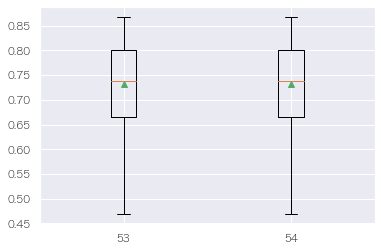

In [31]:
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

clf7 = CatBoostRegressor(learning_rate=1, depth=6, loss_function='RMSE')
clf7.fit(data, target)
#print reg_cv.best_params_, reg_cv.best_score_

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(53, 55):
        rfe = RFE(estimator=CatBoostRegressor(learning_rate=1, depth=6, loss_function='RMSE'), n_features_to_select=i)
        model = CatBoostRegressor(learning_rate=1, depth=6, loss_function='RMSE')
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, data, target, scoring='r2', cv=cv)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

0:	learn: 0.8436884	total: 1.29ms	remaining: 1.29s
1:	learn: 0.7488742	total: 2.6ms	remaining: 1.3s
2:	learn: 0.6691623	total: 4.86ms	remaining: 1.61s
3:	learn: 0.6014063	total: 6.51ms	remaining: 1.62s
4:	learn: 0.5788089	total: 7.97ms	remaining: 1.59s
5:	learn: 0.5368532	total: 9.21ms	remaining: 1.53s
6:	learn: 0.5086918	total: 10.5ms	remaining: 1.49s
7:	learn: 0.4886417	total: 11.7ms	remaining: 1.45s
8:	learn: 0.4597471	total: 12.8ms	remaining: 1.41s
9:	learn: 0.4306030	total: 14.9ms	remaining: 1.47s
10:	learn: 0.4154545	total: 16ms	remaining: 1.44s
11:	learn: 0.3999272	total: 17.2ms	remaining: 1.42s
12:	learn: 0.3877396	total: 18.4ms	remaining: 1.4s
13:	learn: 0.3609366	total: 19.6ms	remaining: 1.38s
14:	learn: 0.3406952	total: 21.1ms	remaining: 1.39s
15:	learn: 0.3322201	total: 22.2ms	remaining: 1.37s
16:	learn: 0.3211252	total: 23.5ms	remaining: 1.36s
17:	learn: 0.3104708	total: 24.5ms	remaining: 1.34s
18:	learn: 0.3018395	total: 25.6ms	remaining: 1.32s
19:	learn: 0.3014899	total:

190:	learn: 0.0226152	total: 177ms	remaining: 748ms
191:	learn: 0.0225591	total: 178ms	remaining: 749ms
192:	learn: 0.0224632	total: 179ms	remaining: 750ms
193:	learn: 0.0224418	total: 181ms	remaining: 750ms
194:	learn: 0.0224109	total: 182ms	remaining: 750ms
195:	learn: 0.0223915	total: 183ms	remaining: 750ms
196:	learn: 0.0223578	total: 184ms	remaining: 750ms
197:	learn: 0.0223311	total: 185ms	remaining: 751ms
198:	learn: 0.0222831	total: 187ms	remaining: 751ms
199:	learn: 0.0222426	total: 188ms	remaining: 751ms
200:	learn: 0.0222101	total: 189ms	remaining: 751ms
201:	learn: 0.0221888	total: 190ms	remaining: 751ms
202:	learn: 0.0221245	total: 192ms	remaining: 753ms
203:	learn: 0.0220818	total: 196ms	remaining: 765ms
204:	learn: 0.0220694	total: 198ms	remaining: 768ms
205:	learn: 0.0220401	total: 201ms	remaining: 775ms
206:	learn: 0.0220102	total: 202ms	remaining: 773ms
207:	learn: 0.0219947	total: 203ms	remaining: 771ms
208:	learn: 0.0219835	total: 204ms	remaining: 771ms
209:	learn: 

553:	learn: 0.0213100	total: 514ms	remaining: 413ms
554:	learn: 0.0213100	total: 515ms	remaining: 413ms
555:	learn: 0.0213100	total: 516ms	remaining: 412ms
556:	learn: 0.0213100	total: 517ms	remaining: 412ms
557:	learn: 0.0213100	total: 518ms	remaining: 411ms
558:	learn: 0.0213100	total: 520ms	remaining: 410ms
559:	learn: 0.0213100	total: 521ms	remaining: 409ms
560:	learn: 0.0213100	total: 522ms	remaining: 408ms
561:	learn: 0.0213100	total: 523ms	remaining: 408ms
562:	learn: 0.0213100	total: 524ms	remaining: 407ms
563:	learn: 0.0213100	total: 525ms	remaining: 406ms
564:	learn: 0.0213100	total: 526ms	remaining: 405ms
565:	learn: 0.0213100	total: 528ms	remaining: 405ms
566:	learn: 0.0213100	total: 529ms	remaining: 404ms
567:	learn: 0.0213100	total: 530ms	remaining: 403ms
568:	learn: 0.0213100	total: 531ms	remaining: 402ms
569:	learn: 0.0213100	total: 532ms	remaining: 402ms
570:	learn: 0.0213100	total: 534ms	remaining: 401ms
571:	learn: 0.0213100	total: 535ms	remaining: 400ms
572:	learn: 

741:	learn: 0.0213100	total: 690ms	remaining: 240ms
742:	learn: 0.0213100	total: 692ms	remaining: 239ms
743:	learn: 0.0213100	total: 693ms	remaining: 239ms
744:	learn: 0.0213100	total: 695ms	remaining: 238ms
745:	learn: 0.0213100	total: 696ms	remaining: 237ms
746:	learn: 0.0213100	total: 697ms	remaining: 236ms
747:	learn: 0.0213100	total: 699ms	remaining: 235ms
748:	learn: 0.0213100	total: 700ms	remaining: 235ms
749:	learn: 0.0213100	total: 701ms	remaining: 234ms
750:	learn: 0.0213100	total: 702ms	remaining: 233ms
751:	learn: 0.0213100	total: 703ms	remaining: 232ms
752:	learn: 0.0213100	total: 706ms	remaining: 231ms
753:	learn: 0.0213100	total: 707ms	remaining: 231ms
754:	learn: 0.0213100	total: 708ms	remaining: 230ms
755:	learn: 0.0213100	total: 709ms	remaining: 229ms
756:	learn: 0.0213100	total: 710ms	remaining: 228ms
757:	learn: 0.0213100	total: 710ms	remaining: 227ms
758:	learn: 0.0213100	total: 711ms	remaining: 226ms
759:	learn: 0.0213100	total: 712ms	remaining: 225ms
760:	learn: 

923:	learn: 0.0213100	total: 868ms	remaining: 71.4ms
924:	learn: 0.0213100	total: 870ms	remaining: 70.5ms
925:	learn: 0.0213100	total: 872ms	remaining: 69.7ms
926:	learn: 0.0213100	total: 873ms	remaining: 68.7ms
927:	learn: 0.0213100	total: 874ms	remaining: 67.8ms
928:	learn: 0.0213100	total: 875ms	remaining: 66.9ms
929:	learn: 0.0213100	total: 877ms	remaining: 66ms
930:	learn: 0.0213100	total: 878ms	remaining: 65.1ms
931:	learn: 0.0213100	total: 879ms	remaining: 64.1ms
932:	learn: 0.0213100	total: 880ms	remaining: 63.2ms
933:	learn: 0.0213100	total: 882ms	remaining: 62.3ms
934:	learn: 0.0213100	total: 883ms	remaining: 61.4ms
935:	learn: 0.0213100	total: 884ms	remaining: 60.5ms
936:	learn: 0.0213100	total: 886ms	remaining: 59.5ms
937:	learn: 0.0213100	total: 887ms	remaining: 58.7ms
938:	learn: 0.0213100	total: 889ms	remaining: 57.8ms
939:	learn: 0.0213100	total: 891ms	remaining: 56.9ms
940:	learn: 0.0213100	total: 892ms	remaining: 55.9ms
941:	learn: 0.0213100	total: 893ms	remaining: 55

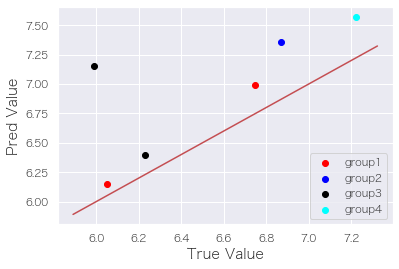

In [32]:
from sklearn.metrics import r2_score
 
import xgboost as xgb
clf7_r= CatBoostRegressor(learning_rate=1, depth=6, loss_function='RMSE')
clf7_r.fit(data,target)

predicted=clf7_r.predict(data0)

columns=['TV','log_price', 'log_interval',
       'log_distance', 'log_ranking', 'log_team_ranking', 'time_2',
       'team_Antlers', 'team_Ardija', 'team_Bellmare', 'team_Cerezo',
       'team_Consadole', 'team_F.C.Tokyo', 'team_Frontale', 'team_Gamba',
       'team_Grampus', 'team_Jubilo', 'team_Reds', 'team_Reysol',
       'team_S-Pulse', 'team_Sagan', 'team_Sanfrecce', 'team_Trinita',
       'team_V-Varen', 'team_Vegalta', 'team_Ventforet', 'team_Vissel',
       'team_YamagaFC', 'place_2', 'week_Sat', 'week_Sun', 'week_Tue',
       'week_Wed', 'DAZN_1', 'seat_2', 'seat_3', 'seat_4', 'seat_5',
       'seat_6', 'seat_7', 'seat_8', 'seat_10', 'seat_11',
       'seat_12', 'seat_13', 'seat_14', 'J1_1', 'region_east',
       'region_etc', 'region_west','before_j1_1', 'weather_rain',
       'weather_sunny']
test_data2=pd.DataFrame(data=data0,columns=columns)
#print(test_data2)

list1=[]
list2=[]
list3=[]
list4=[]
for i in range(len(test_data2)):
    s1=test_data2.columns.get_loc('seat_2')
    s2=test_data2.columns.get_loc('seat_14')
    test_data3=test_data2.values
    num=0
    for j in range(s1,s2+1,1):
        if test_data3[i][j]==1:
            num=j
    if num==0:
        num=s1-1
    num2=num-(s1-2)
    if(num2==1 or num2==2 or num2==3 or num==6): #group1
        list1.append([target0[i],predicted[i]])
    elif(num2==4 or num2==5 or num2==7 or num2==9 or num2==11): #group2
        list2.append([target0[i],predicted[i]])
    elif(num2==10 or num2==12 or num2==13): #group3
        list3.append([target0[i],predicted[i]])
    else:
        list4.append([target0[i],predicted[i]])

list1=np.array(list1)
list2=np.array(list2)
list3=np.array(list3)
list4=np.array(list4)
#print(len(list1),len(list2),len(list3),len(list4))
plt.scatter(list1[:,0],list1[:,1],c='red',label='group1')
plt.scatter(list2[:,0],list2[:,1],c='blue',label='group2')
plt.scatter(list3[:,0],list3[:,1],c='black',label='group3')
plt.scatter(list4[:,0],list4[:,1],c='cyan',label='group4')

#plt.scatter(test_target, predicted)

x = np.linspace(target0.min().min()-0.1,target0.max().max()+0.1, 2)
y = x
ax = plt.subplot(111)
ax.plot(x,y,'r-')
ax.set_xlabel('True Value', fontsize=15)
ax.set_ylabel('Pred Value', fontsize=15)
ax.grid(True)
ax.legend(loc='under right')


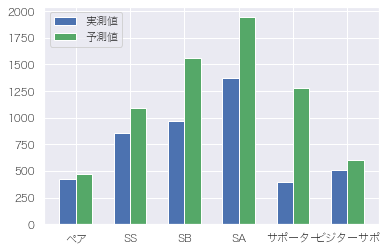

In [33]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Hiragino Sans'

x1 = [1,2,3,4,5,6]
y1 = np.exp(target0).flatten()

x2 = [1.3,2.3,3.3,4.3,5.3,6.3]
y2 = np.exp(predicted).flatten()

label_x = ['ペア','SS','SB','SA','サポーター','ビジターサポ']

# 1つ目の棒グラフ
plt.bar(x1, y1, color='b', width=0.3, label='実測値', align="center")

# 2つ目の棒グラフ
plt.bar(x2, y2, color='g', width=0.3, label='予測値', align="center")

# 凡例
plt.legend(loc=2)

# X軸の目盛りを置換
plt.xticks([1.15, 2.15, 3.15,4.15,5.15,6.15], label_x)
plt.show()

In [34]:
print(np.exp(predicted))
print(np.exp(target0))
#席種合計
print(sum(np.exp(predicted)))
print(sum(np.exp(target0)))

[ 470.59587897 1090.83342822 1562.59369065 1944.69494495 1280.35107891
  598.85503907]
[[ 423.9999999 ]
 [ 852.99999958]
 [ 964.99999967]
 [1371.99999961]
 [ 399.99999996]
 [ 509.00000023]]
6947.9240607836855
[4522.99999895]
